In [1]:
load("https://raw.githubusercontent.com/jephianlin/minrank_aux/master/load_all.py")

xrange test passed


In [2]:
load_all()

Loading Zq_c.pyx...


Compiling /home/sage/.sage/temp/Coleman/1391/tmp_E96Ess.pyx...


Loading Zq.py...
Loading zero_forcing_64.pyx...


Compiling /home/sage/.sage/temp/Coleman/1391/tmp_odPqNk.pyx...


Loading zero_forcing_wavefront.pyx...


Compiling /home/sage/.sage/temp/Coleman/1391/tmp_o0j2ws.pyx...


Loading minrank.py...
Loading inertia.py...
Loading general_Lib.sage...
---sshow, multi_sshow, tuple_generator, minimal_graphs, empty_array, all_one_matrix, elementary_matrix, eigens_multi, sort_dictionary, has_minor, etc.
Loading oc_diag_analysis.sage...
---gZ_leq, find_gZ, find_EZ, diagonal_analysis, etc.
Loading xi_dict.py...
---SAPreduced_matrix, has_SAP, find_ZFloor, Zsap, etc.
Loading mu_dict.py...
---get_mu_from_dict, find_mu, etc.
Loading SXP.sage...
This code contains extra copy of Z_game, Zell_game, Zplus_game, for the completeness of Zsap_game program.
Loading matrix_forcing.py...


In [3]:
def kForts(G,k):
# input the connected graph G
# ouput the set of forts of size k
    V = G.vertices()
    S = Subsets(V,k)
    Forts = set(S)
    for s in S:
        for x in set(V) - set(s):
            if len(list((set(G.neighbors(x)) & set(s))))==1:
                Forts.remove(s)
                break
    print k,'   ',len(Forts)          
        
    return list(Forts);
                    

In [4]:
def kFortsGraphs(G,k):
# input the connected graph G
# ouput the set of forts of size k
    V = G.vertices()
    S = Subsets(V,k)
    Forts = set(S)
    for s in S:
        for x in set(V) - set(s):
            if len(list((set(G.neighbors(x)) & set(s))))==1:
                Forts.remove(s)
                break
    for f in Forts:
        G.graphplot(vertex_colors={'#FFD966': f, '#A3BCD2': list(set(G.vertices()).difference(set(f)))}).show()         
        
    return list(Forts);

In [5]:
def All_Forts(G):
# input the connected graph G
# ouput the set of forts of g
    V = G.vertices()
    S = Subsets(V)
    Forts = set(S)
    for s in S:
        for x in set(V) - set(s):
            if len(list((set(G.neighbors(x)) & set(s))))==1:
                Forts.remove(s)
                break
        if len(list(s))==0:
            Forts.remove(s)
    return list(Forts);   

In [6]:
def Minimal_Forts(G):
# input the connected graph G
# ouput the set of minimal forts of g
    V = G.vertices()
    S = Subsets(V)
    Forts = set(S)
    for s in S:
        for x in set(V) - set(s):
            if len(list((set(G.neighbors(x)) & set(s))))==1:
                Forts.remove(s)
                break
        if len(list(s))==0:
            Forts.remove(s)
    #print 'Forts', Forts         

    NotMinimal=[]
    for t in Forts:
        for s in Forts:
            if len(list(t))>len(list(s)):
                if s.issubset(t)==True:
                    NotMinimal.append(t)
                    break
    #print 'Non-minimal forts', NotMinimal
    Minimal = Forts.difference(set(NotMinimal))
    return list(Minimal);

In [7]:
def flatten(l):
  out = []
  for item in l:
    if isinstance(item, (list, tuple)):
      out.extend(flatten(item))
    else:
      out.append(item)
  return out

In [8]:
def Col_Supp_Lifts(A):
    
    print 'rank = ', A.rank(), '\n'
    #print A, '\n'
    #n number of rows/columns in A
    n=len(list(A))
    
    #constructing the graph for A
    print 'G(A) = '
    G=Graph([])
    G.add_vertices(range(n))
    for i in range(0,n):
        for j in range(i+1,n):
            if A[i][j] != 0:
                G.add_edge((i,j))
    G.show()
    
    #print '===========================================================', '\n', 'Minimal support lifts for A ', '\n'

    #requires sage matroid package, sage.matroids.advanced import *
    kerA=Matrix(A.kernel().basis())

    #Computing matroid data for the null space of the null space

    M=Matroid(kerA)
    # The list of circuits for ker(A).  This should be the minimal supports of the column space.
    CM=sorted([sorted(C) for C in M.circuits()])
    #print CM

#     for i in range(len(CM)):
#         H=deepcopy(G)
#         H.add_vertex(n)
#         for j in range(len(CM[i])):
#             H.add_edges([(n,CM[i][j])])
        #H.show()
        #print H.graph6_string(), ' with neighbors of  ', n, CM[i]
        
    #Construct all unions of supports in CM
    N=[i for i in range(len(CM))]
    S=[list(s) for s in subsets(N)]
    print 'number of unions of column supports = ', len(S)

    # m=3500
    # print S[m], '\n'
    # U=[CM[k] for k in S[m]]
    # print list(set(flatten(U)))

    L=[]


    for j in range(len(S)):
         for k in range(len(S[j])):
            U=[CM[k] for k in S[j]]
            fU=list( set( flatten(U)))
            H=deepcopy(G)
            H.add_vertex(7)
            for i in range(len(fU)):
                H.add_edges([(7,fU[i])])
            #H.show()
            #print H.graph6_string()
            L.append(H.graph6_string())
    #Gets rid of duplicates in L
    L_new = list(set(L))

    m=len(L_new)
    L_new_remove=[]
    for i in range(m):
        for j in range(i+1,m):
            if Graph(L_new[i]).is_isomorphic(Graph(L_new[j])):
                L_new_remove.append(L_new[j])
    print 'number of unique unions = ', len(L_new)
    L_new_new = list( set(L_new).difference( set(L_new_remove)) )
    print 'number of non-isomorphic lifting graphs = ', len( L_new_new )
    #print list( L_new_new )
    
    return L_new_new;

In [9]:
def transversal_number(family):
    for i in range(n):
        Sub=Subsets(range(n),i)
        for s in Sub:
            if(not(any(s.intersection(G).is_empty() for G in family))):
                return(i)

def is_compatible(family):
    compatible=true
    for A in family:
        for G in family:
            if A !=G:
                for x in A.intersection(G):
                    if(not(any(H.issubset(A.union(G).difference({x})) for H in family))):
                        #print A, G
                        compatible=false
    return(compatible)

def is_precompatible(family,minfamily):
    compatible=true
    for A in family:
        for G in family:
            if A !=G:
                for x in A.intersection(G):
                    if(not(any(H.issubset(A.union(G).difference({x})) for H in minfamily))):
                         compatible=false
    return(compatible)

def is_precompatible_with(collection,newelement,family):
    compatible=true
    for G in collection:
        for x in newelement.intersection(G):
            if(not(any(H.issubset(A.union(G).difference({x})) for H in family))):
                compatible=false
    return(compatible)



In [10]:
#input: list of Sets, U
#output: list of Sets that are unions minus one element of pairs of Sets in U in the intersection per circuit exchange property
def ExchangeUnions(U):
    lenU=len(U)
    NewUnions=[]

    for j1 in range(lenU):
        for j2 in range(j1+1,lenU):
            #print j1,j2
            union=U[j1].union(U[j2])
            inter=U[j1].intersection(U[j2])

            if len(inter)>0:
                for x in inter:
                    NewUnions.append(union.difference({x}))
                    #print union.difference({x})

    NewUnionsSet=list(set(NewUnions)) 
    
    return(NewUnionsSet)

#input: list of Sets, U
#output: list of Sets that are unions minus one element of pairs of Sets in U in the intersection per circuit exchange property
def ExchangeUnionsIndices(U,A):
    NewUnionsIndices=[]
    
    EU=ExchangeUnions(U)
    lenEU=len(EU)
    
    for i in range(lenEU):
        Indices=[]
        for a in A:
            if a.issubset(EU[i]):
                Indices.append(A.index(a))
        NewUnionsIndices.append(Indices)
    

    
    
    return(NewUnionsIndices)



#input: list of Sets, F
#output: list of pairs of indices of Sets in F for which the exchange property for circuits fundamentally fails on the input

def BadPairs(F):

    n=len(F)
    BadPairs=[]
    
    for i in range(n):
        for j in range(i+1,n):
            union=F[i].union(F[j])
            inter=F[i].intersection(F[j])

            #for i in range(m):
            if len(inter)>0:
                for x in inter:
                    N=union.difference({x})
                    #print i,j,N, F[i], F[j]
                    for f in F:
                        if (not( any( f.issubset(N) for f in F) ) ):
                            BadPairs.append(Set([i,j]))
                            #print 'bad pair'
                            #print i,j, N, F[i],F[j]
                            break;


    return(BadPairs) 




#input: size of transversal 4, list of Sets F
#output:  list of indices for F with unique representatives of a minimum transversal of size 4 
def GoodIndices4(F):
    m=len(F)
    UniqFortRepIndex=Subsets(range(m),4)
    lenUFRI=len(UniqFortRepIndex)
    
    
    GoodIndices=[]
    

    for i in range(lenUFRI):
        U=[F[k] for k in UniqFortRepIndex[i]]
        #print U
        uniq=[]
        #if U[0] in U[1].union(U[2]).union(U[3])
        for x0 in U[0]:
            if not(x0 in U[1].union(U[2]).union(U[3])):
                uniq.append(x0)
                for x1 in U[1]:
                    if not(x1 in U[0].union(U[2]).union(U[3])):
                        uniq.append(x1)
                        for x2 in U[2]:
                            if not(x2 in U[0].union(U[1]).union(U[3])):
                                uniq.append(x2)
                                for x3 in U[3]:
                                    if not(x3 in U[0].union(U[1]).union(U[2])):
                                        uniq.append(x3)
                                        if len(list(set(uniq)))==4:
                                            print i
                                            GoodIndices.append(i)
      
    return(GoodIndices) 

def GoodIndices3(F):
    m=len(F)
    UniqFortRepIndex=Subsets(range(m),3)
    lenUFRI=len(UniqFortRepIndex)
    
    
    GoodIndices=[]
    

    for i in range(lenUFRI):
        U=[F[k] for k in UniqFortRepIndex[i]]
        #print U
        uniq=[]
        #if U[0] in U[1].union(U[2]).union(U[3])
        for x0 in U[0]:
            if not(x0 in U[1].union(U[2])):
                uniq.append(x0)
                for x1 in U[1]:
                    if not(x1 in U[0].union(U[2])):
                        uniq.append(x1)
                        for x2 in U[2]:
                            if not(x2 in U[0].union(U[1])):
                                uniq.append(x2)
                                if len(list(set(uniq)))==3:
                                    GoodIndices.append(i)
      
    return(GoodIndices) 






In [11]:
#input: list of sets F, all forts being considered, integer index, t size of transversal (n-rank)
def List_PC(index,F,t):
    m=len(F345)
    UFRI=Subsets(range(m),t)
    
    U=[F[k] for k in UFRI[index]]
    
    return(U)


#input: list of sets U, list of sets F that contains the list U
#output: a new list that contains U and any other sets from F guaranteed by exchange condition on circuits
def ReqForts(U,F):
    
    NUS=ExchangeUnions(U)
    m=len(NUS)
    NewU=copy(U)
    
    for j in range(m):
        if (not( any( u.issubset(NUS[j]) for u in U) ) ):
            #print j,NewUnionsSet[j],'\n','------------------'
            Y=NUS[j]
            if (not ( any(f.issubset(Y) for f in F) ) ):
                print Y,'incompatible'

            PossSubs=[]
            for f in F:
                if f.issubset(Y):
                    PossSubs.append(f)
                #print PossSubs
            if len(PossSubs)==1:
                NewU.append(PossSubs[0])

    return(NewU)


In [12]:
from sage.matroids.advanced import *
#from sage.matroids.advanced import setprint

In [13]:
from sage.graphs.connectivity import connected_components
from sage.graphs.connectivity import connected_components_sizes

In [14]:
from sage.graphs.graph_input import from_graph6
from sage.matrix.args import MatrixArgs

In [15]:
import scipy.special

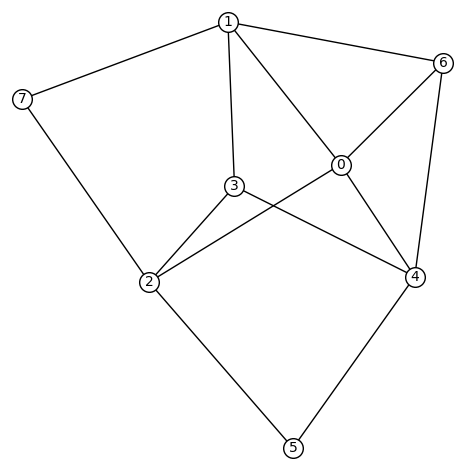

In [16]:
G1=Graph({1:[3],2:[4],3:[4,5,7],4:[6,7],5:[7],6:[7],7:[8]})
G=Graph({0:[1,2,4,6],1:[3,6,7],2:[3,5,7],3:[4],4:[5,6]})
# G3=Graph({0:[1,2,4,6],1:[2,3,6,7],2:[3,5,7],3:[4],4:[5,6]})
# G4=Graph({0:[1,2,4,6],1:[4,3,6,7],2:[3,5,7],3:[4],4:[5,6]})
# G5=Graph({0:[1,2,4,6],1:[2,3,6,7],2:[4,3,5,7],3:[4],4:[5,6]})
# G6=Graph({0:[1,2,4,6],1:[2,4,3,6,7],2:[3,5,7],3:[4],4:[5,6]})
# G7=Graph({0:[1,2,4,6],1:[2,4,3,6,7],2:[3,4,5,7],3:[4],4:[5,6]})
G.plot(vertex_color='white').show()

In [17]:
#A1=All_Forts(G)
A2=All_Forts(G)
# A3=All_Forts(G3)
# A4=All_Forts(G4)
# A5=All_Forts(G5)
# A6=All_Forts(G6)
# A7=All_Forts(G7)
print A2

[{0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 3, 5, 7}, {0, 3, 5, 6, 7}, {0, 1, 2, 4, 5, 6}, {0, 1, 2, 4, 6, 7}, {1, 3, 4, 5, 7}, {0, 1, 2, 3, 4, 5, 6, 7}, {0, 2, 3, 5, 6, 7}, {0, 5, 6, 7}, {0, 1, 2, 3, 4, 5, 6}, {1, 4, 5, 6, 7}, {3, 5, 7}, {0, 1, 2, 5}, {0, 2, 3, 4, 7}, {0, 1, 2, 3, 5, 6, 7}, {1, 2, 3, 5, 6, 7}, {0, 2, 4, 5, 6, 7}, {0, 1, 2, 4, 6}, {0, 3, 4, 5, 6, 7}, {0, 1, 2, 4, 7}, {0, 2, 4, 7}, {0, 3, 4, 5, 7}, {3, 4, 5, 6}, {0, 1, 3, 4, 5, 6, 7}, {1, 2, 4, 5, 6}, {0, 2, 3, 4, 5, 6, 7}, {0, 1, 2, 4}, {0, 1, 4, 5, 7}, {1, 2, 3, 4, 5}, {0, 1, 2, 3, 5, 7}, {0, 3, 4, 5}, {0, 1, 2, 4, 5, 6, 7}, {2, 3, 5, 6, 7}, {0, 1, 4, 5, 6, 7}, {0, 2, 3, 4, 5, 7}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {1, 3, 4, 5, 6, 7}, {1, 3, 6, 7}, {0, 3, 4, 5, 6}, {2, 4, 5, 6, 7}, {1, 2, 4, 5, 7}, {3, 4, 5, 6, 7}, {1, 2, 3, 4, 6, 7}, {0, 1, 2, 3, 4, 6, 7}, {1, 2, 4, 5}, {0, 1, 2, 3, 4, 6}, {2, 3, 4, 6, 7}, {0, 1, 2, 3, 4, 5}, {1, 2, 5, 6}, {1, 2, 4, 5, 6, 7}, {1, 3, 5, 6, 7}, {0, 5, 6}, {1, 2, 4, 6}, {0, 6, 7}, {0, 1, 2, 5

In [294]:
GoodIndices4(A2)

[1813,
 2725,
 3296,
 3303,
 50404,
 63416,
 67453,
 80727,
 81003,
 81315,
 93814,
 94391,
 99265,
 99295,
 100544,
 100546,
 101649,
 101710,
 121061,
 121068,
 121097,
 121098,
 122148,
 123393,
 129809,
 129811,
 130229,
 130231,
 130686,
 130690,
 130702,
 130711,
 130721,
 130919,
 131081,
 131235,
 131244,
 131254,
 131333,
 131334,
 131394,
 131395,
 149929,
 151945,
 162583,
 162682,
 162753,
 164288,
 164349,
 184300,
 184399,
 187319,
 187326,
 188733,
 188904,
 188911,
 189633,
 189831,
 189949,
 213021,
 213051,
 224666,
 224668,
 224814,
 224831,
 224838,
 225771,
 225832,
 259935,
 260615,
 260811,
 335302,
 335315,
 351317,
 351500,
 554590,
 554594,
 554615,
 554625,
 581639,
 581763,
 581782,
 581784,
 605674,
 605711,
 605819,
 605829,
 773079,
 773083,
 773092,
 773127,
 773820,
 773864,
 774581,
 774594,
 774685,
 774767,
 774894,
 775127,
 775763,
 775770,
 775799,
 775800,
 776310,
 776340,
 776759,
 777211,
 777228,
 777255,
 777402,
 777410,
 777761,
 777788,
 

In [19]:
GI4=[1813, 2725, 3296, 3303, 50404, 63416, 67453, 80727, 81003, 81315, 93814, 94391, 99265, 99295, 100544, 100546, 101649, 101710, 121061, 121068, 121097, 121098, 122148, 123393, 129809, 129811, 130229, 130231, 130686, 130690, 130702, 130711, 130721, 130919, 131081, 131235, 131244, 131254, 131333, 131334, 131394, 131395, 149929, 151945, 162583, 162682, 162753, 164288, 164349, 184300, 184399, 187319, 187326, 188733, 188904, 188911, 189633, 189831, 189949, 213021, 213051, 224666, 224668, 224814, 224831, 224838, 225771, 225832, 259935, 260615, 260811, 335302, 335315, 351317, 351500, 554590, 554594, 554615, 554625, 581639, 581763, 581782, 581784, 605674, 605711, 605819, 605829, 773079, 773083, 773092, 773127, 773820, 773864, 774581, 774594, 774685, 774767, 774894, 775127, 775763, 775770, 775799, 775800, 776310, 776340, 776759, 777211, 777228, 777255, 777402, 777410, 777761, 777788, 777978, 778032, 779334, 780579, 796905, 796935, 797265, 797457, 799244, 800463, 801387, 801400, 801786, 802408, 809860, 815370, 817307, 817351, 817402, 817498, 817585, 817884, 822221, 822728, 824777, 826447, 828748, 833479, 909093, 909097, 909118, 909128, 909572, 909574, 909754, 909756, 910105, 910107, 910236, 910297, 933306, 934130, 934132, 934335, 934481, 934581, 934594, 934612, 934673, 954565, 954567, 955072, 955074, 957121, 957123, 957253, 957295, 957297, 957305, 957313, 958791, 958793, 960952, 961013, 965823, 965825, 973436, 973438, 973856, 973858, 973909, 973939, 974004, 974021, 974028, 974313, 974317, 974329, 974338, 974348, 974546, 974708, 974738, 974862, 974869, 974871, 974881, 974960, 974961, 975021, 975022, 975289, 975326, 977283, 977285, 977293, 977295, 977525, 977660, 977779, 977816, 977924, 977931, 977941, 991832, 991834, 992471, 992475, 992487, 992496, 992506, 992557, 992719, 992774, 992776, 992784, 992786, 992937, 992998, 993016, 993109, 993151, 993270, 993307, 993415, 993422, 993432, 995710, 995834, 995853, 995855, 996093, 996123, 996677, 996684, 996803, 996999, 1005340, 1005401, 1006790, 1007228, 1009125, 1009805, 1010001, 1016850, 1016852, 1017305, 1017332, 1017366, 1017393, 1019248, 1019253, 1019276, 1019509, 1019644, 1019745, 1019782, 1019890, 1019900, 1019943, 1020949, 1021111, 1021253, 1021255, 1021357, 1021418, 1021475, 1021484, 1021494, 1022405, 1025371, 1025607, 1025809, 1028056, 1028083, 1028117, 1028144, 1028370, 1028390, 1029759, 1029813, 1030659, 1030713, 1031497, 1031695, 1031820, 1033808, 1033997, 1044759, 1044775, 1044823, 1044839, 1046399, 1046661, 1046827, 1050599, 1050615, 1050640, 1051637, 1052615, 1052631, 1052656, 1058961, 1058977, 1058996, 1059411, 1059621, 1060173, 1060346, 1063448, 1063464, 1063599, 1064041, 1064999, 1065060, 1066106, 1066110, 1066422, 1066441, 1066552, 1066571, 1068775, 1069436, 1069437, 1069455, 1069651, 1076722, 1076998, 1077310, 1081808, 1081938, 1087848, 1088021, 1089444, 1089809, 1089898, 1090071, 1090237, 1090344, 1090386, 1090542, 1090660, 1092265, 1092302, 1092424, 1107776, 1107846, 1107861, 1111764, 1111899, 1112170, 1119607, 1120600, 1120670, 1120685, 1126671, 1126795, 1126797, 1126806, 1126811, 1127077, 1147463, 1147473, 1148475, 1148490, 1148530, 1148615, 1312633, 1312649, 1313193, 1313335, 1314649, 1314665, 1314889, 1315209, 1315351, 1322648, 1322656, 1322664, 1322702, 1322710, 1322718, 1347729, 1347737, 1347745, 1347783, 1347791, 1347799, 1347903, 1350069, 1350323, 1350331, 1350339, 1350377, 1350385, 1350393, 1351654, 1351799, 1351814, 1355871, 1356877, 1416810, 1433688, 1433698, 1433967, 1433983, 1434043, 1434128, 1436890, 1436900, 1436906, 1437169, 1437185, 1437245, 1437330, 1441648, 1441658, 1441818, 1441960, 1442094, 1443383, 1443399, 1443459, 1443544, 1446839, 1446841, 1447944, 1448005, 1448023, 1448158, 1448429, 1455859, 1455866, 1456801, 1457455, 1457457, 1458474, 1462601, 1462851, 1462860, 1462867, 1462912, 1462930, 1463054, 1463056, 1463065, 1463070, 1463336, 1474237, 1474250, 1474252, 1474260, 1475352, 1475362, 1475631, 1475647, 1475707, 1475792, 1478554, 1478564, 1478570, 1478833, 1478849, 1478909, 1478994, 1482728, 1482900, 1483312, 1483322, 1483482, 1483624, 1483758, 1485047, 1485063, 1485123, 1485208, 1498105, 1498166, 1522524, 1523424, 1530511, 1530966, 1530993, 1536531, 1540137, 1540534, 1540536, 1542387, 1542398, 1542400, 1542428, 1542542, 1542544, 1542549, 1542572, 1542982, 1542989, 1543049, 1543051, 1543056, 1543079, 1543108, 1543304, 1546215, 1546245, 1546657, 1546752, 1549833, 1549838, 1549861, 1549902, 1549909, 1550028, 1550039, 1550094, 1550209, 1550211, 1550212, 1550224, 1550229, 1550528, 1551692, 1551838, 1551938, 1551942, 1551951, 1552003, 1556047, 1556074, 1557449, 1557619, 1557621, 1557622, 1558604, 1558611, 1558641, 1558668, 1559752, 1559948, 1560257, 1560284, 1560380, 1560398, 1560596, 1560914, 1561298, 1563219, 1563256, 1563273, 1603480, 1603496, 1603515, 1604140, 1604692, 1604857, 1604865, 1604873, 1604911, 1604919, 1604927, 1607285, 1607837, 1608136, 1618122, 1623377, 1632793, 1634716, 1668561, 1669580, 1670626, 1670630, 1670942, 1670961, 1671072, 1671089, 1671091, 1671418, 1671420, 1673956, 1673957, 1674171, 1686328, 1686458, 1686468, 1686737, 1686753, 1686813, 1686898, 1689660, 1689670, 1689672, 1689939, 1689947, 1689955, 1689993, 1689999, 1690001, 1690009, 1690015, 1690100, 1692279, 1692368, 1692533, 1692541, 1692549, 1692587, 1692595, 1692603, 1693864, 1694009, 1694024, 1694418, 1694428, 1694591, 1694864, 1696153, 1696169, 1696229, 1696314, 1696804, 1702967, 1703216, 1703226, 1703233, 1703277, 1724322, 1724440, 1743317, 1743447, 1749357, 1749656, 1751407, 1751706, 1751720, 1751737, 1755535, 1755552, 1788699, 1797640, 1797641, 1801938, 1801947, 1801954, 1801974, 1801981, 1802163, 1802838, 1804804, 1804823, 1804841, 1804963, 1833328, 1833511, 1834555, 1834557, 1835037, 1835098, 1836756, 1836758, 1836763, 1836786, 1836953, 1836958, 1836981, 1837214, 1837349, 1837648, 1838958, 1838960, 1840789, 1840791, 1840796, 1840819, 1845788, 1845849, 1913271, 1913299, 1913332, 1913341, 1913343, 1913351, 1913359, 1919334, 1922995, 1923056, 1923544, 1923856, 1948193, 1948198, 1948221, 1948454, 1948589, 1948888, 1953301, 1953329, 1953334, 1953362, 1953371, 1953373, 1953381, 1953389, 1953504, 1953506, 1953507, 1955412, 1955569, 1955940, 1955942, 1955950, 1955958, 1957245, 1957282, 1957390, 1957400, 1957874, 1957911, 1957928, 1975800, 1975861, 1979538, 1979553, 1979580, 1979582, 1979590, 1979865, 1979898, 1979920, 1993398, 1995448, 2006313, 2007213, 2036610, 2036759, 2036776, 2040574, 2040591, 2065215, 2065276, 2066239, 2066816, 2068068, 2069991, 2082639, 2082784, 2082799, 2083216, 2085126, 2085141, 2088963, 2090886, 2091892, 2093062, 2093180, 2109584, 2109773, 2109895]


In [307]:
scipy.special.binom(86,5)

34826302.0

In [20]:
m=len(A2)
UniqFortRepIndex=Subsets(range(m),4)
LenG=len(GI4)
CliqGI4=[]

for i in range(LenG):
    index=GI4[i]
    #print UniqFortRepIndex[index]
    g=FortGPmin.subgraph(UniqFortRepIndex[index])
    if FortGPmin.is_clique(g):
        print i, UniqFortRepIndex[index]
        CliqGI4.append(i)

NameError: name 'FortGPmin' is not defined

In [34]:
print CliqGI4

[0, 1, 2, 3, 5, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 37, 38, 40, 42, 44, 45, 46, 47, 48, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 105, 106, 108, 109, 112, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 153, 154, 155, 156, 158, 159, 160, 162, 163, 164, 165, 167, 168, 169, 170, 171, 173, 174, 175, 178, 182, 184, 188, 192, 202, 204, 206, 207, 208, 209, 212, 214, 217, 219, 220, 226, 228, 250, 251, 252, 253, 257, 258, 260, 273, 274, 276, 280, 281, 282, 284, 285, 290, 299, 300, 301, 302, 303, 304, 307, 309, 310, 313, 315, 316, 317, 318, 319, 320, 327, 329, 332, 334, 338, 340, 351, 354, 355, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370,

In [37]:
CliqGI4indices=[0, 1, 2, 3, 5, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 37, 38, 40, 42, 44, 45, 46, 47, 48, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 105, 106, 108, 109, 112, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 153, 154, 155, 156, 158, 159, 160, 162, 163, 164, 165, 167, 168, 169, 170, 171, 173, 174, 175, 178, 182, 184, 188, 192, 202, 204, 206, 207, 208, 209, 212, 214, 217, 219, 220, 226, 228, 250, 251, 252, 253, 257, 258, 260, 273, 274, 276, 280, 281, 282, 284, 285, 290, 299, 300, 301, 302, 303, 304, 307, 309, 310, 313, 315, 316, 317, 318, 319, 320, 327, 329, 332, 334, 338, 340, 351, 354, 355, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 381, 382, 383, 385, 387, 388, 389, 391, 392, 393, 394, 398, 400, 403, 405, 406, 407, 408, 413, 414, 416, 417, 418, 419, 420, 426, 427, 429, 431, 432, 433, 434, 435, 436, 437, 439, 442, 443, 447, 450, 451, 453, 456, 458, 459, 460, 461, 463, 466, 467, 469, 476, 481, 483, 485, 487, 489, 490, 491, 492, 493, 494, 495, 496, 498, 500, 501, 502, 503, 504, 505, 506, 507, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 524, 525, 526, 528, 529, 530, 531, 532, 533, 534, 536, 537, 538, 539, 541, 542, 543, 544, 545, 547, 550, 551, 552, 555, 559, 561, 562, 563, 570, 572, 573, 574, 575, 576, 577, 578, 580, 581, 582, 584, 589, 591, 592, 593, 599, 600, 618, 620, 627, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 646, 648, 649, 650, 651, 653, 654, 655, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 670, 671, 672, 673, 674, 675, 676, 678, 679, 681, 682, 683, 684, 685, 688, 689, 690, 691, 692, 693, 695, 696, 697, 698, 699, 700, 701, 702, 704, 705, 709, 711, 712, 714, 716, 717, 718, 720, 723, 725, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 742, 747, 750, 753, 766, 767, 768]


In [ ]:
#FIX THIS!!!!

NewCliqGI4indices=copy(CliqGI4indices)

m=len(A2)
UniqFortRepIndex=Subsets(range(m),4)

NewFortGPmin=deepcopy(FortGPmin)

for i in range(len(CliqGI4indices)):
    index=CliqGI4indices[i]
    g=NewFortGPmin.subgraph(UniqFortRepIndex[index])
    g_copy=deepcopy(g)

    g_edges=g.edges()

    for edge in g_edges:
        list_edge=list(edge)
        label=g.edge_label(list_edge[0],list_edge[1])
        #print '---------------------'
        #print label
        len_label=len(label)
        for i in range(len_label):
            len_sublabel=len(label[i])
            for j in range(len_sublabel):
                UFRI=list(UniqFortRepIndex[index])
                #print UFRI
                new_vertex=label[i][j]
                #print new_vertex
                UFRI_add=copy(UFRI)
                UFRI_add.append(new_vertex)
                #print UFRI_add
                g_add=NewFortGPmin.subgraph(UFRI_add)
                g_add_copy=deepcopy(g_add)
                #g_add.show()
                if g_add.is_clique()==False:
                    g_copy_edge_label=g_copy.edge_label(list_edge[0],list_edge[1])[i]
                    #print new_vertex, g_edge_label
                    #print 

                    if new_vertex in g_copy_edge_label:
                        g_copy_edge_label.remove(new_vertex)
                    if ((len(g_copy_edge_label)==0) and (i in NewCliqGI4indices)):
                        NewCliqGI4indices.remove(i)
                        break;


                    
                
                
            




In [99]:
print CliqGI4indices
print NewCliqGI4indices

[5,
 7,
 8,
 9,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 37,
 38,
 40,
 42,
 44,
 45,
 46,
 47,
 48,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 62,
 63,
 65,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 103,
 105,
 106,
 108,
 109,
 112,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 150,
 151,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 162,
 163,
 164,
 165,
 167,
 168,
 169,
 170,
 171,
 173,
 174,
 175,
 178,
 182,
 184,
 188,
 192,
 202,
 204,
 206,
 207,
 208,
 209,
 212,
 214,
 217,
 219,
 220,
 226,
 228,
 250,
 251,
 252,
 253,
 257,
 258,
 260,
 273,
 274,
 276,
 280,
 281,
 282,
 284,
 285,
 290,
 299,
 300,
 301,
 302,
 303,
 3

---------------------
[[9, 53, 55], [9, 53, 55], [55], [37, 50]]
[0, 1, 2, 3]
9
[0, 1, 2, 3, 9]


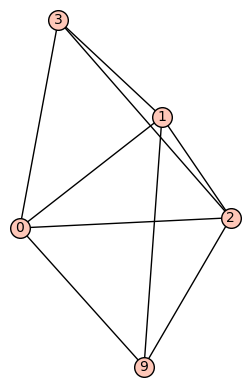

9 [53]

[0, 1, 2, 3]
53
[0, 1, 2, 3, 53]


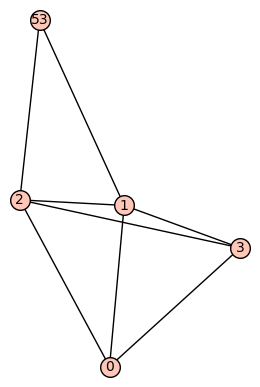

53 [53]

[0, 1, 2, 3]
55
[0, 1, 2, 3, 55]


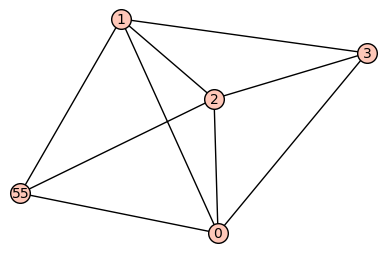

55 [53]

[0, 1, 2, 3]
9
[0, 1, 2, 3, 9]


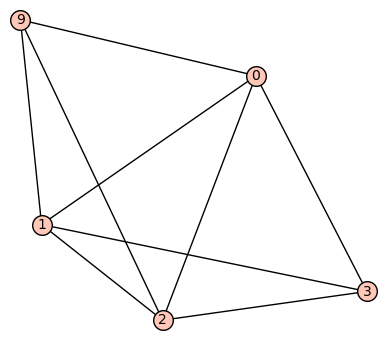

9 [53]

[0, 1, 2, 3]
53
[0, 1, 2, 3, 53]


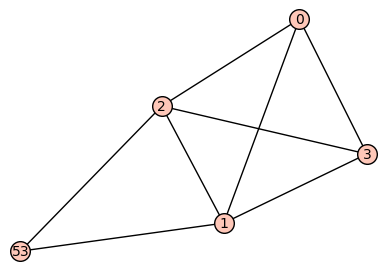

53 [53]

[0, 1, 2, 3]
55
[0, 1, 2, 3, 55]


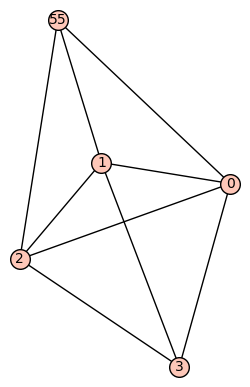

55 [53]

[0, 1, 2, 3]
55
[0, 1, 2, 3, 55]


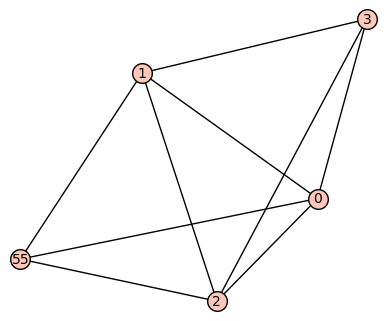

55 [53]

[0, 1, 2, 3]
37
[0, 1, 2, 3, 37]


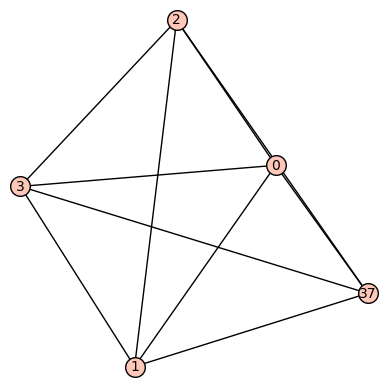

[0, 1, 2, 3]
50
[0, 1, 2, 3, 50]


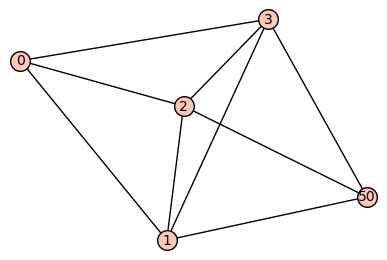

50 [53]

---------------------
[[39, 55, 60, 73, 76, 83], [12, 16, 33, 37, 39, 50, 52, 80], [3, 8, 9, 12, 33, 36, 53, 55, 60, 83]]
[0, 1, 2, 3]
39
[0, 1, 2, 3, 39]


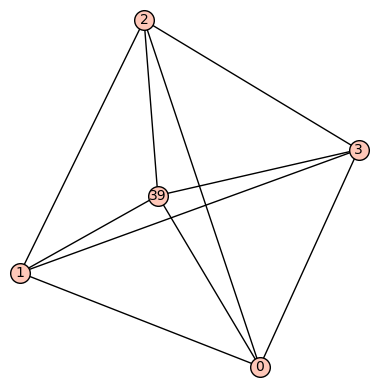

[0, 1, 2, 3]
55
[0, 1, 2, 3, 55]


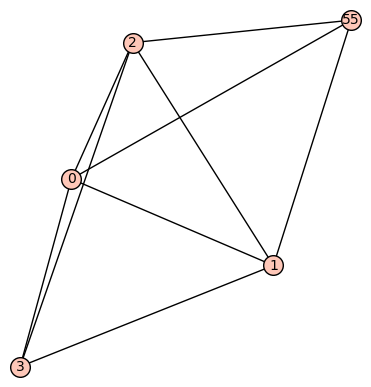

55 [53]

[0, 1, 2, 3]
60
[0, 1, 2, 3, 60]


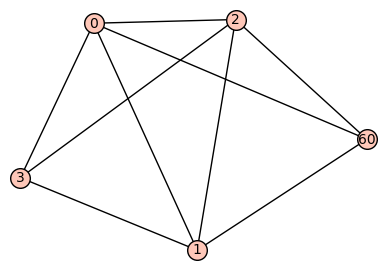

60 [53]

[0, 1, 2, 3]
73
[0, 1, 2, 3, 73]


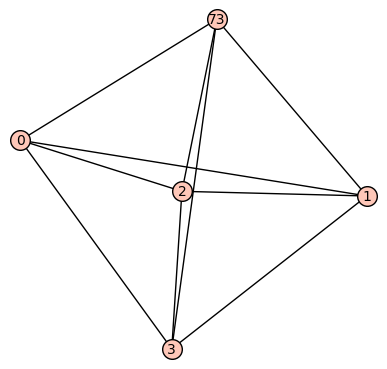

[0, 1, 2, 3]
76
[0, 1, 2, 3, 76]


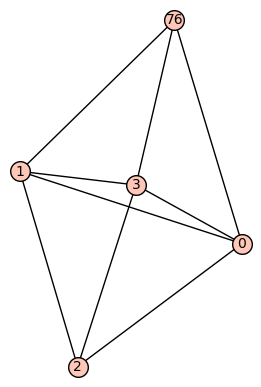

76 [53]

[0, 1, 2, 3]
83
[0, 1, 2, 3, 83]


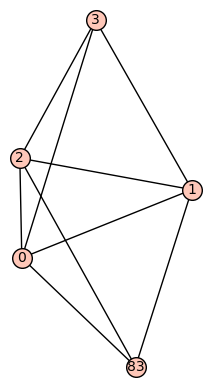

83 [53]

[0, 1, 2, 3]
12
[0, 1, 2, 3, 12]


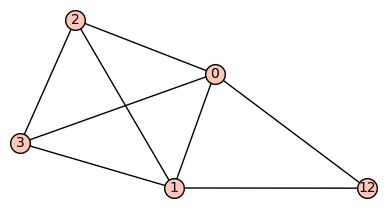

12 [53]

[0, 1, 2, 3]
16
[0, 1, 2, 3, 16]


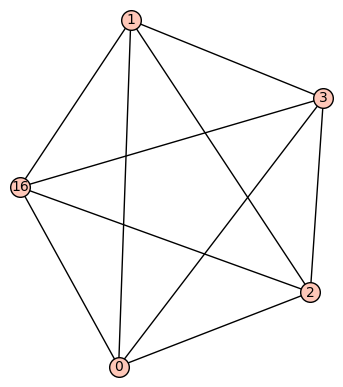

[0, 1, 2, 3]
33
[0, 1, 2, 3, 33]


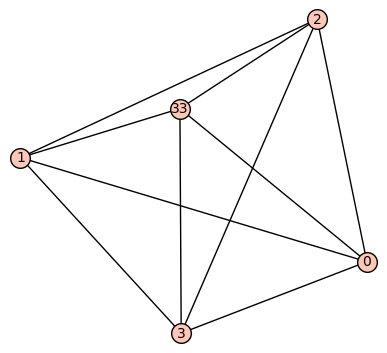

[0, 1, 2, 3]
37
[0, 1, 2, 3, 37]


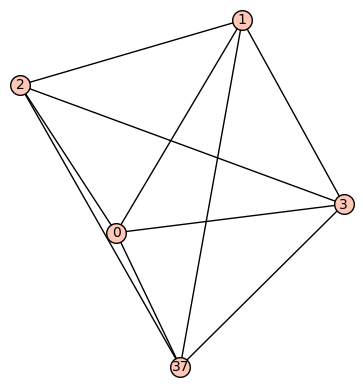

[0, 1, 2, 3]
39
[0, 1, 2, 3, 39]


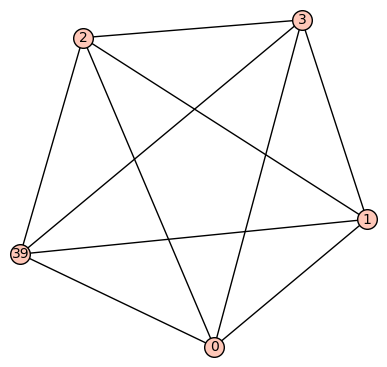

[0, 1, 2, 3]
50
[0, 1, 2, 3, 50]


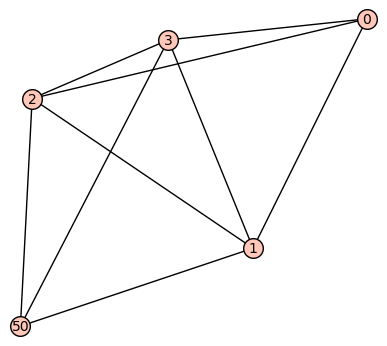

50 [53]

[0, 1, 2, 3]
52
[0, 1, 2, 3, 52]


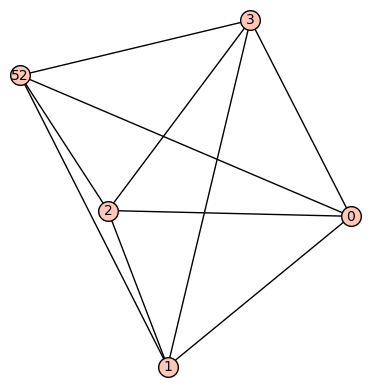

[0, 1, 2, 3]
80
[0, 1, 2, 3, 80]


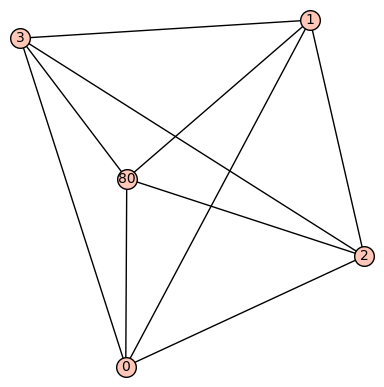

[0, 1, 2, 3]
3
[0, 1, 2, 3, 3]


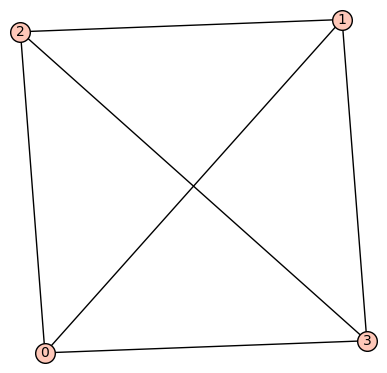

[0, 1, 2, 3]
8
[0, 1, 2, 3, 8]


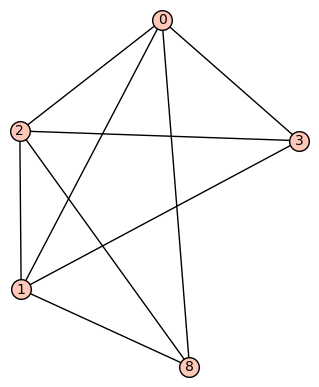

8 [53]

[0, 1, 2, 3]
9
[0, 1, 2, 3, 9]


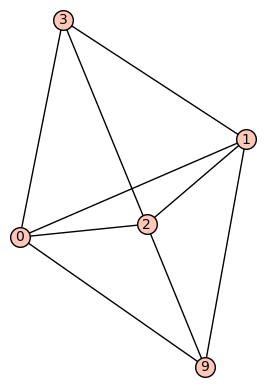

9 [53]

[0, 1, 2, 3]
12
[0, 1, 2, 3, 12]


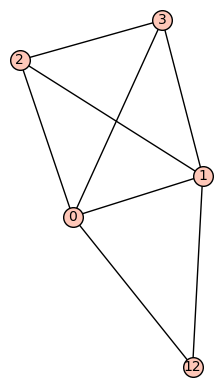

12 [53]

[0, 1, 2, 3]
33
[0, 1, 2, 3, 33]


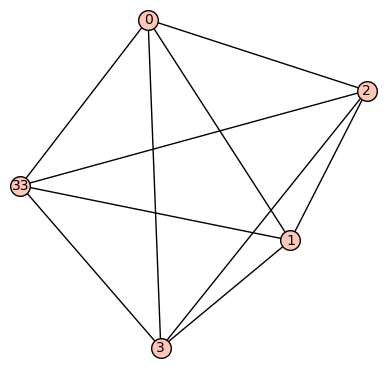

[0, 1, 2, 3]
36
[0, 1, 2, 3, 36]


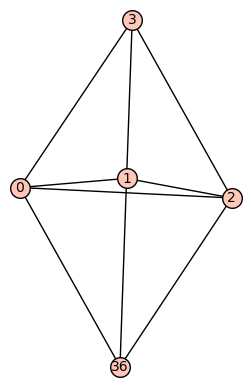

36 [53]

[0, 1, 2, 3]
53
[0, 1, 2, 3, 53]


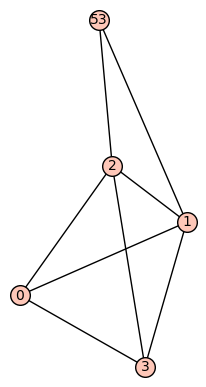

53 [53]

[0, 1, 2, 3]
55
[0, 1, 2, 3, 55]


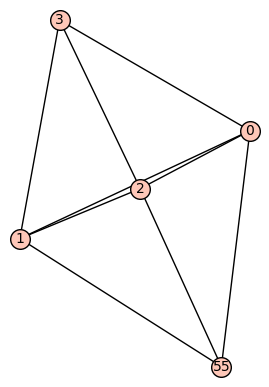

55 [53]

[0, 1, 2, 3]
60
[0, 1, 2, 3, 60]


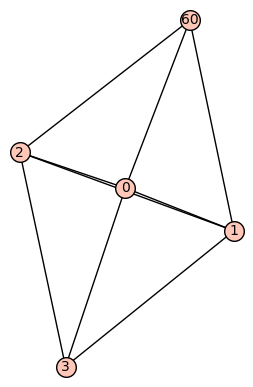

60 [53]

[0, 1, 2, 3]
83
[0, 1, 2, 3, 83]


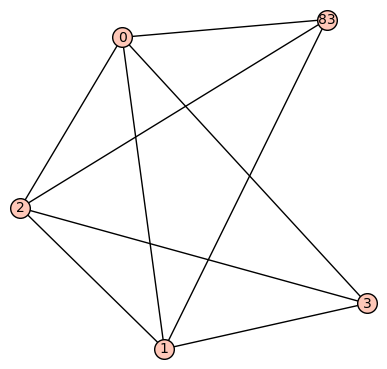

83 [53]

---------------------
[[1, 2, 12, 13, 30, 66, 76], [39, 55, 60, 73, 76, 83], [12, 16, 33, 37, 39, 50, 52, 80]]
[0, 1, 2, 3]
1
[0, 1, 2, 3, 1]


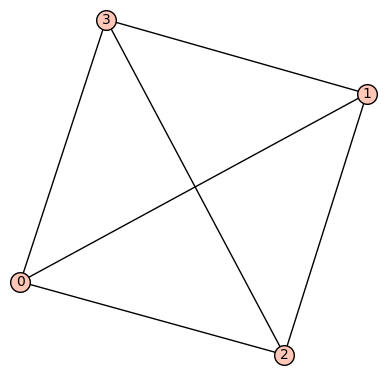

[0, 1, 2, 3]
2
[0, 1, 2, 3, 2]


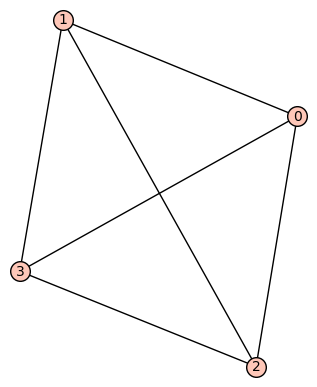

[0, 1, 2, 3]
12
[0, 1, 2, 3, 12]


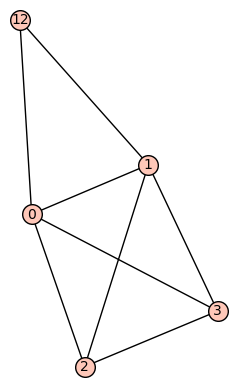

12 [53]

[0, 1, 2, 3]
13
[0, 1, 2, 3, 13]


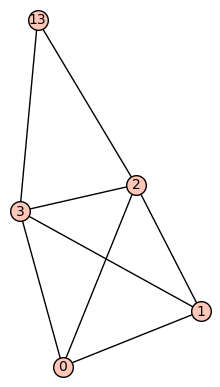

13 [53]

[0, 1, 2, 3]
30
[0, 1, 2, 3, 30]


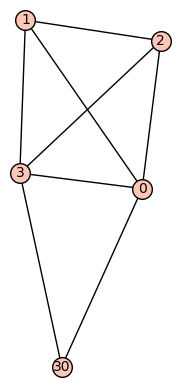

30 [53]

[0, 1, 2, 3]
66
[0, 1, 2, 3, 66]


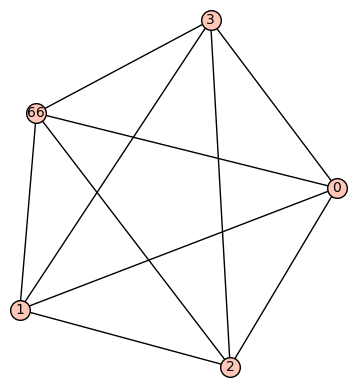

[0, 1, 2, 3]
76
[0, 1, 2, 3, 76]


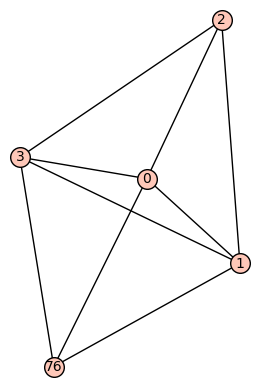

76 [53]

[0, 1, 2, 3]
39
[0, 1, 2, 3, 39]


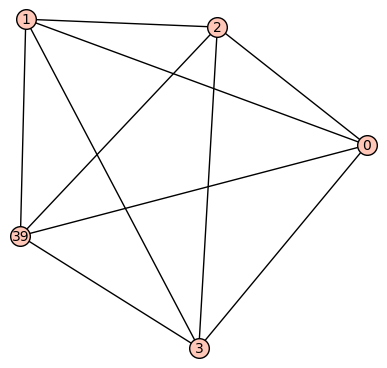

[0, 1, 2, 3]
55
[0, 1, 2, 3, 55]


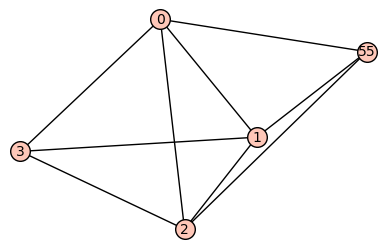

55 [53]

[0, 1, 2, 3]
60
[0, 1, 2, 3, 60]


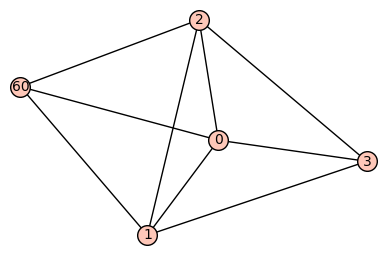

60 [53]

[0, 1, 2, 3]
73
[0, 1, 2, 3, 73]


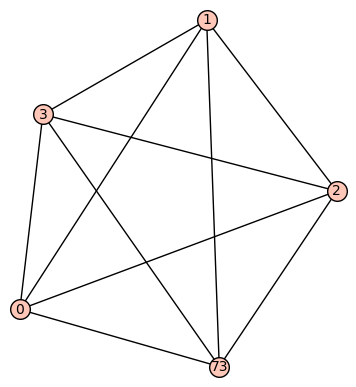

[0, 1, 2, 3]
76
[0, 1, 2, 3, 76]


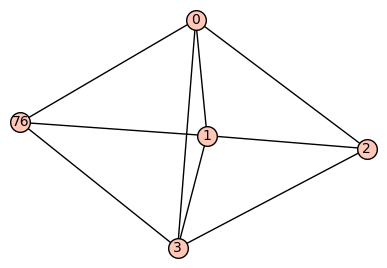

76 [53]

[0, 1, 2, 3]
83
[0, 1, 2, 3, 83]


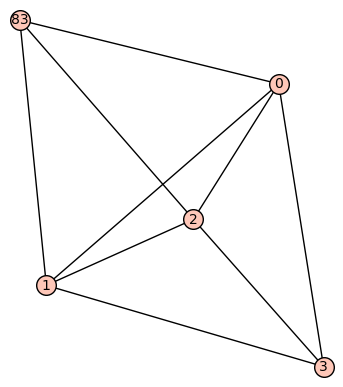

83 [53]

[0, 1, 2, 3]
12
[0, 1, 2, 3, 12]


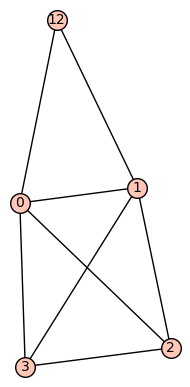

12 [53]

[0, 1, 2, 3]
16
[0, 1, 2, 3, 16]


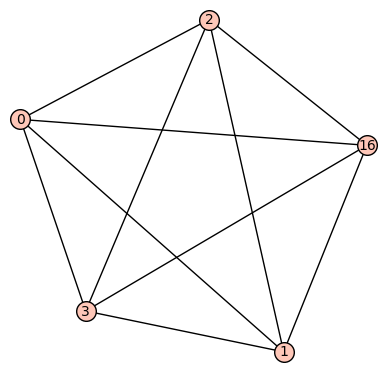

[0, 1, 2, 3]
33
[0, 1, 2, 3, 33]


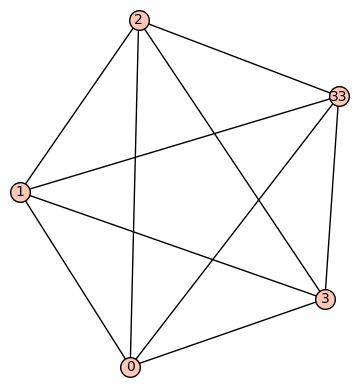

[0, 1, 2, 3]
37
[0, 1, 2, 3, 37]


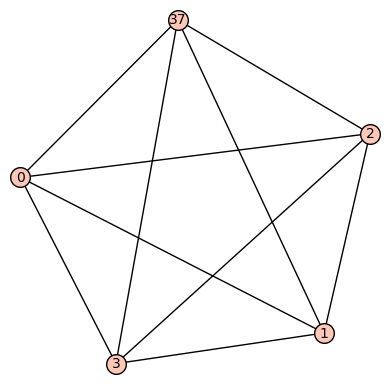

[0, 1, 2, 3]
39
[0, 1, 2, 3, 39]


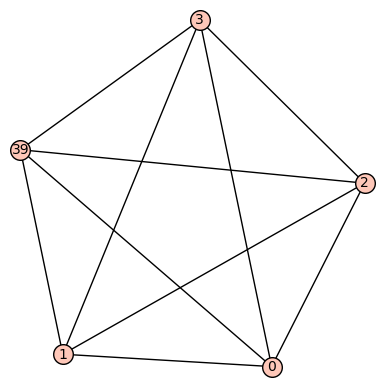

[0, 1, 2, 3]
50
[0, 1, 2, 3, 50]


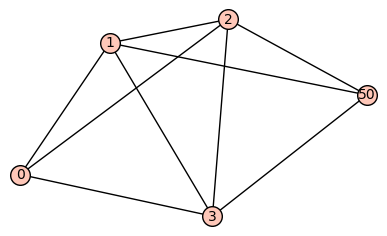

50 [53]

[0, 1, 2, 3]
52
[0, 1, 2, 3, 52]


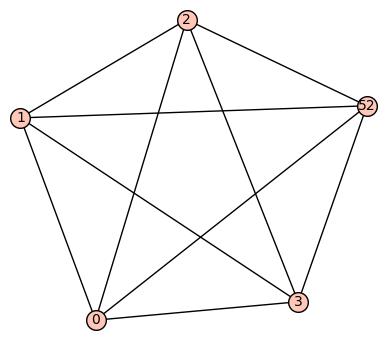

[0, 1, 2, 3]
80
[0, 1, 2, 3, 80]


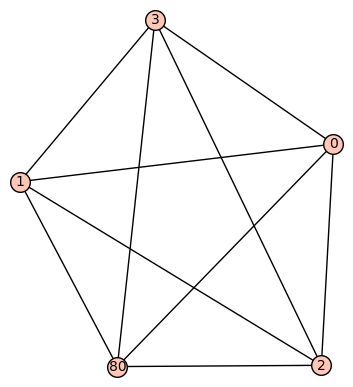

---------------------
[[12], [76], [13, 66], [12]]
[0, 1, 2, 3]
12
[0, 1, 2, 3, 12]


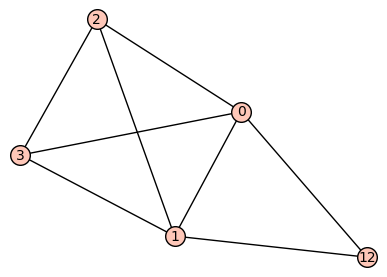

12 [53]

[0, 1, 2, 3]
76
[0, 1, 2, 3, 76]


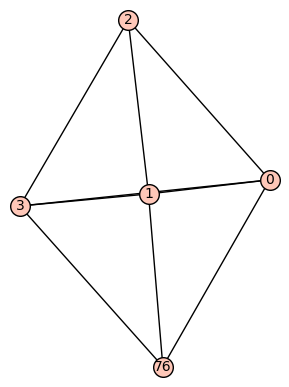

76 [53]

[0, 1, 2, 3]
13
[0, 1, 2, 3, 13]


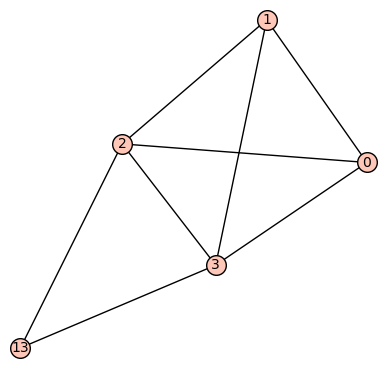

13 [53]

[0, 1, 2, 3]
66
[0, 1, 2, 3, 66]


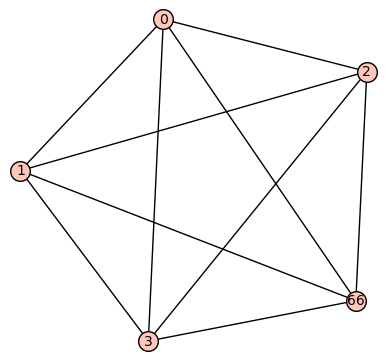

[0, 1, 2, 3]
12
[0, 1, 2, 3, 12]


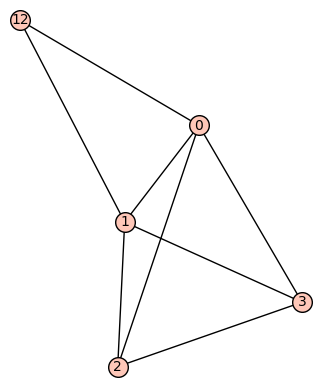

12 [53]

---------------------
[[0, 13, 36, 50, 53, 59, 60, 66, 80], [39, 55, 60, 73, 76, 83], [12, 16, 33, 37, 39, 50, 52, 80]]
[0, 1, 2, 3]
0
[0, 1, 2, 3, 0]


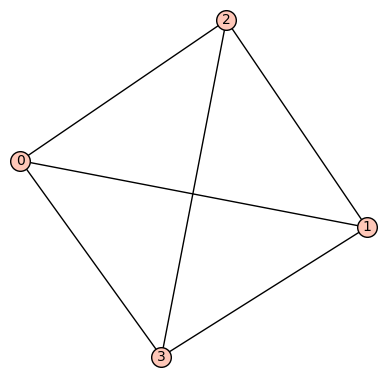

[0, 1, 2, 3]
13
[0, 1, 2, 3, 13]


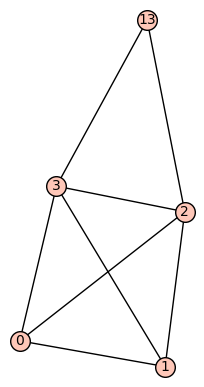

13 [53]

[0, 1, 2, 3]
36
[0, 1, 2, 3, 36]


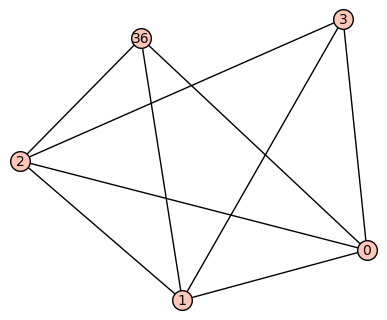

36 [53]

[0, 1, 2, 3]
50
[0, 1, 2, 3, 50]


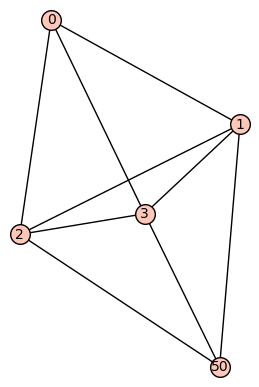

50 [53]

[0, 1, 2, 3]
53
[0, 1, 2, 3, 53]


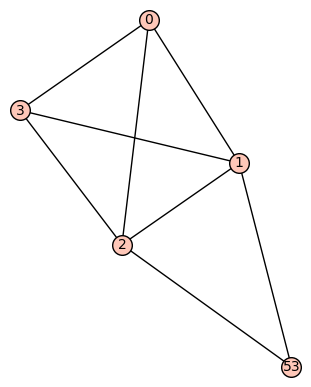

53 [53]

[0, 1, 2, 3]
59
[0, 1, 2, 3, 59]


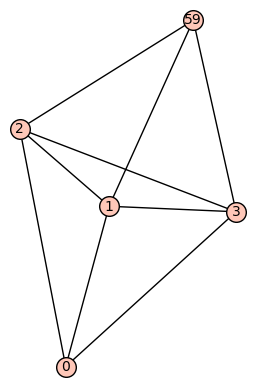

59 [53]

[0, 1, 2, 3]
60
[0, 1, 2, 3, 60]


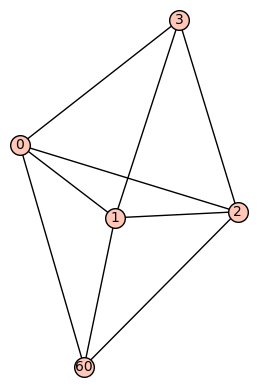

60 [53]

[0, 1, 2, 3]
66
[0, 1, 2, 3, 66]


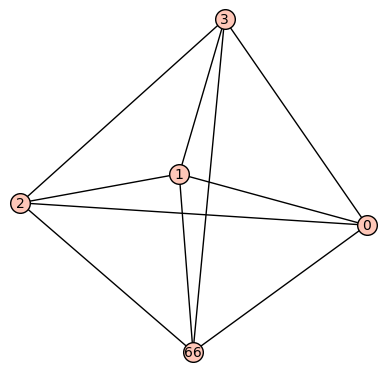

[0, 1, 2, 3]
80
[0, 1, 2, 3, 80]


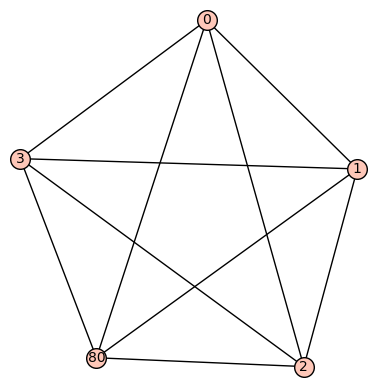

[0, 1, 2, 3]
39
[0, 1, 2, 3, 39]


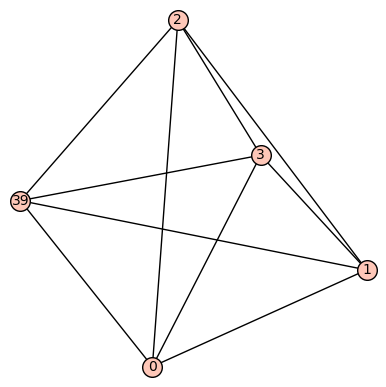

[0, 1, 2, 3]
55
[0, 1, 2, 3, 55]


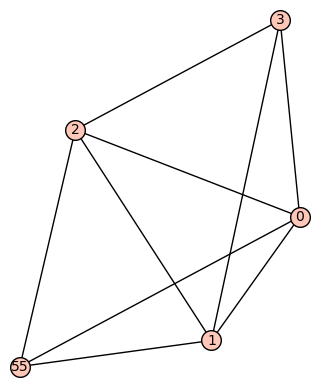

55 [53]

[0, 1, 2, 3]
60
[0, 1, 2, 3, 60]


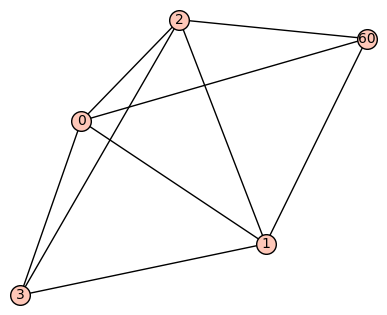

60 [53]

[0, 1, 2, 3]
73
[0, 1, 2, 3, 73]


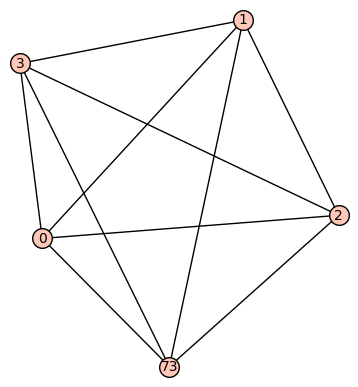

[0, 1, 2, 3]
76
[0, 1, 2, 3, 76]


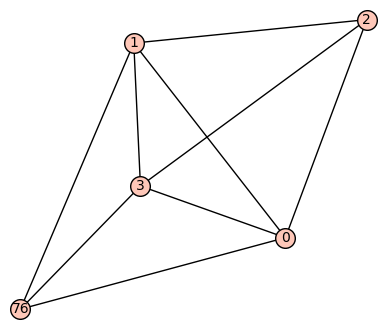

76 [53]

[0, 1, 2, 3]
83
[0, 1, 2, 3, 83]


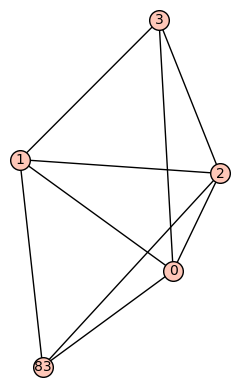

83 [53]

[0, 1, 2, 3]
12
[0, 1, 2, 3, 12]


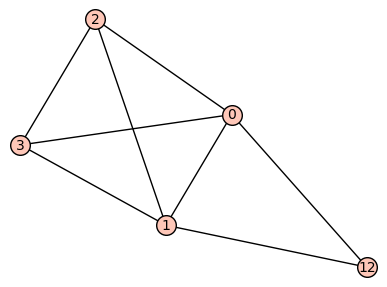

12 [53]

[0, 1, 2, 3]
16
[0, 1, 2, 3, 16]


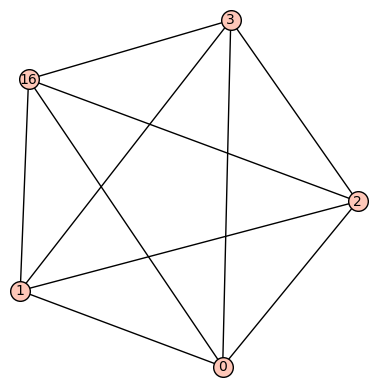

[0, 1, 2, 3]
33
[0, 1, 2, 3, 33]


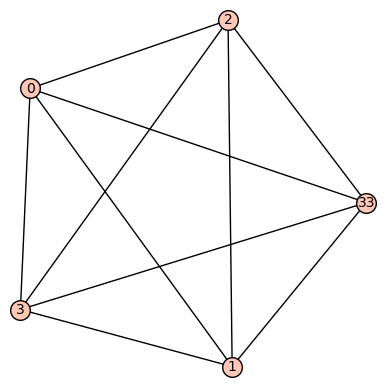

[0, 1, 2, 3]
37
[0, 1, 2, 3, 37]


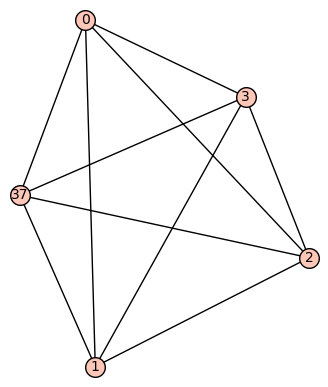

[0, 1, 2, 3]
39
[0, 1, 2, 3, 39]


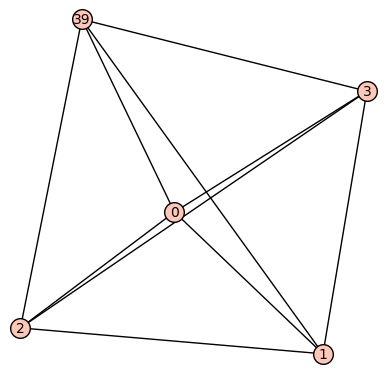

[0, 1, 2, 3]
50
[0, 1, 2, 3, 50]


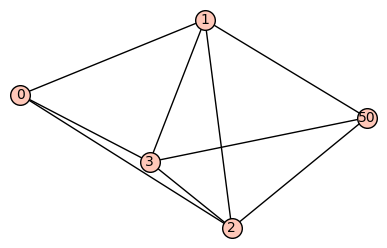

50 [53]

[0, 1, 2, 3]
52
[0, 1, 2, 3, 52]


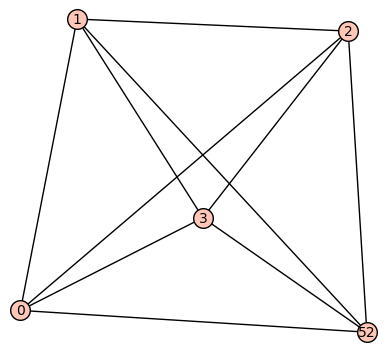

[0, 1, 2, 3]
80
[0, 1, 2, 3, 80]


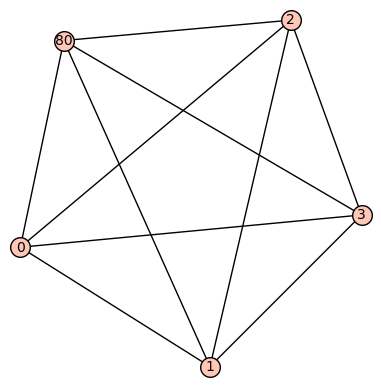

---------------------
[[9, 53, 55], [12, 39, 52], [39, 55, 60, 73, 76, 83], [36, 53, 60]]
[0, 1, 2, 3]
9
[0, 1, 2, 3, 9]


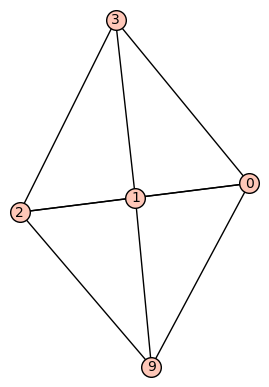

9 [53]

[0, 1, 2, 3]
53
[0, 1, 2, 3, 53]


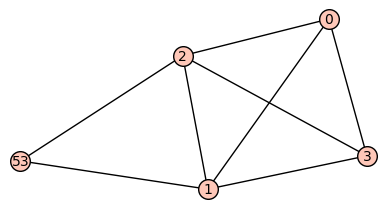

53 [53]

[0, 1, 2, 3]
55
[0, 1, 2, 3, 55]


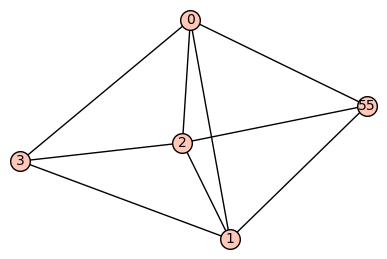

55 [53]

[0, 1, 2, 3]
12
[0, 1, 2, 3, 12]


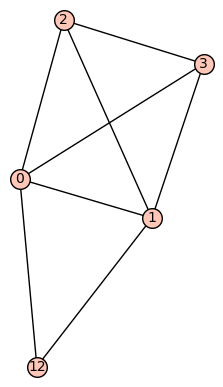

12 [53]

[0, 1, 2, 3]
39
[0, 1, 2, 3, 39]


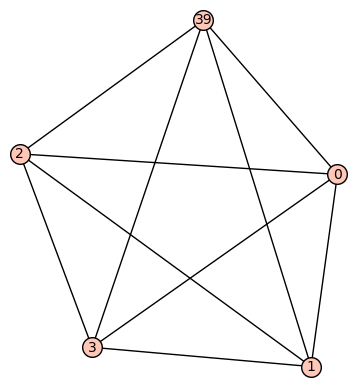

[0, 1, 2, 3]
52
[0, 1, 2, 3, 52]


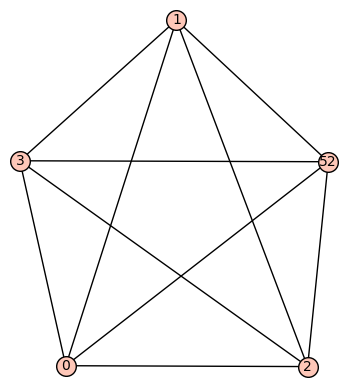

[0, 1, 2, 3]
39
[0, 1, 2, 3, 39]


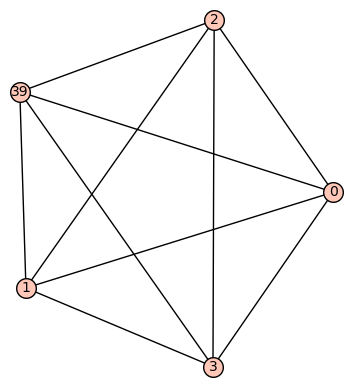

[0, 1, 2, 3]
55
[0, 1, 2, 3, 55]


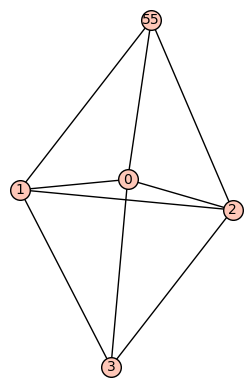

55 [53]

[0, 1, 2, 3]
60
[0, 1, 2, 3, 60]


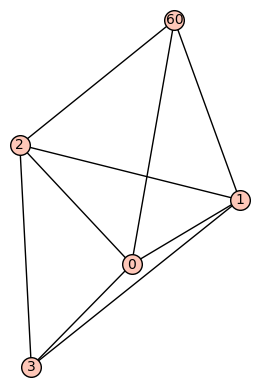

60 [53]

[0, 1, 2, 3]
73
[0, 1, 2, 3, 73]


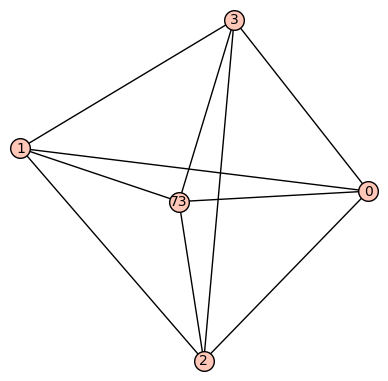

[0, 1, 2, 3]
76
[0, 1, 2, 3, 76]


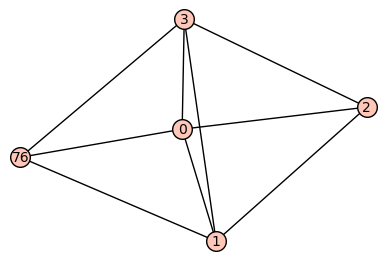

76 [53]

[0, 1, 2, 3]
83
[0, 1, 2, 3, 83]


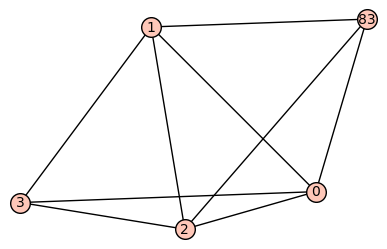

83 [53]

[0, 1, 2, 3]
36
[0, 1, 2, 3, 36]


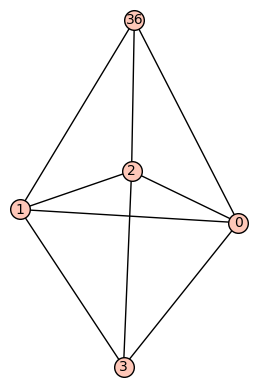

36 [53]

[0, 1, 2, 3]
53
[0, 1, 2, 3, 53]


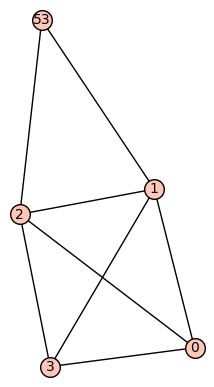

53 [53]

[0, 1, 2, 3]
60
[0, 1, 2, 3, 60]


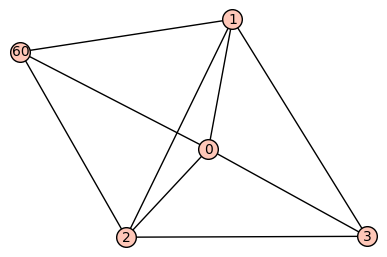

60 [53]



In [91]:
#FIX THIS!!!!


m=len(A2)
UniqFortRepIndex=Subsets(range(m),4)

NewFortGPmin=deepcopy(FortGPmin)

i=0
index=CliqGI4indices[i]
g=NewFortGPmin.subgraph(UniqFortRepIndex[index])
g_copy=deepcopy(g)

g_edges=g.edges()

for edge in g_edges:
    list_edge=list(edge)
    label=g.edge_label(list_edge[0],list_edge[1])
    print '---------------------'
    print label
    len_label=len(label)
    for i in range(len_label):
        len_sublabel=len(label[i])
        for j in range(len_sublabel):
            UFRI=list(UniqFortRepIndex[index])
            print UFRI
            new_vertex=label[i][j]
            print new_vertex
            UFRI_add=copy(UFRI)
            UFRI_add.append(new_vertex)
            print UFRI_add
            g_add=NewFortGPmin.subgraph(UFRI_add)
            g_add_copy=deepcopy(g_add)
            g_add.show()
            if g_add.is_clique()==False:
                g_copy_edge_label=g_copy.edge_label(list_edge[0],list_edge[1])[i]
                print new_vertex, g_edge_label
                print 
                
                if new_vertex in g_copy_edge_label:
                    g_copy_edge_label.remove(new_vertex)
                    

                    
                
                
            




In [94]:
g_copy.edges()

[(0, 1, [[], [], [], [37]]),
 (0, 2, [[39, 73], [16, 33, 37, 39, 52, 80], [3, 33]]),
 (0, 3, [[1, 2, 66], [39, 73], [16, 33, 37, 39, 52, 80]]),
 (1, 2, [[], [], [66], []]),
 (1, 3, [[0, 66, 80], [39, 73], [16, 33, 37, 39, 52, 80]]),
 (2, 3, [[], [39, 52], [39, 73], []])]

In [48]:
NewFortGPmin.edges()

[(0, 1, [[], [], [], [37]]),
 (0, 2, [[39, 73], [16, 33, 37, 39, 52, 80], [3, 33]]),
 (0, 3, [[1, 2, 66], [39, 73], [16, 33, 37, 39, 52, 80]]),
 (0,
  5,
  [[11, 25, 37, 41, 42, 46, 50, 51, 54, 58, 67, 69, 77, 85],
   [1, 13, 20, 21, 27, 28, 42, 46, 57, 58, 61, 67, 74, 77],
   [9, 17, 21, 41, 53, 55, 57, 70, 85],
   [9, 11, 28, 34, 53, 55, 58]]),
 (0,
  6,
  [[3,
    8,
    9,
    12,
    14,
    17,
    19,
    21,
    22,
    23,
    26,
    31,
    33,
    35,
    36,
    40,
    41,
    43,
    48,
    53,
    55,
    57,
    60,
    70,
    79,
    82,
    83,
    85],
   [5,
    14,
    18,
    20,
    21,
    27,
    39,
    44,
    45,
    47,
    48,
    54,
    55,
    60,
    62,
    65,
    67,
    68,
    69,
    70,
    73,
    75,
    76,
    77,
    79,
    81,
    83,
    85]]),
 (0,
  8,
  [[1, 2, 12, 13, 30, 66, 76],
   [39, 55, 60, 73, 76, 83],
   [2, 3, 9, 12, 36, 39, 52, 53, 55, 60, 72, 73, 76, 83],
   [12, 16, 33, 37, 39, 50, 52, 80]]),
 (0, 9, [[55], [37, 50], [

In [74]:
print g.edges()

[(0, 1, [[53], [9, 53, 55], [55], [37, 50]]), (0, 2, [[39, 55, 60, 73, 76, 83], [12, 16, 33, 37, 39, 50, 52, 80], [3, 8, 9, 12, 33, 36, 53, 55, 60, 83]]), (0, 3, [[1, 2, 12, 13, 30, 66, 76], [39, 55, 60, 73, 76, 83], [12, 16, 33, 37, 39, 50, 52, 80]]), (1, 2, [[12], [76], [13, 66], [12]]), (1, 3, [[0, 13, 36, 50, 53, 59, 60, 66, 80], [39, 55, 60, 73, 76, 83], [12, 16, 33, 37, 39, 50, 52, 80]]), (2, 3, [[9, 53, 55], [12, 39, 52], [39, 55, 60, 73, 76, 83], [36, 53, 60]])]


In [21]:
len(A2)

86

In [22]:
print A2

[{0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 3, 5, 7}, {0, 3, 5, 6, 7}, {0, 1, 2, 4, 5, 6}, {0, 1, 2, 4, 6, 7}, {1, 3, 4, 5, 7}, {0, 1, 2, 3, 4, 5, 6, 7}, {0, 2, 3, 5, 6, 7}, {0, 5, 6, 7}, {0, 1, 2, 3, 4, 5, 6}, {1, 4, 5, 6, 7}, {3, 5, 7}, {0, 1, 2, 5}, {0, 2, 3, 4, 7}, {0, 1, 2, 3, 5, 6, 7}, {1, 2, 3, 5, 6, 7}, {0, 2, 4, 5, 6, 7}, {0, 1, 2, 4, 6}, {0, 3, 4, 5, 6, 7}, {0, 1, 2, 4, 7}, {0, 2, 4, 7}, {0, 3, 4, 5, 7}, {3, 4, 5, 6}, {0, 1, 3, 4, 5, 6, 7}, {1, 2, 4, 5, 6}, {0, 2, 3, 4, 5, 6, 7}, {0, 1, 2, 4}, {0, 1, 4, 5, 7}, {1, 2, 3, 4, 5}, {0, 1, 2, 3, 5, 7}, {0, 3, 4, 5}, {0, 1, 2, 4, 5, 6, 7}, {2, 3, 5, 6, 7}, {0, 1, 4, 5, 6, 7}, {0, 2, 3, 4, 5, 7}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {1, 3, 4, 5, 6, 7}, {1, 3, 6, 7}, {0, 3, 4, 5, 6}, {2, 4, 5, 6, 7}, {1, 2, 4, 5, 7}, {3, 4, 5, 6, 7}, {1, 2, 3, 4, 6, 7}, {0, 1, 2, 3, 4, 6, 7}, {1, 2, 4, 5}, {0, 1, 2, 3, 4, 6}, {2, 3, 4, 6, 7}, {0, 1, 2, 3, 4, 5}, {1, 2, 5, 6}, {1, 2, 4, 5, 6, 7}, {1, 3, 5, 6, 7}, {0, 5, 6}, {1, 2, 4, 6}, {0, 6, 7}, {0, 1, 2, 5

In [23]:
find_Z(G)

4

In [2]:
BP=BadPairs(A2)
BP=list(Set(BP))
l=len(A2)
E=Subsets(range(l),2)
GP=list(set(E) - set(BP))
GPlist=[sorted(x) for x in GP]

NameError: name 'BadPairs' is not defined

In [25]:
len(GPlist)

3543

In [28]:
GPlist_min=copy(GPlist)
lenGP=len(GP)
for i in range(lenGP):
    index0=GPlist[i][0]
    index1=GPlist[i][1]
    if (A2[index0].issubset(A2[index1]) or A2[index1].issubset(A2[index0])):
        #print index0,A1[index0],index1,A1[index1]
        GPlist_min.remove(GPlist[i])
        

In [29]:
len(GPlist_min)

2986

In [30]:
GPmin_edges=[tuple(a) for a in GPlist_min]

In [31]:
FortGPmin=Graph(GPmin_edges)

In [1]:
FortGPmin.plot(vertex_color='white',vertex_size=500).show(figsize=(10,10))

NameError: name 'FortGPmin' is not defined

In [33]:
FortGPmin.clique_number()

31

In [34]:
#labels each edge with possible compatible fort completions
for x in FortGPmin.edges():
    list_x=list(x)
    FortGPmin.set_edge_label(list_x[0],list_x[1],ExchangeUnionsIndices([A2[list_x[0]],A2[list_x[1]]],A2))

In [35]:
print FortGPmin.edges()

[(0, 1, [[9, 53, 55], [9, 53, 55], [55], [37, 50]]), (0, 2, [[39, 55, 60, 73, 76, 83], [12, 16, 33, 37, 39, 50, 52, 80], [3, 8, 9, 12, 33, 36, 53, 55, 60, 83]]), (0, 3, [[1, 2, 12, 13, 30, 66, 76], [39, 55, 60, 73, 76, 83], [12, 16, 33, 37, 39, 50, 52, 80]]), (0, 5, [[11, 25, 37, 41, 42, 46, 50, 51, 54, 58, 67, 69, 77, 85], [1, 13, 20, 21, 27, 28, 42, 46, 57, 58, 61, 67, 74, 77], [9, 17, 21, 41, 53, 55, 57, 70, 85], [9, 11, 28, 34, 53, 55, 58]]), (0, 6, [[3, 8, 9, 12, 14, 17, 19, 21, 22, 23, 26, 31, 33, 35, 36, 40, 41, 43, 48, 53, 55, 57, 60, 70, 79, 82, 83, 85], [5, 14, 18, 20, 21, 27, 39, 44, 45, 47, 48, 54, 55, 60, 62, 65, 67, 68, 69, 70, 73, 75, 76, 77, 79, 81, 83, 85]]), (0, 8, [[1, 2, 12, 13, 30, 66, 76], [39, 55, 60, 73, 76, 83], [2, 3, 9, 12, 36, 39, 52, 53, 55, 60, 72, 73, 76, 83], [12, 16, 33, 37, 39, 50, 52, 80]]), (0, 9, [[55], [37, 50], [1, 13]]), (0, 11, [[5, 18, 20, 21, 27, 54, 55, 67, 69, 70, 77, 85], [1, 13, 20, 21, 27, 28, 42, 46, 57, 58, 61, 67, 74, 77], [9, 17, 21, 

In [248]:
L31=[[11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75]]


In [253]:
t=31
b=scipy.special.binom(t,2)
m=len(A2)
S=L31
lenS=len(S)
CliqCompFortsIndices31=[]

for i in range(lenS):
    #print i
    g=FortGPmin.subgraph(S[i])
    if FortGPmin.is_clique(S[i]):
    #         print '=============================================='
    #         print i
    #         print 
        XCompList=[]
        for x in g.edges(labels=True):
            CompList=[]
            list_x=list(x)
            label=g.edge_label(list_x[0],list_x[1])
            #print g.edge_label(list_x[0],list_x[1])
            len_label=len(label)
            for j in range(len_label):
                for y in g.vertices():
                    if y in label[j]:
                        CompList.append(y)
                        break;
    #         print label
    #         print CompList    
            if len_label == len(CompList):
                XCompList.append(x)

        
        
        if b == len(XCompList):
            #print i, 'yes'
            CliqCompFortsIndices31.append(i)
            

In [254]:
print CliqCompFortsIndices31

[]


In [252]:
L30_0_200=[[11, 20, 22, 40, 41, 42, 43, 80, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 29, 33, 34, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 3, 6, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 31, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 31, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 8, 14, 18, 25, 28, 29, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75]]


In [255]:
t=30
b=scipy.special.binom(t,2)
m=len(A2)
S=L30_0_200
lenS=len(S)
CliqCompFortsIndices30_0_200=[]

for i in range(lenS):
    #print i
    g=FortGPmin.subgraph(S[i])
    if FortGPmin.is_clique(S[i]):
    #         print '=============================================='
    #         print i
    #         print 
        XCompList=[]
        for x in g.edges(labels=True):
            CompList=[]
            list_x=list(x)
            label=g.edge_label(list_x[0],list_x[1])
            #print g.edge_label(list_x[0],list_x[1])
            len_label=len(label)
            for j in range(len_label):
                for y in g.vertices():
                    if y in label[j]:
                        CompList.append(y)
                        break;
    #         print label
    #         print CompList    
            if len_label == len(CompList):
                XCompList.append(x)

        
        
        if b == len(XCompList):
            #print i, 'yes'
            CliqCompFortsIndices30_0_200.append(i)
            

In [256]:
CliqCompFortsIndices30_0_200

[]

In [257]:
L30_200_400=[[11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76]]


In [258]:
t=30
b=scipy.special.binom(t,2)
m=len(A2)
S=L30_200_400
lenS=len(S)
CliqCompFortsIndices30_200_400=[]

for i in range(lenS):
    #print i
    g=FortGPmin.subgraph(S[i])
    if FortGPmin.is_clique(S[i]):
    #         print '=============================================='
    #         print i
    #         print 
        XCompList=[]
        for x in g.edges(labels=True):
            CompList=[]
            list_x=list(x)
            label=g.edge_label(list_x[0],list_x[1])
            #print g.edge_label(list_x[0],list_x[1])
            len_label=len(label)
            for j in range(len_label):
                for y in g.vertices():
                    if y in label[j]:
                        CompList.append(y)
                        break;
    #         print label
    #         print CompList    
            if len_label == len(CompList):
                XCompList.append(x)

        
        
        if b == len(XCompList):
            #print i, 'yes'
            CliqCompFortsIndices30_200_400.append(i)
            

In [259]:
CliqCompFortsIndices30_200_400

[]

In [260]:
L30_400_600=[[11, 20, 22, 40, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 39, 48, 57, 60, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 48, 52, 57, 60, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 39, 48, 57, 60, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 48, 52, 57, 60, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 60, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 60, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 60, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 60, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 39, 48, 57, 60, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 48, 52, 57, 60, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 39, 48, 57, 60, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 48, 52, 57, 60, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 60, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 60, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 60, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 60, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 69, 70, 74, 75, 76]]


In [261]:
t=30
b=scipy.special.binom(t,2)
m=len(A2)
S=L30_400_600
lenS=len(S)
CliqCompFortsIndices30_400_600=[]

for i in range(lenS):
    #print i
    g=FortGPmin.subgraph(S[i])
    if FortGPmin.is_clique(S[i]):
    #         print '=============================================='
    #         print i
    #         print 
        XCompList=[]
        for x in g.edges(labels=True):
            CompList=[]
            list_x=list(x)
            label=g.edge_label(list_x[0],list_x[1])
            #print g.edge_label(list_x[0],list_x[1])
            len_label=len(label)
            for j in range(len_label):
                for y in g.vertices():
                    if y in label[j]:
                        CompList.append(y)
                        break;
    #         print label
    #         print CompList    
            if len_label == len(CompList):
                XCompList.append(x)

        
        
        if b == len(XCompList):
            #print i, 'yes'
            CliqCompFortsIndices30_400_600.append(i)
            

In [262]:
CliqCompFortsIndices30_400_600

[]

In [263]:
L30_600_plus=[[11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 75], [11, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 18, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 3, 6, 14, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 6, 9, 14, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 25, 28, 29, 31, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 83, 0, 1, 2, 6, 9, 14, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 25, 28, 29, 33, 36, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 25, 28, 29, 31, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 23, 41, 42, 80, 81, 0, 1, 2, 6, 9, 14, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 25, 28, 29, 33, 36, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 6, 9, 14, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75, 76], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 25, 28, 29, 33, 37, 39, 48, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 83, 0, 1, 2, 6, 9, 14, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 74, 75], [11, 20, 22, 40, 41, 42, 43, 80, 81, 0, 1, 2, 6, 9, 14, 25, 28, 29, 33, 37, 48, 52, 57, 66, 68, 69, 70, 73, 74, 75]]


In [264]:
t=30
b=scipy.special.binom(t,2)
m=len(A2)
S=L30_600_plus
lenS=len(S)
CliqCompFortsIndices30_600_plus=[]

for i in range(lenS):
    #print i
    g=FortGPmin.subgraph(S[i])
    if FortGPmin.is_clique(S[i]):
    #         print '=============================================='
    #         print i
    #         print 
        XCompList=[]
        for x in g.edges(labels=True):
            CompList=[]
            list_x=list(x)
            label=g.edge_label(list_x[0],list_x[1])
            #print g.edge_label(list_x[0],list_x[1])
            len_label=len(label)
            for j in range(len_label):
                for y in g.vertices():
                    if y in label[j]:
                        CompList.append(y)
                        break;
    #         print label
    #         print CompList    
            if len_label == len(CompList):
                XCompList.append(x)

        
        
        if b == len(XCompList):
            #print i, 'yes'
            CliqCompFortsIndices30_600_plus.append(i)
            

In [265]:
CliqCompFortsIndices30_600_plus

[]

In [ ]:
CFI3=[294, 512, 811, 1422, 2677, 3283, 3306, 3330, 4259, 4326, 4533, 4610, 5080, 5681, 5907]

In [ ]:
#check that each index in CFI3 gives us a valid matroid
m=len(A1)
t=3
CList=CFI3
S=Subsets(range(m),t)

LenList=len(CList)
for i in range(LenList):
    index=CList[i]
    F=[A1[k] for k in S[index]]
    #converts list of sets to list of strings for sage matroid package
    CF=[]
    for m in range(len(F)):
        strFj=''
        for j in range(len(F[m])):
            listF=list(F[m])
            strFj=strFj+str(listF[j])
        CF.append(strFj)
    
    print '------------------------------------------'
    print sorted(CF) 
    M=Matroid(groundset='12345678',circuits=CF)
#     if M.rank()<7:
        #print '------------------------------------------'
    print 'valid? ', M.is_valid(), '  rank(M) =', M.rank(), '\n'
    print i, F, '\n', is_compatible(F)

In [ ]:
L3=[[13, 18, 32], [13, 32, 33], [7, 32, 33], [31, 32, 33], [28, 32, 33], [1, 13, 18], [11, 13, 18], [11, 13, 33], [11, 7, 33], [11, 31, 33], [11, 28, 33], [24, 7, 33], [24, 31, 33], [24, 28, 33], [11, 22, 7], [11, 22, 31], [11, 22, 28], [11, 22, 18], [11, 22, 33], [22, 7, 32], [22, 31, 32], [22, 28, 32], [22, 18, 32], [22, 32, 33], [22, 7, 33], [22, 31, 33], [22, 28, 33], [11, 7, 25], [11, 25, 31], [11, 25, 28], [11, 18, 25], [11, 25, 33], [7, 25, 32], [25, 31, 32], [25, 28, 32], [18, 25, 32], [25, 32, 33], [7, 25, 33], [25, 31, 33], [25, 28, 33], [11, 8, 31], [11, 8, 28], [11, 8, 18], [11, 8, 33], [1, 8, 31], [1, 8, 28], [1, 8, 18], [8, 31, 32], [8, 28, 32], [8, 18, 32], [8, 32, 33], [8, 31, 33], [8, 28, 33], [11, 13, 29], [11, 29, 31], [11, 28, 29], [11, 18, 29], [11, 29, 33], [1, 13, 29], [1, 29, 31], [1, 28, 29], [1, 18, 29], [13, 29, 32], [29, 31, 32], [28, 29, 32], [18, 29, 32], [29, 32, 33], [13, 18, 29], [13, 29, 33], [29, 31, 33], [28, 29, 33], [11, 23, 25], [23, 25, 32], [23, 7, 25], [23, 25, 31], [23, 25, 28], [23, 18, 25], [23, 25, 33], [11, 22, 23], [22, 23, 32], [22, 23, 7], [22, 23, 31], [22, 23, 28], [22, 23, 18], [22, 23, 33], [11, 23, 7], [11, 23, 31], [11, 23, 28], [11, 23, 18], [11, 23, 33], [23, 1, 7], [23, 1, 31], [23, 1, 28], [23, 1, 18], [23, 7, 32], [23, 31, 32], [23, 28, 32], [23, 18, 32], [23, 32, 33], [23, 7, 33], [23, 31, 33], [23, 28, 33], [11, 17, 29], [1, 17, 29], [17, 29, 32], [17, 28, 29], [17, 18, 29], [17, 29, 33], [11, 8, 17], [1, 8, 17], [8, 17, 32], [8, 17, 28], [8, 17, 18], [8, 17, 33], [11, 17, 25], [17, 25, 32], [7, 17, 25], [17, 25, 28], [17, 18, 25], [17, 25, 33], [11, 22, 17], [22, 17, 32], [22, 7, 17], [22, 17, 28], [22, 17, 18], [22, 17, 33], [11, 7, 17], [11, 17, 28], [11, 17, 18], [11, 17, 33], [1, 7, 17], [1, 17, 28], [1, 17, 18], [7, 17, 32], [17, 28, 32], [17, 18, 32], [17, 32, 33], [7, 17, 33], [17, 28, 33], [11, 22, 21], [22, 21, 32], [22, 21, 7], [22, 21, 31], [22, 21, 28], [22, 21, 18], [22, 21, 33], [11, 21, 7], [11, 21, 31], [11, 21, 28], [11, 21, 18], [11, 21, 33], [21, 1, 7], [21, 1, 31], [21, 1, 28], [21, 1, 18], [21, 7, 32], [21, 31, 32], [21, 28, 32], [21, 18, 32], [21, 32, 33], [21, 7, 33], [21, 31, 33], [21, 28, 33], [22, 6, 17], [11, 6, 17], [6, 1, 17], [6, 17, 32], [6, 7, 17], [6, 17, 28], [6, 17, 18], [6, 17, 33], [22, 23, 6], [11, 23, 6], [23, 6, 1], [23, 6, 32], [23, 6, 7], [23, 6, 31], [23, 6, 28], [23, 6, 18], [23, 6, 33], [11, 22, 6], [22, 6, 32], [22, 6, 7], [22, 6, 31], [22, 6, 28], [22, 6, 18], [22, 6, 33], [24, 6, 7], [24, 6, 31], [24, 6, 28], [24, 6, 18], [24, 6, 33], [11, 6, 7], [11, 6, 31], [11, 6, 28], [11, 6, 18], [11, 6, 33], [6, 1, 7], [6, 1, 31], [6, 1, 28], [6, 1, 18], [6, 7, 32], [6, 31, 32], [6, 28, 32], [6, 18, 32], [6, 32, 33], [6, 7, 33], [6, 31, 33], [6, 28, 33], [0, 8, 17], [22, 0, 17], [11, 0, 17], [0, 1, 17], [0, 17, 32], [0, 7, 17], [0, 17, 28], [0, 17, 18], [0, 17, 33], [22, 23, 0], [11, 23, 0], [23, 0, 1], [23, 0, 32], [23, 0, 7], [23, 0, 31], [23, 0, 28], [23, 0, 18], [23, 0, 33], [11, 0, 8], [0, 1, 8], [0, 8, 32], [0, 8, 31], [0, 8, 28], [0, 8, 18], [0, 8, 33], [11, 22, 0], [22, 0, 32], [22, 0, 7], [22, 0, 31], [22, 0, 28], [22, 0, 18], [22, 0, 33], [24, 0, 7], [24, 0, 31], [24, 0, 28], [24, 0, 18], [24, 0, 33], [11, 0, 13], [11, 0, 7], [11, 0, 31], [11, 0, 28], [11, 0, 18], [11, 0, 33], [0, 1, 13], [0, 1, 7], [0, 1, 31], [0, 1, 28], [0, 1, 18], [0, 13, 32], [0, 7, 32], [0, 31, 32], [0, 28, 32], [0, 18, 32], [0, 32, 33], [0, 13, 18], [0, 13, 33], [0, 7, 33], [0, 31, 33], [0, 28, 33], [22, 19, 17], [11, 19, 17], [19, 1, 17], [19, 17, 32], [19, 7, 17], [19, 17, 28], [19, 17, 18], [19, 17, 33], [22, 23, 19], [11, 23, 19], [23, 19, 1], [23, 19, 32], [23, 19, 7], [23, 19, 31], [23, 19, 28], [23, 19, 18], [23, 19, 33], [11, 22, 19], [22, 19, 32], [22, 19, 7], [22, 19, 31], [22, 19, 28], [22, 19, 18], [22, 19, 33], [24, 19, 7], [24, 19, 31], [24, 19, 28], [24, 19, 18], [24, 19, 33], [11, 19, 7], [11, 19, 31], [11, 19, 28], [11, 19, 18], [11, 19, 33], [19, 1, 7], [19, 1, 31], [19, 1, 28], [19, 1, 18], [19, 7, 32], [19, 31, 32], [19, 28, 32], [19, 18, 32], [19, 32, 33], [19, 7, 33], [19, 31, 33], [19, 28, 33], [0, 16, 17], [23, 0, 16], [22, 0, 16], [11, 0, 16], [0, 1, 16], [0, 16, 32], [0, 16, 31], [0, 16, 28], [0, 16, 18], [0, 16, 33], [6, 16, 17], [23, 6, 16], [22, 6, 16], [11, 6, 16], [6, 1, 16], [6, 16, 32], [6, 16, 31], [6, 16, 28], [6, 16, 18], [6, 16, 33], [22, 21, 16], [11, 21, 16], [21, 1, 16], [21, 16, 32], [21, 16, 31], [21, 16, 28], [21, 16, 18], [21, 16, 33], [16, 17, 25], [22, 16, 17], [11, 16, 17], [1, 16, 17], [16, 17, 32], [16, 17, 28], [16, 17, 18], [16, 17, 33], [23, 16, 25], [22, 23, 16], [11, 23, 16], [23, 1, 16], [23, 16, 32], [23, 16, 31], [23, 16, 28], [23, 16, 18], [23, 16, 33], [11, 16, 25], [16, 25, 32], [16, 25, 31], [16, 25, 28], [16, 18, 25], [16, 25, 33], [11, 22, 16], [22, 16, 32], [22, 16, 31], [22, 16, 28], [22, 16, 18], [22, 16, 33], [11, 16, 31], [11, 16, 28], [11, 16, 18], [11, 16, 33], [1, 16, 31], [1, 16, 28], [1, 16, 18], [16, 31, 32], [16, 28, 32], [16, 18, 32], [16, 32, 33], [16, 31, 33], [16, 28, 33], [10, 0, 17], [10, 23, 0], [10, 0, 8], [10, 22, 0], [10, 11, 0], [10, 0, 1], [10, 0, 32], [10, 0, 31], [10, 0, 28], [10, 0, 18], [10, 0, 33], [10, 6, 17], [10, 23, 6], [10, 22, 6], [10, 11, 6], [10, 6, 1], [10, 6, 32], [10, 6, 31], [10, 6, 28], [10, 6, 18], [10, 6, 33], [10, 22, 21], [10, 11, 21], [10, 21, 1], [10, 21, 32], [10, 21, 31], [10, 21, 28], [10, 21, 18], [10, 21, 33], [10, 17, 29], [10, 8, 17], [10, 17, 25], [10, 22, 17], [10, 11, 17], [10, 1, 17], [10, 17, 32], [10, 17, 28], [10, 17, 18], [10, 17, 33], [10, 23, 25], [10, 22, 23], [10, 11, 23], [10, 23, 1], [10, 23, 32], [10, 23, 31], [10, 23, 28], [10, 23, 18], [10, 23, 33], [10, 11, 29], [10, 1, 29], [10, 29, 32], [10, 29, 31], [10, 28, 29], [10, 18, 29], [10, 29, 33], [10, 11, 8], [10, 1, 8], [10, 8, 32], [10, 8, 31], [10, 8, 28], [10, 8, 18], [10, 8, 33], [10, 11, 25], [10, 25, 32], [10, 25, 31], [10, 25, 28], [10, 18, 25], [10, 25, 33], [10, 11, 22], [10, 22, 32], [10, 22, 31], [10, 22, 28], [10, 22, 18], [10, 22, 33], [10, 11, 31], [10, 11, 28], [10, 11, 18], [10, 11, 33], [10, 1, 31], [10, 1, 28], [10, 1, 18], [10, 31, 32], [10, 28, 32], [10, 18, 32], [10, 32, 33], [10, 31, 33], [10, 28, 33], [0, 3, 17], [23, 0, 3], [0, 3, 8], [22, 0, 3], [0, 1, 3], [0, 3, 13], [0, 3, 31], [0, 3, 28], [0, 3, 18], [0, 3, 33], [6, 3, 17], [23, 6, 3], [22, 6, 3], [6, 1, 3], [6, 3, 31], [6, 3, 28], [6, 3, 18], [6, 3, 33], [22, 21, 3], [21, 1, 3], [21, 3, 31], [21, 3, 28], [21, 3, 18], [21, 3, 33], [3, 17, 29], [3, 8, 17], [3, 17, 25], [22, 3, 17], [1, 3, 17], [3, 17, 28], [3, 17, 18], [3, 17, 33], [23, 3, 25], [22, 23, 3], [23, 1, 3], [23, 3, 31], [23, 3, 28], [23, 3, 18], [23, 3, 33], [1, 3, 29], [3, 13, 29], [3, 29, 31], [3, 28, 29], [3, 18, 29], [3, 29, 33], [1, 3, 8], [3, 8, 31], [3, 8, 28], [3, 8, 18], [3, 8, 33], [3, 25, 31], [3, 25, 28], [3, 18, 25], [3, 25, 33], [22, 3, 31], [22, 3, 28], [22, 3, 18], [22, 3, 33], [1, 3, 13], [1, 3, 31], [1, 3, 28], [1, 3, 18], [3, 13, 18], [3, 13, 33], [3, 31, 33], [3, 28, 33], [0, 14, 16], [6, 14, 16], [21, 14, 16], [23, 14, 16], [14, 16, 25], [22, 14, 16], [11, 14, 16], [1, 14, 16], [14, 16, 32], [14, 16, 31], [14, 16, 28], [14, 16, 18], [14, 16, 33], [23, 19, 14], [22, 19, 14], [11, 19, 14], [19, 1, 14], [19, 14, 32], [19, 7, 14], [19, 14, 31], [19, 14, 28], [19, 14, 18], [19, 14, 33], [23, 0, 14], [0, 8, 14], [22, 0, 14], [11, 0, 14], [0, 1, 14], [0, 14, 32], [0, 7, 14], [0, 14, 31], [0, 14, 28], [0, 14, 18], [0, 14, 33], [23, 6, 14], [22, 6, 14], [11, 6, 14], [6, 1, 14], [6, 14, 32], [6, 7, 14], [6, 14, 31], [6, 14, 28], [6, 14, 18], [6, 14, 33], [22, 21, 14], [11, 21, 14], [21, 1, 14], [21, 14, 32], [21, 7, 14], [21, 14, 31], [21, 14, 28], [21, 14, 18], [21, 14, 33], [23, 14, 25], [22, 23, 14], [11, 23, 14], [23, 1, 14], [23, 14, 32], [23, 7, 14], [23, 14, 31], [23, 14, 28], [23, 14, 18], [23, 14, 33], [11, 14, 29], [1, 14, 29], [14, 29, 32], [14, 29, 31], [14, 28, 29], [14, 18, 29], [14, 29, 33], [11, 8, 14], [1, 8, 14], [8, 14, 32], [8, 14, 31], [8, 14, 28], [8, 14, 18], [8, 14, 33], [11, 14, 25], [14, 25, 32], [7, 14, 25], [14, 25, 31], [14, 25, 28], [14, 18, 25], [14, 25, 33], [11, 22, 14], [22, 14, 32], [22, 7, 14], [22, 14, 31], [22, 14, 28], [22, 14, 18], [22, 14, 33], [11, 7, 14], [11, 14, 31], [11, 14, 28], [11, 14, 18], [11, 14, 33], [1, 7, 14], [1, 14, 31], [1, 14, 28], [1, 14, 18], [7, 14, 32], [14, 31, 32], [14, 28, 32], [14, 18, 32], [14, 32, 33], [7, 14, 33], [14, 31, 33], [14, 28, 33], [0, 16, 27], [6, 16, 27], [21, 16, 27], [23, 16, 27], [16, 25, 27], [22, 16, 27], [11, 16, 27], [1, 16, 27], [16, 27, 32], [16, 27, 31], [16, 27, 28], [16, 18, 27], [16, 27, 33], [23, 19, 27], [22, 19, 27], [11, 19, 27], [19, 1, 27], [19, 27, 32], [19, 27, 31], [19, 27, 28], [19, 18, 27], [19, 27, 33], [23, 0, 27], [0, 8, 27], [22, 0, 27], [11, 0, 27], [0, 1, 27], [0, 27, 32], [0, 27, 31], [0, 27, 28], [0, 18, 27], [0, 27, 33], [23, 6, 27], [22, 6, 27], [11, 6, 27], [6, 1, 27], [6, 27, 32], [6, 27, 31], [6, 27, 28], [6, 18, 27], [6, 27, 33], [22, 21, 27], [11, 21, 27], [21, 1, 27], [21, 27, 32], [21, 27, 31], [21, 27, 28], [21, 18, 27], [21, 27, 33], [23, 25, 27], [22, 23, 27], [11, 23, 27], [23, 1, 27], [23, 27, 32], [23, 27, 31], [23, 27, 28], [23, 18, 27], [23, 27, 33], [11, 27, 29], [1, 27, 29], [27, 29, 32], [27, 29, 31], [27, 28, 29], [18, 27, 29], [27, 29, 33], [11, 8, 27], [1, 8, 27], [8, 27, 32], [8, 27, 31], [8, 27, 28], [8, 18, 27], [8, 27, 33], [11, 25, 27], [25, 27, 32], [25, 27, 31], [25, 27, 28], [18, 25, 27], [25, 27, 33], [11, 22, 27], [22, 27, 32], [22, 27, 31], [22, 27, 28], [22, 18, 27], [22, 27, 33], [11, 27, 31], [11, 27, 28], [11, 18, 27], [11, 27, 33], [1, 27, 31], [1, 27, 28], [1, 18, 27], [27, 31, 32], [27, 28, 32], [18, 27, 32], [27, 32, 33], [27, 31, 33], [27, 28, 33], [5, 14, 16], [19, 5, 14], [0, 5, 14], [6, 5, 14], [21, 5, 14], [23, 5, 14], [5, 14, 29], [5, 8, 14], [5, 14, 25], [22, 5, 14], [11, 5, 14], [1, 5, 14], [5, 14, 32], [5, 14, 31], [5, 14, 28], [5, 14, 18], [5, 14, 33], [0, 5, 16], [6, 5, 16], [21, 5, 16], [5, 16, 17], [23, 5, 16], [5, 16, 25], [22, 5, 16], [11, 5, 16], [1, 5, 16], [5, 16, 32], [5, 16, 31], [5, 16, 28], [5, 16, 18], [5, 16, 33], [19, 5, 17], [23, 19, 5], [22, 19, 5], [24, 19, 5], [11, 19, 5], [19, 1, 5], [19, 5, 32], [19, 5, 31], [19, 5, 28], [19, 5, 18], [19, 5, 33], [0, 5, 17], [23, 0, 5], [0, 5, 8], [22, 0, 5], [24, 0, 5], [11, 0, 5], [0, 1, 5], [0, 5, 32], [0, 5, 31], [0, 5, 28], [0, 5, 18], [0, 5, 33], [6, 5, 17], [23, 6, 5], [22, 6, 5], [24, 6, 5], [11, 6, 5], [6, 1, 5], [6, 5, 32], [6, 5, 31], [6, 5, 28], [6, 5, 18], [6, 5, 33], [22, 21, 5], [11, 21, 5], [21, 1, 5], [21, 5, 32], [21, 5, 31], [21, 5, 28], [21, 5, 18], [21, 5, 33], [5, 17, 29], [5, 8, 17], [5, 17, 25], [22, 5, 17], [11, 5, 17], [1, 5, 17], [5, 17, 32], [5, 17, 28], [5, 17, 18], [5, 17, 33], [23, 5, 25], [22, 23, 5], [11, 23, 5], [23, 1, 5], [23, 5, 32], [23, 5, 31], [23, 5, 28], [23, 5, 18], [23, 5, 33], [11, 5, 29], [1, 5, 29], [5, 29, 32], [5, 29, 31], [5, 28, 29], [5, 18, 29], [5, 29, 33], [11, 5, 8], [1, 5, 8], [5, 8, 32], [5, 8, 31], [5, 8, 28], [5, 8, 18], [5, 8, 33], [11, 5, 25], [5, 25, 32], [5, 25, 31], [5, 25, 28], [5, 18, 25], [5, 25, 33], [11, 22, 5], [22, 5, 32], [22, 5, 31], [22, 5, 28], [22, 5, 18], [22, 5, 33], [24, 5, 31], [24, 5, 28], [24, 5, 18], [24, 5, 33], [11, 5, 31], [11, 5, 28], [11, 5, 18], [11, 5, 33], [1, 5, 31], [1, 5, 28], [1, 5, 18], [5, 31, 32], [5, 28, 32], [5, 18, 32], [5, 32, 33], [5, 31, 33], [5, 28, 33], [2, 14, 16], [19, 2, 14], [0, 2, 14], [6, 2, 14], [21, 2, 14], [23, 2, 14], [2, 14, 29], [2, 8, 14], [2, 14, 25], [22, 2, 14], [1, 2, 14], [2, 14, 32], [2, 14, 31], [2, 14, 28], [2, 14, 18], [2, 14, 33], [10, 0, 2], [10, 6, 2], [10, 21, 2], [10, 2, 17], [10, 23, 2], [10, 2, 29], [10, 2, 8], [10, 2, 25], [10, 22, 2], [10, 1, 2], [10, 2, 32], [10, 2, 31], [10, 2, 28], [10, 2, 18], [10, 2, 33], [0, 2, 16], [6, 2, 16], [21, 2, 16], [2, 16, 17], [23, 2, 16], [2, 16, 25], [22, 2, 16], [1, 2, 16], [2, 16, 32], [2, 16, 31], [2, 16, 28], [2, 16, 18], [2, 16, 33], [19, 2, 17], [23, 19, 2], [22, 19, 2], [24, 19, 2], [19, 1, 2], [19, 2, 32], [19, 2, 31], [19, 2, 28], [19, 2, 18], [19, 2, 33], [0, 2, 17], [23, 0, 2], [0, 2, 8], [22, 0, 2], [24, 0, 2], [0, 1, 2], [0, 2, 32], [0, 2, 13], [0, 2, 31], [0, 2, 28], [0, 2, 18], [0, 2, 33], [6, 2, 17], [23, 6, 2], [22, 6, 2], [24, 6, 2], [6, 1, 2], [6, 2, 32], [6, 2, 31], [6, 2, 28], [6, 2, 18], [6, 2, 33], [22, 21, 2], [21, 1, 2], [21, 2, 32], [21, 2, 31], [21, 2, 28], [21, 2, 18], [21, 2, 33], [2, 17, 29], [2, 8, 17], [2, 17, 25], [22, 2, 17], [1, 2, 17], [2, 17, 32], [2, 17, 28], [2, 17, 18], [2, 17, 33], [23, 2, 25], [22, 23, 2], [23, 1, 2], [23, 2, 32], [23, 2, 31], [23, 2, 28], [23, 2, 18], [23, 2, 33], [1, 2, 29], [2, 29, 32], [2, 13, 29], [2, 29, 31], [2, 28, 29], [2, 18, 29], [2, 29, 33], [1, 2, 8], [2, 8, 32], [2, 8, 31], [2, 8, 28], [2, 8, 18], [2, 8, 33], [2, 25, 32], [2, 25, 31], [2, 25, 28], [2, 18, 25], [2, 25, 33], [22, 2, 32], [22, 2, 31], [22, 2, 28], [22, 2, 18], [22, 2, 33], [24, 2, 31], [24, 2, 28], [24, 2, 18], [24, 2, 33], [1, 2, 13], [1, 2, 31], [1, 2, 28], [1, 2, 18], [2, 13, 32], [2, 31, 32], [2, 28, 32], [2, 18, 32], [2, 32, 33], [2, 13, 18], [2, 13, 33], [2, 31, 33], [2, 28, 33], [5, 14, 15], [5, 15, 16], [19, 5, 15], [0, 5, 15], [6, 5, 15], [21, 5, 15], [5, 15, 17], [23, 5, 15], [5, 8, 15], [5, 15, 25], [22, 5, 15], [24, 5, 15], [11, 5, 15], [1, 5, 15], [5, 15, 32], [5, 15, 31], [5, 15, 28], [5, 15, 18], [5, 15, 33], [15, 16, 27], [19, 15, 27], [0, 15, 27], [6, 15, 27], [21, 15, 27], [23, 15, 27], [8, 15, 27], [15, 25, 27], [22, 15, 27], [11, 15, 27], [1, 15, 27], [15, 27, 32], [15, 27, 31], [15, 27, 28], [15, 18, 27], [15, 27, 33], [14, 15, 16], [19, 14, 15], [0, 14, 15], [6, 14, 15], [21, 14, 15], [23, 14, 15], [8, 14, 15], [14, 15, 25], [22, 14, 15], [11, 14, 15], [1, 14, 15], [14, 15, 32], [14, 15, 31], [14, 15, 28], [14, 15, 18], [14, 15, 33], [10, 0, 15], [10, 6, 15], [10, 21, 15], [10, 15, 17], [10, 23, 15], [10, 8, 15], [10, 15, 25], [10, 22, 15], [10, 11, 15], [10, 1, 15], [10, 15, 32], [10, 15, 31], [10, 15, 28], [10, 15, 18], [10, 15, 33], [0, 15, 16], [6, 15, 16], [21, 15, 16], [15, 16, 17], [23, 15, 16], [15, 16, 25], [22, 15, 16], [11, 15, 16], [1, 15, 16], [15, 16, 32], [15, 16, 31], [15, 16, 28], [15, 16, 18], [15, 16, 33], [19, 15, 17], [23, 19, 15], [22, 19, 15], [24, 19, 15], [11, 19, 15], [19, 1, 15], [19, 15, 32], [19, 15, 31], [19, 15, 28], [19, 15, 18], [19, 15, 33], [0, 15, 17], [23, 0, 15], [0, 8, 15], [22, 0, 15], [24, 0, 15], [11, 0, 15], [0, 1, 15], [0, 15, 32], [0, 13, 15], [0, 15, 31], [0, 15, 28], [0, 15, 18], [0, 15, 33], [6, 15, 17], [23, 6, 15], [22, 6, 15], [24, 6, 15], [11, 6, 15], [6, 1, 15], [6, 15, 32], [6, 15, 31], [6, 15, 28], [6, 15, 18], [6, 15, 33], [22, 21, 15], [11, 21, 15], [21, 1, 15], [21, 15, 32], [21, 15, 31], [21, 15, 28], [21, 15, 18], [21, 15, 33], [8, 15, 17], [15, 17, 25], [22, 15, 17], [11, 15, 17], [1, 15, 17], [15, 17, 32], [15, 17, 28], [15, 17, 18], [15, 17, 33], [23, 15, 25], [22, 23, 15], [11, 23, 15], [23, 1, 15], [23, 15, 32], [23, 15, 31], [23, 15, 28], [23, 15, 18], [23, 15, 33], [11, 8, 15], [1, 8, 15], [8, 15, 32], [8, 15, 31], [8, 15, 28], [8, 15, 18], [8, 15, 33], [11, 15, 25], [15, 25, 32], [15, 25, 31], [15, 25, 28], [15, 18, 25], [15, 25, 33], [11, 22, 15], [22, 15, 32], [22, 15, 31], [22, 15, 28], [22, 15, 18], [22, 15, 33], [24, 15, 31], [24, 15, 28], [24, 15, 18], [24, 15, 33], [11, 13, 15], [11, 15, 31], [11, 15, 28], [11, 15, 18], [11, 15, 33], [1, 13, 15], [1, 15, 31], [1, 15, 28], [1, 15, 18], [13, 15, 32], [15, 31, 32], [15, 28, 32], [15, 18, 32], [15, 32, 33], [13, 15, 18], [13, 15, 33], [15, 31, 33], [15, 28, 33], [12, 5, 14], [12, 5, 16], [6, 12, 5], [12, 21, 5], [12, 5, 17], [23, 12, 5], [12, 5, 8], [12, 5, 25], [22, 12, 5], [24, 12, 5], [11, 12, 5], [12, 1, 5], [12, 5, 32], [12, 5, 31], [12, 5, 28], [12, 5, 18], [12, 5, 33], [12, 16, 27], [6, 12, 27], [12, 21, 27], [23, 12, 27], [12, 8, 27], [12, 25, 27], [22, 12, 27], [11, 12, 27], [12, 1, 27], [12, 27, 32], [12, 27, 31], [12, 27, 28], [12, 18, 27], [12, 27, 33], [12, 14, 16], [6, 12, 14], [12, 21, 14], [23, 12, 14], [12, 8, 14], [12, 14, 25], [22, 12, 14], [11, 12, 14], [12, 1, 14], [12, 14, 32], [12, 14, 31], [12, 14, 28], [12, 14, 18], [12, 14, 33], [10, 6, 12], [10, 12, 21], [10, 12, 17], [10, 23, 12], [10, 12, 8], [10, 12, 25], [10, 22, 12], [10, 11, 12], [10, 12, 1], [10, 12, 32], [10, 12, 31], [10, 12, 28], [10, 12, 18], [10, 12, 33], [6, 12, 16], [12, 21, 16], [12, 16, 17], [23, 12, 16], [12, 16, 25], [22, 12, 16], [11, 12, 16], [12, 1, 16], [12, 16, 32], [12, 16, 31], [12, 16, 28], [12, 16, 18], [12, 16, 33], [6, 12, 17], [23, 6, 12], [22, 6, 12], [24, 6, 12], [11, 6, 12], [6, 12, 1], [6, 12, 32], [6, 12, 31], [6, 12, 28], [6, 12, 18], [6, 12, 33], [22, 12, 21], [11, 12, 21], [12, 21, 1], [12, 21, 32], [12, 21, 31], [12, 21, 28], [12, 21, 18], [12, 21, 33], [12, 8, 17], [12, 17, 25], [22, 12, 17], [11, 12, 17], [12, 1, 17], [12, 17, 32], [12, 17, 28], [12, 17, 18], [12, 17, 33], [23, 12, 25], [22, 23, 12], [11, 23, 12], [23, 12, 1], [23, 12, 32], [23, 12, 31], [23, 12, 28], [23, 12, 18], [23, 12, 33], [11, 12, 8], [12, 1, 8], [12, 8, 32], [12, 8, 31], [12, 8, 28], [12, 8, 18], [12, 8, 33], [11, 12, 25], [12, 25, 32], [12, 25, 31], [12, 25, 28], [12, 18, 25], [12, 25, 33], [11, 22, 12], [22, 12, 32], [22, 12, 31], [22, 12, 28], [22, 12, 18], [22, 12, 33], [24, 12, 31], [24, 12, 28], [24, 12, 18], [24, 12, 33], [11, 12, 13], [11, 12, 31], [11, 12, 28], [11, 12, 18], [11, 12, 33], [12, 1, 13], [12, 1, 31], [12, 1, 28], [12, 1, 18], [12, 13, 32], [12, 31, 32], [12, 28, 32], [12, 18, 32], [12, 32, 33], [12, 13, 18], [12, 13, 33], [12, 31, 33], [12, 28, 33], [2, 9, 14], [10, 2, 9], [0, 2, 9], [6, 2, 9], [21, 2, 9], [2, 9, 17], [23, 2, 9], [2, 8, 9], [2, 9, 25], [22, 2, 9], [1, 2, 9], [2, 9, 32], [2, 9, 13], [2, 9, 31], [2, 9, 28], [2, 9, 18], [2, 9, 33], [5, 9, 14], [0, 5, 9], [6, 5, 9], [21, 5, 9], [5, 9, 17], [23, 5, 9], [5, 8, 9], [5, 9, 25], [22, 5, 9], [11, 5, 9], [1, 5, 9], [5, 9, 32], [5, 9, 31], [5, 9, 28], [5, 9, 18], [5, 9, 33], [0, 9, 27], [6, 9, 27], [21, 9, 27], [23, 9, 27], [8, 9, 27], [9, 25, 27], [22, 9, 27], [11, 9, 27], [1, 9, 27], [9, 27, 32], [9, 27, 31], [9, 27, 28], [9, 18, 27], [9, 27, 33], [0, 9, 14], [6, 9, 14], [21, 9, 14], [23, 9, 14], [8, 9, 14], [9, 14, 25], [22, 9, 14], [11, 9, 14], [1, 9, 14], [9, 14, 32], [9, 14, 31], [9, 14, 28], [9, 14, 18], [9, 14, 33], [10, 0, 9], [10, 6, 9], [10, 21, 9], [10, 9, 17], [10, 23, 9], [10, 8, 9], [10, 9, 25], [10, 22, 9], [10, 11, 9], [10, 1, 9], [10, 9, 32], [10, 9, 31], [10, 9, 28], [10, 9, 18], [10, 9, 33], [0, 9, 17], [23, 0, 9], [0, 8, 9], [22, 0, 9], [11, 0, 9], [0, 1, 9], [0, 9, 32], [0, 9, 13], [0, 9, 31], [0, 9, 28], [0, 9, 18], [0, 9, 33], [6, 9, 17], [23, 6, 9], [22, 6, 9], [11, 6, 9], [6, 1, 9], [6, 9, 32], [6, 9, 31], [6, 9, 28], [6, 9, 18], [6, 9, 33], [22, 21, 9], [11, 21, 9], [21, 1, 9], [21, 9, 32], [21, 9, 31], [21, 9, 28], [21, 9, 18], [21, 9, 33], [8, 9, 17], [9, 17, 25], [22, 9, 17], [11, 9, 17], [1, 9, 17], [9, 17, 32], [9, 17, 28], [9, 17, 18], [9, 17, 33], [23, 9, 25], [22, 23, 9], [11, 23, 9], [23, 1, 9], [23, 9, 32], [23, 9, 31], [23, 9, 28], [23, 9, 18], [23, 9, 33], [11, 8, 9], [1, 8, 9], [8, 9, 32], [8, 9, 31], [8, 9, 28], [8, 9, 18], [8, 9, 33], [11, 9, 25], [9, 25, 32], [9, 25, 31], [9, 25, 28], [9, 18, 25], [9, 25, 33], [11, 22, 9], [22, 9, 32], [22, 9, 31], [22, 9, 28], [22, 9, 18], [22, 9, 33], [11, 9, 13], [11, 9, 31], [11, 9, 28], [11, 9, 18], [11, 9, 33], [1, 9, 13], [1, 9, 31], [1, 9, 28], [1, 9, 18], [9, 13, 32], [9, 31, 32], [9, 28, 32], [9, 18, 32], [9, 32, 33], [9, 13, 18], [9, 13, 33], [9, 31, 33], [9, 28, 33], [5, 15, 30], [15, 27, 30], [14, 15, 30], [10, 15, 30], [15, 16, 30], [6, 15, 30], [21, 15, 30], [15, 17, 30], [23, 15, 30], [8, 15, 30], [15, 25, 30], [22, 15, 30], [24, 15, 30], [11, 15, 30], [1, 15, 30], [15, 30, 32], [13, 15, 30], [15, 30, 31], [15, 28, 30], [15, 18, 30], [15, 30, 33], [2, 14, 30], [10, 2, 30], [2, 16, 30], [6, 2, 30], [21, 2, 30], [2, 17, 30], [23, 2, 30], [2, 8, 30], [2, 25, 30], [22, 2, 30], [24, 2, 30], [1, 2, 30], [2, 30, 32], [2, 13, 30], [2, 30, 31], [2, 28, 30], [2, 18, 30], [2, 30, 33], [5, 14, 30], [5, 16, 30], [6, 5, 30], [21, 5, 30], [5, 17, 30], [23, 5, 30], [5, 8, 30], [5, 25, 30], [22, 5, 30], [24, 5, 30], [11, 5, 30], [1, 5, 30], [5, 30, 32], [5, 30, 31], [5, 28, 30], [5, 18, 30], [5, 30, 33], [16, 27, 30], [6, 27, 30], [21, 27, 30], [23, 27, 30], [8, 27, 30], [25, 27, 30], [22, 27, 30], [11, 27, 30], [1, 27, 30], [27, 30, 32], [27, 30, 31], [27, 28, 30], [18, 27, 30], [27, 30, 33], [14, 16, 30], [6, 14, 30], [21, 14, 30], [23, 14, 30], [8, 14, 30], [14, 25, 30], [22, 14, 30], [11, 14, 30], [1, 14, 30], [14, 30, 32], [7, 14, 30], [14, 30, 31], [14, 28, 30], [14, 18, 30], [14, 30, 33], [10, 6, 30], [10, 21, 30], [10, 17, 30], [10, 23, 30], [10, 8, 30], [10, 25, 30], [10, 22, 30], [10, 11, 30], [10, 1, 30], [10, 30, 32], [10, 30, 31], [10, 28, 30], [10, 18, 30], [10, 30, 33], [6, 16, 30], [21, 16, 30], [16, 17, 30], [23, 16, 30], [16, 25, 30], [22, 16, 30], [11, 16, 30], [1, 16, 30], [16, 30, 32], [16, 30, 31], [16, 28, 30], [16, 18, 30], [16, 30, 33], [6, 17, 30], [23, 6, 30], [22, 6, 30], [24, 6, 30], [11, 6, 30], [6, 1, 30], [6, 30, 32], [6, 7, 30], [6, 30, 31], [6, 28, 30], [6, 18, 30], [6, 30, 33], [22, 21, 30], [11, 21, 30], [21, 1, 30], [21, 30, 32], [21, 7, 30], [21, 30, 31], [21, 28, 30], [21, 18, 30], [21, 30, 33], [8, 17, 30], [17, 25, 30], [22, 17, 30], [11, 17, 30], [1, 17, 30], [17, 30, 32], [7, 17, 30], [17, 28, 30], [17, 18, 30], [17, 30, 33], [23, 25, 30], [22, 23, 30], [11, 23, 30], [23, 1, 30], [23, 30, 32], [23, 7, 30], [23, 30, 31], [23, 28, 30], [23, 18, 30], [23, 30, 33], [11, 8, 30], [1, 8, 30], [8, 30, 32], [8, 30, 31], [8, 28, 30], [8, 18, 30], [8, 30, 33], [11, 25, 30], [25, 30, 32], [7, 25, 30], [25, 30, 31], [25, 28, 30], [18, 25, 30], [25, 30, 33], [11, 22, 30], [22, 30, 32], [22, 7, 30], [22, 30, 31], [22, 28, 30], [22, 18, 30], [22, 30, 33], [24, 7, 30], [24, 30, 31], [24, 28, 30], [24, 18, 30], [24, 30, 33], [11, 13, 30], [11, 7, 30], [11, 30, 31], [11, 28, 30], [11, 18, 30], [11, 30, 33], [1, 13, 30], [1, 7, 30], [1, 30, 31], [1, 28, 30], [1, 18, 30], [13, 30, 32], [7, 30, 32], [30, 31, 32], [28, 30, 32], [18, 30, 32], [30, 32, 33], [13, 18, 30], [13, 30, 33], [7, 30, 33], [30, 31, 33], [28, 30, 33], [20, 5, 15], [20, 15, 27], [20, 14, 15], [10, 20, 15], [20, 15, 16], [6, 20, 15], [20, 21, 15], [20, 15, 17], [23, 20, 15], [20, 8, 15], [20, 15, 25], [22, 20, 15], [24, 20, 15], [11, 20, 15], [20, 1, 15], [20, 15, 32], [20, 13, 15], [20, 15, 31], [20, 15, 28], [20, 15, 33], [20, 2, 14], [10, 20, 2], [20, 2, 16], [6, 20, 2], [20, 21, 2], [20, 2, 17], [23, 20, 2], [20, 2, 8], [20, 2, 25], [22, 20, 2], [24, 20, 2], [20, 1, 2], [20, 2, 32], [20, 2, 13], [20, 2, 31], [20, 2, 28], [20, 2, 33], [20, 5, 14], [20, 5, 16], [6, 20, 5], [20, 21, 5], [20, 5, 17], [23, 20, 5], [20, 5, 8], [20, 5, 25], [22, 20, 5], [24, 20, 5], [11, 20, 5], [20, 1, 5], [20, 5, 32], [20, 5, 31], [20, 5, 28], [20, 5, 33], [20, 16, 27], [6, 20, 27], [20, 21, 27], [23, 20, 27], [20, 8, 27], [20, 25, 27], [22, 20, 27], [11, 20, 27], [20, 1, 27], [20, 27, 32], [20, 27, 31], [20, 27, 28], [20, 27, 33], [20, 14, 16], [6, 20, 14], [20, 21, 14], [23, 20, 14], [20, 8, 14], [20, 14, 25], [22, 20, 14], [11, 20, 14], [20, 1, 14], [20, 14, 32], [20, 14, 31], [20, 14, 28], [20, 14, 33], [10, 6, 20], [10, 20, 21], [10, 20, 17], [10, 23, 20], [10, 20, 8], [10, 20, 25], [10, 22, 20], [10, 11, 20], [10, 20, 1], [10, 20, 32], [10, 20, 31], [10, 20, 28], [10, 20, 33], [6, 20, 16], [20, 21, 16], [20, 16, 17], [23, 20, 16], [20, 16, 25], [22, 20, 16], [11, 20, 16], [20, 1, 16], [20, 16, 32], [20, 16, 31], [20, 16, 28], [20, 16, 33], [6, 20, 17], [23, 6, 20], [22, 6, 20], [24, 6, 20], [11, 6, 20], [6, 20, 1], [6, 20, 32], [6, 20, 31], [6, 20, 28], [6, 20, 33], [22, 20, 21], [11, 20, 21], [20, 21, 1], [20, 21, 32], [20, 21, 31], [20, 21, 28], [20, 21, 33], [20, 8, 17], [20, 17, 25], [22, 20, 17], [11, 20, 17], [20, 1, 17], [20, 17, 32], [20, 17, 28], [20, 17, 33], [23, 20, 25], [22, 23, 20], [11, 23, 20], [23, 20, 1], [23, 20, 32], [23, 20, 31], [23, 20, 28], [23, 20, 33], [11, 20, 8], [20, 1, 8], [20, 8, 32], [20, 8, 31], [20, 8, 28], [20, 8, 33], [11, 20, 25], [20, 25, 32], [20, 25, 31], [20, 25, 28], [20, 25, 33], [11, 22, 20], [22, 20, 32], [22, 20, 31], [22, 20, 28], [22, 20, 33], [24, 20, 31], [24, 20, 28], [24, 20, 33], [11, 20, 13], [11, 20, 31], [11, 20, 28], [11, 20, 33], [20, 1, 13], [20, 1, 31], [20, 1, 28], [20, 13, 32], [20, 31, 32], [20, 28, 32], [20, 32, 33], [20, 13, 33], [20, 31, 33], [20, 28, 33], [26, 15, 30], [26, 2, 30], [26, 5, 30], [26, 27, 30], [26, 14, 30], [10, 26, 30], [26, 16, 30], [26, 6, 30], [26, 21, 30], [26, 17, 30], [23, 26, 30], [26, 8, 30], [26, 25, 30], [22, 26, 30], [24, 26, 30], [11, 26, 30], [26, 1, 30], [26, 30, 32], [26, 13, 30], [26, 30, 31], [26, 28, 30], [26, 30, 33], [26, 12, 5], [26, 12, 27], [26, 12, 14], [10, 26, 12], [26, 12, 16], [26, 6, 12], [26, 12, 21], [26, 12, 17], [23, 26, 12], [26, 12, 8], [26, 12, 25], [22, 26, 12], [24, 26, 12], [11, 26, 12], [26, 12, 1], [26, 12, 32], [26, 12, 13], [26, 12, 31], [26, 12, 28], [26, 12, 33], [26, 5, 15], [26, 15, 27], [26, 14, 15], [10, 26, 15], [26, 15, 16], [26, 19, 15], [26, 0, 15], [26, 6, 15], [26, 21, 15], [26, 15, 17], [23, 26, 15], [26, 8, 15], [26, 15, 25], [22, 26, 15], [24, 26, 15], [11, 26, 15], [26, 1, 15], [26, 15, 32], [26, 13, 15], [26, 15, 31], [26, 15, 28], [26, 15, 33], [26, 2, 14], [10, 26, 2], [26, 2, 16], [26, 19, 2], [26, 0, 2], [26, 6, 2], [26, 21, 2], [26, 2, 17], [23, 26, 2], [26, 2, 8], [26, 2, 25], [22, 26, 2], [24, 26, 2], [26, 1, 2], [26, 2, 32], [26, 2, 13], [26, 2, 31], [26, 2, 28], [26, 2, 33], [26, 5, 14], [26, 5, 16], [26, 19, 5], [26, 0, 5], [26, 6, 5], [26, 21, 5], [26, 5, 17], [23, 26, 5], [26, 5, 8], [26, 5, 25], [22, 26, 5], [24, 26, 5], [11, 26, 5], [26, 1, 5], [26, 5, 32], [26, 5, 31], [26, 5, 28], [26, 5, 33], [26, 16, 27], [26, 19, 27], [26, 0, 27], [26, 6, 27], [26, 21, 27], [23, 26, 27], [26, 8, 27], [26, 25, 27], [22, 26, 27], [11, 26, 27], [26, 1, 27], [26, 27, 32], [26, 27, 31], [26, 27, 28], [26, 27, 33], [26, 14, 16], [26, 19, 14], [26, 0, 14], [26, 6, 14], [26, 21, 14], [23, 26, 14], [26, 8, 14], [26, 14, 25], [22, 26, 14], [11, 26, 14], [26, 1, 14], [26, 14, 32], [26, 14, 31], [26, 14, 28], [26, 14, 33], [10, 26, 0], [10, 26, 6], [10, 26, 21], [10, 26, 17], [10, 23, 26], [10, 26, 8], [10, 26, 25], [10, 22, 26], [10, 11, 26], [10, 26, 1], [10, 26, 32], [10, 26, 31], [10, 26, 28], [10, 26, 33], [26, 0, 16], [26, 6, 16], [26, 21, 16], [26, 16, 17], [23, 26, 16], [26, 16, 25], [22, 26, 16], [11, 26, 16], [26, 1, 16], [26, 16, 32], [26, 16, 31], [26, 16, 28], [26, 16, 33], [26, 19, 17], [23, 26, 19], [22, 26, 19], [24, 26, 19], [11, 26, 19], [26, 19, 1], [26, 19, 32], [26, 19, 31], [26, 19, 28], [26, 19, 33], [26, 0, 17], [23, 26, 0], [26, 0, 8], [22, 26, 0], [24, 26, 0], [11, 26, 0], [26, 0, 1], [26, 0, 32], [26, 0, 13], [26, 0, 31], [26, 0, 28], [26, 0, 33], [26, 6, 17], [23, 26, 6], [22, 26, 6], [24, 26, 6], [11, 26, 6], [26, 6, 1], [26, 6, 32], [26, 6, 31], [26, 6, 28], [26, 6, 33], [22, 26, 21], [11, 26, 21], [26, 21, 1], [26, 21, 32], [26, 21, 31], [26, 21, 28], [26, 21, 33], [26, 8, 17], [26, 17, 25], [22, 26, 17], [11, 26, 17], [26, 1, 17], [26, 17, 32], [26, 17, 28], [26, 17, 33], [23, 26, 25], [22, 23, 26], [11, 23, 26], [23, 26, 1], [23, 26, 32], [23, 26, 31], [23, 26, 28], [23, 26, 33], [11, 26, 8], [26, 1, 8], [26, 8, 32], [26, 8, 31], [26, 8, 28], [26, 8, 33], [11, 26, 25], [26, 25, 32], [26, 25, 31], [26, 25, 28], [26, 25, 33], [11, 22, 26], [22, 26, 32], [22, 26, 31], [22, 26, 28], [22, 26, 33], [24, 26, 31], [24, 26, 28], [24, 26, 33], [11, 26, 13], [11, 26, 31], [11, 26, 28], [11, 26, 33], [26, 1, 13], [26, 1, 31], [26, 1, 28], [26, 13, 32], [26, 31, 32], [26, 28, 32], [26, 32, 33], [26, 13, 33], [26, 31, 33], [26, 28, 33]]
C3=[Set(x) for x in L3_0_1000]

In [ ]:
len(C3)

In [ ]:
#attempt to just run known cliques of size 3 from exchange graph
t=3
b=scipy.special.binom(t,2)
m=len(A1)
S=L3
lenS=len(S)
CliqueCompFortsIndices3=[]

for i in range(lenS):
    #print i, sorted(S[i])
    g=FortGPmin.subgraph(S[i])
    if FortGPmin.is_clique(S[i]):
    #         print '=============================================='
    #         print i
    #         print 
        XCompList=[]
        for x in g.edges(labels=True):
            CompList=[]
            list_x=list(x)
            label=g.edge_label(list_x[0],list_x[1])
            #print g.edge_label(list_x[0],list_x[1])
            len_label=len(label)
            for j in range(len_label):
                for y in g.vertices():
                    if y in label[j]:
                        CompList.append(y)
                        break;
    #         print label
    #         print CompList    
            if len_label == len(CompList):
                XCompList.append(x)

        
        
        if b == len(XCompList):
            #print i, 'yes'
            CliqueCompFortsIndices3.append(i)
            

In [ ]:
print CliqueCompFortsIndices3


In [ ]:
CliqCFI3=[73, 141, 149, 248, 292, 676, 720, 850, 959, 1298, 1337, 1723, 1773, 1784, 1915]

In [ ]:
#check that each index in CliqCFI3 gives us a valid matroid
m=len(A1)
t=3
CList=CliqCFI3
S=C3

LenList=len(CList)
for i in range(LenList):
    index=CList[i]
    F=[A1[k] for k in S[index]]
    #converts list of sets to list of strings for sage matroid package
    CF=[]
    for m in range(len(F)):
        strFj=''
        for j in range(len(F[m])):
            listF=list(F[m])
            strFj=strFj+str(listF[j])
        CF.append(strFj)
    
    print '------------------------------------------'
    print sorted(CF) 
    M=Matroid(groundset='12345678',circuits=CF)
#     if M.rank()<7:
        #print '------------------------------------------'
    print 'valid? ', M.is_valid(), '  rank(M) =', M.rank(), '\n'
    print i, F, '\n', is_compatible(F)

In [ ]:
#check that each index in CFI3 gives us a valid matroid
m=len(A1)
t=5
CList=CFI5
S=Subsets(range(m),t)

LenList=len(CList)
for i in range(LenList):
    index=CList[i]
    F=[A1[k] for k in S[index]]
    #converts list of sets to list of strings for sage matroid package
    CF=[]
    for m in range(len(F)):
        strFj=''
        for j in range(len(F[m])):
            listF=list(F[m])
            strFj=strFj+str(listF[j])
        CF.append(strFj)
    
    print '------------------------------------------'
    print sorted(CF) 
    M=Matroid(groundset='12345678',circuits=CF)
#     if M.rank()<7:
        #print '------------------------------------------'
    print 'valid? ', M.is_valid(), '  rank(M) =', M.rank(), '\n'
    print i, F, '\n', is_compatible(F)

In [ ]:
CFI3=[294, 512, 811, 1422, 2677, 3283, 3306, 3330, 4259, 4326, 4533, 4610, 5080, 5681, 5907]
CFI4=[28, 384, 840, 3780, 5803, 8950, 13862, 25307, 26160, 43207]
CFI5=[329]
CFI6=[]

In [ ]:
Cliq7s_1000=[[11, 22, 0, 16, 17, 28, 33], [22, 0, 16, 17, 28, 32, 33], [11, 22, 23, 0, 16, 31, 33], [11, 22, 23, 0, 16, 28, 33], [22, 23, 0, 16, 31, 32, 33], [22, 23, 0, 16, 28, 32, 33], [11, 22, 6, 16, 17, 28, 33], [22, 6, 16, 17, 28, 32, 33], [11, 22, 23, 6, 16, 31, 33], [11, 22, 23, 6, 16, 28, 33], [22, 23, 6, 16, 31, 32, 33], [22, 23, 6, 16, 28, 32, 33], [10, 11, 0, 8, 17, 28, 33], [10, 0, 8, 17, 28, 32, 33], [10, 11, 22, 0, 17, 28, 33], [10, 22, 0, 17, 28, 32, 33], [10, 11, 22, 23, 0, 31, 33], [10, 11, 22, 23, 0, 28, 33], [10, 22, 23, 0, 31, 32, 33], [10, 22, 23, 0, 28, 32, 33], [10, 11, 22, 6, 17, 28, 33], [10, 22, 6, 17, 28, 32, 33], [10, 11, 22, 23, 6, 31, 33], [10, 11, 22, 23, 6, 28, 33], [10, 22, 23, 6, 31, 32, 33], [10, 22, 23, 6, 28, 32, 33], [11, 22, 23, 0, 14, 16, 31], [11, 22, 23, 0, 14, 16, 28], [11, 22, 23, 0, 14, 16, 18], [11, 22, 23, 0, 14, 16, 33], [22, 23, 0, 14, 16, 31, 32], [22, 23, 0, 14, 16, 28, 32], [22, 23, 0, 14, 16, 18, 32], [22, 23, 0, 14, 16, 32, 33], [22, 23, 0, 14, 16, 31, 33], [22, 23, 0, 14, 16, 28, 33], [11, 23, 0, 14, 16, 31, 33], [11, 23, 0, 14, 16, 28, 33], [23, 0, 14, 16, 31, 32, 33], [23, 0, 14, 16, 28, 32, 33], [11, 22, 0, 14, 16, 31, 33], [11, 22, 0, 14, 16, 28, 33], [22, 0, 14, 16, 31, 32, 33], [22, 0, 14, 16, 28, 32, 33], [11, 22, 23, 6, 14, 16, 31], [11, 22, 23, 6, 14, 16, 28], [11, 22, 23, 6, 14, 16, 18], [11, 22, 23, 6, 14, 16, 33], [22, 23, 6, 14, 16, 31, 32], [22, 23, 6, 14, 16, 28, 32], [22, 23, 6, 14, 16, 18, 32], [22, 23, 6, 14, 16, 32, 33], [22, 23, 6, 14, 16, 31, 33], [22, 23, 6, 14, 16, 28, 33], [11, 23, 6, 14, 16, 31, 33], [11, 23, 6, 14, 16, 28, 33], [23, 6, 14, 16, 31, 32, 33], [23, 6, 14, 16, 28, 32, 33], [11, 22, 6, 14, 16, 31, 33], [11, 22, 6, 14, 16, 28, 33], [22, 6, 14, 16, 31, 32, 33], [22, 6, 14, 16, 28, 32, 33], [11, 22, 21, 14, 16, 31, 33], [11, 22, 21, 14, 16, 28, 33], [22, 21, 14, 16, 31, 32, 33], [22, 21, 14, 16, 28, 32, 33], [11, 23, 14, 16, 25, 31, 33], [11, 23, 14, 16, 25, 28, 33], [23, 14, 16, 25, 31, 32, 33], [23, 14, 16, 25, 28, 32, 33], [11, 22, 23, 14, 16, 31, 33], [11, 22, 23, 14, 16, 28, 33], [22, 23, 14, 16, 31, 32, 33], [22, 23, 14, 16, 28, 32, 33], [11, 22, 23, 19, 7, 14, 33], [11, 22, 23, 19, 14, 31, 33], [11, 22, 23, 19, 14, 28, 33], [22, 23, 19, 7, 14, 32, 33], [22, 23, 19, 14, 31, 32, 33], [22, 23, 19, 14, 28, 32, 33], [11, 22, 23, 0, 7, 14, 33], [11, 22, 23, 0, 14, 31, 33], [11, 22, 23, 0, 14, 28, 33], [22, 23, 0, 7, 14, 32, 33], [22, 23, 0, 14, 31, 32, 33], [22, 23, 0, 14, 28, 32, 33], [11, 22, 23, 6, 7, 14, 33], [11, 22, 23, 6, 14, 31, 33], [11, 22, 23, 6, 14, 28, 33], [22, 23, 6, 7, 14, 32, 33], [22, 23, 6, 14, 31, 32, 33], [22, 23, 6, 14, 28, 32, 33], [11, 22, 23, 0, 16, 27, 31], [11, 22, 23, 0, 16, 27, 28], [11, 22, 23, 0, 16, 18, 27], [11, 22, 23, 0, 16, 27, 33], [22, 23, 0, 16, 27, 31, 32], [22, 23, 0, 16, 27, 28, 32], [22, 23, 0, 16, 18, 27, 32], [22, 23, 0, 16, 27, 32, 33], [22, 23, 0, 16, 27, 31, 33], [22, 23, 0, 16, 27, 28, 33], [11, 23, 0, 16, 27, 31, 33], [11, 23, 0, 16, 27, 28, 33], [23, 0, 16, 27, 31, 32, 33], [23, 0, 16, 27, 28, 32, 33], [11, 22, 0, 16, 27, 31, 33], [11, 22, 0, 16, 27, 28, 33], [22, 0, 16, 27, 31, 32, 33], [22, 0, 16, 27, 28, 32, 33], [11, 22, 23, 6, 16, 27, 31], [11, 22, 23, 6, 16, 27, 28], [11, 22, 23, 6, 16, 18, 27], [11, 22, 23, 6, 16, 27, 33], [22, 23, 6, 16, 27, 31, 32], [22, 23, 6, 16, 27, 28, 32], [22, 23, 6, 16, 18, 27, 32], [22, 23, 6, 16, 27, 32, 33], [22, 23, 6, 16, 27, 31, 33], [22, 23, 6, 16, 27, 28, 33], [11, 23, 6, 16, 27, 31, 33], [11, 23, 6, 16, 27, 28, 33], [23, 6, 16, 27, 31, 32, 33], [23, 6, 16, 27, 28, 32, 33], [11, 22, 6, 16, 27, 31, 33], [11, 22, 6, 16, 27, 28, 33], [22, 6, 16, 27, 31, 32, 33], [22, 6, 16, 27, 28, 32, 33], [11, 22, 21, 16, 27, 31, 33], [11, 22, 21, 16, 27, 28, 33], [22, 21, 16, 27, 31, 32, 33], [22, 21, 16, 27, 28, 32, 33], [11, 23, 16, 25, 27, 31, 33], [11, 23, 16, 25, 27, 28, 33], [23, 16, 25, 27, 31, 32, 33], [23, 16, 25, 27, 28, 32, 33], [11, 22, 23, 16, 27, 31, 33], [11, 22, 23, 16, 27, 28, 33], [22, 23, 16, 27, 31, 32, 33], [22, 23, 16, 27, 28, 32, 33], [11, 22, 23, 19, 27, 31, 33], [11, 22, 23, 19, 27, 28, 33], [22, 23, 19, 27, 31, 32, 33], [22, 23, 19, 27, 28, 32, 33], [11, 22, 23, 0, 27, 31, 33], [11, 22, 23, 0, 27, 28, 33], [22, 23, 0, 27, 31, 32, 33], [22, 23, 0, 27, 28, 32, 33], [11, 22, 23, 6, 27, 31, 33], [11, 22, 23, 6, 27, 28, 33], [22, 23, 6, 27, 31, 32, 33], [22, 23, 6, 27, 28, 32, 33], [11, 22, 23, 0, 5, 14, 16], [22, 23, 0, 5, 14, 16, 32], [22, 23, 0, 5, 14, 16, 31], [22, 23, 0, 5, 14, 16, 28], [22, 23, 0, 5, 14, 16, 18], [22, 23, 0, 5, 14, 16, 33], [11, 23, 0, 5, 14, 16, 31], [11, 23, 0, 5, 14, 16, 28], [11, 23, 0, 5, 14, 16, 18], [11, 23, 0, 5, 14, 16, 33], [23, 0, 1, 5, 14, 16, 31], [23, 0, 1, 5, 14, 16, 28], [23, 0, 1, 5, 14, 16, 18], [23, 0, 5, 14, 16, 31, 32], [23, 0, 5, 14, 16, 28, 32], [23, 0, 5, 14, 16, 18, 32], [23, 0, 5, 14, 16, 32, 33], [23, 0, 5, 14, 16, 31, 33], [23, 0, 5, 14, 16, 28, 33], [11, 22, 0, 5, 14, 16, 31], [11, 22, 0, 5, 14, 16, 28], [11, 22, 0, 5, 14, 16, 18], [11, 22, 0, 5, 14, 16, 33], [22, 0, 5, 14, 16, 31, 32], [22, 0, 5, 14, 16, 28, 32], [22, 0, 5, 14, 16, 18, 32], [22, 0, 5, 14, 16, 32, 33], [22, 0, 5, 14, 16, 31, 33], [22, 0, 5, 14, 16, 28, 33], [11, 0, 5, 14, 16, 31, 33], [11, 0, 5, 14, 16, 28, 33], [0, 5, 14, 16, 31, 32, 33], [0, 5, 14, 16, 28, 32, 33], [11, 22, 23, 6, 5, 14, 16], [22, 23, 6, 5, 14, 16, 32], [22, 23, 6, 5, 14, 16, 31], [22, 23, 6, 5, 14, 16, 28], [22, 23, 6, 5, 14, 16, 18], [22, 23, 6, 5, 14, 16, 33], [11, 23, 6, 5, 14, 16, 31], [11, 23, 6, 5, 14, 16, 28], [11, 23, 6, 5, 14, 16, 18], [11, 23, 6, 5, 14, 16, 33], [23, 6, 1, 5, 14, 16, 31], [23, 6, 1, 5, 14, 16, 28], [23, 6, 1, 5, 14, 16, 18], [23, 6, 5, 14, 16, 31, 32], [23, 6, 5, 14, 16, 28, 32], [23, 6, 5, 14, 16, 18, 32], [23, 6, 5, 14, 16, 32, 33], [23, 6, 5, 14, 16, 31, 33], [23, 6, 5, 14, 16, 28, 33], [11, 22, 6, 5, 14, 16, 31], [11, 22, 6, 5, 14, 16, 28], [11, 22, 6, 5, 14, 16, 18], [11, 22, 6, 5, 14, 16, 33], [22, 6, 5, 14, 16, 31, 32], [22, 6, 5, 14, 16, 28, 32], [22, 6, 5, 14, 16, 18, 32], [22, 6, 5, 14, 16, 32, 33], [22, 6, 5, 14, 16, 31, 33], [22, 6, 5, 14, 16, 28, 33], [11, 6, 5, 14, 16, 31, 33], [11, 6, 5, 14, 16, 28, 33], [6, 5, 14, 16, 31, 32, 33], [6, 5, 14, 16, 28, 32, 33], [11, 22, 21, 5, 14, 16, 31], [11, 22, 21, 5, 14, 16, 28], [11, 22, 21, 5, 14, 16, 18], [11, 22, 21, 5, 14, 16, 33], [22, 21, 5, 14, 16, 31, 32], [22, 21, 5, 14, 16, 28, 32], [22, 21, 5, 14, 16, 18, 32], [22, 21, 5, 14, 16, 32, 33], [22, 21, 5, 14, 16, 31, 33], [22, 21, 5, 14, 16, 28, 33], [11, 21, 5, 14, 16, 31, 33], [11, 21, 5, 14, 16, 28, 33], [21, 5, 14, 16, 31, 32, 33], [21, 5, 14, 16, 28, 32, 33], [11, 23, 5, 14, 16, 25, 31], [11, 23, 5, 14, 16, 25, 28], [11, 23, 5, 14, 16, 18, 25], [11, 23, 5, 14, 16, 25, 33], [23, 5, 14, 16, 25, 31, 32], [23, 5, 14, 16, 25, 28, 32], [23, 5, 14, 16, 18, 25, 32], [23, 5, 14, 16, 25, 32, 33], [23, 5, 14, 16, 25, 31, 33], [23, 5, 14, 16, 25, 28, 33], [11, 22, 23, 5, 14, 16, 31], [11, 22, 23, 5, 14, 16, 28], [11, 22, 23, 5, 14, 16, 18], [11, 22, 23, 5, 14, 16, 33], [22, 23, 5, 14, 16, 31, 32], [22, 23, 5, 14, 16, 28, 32], [22, 23, 5, 14, 16, 18, 32], [22, 23, 5, 14, 16, 32, 33], [22, 23, 5, 14, 16, 31, 33], [22, 23, 5, 14, 16, 28, 33], [11, 23, 5, 14, 16, 31, 33], [11, 23, 5, 14, 16, 28, 33], [23, 5, 14, 16, 31, 32, 33], [23, 5, 14, 16, 28, 32, 33], [11, 5, 14, 16, 25, 31, 33], [11, 5, 14, 16, 25, 28, 33], [5, 14, 16, 25, 31, 32, 33], [5, 14, 16, 25, 28, 32, 33], [11, 22, 5, 14, 16, 31, 33], [11, 22, 5, 14, 16, 28, 33], [22, 5, 14, 16, 31, 32, 33], [22, 5, 14, 16, 28, 32, 33], [11, 22, 23, 19, 5, 14, 31], [11, 22, 23, 19, 5, 14, 28], [11, 22, 23, 19, 5, 14, 18], [11, 22, 23, 19, 5, 14, 33], [22, 23, 19, 5, 14, 31, 32], [22, 23, 19, 5, 14, 28, 32], [22, 23, 19, 5, 14, 18, 32], [22, 23, 19, 5, 14, 32, 33], [22, 23, 19, 5, 14, 31, 33], [22, 23, 19, 5, 14, 28, 33], [11, 23, 19, 5, 14, 31, 33], [11, 23, 19, 5, 14, 28, 33], [23, 19, 5, 14, 31, 32, 33], [23, 19, 5, 14, 28, 32, 33], [11, 22, 19, 5, 14, 31, 33], [11, 22, 19, 5, 14, 28, 33], [22, 19, 5, 14, 31, 32, 33], [22, 19, 5, 14, 28, 32, 33], [11, 22, 23, 0, 5, 14, 31], [11, 22, 23, 0, 5, 14, 28], [11, 22, 23, 0, 5, 14, 18], [11, 22, 23, 0, 5, 14, 33], [22, 23, 0, 5, 14, 31, 32], [22, 23, 0, 5, 14, 28, 32], [22, 23, 0, 5, 14, 18, 32], [22, 23, 0, 5, 14, 32, 33], [22, 23, 0, 5, 14, 31, 33], [22, 23, 0, 5, 14, 28, 33], [11, 23, 0, 5, 14, 31, 33], [11, 23, 0, 5, 14, 28, 33], [23, 0, 5, 14, 31, 32, 33], [23, 0, 5, 14, 28, 32, 33], [11, 0, 5, 8, 14, 31, 33], [11, 0, 5, 8, 14, 28, 33], [0, 5, 8, 14, 31, 32, 33], [0, 5, 8, 14, 28, 32, 33], [11, 22, 0, 5, 14, 31, 33], [11, 22, 0, 5, 14, 28, 33], [22, 0, 5, 14, 31, 32, 33], [22, 0, 5, 14, 28, 32, 33], [11, 22, 23, 6, 5, 14, 31], [11, 22, 23, 6, 5, 14, 28], [11, 22, 23, 6, 5, 14, 18], [11, 22, 23, 6, 5, 14, 33], [22, 23, 6, 5, 14, 31, 32], [22, 23, 6, 5, 14, 28, 32], [22, 23, 6, 5, 14, 18, 32], [22, 23, 6, 5, 14, 32, 33], [22, 23, 6, 5, 14, 31, 33], [22, 23, 6, 5, 14, 28, 33], [11, 23, 6, 5, 14, 31, 33], [11, 23, 6, 5, 14, 28, 33], [23, 6, 5, 14, 31, 32, 33], [23, 6, 5, 14, 28, 32, 33], [11, 22, 6, 5, 14, 31, 33], [11, 22, 6, 5, 14, 28, 33], [22, 6, 5, 14, 31, 32, 33], [22, 6, 5, 14, 28, 32, 33], [11, 22, 21, 5, 14, 31, 33], [11, 22, 21, 5, 14, 28, 33], [22, 21, 5, 14, 31, 32, 33], [22, 21, 5, 14, 28, 32, 33], [11, 23, 5, 14, 25, 31, 33], [11, 23, 5, 14, 25, 28, 33], [23, 5, 14, 25, 31, 32, 33], [23, 5, 14, 25, 28, 32, 33], [11, 22, 23, 5, 14, 31, 33], [11, 22, 23, 5, 14, 28, 33], [22, 23, 5, 14, 31, 32, 33], [22, 23, 5, 14, 28, 32, 33], [11, 22, 0, 5, 16, 17, 28], [11, 22, 0, 5, 16, 17, 18], [11, 22, 0, 5, 16, 17, 33], [22, 0, 5, 16, 17, 28, 32], [22, 0, 5, 16, 17, 18, 32], [22, 0, 5, 16, 17, 32, 33], [22, 0, 5, 16, 17, 28, 33], [11, 0, 5, 16, 17, 28, 33], [0, 5, 16, 17, 28, 32, 33], [11, 22, 23, 0, 5, 16, 31], [11, 22, 23, 0, 5, 16, 28], [11, 22, 23, 0, 5, 16, 18], [11, 22, 23, 0, 5, 16, 33], [22, 23, 0, 5, 16, 31, 32], [22, 23, 0, 5, 16, 28, 32], [22, 23, 0, 5, 16, 18, 32], [22, 23, 0, 5, 16, 32, 33], [22, 23, 0, 5, 16, 31, 33], [22, 23, 0, 5, 16, 28, 33], [11, 23, 0, 5, 16, 31, 33], [11, 23, 0, 5, 16, 28, 33], [23, 0, 5, 16, 31, 32, 33], [23, 0, 5, 16, 28, 32, 33], [11, 22, 0, 5, 16, 31, 33], [11, 22, 0, 5, 16, 28, 33], [22, 0, 5, 16, 31, 32, 33], [22, 0, 5, 16, 28, 32, 33], [11, 22, 6, 5, 16, 17, 28], [11, 22, 6, 5, 16, 17, 18], [11, 22, 6, 5, 16, 17, 33], [22, 6, 5, 16, 17, 28, 32], [22, 6, 5, 16, 17, 18, 32], [22, 6, 5, 16, 17, 32, 33], [22, 6, 5, 16, 17, 28, 33], [11, 6, 5, 16, 17, 28, 33], [6, 5, 16, 17, 28, 32, 33], [11, 22, 23, 6, 5, 16, 31], [11, 22, 23, 6, 5, 16, 28], [11, 22, 23, 6, 5, 16, 18], [11, 22, 23, 6, 5, 16, 33], [22, 23, 6, 5, 16, 31, 32], [22, 23, 6, 5, 16, 28, 32], [22, 23, 6, 5, 16, 18, 32], [22, 23, 6, 5, 16, 32, 33], [22, 23, 6, 5, 16, 31, 33], [22, 23, 6, 5, 16, 28, 33], [11, 23, 6, 5, 16, 31, 33], [11, 23, 6, 5, 16, 28, 33], [23, 6, 5, 16, 31, 32, 33], [23, 6, 5, 16, 28, 32, 33], [11, 22, 6, 5, 16, 31, 33], [11, 22, 6, 5, 16, 28, 33], [22, 6, 5, 16, 31, 32, 33], [22, 6, 5, 16, 28, 32, 33], [11, 22, 21, 5, 16, 31, 33], [11, 22, 21, 5, 16, 28, 33], [22, 21, 5, 16, 31, 32, 33], [22, 21, 5, 16, 28, 32, 33], [11, 5, 16, 17, 25, 28, 33], [5, 16, 17, 25, 28, 32, 33], [11, 22, 5, 16, 17, 28, 33], [22, 5, 16, 17, 28, 32, 33], [11, 23, 5, 16, 25, 31, 33], [11, 23, 5, 16, 25, 28, 33], [23, 5, 16, 25, 31, 32, 33], [23, 5, 16, 25, 28, 32, 33], [11, 22, 23, 5, 16, 31, 33], [11, 22, 23, 5, 16, 28, 33], [22, 23, 5, 16, 31, 32, 33], [22, 23, 5, 16, 28, 32, 33], [11, 22, 19, 5, 17, 28, 33], [22, 19, 5, 17, 28, 32, 33], [11, 22, 23, 19, 5, 31, 33], [11, 22, 23, 19, 5, 28, 33], [22, 23, 19, 5, 31, 32, 33], [22, 23, 19, 5, 28, 32, 33], [11, 0, 5, 8, 17, 28, 33], [0, 5, 8, 17, 28, 32, 33], [11, 22, 0, 5, 17, 28, 33], [22, 0, 5, 17, 28, 32, 33], [11, 22, 23, 0, 5, 31, 33], [11, 22, 23, 0, 5, 28, 33], [22, 23, 0, 5, 31, 32, 33], [22, 23, 0, 5, 28, 32, 33], [11, 22, 6, 5, 17, 28, 33], [22, 6, 5, 17, 28, 32, 33], [11, 22, 23, 6, 5, 31, 33], [11, 22, 23, 6, 5, 28, 33], [22, 23, 6, 5, 31, 32, 33], [22, 23, 6, 5, 28, 32, 33], [22, 23, 0, 2, 14, 16, 32], [22, 23, 0, 2, 14, 16, 31], [22, 23, 0, 2, 14, 16, 28], [22, 23, 0, 2, 14, 16, 18], [22, 23, 0, 2, 14, 16, 33], [23, 0, 1, 2, 14, 16, 31], [23, 0, 1, 2, 14, 16, 28], [23, 0, 1, 2, 14, 16, 18], [23, 0, 2, 14, 16, 31, 32], [23, 0, 2, 14, 16, 28, 32], [23, 0, 2, 14, 16, 18, 32], [23, 0, 2, 14, 16, 32, 33], [23, 0, 2, 14, 16, 31, 33], [23, 0, 2, 14, 16, 28, 33], [22, 0, 2, 14, 16, 31, 32], [22, 0, 2, 14, 16, 28, 32], [22, 0, 2, 14, 16, 18, 32], [22, 0, 2, 14, 16, 32, 33], [22, 0, 2, 14, 16, 31, 33], [22, 0, 2, 14, 16, 28, 33], [0, 2, 14, 16, 31, 32, 33], [0, 2, 14, 16, 28, 32, 33], [22, 23, 6, 2, 14, 16, 32], [22, 23, 6, 2, 14, 16, 31], [22, 23, 6, 2, 14, 16, 28], [22, 23, 6, 2, 14, 16, 18], [22, 23, 6, 2, 14, 16, 33], [23, 6, 1, 2, 14, 16, 31], [23, 6, 1, 2, 14, 16, 28], [23, 6, 1, 2, 14, 16, 18], [23, 6, 2, 14, 16, 31, 32], [23, 6, 2, 14, 16, 28, 32], [23, 6, 2, 14, 16, 18, 32], [23, 6, 2, 14, 16, 32, 33], [23, 6, 2, 14, 16, 31, 33], [23, 6, 2, 14, 16, 28, 33], [22, 6, 2, 14, 16, 31, 32], [22, 6, 2, 14, 16, 28, 32], [22, 6, 2, 14, 16, 18, 32], [22, 6, 2, 14, 16, 32, 33], [22, 6, 2, 14, 16, 31, 33], [22, 6, 2, 14, 16, 28, 33], [6, 2, 14, 16, 31, 32, 33], [6, 2, 14, 16, 28, 32, 33], [22, 21, 2, 14, 16, 31, 32], [22, 21, 2, 14, 16, 28, 32], [22, 21, 2, 14, 16, 18, 32], [22, 21, 2, 14, 16, 32, 33], [22, 21, 2, 14, 16, 31, 33], [22, 21, 2, 14, 16, 28, 33], [21, 2, 14, 16, 31, 32, 33], [21, 2, 14, 16, 28, 32, 33], [23, 2, 14, 16, 25, 31, 32], [23, 2, 14, 16, 25, 28, 32], [23, 2, 14, 16, 18, 25, 32], [23, 2, 14, 16, 25, 32, 33], [23, 2, 14, 16, 25, 31, 33], [23, 2, 14, 16, 25, 28, 33], [22, 23, 2, 14, 16, 31, 32], [22, 23, 2, 14, 16, 28, 32], [22, 23, 2, 14, 16, 18, 32], [22, 23, 2, 14, 16, 32, 33], [22, 23, 2, 14, 16, 31, 33], [22, 23, 2, 14, 16, 28, 33], [23, 2, 14, 16, 31, 32, 33], [23, 2, 14, 16, 28, 32, 33], [2, 14, 16, 25, 31, 32, 33], [2, 14, 16, 25, 28, 32, 33], [22, 2, 14, 16, 31, 32, 33], [22, 2, 14, 16, 28, 32, 33], [22, 23, 19, 2, 14, 31, 32], [22, 23, 19, 2, 14, 28, 32], [22, 23, 19, 2, 14, 18, 32], [22, 23, 19, 2, 14, 32, 33], [22, 23, 19, 2, 14, 31, 33], [22, 23, 19, 2, 14, 28, 33], [23, 19, 2, 14, 31, 32, 33], [23, 19, 2, 14, 28, 32, 33], [22, 19, 2, 14, 31, 32, 33], [22, 19, 2, 14, 28, 32, 33], [22, 23, 0, 2, 14, 31, 32], [22, 23, 0, 2, 14, 28, 32], [22, 23, 0, 2, 14, 18, 32], [22, 23, 0, 2, 14, 32, 33], [22, 23, 0, 2, 14, 31, 33], [22, 23, 0, 2, 14, 28, 33], [23, 0, 2, 14, 31, 32, 33], [23, 0, 2, 14, 28, 32, 33], [0, 2, 8, 14, 31, 32, 33], [0, 2, 8, 14, 28, 32, 33], [22, 0, 2, 14, 31, 32, 33], [22, 0, 2, 14, 28, 32, 33], [22, 23, 6, 2, 14, 31, 32], [22, 23, 6, 2, 14, 28, 32], [22, 23, 6, 2, 14, 18, 32], [22, 23, 6, 2, 14, 32, 33], [22, 23, 6, 2, 14, 31, 33], [22, 23, 6, 2, 14, 28, 33], [23, 6, 2, 14, 31, 32, 33], [23, 6, 2, 14, 28, 32, 33], [22, 6, 2, 14, 31, 32, 33], [22, 6, 2, 14, 28, 32, 33], [22, 21, 2, 14, 31, 32, 33], [22, 21, 2, 14, 28, 32, 33], [23, 2, 14, 25, 31, 32, 33], [23, 2, 14, 25, 28, 32, 33], [22, 23, 2, 14, 31, 32, 33], [22, 23, 2, 14, 28, 32, 33], [10, 0, 1, 2, 8, 17, 28], [10, 0, 1, 2, 8, 17, 18], [10, 0, 2, 8, 17, 28, 32], [10, 0, 2, 8, 17, 18, 32], [10, 0, 2, 8, 17, 32, 33], [10, 0, 2, 8, 17, 28, 33], [10, 22, 0, 2, 17, 28, 32], [10, 22, 0, 2, 17, 18, 32], [10, 22, 0, 2, 17, 32, 33], [10, 22, 0, 2, 17, 28, 33], [10, 0, 2, 17, 28, 32, 33], [10, 22, 23, 0, 2, 31, 32], [10, 22, 23, 0, 2, 28, 32], [10, 22, 23, 0, 2, 18, 32], [10, 22, 23, 0, 2, 32, 33], [10, 22, 23, 0, 2, 31, 33], [10, 22, 23, 0, 2, 28, 33], [10, 23, 0, 2, 31, 32, 33], [10, 23, 0, 2, 28, 32, 33], [10, 0, 2, 8, 31, 32, 33], [10, 0, 2, 8, 28, 32, 33], [10, 22, 0, 2, 31, 32, 33], [10, 22, 0, 2, 28, 32, 33], [10, 22, 6, 2, 17, 28, 32], [10, 22, 6, 2, 17, 18, 32], [10, 22, 6, 2, 17, 32, 33], [10, 22, 6, 2, 17, 28, 33], [10, 6, 2, 17, 28, 32, 33], [10, 22, 23, 6, 2, 31, 32], [10, 22, 23, 6, 2, 28, 32], [10, 22, 23, 6, 2, 18, 32], [10, 22, 23, 6, 2, 32, 33], [10, 22, 23, 6, 2, 31, 33], [10, 22, 23, 6, 2, 28, 33], [10, 23, 6, 2, 31, 32, 33], [10, 23, 6, 2, 28, 32, 33], [10, 22, 6, 2, 31, 32, 33], [10, 22, 6, 2, 28, 32, 33], [10, 22, 21, 2, 31, 32, 33], [10, 22, 21, 2, 28, 32, 33], [10, 2, 17, 28, 29, 32, 33], [10, 2, 8, 17, 28, 32, 33], [10, 2, 17, 25, 28, 32, 33], [10, 22, 2, 17, 28, 32, 33], [10, 23, 2, 25, 31, 32, 33], [10, 23, 2, 25, 28, 32, 33], [10, 22, 23, 2, 31, 32, 33], [10, 22, 23, 2, 28, 32, 33], [22, 0, 2, 16, 17, 28, 32], [22, 0, 2, 16, 17, 18, 32], [22, 0, 2, 16, 17, 32, 33], [22, 0, 2, 16, 17, 28, 33], [0, 2, 16, 17, 28, 32, 33], [22, 23, 0, 2, 16, 31, 32], [22, 23, 0, 2, 16, 28, 32], [22, 23, 0, 2, 16, 18, 32], [22, 23, 0, 2, 16, 32, 33], [22, 23, 0, 2, 16, 31, 33], [22, 23, 0, 2, 16, 28, 33], [23, 0, 2, 16, 31, 32, 33], [23, 0, 2, 16, 28, 32, 33], [22, 0, 2, 16, 31, 32, 33], [22, 0, 2, 16, 28, 32, 33], [22, 6, 2, 16, 17, 28, 32], [22, 6, 2, 16, 17, 18, 32], [22, 6, 2, 16, 17, 32, 33], [22, 6, 2, 16, 17, 28, 33], [6, 2, 16, 17, 28, 32, 33], [22, 23, 6, 2, 16, 31, 32], [22, 23, 6, 2, 16, 28, 32], [22, 23, 6, 2, 16, 18, 32], [22, 23, 6, 2, 16, 32, 33], [22, 23, 6, 2, 16, 31, 33], [22, 23, 6, 2, 16, 28, 33], [23, 6, 2, 16, 31, 32, 33], [23, 6, 2, 16, 28, 32, 33], [22, 6, 2, 16, 31, 32, 33], [22, 6, 2, 16, 28, 32, 33], [22, 21, 2, 16, 31, 32, 33], [22, 21, 2, 16, 28, 32, 33], [2, 16, 17, 25, 28, 32, 33], [22, 2, 16, 17, 28, 32, 33], [23, 2, 16, 25, 31, 32, 33], [23, 2, 16, 25, 28, 32, 33], [22, 23, 2, 16, 31, 32, 33], [22, 23, 2, 16, 28, 32, 33], [22, 19, 2, 17, 28, 32, 33], [22, 23, 19, 2, 31, 32, 33], [22, 23, 19, 2, 28, 32, 33], [0, 2, 8, 17, 28, 32, 33], [22, 0, 2, 17, 28, 32, 33], [22, 23, 0, 2, 31, 32, 33], [22, 23, 0, 2, 28, 32, 33], [22, 6, 2, 17, 28, 32, 33], [22, 23, 6, 2, 31, 32, 33], [22, 23, 6, 2, 28, 32, 33], [22, 23, 0, 5, 14, 15, 16], [11, 23, 0, 5, 14, 15, 16], [23, 0, 1, 5, 14, 15, 16], [23, 0, 5, 14, 15, 16, 32], [23, 0, 5, 14, 15, 16, 31], [23, 0, 5, 14, 15, 16, 28], [23, 0, 5, 14, 15, 16, 18], [23, 0, 5, 14, 15, 16, 33], [11, 22, 0, 5, 14, 15, 16], [22, 0, 5, 14, 15, 16, 32], [22, 0, 5, 14, 15, 16, 31], [22, 0, 5, 14, 15, 16, 28], [22, 0, 5, 14, 15, 16, 18], [22, 0, 5, 14, 15, 16, 33], [11, 0, 5, 14, 15, 16, 31], [11, 0, 5, 14, 15, 16, 28], [11, 0, 5, 14, 15, 16, 18], [11, 0, 5, 14, 15, 16, 33], [0, 1, 5, 14, 15, 16, 31], [0, 1, 5, 14, 15, 16, 28], [0, 1, 5, 14, 15, 16, 18], [0, 5, 14, 15, 16, 31, 32], [0, 5, 14, 15, 16, 28, 32], [0, 5, 14, 15, 16, 18, 32], [0, 5, 14, 15, 16, 32, 33], [0, 5, 14, 15, 16, 31, 33], [0, 5, 14, 15, 16, 28, 33], [22, 23, 6, 5, 14, 15, 16], [11, 23, 6, 5, 14, 15, 16], [23, 6, 1, 5, 14, 15, 16], [23, 6, 5, 14, 15, 16, 32], [23, 6, 5, 14, 15, 16, 31], [23, 6, 5, 14, 15, 16, 28], [23, 6, 5, 14, 15, 16, 18], [23, 6, 5, 14, 15, 16, 33], [11, 22, 6, 5, 14, 15, 16], [22, 6, 5, 14, 15, 16, 32], [22, 6, 5, 14, 15, 16, 31], [22, 6, 5, 14, 15, 16, 28], [22, 6, 5, 14, 15, 16, 18], [22, 6, 5, 14, 15, 16, 33], [11, 6, 5, 14, 15, 16, 31], [11, 6, 5, 14, 15, 16, 28], [11, 6, 5, 14, 15, 16, 18], [11, 6, 5, 14, 15, 16, 33], [6, 1, 5, 14, 15, 16, 31], [6, 1, 5, 14, 15, 16, 28], [6, 1, 5, 14, 15, 16, 18], [6, 5, 14, 15, 16, 31, 32], [6, 5, 14, 15, 16, 28, 32], [6, 5, 14, 15, 16, 18, 32], [6, 5, 14, 15, 16, 32, 33], [6, 5, 14, 15, 16, 31, 33], [6, 5, 14, 15, 16, 28, 33], [11, 22, 21, 5, 14, 15, 16], [22, 21, 5, 14, 15, 16, 32], [22, 21, 5, 14, 15, 16, 31], [22, 21, 5, 14, 15, 16, 28], [22, 21, 5, 14, 15, 16, 18], [22, 21, 5, 14, 15, 16, 33], [11, 21, 5, 14, 15, 16, 31], [11, 21, 5, 14, 15, 16, 28], [11, 21, 5, 14, 15, 16, 18], [11, 21, 5, 14, 15, 16, 33], [21, 1, 5, 14, 15, 16, 31], [21, 1, 5, 14, 15, 16, 28], [21, 1, 5, 14, 15, 16, 18], [21, 5, 14, 15, 16, 31, 32], [21, 5, 14, 15, 16, 28, 32], [21, 5, 14, 15, 16, 18, 32], [21, 5, 14, 15, 16, 32, 33], [21, 5, 14, 15, 16, 31, 33], [21, 5, 14, 15, 16, 28, 33], [11, 23, 5, 14, 15, 16, 25], [23, 5, 14, 15, 16, 25, 32], [23, 5, 14, 15, 16, 25, 31], [23, 5, 14, 15, 16, 25, 28], [23, 5, 14, 15, 16, 18, 25], [23, 5, 14, 15, 16, 25, 33], [11, 22, 23, 5, 14, 15, 16], [22, 23, 5, 14, 15, 16, 32], [22, 23, 5, 14, 15, 16, 31], [22, 23, 5, 14, 15, 16, 28], [22, 23, 5, 14, 15, 16, 18], [22, 23, 5, 14, 15, 16, 33], [11, 23, 5, 14, 15, 16, 31], [11, 23, 5, 14, 15, 16, 28], [11, 23, 5, 14, 15, 16, 18], [11, 23, 5, 14, 15, 16, 33], [23, 1, 5, 14, 15, 16, 31], [23, 1, 5, 14, 15, 16, 28], [23, 1, 5, 14, 15, 16, 18], [23, 5, 14, 15, 16, 31, 32], [23, 5, 14, 15, 16, 28, 32], [23, 5, 14, 15, 16, 18, 32], [23, 5, 14, 15, 16, 32, 33], [23, 5, 14, 15, 16, 31, 33], [23, 5, 14, 15, 16, 28, 33], [11, 5, 14, 15, 16, 25, 31], [11, 5, 14, 15, 16, 25, 28], [11, 5, 14, 15, 16, 18, 25], [11, 5, 14, 15, 16, 25, 33], [5, 14, 15, 16, 25, 31, 32], [5, 14, 15, 16, 25, 28, 32], [5, 14, 15, 16, 18, 25, 32], [5, 14, 15, 16, 25, 32, 33], [5, 14, 15, 16, 25, 31, 33], [5, 14, 15, 16, 25, 28, 33], [11, 22, 5, 14, 15, 16, 31], [11, 22, 5, 14, 15, 16, 28], [11, 22, 5, 14, 15, 16, 18], [11, 22, 5, 14, 15, 16, 33], [22, 5, 14, 15, 16, 31, 32], [22, 5, 14, 15, 16, 28, 32], [22, 5, 14, 15, 16, 18, 32], [22, 5, 14, 15, 16, 32, 33], [22, 5, 14, 15, 16, 31, 33], [22, 5, 14, 15, 16, 28, 33], [11, 5, 14, 15, 16, 31, 33], [11, 5, 14, 15, 16, 28, 33], [5, 14, 15, 16, 31, 32, 33], [5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 19, 5, 14, 15], [22, 23, 19, 5, 14, 15, 32], [22, 23, 19, 5, 14, 15, 31], [22, 23, 19, 5, 14, 15, 28], [22, 23, 19, 5, 14, 15, 18], [22, 23, 19, 5, 14, 15, 33], [11, 23, 19, 5, 14, 15, 31], [11, 23, 19, 5, 14, 15, 28], [11, 23, 19, 5, 14, 15, 18], [11, 23, 19, 5, 14, 15, 33], [23, 19, 1, 5, 14, 15, 31], [23, 19, 1, 5, 14, 15, 28], [23, 19, 1, 5, 14, 15, 18], [23, 19, 5, 14, 15, 31, 32], [23, 19, 5, 14, 15, 28, 32], [23, 19, 5, 14, 15, 18, 32], [23, 19, 5, 14, 15, 32, 33], [23, 19, 5, 14, 15, 31, 33], [23, 19, 5, 14, 15, 28, 33], [11, 22, 19, 5, 14, 15, 31], [11, 22, 19, 5, 14, 15, 28], [11, 22, 19, 5, 14, 15, 18], [11, 22, 19, 5, 14, 15, 33], [22, 19, 5, 14, 15, 31, 32], [22, 19, 5, 14, 15, 28, 32], [22, 19, 5, 14, 15, 18, 32], [22, 19, 5, 14, 15, 32, 33], [22, 19, 5, 14, 15, 31, 33], [22, 19, 5, 14, 15, 28, 33], [11, 19, 5, 14, 15, 31, 33], [11, 19, 5, 14, 15, 28, 33], [19, 5, 14, 15, 31, 32, 33], [19, 5, 14, 15, 28, 32, 33], [11, 22, 23, 0, 5, 14, 15], [22, 23, 0, 5, 14, 15, 32], [22, 23, 0, 5, 14, 15, 31], [22, 23, 0, 5, 14, 15, 28], [22, 23, 0, 5, 14, 15, 18], [22, 23, 0, 5, 14, 15, 33], [11, 23, 0, 5, 14, 15, 31], [11, 23, 0, 5, 14, 15, 28], [11, 23, 0, 5, 14, 15, 18], [11, 23, 0, 5, 14, 15, 33], [23, 0, 1, 5, 14, 15, 31], [23, 0, 1, 5, 14, 15, 28], [23, 0, 1, 5, 14, 15, 18], [23, 0, 5, 14, 15, 31, 32], [23, 0, 5, 14, 15, 28, 32], [23, 0, 5, 14, 15, 18, 32], [23, 0, 5, 14, 15, 32, 33], [23, 0, 5, 14, 15, 31, 33], [23, 0, 5, 14, 15, 28, 33], [11, 0, 5, 8, 14, 15, 31], [11, 0, 5, 8, 14, 15, 28], [11, 0, 5, 8, 14, 15, 18], [11, 0, 5, 8, 14, 15, 33], [0, 1, 5, 8, 14, 15, 31], [0, 1, 5, 8, 14, 15, 28], [0, 1, 5, 8, 14, 15, 18], [0, 5, 8, 14, 15, 31, 32], [0, 5, 8, 14, 15, 28, 32], [0, 5, 8, 14, 15, 18, 32], [0, 5, 8, 14, 15, 32, 33], [0, 5, 8, 14, 15, 31, 33], [0, 5, 8, 14, 15, 28, 33], [11, 22, 0, 5, 14, 15, 31], [11, 22, 0, 5, 14, 15, 28], [11, 22, 0, 5, 14, 15, 18], [11, 22, 0, 5, 14, 15, 33], [22, 0, 5, 14, 15, 31, 32], [22, 0, 5, 14, 15, 28, 32], [22, 0, 5, 14, 15, 18, 32], [22, 0, 5, 14, 15, 32, 33], [22, 0, 5, 14, 15, 31, 33], [22, 0, 5, 14, 15, 28, 33], [11, 0, 5, 14, 15, 31, 33], [11, 0, 5, 14, 15, 28, 33], [0, 5, 14, 15, 31, 32, 33], [0, 5, 14, 15, 28, 32, 33], [11, 22, 23, 6, 5, 14, 15], [22, 23, 6, 5, 14, 15, 32], [22, 23, 6, 5, 14, 15, 31], [22, 23, 6, 5, 14, 15, 28], [22, 23, 6, 5, 14, 15, 18], [22, 23, 6, 5, 14, 15, 33], [11, 23, 6, 5, 14, 15, 31], [11, 23, 6, 5, 14, 15, 28], [11, 23, 6, 5, 14, 15, 18], [11, 23, 6, 5, 14, 15, 33], [23, 6, 1, 5, 14, 15, 31], [23, 6, 1, 5, 14, 15, 28], [23, 6, 1, 5, 14, 15, 18], [23, 6, 5, 14, 15, 31, 32], [23, 6, 5, 14, 15, 28, 32], [23, 6, 5, 14, 15, 18, 32], [23, 6, 5, 14, 15, 32, 33], [23, 6, 5, 14, 15, 31, 33], [23, 6, 5, 14, 15, 28, 33], [11, 22, 6, 5, 14, 15, 31], [11, 22, 6, 5, 14, 15, 28], [11, 22, 6, 5, 14, 15, 18], [11, 22, 6, 5, 14, 15, 33], [22, 6, 5, 14, 15, 31, 32], [22, 6, 5, 14, 15, 28, 32], [22, 6, 5, 14, 15, 18, 32], [22, 6, 5, 14, 15, 32, 33], [22, 6, 5, 14, 15, 31, 33], [22, 6, 5, 14, 15, 28, 33], [11, 6, 5, 14, 15, 31, 33], [11, 6, 5, 14, 15, 28, 33], [6, 5, 14, 15, 31, 32, 33], [6, 5, 14, 15, 28, 32, 33], [11, 22, 21, 5, 14, 15, 31], [11, 22, 21, 5, 14, 15, 28], [11, 22, 21, 5, 14, 15, 18], [11, 22, 21, 5, 14, 15, 33], [22, 21, 5, 14, 15, 31, 32], [22, 21, 5, 14, 15, 28, 32], [22, 21, 5, 14, 15, 18, 32], [22, 21, 5, 14, 15, 32, 33], [22, 21, 5, 14, 15, 31, 33], [22, 21, 5, 14, 15, 28, 33], [11, 21, 5, 14, 15, 31, 33], [11, 21, 5, 14, 15, 28, 33], [21, 5, 14, 15, 31, 32, 33], [21, 5, 14, 15, 28, 32, 33], [11, 23, 5, 14, 15, 25, 31], [11, 23, 5, 14, 15, 25, 28], [11, 23, 5, 14, 15, 18, 25], [11, 23, 5, 14, 15, 25, 33], [23, 5, 14, 15, 25, 31, 32], [23, 5, 14, 15, 25, 28, 32], [23, 5, 14, 15, 18, 25, 32], [23, 5, 14, 15, 25, 32, 33], [23, 5, 14, 15, 25, 31, 33], [23, 5, 14, 15, 25, 28, 33], [11, 22, 23, 5, 14, 15, 31], [11, 22, 23, 5, 14, 15, 28], [11, 22, 23, 5, 14, 15, 18], [11, 22, 23, 5, 14, 15, 33], [22, 23, 5, 14, 15, 31, 32], [22, 23, 5, 14, 15, 28, 32], [22, 23, 5, 14, 15, 18, 32], [22, 23, 5, 14, 15, 32, 33], [22, 23, 5, 14, 15, 31, 33], [22, 23, 5, 14, 15, 28, 33], [11, 23, 5, 14, 15, 31, 33], [11, 23, 5, 14, 15, 28, 33], [23, 5, 14, 15, 31, 32, 33], [23, 5, 14, 15, 28, 32, 33], [11, 5, 8, 14, 15, 31, 33], [11, 5, 8, 14, 15, 28, 33], [5, 8, 14, 15, 31, 32, 33], [5, 8, 14, 15, 28, 32, 33], [11, 5, 14, 15, 25, 31, 33], [11, 5, 14, 15, 25, 28, 33], [5, 14, 15, 25, 31, 32, 33], [5, 14, 15, 25, 28, 32, 33], [11, 22, 5, 14, 15, 31, 33], [11, 22, 5, 14, 15, 28, 33], [22, 5, 14, 15, 31, 32, 33], [22, 5, 14, 15, 28, 32, 33], [11, 22, 0, 5, 15, 16, 17], [22, 0, 5, 15, 16, 17, 32], [22, 0, 5, 15, 16, 17, 28], [22, 0, 5, 15, 16, 17, 18], [22, 0, 5, 15, 16, 17, 33], [11, 0, 5, 15, 16, 17, 28], [11, 0, 5, 15, 16, 17, 18], [11, 0, 5, 15, 16, 17, 33], [0, 1, 5, 15, 16, 17, 28], [0, 1, 5, 15, 16, 17, 18], [0, 5, 15, 16, 17, 28, 32], [0, 5, 15, 16, 17, 18, 32], [0, 5, 15, 16, 17, 32, 33], [0, 5, 15, 16, 17, 28, 33], [11, 22, 23, 0, 5, 15, 16], [22, 23, 0, 5, 15, 16, 32], [22, 23, 0, 5, 15, 16, 31], [22, 23, 0, 5, 15, 16, 28], [22, 23, 0, 5, 15, 16, 18], [22, 23, 0, 5, 15, 16, 33], [11, 23, 0, 5, 15, 16, 31], [11, 23, 0, 5, 15, 16, 28], [11, 23, 0, 5, 15, 16, 18], [11, 23, 0, 5, 15, 16, 33], [23, 0, 1, 5, 15, 16, 31], [23, 0, 1, 5, 15, 16, 28], [23, 0, 1, 5, 15, 16, 18], [23, 0, 5, 15, 16, 31, 32], [23, 0, 5, 15, 16, 28, 32], [23, 0, 5, 15, 16, 18, 32], [23, 0, 5, 15, 16, 32, 33], [23, 0, 5, 15, 16, 31, 33], [23, 0, 5, 15, 16, 28, 33], [11, 22, 0, 5, 15, 16, 31], [11, 22, 0, 5, 15, 16, 28], [11, 22, 0, 5, 15, 16, 18], [11, 22, 0, 5, 15, 16, 33], [22, 0, 5, 15, 16, 31, 32], [22, 0, 5, 15, 16, 28, 32], [22, 0, 5, 15, 16, 18, 32], [22, 0, 5, 15, 16, 32, 33], [22, 0, 5, 15, 16, 31, 33], [22, 0, 5, 15, 16, 28, 33], [11, 0, 5, 15, 16, 31, 33], [11, 0, 5, 15, 16, 28, 33], [0, 5, 15, 16, 31, 32, 33], [0, 5, 15, 16, 28, 32, 33], [11, 22, 6, 5, 15, 16, 17], [22, 6, 5, 15, 16, 17, 32], [22, 6, 5, 15, 16, 17, 28], [22, 6, 5, 15, 16, 17, 18], [22, 6, 5, 15, 16, 17, 33], [11, 6, 5, 15, 16, 17, 28], [11, 6, 5, 15, 16, 17, 18], [11, 6, 5, 15, 16, 17, 33], [6, 1, 5, 15, 16, 17, 28], [6, 1, 5, 15, 16, 17, 18], [6, 5, 15, 16, 17, 28, 32], [6, 5, 15, 16, 17, 18, 32], [6, 5, 15, 16, 17, 32, 33], [6, 5, 15, 16, 17, 28, 33], [11, 22, 23, 6, 5, 15, 16], [22, 23, 6, 5, 15, 16, 32], [22, 23, 6, 5, 15, 16, 31], [22, 23, 6, 5, 15, 16, 28], [22, 23, 6, 5, 15, 16, 18], [22, 23, 6, 5, 15, 16, 33], [11, 23, 6, 5, 15, 16, 31], [11, 23, 6, 5, 15, 16, 28], [11, 23, 6, 5, 15, 16, 18], [11, 23, 6, 5, 15, 16, 33], [23, 6, 1, 5, 15, 16, 31], [23, 6, 1, 5, 15, 16, 28], [23, 6, 1, 5, 15, 16, 18], [23, 6, 5, 15, 16, 31, 32], [23, 6, 5, 15, 16, 28, 32], [23, 6, 5, 15, 16, 18, 32], [23, 6, 5, 15, 16, 32, 33], [23, 6, 5, 15, 16, 31, 33], [23, 6, 5, 15, 16, 28, 33], [11, 22, 6, 5, 15, 16, 31], [11, 22, 6, 5, 15, 16, 28], [11, 22, 6, 5, 15, 16, 18], [11, 22, 6, 5, 15, 16, 33], [22, 6, 5, 15, 16, 31, 32], [22, 6, 5, 15, 16, 28, 32], [22, 6, 5, 15, 16, 18, 32], [22, 6, 5, 15, 16, 32, 33]]
C7s_1000=[Set(x) for x in Cliq7s_1000]

In [ ]:
Cliq7s_1001_2000=[[22, 6, 5, 15, 16, 28, 33], [11, 6, 5, 15, 16, 31, 33], [11, 6, 5, 15, 16, 28, 33], [6, 5, 15, 16, 31, 32, 33], [6, 5, 15, 16, 28, 32, 33], [11, 22, 21, 5, 15, 16, 31], [11, 22, 21, 5, 15, 16, 28], [11, 22, 21, 5, 15, 16, 18], [11, 22, 21, 5, 15, 16, 33], [22, 21, 5, 15, 16, 31, 32], [22, 21, 5, 15, 16, 28, 32], [22, 21, 5, 15, 16, 18, 32], [22, 21, 5, 15, 16, 32, 33], [22, 21, 5, 15, 16, 31, 33], [22, 21, 5, 15, 16, 28, 33], [11, 21, 5, 15, 16, 31, 33], [11, 21, 5, 15, 16, 28, 33], [21, 5, 15, 16, 31, 32, 33], [21, 5, 15, 16, 28, 32, 33], [11, 5, 15, 16, 17, 25, 28], [11, 5, 15, 16, 17, 18, 25], [11, 5, 15, 16, 17, 25, 33], [5, 15, 16, 17, 25, 28, 32], [5, 15, 16, 17, 18, 25, 32], [5, 15, 16, 17, 25, 32, 33], [5, 15, 16, 17, 25, 28, 33], [11, 22, 5, 15, 16, 17, 28], [11, 22, 5, 15, 16, 17, 18], [11, 22, 5, 15, 16, 17, 33], [22, 5, 15, 16, 17, 28, 32], [22, 5, 15, 16, 17, 18, 32], [22, 5, 15, 16, 17, 32, 33], [22, 5, 15, 16, 17, 28, 33], [11, 5, 15, 16, 17, 28, 33], [5, 15, 16, 17, 28, 32, 33], [11, 23, 5, 15, 16, 25, 31], [11, 23, 5, 15, 16, 25, 28], [11, 23, 5, 15, 16, 18, 25], [11, 23, 5, 15, 16, 25, 33], [23, 5, 15, 16, 25, 31, 32], [23, 5, 15, 16, 25, 28, 32], [23, 5, 15, 16, 18, 25, 32], [23, 5, 15, 16, 25, 32, 33], [23, 5, 15, 16, 25, 31, 33], [23, 5, 15, 16, 25, 28, 33], [11, 22, 23, 5, 15, 16, 31], [11, 22, 23, 5, 15, 16, 28], [11, 22, 23, 5, 15, 16, 18], [11, 22, 23, 5, 15, 16, 33], [22, 23, 5, 15, 16, 31, 32], [22, 23, 5, 15, 16, 28, 32], [22, 23, 5, 15, 16, 18, 32], [22, 23, 5, 15, 16, 32, 33], [22, 23, 5, 15, 16, 31, 33], [22, 23, 5, 15, 16, 28, 33], [11, 23, 5, 15, 16, 31, 33], [11, 23, 5, 15, 16, 28, 33], [23, 5, 15, 16, 31, 32, 33], [23, 5, 15, 16, 28, 32, 33], [11, 5, 15, 16, 25, 31, 33], [11, 5, 15, 16, 25, 28, 33], [5, 15, 16, 25, 31, 32, 33], [5, 15, 16, 25, 28, 32, 33], [11, 22, 5, 15, 16, 31, 33], [11, 22, 5, 15, 16, 28, 33], [22, 5, 15, 16, 31, 32, 33], [22, 5, 15, 16, 28, 32, 33], [11, 22, 19, 5, 15, 17, 28], [11, 22, 19, 5, 15, 17, 18], [11, 22, 19, 5, 15, 17, 33], [22, 19, 5, 15, 17, 28, 32], [22, 19, 5, 15, 17, 18, 32], [22, 19, 5, 15, 17, 32, 33], [22, 19, 5, 15, 17, 28, 33], [11, 19, 5, 15, 17, 28, 33], [19, 5, 15, 17, 28, 32, 33], [11, 22, 23, 19, 5, 15, 31], [11, 22, 23, 19, 5, 15, 28], [11, 22, 23, 19, 5, 15, 18], [11, 22, 23, 19, 5, 15, 33], [22, 23, 19, 5, 15, 31, 32], [22, 23, 19, 5, 15, 28, 32], [22, 23, 19, 5, 15, 18, 32], [22, 23, 19, 5, 15, 32, 33], [22, 23, 19, 5, 15, 31, 33], [22, 23, 19, 5, 15, 28, 33], [11, 23, 19, 5, 15, 31, 33], [11, 23, 19, 5, 15, 28, 33], [23, 19, 5, 15, 31, 32, 33], [23, 19, 5, 15, 28, 32, 33], [11, 22, 19, 5, 15, 31, 33], [11, 22, 19, 5, 15, 28, 33], [22, 19, 5, 15, 31, 32, 33], [22, 19, 5, 15, 28, 32, 33], [11, 0, 5, 8, 15, 17, 28], [11, 0, 5, 8, 15, 17, 18], [11, 0, 5, 8, 15, 17, 33], [0, 1, 5, 8, 15, 17, 28], [0, 1, 5, 8, 15, 17, 18], [0, 5, 8, 15, 17, 28, 32], [0, 5, 8, 15, 17, 18, 32], [0, 5, 8, 15, 17, 32, 33], [0, 5, 8, 15, 17, 28, 33], [11, 22, 0, 5, 15, 17, 28], [11, 22, 0, 5, 15, 17, 18], [11, 22, 0, 5, 15, 17, 33], [22, 0, 5, 15, 17, 28, 32], [22, 0, 5, 15, 17, 18, 32], [22, 0, 5, 15, 17, 32, 33], [22, 0, 5, 15, 17, 28, 33], [11, 0, 5, 15, 17, 28, 33], [0, 5, 15, 17, 28, 32, 33], [11, 22, 23, 0, 5, 15, 31], [11, 22, 23, 0, 5, 15, 28], [11, 22, 23, 0, 5, 15, 18], [11, 22, 23, 0, 5, 15, 33], [22, 23, 0, 5, 15, 31, 32], [22, 23, 0, 5, 15, 28, 32], [22, 23, 0, 5, 15, 18, 32], [22, 23, 0, 5, 15, 32, 33], [22, 23, 0, 5, 15, 31, 33], [22, 23, 0, 5, 15, 28, 33], [11, 23, 0, 5, 15, 31, 33], [11, 23, 0, 5, 15, 28, 33], [23, 0, 5, 15, 31, 32, 33], [23, 0, 5, 15, 28, 32, 33], [11, 0, 5, 8, 15, 31, 33], [11, 0, 5, 8, 15, 28, 33], [0, 5, 8, 15, 31, 32, 33], [0, 5, 8, 15, 28, 32, 33], [11, 22, 0, 5, 15, 31, 33], [11, 22, 0, 5, 15, 28, 33], [22, 0, 5, 15, 31, 32, 33], [22, 0, 5, 15, 28, 32, 33], [11, 22, 6, 5, 15, 17, 28], [11, 22, 6, 5, 15, 17, 18], [11, 22, 6, 5, 15, 17, 33], [22, 6, 5, 15, 17, 28, 32], [22, 6, 5, 15, 17, 18, 32], [22, 6, 5, 15, 17, 32, 33], [22, 6, 5, 15, 17, 28, 33], [11, 6, 5, 15, 17, 28, 33], [6, 5, 15, 17, 28, 32, 33], [11, 22, 23, 6, 5, 15, 31], [11, 22, 23, 6, 5, 15, 28], [11, 22, 23, 6, 5, 15, 18], [11, 22, 23, 6, 5, 15, 33], [22, 23, 6, 5, 15, 31, 32], [22, 23, 6, 5, 15, 28, 32], [22, 23, 6, 5, 15, 18, 32], [22, 23, 6, 5, 15, 32, 33], [22, 23, 6, 5, 15, 31, 33], [22, 23, 6, 5, 15, 28, 33], [11, 23, 6, 5, 15, 31, 33], [11, 23, 6, 5, 15, 28, 33], [23, 6, 5, 15, 31, 32, 33], [23, 6, 5, 15, 28, 32, 33], [11, 22, 6, 5, 15, 31, 33], [11, 22, 6, 5, 15, 28, 33], [22, 6, 5, 15, 31, 32, 33], [22, 6, 5, 15, 28, 32, 33], [11, 22, 21, 5, 15, 31, 33], [11, 22, 21, 5, 15, 28, 33], [22, 21, 5, 15, 31, 32, 33], [22, 21, 5, 15, 28, 32, 33], [11, 5, 8, 15, 17, 28, 33], [5, 8, 15, 17, 28, 32, 33], [11, 5, 15, 17, 25, 28, 33], [5, 15, 17, 25, 28, 32, 33], [11, 22, 5, 15, 17, 28, 33], [22, 5, 15, 17, 28, 32, 33], [11, 23, 5, 15, 25, 31, 33], [11, 23, 5, 15, 25, 28, 33], [23, 5, 15, 25, 31, 32, 33], [23, 5, 15, 25, 28, 32, 33], [11, 22, 23, 5, 15, 31, 33], [11, 22, 23, 5, 15, 28, 33], [22, 23, 5, 15, 31, 32, 33], [22, 23, 5, 15, 28, 32, 33], [11, 22, 23, 0, 15, 16, 27], [22, 23, 0, 15, 16, 27, 32], [22, 23, 0, 15, 16, 27, 31], [22, 23, 0, 15, 16, 27, 28], [22, 23, 0, 15, 16, 18, 27], [22, 23, 0, 15, 16, 27, 33], [11, 23, 0, 15, 16, 27, 31], [11, 23, 0, 15, 16, 27, 28], [11, 23, 0, 15, 16, 18, 27], [11, 23, 0, 15, 16, 27, 33], [23, 0, 1, 15, 16, 27, 31], [23, 0, 1, 15, 16, 27, 28], [23, 0, 1, 15, 16, 18, 27], [23, 0, 15, 16, 27, 31, 32], [23, 0, 15, 16, 27, 28, 32], [23, 0, 15, 16, 18, 27, 32], [23, 0, 15, 16, 27, 32, 33], [23, 0, 15, 16, 27, 31, 33], [23, 0, 15, 16, 27, 28, 33], [11, 22, 0, 15, 16, 27, 31], [11, 22, 0, 15, 16, 27, 28], [11, 22, 0, 15, 16, 18, 27], [11, 22, 0, 15, 16, 27, 33], [22, 0, 15, 16, 27, 31, 32], [22, 0, 15, 16, 27, 28, 32], [22, 0, 15, 16, 18, 27, 32], [22, 0, 15, 16, 27, 32, 33], [22, 0, 15, 16, 27, 31, 33], [22, 0, 15, 16, 27, 28, 33], [11, 0, 15, 16, 27, 31, 33], [11, 0, 15, 16, 27, 28, 33], [0, 15, 16, 27, 31, 32, 33], [0, 15, 16, 27, 28, 32, 33], [11, 22, 23, 6, 15, 16, 27], [22, 23, 6, 15, 16, 27, 32], [22, 23, 6, 15, 16, 27, 31], [22, 23, 6, 15, 16, 27, 28], [22, 23, 6, 15, 16, 18, 27], [22, 23, 6, 15, 16, 27, 33], [11, 23, 6, 15, 16, 27, 31], [11, 23, 6, 15, 16, 27, 28], [11, 23, 6, 15, 16, 18, 27], [11, 23, 6, 15, 16, 27, 33], [23, 6, 1, 15, 16, 27, 31], [23, 6, 1, 15, 16, 27, 28], [23, 6, 1, 15, 16, 18, 27], [23, 6, 15, 16, 27, 31, 32], [23, 6, 15, 16, 27, 28, 32], [23, 6, 15, 16, 18, 27, 32], [23, 6, 15, 16, 27, 32, 33], [23, 6, 15, 16, 27, 31, 33], [23, 6, 15, 16, 27, 28, 33], [11, 22, 6, 15, 16, 27, 31], [11, 22, 6, 15, 16, 27, 28], [11, 22, 6, 15, 16, 18, 27], [11, 22, 6, 15, 16, 27, 33], [22, 6, 15, 16, 27, 31, 32], [22, 6, 15, 16, 27, 28, 32], [22, 6, 15, 16, 18, 27, 32], [22, 6, 15, 16, 27, 32, 33], [22, 6, 15, 16, 27, 31, 33], [22, 6, 15, 16, 27, 28, 33], [11, 6, 15, 16, 27, 31, 33], [11, 6, 15, 16, 27, 28, 33], [6, 15, 16, 27, 31, 32, 33], [6, 15, 16, 27, 28, 32, 33], [11, 22, 21, 15, 16, 27, 31], [11, 22, 21, 15, 16, 27, 28], [11, 22, 21, 15, 16, 18, 27], [11, 22, 21, 15, 16, 27, 33], [22, 21, 15, 16, 27, 31, 32], [22, 21, 15, 16, 27, 28, 32], [22, 21, 15, 16, 18, 27, 32], [22, 21, 15, 16, 27, 32, 33], [22, 21, 15, 16, 27, 31, 33], [22, 21, 15, 16, 27, 28, 33], [11, 21, 15, 16, 27, 31, 33], [11, 21, 15, 16, 27, 28, 33], [21, 15, 16, 27, 31, 32, 33], [21, 15, 16, 27, 28, 32, 33], [11, 23, 15, 16, 25, 27, 31], [11, 23, 15, 16, 25, 27, 28], [11, 23, 15, 16, 18, 25, 27], [11, 23, 15, 16, 25, 27, 33], [23, 15, 16, 25, 27, 31, 32], [23, 15, 16, 25, 27, 28, 32], [23, 15, 16, 18, 25, 27, 32], [23, 15, 16, 25, 27, 32, 33], [23, 15, 16, 25, 27, 31, 33], [23, 15, 16, 25, 27, 28, 33], [11, 22, 23, 15, 16, 27, 31], [11, 22, 23, 15, 16, 27, 28], [11, 22, 23, 15, 16, 18, 27], [11, 22, 23, 15, 16, 27, 33], [22, 23, 15, 16, 27, 31, 32], [22, 23, 15, 16, 27, 28, 32], [22, 23, 15, 16, 18, 27, 32], [22, 23, 15, 16, 27, 32, 33], [22, 23, 15, 16, 27, 31, 33], [22, 23, 15, 16, 27, 28, 33], [11, 23, 15, 16, 27, 31, 33], [11, 23, 15, 16, 27, 28, 33], [23, 15, 16, 27, 31, 32, 33], [23, 15, 16, 27, 28, 32, 33], [11, 15, 16, 25, 27, 31, 33], [11, 15, 16, 25, 27, 28, 33], [15, 16, 25, 27, 31, 32, 33], [15, 16, 25, 27, 28, 32, 33], [11, 22, 15, 16, 27, 31, 33], [11, 22, 15, 16, 27, 28, 33], [22, 15, 16, 27, 31, 32, 33], [22, 15, 16, 27, 28, 32, 33], [11, 22, 23, 19, 15, 27, 31], [11, 22, 23, 19, 15, 27, 28], [11, 22, 23, 19, 15, 18, 27], [11, 22, 23, 19, 15, 27, 33], [22, 23, 19, 15, 27, 31, 32], [22, 23, 19, 15, 27, 28, 32], [22, 23, 19, 15, 18, 27, 32], [22, 23, 19, 15, 27, 32, 33], [22, 23, 19, 15, 27, 31, 33], [22, 23, 19, 15, 27, 28, 33], [11, 23, 19, 15, 27, 31, 33], [11, 23, 19, 15, 27, 28, 33], [23, 19, 15, 27, 31, 32, 33], [23, 19, 15, 27, 28, 32, 33], [11, 22, 19, 15, 27, 31, 33], [11, 22, 19, 15, 27, 28, 33], [22, 19, 15, 27, 31, 32, 33], [22, 19, 15, 27, 28, 32, 33], [11, 22, 23, 0, 15, 27, 31], [11, 22, 23, 0, 15, 27, 28], [11, 22, 23, 0, 15, 18, 27], [11, 22, 23, 0, 15, 27, 33], [22, 23, 0, 15, 27, 31, 32], [22, 23, 0, 15, 27, 28, 32], [22, 23, 0, 15, 18, 27, 32], [22, 23, 0, 15, 27, 32, 33], [22, 23, 0, 15, 27, 31, 33], [22, 23, 0, 15, 27, 28, 33], [11, 23, 0, 15, 27, 31, 33], [11, 23, 0, 15, 27, 28, 33], [23, 0, 15, 27, 31, 32, 33], [23, 0, 15, 27, 28, 32, 33], [11, 0, 8, 15, 27, 31, 33], [11, 0, 8, 15, 27, 28, 33], [0, 8, 15, 27, 31, 32, 33], [0, 8, 15, 27, 28, 32, 33], [11, 22, 0, 15, 27, 31, 33], [11, 22, 0, 15, 27, 28, 33], [22, 0, 15, 27, 31, 32, 33], [22, 0, 15, 27, 28, 32, 33], [11, 22, 23, 6, 15, 27, 31], [11, 22, 23, 6, 15, 27, 28], [11, 22, 23, 6, 15, 18, 27], [11, 22, 23, 6, 15, 27, 33], [22, 23, 6, 15, 27, 31, 32], [22, 23, 6, 15, 27, 28, 32], [22, 23, 6, 15, 18, 27, 32], [22, 23, 6, 15, 27, 32, 33], [22, 23, 6, 15, 27, 31, 33], [22, 23, 6, 15, 27, 28, 33], [11, 23, 6, 15, 27, 31, 33], [11, 23, 6, 15, 27, 28, 33], [23, 6, 15, 27, 31, 32, 33], [23, 6, 15, 27, 28, 32, 33], [11, 22, 6, 15, 27, 31, 33], [11, 22, 6, 15, 27, 28, 33], [22, 6, 15, 27, 31, 32, 33], [22, 6, 15, 27, 28, 32, 33], [11, 22, 21, 15, 27, 31, 33], [11, 22, 21, 15, 27, 28, 33], [22, 21, 15, 27, 31, 32, 33], [22, 21, 15, 27, 28, 32, 33], [11, 23, 15, 25, 27, 31, 33], [11, 23, 15, 25, 27, 28, 33], [23, 15, 25, 27, 31, 32, 33], [23, 15, 25, 27, 28, 32, 33], [11, 22, 23, 15, 27, 31, 33], [11, 22, 23, 15, 27, 28, 33], [22, 23, 15, 27, 31, 32, 33], [22, 23, 15, 27, 28, 32, 33], [11, 22, 23, 0, 14, 15, 16], [22, 23, 0, 14, 15, 16, 32], [22, 23, 0, 14, 15, 16, 31], [22, 23, 0, 14, 15, 16, 28], [22, 23, 0, 14, 15, 16, 18], [22, 23, 0, 14, 15, 16, 33], [11, 23, 0, 14, 15, 16, 31], [11, 23, 0, 14, 15, 16, 28], [11, 23, 0, 14, 15, 16, 18], [11, 23, 0, 14, 15, 16, 33], [23, 0, 1, 14, 15, 16, 31], [23, 0, 1, 14, 15, 16, 28], [23, 0, 1, 14, 15, 16, 18], [23, 0, 14, 15, 16, 31, 32], [23, 0, 14, 15, 16, 28, 32], [23, 0, 14, 15, 16, 18, 32], [23, 0, 14, 15, 16, 32, 33], [23, 0, 14, 15, 16, 31, 33], [23, 0, 14, 15, 16, 28, 33], [11, 22, 0, 14, 15, 16, 31], [11, 22, 0, 14, 15, 16, 28], [11, 22, 0, 14, 15, 16, 18], [11, 22, 0, 14, 15, 16, 33], [22, 0, 14, 15, 16, 31, 32], [22, 0, 14, 15, 16, 28, 32], [22, 0, 14, 15, 16, 18, 32], [22, 0, 14, 15, 16, 32, 33], [22, 0, 14, 15, 16, 31, 33], [22, 0, 14, 15, 16, 28, 33], [11, 0, 14, 15, 16, 31, 33], [11, 0, 14, 15, 16, 28, 33], [0, 14, 15, 16, 31, 32, 33], [0, 14, 15, 16, 28, 32, 33], [11, 22, 23, 6, 14, 15, 16], [22, 23, 6, 14, 15, 16, 32], [22, 23, 6, 14, 15, 16, 31], [22, 23, 6, 14, 15, 16, 28], [22, 23, 6, 14, 15, 16, 18], [22, 23, 6, 14, 15, 16, 33], [11, 23, 6, 14, 15, 16, 31], [11, 23, 6, 14, 15, 16, 28], [11, 23, 6, 14, 15, 16, 18], [11, 23, 6, 14, 15, 16, 33], [23, 6, 1, 14, 15, 16, 31], [23, 6, 1, 14, 15, 16, 28], [23, 6, 1, 14, 15, 16, 18], [23, 6, 14, 15, 16, 31, 32], [23, 6, 14, 15, 16, 28, 32], [23, 6, 14, 15, 16, 18, 32], [23, 6, 14, 15, 16, 32, 33], [23, 6, 14, 15, 16, 31, 33], [23, 6, 14, 15, 16, 28, 33], [11, 22, 6, 14, 15, 16, 31], [11, 22, 6, 14, 15, 16, 28], [11, 22, 6, 14, 15, 16, 18], [11, 22, 6, 14, 15, 16, 33], [22, 6, 14, 15, 16, 31, 32], [22, 6, 14, 15, 16, 28, 32], [22, 6, 14, 15, 16, 18, 32], [22, 6, 14, 15, 16, 32, 33], [22, 6, 14, 15, 16, 31, 33], [22, 6, 14, 15, 16, 28, 33], [11, 6, 14, 15, 16, 31, 33], [11, 6, 14, 15, 16, 28, 33], [6, 14, 15, 16, 31, 32, 33], [6, 14, 15, 16, 28, 32, 33], [11, 22, 21, 14, 15, 16, 31], [11, 22, 21, 14, 15, 16, 28], [11, 22, 21, 14, 15, 16, 18], [11, 22, 21, 14, 15, 16, 33], [22, 21, 14, 15, 16, 31, 32], [22, 21, 14, 15, 16, 28, 32], [22, 21, 14, 15, 16, 18, 32], [22, 21, 14, 15, 16, 32, 33], [22, 21, 14, 15, 16, 31, 33], [22, 21, 14, 15, 16, 28, 33], [11, 21, 14, 15, 16, 31, 33], [11, 21, 14, 15, 16, 28, 33], [21, 14, 15, 16, 31, 32, 33], [21, 14, 15, 16, 28, 32, 33], [11, 23, 14, 15, 16, 25, 31], [11, 23, 14, 15, 16, 25, 28], [11, 23, 14, 15, 16, 18, 25], [11, 23, 14, 15, 16, 25, 33], [23, 14, 15, 16, 25, 31, 32], [23, 14, 15, 16, 25, 28, 32], [23, 14, 15, 16, 18, 25, 32], [23, 14, 15, 16, 25, 32, 33], [23, 14, 15, 16, 25, 31, 33], [23, 14, 15, 16, 25, 28, 33], [11, 22, 23, 14, 15, 16, 31], [11, 22, 23, 14, 15, 16, 28], [11, 22, 23, 14, 15, 16, 18], [11, 22, 23, 14, 15, 16, 33], [22, 23, 14, 15, 16, 31, 32], [22, 23, 14, 15, 16, 28, 32], [22, 23, 14, 15, 16, 18, 32], [22, 23, 14, 15, 16, 32, 33], [22, 23, 14, 15, 16, 31, 33], [22, 23, 14, 15, 16, 28, 33], [11, 23, 14, 15, 16, 31, 33], [11, 23, 14, 15, 16, 28, 33], [23, 14, 15, 16, 31, 32, 33], [23, 14, 15, 16, 28, 32, 33], [11, 14, 15, 16, 25, 31, 33], [11, 14, 15, 16, 25, 28, 33], [14, 15, 16, 25, 31, 32, 33], [14, 15, 16, 25, 28, 32, 33], [11, 22, 14, 15, 16, 31, 33], [11, 22, 14, 15, 16, 28, 33], [22, 14, 15, 16, 31, 32, 33], [22, 14, 15, 16, 28, 32, 33], [11, 22, 23, 19, 14, 15, 31], [11, 22, 23, 19, 14, 15, 28], [11, 22, 23, 19, 14, 15, 18], [11, 22, 23, 19, 14, 15, 33], [22, 23, 19, 14, 15, 31, 32], [22, 23, 19, 14, 15, 28, 32], [22, 23, 19, 14, 15, 18, 32], [22, 23, 19, 14, 15, 32, 33], [22, 23, 19, 14, 15, 31, 33], [22, 23, 19, 14, 15, 28, 33], [11, 23, 19, 14, 15, 31, 33], [11, 23, 19, 14, 15, 28, 33], [23, 19, 14, 15, 31, 32, 33], [23, 19, 14, 15, 28, 32, 33], [11, 22, 19, 14, 15, 31, 33], [11, 22, 19, 14, 15, 28, 33], [22, 19, 14, 15, 31, 32, 33], [22, 19, 14, 15, 28, 32, 33], [11, 22, 23, 0, 14, 15, 31], [11, 22, 23, 0, 14, 15, 28], [11, 22, 23, 0, 14, 15, 18], [11, 22, 23, 0, 14, 15, 33], [22, 23, 0, 14, 15, 31, 32], [22, 23, 0, 14, 15, 28, 32], [22, 23, 0, 14, 15, 18, 32], [22, 23, 0, 14, 15, 32, 33], [22, 23, 0, 14, 15, 31, 33], [22, 23, 0, 14, 15, 28, 33], [11, 23, 0, 14, 15, 31, 33], [11, 23, 0, 14, 15, 28, 33], [23, 0, 14, 15, 31, 32, 33], [23, 0, 14, 15, 28, 32, 33], [11, 0, 8, 14, 15, 31, 33], [11, 0, 8, 14, 15, 28, 33], [0, 8, 14, 15, 31, 32, 33], [0, 8, 14, 15, 28, 32, 33], [11, 22, 0, 14, 15, 31, 33], [11, 22, 0, 14, 15, 28, 33], [22, 0, 14, 15, 31, 32, 33], [22, 0, 14, 15, 28, 32, 33], [11, 22, 23, 6, 14, 15, 31], [11, 22, 23, 6, 14, 15, 28], [11, 22, 23, 6, 14, 15, 18], [11, 22, 23, 6, 14, 15, 33], [22, 23, 6, 14, 15, 31, 32], [22, 23, 6, 14, 15, 28, 32], [22, 23, 6, 14, 15, 18, 32], [22, 23, 6, 14, 15, 32, 33], [22, 23, 6, 14, 15, 31, 33], [22, 23, 6, 14, 15, 28, 33], [11, 23, 6, 14, 15, 31, 33], [11, 23, 6, 14, 15, 28, 33], [23, 6, 14, 15, 31, 32, 33], [23, 6, 14, 15, 28, 32, 33], [11, 22, 6, 14, 15, 31, 33], [11, 22, 6, 14, 15, 28, 33], [22, 6, 14, 15, 31, 32, 33], [22, 6, 14, 15, 28, 32, 33], [11, 22, 21, 14, 15, 31, 33], [11, 22, 21, 14, 15, 28, 33], [22, 21, 14, 15, 31, 32, 33], [22, 21, 14, 15, 28, 32, 33], [11, 23, 14, 15, 25, 31, 33], [11, 23, 14, 15, 25, 28, 33], [23, 14, 15, 25, 31, 32, 33], [23, 14, 15, 25, 28, 32, 33], [11, 22, 23, 14, 15, 31, 33], [11, 22, 23, 14, 15, 28, 33], [22, 23, 14, 15, 31, 32, 33], [22, 23, 14, 15, 28, 32, 33], [10, 11, 0, 8, 15, 17, 28], [10, 11, 0, 8, 15, 17, 18], [10, 11, 0, 8, 15, 17, 33], [10, 0, 1, 8, 15, 17, 28], [10, 0, 1, 8, 15, 17, 18], [10, 0, 8, 15, 17, 28, 32], [10, 0, 8, 15, 17, 18, 32], [10, 0, 8, 15, 17, 32, 33], [10, 0, 8, 15, 17, 28, 33], [10, 11, 22, 0, 15, 17, 28], [10, 11, 22, 0, 15, 17, 18], [10, 11, 22, 0, 15, 17, 33], [10, 22, 0, 15, 17, 28, 32], [10, 22, 0, 15, 17, 18, 32], [10, 22, 0, 15, 17, 32, 33], [10, 22, 0, 15, 17, 28, 33], [10, 11, 0, 15, 17, 28, 33], [10, 0, 15, 17, 28, 32, 33], [10, 11, 22, 23, 0, 15, 31], [10, 11, 22, 23, 0, 15, 28], [10, 11, 22, 23, 0, 15, 18], [10, 11, 22, 23, 0, 15, 33], [10, 22, 23, 0, 15, 31, 32], [10, 22, 23, 0, 15, 28, 32], [10, 22, 23, 0, 15, 18, 32], [10, 22, 23, 0, 15, 32, 33], [10, 22, 23, 0, 15, 31, 33], [10, 22, 23, 0, 15, 28, 33], [10, 11, 23, 0, 15, 31, 33], [10, 11, 23, 0, 15, 28, 33], [10, 23, 0, 15, 31, 32, 33], [10, 23, 0, 15, 28, 32, 33], [10, 11, 0, 8, 15, 31, 33], [10, 11, 0, 8, 15, 28, 33], [10, 0, 8, 15, 31, 32, 33], [10, 0, 8, 15, 28, 32, 33], [10, 11, 22, 0, 15, 31, 33], [10, 11, 22, 0, 15, 28, 33], [10, 22, 0, 15, 31, 32, 33], [10, 22, 0, 15, 28, 32, 33], [10, 11, 22, 6, 15, 17, 28], [10, 11, 22, 6, 15, 17, 18], [10, 11, 22, 6, 15, 17, 33], [10, 22, 6, 15, 17, 28, 32], [10, 22, 6, 15, 17, 18, 32], [10, 22, 6, 15, 17, 32, 33], [10, 22, 6, 15, 17, 28, 33], [10, 11, 6, 15, 17, 28, 33], [10, 6, 15, 17, 28, 32, 33], [10, 11, 22, 23, 6, 15, 31], [10, 11, 22, 23, 6, 15, 28], [10, 11, 22, 23, 6, 15, 18], [10, 11, 22, 23, 6, 15, 33], [10, 22, 23, 6, 15, 31, 32], [10, 22, 23, 6, 15, 28, 32], [10, 22, 23, 6, 15, 18, 32], [10, 22, 23, 6, 15, 32, 33], [10, 22, 23, 6, 15, 31, 33], [10, 22, 23, 6, 15, 28, 33], [10, 11, 23, 6, 15, 31, 33], [10, 11, 23, 6, 15, 28, 33], [10, 23, 6, 15, 31, 32, 33], [10, 23, 6, 15, 28, 32, 33], [10, 11, 22, 6, 15, 31, 33], [10, 11, 22, 6, 15, 28, 33], [10, 22, 6, 15, 31, 32, 33], [10, 22, 6, 15, 28, 32, 33], [10, 11, 22, 21, 15, 31, 33], [10, 11, 22, 21, 15, 28, 33], [10, 22, 21, 15, 31, 32, 33], [10, 22, 21, 15, 28, 32, 33], [10, 11, 8, 15, 17, 28, 33], [10, 8, 15, 17, 28, 32, 33], [10, 11, 15, 17, 25, 28, 33], [10, 15, 17, 25, 28, 32, 33], [10, 11, 22, 15, 17, 28, 33], [10, 22, 15, 17, 28, 32, 33], [10, 11, 23, 15, 25, 31, 33], [10, 11, 23, 15, 25, 28, 33], [10, 23, 15, 25, 31, 32, 33], [10, 23, 15, 25, 28, 32, 33], [10, 11, 22, 23, 15, 31, 33], [10, 11, 22, 23, 15, 28, 33], [10, 22, 23, 15, 31, 32, 33], [10, 22, 23, 15, 28, 32, 33], [11, 22, 0, 15, 16, 17, 28], [11, 22, 0, 15, 16, 17, 18], [11, 22, 0, 15, 16, 17, 33], [22, 0, 15, 16, 17, 28, 32], [22, 0, 15, 16, 17, 18, 32], [22, 0, 15, 16, 17, 32, 33], [22, 0, 15, 16, 17, 28, 33], [11, 0, 15, 16, 17, 28, 33], [0, 15, 16, 17, 28, 32, 33], [11, 22, 23, 0, 15, 16, 31], [11, 22, 23, 0, 15, 16, 28], [11, 22, 23, 0, 15, 16, 18], [11, 22, 23, 0, 15, 16, 33], [22, 23, 0, 15, 16, 31, 32], [22, 23, 0, 15, 16, 28, 32], [22, 23, 0, 15, 16, 18, 32], [22, 23, 0, 15, 16, 32, 33], [22, 23, 0, 15, 16, 31, 33], [22, 23, 0, 15, 16, 28, 33], [11, 23, 0, 15, 16, 31, 33], [11, 23, 0, 15, 16, 28, 33], [23, 0, 15, 16, 31, 32, 33], [23, 0, 15, 16, 28, 32, 33], [11, 22, 0, 15, 16, 31, 33], [11, 22, 0, 15, 16, 28, 33], [22, 0, 15, 16, 31, 32, 33], [22, 0, 15, 16, 28, 32, 33], [11, 22, 6, 15, 16, 17, 28], [11, 22, 6, 15, 16, 17, 18], [11, 22, 6, 15, 16, 17, 33], [22, 6, 15, 16, 17, 28, 32], [22, 6, 15, 16, 17, 18, 32], [22, 6, 15, 16, 17, 32, 33], [22, 6, 15, 16, 17, 28, 33], [11, 6, 15, 16, 17, 28, 33], [6, 15, 16, 17, 28, 32, 33], [11, 22, 23, 6, 15, 16, 31], [11, 22, 23, 6, 15, 16, 28], [11, 22, 23, 6, 15, 16, 18], [11, 22, 23, 6, 15, 16, 33], [22, 23, 6, 15, 16, 31, 32], [22, 23, 6, 15, 16, 28, 32], [22, 23, 6, 15, 16, 18, 32], [22, 23, 6, 15, 16, 32, 33], [22, 23, 6, 15, 16, 31, 33], [22, 23, 6, 15, 16, 28, 33], [11, 23, 6, 15, 16, 31, 33], [11, 23, 6, 15, 16, 28, 33], [23, 6, 15, 16, 31, 32, 33], [23, 6, 15, 16, 28, 32, 33], [11, 22, 6, 15, 16, 31, 33], [11, 22, 6, 15, 16, 28, 33], [22, 6, 15, 16, 31, 32, 33], [22, 6, 15, 16, 28, 32, 33], [11, 22, 21, 15, 16, 31, 33], [11, 22, 21, 15, 16, 28, 33], [22, 21, 15, 16, 31, 32, 33], [22, 21, 15, 16, 28, 32, 33], [11, 15, 16, 17, 25, 28, 33], [15, 16, 17, 25, 28, 32, 33], [11, 22, 15, 16, 17, 28, 33], [22, 15, 16, 17, 28, 32, 33], [11, 23, 15, 16, 25, 31, 33], [11, 23, 15, 16, 25, 28, 33], [23, 15, 16, 25, 31, 32, 33], [23, 15, 16, 25, 28, 32, 33], [11, 22, 23, 15, 16, 31, 33], [11, 22, 23, 15, 16, 28, 33], [22, 23, 15, 16, 31, 32, 33], [22, 23, 15, 16, 28, 32, 33], [11, 22, 19, 15, 17, 28, 33], [22, 19, 15, 17, 28, 32, 33], [11, 22, 23, 19, 15, 31, 33], [11, 22, 23, 19, 15, 28, 33], [22, 23, 19, 15, 31, 32, 33], [22, 23, 19, 15, 28, 32, 33], [11, 0, 8, 15, 17, 28, 33], [0, 8, 15, 17, 28, 32, 33], [11, 22, 0, 15, 17, 28, 33], [22, 0, 15, 17, 28, 32, 33], [11, 22, 23, 0, 15, 31, 33], [11, 22, 23, 0, 15, 28, 33], [22, 23, 0, 15, 31, 32, 33], [22, 23, 0, 15, 28, 32, 33], [11, 22, 6, 15, 17, 28, 33], [22, 6, 15, 17, 28, 32, 33], [11, 22, 23, 6, 15, 31, 33], [11, 22, 23, 6, 15, 28, 33], [22, 23, 6, 15, 31, 32, 33], [22, 23, 6, 15, 28, 32, 33], [22, 23, 6, 12, 5, 14, 16], [11, 23, 6, 12, 5, 14, 16], [23, 6, 12, 1, 5, 14, 16], [23, 6, 12, 5, 14, 16, 32], [23, 6, 12, 5, 14, 16, 31], [23, 6, 12, 5, 14, 16, 28], [23, 6, 12, 5, 14, 16, 18], [23, 6, 12, 5, 14, 16, 33], [11, 22, 6, 12, 5, 14, 16], [22, 6, 12, 5, 14, 16, 32], [22, 6, 12, 5, 14, 16, 31], [22, 6, 12, 5, 14, 16, 28], [22, 6, 12, 5, 14, 16, 18], [22, 6, 12, 5, 14, 16, 33], [11, 6, 12, 5, 14, 16, 31], [11, 6, 12, 5, 14, 16, 28], [11, 6, 12, 5, 14, 16, 18], [11, 6, 12, 5, 14, 16, 33], [6, 12, 1, 5, 14, 16, 31], [6, 12, 1, 5, 14, 16, 28], [6, 12, 1, 5, 14, 16, 18], [6, 12, 5, 14, 16, 31, 32], [6, 12, 5, 14, 16, 28, 32], [6, 12, 5, 14, 16, 18, 32], [6, 12, 5, 14, 16, 32, 33], [6, 12, 5, 14, 16, 31, 33], [6, 12, 5, 14, 16, 28, 33], [11, 22, 12, 21, 5, 14, 16], [22, 12, 21, 5, 14, 16, 32], [22, 12, 21, 5, 14, 16, 31], [22, 12, 21, 5, 14, 16, 28], [22, 12, 21, 5, 14, 16, 18], [22, 12, 21, 5, 14, 16, 33], [11, 12, 21, 5, 14, 16, 31], [11, 12, 21, 5, 14, 16, 28], [11, 12, 21, 5, 14, 16, 18], [11, 12, 21, 5, 14, 16, 33], [12, 21, 1, 5, 14, 16, 31], [12, 21, 1, 5, 14, 16, 28], [12, 21, 1, 5, 14, 16, 18], [12, 21, 5, 14, 16, 31, 32], [12, 21, 5, 14, 16, 28, 32], [12, 21, 5, 14, 16, 18, 32], [12, 21, 5, 14, 16, 32, 33], [12, 21, 5, 14, 16, 31, 33], [12, 21, 5, 14, 16, 28, 33], [11, 23, 12, 5, 14, 16, 25], [23, 12, 5, 14, 16, 25, 32], [23, 12, 5, 14, 16, 25, 31], [23, 12, 5, 14, 16, 25, 28], [23, 12, 5, 14, 16, 18, 25], [23, 12, 5, 14, 16, 25, 33], [11, 22, 23, 12, 5, 14, 16], [22, 23, 12, 5, 14, 16, 32], [22, 23, 12, 5, 14, 16, 31], [22, 23, 12, 5, 14, 16, 28], [22, 23, 12, 5, 14, 16, 18], [22, 23, 12, 5, 14, 16, 33], [11, 23, 12, 5, 14, 16, 31], [11, 23, 12, 5, 14, 16, 28], [11, 23, 12, 5, 14, 16, 18], [11, 23, 12, 5, 14, 16, 33], [23, 12, 1, 5, 14, 16, 31], [23, 12, 1, 5, 14, 16, 28], [23, 12, 1, 5, 14, 16, 18], [23, 12, 5, 14, 16, 31, 32], [23, 12, 5, 14, 16, 28, 32], [23, 12, 5, 14, 16, 18, 32], [23, 12, 5, 14, 16, 32, 33], [23, 12, 5, 14, 16, 31, 33], [23, 12, 5, 14, 16, 28, 33], [11, 12, 5, 14, 16, 25, 31], [11, 12, 5, 14, 16, 25, 28], [11, 12, 5, 14, 16, 18, 25], [11, 12, 5, 14, 16, 25, 33], [12, 5, 14, 16, 25, 31, 32], [12, 5, 14, 16, 25, 28, 32], [12, 5, 14, 16, 18, 25, 32], [12, 5, 14, 16, 25, 32, 33], [12, 5, 14, 16, 25, 31, 33], [12, 5, 14, 16, 25, 28, 33], [11, 22, 12, 5, 14, 16, 31], [11, 22, 12, 5, 14, 16, 28], [11, 22, 12, 5, 14, 16, 18], [11, 22, 12, 5, 14, 16, 33], [22, 12, 5, 14, 16, 31, 32], [22, 12, 5, 14, 16, 28, 32], [22, 12, 5, 14, 16, 18, 32], [22, 12, 5, 14, 16, 32, 33], [22, 12, 5, 14, 16, 31, 33], [22, 12, 5, 14, 16, 28, 33], [11, 12, 5, 14, 16, 31, 33], [11, 12, 5, 14, 16, 28, 33], [12, 5, 14, 16, 31, 32, 33], [12, 5, 14, 16, 28, 32, 33], [11, 22, 23, 6, 12, 5, 14], [22, 23, 6, 12, 5, 14, 32], [22, 23, 6, 12, 5, 14, 31], [22, 23, 6, 12, 5, 14, 28], [22, 23, 6, 12, 5, 14, 18], [22, 23, 6, 12, 5, 14, 33], [11, 23, 6, 12, 5, 14, 31], [11, 23, 6, 12, 5, 14, 28], [11, 23, 6, 12, 5, 14, 18], [11, 23, 6, 12, 5, 14, 33], [23, 6, 12, 1, 5, 14, 31], [23, 6, 12, 1, 5, 14, 28], [23, 6, 12, 1, 5, 14, 18], [23, 6, 12, 5, 14, 31, 32], [23, 6, 12, 5, 14, 28, 32], [23, 6, 12, 5, 14, 18, 32], [23, 6, 12, 5, 14, 32, 33], [23, 6, 12, 5, 14, 31, 33], [23, 6, 12, 5, 14, 28, 33], [11, 22, 6, 12, 5, 14, 31], [11, 22, 6, 12, 5, 14, 28], [11, 22, 6, 12, 5, 14, 18], [11, 22, 6, 12, 5, 14, 33], [22, 6, 12, 5, 14, 31, 32], [22, 6, 12, 5, 14, 28, 32], [22, 6, 12, 5, 14, 18, 32], [22, 6, 12, 5, 14, 32, 33], [22, 6, 12, 5, 14, 31, 33], [22, 6, 12, 5, 14, 28, 33], [11, 6, 12, 5, 14, 31, 33], [11, 6, 12, 5, 14, 28, 33], [6, 12, 5, 14, 31, 32, 33], [6, 12, 5, 14, 28, 32, 33], [11, 22, 12, 21, 5, 14, 31], [11, 22, 12, 21, 5, 14, 28], [11, 22, 12, 21, 5, 14, 18], [11, 22, 12, 21, 5, 14, 33], [22, 12, 21, 5, 14, 31, 32], [22, 12, 21, 5, 14, 28, 32], [22, 12, 21, 5, 14, 18, 32], [22, 12, 21, 5, 14, 32, 33], [22, 12, 21, 5, 14, 31, 33], [22, 12, 21, 5, 14, 28, 33], [11, 12, 21, 5, 14, 31, 33], [11, 12, 21, 5, 14, 28, 33], [12, 21, 5, 14, 31, 32, 33], [12, 21, 5, 14, 28, 32, 33], [11, 23, 12, 5, 14, 25, 31], [11, 23, 12, 5, 14, 25, 28], [11, 23, 12, 5, 14, 18, 25], [11, 23, 12, 5, 14, 25, 33], [23, 12, 5, 14, 25, 31, 32], [23, 12, 5, 14, 25, 28, 32], [23, 12, 5, 14, 18, 25, 32], [23, 12, 5, 14, 25, 32, 33], [23, 12, 5, 14, 25, 31, 33], [23, 12, 5, 14, 25, 28, 33], [11, 22, 23, 12, 5, 14, 31], [11, 22, 23, 12, 5, 14, 28], [11, 22, 23, 12, 5, 14, 18], [11, 22, 23, 12, 5, 14, 33], [22, 23, 12, 5, 14, 31, 32], [22, 23, 12, 5, 14, 28, 32], [22, 23, 12, 5, 14, 18, 32], [22, 23, 12, 5, 14, 32, 33], [22, 23, 12, 5, 14, 31, 33], [22, 23, 12, 5, 14, 28, 33], [11, 23, 12, 5, 14, 31, 33], [11, 23, 12, 5, 14, 28, 33], [23, 12, 5, 14, 31, 32, 33], [23, 12, 5, 14, 28, 32, 33], [11, 12, 5, 8, 14, 31, 33], [11, 12, 5, 8, 14, 28, 33], [12, 5, 8, 14, 31, 32, 33], [12, 5, 8, 14, 28, 32, 33], [11, 12, 5, 14, 25, 31, 33], [11, 12, 5, 14, 25, 28, 33], [12, 5, 14, 25, 31, 32, 33], [12, 5, 14, 25, 28, 32, 33], [11, 22, 12, 5, 14, 31, 33], [11, 22, 12, 5, 14, 28, 33], [22, 12, 5, 14, 31, 32, 33], [22, 12, 5, 14, 28, 32, 33], [11, 22, 6, 12, 5, 16, 17], [22, 6, 12, 5, 16, 17, 32], [22, 6, 12, 5, 16, 17, 28], [22, 6, 12, 5, 16, 17, 18], [22, 6, 12, 5, 16, 17, 33], [11, 6, 12, 5, 16, 17, 28], [11, 6, 12, 5, 16, 17, 18], [11, 6, 12, 5, 16, 17, 33], [6, 12, 1, 5, 16, 17, 28], [6, 12, 1, 5, 16, 17, 18], [6, 12, 5, 16, 17, 28, 32], [6, 12, 5, 16, 17, 18, 32], [6, 12, 5, 16, 17, 32, 33], [6, 12, 5, 16, 17, 28, 33], [11, 22, 23, 6, 12, 5, 16], [22, 23, 6, 12, 5, 16, 32], [22, 23, 6, 12, 5, 16, 31], [22, 23, 6, 12, 5, 16, 28], [22, 23, 6, 12, 5, 16, 18], [22, 23, 6, 12, 5, 16, 33], [11, 23, 6, 12, 5, 16, 31], [11, 23, 6, 12, 5, 16, 28], [11, 23, 6, 12, 5, 16, 18], [11, 23, 6, 12, 5, 16, 33], [23, 6, 12, 1, 5, 16, 31], [23, 6, 12, 1, 5, 16, 28], [23, 6, 12, 1, 5, 16, 18], [23, 6, 12, 5, 16, 31, 32], [23, 6, 12, 5, 16, 28, 32], [23, 6, 12, 5, 16, 18, 32], [23, 6, 12, 5, 16, 32, 33], [23, 6, 12, 5, 16, 31, 33], [23, 6, 12, 5, 16, 28, 33], [11, 22, 6, 12, 5, 16, 31], [11, 22, 6, 12, 5, 16, 28], [11, 22, 6, 12, 5, 16, 18], [11, 22, 6, 12, 5, 16, 33], [22, 6, 12, 5, 16, 31, 32], [22, 6, 12, 5, 16, 28, 32], [22, 6, 12, 5, 16, 18, 32], [22, 6, 12, 5, 16, 32, 33], [22, 6, 12, 5, 16, 31, 33], [22, 6, 12, 5, 16, 28, 33], [11, 6, 12, 5, 16, 31, 33], [11, 6, 12, 5, 16, 28, 33], [6, 12, 5, 16, 31, 32, 33], [6, 12, 5, 16, 28, 32, 33], [11, 22, 12, 21, 5, 16, 31], [11, 22, 12, 21, 5, 16, 28], [11, 22, 12, 21, 5, 16, 18], [11, 22, 12, 21, 5, 16, 33], [22, 12, 21, 5, 16, 31, 32], [22, 12, 21, 5, 16, 28, 32], [22, 12, 21, 5, 16, 18, 32], [22, 12, 21, 5, 16, 32, 33], [22, 12, 21, 5, 16, 31, 33], [22, 12, 21, 5, 16, 28, 33], [11, 12, 21, 5, 16, 31, 33], [11, 12, 21, 5, 16, 28, 33], [12, 21, 5, 16, 31, 32, 33], [12, 21, 5, 16, 28, 32, 33], [11, 12, 5, 16, 17, 25, 28], [11, 12, 5, 16, 17, 18, 25], [11, 12, 5, 16, 17, 25, 33], [12, 5, 16, 17, 25, 28, 32], [12, 5, 16, 17, 18, 25, 32], [12, 5, 16, 17, 25, 32, 33], [12, 5, 16, 17, 25, 28, 33], [11, 22, 12, 5, 16, 17, 28], [11, 22, 12, 5, 16, 17, 18], [11, 22, 12, 5, 16, 17, 33], [22, 12, 5, 16, 17, 28, 32], [22, 12, 5, 16, 17, 18, 32], [22, 12, 5, 16, 17, 32, 33], [22, 12, 5, 16, 17, 28, 33], [11, 12, 5, 16, 17, 28, 33], [12, 5, 16, 17, 28, 32, 33], [11, 23, 12, 5, 16, 25, 31], [11, 23, 12, 5, 16, 25, 28], [11, 23, 12, 5, 16, 18, 25], [11, 23, 12, 5, 16, 25, 33], [23, 12, 5, 16, 25, 31, 32], [23, 12, 5, 16, 25, 28, 32], [23, 12, 5, 16, 18, 25, 32], [23, 12, 5, 16, 25, 32, 33], [23, 12, 5, 16, 25, 31, 33], [23, 12, 5, 16, 25, 28, 33], [11, 22, 23, 12, 5, 16, 31], [11, 22, 23, 12, 5, 16, 28], [11, 22, 23, 12, 5, 16, 18], [11, 22, 23, 12, 5, 16, 33], [22, 23, 12, 5, 16, 31, 32], [22, 23, 12, 5, 16, 28, 32], [22, 23, 12, 5, 16, 18, 32], [22, 23, 12, 5, 16, 32, 33], [22, 23, 12, 5, 16, 31, 33], [22, 23, 12, 5, 16, 28, 33], [11, 23, 12, 5, 16, 31, 33], [11, 23, 12, 5, 16, 28, 33], [23, 12, 5, 16, 31, 32, 33], [23, 12, 5, 16, 28, 32, 33], [11, 12, 5, 16, 25, 31, 33], [11, 12, 5, 16, 25, 28, 33]]
C7s_1001_2000=[Set(x) for x in Cliq7s_1001_2000]

In [ ]:
Cliq11s=[[11, 22, 23, 6, 5, 14, 15, 16, 30, 31, 33], [11, 22, 23, 6, 5, 14, 15, 16, 28, 30, 33], [22, 23, 6, 5, 14, 15, 16, 30, 31, 32, 33], [22, 23, 6, 5, 14, 15, 16, 28, 30, 32, 33], [11, 22, 23, 6, 20, 5, 14, 15, 16, 31, 33], [11, 22, 23, 6, 20, 5, 14, 15, 16, 28, 33], [22, 23, 6, 20, 5, 14, 15, 16, 31, 32, 33], [22, 23, 6, 20, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 26, 6, 5, 14, 15, 16, 30, 31], [11, 22, 23, 26, 6, 5, 14, 15, 16, 28, 30], [11, 22, 23, 26, 6, 5, 14, 15, 16, 30, 33], [22, 23, 26, 6, 5, 14, 15, 16, 30, 31, 32], [22, 23, 26, 6, 5, 14, 15, 16, 28, 30, 32], [22, 23, 26, 6, 5, 14, 15, 16, 30, 32, 33], [22, 23, 26, 6, 5, 14, 15, 16, 30, 31, 33], [22, 23, 26, 6, 5, 14, 15, 16, 28, 30, 33], [11, 23, 26, 6, 5, 14, 15, 16, 30, 31, 33], [11, 23, 26, 6, 5, 14, 15, 16, 28, 30, 33], [23, 26, 6, 5, 14, 15, 16, 30, 31, 32, 33], [23, 26, 6, 5, 14, 15, 16, 28, 30, 32, 33], [11, 22, 26, 6, 5, 14, 15, 16, 30, 31, 33], [11, 22, 26, 6, 5, 14, 15, 16, 28, 30, 33], [22, 26, 6, 5, 14, 15, 16, 30, 31, 32, 33], [22, 26, 6, 5, 14, 15, 16, 28, 30, 32, 33], [11, 22, 26, 21, 5, 14, 15, 16, 30, 31, 33], [11, 22, 26, 21, 5, 14, 15, 16, 28, 30, 33], [22, 26, 21, 5, 14, 15, 16, 30, 31, 32, 33], [22, 26, 21, 5, 14, 15, 16, 28, 30, 32, 33], [11, 23, 26, 5, 14, 15, 16, 25, 30, 31, 33], [11, 23, 26, 5, 14, 15, 16, 25, 28, 30, 33], [23, 26, 5, 14, 15, 16, 25, 30, 31, 32, 33], [23, 26, 5, 14, 15, 16, 25, 28, 30, 32, 33], [11, 22, 23, 26, 5, 14, 15, 16, 30, 31, 33], [11, 22, 23, 26, 5, 14, 15, 16, 28, 30, 33], [22, 23, 26, 5, 14, 15, 16, 30, 31, 32, 33], [22, 23, 26, 5, 14, 15, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 14, 15, 30, 31, 33], [11, 22, 23, 26, 6, 5, 14, 15, 28, 30, 33], [22, 23, 26, 6, 5, 14, 15, 30, 31, 32, 33], [22, 23, 26, 6, 5, 14, 15, 28, 30, 32, 33], [11, 22, 26, 6, 5, 15, 16, 17, 28, 30, 33], [22, 26, 6, 5, 15, 16, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 15, 16, 30, 31, 33], [11, 22, 23, 26, 6, 5, 15, 16, 28, 30, 33], [22, 23, 26, 6, 5, 15, 16, 30, 31, 32, 33], [22, 23, 26, 6, 5, 15, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 15, 16, 27, 30, 31, 33], [11, 22, 23, 26, 6, 15, 16, 27, 28, 30, 33], [22, 23, 26, 6, 15, 16, 27, 30, 31, 32, 33], [22, 23, 26, 6, 15, 16, 27, 28, 30, 32, 33], [11, 22, 23, 26, 6, 14, 15, 16, 30, 31, 33], [11, 22, 23, 26, 6, 14, 15, 16, 28, 30, 33], [22, 23, 26, 6, 14, 15, 16, 30, 31, 32, 33], [22, 23, 26, 6, 14, 15, 16, 28, 30, 32, 33], [22, 23, 26, 6, 2, 14, 16, 30, 31, 32, 33], [22, 23, 26, 6, 2, 14, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 14, 16, 30, 31, 33], [11, 22, 23, 26, 6, 5, 14, 16, 28, 30, 33], [22, 23, 26, 6, 5, 14, 16, 30, 31, 32, 33], [22, 23, 26, 6, 5, 14, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 12, 5, 14, 16, 31, 33], [11, 22, 23, 26, 6, 12, 5, 14, 16, 28, 33], [22, 23, 26, 6, 12, 5, 14, 16, 31, 32, 33], [22, 23, 26, 6, 12, 5, 14, 16, 28, 32, 33], [11, 22, 23, 26, 0, 5, 14, 15, 16, 31, 33], [11, 22, 23, 26, 0, 5, 14, 15, 16, 28, 33], [22, 23, 26, 0, 5, 14, 15, 16, 31, 32, 33], [22, 23, 26, 0, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 26, 6, 5, 14, 15, 16, 31, 33], [11, 22, 23, 26, 6, 5, 14, 15, 16, 28, 33], [22, 23, 26, 6, 5, 14, 15, 16, 31, 32, 33], [22, 23, 26, 6, 5, 14, 15, 16, 28, 32, 33]]
C11s=[Set(x) for x in Cliq11s]

In [ ]:
Cliq10s=[[11, 22, 23, 0, 5, 14, 15, 16, 31, 33], [11, 22, 23, 0, 5, 14, 15, 16, 28, 33], [22, 23, 0, 5, 14, 15, 16, 31, 32, 33], [22, 23, 0, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 6, 5, 14, 15, 16, 31, 33], [11, 22, 23, 6, 5, 14, 15, 16, 28, 33], [22, 23, 6, 5, 14, 15, 16, 31, 32, 33], [22, 23, 6, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 6, 12, 5, 14, 16, 31, 33], [11, 22, 23, 6, 12, 5, 14, 16, 28, 33], [22, 23, 6, 12, 5, 14, 16, 31, 32, 33], [22, 23, 6, 12, 5, 14, 16, 28, 32, 33], [11, 22, 23, 6, 5, 14, 15, 16, 30, 31], [11, 22, 23, 6, 5, 14, 15, 16, 28, 30], [11, 22, 23, 6, 5, 14, 15, 16, 18, 30], [11, 22, 23, 6, 5, 14, 15, 16, 30, 33], [22, 23, 6, 5, 14, 15, 16, 30, 31, 32], [22, 23, 6, 5, 14, 15, 16, 28, 30, 32], [22, 23, 6, 5, 14, 15, 16, 18, 30, 32], [22, 23, 6, 5, 14, 15, 16, 30, 32, 33], [22, 23, 6, 5, 14, 15, 16, 30, 31, 33], [22, 23, 6, 5, 14, 15, 16, 28, 30, 33], [11, 23, 6, 5, 14, 15, 16, 30, 31, 33], [11, 23, 6, 5, 14, 15, 16, 28, 30, 33], [23, 6, 5, 14, 15, 16, 30, 31, 32, 33], [23, 6, 5, 14, 15, 16, 28, 30, 32, 33], [11, 22, 6, 5, 14, 15, 16, 30, 31, 33], [11, 22, 6, 5, 14, 15, 16, 28, 30, 33], [22, 6, 5, 14, 15, 16, 30, 31, 32, 33], [22, 6, 5, 14, 15, 16, 28, 30, 32, 33], [11, 22, 21, 5, 14, 15, 16, 30, 31, 33], [11, 22, 21, 5, 14, 15, 16, 28, 30, 33], [22, 21, 5, 14, 15, 16, 30, 31, 32, 33], [22, 21, 5, 14, 15, 16, 28, 30, 32, 33], [11, 23, 5, 14, 15, 16, 25, 30, 31, 33], [11, 23, 5, 14, 15, 16, 25, 28, 30, 33], [23, 5, 14, 15, 16, 25, 30, 31, 32, 33], [23, 5, 14, 15, 16, 25, 28, 30, 32, 33], [11, 22, 23, 5, 14, 15, 16, 30, 31, 33], [11, 22, 23, 5, 14, 15, 16, 28, 30, 33], [22, 23, 5, 14, 15, 16, 30, 31, 32, 33], [22, 23, 5, 14, 15, 16, 28, 30, 32, 33], [11, 22, 23, 6, 5, 14, 15, 30, 31, 33], [11, 22, 23, 6, 5, 14, 15, 28, 30, 33], [22, 23, 6, 5, 14, 15, 30, 31, 32, 33], [22, 23, 6, 5, 14, 15, 28, 30, 32, 33], [11, 22, 6, 5, 15, 16, 17, 28, 30, 33], [22, 6, 5, 15, 16, 17, 28, 30, 32, 33], [11, 22, 23, 6, 5, 15, 16, 30, 31, 33], [11, 22, 23, 6, 5, 15, 16, 28, 30, 33], [22, 23, 6, 5, 15, 16, 30, 31, 32, 33], [22, 23, 6, 5, 15, 16, 28, 30, 32, 33], [11, 22, 23, 6, 15, 16, 27, 30, 31, 33], [11, 22, 23, 6, 15, 16, 27, 28, 30, 33], [22, 23, 6, 15, 16, 27, 30, 31, 32, 33], [22, 23, 6, 15, 16, 27, 28, 30, 32, 33], [11, 22, 23, 6, 14, 15, 16, 30, 31, 33], [11, 22, 23, 6, 14, 15, 16, 28, 30, 33], [22, 23, 6, 14, 15, 16, 30, 31, 32, 33], [22, 23, 6, 14, 15, 16, 28, 30, 32, 33], [22, 23, 6, 2, 14, 16, 30, 31, 32, 33], [22, 23, 6, 2, 14, 16, 28, 30, 32, 33], [11, 22, 23, 6, 5, 14, 16, 30, 31, 33], [11, 22, 23, 6, 5, 14, 16, 28, 30, 33], [22, 23, 6, 5, 14, 16, 30, 31, 32, 33], [22, 23, 6, 5, 14, 16, 28, 30, 32, 33], [11, 22, 23, 6, 20, 5, 14, 15, 16, 31], [11, 22, 23, 6, 20, 5, 14, 15, 16, 28], [11, 22, 23, 6, 20, 5, 14, 15, 16, 33], [22, 23, 6, 20, 5, 14, 15, 16, 31, 32], [22, 23, 6, 20, 5, 14, 15, 16, 28, 32], [22, 23, 6, 20, 5, 14, 15, 16, 32, 33], [22, 23, 6, 20, 5, 14, 15, 16, 31, 33], [22, 23, 6, 20, 5, 14, 15, 16, 28, 33], [11, 23, 6, 20, 5, 14, 15, 16, 31, 33], [11, 23, 6, 20, 5, 14, 15, 16, 28, 33], [23, 6, 20, 5, 14, 15, 16, 31, 32, 33], [23, 6, 20, 5, 14, 15, 16, 28, 32, 33], [11, 22, 6, 20, 5, 14, 15, 16, 31, 33], [11, 22, 6, 20, 5, 14, 15, 16, 28, 33], [22, 6, 20, 5, 14, 15, 16, 31, 32, 33], [22, 6, 20, 5, 14, 15, 16, 28, 32, 33], [11, 22, 20, 21, 5, 14, 15, 16, 31, 33], [11, 22, 20, 21, 5, 14, 15, 16, 28, 33], [22, 20, 21, 5, 14, 15, 16, 31, 32, 33], [22, 20, 21, 5, 14, 15, 16, 28, 32, 33], [11, 23, 20, 5, 14, 15, 16, 25, 31, 33], [11, 23, 20, 5, 14, 15, 16, 25, 28, 33], [23, 20, 5, 14, 15, 16, 25, 31, 32, 33], [23, 20, 5, 14, 15, 16, 25, 28, 32, 33], [11, 22, 23, 20, 5, 14, 15, 16, 31, 33], [11, 22, 23, 20, 5, 14, 15, 16, 28, 33], [22, 23, 20, 5, 14, 15, 16, 31, 32, 33], [22, 23, 20, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 6, 20, 5, 14, 15, 31, 33], [11, 22, 23, 6, 20, 5, 14, 15, 28, 33], [22, 23, 6, 20, 5, 14, 15, 31, 32, 33], [22, 23, 6, 20, 5, 14, 15, 28, 32, 33], [11, 22, 6, 20, 5, 15, 16, 17, 28, 33], [22, 6, 20, 5, 15, 16, 17, 28, 32, 33], [11, 22, 23, 6, 20, 5, 15, 16, 31, 33], [11, 22, 23, 6, 20, 5, 15, 16, 28, 33], [22, 23, 6, 20, 5, 15, 16, 31, 32, 33], [22, 23, 6, 20, 5, 15, 16, 28, 32, 33], [11, 22, 23, 6, 20, 15, 16, 27, 31, 33], [11, 22, 23, 6, 20, 15, 16, 27, 28, 33], [22, 23, 6, 20, 15, 16, 27, 31, 32, 33], [22, 23, 6, 20, 15, 16, 27, 28, 32, 33], [11, 22, 23, 6, 20, 14, 15, 16, 31, 33], [11, 22, 23, 6, 20, 14, 15, 16, 28, 33], [22, 23, 6, 20, 14, 15, 16, 31, 32, 33], [22, 23, 6, 20, 14, 15, 16, 28, 32, 33], [22, 23, 6, 20, 2, 14, 16, 31, 32, 33], [22, 23, 6, 20, 2, 14, 16, 28, 32, 33], [11, 22, 23, 6, 20, 5, 14, 16, 31, 33], [11, 22, 23, 6, 20, 5, 14, 16, 28, 33], [22, 23, 6, 20, 5, 14, 16, 31, 32, 33], [22, 23, 6, 20, 5, 14, 16, 28, 32, 33], [11, 22, 23, 26, 6, 5, 14, 15, 16, 30], [22, 23, 26, 6, 5, 14, 15, 16, 30, 32], [22, 23, 26, 6, 5, 14, 15, 16, 30, 31], [22, 23, 26, 6, 5, 14, 15, 16, 28, 30], [22, 23, 26, 6, 5, 14, 15, 16, 30, 33], [11, 23, 26, 6, 5, 14, 15, 16, 30, 31], [11, 23, 26, 6, 5, 14, 15, 16, 28, 30], [11, 23, 26, 6, 5, 14, 15, 16, 30, 33], [23, 26, 6, 1, 5, 14, 15, 16, 30, 31], [23, 26, 6, 1, 5, 14, 15, 16, 28, 30], [23, 26, 6, 5, 14, 15, 16, 30, 31, 32], [23, 26, 6, 5, 14, 15, 16, 28, 30, 32], [23, 26, 6, 5, 14, 15, 16, 30, 32, 33], [23, 26, 6, 5, 14, 15, 16, 30, 31, 33], [23, 26, 6, 5, 14, 15, 16, 28, 30, 33], [11, 22, 26, 6, 5, 14, 15, 16, 30, 31], [11, 22, 26, 6, 5, 14, 15, 16, 28, 30], [11, 22, 26, 6, 5, 14, 15, 16, 30, 33], [22, 26, 6, 5, 14, 15, 16, 30, 31, 32], [22, 26, 6, 5, 14, 15, 16, 28, 30, 32], [22, 26, 6, 5, 14, 15, 16, 30, 32, 33], [22, 26, 6, 5, 14, 15, 16, 30, 31, 33], [22, 26, 6, 5, 14, 15, 16, 28, 30, 33], [11, 26, 6, 5, 14, 15, 16, 30, 31, 33], [11, 26, 6, 5, 14, 15, 16, 28, 30, 33], [26, 6, 5, 14, 15, 16, 30, 31, 32, 33], [26, 6, 5, 14, 15, 16, 28, 30, 32, 33], [11, 22, 26, 21, 5, 14, 15, 16, 30, 31], [11, 22, 26, 21, 5, 14, 15, 16, 28, 30], [11, 22, 26, 21, 5, 14, 15, 16, 30, 33], [22, 26, 21, 5, 14, 15, 16, 30, 31, 32], [22, 26, 21, 5, 14, 15, 16, 28, 30, 32], [22, 26, 21, 5, 14, 15, 16, 30, 32, 33], [22, 26, 21, 5, 14, 15, 16, 30, 31, 33], [22, 26, 21, 5, 14, 15, 16, 28, 30, 33], [11, 26, 21, 5, 14, 15, 16, 30, 31, 33], [11, 26, 21, 5, 14, 15, 16, 28, 30, 33], [26, 21, 5, 14, 15, 16, 30, 31, 32, 33], [26, 21, 5, 14, 15, 16, 28, 30, 32, 33], [11, 23, 26, 5, 14, 15, 16, 25, 30, 31], [11, 23, 26, 5, 14, 15, 16, 25, 28, 30], [11, 23, 26, 5, 14, 15, 16, 25, 30, 33], [23, 26, 5, 14, 15, 16, 25, 30, 31, 32], [23, 26, 5, 14, 15, 16, 25, 28, 30, 32], [23, 26, 5, 14, 15, 16, 25, 30, 32, 33], [23, 26, 5, 14, 15, 16, 25, 30, 31, 33], [23, 26, 5, 14, 15, 16, 25, 28, 30, 33], [11, 22, 23, 26, 5, 14, 15, 16, 30, 31], [11, 22, 23, 26, 5, 14, 15, 16, 28, 30], [11, 22, 23, 26, 5, 14, 15, 16, 30, 33], [22, 23, 26, 5, 14, 15, 16, 30, 31, 32], [22, 23, 26, 5, 14, 15, 16, 28, 30, 32], [22, 23, 26, 5, 14, 15, 16, 30, 32, 33], [22, 23, 26, 5, 14, 15, 16, 30, 31, 33], [22, 23, 26, 5, 14, 15, 16, 28, 30, 33], [11, 23, 26, 5, 14, 15, 16, 30, 31, 33], [11, 23, 26, 5, 14, 15, 16, 28, 30, 33], [23, 26, 5, 14, 15, 16, 30, 31, 32, 33], [23, 26, 5, 14, 15, 16, 28, 30, 32, 33], [11, 26, 5, 14, 15, 16, 25, 30, 31, 33], [11, 26, 5, 14, 15, 16, 25, 28, 30, 33], [26, 5, 14, 15, 16, 25, 30, 31, 32, 33], [26, 5, 14, 15, 16, 25, 28, 30, 32, 33], [11, 22, 26, 5, 14, 15, 16, 30, 31, 33], [11, 22, 26, 5, 14, 15, 16, 28, 30, 33], [22, 26, 5, 14, 15, 16, 30, 31, 32, 33], [22, 26, 5, 14, 15, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 14, 15, 30, 31], [11, 22, 23, 26, 6, 5, 14, 15, 28, 30], [11, 22, 23, 26, 6, 5, 14, 15, 30, 33], [22, 23, 26, 6, 5, 14, 15, 30, 31, 32], [22, 23, 26, 6, 5, 14, 15, 28, 30, 32], [22, 23, 26, 6, 5, 14, 15, 30, 32, 33], [22, 23, 26, 6, 5, 14, 15, 30, 31, 33], [22, 23, 26, 6, 5, 14, 15, 28, 30, 33], [11, 23, 26, 6, 5, 14, 15, 30, 31, 33], [11, 23, 26, 6, 5, 14, 15, 28, 30, 33], [23, 26, 6, 5, 14, 15, 30, 31, 32, 33], [23, 26, 6, 5, 14, 15, 28, 30, 32, 33], [11, 22, 26, 6, 5, 14, 15, 30, 31, 33], [11, 22, 26, 6, 5, 14, 15, 28, 30, 33], [22, 26, 6, 5, 14, 15, 30, 31, 32, 33], [22, 26, 6, 5, 14, 15, 28, 30, 32, 33], [11, 22, 26, 21, 5, 14, 15, 30, 31, 33], [11, 22, 26, 21, 5, 14, 15, 28, 30, 33], [22, 26, 21, 5, 14, 15, 30, 31, 32, 33], [22, 26, 21, 5, 14, 15, 28, 30, 32, 33], [11, 23, 26, 5, 14, 15, 25, 30, 31, 33], [11, 23, 26, 5, 14, 15, 25, 28, 30, 33], [23, 26, 5, 14, 15, 25, 30, 31, 32, 33], [23, 26, 5, 14, 15, 25, 28, 30, 32, 33], [11, 22, 23, 26, 5, 14, 15, 30, 31, 33], [11, 22, 23, 26, 5, 14, 15, 28, 30, 33], [22, 23, 26, 5, 14, 15, 30, 31, 32, 33], [22, 23, 26, 5, 14, 15, 28, 30, 32, 33], [11, 22, 26, 6, 5, 15, 16, 17, 28, 30], [11, 22, 26, 6, 5, 15, 16, 17, 30, 33], [22, 26, 6, 5, 15, 16, 17, 28, 30, 32], [22, 26, 6, 5, 15, 16, 17, 30, 32, 33], [22, 26, 6, 5, 15, 16, 17, 28, 30, 33], [11, 26, 6, 5, 15, 16, 17, 28, 30, 33], [26, 6, 5, 15, 16, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 15, 16, 30, 31], [11, 22, 23, 26, 6, 5, 15, 16, 28, 30], [11, 22, 23, 26, 6, 5, 15, 16, 30, 33], [22, 23, 26, 6, 5, 15, 16, 30, 31, 32], [22, 23, 26, 6, 5, 15, 16, 28, 30, 32], [22, 23, 26, 6, 5, 15, 16, 30, 32, 33], [22, 23, 26, 6, 5, 15, 16, 30, 31, 33], [22, 23, 26, 6, 5, 15, 16, 28, 30, 33], [11, 23, 26, 6, 5, 15, 16, 30, 31, 33], [11, 23, 26, 6, 5, 15, 16, 28, 30, 33], [23, 26, 6, 5, 15, 16, 30, 31, 32, 33], [23, 26, 6, 5, 15, 16, 28, 30, 32, 33], [11, 22, 26, 6, 5, 15, 16, 30, 31, 33], [11, 22, 26, 6, 5, 15, 16, 28, 30, 33], [22, 26, 6, 5, 15, 16, 30, 31, 32, 33], [22, 26, 6, 5, 15, 16, 28, 30, 32, 33], [11, 22, 26, 21, 5, 15, 16, 30, 31, 33], [11, 22, 26, 21, 5, 15, 16, 28, 30, 33], [22, 26, 21, 5, 15, 16, 30, 31, 32, 33], [22, 26, 21, 5, 15, 16, 28, 30, 32, 33], [11, 26, 5, 15, 16, 17, 25, 28, 30, 33], [26, 5, 15, 16, 17, 25, 28, 30, 32, 33], [11, 22, 26, 5, 15, 16, 17, 28, 30, 33], [22, 26, 5, 15, 16, 17, 28, 30, 32, 33], [11, 23, 26, 5, 15, 16, 25, 30, 31, 33], [11, 23, 26, 5, 15, 16, 25, 28, 30, 33], [23, 26, 5, 15, 16, 25, 30, 31, 32, 33], [23, 26, 5, 15, 16, 25, 28, 30, 32, 33], [11, 22, 23, 26, 5, 15, 16, 30, 31, 33], [11, 22, 23, 26, 5, 15, 16, 28, 30, 33], [22, 23, 26, 5, 15, 16, 30, 31, 32, 33], [22, 23, 26, 5, 15, 16, 28, 30, 32, 33], [11, 22, 26, 6, 5, 15, 17, 28, 30, 33], [22, 26, 6, 5, 15, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 15, 30, 31, 33], [11, 22, 23, 26, 6, 5, 15, 28, 30, 33], [22, 23, 26, 6, 5, 15, 30, 31, 32, 33], [22, 23, 26, 6, 5, 15, 28, 30, 32, 33], [11, 22, 23, 26, 6, 15, 16, 27, 30, 31], [11, 22, 23, 26, 6, 15, 16, 27, 28, 30], [11, 22, 23, 26, 6, 15, 16, 27, 30, 33], [22, 23, 26, 6, 15, 16, 27, 30, 31, 32], [22, 23, 26, 6, 15, 16, 27, 28, 30, 32], [22, 23, 26, 6, 15, 16, 27, 30, 32, 33], [22, 23, 26, 6, 15, 16, 27, 30, 31, 33], [22, 23, 26, 6, 15, 16, 27, 28, 30, 33], [11, 23, 26, 6, 15, 16, 27, 30, 31, 33], [11, 23, 26, 6, 15, 16, 27, 28, 30, 33], [23, 26, 6, 15, 16, 27, 30, 31, 32, 33], [23, 26, 6, 15, 16, 27, 28, 30, 32, 33], [11, 22, 26, 6, 15, 16, 27, 30, 31, 33], [11, 22, 26, 6, 15, 16, 27, 28, 30, 33], [22, 26, 6, 15, 16, 27, 30, 31, 32, 33], [22, 26, 6, 15, 16, 27, 28, 30, 32, 33], [11, 22, 26, 21, 15, 16, 27, 30, 31, 33], [11, 22, 26, 21, 15, 16, 27, 28, 30, 33], [22, 26, 21, 15, 16, 27, 30, 31, 32, 33], [22, 26, 21, 15, 16, 27, 28, 30, 32, 33], [11, 23, 26, 15, 16, 25, 27, 30, 31, 33], [11, 23, 26, 15, 16, 25, 27, 28, 30, 33], [23, 26, 15, 16, 25, 27, 30, 31, 32, 33], [23, 26, 15, 16, 25, 27, 28, 30, 32, 33], [11, 22, 23, 26, 15, 16, 27, 30, 31, 33], [11, 22, 23, 26, 15, 16, 27, 28, 30, 33], [22, 23, 26, 15, 16, 27, 30, 31, 32, 33], [22, 23, 26, 15, 16, 27, 28, 30, 32, 33], [11, 22, 23, 26, 6, 15, 27, 30, 31, 33], [11, 22, 23, 26, 6, 15, 27, 28, 30, 33], [22, 23, 26, 6, 15, 27, 30, 31, 32, 33], [22, 23, 26, 6, 15, 27, 28, 30, 32, 33], [11, 22, 23, 26, 6, 14, 15, 16, 30, 31], [11, 22, 23, 26, 6, 14, 15, 16, 28, 30], [11, 22, 23, 26, 6, 14, 15, 16, 30, 33], [22, 23, 26, 6, 14, 15, 16, 30, 31, 32], [22, 23, 26, 6, 14, 15, 16, 28, 30, 32], [22, 23, 26, 6, 14, 15, 16, 30, 32, 33], [22, 23, 26, 6, 14, 15, 16, 30, 31, 33], [22, 23, 26, 6, 14, 15, 16, 28, 30, 33], [11, 23, 26, 6, 14, 15, 16, 30, 31, 33], [11, 23, 26, 6, 14, 15, 16, 28, 30, 33], [23, 26, 6, 14, 15, 16, 30, 31, 32, 33], [23, 26, 6, 14, 15, 16, 28, 30, 32, 33], [11, 22, 26, 6, 14, 15, 16, 30, 31, 33], [11, 22, 26, 6, 14, 15, 16, 28, 30, 33], [22, 26, 6, 14, 15, 16, 30, 31, 32, 33], [22, 26, 6, 14, 15, 16, 28, 30, 32, 33], [11, 22, 26, 21, 14, 15, 16, 30, 31, 33], [11, 22, 26, 21, 14, 15, 16, 28, 30, 33], [22, 26, 21, 14, 15, 16, 30, 31, 32, 33], [22, 26, 21, 14, 15, 16, 28, 30, 32, 33], [11, 23, 26, 14, 15, 16, 25, 30, 31, 33], [11, 23, 26, 14, 15, 16, 25, 28, 30, 33], [23, 26, 14, 15, 16, 25, 30, 31, 32, 33], [23, 26, 14, 15, 16, 25, 28, 30, 32, 33], [11, 22, 23, 26, 14, 15, 16, 30, 31, 33], [11, 22, 23, 26, 14, 15, 16, 28, 30, 33], [22, 23, 26, 14, 15, 16, 30, 31, 32, 33], [22, 23, 26, 14, 15, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 14, 15, 30, 31, 33], [11, 22, 23, 26, 6, 14, 15, 28, 30, 33], [22, 23, 26, 6, 14, 15, 30, 31, 32, 33], [22, 23, 26, 6, 14, 15, 28, 30, 32, 33], [10, 11, 22, 26, 6, 15, 17, 28, 30, 33], [10, 22, 26, 6, 15, 17, 28, 30, 32, 33], [10, 11, 22, 23, 26, 6, 15, 30, 31, 33], [10, 11, 22, 23, 26, 6, 15, 28, 30, 33], [10, 22, 23, 26, 6, 15, 30, 31, 32, 33], [10, 22, 23, 26, 6, 15, 28, 30, 32, 33], [11, 22, 26, 6, 15, 16, 17, 28, 30, 33], [22, 26, 6, 15, 16, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 15, 16, 30, 31, 33], [11, 22, 23, 26, 6, 15, 16, 28, 30, 33], [22, 23, 26, 6, 15, 16, 30, 31, 32, 33], [22, 23, 26, 6, 15, 16, 28, 30, 32, 33], [22, 23, 26, 6, 2, 14, 16, 30, 31, 32], [22, 23, 26, 6, 2, 14, 16, 28, 30, 32], [22, 23, 26, 6, 2, 14, 16, 30, 32, 33], [22, 23, 26, 6, 2, 14, 16, 30, 31, 33], [22, 23, 26, 6, 2, 14, 16, 28, 30, 33], [23, 26, 6, 2, 14, 16, 30, 31, 32, 33], [23, 26, 6, 2, 14, 16, 28, 30, 32, 33], [22, 26, 6, 2, 14, 16, 30, 31, 32, 33], [22, 26, 6, 2, 14, 16, 28, 30, 32, 33], [22, 26, 21, 2, 14, 16, 30, 31, 32, 33], [22, 26, 21, 2, 14, 16, 28, 30, 32, 33], [23, 26, 2, 14, 16, 25, 30, 31, 32, 33], [23, 26, 2, 14, 16, 25, 28, 30, 32, 33], [22, 23, 26, 2, 14, 16, 30, 31, 32, 33], [22, 23, 26, 2, 14, 16, 28, 30, 32, 33], [22, 23, 26, 6, 2, 14, 30, 31, 32, 33], [22, 23, 26, 6, 2, 14, 28, 30, 32, 33], [10, 22, 26, 6, 2, 17, 28, 30, 32, 33], [10, 22, 23, 26, 6, 2, 30, 31, 32, 33], [10, 22, 23, 26, 6, 2, 28, 30, 32, 33], [22, 26, 6, 2, 16, 17, 28, 30, 32, 33], [22, 23, 26, 6, 2, 16, 30, 31, 32, 33], [22, 23, 26, 6, 2, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 14, 16, 30, 31], [11, 22, 23, 26, 6, 5, 14, 16, 28, 30], [11, 22, 23, 26, 6, 5, 14, 16, 30, 33], [22, 23, 26, 6, 5, 14, 16, 30, 31, 32], [22, 23, 26, 6, 5, 14, 16, 28, 30, 32], [22, 23, 26, 6, 5, 14, 16, 30, 32, 33], [22, 23, 26, 6, 5, 14, 16, 30, 31, 33], [22, 23, 26, 6, 5, 14, 16, 28, 30, 33], [11, 23, 26, 6, 5, 14, 16, 30, 31, 33], [11, 23, 26, 6, 5, 14, 16, 28, 30, 33], [23, 26, 6, 5, 14, 16, 30, 31, 32, 33], [23, 26, 6, 5, 14, 16, 28, 30, 32, 33], [11, 22, 26, 6, 5, 14, 16, 30, 31, 33], [11, 22, 26, 6, 5, 14, 16, 28, 30, 33], [22, 26, 6, 5, 14, 16, 30, 31, 32, 33], [22, 26, 6, 5, 14, 16, 28, 30, 32, 33], [11, 22, 26, 21, 5, 14, 16, 30, 31, 33], [11, 22, 26, 21, 5, 14, 16, 28, 30, 33], [22, 26, 21, 5, 14, 16, 30, 31, 32, 33], [22, 26, 21, 5, 14, 16, 28, 30, 32, 33], [11, 23, 26, 5, 14, 16, 25, 30, 31, 33], [11, 23, 26, 5, 14, 16, 25, 28, 30, 33], [23, 26, 5, 14, 16, 25, 30, 31, 32, 33], [23, 26, 5, 14, 16, 25, 28, 30, 32, 33], [11, 22, 23, 26, 5, 14, 16, 30, 31, 33], [11, 22, 23, 26, 5, 14, 16, 28, 30, 33], [22, 23, 26, 5, 14, 16, 30, 31, 32, 33], [22, 23, 26, 5, 14, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 14, 30, 31, 33], [11, 22, 23, 26, 6, 5, 14, 28, 30, 33], [22, 23, 26, 6, 5, 14, 30, 31, 32, 33], [22, 23, 26, 6, 5, 14, 28, 30, 32, 33], [11, 22, 26, 6, 5, 16, 17, 28, 30, 33], [22, 26, 6, 5, 16, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 16, 30, 31, 33], [11, 22, 23, 26, 6, 5, 16, 28, 30, 33], [22, 23, 26, 6, 5, 16, 30, 31, 32, 33], [22, 23, 26, 6, 5, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 16, 27, 30, 31, 33], [11, 22, 23, 26, 6, 16, 27, 28, 30, 33], [22, 23, 26, 6, 16, 27, 30, 31, 32, 33], [22, 23, 26, 6, 16, 27, 28, 30, 32, 33], [11, 22, 23, 26, 6, 14, 16, 30, 31, 33], [11, 22, 23, 26, 6, 14, 16, 28, 30, 33], [22, 23, 26, 6, 14, 16, 30, 31, 32, 33], [22, 23, 26, 6, 14, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 12, 5, 14, 16, 31], [11, 22, 23, 26, 6, 12, 5, 14, 16, 28], [11, 22, 23, 26, 6, 12, 5, 14, 16, 33], [22, 23, 26, 6, 12, 5, 14, 16, 31, 32], [22, 23, 26, 6, 12, 5, 14, 16, 28, 32], [22, 23, 26, 6, 12, 5, 14, 16, 32, 33], [22, 23, 26, 6, 12, 5, 14, 16, 31, 33], [22, 23, 26, 6, 12, 5, 14, 16, 28, 33], [11, 23, 26, 6, 12, 5, 14, 16, 31, 33], [11, 23, 26, 6, 12, 5, 14, 16, 28, 33], [23, 26, 6, 12, 5, 14, 16, 31, 32, 33], [23, 26, 6, 12, 5, 14, 16, 28, 32, 33], [11, 22, 26, 6, 12, 5, 14, 16, 31, 33], [11, 22, 26, 6, 12, 5, 14, 16, 28, 33], [22, 26, 6, 12, 5, 14, 16, 31, 32, 33], [22, 26, 6, 12, 5, 14, 16, 28, 32, 33], [11, 22, 26, 12, 21, 5, 14, 16, 31, 33], [11, 22, 26, 12, 21, 5, 14, 16, 28, 33], [22, 26, 12, 21, 5, 14, 16, 31, 32, 33], [22, 26, 12, 21, 5, 14, 16, 28, 32, 33], [11, 23, 26, 12, 5, 14, 16, 25, 31, 33], [11, 23, 26, 12, 5, 14, 16, 25, 28, 33], [23, 26, 12, 5, 14, 16, 25, 31, 32, 33], [23, 26, 12, 5, 14, 16, 25, 28, 32, 33], [11, 22, 23, 26, 12, 5, 14, 16, 31, 33], [11, 22, 23, 26, 12, 5, 14, 16, 28, 33], [22, 23, 26, 12, 5, 14, 16, 31, 32, 33], [22, 23, 26, 12, 5, 14, 16, 28, 32, 33], [11, 22, 23, 26, 6, 12, 5, 14, 31, 33], [11, 22, 23, 26, 6, 12, 5, 14, 28, 33], [22, 23, 26, 6, 12, 5, 14, 31, 32, 33], [22, 23, 26, 6, 12, 5, 14, 28, 32, 33], [11, 22, 26, 6, 12, 5, 16, 17, 28, 33], [22, 26, 6, 12, 5, 16, 17, 28, 32, 33], [11, 22, 23, 26, 6, 12, 5, 16, 31, 33], [11, 22, 23, 26, 6, 12, 5, 16, 28, 33], [22, 23, 26, 6, 12, 5, 16, 31, 32, 33], [22, 23, 26, 6, 12, 5, 16, 28, 32, 33], [11, 22, 23, 26, 6, 12, 16, 27, 31, 33], [11, 22, 23, 26, 6, 12, 16, 27, 28, 33], [22, 23, 26, 6, 12, 16, 27, 31, 32, 33], [22, 23, 26, 6, 12, 16, 27, 28, 32, 33], [11, 22, 23, 26, 6, 12, 14, 16, 31, 33], [11, 22, 23, 26, 6, 12, 14, 16, 28, 33], [22, 23, 26, 6, 12, 14, 16, 31, 32, 33], [22, 23, 26, 6, 12, 14, 16, 28, 32, 33], [11, 22, 23, 26, 0, 5, 14, 15, 16, 31], [11, 22, 23, 26, 0, 5, 14, 15, 16, 28], [11, 22, 23, 26, 0, 5, 14, 15, 16, 33], [22, 23, 26, 0, 5, 14, 15, 16, 31, 32], [22, 23, 26, 0, 5, 14, 15, 16, 28, 32], [22, 23, 26, 0, 5, 14, 15, 16, 32, 33], [22, 23, 26, 0, 5, 14, 15, 16, 31, 33], [22, 23, 26, 0, 5, 14, 15, 16, 28, 33], [11, 23, 26, 0, 5, 14, 15, 16, 31, 33], [11, 23, 26, 0, 5, 14, 15, 16, 28, 33], [23, 26, 0, 5, 14, 15, 16, 31, 32, 33], [23, 26, 0, 5, 14, 15, 16, 28, 32, 33], [11, 22, 26, 0, 5, 14, 15, 16, 31, 33], [11, 22, 26, 0, 5, 14, 15, 16, 28, 33], [22, 26, 0, 5, 14, 15, 16, 31, 32, 33], [22, 26, 0, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 26, 6, 5, 14, 15, 16, 31], [11, 22, 23, 26, 6, 5, 14, 15, 16, 28], [11, 22, 23, 26, 6, 5, 14, 15, 16, 33], [22, 23, 26, 6, 5, 14, 15, 16, 31, 32], [22, 23, 26, 6, 5, 14, 15, 16, 28, 32], [22, 23, 26, 6, 5, 14, 15, 16, 32, 33], [22, 23, 26, 6, 5, 14, 15, 16, 31, 33], [22, 23, 26, 6, 5, 14, 15, 16, 28, 33], [11, 23, 26, 6, 5, 14, 15, 16, 31, 33], [11, 23, 26, 6, 5, 14, 15, 16, 28, 33], [23, 26, 6, 5, 14, 15, 16, 31, 32, 33], [23, 26, 6, 5, 14, 15, 16, 28, 32, 33], [11, 22, 26, 6, 5, 14, 15, 16, 31, 33], [11, 22, 26, 6, 5, 14, 15, 16, 28, 33], [22, 26, 6, 5, 14, 15, 16, 31, 32, 33], [22, 26, 6, 5, 14, 15, 16, 28, 32, 33], [11, 22, 26, 21, 5, 14, 15, 16, 31, 33], [11, 22, 26, 21, 5, 14, 15, 16, 28, 33], [22, 26, 21, 5, 14, 15, 16, 31, 32, 33], [22, 26, 21, 5, 14, 15, 16, 28, 32, 33], [11, 23, 26, 5, 14, 15, 16, 25, 31, 33], [11, 23, 26, 5, 14, 15, 16, 25, 28, 33], [23, 26, 5, 14, 15, 16, 25, 31, 32, 33], [23, 26, 5, 14, 15, 16, 25, 28, 32, 33], [11, 22, 23, 26, 5, 14, 15, 16, 31, 33], [11, 22, 23, 26, 5, 14, 15, 16, 28, 33], [22, 23, 26, 5, 14, 15, 16, 31, 32, 33], [22, 23, 26, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 26, 19, 5, 14, 15, 31, 33], [11, 22, 23, 26, 19, 5, 14, 15, 28, 33], [22, 23, 26, 19, 5, 14, 15, 31, 32, 33], [22, 23, 26, 19, 5, 14, 15, 28, 32, 33], [11, 22, 23, 26, 0, 5, 14, 15, 31, 33], [11, 22, 23, 26, 0, 5, 14, 15, 28, 33], [22, 23, 26, 0, 5, 14, 15, 31, 32, 33], [22, 23, 26, 0, 5, 14, 15, 28, 32, 33], [11, 22, 23, 26, 6, 5, 14, 15, 31, 33], [11, 22, 23, 26, 6, 5, 14, 15, 28, 33], [22, 23, 26, 6, 5, 14, 15, 31, 32, 33], [22, 23, 26, 6, 5, 14, 15, 28, 32, 33], [11, 22, 26, 0, 5, 15, 16, 17, 28, 33], [22, 26, 0, 5, 15, 16, 17, 28, 32, 33], [11, 22, 23, 26, 0, 5, 15, 16, 31, 33], [11, 22, 23, 26, 0, 5, 15, 16, 28, 33], [22, 23, 26, 0, 5, 15, 16, 31, 32, 33], [22, 23, 26, 0, 5, 15, 16, 28, 32, 33], [11, 22, 26, 6, 5, 15, 16, 17, 28, 33], [22, 26, 6, 5, 15, 16, 17, 28, 32, 33], [11, 22, 23, 26, 6, 5, 15, 16, 31, 33], [11, 22, 23, 26, 6, 5, 15, 16, 28, 33], [22, 23, 26, 6, 5, 15, 16, 31, 32, 33], [22, 23, 26, 6, 5, 15, 16, 28, 32, 33], [11, 22, 23, 26, 0, 15, 16, 27, 31, 33], [11, 22, 23, 26, 0, 15, 16, 27, 28, 33], [22, 23, 26, 0, 15, 16, 27, 31, 32, 33], [22, 23, 26, 0, 15, 16, 27, 28, 32, 33], [11, 22, 23, 26, 6, 15, 16, 27, 31, 33], [11, 22, 23, 26, 6, 15, 16, 27, 28, 33], [22, 23, 26, 6, 15, 16, 27, 31, 32, 33], [22, 23, 26, 6, 15, 16, 27, 28, 32, 33], [11, 22, 23, 26, 0, 14, 15, 16, 31, 33], [11, 22, 23, 26, 0, 14, 15, 16, 28, 33], [22, 23, 26, 0, 14, 15, 16, 31, 32, 33], [22, 23, 26, 0, 14, 15, 16, 28, 32, 33], [11, 22, 23, 26, 6, 14, 15, 16, 31, 33], [11, 22, 23, 26, 6, 14, 15, 16, 28, 33], [22, 23, 26, 6, 14, 15, 16, 31, 32, 33], [22, 23, 26, 6, 14, 15, 16, 28, 32, 33], [22, 23, 26, 0, 2, 14, 16, 31, 32, 33], [22, 23, 26, 0, 2, 14, 16, 28, 32, 33], [22, 23, 26, 6, 2, 14, 16, 31, 32, 33], [22, 23, 26, 6, 2, 14, 16, 28, 32, 33], [11, 22, 23, 26, 0, 5, 14, 16, 31, 33], [11, 22, 23, 26, 0, 5, 14, 16, 28, 33], [22, 23, 26, 0, 5, 14, 16, 31, 32, 33], [22, 23, 26, 0, 5, 14, 16, 28, 32, 33], [11, 22, 23, 26, 6, 5, 14, 16, 31, 33], [11, 22, 23, 26, 6, 5, 14, 16, 28, 33], [22, 23, 26, 6, 5, 14, 16, 31, 32, 33], [22, 23, 26, 6, 5, 14, 16, 28, 32, 33]]
C10s=[Set(x) for x in Cliq10s]


In [ ]:
Cliq9s_1000=[[11, 22, 23, 0, 5, 14, 16, 31, 33], [11, 22, 23, 0, 5, 14, 16, 28, 33], [22, 23, 0, 5, 14, 16, 31, 32, 33], [22, 23, 0, 5, 14, 16, 28, 32, 33], [11, 22, 23, 6, 5, 14, 16, 31, 33], [11, 22, 23, 6, 5, 14, 16, 28, 33], [22, 23, 6, 5, 14, 16, 31, 32, 33], [22, 23, 6, 5, 14, 16, 28, 32, 33], [22, 23, 0, 2, 14, 16, 31, 32, 33], [22, 23, 0, 2, 14, 16, 28, 32, 33], [22, 23, 6, 2, 14, 16, 31, 32, 33], [22, 23, 6, 2, 14, 16, 28, 32, 33], [11, 22, 23, 0, 5, 14, 15, 16, 31], [11, 22, 23, 0, 5, 14, 15, 16, 28], [11, 22, 23, 0, 5, 14, 15, 16, 18], [11, 22, 23, 0, 5, 14, 15, 16, 33], [22, 23, 0, 5, 14, 15, 16, 31, 32], [22, 23, 0, 5, 14, 15, 16, 28, 32], [22, 23, 0, 5, 14, 15, 16, 18, 32], [22, 23, 0, 5, 14, 15, 16, 32, 33], [22, 23, 0, 5, 14, 15, 16, 31, 33], [22, 23, 0, 5, 14, 15, 16, 28, 33], [11, 23, 0, 5, 14, 15, 16, 31, 33], [11, 23, 0, 5, 14, 15, 16, 28, 33], [23, 0, 5, 14, 15, 16, 31, 32, 33], [23, 0, 5, 14, 15, 16, 28, 32, 33], [11, 22, 0, 5, 14, 15, 16, 31, 33], [11, 22, 0, 5, 14, 15, 16, 28, 33], [22, 0, 5, 14, 15, 16, 31, 32, 33], [22, 0, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 6, 5, 14, 15, 16, 31], [11, 22, 23, 6, 5, 14, 15, 16, 28], [11, 22, 23, 6, 5, 14, 15, 16, 18], [11, 22, 23, 6, 5, 14, 15, 16, 33], [22, 23, 6, 5, 14, 15, 16, 31, 32], [22, 23, 6, 5, 14, 15, 16, 28, 32], [22, 23, 6, 5, 14, 15, 16, 18, 32], [22, 23, 6, 5, 14, 15, 16, 32, 33], [22, 23, 6, 5, 14, 15, 16, 31, 33], [22, 23, 6, 5, 14, 15, 16, 28, 33], [11, 23, 6, 5, 14, 15, 16, 31, 33], [11, 23, 6, 5, 14, 15, 16, 28, 33], [23, 6, 5, 14, 15, 16, 31, 32, 33], [23, 6, 5, 14, 15, 16, 28, 32, 33], [11, 22, 6, 5, 14, 15, 16, 31, 33], [11, 22, 6, 5, 14, 15, 16, 28, 33], [22, 6, 5, 14, 15, 16, 31, 32, 33], [22, 6, 5, 14, 15, 16, 28, 32, 33], [11, 22, 21, 5, 14, 15, 16, 31, 33], [11, 22, 21, 5, 14, 15, 16, 28, 33], [22, 21, 5, 14, 15, 16, 31, 32, 33], [22, 21, 5, 14, 15, 16, 28, 32, 33], [11, 23, 5, 14, 15, 16, 25, 31, 33], [11, 23, 5, 14, 15, 16, 25, 28, 33], [23, 5, 14, 15, 16, 25, 31, 32, 33], [23, 5, 14, 15, 16, 25, 28, 32, 33], [11, 22, 23, 5, 14, 15, 16, 31, 33], [11, 22, 23, 5, 14, 15, 16, 28, 33], [22, 23, 5, 14, 15, 16, 31, 32, 33], [22, 23, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 19, 5, 14, 15, 31, 33], [11, 22, 23, 19, 5, 14, 15, 28, 33], [22, 23, 19, 5, 14, 15, 31, 32, 33], [22, 23, 19, 5, 14, 15, 28, 32, 33], [11, 22, 23, 0, 5, 14, 15, 31, 33], [11, 22, 23, 0, 5, 14, 15, 28, 33], [22, 23, 0, 5, 14, 15, 31, 32, 33], [22, 23, 0, 5, 14, 15, 28, 32, 33], [11, 22, 23, 6, 5, 14, 15, 31, 33], [11, 22, 23, 6, 5, 14, 15, 28, 33], [22, 23, 6, 5, 14, 15, 31, 32, 33], [22, 23, 6, 5, 14, 15, 28, 32, 33], [11, 22, 0, 5, 15, 16, 17, 28, 33], [22, 0, 5, 15, 16, 17, 28, 32, 33], [11, 22, 23, 0, 5, 15, 16, 31, 33], [11, 22, 23, 0, 5, 15, 16, 28, 33], [22, 23, 0, 5, 15, 16, 31, 32, 33], [22, 23, 0, 5, 15, 16, 28, 32, 33], [11, 22, 6, 5, 15, 16, 17, 28, 33], [22, 6, 5, 15, 16, 17, 28, 32, 33], [11, 22, 23, 6, 5, 15, 16, 31, 33], [11, 22, 23, 6, 5, 15, 16, 28, 33], [22, 23, 6, 5, 15, 16, 31, 32, 33], [22, 23, 6, 5, 15, 16, 28, 32, 33], [11, 22, 23, 0, 15, 16, 27, 31, 33], [11, 22, 23, 0, 15, 16, 27, 28, 33], [22, 23, 0, 15, 16, 27, 31, 32, 33], [22, 23, 0, 15, 16, 27, 28, 32, 33], [11, 22, 23, 6, 15, 16, 27, 31, 33], [11, 22, 23, 6, 15, 16, 27, 28, 33], [22, 23, 6, 15, 16, 27, 31, 32, 33], [22, 23, 6, 15, 16, 27, 28, 32, 33], [11, 22, 23, 0, 14, 15, 16, 31, 33], [11, 22, 23, 0, 14, 15, 16, 28, 33], [22, 23, 0, 14, 15, 16, 31, 32, 33], [22, 23, 0, 14, 15, 16, 28, 32, 33], [11, 22, 23, 6, 14, 15, 16, 31, 33], [11, 22, 23, 6, 14, 15, 16, 28, 33], [22, 23, 6, 14, 15, 16, 31, 32, 33], [22, 23, 6, 14, 15, 16, 28, 32, 33], [11, 22, 23, 6, 12, 5, 14, 16, 31], [11, 22, 23, 6, 12, 5, 14, 16, 28], [11, 22, 23, 6, 12, 5, 14, 16, 18], [11, 22, 23, 6, 12, 5, 14, 16, 33], [22, 23, 6, 12, 5, 14, 16, 31, 32], [22, 23, 6, 12, 5, 14, 16, 28, 32], [22, 23, 6, 12, 5, 14, 16, 18, 32], [22, 23, 6, 12, 5, 14, 16, 32, 33], [22, 23, 6, 12, 5, 14, 16, 31, 33], [22, 23, 6, 12, 5, 14, 16, 28, 33], [11, 23, 6, 12, 5, 14, 16, 31, 33], [11, 23, 6, 12, 5, 14, 16, 28, 33], [23, 6, 12, 5, 14, 16, 31, 32, 33], [23, 6, 12, 5, 14, 16, 28, 32, 33], [11, 22, 6, 12, 5, 14, 16, 31, 33], [11, 22, 6, 12, 5, 14, 16, 28, 33], [22, 6, 12, 5, 14, 16, 31, 32, 33], [22, 6, 12, 5, 14, 16, 28, 32, 33], [11, 22, 12, 21, 5, 14, 16, 31, 33], [11, 22, 12, 21, 5, 14, 16, 28, 33], [22, 12, 21, 5, 14, 16, 31, 32, 33], [22, 12, 21, 5, 14, 16, 28, 32, 33], [11, 23, 12, 5, 14, 16, 25, 31, 33], [11, 23, 12, 5, 14, 16, 25, 28, 33], [23, 12, 5, 14, 16, 25, 31, 32, 33], [23, 12, 5, 14, 16, 25, 28, 32, 33], [11, 22, 23, 12, 5, 14, 16, 31, 33], [11, 22, 23, 12, 5, 14, 16, 28, 33], [22, 23, 12, 5, 14, 16, 31, 32, 33], [22, 23, 12, 5, 14, 16, 28, 32, 33], [11, 22, 23, 6, 12, 5, 14, 31, 33], [11, 22, 23, 6, 12, 5, 14, 28, 33], [22, 23, 6, 12, 5, 14, 31, 32, 33], [22, 23, 6, 12, 5, 14, 28, 32, 33], [11, 22, 6, 12, 5, 16, 17, 28, 33], [22, 6, 12, 5, 16, 17, 28, 32, 33], [11, 22, 23, 6, 12, 5, 16, 31, 33], [11, 22, 23, 6, 12, 5, 16, 28, 33], [22, 23, 6, 12, 5, 16, 31, 32, 33], [22, 23, 6, 12, 5, 16, 28, 32, 33], [11, 22, 23, 6, 12, 16, 27, 31, 33], [11, 22, 23, 6, 12, 16, 27, 28, 33], [22, 23, 6, 12, 16, 27, 31, 32, 33], [22, 23, 6, 12, 16, 27, 28, 32, 33], [11, 22, 23, 6, 12, 14, 16, 31, 33], [11, 22, 23, 6, 12, 14, 16, 28, 33], [22, 23, 6, 12, 14, 16, 31, 32, 33], [22, 23, 6, 12, 14, 16, 28, 32, 33], [22, 23, 0, 2, 9, 14, 31, 32, 33], [22, 23, 0, 2, 9, 14, 28, 32, 33], [22, 23, 6, 2, 9, 14, 31, 32, 33], [22, 23, 6, 2, 9, 14, 28, 32, 33], [10, 0, 2, 8, 9, 17, 28, 32, 33], [10, 22, 0, 2, 9, 17, 28, 32, 33], [10, 22, 23, 0, 2, 9, 31, 32, 33], [10, 22, 23, 0, 2, 9, 28, 32, 33], [10, 22, 6, 2, 9, 17, 28, 32, 33], [10, 22, 23, 6, 2, 9, 31, 32, 33], [10, 22, 23, 6, 2, 9, 28, 32, 33], [11, 22, 23, 0, 5, 9, 14, 31, 33], [11, 22, 23, 0, 5, 9, 14, 28, 33], [22, 23, 0, 5, 9, 14, 31, 32, 33], [22, 23, 0, 5, 9, 14, 28, 32, 33], [11, 22, 23, 6, 5, 9, 14, 31, 33], [11, 22, 23, 6, 5, 9, 14, 28, 33], [22, 23, 6, 5, 9, 14, 31, 32, 33], [22, 23, 6, 5, 9, 14, 28, 32, 33], [11, 22, 23, 6, 5, 14, 15, 16, 30], [22, 23, 6, 5, 14, 15, 16, 30, 32], [22, 23, 6, 5, 14, 15, 16, 30, 31], [22, 23, 6, 5, 14, 15, 16, 28, 30], [22, 23, 6, 5, 14, 15, 16, 18, 30], [22, 23, 6, 5, 14, 15, 16, 30, 33], [11, 23, 6, 5, 14, 15, 16, 30, 31], [11, 23, 6, 5, 14, 15, 16, 28, 30], [11, 23, 6, 5, 14, 15, 16, 18, 30], [11, 23, 6, 5, 14, 15, 16, 30, 33], [23, 6, 1, 5, 14, 15, 16, 30, 31], [23, 6, 1, 5, 14, 15, 16, 28, 30], [23, 6, 1, 5, 14, 15, 16, 18, 30], [23, 6, 5, 14, 15, 16, 30, 31, 32], [23, 6, 5, 14, 15, 16, 28, 30, 32], [23, 6, 5, 14, 15, 16, 18, 30, 32], [23, 6, 5, 14, 15, 16, 30, 32, 33], [23, 6, 5, 14, 15, 16, 30, 31, 33], [23, 6, 5, 14, 15, 16, 28, 30, 33], [11, 22, 6, 5, 14, 15, 16, 30, 31], [11, 22, 6, 5, 14, 15, 16, 28, 30], [11, 22, 6, 5, 14, 15, 16, 18, 30], [11, 22, 6, 5, 14, 15, 16, 30, 33], [22, 6, 5, 14, 15, 16, 30, 31, 32], [22, 6, 5, 14, 15, 16, 28, 30, 32], [22, 6, 5, 14, 15, 16, 18, 30, 32], [22, 6, 5, 14, 15, 16, 30, 32, 33], [22, 6, 5, 14, 15, 16, 30, 31, 33], [22, 6, 5, 14, 15, 16, 28, 30, 33], [11, 6, 5, 14, 15, 16, 30, 31, 33], [11, 6, 5, 14, 15, 16, 28, 30, 33], [6, 5, 14, 15, 16, 30, 31, 32, 33], [6, 5, 14, 15, 16, 28, 30, 32, 33], [11, 22, 21, 5, 14, 15, 16, 30, 31], [11, 22, 21, 5, 14, 15, 16, 28, 30], [11, 22, 21, 5, 14, 15, 16, 18, 30], [11, 22, 21, 5, 14, 15, 16, 30, 33], [22, 21, 5, 14, 15, 16, 30, 31, 32], [22, 21, 5, 14, 15, 16, 28, 30, 32], [22, 21, 5, 14, 15, 16, 18, 30, 32], [22, 21, 5, 14, 15, 16, 30, 32, 33], [22, 21, 5, 14, 15, 16, 30, 31, 33], [22, 21, 5, 14, 15, 16, 28, 30, 33], [11, 21, 5, 14, 15, 16, 30, 31, 33], [11, 21, 5, 14, 15, 16, 28, 30, 33], [21, 5, 14, 15, 16, 30, 31, 32, 33], [21, 5, 14, 15, 16, 28, 30, 32, 33], [11, 23, 5, 14, 15, 16, 25, 30, 31], [11, 23, 5, 14, 15, 16, 25, 28, 30], [11, 23, 5, 14, 15, 16, 18, 25, 30], [11, 23, 5, 14, 15, 16, 25, 30, 33], [23, 5, 14, 15, 16, 25, 30, 31, 32], [23, 5, 14, 15, 16, 25, 28, 30, 32], [23, 5, 14, 15, 16, 18, 25, 30, 32], [23, 5, 14, 15, 16, 25, 30, 32, 33], [23, 5, 14, 15, 16, 25, 30, 31, 33], [23, 5, 14, 15, 16, 25, 28, 30, 33], [11, 22, 23, 5, 14, 15, 16, 30, 31], [11, 22, 23, 5, 14, 15, 16, 28, 30], [11, 22, 23, 5, 14, 15, 16, 18, 30], [11, 22, 23, 5, 14, 15, 16, 30, 33], [22, 23, 5, 14, 15, 16, 30, 31, 32], [22, 23, 5, 14, 15, 16, 28, 30, 32], [22, 23, 5, 14, 15, 16, 18, 30, 32], [22, 23, 5, 14, 15, 16, 30, 32, 33], [22, 23, 5, 14, 15, 16, 30, 31, 33], [22, 23, 5, 14, 15, 16, 28, 30, 33], [11, 23, 5, 14, 15, 16, 30, 31, 33], [11, 23, 5, 14, 15, 16, 28, 30, 33], [23, 5, 14, 15, 16, 30, 31, 32, 33], [23, 5, 14, 15, 16, 28, 30, 32, 33], [11, 5, 14, 15, 16, 25, 30, 31, 33], [11, 5, 14, 15, 16, 25, 28, 30, 33], [5, 14, 15, 16, 25, 30, 31, 32, 33], [5, 14, 15, 16, 25, 28, 30, 32, 33], [11, 22, 5, 14, 15, 16, 30, 31, 33], [11, 22, 5, 14, 15, 16, 28, 30, 33], [22, 5, 14, 15, 16, 30, 31, 32, 33], [22, 5, 14, 15, 16, 28, 30, 32, 33], [11, 22, 23, 6, 5, 14, 15, 30, 31], [11, 22, 23, 6, 5, 14, 15, 28, 30], [11, 22, 23, 6, 5, 14, 15, 18, 30], [11, 22, 23, 6, 5, 14, 15, 30, 33], [22, 23, 6, 5, 14, 15, 30, 31, 32], [22, 23, 6, 5, 14, 15, 28, 30, 32], [22, 23, 6, 5, 14, 15, 18, 30, 32], [22, 23, 6, 5, 14, 15, 30, 32, 33], [22, 23, 6, 5, 14, 15, 30, 31, 33], [22, 23, 6, 5, 14, 15, 28, 30, 33], [11, 23, 6, 5, 14, 15, 30, 31, 33], [11, 23, 6, 5, 14, 15, 28, 30, 33], [23, 6, 5, 14, 15, 30, 31, 32, 33], [23, 6, 5, 14, 15, 28, 30, 32, 33], [11, 22, 6, 5, 14, 15, 30, 31, 33], [11, 22, 6, 5, 14, 15, 28, 30, 33], [22, 6, 5, 14, 15, 30, 31, 32, 33], [22, 6, 5, 14, 15, 28, 30, 32, 33], [11, 22, 21, 5, 14, 15, 30, 31, 33], [11, 22, 21, 5, 14, 15, 28, 30, 33], [22, 21, 5, 14, 15, 30, 31, 32, 33], [22, 21, 5, 14, 15, 28, 30, 32, 33], [11, 23, 5, 14, 15, 25, 30, 31, 33], [11, 23, 5, 14, 15, 25, 28, 30, 33], [23, 5, 14, 15, 25, 30, 31, 32, 33], [23, 5, 14, 15, 25, 28, 30, 32, 33], [11, 22, 23, 5, 14, 15, 30, 31, 33], [11, 22, 23, 5, 14, 15, 28, 30, 33], [22, 23, 5, 14, 15, 30, 31, 32, 33], [22, 23, 5, 14, 15, 28, 30, 32, 33], [11, 22, 6, 5, 15, 16, 17, 28, 30], [11, 22, 6, 5, 15, 16, 17, 18, 30], [11, 22, 6, 5, 15, 16, 17, 30, 33], [22, 6, 5, 15, 16, 17, 28, 30, 32], [22, 6, 5, 15, 16, 17, 18, 30, 32], [22, 6, 5, 15, 16, 17, 30, 32, 33], [22, 6, 5, 15, 16, 17, 28, 30, 33], [11, 6, 5, 15, 16, 17, 28, 30, 33], [6, 5, 15, 16, 17, 28, 30, 32, 33], [11, 22, 23, 6, 5, 15, 16, 30, 31], [11, 22, 23, 6, 5, 15, 16, 28, 30], [11, 22, 23, 6, 5, 15, 16, 18, 30], [11, 22, 23, 6, 5, 15, 16, 30, 33], [22, 23, 6, 5, 15, 16, 30, 31, 32], [22, 23, 6, 5, 15, 16, 28, 30, 32], [22, 23, 6, 5, 15, 16, 18, 30, 32], [22, 23, 6, 5, 15, 16, 30, 32, 33], [22, 23, 6, 5, 15, 16, 30, 31, 33], [22, 23, 6, 5, 15, 16, 28, 30, 33], [11, 23, 6, 5, 15, 16, 30, 31, 33], [11, 23, 6, 5, 15, 16, 28, 30, 33], [23, 6, 5, 15, 16, 30, 31, 32, 33], [23, 6, 5, 15, 16, 28, 30, 32, 33], [11, 22, 6, 5, 15, 16, 30, 31, 33], [11, 22, 6, 5, 15, 16, 28, 30, 33], [22, 6, 5, 15, 16, 30, 31, 32, 33], [22, 6, 5, 15, 16, 28, 30, 32, 33], [11, 22, 21, 5, 15, 16, 30, 31, 33], [11, 22, 21, 5, 15, 16, 28, 30, 33], [22, 21, 5, 15, 16, 30, 31, 32, 33], [22, 21, 5, 15, 16, 28, 30, 32, 33], [11, 5, 15, 16, 17, 25, 28, 30, 33], [5, 15, 16, 17, 25, 28, 30, 32, 33], [11, 22, 5, 15, 16, 17, 28, 30, 33], [22, 5, 15, 16, 17, 28, 30, 32, 33], [11, 23, 5, 15, 16, 25, 30, 31, 33], [11, 23, 5, 15, 16, 25, 28, 30, 33], [23, 5, 15, 16, 25, 30, 31, 32, 33], [23, 5, 15, 16, 25, 28, 30, 32, 33], [11, 22, 23, 5, 15, 16, 30, 31, 33], [11, 22, 23, 5, 15, 16, 28, 30, 33], [22, 23, 5, 15, 16, 30, 31, 32, 33], [22, 23, 5, 15, 16, 28, 30, 32, 33], [11, 22, 6, 5, 15, 17, 28, 30, 33], [22, 6, 5, 15, 17, 28, 30, 32, 33], [11, 22, 23, 6, 5, 15, 30, 31, 33], [11, 22, 23, 6, 5, 15, 28, 30, 33], [22, 23, 6, 5, 15, 30, 31, 32, 33], [22, 23, 6, 5, 15, 28, 30, 32, 33], [11, 22, 23, 6, 15, 16, 27, 30, 31], [11, 22, 23, 6, 15, 16, 27, 28, 30], [11, 22, 23, 6, 15, 16, 18, 27, 30], [11, 22, 23, 6, 15, 16, 27, 30, 33], [22, 23, 6, 15, 16, 27, 30, 31, 32], [22, 23, 6, 15, 16, 27, 28, 30, 32], [22, 23, 6, 15, 16, 18, 27, 30, 32], [22, 23, 6, 15, 16, 27, 30, 32, 33], [22, 23, 6, 15, 16, 27, 30, 31, 33], [22, 23, 6, 15, 16, 27, 28, 30, 33], [11, 23, 6, 15, 16, 27, 30, 31, 33], [11, 23, 6, 15, 16, 27, 28, 30, 33], [23, 6, 15, 16, 27, 30, 31, 32, 33], [23, 6, 15, 16, 27, 28, 30, 32, 33], [11, 22, 6, 15, 16, 27, 30, 31, 33], [11, 22, 6, 15, 16, 27, 28, 30, 33], [22, 6, 15, 16, 27, 30, 31, 32, 33], [22, 6, 15, 16, 27, 28, 30, 32, 33], [11, 22, 21, 15, 16, 27, 30, 31, 33], [11, 22, 21, 15, 16, 27, 28, 30, 33], [22, 21, 15, 16, 27, 30, 31, 32, 33], [22, 21, 15, 16, 27, 28, 30, 32, 33], [11, 23, 15, 16, 25, 27, 30, 31, 33], [11, 23, 15, 16, 25, 27, 28, 30, 33], [23, 15, 16, 25, 27, 30, 31, 32, 33], [23, 15, 16, 25, 27, 28, 30, 32, 33], [11, 22, 23, 15, 16, 27, 30, 31, 33], [11, 22, 23, 15, 16, 27, 28, 30, 33], [22, 23, 15, 16, 27, 30, 31, 32, 33], [22, 23, 15, 16, 27, 28, 30, 32, 33], [11, 22, 23, 6, 15, 27, 30, 31, 33], [11, 22, 23, 6, 15, 27, 28, 30, 33], [22, 23, 6, 15, 27, 30, 31, 32, 33], [22, 23, 6, 15, 27, 28, 30, 32, 33], [11, 22, 23, 6, 14, 15, 16, 30, 31], [11, 22, 23, 6, 14, 15, 16, 28, 30], [11, 22, 23, 6, 14, 15, 16, 18, 30], [11, 22, 23, 6, 14, 15, 16, 30, 33], [22, 23, 6, 14, 15, 16, 30, 31, 32], [22, 23, 6, 14, 15, 16, 28, 30, 32], [22, 23, 6, 14, 15, 16, 18, 30, 32], [22, 23, 6, 14, 15, 16, 30, 32, 33], [22, 23, 6, 14, 15, 16, 30, 31, 33], [22, 23, 6, 14, 15, 16, 28, 30, 33], [11, 23, 6, 14, 15, 16, 30, 31, 33], [11, 23, 6, 14, 15, 16, 28, 30, 33], [23, 6, 14, 15, 16, 30, 31, 32, 33], [23, 6, 14, 15, 16, 28, 30, 32, 33], [11, 22, 6, 14, 15, 16, 30, 31, 33], [11, 22, 6, 14, 15, 16, 28, 30, 33], [22, 6, 14, 15, 16, 30, 31, 32, 33], [22, 6, 14, 15, 16, 28, 30, 32, 33], [11, 22, 21, 14, 15, 16, 30, 31, 33], [11, 22, 21, 14, 15, 16, 28, 30, 33], [22, 21, 14, 15, 16, 30, 31, 32, 33], [22, 21, 14, 15, 16, 28, 30, 32, 33], [11, 23, 14, 15, 16, 25, 30, 31, 33], [11, 23, 14, 15, 16, 25, 28, 30, 33], [23, 14, 15, 16, 25, 30, 31, 32, 33], [23, 14, 15, 16, 25, 28, 30, 32, 33], [11, 22, 23, 14, 15, 16, 30, 31, 33], [11, 22, 23, 14, 15, 16, 28, 30, 33], [22, 23, 14, 15, 16, 30, 31, 32, 33], [22, 23, 14, 15, 16, 28, 30, 32, 33], [11, 22, 23, 6, 14, 15, 30, 31, 33], [11, 22, 23, 6, 14, 15, 28, 30, 33], [22, 23, 6, 14, 15, 30, 31, 32, 33], [22, 23, 6, 14, 15, 28, 30, 32, 33], [10, 11, 22, 6, 15, 17, 28, 30, 33], [10, 22, 6, 15, 17, 28, 30, 32, 33], [10, 11, 22, 23, 6, 15, 30, 31, 33], [10, 11, 22, 23, 6, 15, 28, 30, 33], [10, 22, 23, 6, 15, 30, 31, 32, 33], [10, 22, 23, 6, 15, 28, 30, 32, 33], [11, 22, 6, 15, 16, 17, 28, 30, 33], [22, 6, 15, 16, 17, 28, 30, 32, 33], [11, 22, 23, 6, 15, 16, 30, 31, 33], [11, 22, 23, 6, 15, 16, 28, 30, 33], [22, 23, 6, 15, 16, 30, 31, 32, 33], [22, 23, 6, 15, 16, 28, 30, 32, 33], [22, 23, 6, 2, 14, 16, 30, 31, 32], [22, 23, 6, 2, 14, 16, 28, 30, 32], [22, 23, 6, 2, 14, 16, 18, 30, 32], [22, 23, 6, 2, 14, 16, 30, 32, 33], [22, 23, 6, 2, 14, 16, 30, 31, 33], [22, 23, 6, 2, 14, 16, 28, 30, 33], [23, 6, 2, 14, 16, 30, 31, 32, 33], [23, 6, 2, 14, 16, 28, 30, 32, 33], [22, 6, 2, 14, 16, 30, 31, 32, 33], [22, 6, 2, 14, 16, 28, 30, 32, 33], [22, 21, 2, 14, 16, 30, 31, 32, 33], [22, 21, 2, 14, 16, 28, 30, 32, 33], [23, 2, 14, 16, 25, 30, 31, 32, 33], [23, 2, 14, 16, 25, 28, 30, 32, 33], [22, 23, 2, 14, 16, 30, 31, 32, 33], [22, 23, 2, 14, 16, 28, 30, 32, 33], [22, 23, 6, 2, 14, 30, 31, 32, 33], [22, 23, 6, 2, 14, 28, 30, 32, 33], [10, 22, 6, 2, 17, 28, 30, 32, 33], [10, 22, 23, 6, 2, 30, 31, 32, 33], [10, 22, 23, 6, 2, 28, 30, 32, 33], [22, 6, 2, 16, 17, 28, 30, 32, 33], [22, 23, 6, 2, 16, 30, 31, 32, 33], [22, 23, 6, 2, 16, 28, 30, 32, 33], [11, 22, 23, 6, 5, 14, 16, 30, 31], [11, 22, 23, 6, 5, 14, 16, 28, 30], [11, 22, 23, 6, 5, 14, 16, 18, 30], [11, 22, 23, 6, 5, 14, 16, 30, 33], [22, 23, 6, 5, 14, 16, 30, 31, 32], [22, 23, 6, 5, 14, 16, 28, 30, 32], [22, 23, 6, 5, 14, 16, 18, 30, 32], [22, 23, 6, 5, 14, 16, 30, 32, 33], [22, 23, 6, 5, 14, 16, 30, 31, 33], [22, 23, 6, 5, 14, 16, 28, 30, 33], [11, 23, 6, 5, 14, 16, 30, 31, 33], [11, 23, 6, 5, 14, 16, 28, 30, 33], [23, 6, 5, 14, 16, 30, 31, 32, 33], [23, 6, 5, 14, 16, 28, 30, 32, 33], [11, 22, 6, 5, 14, 16, 30, 31, 33], [11, 22, 6, 5, 14, 16, 28, 30, 33], [22, 6, 5, 14, 16, 30, 31, 32, 33], [22, 6, 5, 14, 16, 28, 30, 32, 33], [11, 22, 21, 5, 14, 16, 30, 31, 33], [11, 22, 21, 5, 14, 16, 28, 30, 33], [22, 21, 5, 14, 16, 30, 31, 32, 33], [22, 21, 5, 14, 16, 28, 30, 32, 33], [11, 23, 5, 14, 16, 25, 30, 31, 33], [11, 23, 5, 14, 16, 25, 28, 30, 33], [23, 5, 14, 16, 25, 30, 31, 32, 33], [23, 5, 14, 16, 25, 28, 30, 32, 33], [11, 22, 23, 5, 14, 16, 30, 31, 33], [11, 22, 23, 5, 14, 16, 28, 30, 33], [22, 23, 5, 14, 16, 30, 31, 32, 33], [22, 23, 5, 14, 16, 28, 30, 32, 33], [11, 22, 23, 6, 5, 14, 30, 31, 33], [11, 22, 23, 6, 5, 14, 28, 30, 33], [22, 23, 6, 5, 14, 30, 31, 32, 33], [22, 23, 6, 5, 14, 28, 30, 32, 33], [11, 22, 6, 5, 16, 17, 28, 30, 33], [22, 6, 5, 16, 17, 28, 30, 32, 33], [11, 22, 23, 6, 5, 16, 30, 31, 33], [11, 22, 23, 6, 5, 16, 28, 30, 33], [22, 23, 6, 5, 16, 30, 31, 32, 33], [22, 23, 6, 5, 16, 28, 30, 32, 33], [11, 22, 23, 6, 16, 27, 30, 31, 33], [11, 22, 23, 6, 16, 27, 28, 30, 33], [22, 23, 6, 16, 27, 30, 31, 32, 33], [22, 23, 6, 16, 27, 28, 30, 32, 33], [11, 22, 23, 6, 14, 16, 30, 31, 33], [11, 22, 23, 6, 14, 16, 28, 30, 33], [22, 23, 6, 14, 16, 30, 31, 32, 33], [22, 23, 6, 14, 16, 28, 30, 32, 33], [11, 22, 23, 6, 20, 5, 14, 15, 16], [22, 23, 6, 20, 5, 14, 15, 16, 32], [22, 23, 6, 20, 5, 14, 15, 16, 31], [22, 23, 6, 20, 5, 14, 15, 16, 28], [22, 23, 6, 20, 5, 14, 15, 16, 33], [11, 23, 6, 20, 5, 14, 15, 16, 31], [11, 23, 6, 20, 5, 14, 15, 16, 28], [11, 23, 6, 20, 5, 14, 15, 16, 33], [23, 6, 20, 1, 5, 14, 15, 16, 31], [23, 6, 20, 1, 5, 14, 15, 16, 28], [23, 6, 20, 5, 14, 15, 16, 31, 32], [23, 6, 20, 5, 14, 15, 16, 28, 32], [23, 6, 20, 5, 14, 15, 16, 32, 33], [23, 6, 20, 5, 14, 15, 16, 31, 33], [23, 6, 20, 5, 14, 15, 16, 28, 33], [11, 22, 6, 20, 5, 14, 15, 16, 31], [11, 22, 6, 20, 5, 14, 15, 16, 28], [11, 22, 6, 20, 5, 14, 15, 16, 33], [22, 6, 20, 5, 14, 15, 16, 31, 32], [22, 6, 20, 5, 14, 15, 16, 28, 32], [22, 6, 20, 5, 14, 15, 16, 32, 33], [22, 6, 20, 5, 14, 15, 16, 31, 33], [22, 6, 20, 5, 14, 15, 16, 28, 33], [11, 6, 20, 5, 14, 15, 16, 31, 33], [11, 6, 20, 5, 14, 15, 16, 28, 33], [6, 20, 5, 14, 15, 16, 31, 32, 33], [6, 20, 5, 14, 15, 16, 28, 32, 33], [11, 22, 20, 21, 5, 14, 15, 16, 31], [11, 22, 20, 21, 5, 14, 15, 16, 28], [11, 22, 20, 21, 5, 14, 15, 16, 33], [22, 20, 21, 5, 14, 15, 16, 31, 32], [22, 20, 21, 5, 14, 15, 16, 28, 32], [22, 20, 21, 5, 14, 15, 16, 32, 33], [22, 20, 21, 5, 14, 15, 16, 31, 33], [22, 20, 21, 5, 14, 15, 16, 28, 33], [11, 20, 21, 5, 14, 15, 16, 31, 33], [11, 20, 21, 5, 14, 15, 16, 28, 33], [20, 21, 5, 14, 15, 16, 31, 32, 33], [20, 21, 5, 14, 15, 16, 28, 32, 33], [11, 23, 20, 5, 14, 15, 16, 25, 31], [11, 23, 20, 5, 14, 15, 16, 25, 28], [11, 23, 20, 5, 14, 15, 16, 25, 33], [23, 20, 5, 14, 15, 16, 25, 31, 32], [23, 20, 5, 14, 15, 16, 25, 28, 32], [23, 20, 5, 14, 15, 16, 25, 32, 33], [23, 20, 5, 14, 15, 16, 25, 31, 33], [23, 20, 5, 14, 15, 16, 25, 28, 33], [11, 22, 23, 20, 5, 14, 15, 16, 31], [11, 22, 23, 20, 5, 14, 15, 16, 28], [11, 22, 23, 20, 5, 14, 15, 16, 33], [22, 23, 20, 5, 14, 15, 16, 31, 32], [22, 23, 20, 5, 14, 15, 16, 28, 32], [22, 23, 20, 5, 14, 15, 16, 32, 33], [22, 23, 20, 5, 14, 15, 16, 31, 33], [22, 23, 20, 5, 14, 15, 16, 28, 33], [11, 23, 20, 5, 14, 15, 16, 31, 33], [11, 23, 20, 5, 14, 15, 16, 28, 33], [23, 20, 5, 14, 15, 16, 31, 32, 33], [23, 20, 5, 14, 15, 16, 28, 32, 33], [11, 20, 5, 14, 15, 16, 25, 31, 33], [11, 20, 5, 14, 15, 16, 25, 28, 33], [20, 5, 14, 15, 16, 25, 31, 32, 33], [20, 5, 14, 15, 16, 25, 28, 32, 33], [11, 22, 20, 5, 14, 15, 16, 31, 33], [11, 22, 20, 5, 14, 15, 16, 28, 33], [22, 20, 5, 14, 15, 16, 31, 32, 33], [22, 20, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 6, 20, 5, 14, 15, 31], [11, 22, 23, 6, 20, 5, 14, 15, 28], [11, 22, 23, 6, 20, 5, 14, 15, 33], [22, 23, 6, 20, 5, 14, 15, 31, 32], [22, 23, 6, 20, 5, 14, 15, 28, 32], [22, 23, 6, 20, 5, 14, 15, 32, 33], [22, 23, 6, 20, 5, 14, 15, 31, 33], [22, 23, 6, 20, 5, 14, 15, 28, 33], [11, 23, 6, 20, 5, 14, 15, 31, 33], [11, 23, 6, 20, 5, 14, 15, 28, 33], [23, 6, 20, 5, 14, 15, 31, 32, 33], [23, 6, 20, 5, 14, 15, 28, 32, 33], [11, 22, 6, 20, 5, 14, 15, 31, 33], [11, 22, 6, 20, 5, 14, 15, 28, 33], [22, 6, 20, 5, 14, 15, 31, 32, 33], [22, 6, 20, 5, 14, 15, 28, 32, 33], [11, 22, 20, 21, 5, 14, 15, 31, 33], [11, 22, 20, 21, 5, 14, 15, 28, 33], [22, 20, 21, 5, 14, 15, 31, 32, 33], [22, 20, 21, 5, 14, 15, 28, 32, 33], [11, 23, 20, 5, 14, 15, 25, 31, 33], [11, 23, 20, 5, 14, 15, 25, 28, 33], [23, 20, 5, 14, 15, 25, 31, 32, 33], [23, 20, 5, 14, 15, 25, 28, 32, 33], [11, 22, 23, 20, 5, 14, 15, 31, 33], [11, 22, 23, 20, 5, 14, 15, 28, 33], [22, 23, 20, 5, 14, 15, 31, 32, 33], [22, 23, 20, 5, 14, 15, 28, 32, 33], [11, 22, 6, 20, 5, 15, 16, 17, 28], [11, 22, 6, 20, 5, 15, 16, 17, 33], [22, 6, 20, 5, 15, 16, 17, 28, 32], [22, 6, 20, 5, 15, 16, 17, 32, 33], [22, 6, 20, 5, 15, 16, 17, 28, 33], [11, 6, 20, 5, 15, 16, 17, 28, 33], [6, 20, 5, 15, 16, 17, 28, 32, 33], [11, 22, 23, 6, 20, 5, 15, 16, 31], [11, 22, 23, 6, 20, 5, 15, 16, 28], [11, 22, 23, 6, 20, 5, 15, 16, 33], [22, 23, 6, 20, 5, 15, 16, 31, 32], [22, 23, 6, 20, 5, 15, 16, 28, 32], [22, 23, 6, 20, 5, 15, 16, 32, 33], [22, 23, 6, 20, 5, 15, 16, 31, 33], [22, 23, 6, 20, 5, 15, 16, 28, 33], [11, 23, 6, 20, 5, 15, 16, 31, 33], [11, 23, 6, 20, 5, 15, 16, 28, 33], [23, 6, 20, 5, 15, 16, 31, 32, 33], [23, 6, 20, 5, 15, 16, 28, 32, 33], [11, 22, 6, 20, 5, 15, 16, 31, 33], [11, 22, 6, 20, 5, 15, 16, 28, 33], [22, 6, 20, 5, 15, 16, 31, 32, 33], [22, 6, 20, 5, 15, 16, 28, 32, 33], [11, 22, 20, 21, 5, 15, 16, 31, 33], [11, 22, 20, 21, 5, 15, 16, 28, 33], [22, 20, 21, 5, 15, 16, 31, 32, 33], [22, 20, 21, 5, 15, 16, 28, 32, 33], [11, 20, 5, 15, 16, 17, 25, 28, 33], [20, 5, 15, 16, 17, 25, 28, 32, 33], [11, 22, 20, 5, 15, 16, 17, 28, 33], [22, 20, 5, 15, 16, 17, 28, 32, 33], [11, 23, 20, 5, 15, 16, 25, 31, 33], [11, 23, 20, 5, 15, 16, 25, 28, 33], [23, 20, 5, 15, 16, 25, 31, 32, 33], [23, 20, 5, 15, 16, 25, 28, 32, 33], [11, 22, 23, 20, 5, 15, 16, 31, 33], [11, 22, 23, 20, 5, 15, 16, 28, 33], [22, 23, 20, 5, 15, 16, 31, 32, 33], [22, 23, 20, 5, 15, 16, 28, 32, 33], [11, 22, 6, 20, 5, 15, 17, 28, 33], [22, 6, 20, 5, 15, 17, 28, 32, 33], [11, 22, 23, 6, 20, 5, 15, 31, 33], [11, 22, 23, 6, 20, 5, 15, 28, 33], [22, 23, 6, 20, 5, 15, 31, 32, 33], [22, 23, 6, 20, 5, 15, 28, 32, 33], [11, 22, 23, 6, 20, 15, 16, 27, 31], [11, 22, 23, 6, 20, 15, 16, 27, 28], [11, 22, 23, 6, 20, 15, 16, 27, 33], [22, 23, 6, 20, 15, 16, 27, 31, 32], [22, 23, 6, 20, 15, 16, 27, 28, 32], [22, 23, 6, 20, 15, 16, 27, 32, 33], [22, 23, 6, 20, 15, 16, 27, 31, 33], [22, 23, 6, 20, 15, 16, 27, 28, 33], [11, 23, 6, 20, 15, 16, 27, 31, 33], [11, 23, 6, 20, 15, 16, 27, 28, 33], [23, 6, 20, 15, 16, 27, 31, 32, 33], [23, 6, 20, 15, 16, 27, 28, 32, 33], [11, 22, 6, 20, 15, 16, 27, 31, 33], [11, 22, 6, 20, 15, 16, 27, 28, 33], [22, 6, 20, 15, 16, 27, 31, 32, 33], [22, 6, 20, 15, 16, 27, 28, 32, 33], [11, 22, 20, 21, 15, 16, 27, 31, 33], [11, 22, 20, 21, 15, 16, 27, 28, 33], [22, 20, 21, 15, 16, 27, 31, 32, 33], [22, 20, 21, 15, 16, 27, 28, 32, 33], [11, 23, 20, 15, 16, 25, 27, 31, 33], [11, 23, 20, 15, 16, 25, 27, 28, 33], [23, 20, 15, 16, 25, 27, 31, 32, 33], [23, 20, 15, 16, 25, 27, 28, 32, 33], [11, 22, 23, 20, 15, 16, 27, 31, 33], [11, 22, 23, 20, 15, 16, 27, 28, 33], [22, 23, 20, 15, 16, 27, 31, 32, 33], [22, 23, 20, 15, 16, 27, 28, 32, 33], [11, 22, 23, 6, 20, 15, 27, 31, 33], [11, 22, 23, 6, 20, 15, 27, 28, 33], [22, 23, 6, 20, 15, 27, 31, 32, 33], [22, 23, 6, 20, 15, 27, 28, 32, 33], [11, 22, 23, 6, 20, 14, 15, 16, 31], [11, 22, 23, 6, 20, 14, 15, 16, 28], [11, 22, 23, 6, 20, 14, 15, 16, 33], [22, 23, 6, 20, 14, 15, 16, 31, 32], [22, 23, 6, 20, 14, 15, 16, 28, 32], [22, 23, 6, 20, 14, 15, 16, 32, 33], [22, 23, 6, 20, 14, 15, 16, 31, 33], [22, 23, 6, 20, 14, 15, 16, 28, 33], [11, 23, 6, 20, 14, 15, 16, 31, 33], [11, 23, 6, 20, 14, 15, 16, 28, 33], [23, 6, 20, 14, 15, 16, 31, 32, 33], [23, 6, 20, 14, 15, 16, 28, 32, 33], [11, 22, 6, 20, 14, 15, 16, 31, 33], [11, 22, 6, 20, 14, 15, 16, 28, 33], [22, 6, 20, 14, 15, 16, 31, 32, 33], [22, 6, 20, 14, 15, 16, 28, 32, 33], [11, 22, 20, 21, 14, 15, 16, 31, 33], [11, 22, 20, 21, 14, 15, 16, 28, 33], [22, 20, 21, 14, 15, 16, 31, 32, 33], [22, 20, 21, 14, 15, 16, 28, 32, 33], [11, 23, 20, 14, 15, 16, 25, 31, 33], [11, 23, 20, 14, 15, 16, 25, 28, 33], [23, 20, 14, 15, 16, 25, 31, 32, 33], [23, 20, 14, 15, 16, 25, 28, 32, 33], [11, 22, 23, 20, 14, 15, 16, 31, 33], [11, 22, 23, 20, 14, 15, 16, 28, 33], [22, 23, 20, 14, 15, 16, 31, 32, 33], [22, 23, 20, 14, 15, 16, 28, 32, 33], [11, 22, 23, 6, 20, 14, 15, 31, 33], [11, 22, 23, 6, 20, 14, 15, 28, 33], [22, 23, 6, 20, 14, 15, 31, 32, 33], [22, 23, 6, 20, 14, 15, 28, 32, 33], [10, 11, 22, 6, 20, 15, 17, 28, 33], [10, 22, 6, 20, 15, 17, 28, 32, 33], [10, 11, 22, 23, 6, 20, 15, 31, 33], [10, 11, 22, 23, 6, 20, 15, 28, 33], [10, 22, 23, 6, 20, 15, 31, 32, 33], [10, 22, 23, 6, 20, 15, 28, 32, 33], [11, 22, 6, 20, 15, 16, 17, 28, 33], [22, 6, 20, 15, 16, 17, 28, 32, 33], [11, 22, 23, 6, 20, 15, 16, 31, 33], [11, 22, 23, 6, 20, 15, 16, 28, 33], [22, 23, 6, 20, 15, 16, 31, 32, 33], [22, 23, 6, 20, 15, 16, 28, 32, 33], [22, 23, 6, 20, 2, 14, 16, 31, 32], [22, 23, 6, 20, 2, 14, 16, 28, 32], [22, 23, 6, 20, 2, 14, 16, 32, 33], [22, 23, 6, 20, 2, 14, 16, 31, 33], [22, 23, 6, 20, 2, 14, 16, 28, 33], [23, 6, 20, 2, 14, 16, 31, 32, 33], [23, 6, 20, 2, 14, 16, 28, 32, 33], [22, 6, 20, 2, 14, 16, 31, 32, 33], [22, 6, 20, 2, 14, 16, 28, 32, 33], [22, 20, 21, 2, 14, 16, 31, 32, 33], [22, 20, 21, 2, 14, 16, 28, 32, 33], [23, 20, 2, 14, 16, 25, 31, 32, 33], [23, 20, 2, 14, 16, 25, 28, 32, 33], [22, 23, 20, 2, 14, 16, 31, 32, 33], [22, 23, 20, 2, 14, 16, 28, 32, 33], [22, 23, 6, 20, 2, 14, 31, 32, 33], [22, 23, 6, 20, 2, 14, 28, 32, 33], [10, 22, 6, 20, 2, 17, 28, 32, 33], [10, 22, 23, 6, 20, 2, 31, 32, 33], [10, 22, 23, 6, 20, 2, 28, 32, 33], [22, 6, 20, 2, 16, 17, 28, 32, 33], [22, 23, 6, 20, 2, 16, 31, 32, 33], [22, 23, 6, 20, 2, 16, 28, 32, 33], [11, 22, 23, 6, 20, 5, 14, 16, 31], [11, 22, 23, 6, 20, 5, 14, 16, 28], [11, 22, 23, 6, 20, 5, 14, 16, 33], [22, 23, 6, 20, 5, 14, 16, 31, 32], [22, 23, 6, 20, 5, 14, 16, 28, 32], [22, 23, 6, 20, 5, 14, 16, 32, 33], [22, 23, 6, 20, 5, 14, 16, 31, 33], [22, 23, 6, 20, 5, 14, 16, 28, 33], [11, 23, 6, 20, 5, 14, 16, 31, 33], [11, 23, 6, 20, 5, 14, 16, 28, 33], [23, 6, 20, 5, 14, 16, 31, 32, 33], [23, 6, 20, 5, 14, 16, 28, 32, 33], [11, 22, 6, 20, 5, 14, 16, 31, 33], [11, 22, 6, 20, 5, 14, 16, 28, 33], [22, 6, 20, 5, 14, 16, 31, 32, 33], [22, 6, 20, 5, 14, 16, 28, 32, 33], [11, 22, 20, 21, 5, 14, 16, 31, 33], [11, 22, 20, 21, 5, 14, 16, 28, 33], [22, 20, 21, 5, 14, 16, 31, 32, 33], [22, 20, 21, 5, 14, 16, 28, 32, 33], [11, 23, 20, 5, 14, 16, 25, 31, 33], [11, 23, 20, 5, 14, 16, 25, 28, 33], [23, 20, 5, 14, 16, 25, 31, 32, 33], [23, 20, 5, 14, 16, 25, 28, 32, 33], [11, 22, 23, 20, 5, 14, 16, 31, 33], [11, 22, 23, 20, 5, 14, 16, 28, 33], [22, 23, 20, 5, 14, 16, 31, 32, 33], [22, 23, 20, 5, 14, 16, 28, 32, 33], [11, 22, 23, 6, 20, 5, 14, 31, 33], [11, 22, 23, 6, 20, 5, 14, 28, 33], [22, 23, 6, 20, 5, 14, 31, 32, 33], [22, 23, 6, 20, 5, 14, 28, 32, 33], [11, 22, 6, 20, 5, 16, 17, 28, 33], [22, 6, 20, 5, 16, 17, 28, 32, 33], [11, 22, 23, 6, 20, 5, 16, 31, 33], [11, 22, 23, 6, 20, 5, 16, 28, 33], [22, 23, 6, 20, 5, 16, 31, 32, 33], [22, 23, 6, 20, 5, 16, 28, 32, 33], [11, 22, 23, 6, 20, 16, 27, 31, 33], [11, 22, 23, 6, 20, 16, 27, 28, 33], [22, 23, 6, 20, 16, 27, 31, 32, 33], [22, 23, 6, 20, 16, 27, 28, 32, 33], [11, 22, 23, 6, 20, 14, 16, 31, 33], [11, 22, 23, 6, 20, 14, 16, 28, 33], [22, 23, 6, 20, 14, 16, 31, 32, 33], [22, 23, 6, 20, 14, 16, 28, 32, 33], [22, 23, 26, 6, 5, 14, 15, 16, 30], [11, 23, 26, 6, 5, 14, 15, 16, 30], [23, 26, 6, 1, 5, 14, 15, 16, 30], [23, 26, 6, 5, 14, 15, 16, 30, 32], [23, 26, 6, 5, 14, 15, 16, 30, 31], [23, 26, 6, 5, 14, 15, 16, 28, 30], [23, 26, 6, 5, 14, 15, 16, 30, 33], [11, 22, 26, 6, 5, 14, 15, 16, 30], [22, 26, 6, 5, 14, 15, 16, 30, 32], [22, 26, 6, 5, 14, 15, 16, 30, 31], [22, 26, 6, 5, 14, 15, 16, 28, 30], [22, 26, 6, 5, 14, 15, 16, 30, 33], [11, 26, 6, 5, 14, 15, 16, 30, 31], [11, 26, 6, 5, 14, 15, 16, 28, 30], [11, 26, 6, 5, 14, 15, 16, 30, 33], [26, 6, 1, 5, 14, 15, 16, 30, 31], [26, 6, 1, 5, 14, 15, 16, 28, 30], [26, 6, 5, 14, 15, 16, 30, 31, 32], [26, 6, 5, 14, 15, 16, 28, 30, 32], [26, 6, 5, 14, 15, 16, 30, 32, 33], [26, 6, 5, 14, 15, 16, 30, 31, 33], [26, 6, 5, 14, 15, 16, 28, 30, 33], [11, 22, 26, 21, 5, 14, 15, 16, 30], [22, 26, 21, 5, 14, 15, 16, 30, 32], [22, 26, 21, 5, 14, 15, 16, 30, 31], [22, 26, 21, 5, 14, 15, 16, 28, 30], [22, 26, 21, 5, 14, 15, 16, 30, 33], [11, 26, 21, 5, 14, 15, 16, 30, 31], [11, 26, 21, 5, 14, 15, 16, 28, 30], [11, 26, 21, 5, 14, 15, 16, 30, 33], [26, 21, 1, 5, 14, 15, 16, 30, 31], [26, 21, 1, 5, 14, 15, 16, 28, 30], [26, 21, 5, 14, 15, 16, 30, 31, 32], [26, 21, 5, 14, 15, 16, 28, 30, 32], [26, 21, 5, 14, 15, 16, 30, 32, 33], [26, 21, 5, 14, 15, 16, 30, 31, 33], [26, 21, 5, 14, 15, 16, 28, 30, 33], [11, 23, 26, 5, 14, 15, 16, 25, 30], [23, 26, 5, 14, 15, 16, 25, 30, 32], [23, 26, 5, 14, 15, 16, 25, 30, 31], [23, 26, 5, 14, 15, 16, 25, 28, 30], [23, 26, 5, 14, 15, 16, 25, 30, 33], [11, 22, 23, 26, 5, 14, 15, 16, 30], [22, 23, 26, 5, 14, 15, 16, 30, 32], [22, 23, 26, 5, 14, 15, 16, 30, 31], [22, 23, 26, 5, 14, 15, 16, 28, 30], [22, 23, 26, 5, 14, 15, 16, 30, 33], [11, 23, 26, 5, 14, 15, 16, 30, 31], [11, 23, 26, 5, 14, 15, 16, 28, 30], [11, 23, 26, 5, 14, 15, 16, 30, 33], [23, 26, 1, 5, 14, 15, 16, 30, 31], [23, 26, 1, 5, 14, 15, 16, 28, 30], [23, 26, 5, 14, 15, 16, 30, 31, 32], [23, 26, 5, 14, 15, 16, 28, 30, 32], [23, 26, 5, 14, 15, 16, 30, 32, 33], [23, 26, 5, 14, 15, 16, 30, 31, 33], [23, 26, 5, 14, 15, 16, 28, 30, 33], [11, 26, 5, 14, 15, 16, 25, 30, 31], [11, 26, 5, 14, 15, 16, 25, 28, 30], [11, 26, 5, 14, 15, 16, 25, 30, 33], [26, 5, 14, 15, 16, 25, 30, 31, 32], [26, 5, 14, 15, 16, 25, 28, 30, 32], [26, 5, 14, 15, 16, 25, 30, 32, 33], [26, 5, 14, 15, 16, 25, 30, 31, 33], [26, 5, 14, 15, 16, 25, 28, 30, 33], [11, 22, 26, 5, 14, 15, 16, 30, 31], [11, 22, 26, 5, 14, 15, 16, 28, 30], [11, 22, 26, 5, 14, 15, 16, 30, 33], [22, 26, 5, 14, 15, 16, 30, 31, 32], [22, 26, 5, 14, 15, 16, 28, 30, 32], [22, 26, 5, 14, 15, 16, 30, 32, 33], [22, 26, 5, 14, 15, 16, 30, 31, 33], [22, 26, 5, 14, 15, 16, 28, 30, 33], [11, 26, 5, 14, 15, 16, 30, 31, 33], [11, 26, 5, 14, 15, 16, 28, 30, 33], [26, 5, 14, 15, 16, 30, 31, 32, 33], [26, 5, 14, 15, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 14, 15, 30], [22, 23, 26, 6, 5, 14, 15, 30, 32], [22, 23, 26, 6, 5, 14, 15, 30, 31], [22, 23, 26, 6, 5, 14, 15, 28, 30], [22, 23, 26, 6, 5, 14, 15, 30, 33], [11, 23, 26, 6, 5, 14, 15, 30, 31], [11, 23, 26, 6, 5, 14, 15, 28, 30], [11, 23, 26, 6, 5, 14, 15, 30, 33], [23, 26, 6, 1, 5, 14, 15, 30, 31], [23, 26, 6, 1, 5, 14, 15, 28, 30], [23, 26, 6, 5, 14, 15, 30, 31, 32], [23, 26, 6, 5, 14, 15, 28, 30, 32], [23, 26, 6, 5, 14, 15, 30, 32, 33], [23, 26, 6, 5, 14, 15, 30, 31, 33], [23, 26, 6, 5, 14, 15, 28, 30, 33], [11, 22, 26, 6, 5, 14, 15, 30, 31], [11, 22, 26, 6, 5, 14, 15, 28, 30], [11, 22, 26, 6, 5, 14, 15, 30, 33], [22, 26, 6, 5, 14, 15, 30, 31, 32], [22, 26, 6, 5, 14, 15, 28, 30, 32], [22, 26, 6, 5, 14, 15, 30, 32, 33], [22, 26, 6, 5, 14, 15, 30, 31, 33], [22, 26, 6, 5, 14, 15, 28, 30, 33], [11, 26, 6, 5, 14, 15, 30, 31, 33], [11, 26, 6, 5, 14, 15, 28, 30, 33], [26, 6, 5, 14, 15, 30, 31, 32, 33], [26, 6, 5, 14, 15, 28, 30, 32, 33], [11, 22, 26, 21, 5, 14, 15, 30, 31], [11, 22, 26, 21, 5, 14, 15, 28, 30], [11, 22, 26, 21, 5, 14, 15, 30, 33], [22, 26, 21, 5, 14, 15, 30, 31, 32], [22, 26, 21, 5, 14, 15, 28, 30, 32], [22, 26, 21, 5, 14, 15, 30, 32, 33], [22, 26, 21, 5, 14, 15, 30, 31, 33], [22, 26, 21, 5, 14, 15, 28, 30, 33], [11, 26, 21, 5, 14, 15, 30, 31, 33], [11, 26, 21, 5, 14, 15, 28, 30, 33], [26, 21, 5, 14, 15, 30, 31, 32, 33], [26, 21, 5, 14, 15, 28, 30, 32, 33], [11, 23, 26, 5, 14, 15, 25, 30, 31], [11, 23, 26, 5, 14, 15, 25, 28, 30], [11, 23, 26, 5, 14, 15, 25, 30, 33], [23, 26, 5, 14, 15, 25, 30, 31, 32], [23, 26, 5, 14, 15, 25, 28, 30, 32], [23, 26, 5, 14, 15, 25, 30, 32, 33], [23, 26, 5, 14, 15, 25, 30, 31, 33], [23, 26, 5, 14, 15, 25, 28, 30, 33], [11, 22, 23, 26, 5, 14, 15, 30, 31], [11, 22, 23, 26, 5, 14, 15, 28, 30], [11, 22, 23, 26, 5, 14, 15, 30, 33], [22, 23, 26, 5, 14, 15, 30, 31, 32], [22, 23, 26, 5, 14, 15, 28, 30, 32], [22, 23, 26, 5, 14, 15, 30, 32, 33], [22, 23, 26, 5, 14, 15, 30, 31, 33], [22, 23, 26, 5, 14, 15, 28, 30, 33], [11, 23, 26, 5, 14, 15, 30, 31, 33], [11, 23, 26, 5, 14, 15, 28, 30, 33], [23, 26, 5, 14, 15, 30, 31, 32, 33], [23, 26, 5, 14, 15, 28, 30, 32, 33], [11, 26, 5, 8, 14, 15, 30, 31, 33], [11, 26, 5, 8, 14, 15, 28, 30, 33], [26, 5, 8, 14, 15, 30, 31, 32, 33], [26, 5, 8, 14, 15, 28, 30, 32, 33], [11, 26, 5, 14, 15, 25, 30, 31, 33], [11, 26, 5, 14, 15, 25, 28, 30, 33], [26, 5, 14, 15, 25, 30, 31, 32, 33], [26, 5, 14, 15, 25, 28, 30, 32, 33], [11, 22, 26, 5, 14, 15, 30, 31, 33], [11, 22, 26, 5, 14, 15, 28, 30, 33], [22, 26, 5, 14, 15, 30, 31, 32, 33], [22, 26, 5, 14, 15, 28, 30, 32, 33], [11, 22, 26, 6, 5, 15, 16, 17, 30], [22, 26, 6, 5, 15, 16, 17, 30, 32], [22, 26, 6, 5, 15, 16, 17, 28, 30], [22, 26, 6, 5, 15, 16, 17, 30, 33], [11, 26, 6, 5, 15, 16, 17, 28, 30], [11, 26, 6, 5, 15, 16, 17, 30, 33], [26, 6, 1, 5, 15, 16, 17, 28, 30], [26, 6, 5, 15, 16, 17, 28, 30, 32], [26, 6, 5, 15, 16, 17, 30, 32, 33], [26, 6, 5, 15, 16, 17, 28, 30, 33], [11, 22, 23, 26, 6, 5, 15, 16, 30], [22, 23, 26, 6, 5, 15, 16, 30, 32], [22, 23, 26, 6, 5, 15, 16, 30, 31], [22, 23, 26, 6, 5, 15, 16, 28, 30], [22, 23, 26, 6, 5, 15, 16, 30, 33], [11, 23, 26, 6, 5, 15, 16, 30, 31], [11, 23, 26, 6, 5, 15, 16, 28, 30], [11, 23, 26, 6, 5, 15, 16, 30, 33], [23, 26, 6, 1, 5, 15, 16, 30, 31], [23, 26, 6, 1, 5, 15, 16, 28, 30], [23, 26, 6, 5, 15, 16, 30, 31, 32], [23, 26, 6, 5, 15, 16, 28, 30, 32], [23, 26, 6, 5, 15, 16, 30, 32, 33], [23, 26, 6, 5, 15, 16, 30, 31, 33], [23, 26, 6, 5, 15, 16, 28, 30, 33], [11, 22, 26, 6, 5, 15, 16, 30, 31], [11, 22, 26, 6, 5, 15, 16, 28, 30], [11, 22, 26, 6, 5, 15, 16, 30, 33], [22, 26, 6, 5, 15, 16, 30, 31, 32], [22, 26, 6, 5, 15, 16, 28, 30, 32], [22, 26, 6, 5, 15, 16, 30, 32, 33], [22, 26, 6, 5, 15, 16, 30, 31, 33], [22, 26, 6, 5, 15, 16, 28, 30, 33], [11, 26, 6, 5, 15, 16, 30, 31, 33], [11, 26, 6, 5, 15, 16, 28, 30, 33], [26, 6, 5, 15, 16, 30, 31, 32, 33], [26, 6, 5, 15, 16, 28, 30, 32, 33], [11, 22, 26, 21, 5, 15, 16, 30, 31], [11, 22, 26, 21, 5, 15, 16, 28, 30], [11, 22, 26, 21, 5, 15, 16, 30, 33], [22, 26, 21, 5, 15, 16, 30, 31, 32], [22, 26, 21, 5, 15, 16, 28, 30, 32], [22, 26, 21, 5, 15, 16, 30, 32, 33], [22, 26, 21, 5, 15, 16, 30, 31, 33], [22, 26, 21, 5, 15, 16, 28, 30, 33], [11, 26, 21, 5, 15, 16, 30, 31, 33], [11, 26, 21, 5, 15, 16, 28, 30, 33], [26, 21, 5, 15, 16, 30, 31, 32, 33], [26, 21, 5, 15, 16, 28, 30, 32, 33], [11, 26, 5, 15, 16, 17, 25, 28, 30], [11, 26, 5, 15, 16, 17, 25, 30, 33], [26, 5, 15, 16, 17, 25, 28, 30, 32], [26, 5, 15, 16, 17, 25, 30, 32, 33], [26, 5, 15, 16, 17, 25, 28, 30, 33], [11, 22, 26, 5, 15, 16, 17, 28, 30], [11, 22, 26, 5, 15, 16, 17, 30, 33], [22, 26, 5, 15, 16, 17, 28, 30, 32], [22, 26, 5, 15, 16, 17, 30, 32, 33], [22, 26, 5, 15, 16, 17, 28, 30, 33], [11, 26, 5, 15, 16, 17, 28, 30, 33], [26, 5, 15, 16, 17, 28, 30, 32, 33], [11, 23, 26, 5, 15, 16, 25, 30, 31], [11, 23, 26, 5, 15, 16, 25, 28, 30], [11, 23, 26, 5, 15, 16, 25, 30, 33], [23, 26, 5, 15, 16, 25, 30, 31, 32], [23, 26, 5, 15, 16, 25, 28, 30, 32], [23, 26, 5, 15, 16, 25, 30, 32, 33], [23, 26, 5, 15, 16, 25, 30, 31, 33], [23, 26, 5, 15, 16, 25, 28, 30, 33], [11, 22, 23, 26, 5, 15, 16, 30, 31], [11, 22, 23, 26, 5, 15, 16, 28, 30], [11, 22, 23, 26, 5, 15, 16, 30, 33], [22, 23, 26, 5, 15, 16, 30, 31, 32], [22, 23, 26, 5, 15, 16, 28, 30, 32], [22, 23, 26, 5, 15, 16, 30, 32, 33], [22, 23, 26, 5, 15, 16, 30, 31, 33], [22, 23, 26, 5, 15, 16, 28, 30, 33], [11, 23, 26, 5, 15, 16, 30, 31, 33], [11, 23, 26, 5, 15, 16, 28, 30, 33], [23, 26, 5, 15, 16, 30, 31, 32, 33], [23, 26, 5, 15, 16, 28, 30, 32, 33], [11, 26, 5, 15, 16, 25, 30, 31, 33], [11, 26, 5, 15, 16, 25, 28, 30, 33], [26, 5, 15, 16, 25, 30, 31, 32, 33], [26, 5, 15, 16, 25, 28, 30, 32, 33], [11, 22, 26, 5, 15, 16, 30, 31, 33], [11, 22, 26, 5, 15, 16, 28, 30, 33], [22, 26, 5, 15, 16, 30, 31, 32, 33], [22, 26, 5, 15, 16, 28, 30, 32, 33], [11, 22, 26, 6, 5, 15, 17, 28, 30]]
C9s_1000=[Set(x) for x in Cliq9s_1000]


In [ ]:
Cliq9s_1001_2000=[[22, 26, 6, 5, 15, 17, 28, 30, 32], [22, 26, 6, 5, 15, 17, 30, 32, 33], [22, 26, 6, 5, 15, 17, 28, 30, 33], [11, 26, 6, 5, 15, 17, 28, 30, 33], [26, 6, 5, 15, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 15, 30, 31], [11, 22, 23, 26, 6, 5, 15, 28, 30], [11, 22, 23, 26, 6, 5, 15, 30, 33], [22, 23, 26, 6, 5, 15, 30, 31, 32], [22, 23, 26, 6, 5, 15, 28, 30, 32], [22, 23, 26, 6, 5, 15, 30, 32, 33], [22, 23, 26, 6, 5, 15, 30, 31, 33], [22, 23, 26, 6, 5, 15, 28, 30, 33], [11, 23, 26, 6, 5, 15, 30, 31, 33], [11, 23, 26, 6, 5, 15, 28, 30, 33], [23, 26, 6, 5, 15, 30, 31, 32, 33], [23, 26, 6, 5, 15, 28, 30, 32, 33], [11, 22, 26, 6, 5, 15, 30, 31, 33], [11, 22, 26, 6, 5, 15, 28, 30, 33], [22, 26, 6, 5, 15, 30, 31, 32, 33], [22, 26, 6, 5, 15, 28, 30, 32, 33], [11, 22, 26, 21, 5, 15, 30, 31, 33], [11, 22, 26, 21, 5, 15, 28, 30, 33], [22, 26, 21, 5, 15, 30, 31, 32, 33], [22, 26, 21, 5, 15, 28, 30, 32, 33], [11, 26, 5, 8, 15, 17, 28, 30, 33], [26, 5, 8, 15, 17, 28, 30, 32, 33], [11, 26, 5, 15, 17, 25, 28, 30, 33], [26, 5, 15, 17, 25, 28, 30, 32, 33], [11, 22, 26, 5, 15, 17, 28, 30, 33], [22, 26, 5, 15, 17, 28, 30, 32, 33], [11, 23, 26, 5, 15, 25, 30, 31, 33], [11, 23, 26, 5, 15, 25, 28, 30, 33], [23, 26, 5, 15, 25, 30, 31, 32, 33], [23, 26, 5, 15, 25, 28, 30, 32, 33], [11, 22, 23, 26, 5, 15, 30, 31, 33], [11, 22, 23, 26, 5, 15, 28, 30, 33], [22, 23, 26, 5, 15, 30, 31, 32, 33], [22, 23, 26, 5, 15, 28, 30, 32, 33], [11, 22, 23, 26, 6, 15, 16, 27, 30], [22, 23, 26, 6, 15, 16, 27, 30, 32], [22, 23, 26, 6, 15, 16, 27, 30, 31], [22, 23, 26, 6, 15, 16, 27, 28, 30], [22, 23, 26, 6, 15, 16, 27, 30, 33], [11, 23, 26, 6, 15, 16, 27, 30, 31], [11, 23, 26, 6, 15, 16, 27, 28, 30], [11, 23, 26, 6, 15, 16, 27, 30, 33], [23, 26, 6, 1, 15, 16, 27, 30, 31], [23, 26, 6, 1, 15, 16, 27, 28, 30], [23, 26, 6, 15, 16, 27, 30, 31, 32], [23, 26, 6, 15, 16, 27, 28, 30, 32], [23, 26, 6, 15, 16, 27, 30, 32, 33], [23, 26, 6, 15, 16, 27, 30, 31, 33], [23, 26, 6, 15, 16, 27, 28, 30, 33], [11, 22, 26, 6, 15, 16, 27, 30, 31], [11, 22, 26, 6, 15, 16, 27, 28, 30], [11, 22, 26, 6, 15, 16, 27, 30, 33], [22, 26, 6, 15, 16, 27, 30, 31, 32], [22, 26, 6, 15, 16, 27, 28, 30, 32], [22, 26, 6, 15, 16, 27, 30, 32, 33], [22, 26, 6, 15, 16, 27, 30, 31, 33], [22, 26, 6, 15, 16, 27, 28, 30, 33], [11, 26, 6, 15, 16, 27, 30, 31, 33], [11, 26, 6, 15, 16, 27, 28, 30, 33], [26, 6, 15, 16, 27, 30, 31, 32, 33], [26, 6, 15, 16, 27, 28, 30, 32, 33], [11, 22, 26, 21, 15, 16, 27, 30, 31], [11, 22, 26, 21, 15, 16, 27, 28, 30], [11, 22, 26, 21, 15, 16, 27, 30, 33], [22, 26, 21, 15, 16, 27, 30, 31, 32], [22, 26, 21, 15, 16, 27, 28, 30, 32], [22, 26, 21, 15, 16, 27, 30, 32, 33], [22, 26, 21, 15, 16, 27, 30, 31, 33], [22, 26, 21, 15, 16, 27, 28, 30, 33], [11, 26, 21, 15, 16, 27, 30, 31, 33], [11, 26, 21, 15, 16, 27, 28, 30, 33], [26, 21, 15, 16, 27, 30, 31, 32, 33], [26, 21, 15, 16, 27, 28, 30, 32, 33], [11, 23, 26, 15, 16, 25, 27, 30, 31], [11, 23, 26, 15, 16, 25, 27, 28, 30], [11, 23, 26, 15, 16, 25, 27, 30, 33], [23, 26, 15, 16, 25, 27, 30, 31, 32], [23, 26, 15, 16, 25, 27, 28, 30, 32], [23, 26, 15, 16, 25, 27, 30, 32, 33], [23, 26, 15, 16, 25, 27, 30, 31, 33], [23, 26, 15, 16, 25, 27, 28, 30, 33], [11, 22, 23, 26, 15, 16, 27, 30, 31], [11, 22, 23, 26, 15, 16, 27, 28, 30], [11, 22, 23, 26, 15, 16, 27, 30, 33], [22, 23, 26, 15, 16, 27, 30, 31, 32], [22, 23, 26, 15, 16, 27, 28, 30, 32], [22, 23, 26, 15, 16, 27, 30, 32, 33], [22, 23, 26, 15, 16, 27, 30, 31, 33], [22, 23, 26, 15, 16, 27, 28, 30, 33], [11, 23, 26, 15, 16, 27, 30, 31, 33], [11, 23, 26, 15, 16, 27, 28, 30, 33], [23, 26, 15, 16, 27, 30, 31, 32, 33], [23, 26, 15, 16, 27, 28, 30, 32, 33], [11, 26, 15, 16, 25, 27, 30, 31, 33], [11, 26, 15, 16, 25, 27, 28, 30, 33], [26, 15, 16, 25, 27, 30, 31, 32, 33], [26, 15, 16, 25, 27, 28, 30, 32, 33], [11, 22, 26, 15, 16, 27, 30, 31, 33], [11, 22, 26, 15, 16, 27, 28, 30, 33], [22, 26, 15, 16, 27, 30, 31, 32, 33], [22, 26, 15, 16, 27, 28, 30, 32, 33], [11, 22, 23, 26, 6, 15, 27, 30, 31], [11, 22, 23, 26, 6, 15, 27, 28, 30], [11, 22, 23, 26, 6, 15, 27, 30, 33], [22, 23, 26, 6, 15, 27, 30, 31, 32], [22, 23, 26, 6, 15, 27, 28, 30, 32], [22, 23, 26, 6, 15, 27, 30, 32, 33], [22, 23, 26, 6, 15, 27, 30, 31, 33], [22, 23, 26, 6, 15, 27, 28, 30, 33], [11, 23, 26, 6, 15, 27, 30, 31, 33], [11, 23, 26, 6, 15, 27, 28, 30, 33], [23, 26, 6, 15, 27, 30, 31, 32, 33], [23, 26, 6, 15, 27, 28, 30, 32, 33], [11, 22, 26, 6, 15, 27, 30, 31, 33], [11, 22, 26, 6, 15, 27, 28, 30, 33], [22, 26, 6, 15, 27, 30, 31, 32, 33], [22, 26, 6, 15, 27, 28, 30, 32, 33], [11, 22, 26, 21, 15, 27, 30, 31, 33], [11, 22, 26, 21, 15, 27, 28, 30, 33], [22, 26, 21, 15, 27, 30, 31, 32, 33], [22, 26, 21, 15, 27, 28, 30, 32, 33], [11, 23, 26, 15, 25, 27, 30, 31, 33], [11, 23, 26, 15, 25, 27, 28, 30, 33], [23, 26, 15, 25, 27, 30, 31, 32, 33], [23, 26, 15, 25, 27, 28, 30, 32, 33], [11, 22, 23, 26, 15, 27, 30, 31, 33], [11, 22, 23, 26, 15, 27, 28, 30, 33], [22, 23, 26, 15, 27, 30, 31, 32, 33], [22, 23, 26, 15, 27, 28, 30, 32, 33], [11, 22, 23, 26, 6, 14, 15, 16, 30], [22, 23, 26, 6, 14, 15, 16, 30, 32], [22, 23, 26, 6, 14, 15, 16, 30, 31], [22, 23, 26, 6, 14, 15, 16, 28, 30], [22, 23, 26, 6, 14, 15, 16, 30, 33], [11, 23, 26, 6, 14, 15, 16, 30, 31], [11, 23, 26, 6, 14, 15, 16, 28, 30], [11, 23, 26, 6, 14, 15, 16, 30, 33], [23, 26, 6, 1, 14, 15, 16, 30, 31], [23, 26, 6, 1, 14, 15, 16, 28, 30], [23, 26, 6, 14, 15, 16, 30, 31, 32], [23, 26, 6, 14, 15, 16, 28, 30, 32], [23, 26, 6, 14, 15, 16, 30, 32, 33], [23, 26, 6, 14, 15, 16, 30, 31, 33], [23, 26, 6, 14, 15, 16, 28, 30, 33], [11, 22, 26, 6, 14, 15, 16, 30, 31], [11, 22, 26, 6, 14, 15, 16, 28, 30], [11, 22, 26, 6, 14, 15, 16, 30, 33], [22, 26, 6, 14, 15, 16, 30, 31, 32], [22, 26, 6, 14, 15, 16, 28, 30, 32], [22, 26, 6, 14, 15, 16, 30, 32, 33], [22, 26, 6, 14, 15, 16, 30, 31, 33], [22, 26, 6, 14, 15, 16, 28, 30, 33], [11, 26, 6, 14, 15, 16, 30, 31, 33], [11, 26, 6, 14, 15, 16, 28, 30, 33], [26, 6, 14, 15, 16, 30, 31, 32, 33], [26, 6, 14, 15, 16, 28, 30, 32, 33], [11, 22, 26, 21, 14, 15, 16, 30, 31], [11, 22, 26, 21, 14, 15, 16, 28, 30], [11, 22, 26, 21, 14, 15, 16, 30, 33], [22, 26, 21, 14, 15, 16, 30, 31, 32], [22, 26, 21, 14, 15, 16, 28, 30, 32], [22, 26, 21, 14, 15, 16, 30, 32, 33], [22, 26, 21, 14, 15, 16, 30, 31, 33], [22, 26, 21, 14, 15, 16, 28, 30, 33], [11, 26, 21, 14, 15, 16, 30, 31, 33], [11, 26, 21, 14, 15, 16, 28, 30, 33], [26, 21, 14, 15, 16, 30, 31, 32, 33], [26, 21, 14, 15, 16, 28, 30, 32, 33], [11, 23, 26, 14, 15, 16, 25, 30, 31], [11, 23, 26, 14, 15, 16, 25, 28, 30], [11, 23, 26, 14, 15, 16, 25, 30, 33], [23, 26, 14, 15, 16, 25, 30, 31, 32], [23, 26, 14, 15, 16, 25, 28, 30, 32], [23, 26, 14, 15, 16, 25, 30, 32, 33], [23, 26, 14, 15, 16, 25, 30, 31, 33], [23, 26, 14, 15, 16, 25, 28, 30, 33], [11, 22, 23, 26, 14, 15, 16, 30, 31], [11, 22, 23, 26, 14, 15, 16, 28, 30], [11, 22, 23, 26, 14, 15, 16, 30, 33], [22, 23, 26, 14, 15, 16, 30, 31, 32], [22, 23, 26, 14, 15, 16, 28, 30, 32], [22, 23, 26, 14, 15, 16, 30, 32, 33], [22, 23, 26, 14, 15, 16, 30, 31, 33], [22, 23, 26, 14, 15, 16, 28, 30, 33], [11, 23, 26, 14, 15, 16, 30, 31, 33], [11, 23, 26, 14, 15, 16, 28, 30, 33], [23, 26, 14, 15, 16, 30, 31, 32, 33], [23, 26, 14, 15, 16, 28, 30, 32, 33], [11, 26, 14, 15, 16, 25, 30, 31, 33], [11, 26, 14, 15, 16, 25, 28, 30, 33], [26, 14, 15, 16, 25, 30, 31, 32, 33], [26, 14, 15, 16, 25, 28, 30, 32, 33], [11, 22, 26, 14, 15, 16, 30, 31, 33], [11, 22, 26, 14, 15, 16, 28, 30, 33], [22, 26, 14, 15, 16, 30, 31, 32, 33], [22, 26, 14, 15, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 14, 15, 30, 31], [11, 22, 23, 26, 6, 14, 15, 28, 30], [11, 22, 23, 26, 6, 14, 15, 30, 33], [22, 23, 26, 6, 14, 15, 30, 31, 32], [22, 23, 26, 6, 14, 15, 28, 30, 32], [22, 23, 26, 6, 14, 15, 30, 32, 33], [22, 23, 26, 6, 14, 15, 30, 31, 33], [22, 23, 26, 6, 14, 15, 28, 30, 33], [11, 23, 26, 6, 14, 15, 30, 31, 33], [11, 23, 26, 6, 14, 15, 28, 30, 33], [23, 26, 6, 14, 15, 30, 31, 32, 33], [23, 26, 6, 14, 15, 28, 30, 32, 33], [11, 22, 26, 6, 14, 15, 30, 31, 33], [11, 22, 26, 6, 14, 15, 28, 30, 33], [22, 26, 6, 14, 15, 30, 31, 32, 33], [22, 26, 6, 14, 15, 28, 30, 32, 33], [11, 22, 26, 21, 14, 15, 30, 31, 33], [11, 22, 26, 21, 14, 15, 28, 30, 33], [22, 26, 21, 14, 15, 30, 31, 32, 33], [22, 26, 21, 14, 15, 28, 30, 32, 33], [11, 23, 26, 14, 15, 25, 30, 31, 33], [11, 23, 26, 14, 15, 25, 28, 30, 33], [23, 26, 14, 15, 25, 30, 31, 32, 33], [23, 26, 14, 15, 25, 28, 30, 32, 33], [11, 22, 23, 26, 14, 15, 30, 31, 33], [11, 22, 23, 26, 14, 15, 28, 30, 33], [22, 23, 26, 14, 15, 30, 31, 32, 33], [22, 23, 26, 14, 15, 28, 30, 32, 33], [10, 11, 22, 26, 6, 15, 17, 28, 30], [10, 11, 22, 26, 6, 15, 17, 30, 33], [10, 22, 26, 6, 15, 17, 28, 30, 32], [10, 22, 26, 6, 15, 17, 30, 32, 33], [10, 22, 26, 6, 15, 17, 28, 30, 33], [10, 11, 26, 6, 15, 17, 28, 30, 33], [10, 26, 6, 15, 17, 28, 30, 32, 33], [10, 11, 22, 23, 26, 6, 15, 30, 31], [10, 11, 22, 23, 26, 6, 15, 28, 30], [10, 11, 22, 23, 26, 6, 15, 30, 33], [10, 22, 23, 26, 6, 15, 30, 31, 32], [10, 22, 23, 26, 6, 15, 28, 30, 32], [10, 22, 23, 26, 6, 15, 30, 32, 33], [10, 22, 23, 26, 6, 15, 30, 31, 33], [10, 22, 23, 26, 6, 15, 28, 30, 33], [10, 11, 23, 26, 6, 15, 30, 31, 33], [10, 11, 23, 26, 6, 15, 28, 30, 33], [10, 23, 26, 6, 15, 30, 31, 32, 33], [10, 23, 26, 6, 15, 28, 30, 32, 33], [10, 11, 22, 26, 6, 15, 30, 31, 33], [10, 11, 22, 26, 6, 15, 28, 30, 33], [10, 22, 26, 6, 15, 30, 31, 32, 33], [10, 22, 26, 6, 15, 28, 30, 32, 33], [10, 11, 22, 26, 21, 15, 30, 31, 33], [10, 11, 22, 26, 21, 15, 28, 30, 33], [10, 22, 26, 21, 15, 30, 31, 32, 33], [10, 22, 26, 21, 15, 28, 30, 32, 33], [10, 11, 26, 8, 15, 17, 28, 30, 33], [10, 26, 8, 15, 17, 28, 30, 32, 33], [10, 11, 26, 15, 17, 25, 28, 30, 33], [10, 26, 15, 17, 25, 28, 30, 32, 33], [10, 11, 22, 26, 15, 17, 28, 30, 33], [10, 22, 26, 15, 17, 28, 30, 32, 33], [10, 11, 23, 26, 15, 25, 30, 31, 33], [10, 11, 23, 26, 15, 25, 28, 30, 33], [10, 23, 26, 15, 25, 30, 31, 32, 33], [10, 23, 26, 15, 25, 28, 30, 32, 33], [10, 11, 22, 23, 26, 15, 30, 31, 33], [10, 11, 22, 23, 26, 15, 28, 30, 33], [10, 22, 23, 26, 15, 30, 31, 32, 33], [10, 22, 23, 26, 15, 28, 30, 32, 33], [11, 22, 26, 6, 15, 16, 17, 28, 30], [11, 22, 26, 6, 15, 16, 17, 30, 33], [22, 26, 6, 15, 16, 17, 28, 30, 32], [22, 26, 6, 15, 16, 17, 30, 32, 33], [22, 26, 6, 15, 16, 17, 28, 30, 33], [11, 26, 6, 15, 16, 17, 28, 30, 33], [26, 6, 15, 16, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 15, 16, 30, 31], [11, 22, 23, 26, 6, 15, 16, 28, 30], [11, 22, 23, 26, 6, 15, 16, 30, 33], [22, 23, 26, 6, 15, 16, 30, 31, 32], [22, 23, 26, 6, 15, 16, 28, 30, 32], [22, 23, 26, 6, 15, 16, 30, 32, 33], [22, 23, 26, 6, 15, 16, 30, 31, 33], [22, 23, 26, 6, 15, 16, 28, 30, 33], [11, 23, 26, 6, 15, 16, 30, 31, 33], [11, 23, 26, 6, 15, 16, 28, 30, 33], [23, 26, 6, 15, 16, 30, 31, 32, 33], [23, 26, 6, 15, 16, 28, 30, 32, 33], [11, 22, 26, 6, 15, 16, 30, 31, 33], [11, 22, 26, 6, 15, 16, 28, 30, 33], [22, 26, 6, 15, 16, 30, 31, 32, 33], [22, 26, 6, 15, 16, 28, 30, 32, 33], [11, 22, 26, 21, 15, 16, 30, 31, 33], [11, 22, 26, 21, 15, 16, 28, 30, 33], [22, 26, 21, 15, 16, 30, 31, 32, 33], [22, 26, 21, 15, 16, 28, 30, 32, 33], [11, 26, 15, 16, 17, 25, 28, 30, 33], [26, 15, 16, 17, 25, 28, 30, 32, 33], [11, 22, 26, 15, 16, 17, 28, 30, 33], [22, 26, 15, 16, 17, 28, 30, 32, 33], [11, 23, 26, 15, 16, 25, 30, 31, 33], [11, 23, 26, 15, 16, 25, 28, 30, 33], [23, 26, 15, 16, 25, 30, 31, 32, 33], [23, 26, 15, 16, 25, 28, 30, 32, 33], [11, 22, 23, 26, 15, 16, 30, 31, 33], [11, 22, 23, 26, 15, 16, 28, 30, 33], [22, 23, 26, 15, 16, 30, 31, 32, 33], [22, 23, 26, 15, 16, 28, 30, 32, 33], [11, 22, 26, 6, 15, 17, 28, 30, 33], [22, 26, 6, 15, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 15, 30, 31, 33], [11, 22, 23, 26, 6, 15, 28, 30, 33], [22, 23, 26, 6, 15, 30, 31, 32, 33], [22, 23, 26, 6, 15, 28, 30, 32, 33], [22, 23, 26, 6, 2, 14, 16, 30, 32], [22, 23, 26, 6, 2, 14, 16, 30, 31], [22, 23, 26, 6, 2, 14, 16, 28, 30], [22, 23, 26, 6, 2, 14, 16, 30, 33], [23, 26, 6, 1, 2, 14, 16, 30, 31], [23, 26, 6, 1, 2, 14, 16, 28, 30], [23, 26, 6, 2, 14, 16, 30, 31, 32], [23, 26, 6, 2, 14, 16, 28, 30, 32], [23, 26, 6, 2, 14, 16, 30, 32, 33], [23, 26, 6, 2, 14, 16, 30, 31, 33], [23, 26, 6, 2, 14, 16, 28, 30, 33], [22, 26, 6, 2, 14, 16, 30, 31, 32], [22, 26, 6, 2, 14, 16, 28, 30, 32], [22, 26, 6, 2, 14, 16, 30, 32, 33], [22, 26, 6, 2, 14, 16, 30, 31, 33], [22, 26, 6, 2, 14, 16, 28, 30, 33], [26, 6, 2, 14, 16, 30, 31, 32, 33], [26, 6, 2, 14, 16, 28, 30, 32, 33], [22, 26, 21, 2, 14, 16, 30, 31, 32], [22, 26, 21, 2, 14, 16, 28, 30, 32], [22, 26, 21, 2, 14, 16, 30, 32, 33], [22, 26, 21, 2, 14, 16, 30, 31, 33], [22, 26, 21, 2, 14, 16, 28, 30, 33], [26, 21, 2, 14, 16, 30, 31, 32, 33], [26, 21, 2, 14, 16, 28, 30, 32, 33], [23, 26, 2, 14, 16, 25, 30, 31, 32], [23, 26, 2, 14, 16, 25, 28, 30, 32], [23, 26, 2, 14, 16, 25, 30, 32, 33], [23, 26, 2, 14, 16, 25, 30, 31, 33], [23, 26, 2, 14, 16, 25, 28, 30, 33], [22, 23, 26, 2, 14, 16, 30, 31, 32], [22, 23, 26, 2, 14, 16, 28, 30, 32], [22, 23, 26, 2, 14, 16, 30, 32, 33], [22, 23, 26, 2, 14, 16, 30, 31, 33], [22, 23, 26, 2, 14, 16, 28, 30, 33], [23, 26, 2, 14, 16, 30, 31, 32, 33], [23, 26, 2, 14, 16, 28, 30, 32, 33], [26, 2, 14, 16, 25, 30, 31, 32, 33], [26, 2, 14, 16, 25, 28, 30, 32, 33], [22, 26, 2, 14, 16, 30, 31, 32, 33], [22, 26, 2, 14, 16, 28, 30, 32, 33], [22, 23, 26, 6, 2, 14, 30, 31, 32], [22, 23, 26, 6, 2, 14, 28, 30, 32], [22, 23, 26, 6, 2, 14, 30, 32, 33], [22, 23, 26, 6, 2, 14, 30, 31, 33], [22, 23, 26, 6, 2, 14, 28, 30, 33], [23, 26, 6, 2, 14, 30, 31, 32, 33], [23, 26, 6, 2, 14, 28, 30, 32, 33], [22, 26, 6, 2, 14, 30, 31, 32, 33], [22, 26, 6, 2, 14, 28, 30, 32, 33], [22, 26, 21, 2, 14, 30, 31, 32, 33], [22, 26, 21, 2, 14, 28, 30, 32, 33], [23, 26, 2, 14, 25, 30, 31, 32, 33], [23, 26, 2, 14, 25, 28, 30, 32, 33], [22, 23, 26, 2, 14, 30, 31, 32, 33], [22, 23, 26, 2, 14, 28, 30, 32, 33], [10, 22, 26, 6, 2, 17, 28, 30, 32], [10, 22, 26, 6, 2, 17, 30, 32, 33], [10, 22, 26, 6, 2, 17, 28, 30, 33], [10, 26, 6, 2, 17, 28, 30, 32, 33], [10, 22, 23, 26, 6, 2, 30, 31, 32], [10, 22, 23, 26, 6, 2, 28, 30, 32], [10, 22, 23, 26, 6, 2, 30, 32, 33], [10, 22, 23, 26, 6, 2, 30, 31, 33], [10, 22, 23, 26, 6, 2, 28, 30, 33], [10, 23, 26, 6, 2, 30, 31, 32, 33], [10, 23, 26, 6, 2, 28, 30, 32, 33], [10, 22, 26, 6, 2, 30, 31, 32, 33], [10, 22, 26, 6, 2, 28, 30, 32, 33], [10, 22, 26, 21, 2, 30, 31, 32, 33], [10, 22, 26, 21, 2, 28, 30, 32, 33], [10, 26, 2, 8, 17, 28, 30, 32, 33], [10, 26, 2, 17, 25, 28, 30, 32, 33], [10, 22, 26, 2, 17, 28, 30, 32, 33], [10, 23, 26, 2, 25, 30, 31, 32, 33], [10, 23, 26, 2, 25, 28, 30, 32, 33], [10, 22, 23, 26, 2, 30, 31, 32, 33], [10, 22, 23, 26, 2, 28, 30, 32, 33], [22, 26, 6, 2, 16, 17, 28, 30, 32], [22, 26, 6, 2, 16, 17, 30, 32, 33], [22, 26, 6, 2, 16, 17, 28, 30, 33], [26, 6, 2, 16, 17, 28, 30, 32, 33], [22, 23, 26, 6, 2, 16, 30, 31, 32], [22, 23, 26, 6, 2, 16, 28, 30, 32], [22, 23, 26, 6, 2, 16, 30, 32, 33], [22, 23, 26, 6, 2, 16, 30, 31, 33], [22, 23, 26, 6, 2, 16, 28, 30, 33], [23, 26, 6, 2, 16, 30, 31, 32, 33], [23, 26, 6, 2, 16, 28, 30, 32, 33], [22, 26, 6, 2, 16, 30, 31, 32, 33], [22, 26, 6, 2, 16, 28, 30, 32, 33], [22, 26, 21, 2, 16, 30, 31, 32, 33], [22, 26, 21, 2, 16, 28, 30, 32, 33], [26, 2, 16, 17, 25, 28, 30, 32, 33], [22, 26, 2, 16, 17, 28, 30, 32, 33], [23, 26, 2, 16, 25, 30, 31, 32, 33], [23, 26, 2, 16, 25, 28, 30, 32, 33], [22, 23, 26, 2, 16, 30, 31, 32, 33], [22, 23, 26, 2, 16, 28, 30, 32, 33], [22, 26, 6, 2, 17, 28, 30, 32, 33], [22, 23, 26, 6, 2, 30, 31, 32, 33], [22, 23, 26, 6, 2, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 14, 16, 30], [22, 23, 26, 6, 5, 14, 16, 30, 32], [22, 23, 26, 6, 5, 14, 16, 30, 31], [22, 23, 26, 6, 5, 14, 16, 28, 30], [22, 23, 26, 6, 5, 14, 16, 30, 33], [11, 23, 26, 6, 5, 14, 16, 30, 31], [11, 23, 26, 6, 5, 14, 16, 28, 30], [11, 23, 26, 6, 5, 14, 16, 30, 33], [23, 26, 6, 1, 5, 14, 16, 30, 31], [23, 26, 6, 1, 5, 14, 16, 28, 30], [23, 26, 6, 5, 14, 16, 30, 31, 32], [23, 26, 6, 5, 14, 16, 28, 30, 32], [23, 26, 6, 5, 14, 16, 30, 32, 33], [23, 26, 6, 5, 14, 16, 30, 31, 33], [23, 26, 6, 5, 14, 16, 28, 30, 33], [11, 22, 26, 6, 5, 14, 16, 30, 31], [11, 22, 26, 6, 5, 14, 16, 28, 30], [11, 22, 26, 6, 5, 14, 16, 30, 33], [22, 26, 6, 5, 14, 16, 30, 31, 32], [22, 26, 6, 5, 14, 16, 28, 30, 32], [22, 26, 6, 5, 14, 16, 30, 32, 33], [22, 26, 6, 5, 14, 16, 30, 31, 33], [22, 26, 6, 5, 14, 16, 28, 30, 33], [11, 26, 6, 5, 14, 16, 30, 31, 33], [11, 26, 6, 5, 14, 16, 28, 30, 33], [26, 6, 5, 14, 16, 30, 31, 32, 33], [26, 6, 5, 14, 16, 28, 30, 32, 33], [11, 22, 26, 21, 5, 14, 16, 30, 31], [11, 22, 26, 21, 5, 14, 16, 28, 30], [11, 22, 26, 21, 5, 14, 16, 30, 33], [22, 26, 21, 5, 14, 16, 30, 31, 32], [22, 26, 21, 5, 14, 16, 28, 30, 32], [22, 26, 21, 5, 14, 16, 30, 32, 33], [22, 26, 21, 5, 14, 16, 30, 31, 33], [22, 26, 21, 5, 14, 16, 28, 30, 33], [11, 26, 21, 5, 14, 16, 30, 31, 33], [11, 26, 21, 5, 14, 16, 28, 30, 33], [26, 21, 5, 14, 16, 30, 31, 32, 33], [26, 21, 5, 14, 16, 28, 30, 32, 33], [11, 23, 26, 5, 14, 16, 25, 30, 31], [11, 23, 26, 5, 14, 16, 25, 28, 30], [11, 23, 26, 5, 14, 16, 25, 30, 33], [23, 26, 5, 14, 16, 25, 30, 31, 32], [23, 26, 5, 14, 16, 25, 28, 30, 32], [23, 26, 5, 14, 16, 25, 30, 32, 33], [23, 26, 5, 14, 16, 25, 30, 31, 33], [23, 26, 5, 14, 16, 25, 28, 30, 33], [11, 22, 23, 26, 5, 14, 16, 30, 31], [11, 22, 23, 26, 5, 14, 16, 28, 30], [11, 22, 23, 26, 5, 14, 16, 30, 33], [22, 23, 26, 5, 14, 16, 30, 31, 32], [22, 23, 26, 5, 14, 16, 28, 30, 32], [22, 23, 26, 5, 14, 16, 30, 32, 33], [22, 23, 26, 5, 14, 16, 30, 31, 33], [22, 23, 26, 5, 14, 16, 28, 30, 33], [11, 23, 26, 5, 14, 16, 30, 31, 33], [11, 23, 26, 5, 14, 16, 28, 30, 33], [23, 26, 5, 14, 16, 30, 31, 32, 33], [23, 26, 5, 14, 16, 28, 30, 32, 33], [11, 26, 5, 14, 16, 25, 30, 31, 33], [11, 26, 5, 14, 16, 25, 28, 30, 33], [26, 5, 14, 16, 25, 30, 31, 32, 33], [26, 5, 14, 16, 25, 28, 30, 32, 33], [11, 22, 26, 5, 14, 16, 30, 31, 33], [11, 22, 26, 5, 14, 16, 28, 30, 33], [22, 26, 5, 14, 16, 30, 31, 32, 33], [22, 26, 5, 14, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 14, 30, 31], [11, 22, 23, 26, 6, 5, 14, 28, 30], [11, 22, 23, 26, 6, 5, 14, 30, 33], [22, 23, 26, 6, 5, 14, 30, 31, 32], [22, 23, 26, 6, 5, 14, 28, 30, 32], [22, 23, 26, 6, 5, 14, 30, 32, 33], [22, 23, 26, 6, 5, 14, 30, 31, 33], [22, 23, 26, 6, 5, 14, 28, 30, 33], [11, 23, 26, 6, 5, 14, 30, 31, 33], [11, 23, 26, 6, 5, 14, 28, 30, 33], [23, 26, 6, 5, 14, 30, 31, 32, 33], [23, 26, 6, 5, 14, 28, 30, 32, 33], [11, 22, 26, 6, 5, 14, 30, 31, 33], [11, 22, 26, 6, 5, 14, 28, 30, 33], [22, 26, 6, 5, 14, 30, 31, 32, 33], [22, 26, 6, 5, 14, 28, 30, 32, 33], [11, 22, 26, 21, 5, 14, 30, 31, 33], [11, 22, 26, 21, 5, 14, 28, 30, 33], [22, 26, 21, 5, 14, 30, 31, 32, 33], [22, 26, 21, 5, 14, 28, 30, 32, 33], [11, 23, 26, 5, 14, 25, 30, 31, 33], [11, 23, 26, 5, 14, 25, 28, 30, 33], [23, 26, 5, 14, 25, 30, 31, 32, 33], [23, 26, 5, 14, 25, 28, 30, 32, 33], [11, 22, 23, 26, 5, 14, 30, 31, 33], [11, 22, 23, 26, 5, 14, 28, 30, 33], [22, 23, 26, 5, 14, 30, 31, 32, 33], [22, 23, 26, 5, 14, 28, 30, 32, 33], [11, 22, 26, 6, 5, 16, 17, 28, 30], [11, 22, 26, 6, 5, 16, 17, 30, 33], [22, 26, 6, 5, 16, 17, 28, 30, 32], [22, 26, 6, 5, 16, 17, 30, 32, 33], [22, 26, 6, 5, 16, 17, 28, 30, 33], [11, 26, 6, 5, 16, 17, 28, 30, 33], [26, 6, 5, 16, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 16, 30, 31], [11, 22, 23, 26, 6, 5, 16, 28, 30], [11, 22, 23, 26, 6, 5, 16, 30, 33], [22, 23, 26, 6, 5, 16, 30, 31, 32], [22, 23, 26, 6, 5, 16, 28, 30, 32], [22, 23, 26, 6, 5, 16, 30, 32, 33], [22, 23, 26, 6, 5, 16, 30, 31, 33], [22, 23, 26, 6, 5, 16, 28, 30, 33], [11, 23, 26, 6, 5, 16, 30, 31, 33], [11, 23, 26, 6, 5, 16, 28, 30, 33], [23, 26, 6, 5, 16, 30, 31, 32, 33], [23, 26, 6, 5, 16, 28, 30, 32, 33], [11, 22, 26, 6, 5, 16, 30, 31, 33], [11, 22, 26, 6, 5, 16, 28, 30, 33], [22, 26, 6, 5, 16, 30, 31, 32, 33], [22, 26, 6, 5, 16, 28, 30, 32, 33], [11, 22, 26, 21, 5, 16, 30, 31, 33], [11, 22, 26, 21, 5, 16, 28, 30, 33], [22, 26, 21, 5, 16, 30, 31, 32, 33], [22, 26, 21, 5, 16, 28, 30, 32, 33], [11, 26, 5, 16, 17, 25, 28, 30, 33], [26, 5, 16, 17, 25, 28, 30, 32, 33], [11, 22, 26, 5, 16, 17, 28, 30, 33], [22, 26, 5, 16, 17, 28, 30, 32, 33], [11, 23, 26, 5, 16, 25, 30, 31, 33], [11, 23, 26, 5, 16, 25, 28, 30, 33], [23, 26, 5, 16, 25, 30, 31, 32, 33], [23, 26, 5, 16, 25, 28, 30, 32, 33], [11, 22, 23, 26, 5, 16, 30, 31, 33], [11, 22, 23, 26, 5, 16, 28, 30, 33], [22, 23, 26, 5, 16, 30, 31, 32, 33], [22, 23, 26, 5, 16, 28, 30, 32, 33], [11, 22, 26, 6, 5, 17, 28, 30, 33], [22, 26, 6, 5, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 30, 31, 33], [11, 22, 23, 26, 6, 5, 28, 30, 33], [22, 23, 26, 6, 5, 30, 31, 32, 33], [22, 23, 26, 6, 5, 28, 30, 32, 33], [11, 22, 23, 26, 6, 16, 27, 30, 31], [11, 22, 23, 26, 6, 16, 27, 28, 30], [11, 22, 23, 26, 6, 16, 27, 30, 33], [22, 23, 26, 6, 16, 27, 30, 31, 32], [22, 23, 26, 6, 16, 27, 28, 30, 32], [22, 23, 26, 6, 16, 27, 30, 32, 33], [22, 23, 26, 6, 16, 27, 30, 31, 33], [22, 23, 26, 6, 16, 27, 28, 30, 33], [11, 23, 26, 6, 16, 27, 30, 31, 33], [11, 23, 26, 6, 16, 27, 28, 30, 33], [23, 26, 6, 16, 27, 30, 31, 32, 33], [23, 26, 6, 16, 27, 28, 30, 32, 33], [11, 22, 26, 6, 16, 27, 30, 31, 33], [11, 22, 26, 6, 16, 27, 28, 30, 33], [22, 26, 6, 16, 27, 30, 31, 32, 33], [22, 26, 6, 16, 27, 28, 30, 32, 33], [11, 22, 26, 21, 16, 27, 30, 31, 33], [11, 22, 26, 21, 16, 27, 28, 30, 33], [22, 26, 21, 16, 27, 30, 31, 32, 33], [22, 26, 21, 16, 27, 28, 30, 32, 33], [11, 23, 26, 16, 25, 27, 30, 31, 33], [11, 23, 26, 16, 25, 27, 28, 30, 33], [23, 26, 16, 25, 27, 30, 31, 32, 33], [23, 26, 16, 25, 27, 28, 30, 32, 33], [11, 22, 23, 26, 16, 27, 30, 31, 33], [11, 22, 23, 26, 16, 27, 28, 30, 33], [22, 23, 26, 16, 27, 30, 31, 32, 33], [22, 23, 26, 16, 27, 28, 30, 32, 33], [11, 22, 23, 26, 6, 27, 30, 31, 33], [11, 22, 23, 26, 6, 27, 28, 30, 33], [22, 23, 26, 6, 27, 30, 31, 32, 33], [22, 23, 26, 6, 27, 28, 30, 32, 33], [11, 22, 23, 26, 6, 14, 16, 30, 31], [11, 22, 23, 26, 6, 14, 16, 28, 30], [11, 22, 23, 26, 6, 14, 16, 30, 33], [22, 23, 26, 6, 14, 16, 30, 31, 32], [22, 23, 26, 6, 14, 16, 28, 30, 32], [22, 23, 26, 6, 14, 16, 30, 32, 33], [22, 23, 26, 6, 14, 16, 30, 31, 33], [22, 23, 26, 6, 14, 16, 28, 30, 33], [11, 23, 26, 6, 14, 16, 30, 31, 33], [11, 23, 26, 6, 14, 16, 28, 30, 33], [23, 26, 6, 14, 16, 30, 31, 32, 33], [23, 26, 6, 14, 16, 28, 30, 32, 33], [11, 22, 26, 6, 14, 16, 30, 31, 33], [11, 22, 26, 6, 14, 16, 28, 30, 33], [22, 26, 6, 14, 16, 30, 31, 32, 33], [22, 26, 6, 14, 16, 28, 30, 32, 33], [11, 22, 26, 21, 14, 16, 30, 31, 33], [11, 22, 26, 21, 14, 16, 28, 30, 33], [22, 26, 21, 14, 16, 30, 31, 32, 33], [22, 26, 21, 14, 16, 28, 30, 32, 33], [11, 23, 26, 14, 16, 25, 30, 31, 33], [11, 23, 26, 14, 16, 25, 28, 30, 33], [23, 26, 14, 16, 25, 30, 31, 32, 33], [23, 26, 14, 16, 25, 28, 30, 32, 33], [11, 22, 23, 26, 14, 16, 30, 31, 33], [11, 22, 23, 26, 14, 16, 28, 30, 33], [22, 23, 26, 14, 16, 30, 31, 32, 33], [22, 23, 26, 14, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 14, 30, 31, 33], [11, 22, 23, 26, 6, 14, 28, 30, 33], [22, 23, 26, 6, 14, 30, 31, 32, 33], [22, 23, 26, 6, 14, 28, 30, 32, 33], [10, 11, 22, 26, 6, 17, 28, 30, 33], [10, 22, 26, 6, 17, 28, 30, 32, 33], [10, 11, 22, 23, 26, 6, 30, 31, 33], [10, 11, 22, 23, 26, 6, 28, 30, 33], [10, 22, 23, 26, 6, 30, 31, 32, 33], [10, 22, 23, 26, 6, 28, 30, 32, 33], [11, 22, 26, 6, 16, 17, 28, 30, 33], [22, 26, 6, 16, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 16, 30, 31, 33], [11, 22, 23, 26, 6, 16, 28, 30, 33], [22, 23, 26, 6, 16, 30, 31, 32, 33], [22, 23, 26, 6, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 12, 5, 14, 16], [22, 23, 26, 6, 12, 5, 14, 16, 32], [22, 23, 26, 6, 12, 5, 14, 16, 31], [22, 23, 26, 6, 12, 5, 14, 16, 28], [22, 23, 26, 6, 12, 5, 14, 16, 33], [11, 23, 26, 6, 12, 5, 14, 16, 31], [11, 23, 26, 6, 12, 5, 14, 16, 28], [11, 23, 26, 6, 12, 5, 14, 16, 33], [23, 26, 6, 12, 1, 5, 14, 16, 31], [23, 26, 6, 12, 1, 5, 14, 16, 28], [23, 26, 6, 12, 5, 14, 16, 31, 32], [23, 26, 6, 12, 5, 14, 16, 28, 32], [23, 26, 6, 12, 5, 14, 16, 32, 33], [23, 26, 6, 12, 5, 14, 16, 31, 33], [23, 26, 6, 12, 5, 14, 16, 28, 33], [11, 22, 26, 6, 12, 5, 14, 16, 31], [11, 22, 26, 6, 12, 5, 14, 16, 28], [11, 22, 26, 6, 12, 5, 14, 16, 33], [22, 26, 6, 12, 5, 14, 16, 31, 32], [22, 26, 6, 12, 5, 14, 16, 28, 32], [22, 26, 6, 12, 5, 14, 16, 32, 33], [22, 26, 6, 12, 5, 14, 16, 31, 33], [22, 26, 6, 12, 5, 14, 16, 28, 33], [11, 26, 6, 12, 5, 14, 16, 31, 33], [11, 26, 6, 12, 5, 14, 16, 28, 33], [26, 6, 12, 5, 14, 16, 31, 32, 33], [26, 6, 12, 5, 14, 16, 28, 32, 33], [11, 22, 26, 12, 21, 5, 14, 16, 31], [11, 22, 26, 12, 21, 5, 14, 16, 28], [11, 22, 26, 12, 21, 5, 14, 16, 33], [22, 26, 12, 21, 5, 14, 16, 31, 32], [22, 26, 12, 21, 5, 14, 16, 28, 32], [22, 26, 12, 21, 5, 14, 16, 32, 33], [22, 26, 12, 21, 5, 14, 16, 31, 33], [22, 26, 12, 21, 5, 14, 16, 28, 33], [11, 26, 12, 21, 5, 14, 16, 31, 33], [11, 26, 12, 21, 5, 14, 16, 28, 33], [26, 12, 21, 5, 14, 16, 31, 32, 33], [26, 12, 21, 5, 14, 16, 28, 32, 33], [11, 23, 26, 12, 5, 14, 16, 25, 31], [11, 23, 26, 12, 5, 14, 16, 25, 28], [11, 23, 26, 12, 5, 14, 16, 25, 33], [23, 26, 12, 5, 14, 16, 25, 31, 32], [23, 26, 12, 5, 14, 16, 25, 28, 32], [23, 26, 12, 5, 14, 16, 25, 32, 33], [23, 26, 12, 5, 14, 16, 25, 31, 33], [23, 26, 12, 5, 14, 16, 25, 28, 33], [11, 22, 23, 26, 12, 5, 14, 16, 31], [11, 22, 23, 26, 12, 5, 14, 16, 28], [11, 22, 23, 26, 12, 5, 14, 16, 33], [22, 23, 26, 12, 5, 14, 16, 31, 32], [22, 23, 26, 12, 5, 14, 16, 28, 32], [22, 23, 26, 12, 5, 14, 16, 32, 33], [22, 23, 26, 12, 5, 14, 16, 31, 33], [22, 23, 26, 12, 5, 14, 16, 28, 33], [11, 23, 26, 12, 5, 14, 16, 31, 33], [11, 23, 26, 12, 5, 14, 16, 28, 33], [23, 26, 12, 5, 14, 16, 31, 32, 33], [23, 26, 12, 5, 14, 16, 28, 32, 33], [11, 26, 12, 5, 14, 16, 25, 31, 33], [11, 26, 12, 5, 14, 16, 25, 28, 33], [26, 12, 5, 14, 16, 25, 31, 32, 33], [26, 12, 5, 14, 16, 25, 28, 32, 33], [11, 22, 26, 12, 5, 14, 16, 31, 33], [11, 22, 26, 12, 5, 14, 16, 28, 33], [22, 26, 12, 5, 14, 16, 31, 32, 33], [22, 26, 12, 5, 14, 16, 28, 32, 33], [11, 22, 23, 26, 6, 12, 5, 14, 31], [11, 22, 23, 26, 6, 12, 5, 14, 28], [11, 22, 23, 26, 6, 12, 5, 14, 33], [22, 23, 26, 6, 12, 5, 14, 31, 32], [22, 23, 26, 6, 12, 5, 14, 28, 32], [22, 23, 26, 6, 12, 5, 14, 32, 33], [22, 23, 26, 6, 12, 5, 14, 31, 33], [22, 23, 26, 6, 12, 5, 14, 28, 33], [11, 23, 26, 6, 12, 5, 14, 31, 33], [11, 23, 26, 6, 12, 5, 14, 28, 33], [23, 26, 6, 12, 5, 14, 31, 32, 33], [23, 26, 6, 12, 5, 14, 28, 32, 33], [11, 22, 26, 6, 12, 5, 14, 31, 33], [11, 22, 26, 6, 12, 5, 14, 28, 33], [22, 26, 6, 12, 5, 14, 31, 32, 33], [22, 26, 6, 12, 5, 14, 28, 32, 33], [11, 22, 26, 12, 21, 5, 14, 31, 33], [11, 22, 26, 12, 21, 5, 14, 28, 33], [22, 26, 12, 21, 5, 14, 31, 32, 33], [22, 26, 12, 21, 5, 14, 28, 32, 33], [11, 23, 26, 12, 5, 14, 25, 31, 33], [11, 23, 26, 12, 5, 14, 25, 28, 33], [23, 26, 12, 5, 14, 25, 31, 32, 33], [23, 26, 12, 5, 14, 25, 28, 32, 33], [11, 22, 23, 26, 12, 5, 14, 31, 33], [11, 22, 23, 26, 12, 5, 14, 28, 33], [22, 23, 26, 12, 5, 14, 31, 32, 33], [22, 23, 26, 12, 5, 14, 28, 32, 33], [11, 22, 26, 6, 12, 5, 16, 17, 28], [11, 22, 26, 6, 12, 5, 16, 17, 33], [22, 26, 6, 12, 5, 16, 17, 28, 32], [22, 26, 6, 12, 5, 16, 17, 32, 33], [22, 26, 6, 12, 5, 16, 17, 28, 33], [11, 26, 6, 12, 5, 16, 17, 28, 33], [26, 6, 12, 5, 16, 17, 28, 32, 33], [11, 22, 23, 26, 6, 12, 5, 16, 31], [11, 22, 23, 26, 6, 12, 5, 16, 28], [11, 22, 23, 26, 6, 12, 5, 16, 33], [22, 23, 26, 6, 12, 5, 16, 31, 32], [22, 23, 26, 6, 12, 5, 16, 28, 32], [22, 23, 26, 6, 12, 5, 16, 32, 33], [22, 23, 26, 6, 12, 5, 16, 31, 33], [22, 23, 26, 6, 12, 5, 16, 28, 33], [11, 23, 26, 6, 12, 5, 16, 31, 33], [11, 23, 26, 6, 12, 5, 16, 28, 33], [23, 26, 6, 12, 5, 16, 31, 32, 33], [23, 26, 6, 12, 5, 16, 28, 32, 33], [11, 22, 26, 6, 12, 5, 16, 31, 33], [11, 22, 26, 6, 12, 5, 16, 28, 33], [22, 26, 6, 12, 5, 16, 31, 32, 33], [22, 26, 6, 12, 5, 16, 28, 32, 33], [11, 22, 26, 12, 21, 5, 16, 31, 33], [11, 22, 26, 12, 21, 5, 16, 28, 33], [22, 26, 12, 21, 5, 16, 31, 32, 33], [22, 26, 12, 21, 5, 16, 28, 32, 33], [11, 26, 12, 5, 16, 17, 25, 28, 33], [26, 12, 5, 16, 17, 25, 28, 32, 33], [11, 22, 26, 12, 5, 16, 17, 28, 33], [22, 26, 12, 5, 16, 17, 28, 32, 33], [11, 23, 26, 12, 5, 16, 25, 31, 33], [11, 23, 26, 12, 5, 16, 25, 28, 33], [23, 26, 12, 5, 16, 25, 31, 32, 33], [23, 26, 12, 5, 16, 25, 28, 32, 33], [11, 22, 23, 26, 12, 5, 16, 31, 33], [11, 22, 23, 26, 12, 5, 16, 28, 33], [22, 23, 26, 12, 5, 16, 31, 32, 33], [22, 23, 26, 12, 5, 16, 28, 32, 33], [11, 22, 26, 6, 12, 5, 17, 28, 33], [22, 26, 6, 12, 5, 17, 28, 32, 33], [11, 22, 23, 26, 6, 12, 5, 31, 33], [11, 22, 23, 26, 6, 12, 5, 28, 33], [22, 23, 26, 6, 12, 5, 31, 32, 33], [22, 23, 26, 6, 12, 5, 28, 32, 33], [11, 22, 23, 26, 6, 12, 16, 27, 31], [11, 22, 23, 26, 6, 12, 16, 27, 28], [11, 22, 23, 26, 6, 12, 16, 27, 33], [22, 23, 26, 6, 12, 16, 27, 31, 32], [22, 23, 26, 6, 12, 16, 27, 28, 32], [22, 23, 26, 6, 12, 16, 27, 32, 33], [22, 23, 26, 6, 12, 16, 27, 31, 33], [22, 23, 26, 6, 12, 16, 27, 28, 33], [11, 23, 26, 6, 12, 16, 27, 31, 33], [11, 23, 26, 6, 12, 16, 27, 28, 33], [23, 26, 6, 12, 16, 27, 31, 32, 33], [23, 26, 6, 12, 16, 27, 28, 32, 33], [11, 22, 26, 6, 12, 16, 27, 31, 33], [11, 22, 26, 6, 12, 16, 27, 28, 33], [22, 26, 6, 12, 16, 27, 31, 32, 33], [22, 26, 6, 12, 16, 27, 28, 32, 33], [11, 22, 26, 12, 21, 16, 27, 31, 33], [11, 22, 26, 12, 21, 16, 27, 28, 33], [22, 26, 12, 21, 16, 27, 31, 32, 33], [22, 26, 12, 21, 16, 27, 28, 32, 33], [11, 23, 26, 12, 16, 25, 27, 31, 33], [11, 23, 26, 12, 16, 25, 27, 28, 33], [23, 26, 12, 16, 25, 27, 31, 32, 33], [23, 26, 12, 16, 25, 27, 28, 32, 33], [11, 22, 23, 26, 12, 16, 27, 31, 33], [11, 22, 23, 26, 12, 16, 27, 28, 33], [22, 23, 26, 12, 16, 27, 31, 32, 33], [22, 23, 26, 12, 16, 27, 28, 32, 33], [11, 22, 23, 26, 6, 12, 27, 31, 33], [11, 22, 23, 26, 6, 12, 27, 28, 33], [22, 23, 26, 6, 12, 27, 31, 32, 33], [22, 23, 26, 6, 12, 27, 28, 32, 33], [11, 22, 23, 26, 6, 12, 14, 16, 31], [11, 22, 23, 26, 6, 12, 14, 16, 28], [11, 22, 23, 26, 6, 12, 14, 16, 33], [22, 23, 26, 6, 12, 14, 16, 31, 32], [22, 23, 26, 6, 12, 14, 16, 28, 32], [22, 23, 26, 6, 12, 14, 16, 32, 33], [22, 23, 26, 6, 12, 14, 16, 31, 33], [22, 23, 26, 6, 12, 14, 16, 28, 33], [11, 23, 26, 6, 12, 14, 16, 31, 33], [11, 23, 26, 6, 12, 14, 16, 28, 33], [23, 26, 6, 12, 14, 16, 31, 32, 33], [23, 26, 6, 12, 14, 16, 28, 32, 33], [11, 22, 26, 6, 12, 14, 16, 31, 33], [11, 22, 26, 6, 12, 14, 16, 28, 33], [22, 26, 6, 12, 14, 16, 31, 32, 33], [22, 26, 6, 12, 14, 16, 28, 32, 33], [11, 22, 26, 12, 21, 14, 16, 31, 33], [11, 22, 26, 12, 21, 14, 16, 28, 33], [22, 26, 12, 21, 14, 16, 31, 32, 33], [22, 26, 12, 21, 14, 16, 28, 32, 33], [11, 23, 26, 12, 14, 16, 25, 31, 33], [11, 23, 26, 12, 14, 16, 25, 28, 33], [23, 26, 12, 14, 16, 25, 31, 32, 33], [23, 26, 12, 14, 16, 25, 28, 32, 33], [11, 22, 23, 26, 12, 14, 16, 31, 33], [11, 22, 23, 26, 12, 14, 16, 28, 33], [22, 23, 26, 12, 14, 16, 31, 32, 33], [22, 23, 26, 12, 14, 16, 28, 32, 33], [11, 22, 23, 26, 6, 12, 14, 31, 33], [11, 22, 23, 26, 6, 12, 14, 28, 33], [22, 23, 26, 6, 12, 14, 31, 32, 33], [22, 23, 26, 6, 12, 14, 28, 32, 33], [10, 11, 22, 26, 6, 12, 17, 28, 33], [10, 22, 26, 6, 12, 17, 28, 32, 33], [10, 11, 22, 23, 26, 6, 12, 31, 33], [10, 11, 22, 23, 26, 6, 12, 28, 33], [10, 22, 23, 26, 6, 12, 31, 32, 33], [10, 22, 23, 26, 6, 12, 28, 32, 33], [11, 22, 26, 6, 12, 16, 17, 28, 33], [22, 26, 6, 12, 16, 17, 28, 32, 33], [11, 22, 23, 26, 6, 12, 16, 31, 33], [11, 22, 23, 26, 6, 12, 16, 28, 33], [22, 23, 26, 6, 12, 16, 31, 32, 33], [22, 23, 26, 6, 12, 16, 28, 32, 33], [11, 22, 23, 26, 0, 5, 14, 15, 16], [22, 23, 26, 0, 5, 14, 15, 16, 32], [22, 23, 26, 0, 5, 14, 15, 16, 31], [22, 23, 26, 0, 5, 14, 15, 16, 28], [22, 23, 26, 0, 5, 14, 15, 16, 33], [11, 23, 26, 0, 5, 14, 15, 16, 31], [11, 23, 26, 0, 5, 14, 15, 16, 28], [11, 23, 26, 0, 5, 14, 15, 16, 33], [23, 26, 0, 1, 5, 14, 15, 16, 31], [23, 26, 0, 1, 5, 14, 15, 16, 28], [23, 26, 0, 5, 14, 15, 16, 31, 32], [23, 26, 0, 5, 14, 15, 16, 28, 32], [23, 26, 0, 5, 14, 15, 16, 32, 33], [23, 26, 0, 5, 14, 15, 16, 31, 33], [23, 26, 0, 5, 14, 15, 16, 28, 33], [11, 22, 26, 0, 5, 14, 15, 16, 31], [11, 22, 26, 0, 5, 14, 15, 16, 28], [11, 22, 26, 0, 5, 14, 15, 16, 33], [22, 26, 0, 5, 14, 15, 16, 31, 32], [22, 26, 0, 5, 14, 15, 16, 28, 32], [22, 26, 0, 5, 14, 15, 16, 32, 33], [22, 26, 0, 5, 14, 15, 16, 31, 33], [22, 26, 0, 5, 14, 15, 16, 28, 33], [11, 26, 0, 5, 14, 15, 16, 31, 33], [11, 26, 0, 5, 14, 15, 16, 28, 33], [26, 0, 5, 14, 15, 16, 31, 32, 33], [26, 0, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 26, 6, 5, 14, 15, 16], [22, 23, 26, 6, 5, 14, 15, 16, 32], [22, 23, 26, 6, 5, 14, 15, 16, 31], [22, 23, 26, 6, 5, 14, 15, 16, 28], [22, 23, 26, 6, 5, 14, 15, 16, 33], [11, 23, 26, 6, 5, 14, 15, 16, 31], [11, 23, 26, 6, 5, 14, 15, 16, 28], [11, 23, 26, 6, 5, 14, 15, 16, 33], [23, 26, 6, 1, 5, 14, 15, 16, 31], [23, 26, 6, 1, 5, 14, 15, 16, 28], [23, 26, 6, 5, 14, 15, 16, 31, 32], [23, 26, 6, 5, 14, 15, 16, 28, 32], [23, 26, 6, 5, 14, 15, 16, 32, 33], [23, 26, 6, 5, 14, 15, 16, 31, 33], [23, 26, 6, 5, 14, 15, 16, 28, 33], [11, 22, 26, 6, 5, 14, 15, 16, 31], [11, 22, 26, 6, 5, 14, 15, 16, 28], [11, 22, 26, 6, 5, 14, 15, 16, 33], [22, 26, 6, 5, 14, 15, 16, 31, 32], [22, 26, 6, 5, 14, 15, 16, 28, 32], [22, 26, 6, 5, 14, 15, 16, 32, 33], [22, 26, 6, 5, 14, 15, 16, 31, 33], [22, 26, 6, 5, 14, 15, 16, 28, 33], [11, 26, 6, 5, 14, 15, 16, 31, 33], [11, 26, 6, 5, 14, 15, 16, 28, 33], [26, 6, 5, 14, 15, 16, 31, 32, 33], [26, 6, 5, 14, 15, 16, 28, 32, 33], [11, 22, 26, 21, 5, 14, 15, 16, 31], [11, 22, 26, 21, 5, 14, 15, 16, 28], [11, 22, 26, 21, 5, 14, 15, 16, 33], [22, 26, 21, 5, 14, 15, 16, 31, 32], [22, 26, 21, 5, 14, 15, 16, 28, 32], [22, 26, 21, 5, 14, 15, 16, 32, 33], [22, 26, 21, 5, 14, 15, 16, 31, 33], [22, 26, 21, 5, 14, 15, 16, 28, 33], [11, 26, 21, 5, 14, 15, 16, 31, 33], [11, 26, 21, 5, 14, 15, 16, 28, 33], [26, 21, 5, 14, 15, 16, 31, 32, 33], [26, 21, 5, 14, 15, 16, 28, 32, 33], [11, 23, 26, 5, 14, 15, 16, 25, 31], [11, 23, 26, 5, 14, 15, 16, 25, 28], [11, 23, 26, 5, 14, 15, 16, 25, 33], [23, 26, 5, 14, 15, 16, 25, 31, 32], [23, 26, 5, 14, 15, 16, 25, 28, 32], [23, 26, 5, 14, 15, 16, 25, 32, 33], [23, 26, 5, 14, 15, 16, 25, 31, 33], [23, 26, 5, 14, 15, 16, 25, 28, 33], [11, 22, 23, 26, 5, 14, 15, 16, 31], [11, 22, 23, 26, 5, 14, 15, 16, 28], [11, 22, 23, 26, 5, 14, 15, 16, 33], [22, 23, 26, 5, 14, 15, 16, 31, 32], [22, 23, 26, 5, 14, 15, 16, 28, 32], [22, 23, 26, 5, 14, 15, 16, 32, 33], [22, 23, 26, 5, 14, 15, 16, 31, 33], [22, 23, 26, 5, 14, 15, 16, 28, 33], [11, 23, 26, 5, 14, 15, 16, 31, 33], [11, 23, 26, 5, 14, 15, 16, 28, 33], [23, 26, 5, 14, 15, 16, 31, 32, 33], [23, 26, 5, 14, 15, 16, 28, 32, 33], [11, 26, 5, 14, 15, 16, 25, 31, 33], [11, 26, 5, 14, 15, 16, 25, 28, 33], [26, 5, 14, 15, 16, 25, 31, 32, 33], [26, 5, 14, 15, 16, 25, 28, 32, 33], [11, 22, 26, 5, 14, 15, 16, 31, 33], [11, 22, 26, 5, 14, 15, 16, 28, 33], [22, 26, 5, 14, 15, 16, 31, 32, 33], [22, 26, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 26, 19, 5, 14, 15, 31], [11, 22, 23, 26, 19, 5, 14, 15, 28], [11, 22, 23, 26, 19, 5, 14, 15, 33], [22, 23, 26, 19, 5, 14, 15, 31, 32], [22, 23, 26, 19, 5, 14, 15, 28, 32], [22, 23, 26, 19, 5, 14, 15, 32, 33], [22, 23, 26, 19, 5, 14, 15, 31, 33], [22, 23, 26, 19, 5, 14, 15, 28, 33], [11, 23, 26, 19, 5, 14, 15, 31, 33], [11, 23, 26, 19, 5, 14, 15, 28, 33], [23, 26, 19, 5, 14, 15, 31, 32, 33], [23, 26, 19, 5, 14, 15, 28, 32, 33], [11, 22, 26, 19, 5, 14, 15, 31, 33], [11, 22, 26, 19, 5, 14, 15, 28, 33], [22, 26, 19, 5, 14, 15, 31, 32, 33], [22, 26, 19, 5, 14, 15, 28, 32, 33], [11, 22, 23, 26, 0, 5, 14, 15, 31], [11, 22, 23, 26, 0, 5, 14, 15, 28], [11, 22, 23, 26, 0, 5, 14, 15, 33], [22, 23, 26, 0, 5, 14, 15, 31, 32], [22, 23, 26, 0, 5, 14, 15, 28, 32], [22, 23, 26, 0, 5, 14, 15, 32, 33], [22, 23, 26, 0, 5, 14, 15, 31, 33], [22, 23, 26, 0, 5, 14, 15, 28, 33], [11, 23, 26, 0, 5, 14, 15, 31, 33], [11, 23, 26, 0, 5, 14, 15, 28, 33], [23, 26, 0, 5, 14, 15, 31, 32, 33], [23, 26, 0, 5, 14, 15, 28, 32, 33], [11, 26, 0, 5, 8, 14, 15, 31, 33], [11, 26, 0, 5, 8, 14, 15, 28, 33], [26, 0, 5, 8, 14, 15, 31, 32, 33], [26, 0, 5, 8, 14, 15, 28, 32, 33], [11, 22, 26, 0, 5, 14, 15, 31, 33], [11, 22, 26, 0, 5, 14, 15, 28, 33], [22, 26, 0, 5, 14, 15, 31, 32, 33], [22, 26, 0, 5, 14, 15, 28, 32, 33], [11, 22, 23, 26, 6, 5, 14, 15, 31], [11, 22, 23, 26, 6, 5, 14, 15, 28], [11, 22, 23, 26, 6, 5, 14, 15, 33], [22, 23, 26, 6, 5, 14, 15, 31, 32], [22, 23, 26, 6, 5, 14, 15, 28, 32], [22, 23, 26, 6, 5, 14, 15, 32, 33], [22, 23, 26, 6, 5, 14, 15, 31, 33], [22, 23, 26, 6, 5, 14, 15, 28, 33], [11, 23, 26, 6, 5, 14, 15, 31, 33], [11, 23, 26, 6, 5, 14, 15, 28, 33], [23, 26, 6, 5, 14, 15, 31, 32, 33], [23, 26, 6, 5, 14, 15, 28, 32, 33], [11, 22, 26, 6, 5, 14, 15, 31, 33], [11, 22, 26, 6, 5, 14, 15, 28, 33], [22, 26, 6, 5, 14, 15, 31, 32, 33], [22, 26, 6, 5, 14, 15, 28, 32, 33], [11, 22, 26, 21, 5, 14, 15, 31, 33], [11, 22, 26, 21, 5, 14, 15, 28, 33], [22, 26, 21, 5, 14, 15, 31, 32, 33], [22, 26, 21, 5, 14, 15, 28, 32, 33]]
C9s_1001_2000=[Set(x) for x in Cliq9s_1001_2000]

In [ ]:
Cliq9s_2000=[[11, 23, 26, 5, 14, 15, 25, 31, 33], [11, 23, 26, 5, 14, 15, 25, 28, 33], [23, 26, 5, 14, 15, 25, 31, 32, 33], [23, 26, 5, 14, 15, 25, 28, 32, 33], [11, 22, 23, 26, 5, 14, 15, 31, 33], [11, 22, 23, 26, 5, 14, 15, 28, 33], [22, 23, 26, 5, 14, 15, 31, 32, 33], [22, 23, 26, 5, 14, 15, 28, 32, 33], [11, 22, 26, 0, 5, 15, 16, 17, 28], [11, 22, 26, 0, 5, 15, 16, 17, 33], [22, 26, 0, 5, 15, 16, 17, 28, 32], [22, 26, 0, 5, 15, 16, 17, 32, 33], [22, 26, 0, 5, 15, 16, 17, 28, 33], [11, 26, 0, 5, 15, 16, 17, 28, 33], [26, 0, 5, 15, 16, 17, 28, 32, 33], [11, 22, 23, 26, 0, 5, 15, 16, 31], [11, 22, 23, 26, 0, 5, 15, 16, 28], [11, 22, 23, 26, 0, 5, 15, 16, 33], [22, 23, 26, 0, 5, 15, 16, 31, 32], [22, 23, 26, 0, 5, 15, 16, 28, 32], [22, 23, 26, 0, 5, 15, 16, 32, 33], [22, 23, 26, 0, 5, 15, 16, 31, 33], [22, 23, 26, 0, 5, 15, 16, 28, 33], [11, 23, 26, 0, 5, 15, 16, 31, 33], [11, 23, 26, 0, 5, 15, 16, 28, 33], [23, 26, 0, 5, 15, 16, 31, 32, 33], [23, 26, 0, 5, 15, 16, 28, 32, 33], [11, 22, 26, 0, 5, 15, 16, 31, 33], [11, 22, 26, 0, 5, 15, 16, 28, 33], [22, 26, 0, 5, 15, 16, 31, 32, 33], [22, 26, 0, 5, 15, 16, 28, 32, 33], [11, 22, 26, 6, 5, 15, 16, 17, 28], [11, 22, 26, 6, 5, 15, 16, 17, 33], [22, 26, 6, 5, 15, 16, 17, 28, 32], [22, 26, 6, 5, 15, 16, 17, 32, 33], [22, 26, 6, 5, 15, 16, 17, 28, 33], [11, 26, 6, 5, 15, 16, 17, 28, 33], [26, 6, 5, 15, 16, 17, 28, 32, 33], [11, 22, 23, 26, 6, 5, 15, 16, 31], [11, 22, 23, 26, 6, 5, 15, 16, 28], [11, 22, 23, 26, 6, 5, 15, 16, 33], [22, 23, 26, 6, 5, 15, 16, 31, 32], [22, 23, 26, 6, 5, 15, 16, 28, 32], [22, 23, 26, 6, 5, 15, 16, 32, 33], [22, 23, 26, 6, 5, 15, 16, 31, 33], [22, 23, 26, 6, 5, 15, 16, 28, 33], [11, 23, 26, 6, 5, 15, 16, 31, 33], [11, 23, 26, 6, 5, 15, 16, 28, 33], [23, 26, 6, 5, 15, 16, 31, 32, 33], [23, 26, 6, 5, 15, 16, 28, 32, 33], [11, 22, 26, 6, 5, 15, 16, 31, 33], [11, 22, 26, 6, 5, 15, 16, 28, 33], [22, 26, 6, 5, 15, 16, 31, 32, 33], [22, 26, 6, 5, 15, 16, 28, 32, 33], [11, 22, 26, 21, 5, 15, 16, 31, 33], [11, 22, 26, 21, 5, 15, 16, 28, 33], [22, 26, 21, 5, 15, 16, 31, 32, 33], [22, 26, 21, 5, 15, 16, 28, 32, 33], [11, 26, 5, 15, 16, 17, 25, 28, 33], [26, 5, 15, 16, 17, 25, 28, 32, 33], [11, 22, 26, 5, 15, 16, 17, 28, 33], [22, 26, 5, 15, 16, 17, 28, 32, 33], [11, 23, 26, 5, 15, 16, 25, 31, 33], [11, 23, 26, 5, 15, 16, 25, 28, 33], [23, 26, 5, 15, 16, 25, 31, 32, 33], [23, 26, 5, 15, 16, 25, 28, 32, 33], [11, 22, 23, 26, 5, 15, 16, 31, 33], [11, 22, 23, 26, 5, 15, 16, 28, 33], [22, 23, 26, 5, 15, 16, 31, 32, 33], [22, 23, 26, 5, 15, 16, 28, 32, 33], [11, 22, 26, 19, 5, 15, 17, 28, 33], [22, 26, 19, 5, 15, 17, 28, 32, 33], [11, 22, 23, 26, 19, 5, 15, 31, 33], [11, 22, 23, 26, 19, 5, 15, 28, 33], [22, 23, 26, 19, 5, 15, 31, 32, 33], [22, 23, 26, 19, 5, 15, 28, 32, 33], [11, 26, 0, 5, 8, 15, 17, 28, 33], [26, 0, 5, 8, 15, 17, 28, 32, 33], [11, 22, 26, 0, 5, 15, 17, 28, 33], [22, 26, 0, 5, 15, 17, 28, 32, 33], [11, 22, 23, 26, 0, 5, 15, 31, 33], [11, 22, 23, 26, 0, 5, 15, 28, 33], [22, 23, 26, 0, 5, 15, 31, 32, 33], [22, 23, 26, 0, 5, 15, 28, 32, 33], [11, 22, 26, 6, 5, 15, 17, 28, 33], [22, 26, 6, 5, 15, 17, 28, 32, 33], [11, 22, 23, 26, 6, 5, 15, 31, 33], [11, 22, 23, 26, 6, 5, 15, 28, 33], [22, 23, 26, 6, 5, 15, 31, 32, 33], [22, 23, 26, 6, 5, 15, 28, 32, 33], [11, 22, 23, 26, 0, 15, 16, 27, 31], [11, 22, 23, 26, 0, 15, 16, 27, 28], [11, 22, 23, 26, 0, 15, 16, 27, 33], [22, 23, 26, 0, 15, 16, 27, 31, 32], [22, 23, 26, 0, 15, 16, 27, 28, 32], [22, 23, 26, 0, 15, 16, 27, 32, 33], [22, 23, 26, 0, 15, 16, 27, 31, 33], [22, 23, 26, 0, 15, 16, 27, 28, 33], [11, 23, 26, 0, 15, 16, 27, 31, 33], [11, 23, 26, 0, 15, 16, 27, 28, 33], [23, 26, 0, 15, 16, 27, 31, 32, 33], [23, 26, 0, 15, 16, 27, 28, 32, 33], [11, 22, 26, 0, 15, 16, 27, 31, 33], [11, 22, 26, 0, 15, 16, 27, 28, 33], [22, 26, 0, 15, 16, 27, 31, 32, 33], [22, 26, 0, 15, 16, 27, 28, 32, 33], [11, 22, 23, 26, 6, 15, 16, 27, 31], [11, 22, 23, 26, 6, 15, 16, 27, 28], [11, 22, 23, 26, 6, 15, 16, 27, 33], [22, 23, 26, 6, 15, 16, 27, 31, 32], [22, 23, 26, 6, 15, 16, 27, 28, 32], [22, 23, 26, 6, 15, 16, 27, 32, 33], [22, 23, 26, 6, 15, 16, 27, 31, 33], [22, 23, 26, 6, 15, 16, 27, 28, 33], [11, 23, 26, 6, 15, 16, 27, 31, 33], [11, 23, 26, 6, 15, 16, 27, 28, 33], [23, 26, 6, 15, 16, 27, 31, 32, 33], [23, 26, 6, 15, 16, 27, 28, 32, 33], [11, 22, 26, 6, 15, 16, 27, 31, 33], [11, 22, 26, 6, 15, 16, 27, 28, 33], [22, 26, 6, 15, 16, 27, 31, 32, 33], [22, 26, 6, 15, 16, 27, 28, 32, 33], [11, 22, 26, 21, 15, 16, 27, 31, 33], [11, 22, 26, 21, 15, 16, 27, 28, 33], [22, 26, 21, 15, 16, 27, 31, 32, 33], [22, 26, 21, 15, 16, 27, 28, 32, 33], [11, 23, 26, 15, 16, 25, 27, 31, 33], [11, 23, 26, 15, 16, 25, 27, 28, 33], [23, 26, 15, 16, 25, 27, 31, 32, 33], [23, 26, 15, 16, 25, 27, 28, 32, 33], [11, 22, 23, 26, 15, 16, 27, 31, 33], [11, 22, 23, 26, 15, 16, 27, 28, 33], [22, 23, 26, 15, 16, 27, 31, 32, 33], [22, 23, 26, 15, 16, 27, 28, 32, 33], [11, 22, 23, 26, 19, 15, 27, 31, 33], [11, 22, 23, 26, 19, 15, 27, 28, 33], [22, 23, 26, 19, 15, 27, 31, 32, 33], [22, 23, 26, 19, 15, 27, 28, 32, 33], [11, 22, 23, 26, 0, 15, 27, 31, 33], [11, 22, 23, 26, 0, 15, 27, 28, 33], [22, 23, 26, 0, 15, 27, 31, 32, 33], [22, 23, 26, 0, 15, 27, 28, 32, 33], [11, 22, 23, 26, 6, 15, 27, 31, 33], [11, 22, 23, 26, 6, 15, 27, 28, 33], [22, 23, 26, 6, 15, 27, 31, 32, 33], [22, 23, 26, 6, 15, 27, 28, 32, 33], [11, 22, 23, 26, 0, 14, 15, 16, 31], [11, 22, 23, 26, 0, 14, 15, 16, 28], [11, 22, 23, 26, 0, 14, 15, 16, 33], [22, 23, 26, 0, 14, 15, 16, 31, 32], [22, 23, 26, 0, 14, 15, 16, 28, 32], [22, 23, 26, 0, 14, 15, 16, 32, 33], [22, 23, 26, 0, 14, 15, 16, 31, 33], [22, 23, 26, 0, 14, 15, 16, 28, 33], [11, 23, 26, 0, 14, 15, 16, 31, 33], [11, 23, 26, 0, 14, 15, 16, 28, 33], [23, 26, 0, 14, 15, 16, 31, 32, 33], [23, 26, 0, 14, 15, 16, 28, 32, 33], [11, 22, 26, 0, 14, 15, 16, 31, 33], [11, 22, 26, 0, 14, 15, 16, 28, 33], [22, 26, 0, 14, 15, 16, 31, 32, 33], [22, 26, 0, 14, 15, 16, 28, 32, 33], [11, 22, 23, 26, 6, 14, 15, 16, 31], [11, 22, 23, 26, 6, 14, 15, 16, 28], [11, 22, 23, 26, 6, 14, 15, 16, 33], [22, 23, 26, 6, 14, 15, 16, 31, 32], [22, 23, 26, 6, 14, 15, 16, 28, 32], [22, 23, 26, 6, 14, 15, 16, 32, 33], [22, 23, 26, 6, 14, 15, 16, 31, 33], [22, 23, 26, 6, 14, 15, 16, 28, 33], [11, 23, 26, 6, 14, 15, 16, 31, 33], [11, 23, 26, 6, 14, 15, 16, 28, 33], [23, 26, 6, 14, 15, 16, 31, 32, 33], [23, 26, 6, 14, 15, 16, 28, 32, 33], [11, 22, 26, 6, 14, 15, 16, 31, 33], [11, 22, 26, 6, 14, 15, 16, 28, 33], [22, 26, 6, 14, 15, 16, 31, 32, 33], [22, 26, 6, 14, 15, 16, 28, 32, 33], [11, 22, 26, 21, 14, 15, 16, 31, 33], [11, 22, 26, 21, 14, 15, 16, 28, 33], [22, 26, 21, 14, 15, 16, 31, 32, 33], [22, 26, 21, 14, 15, 16, 28, 32, 33], [11, 23, 26, 14, 15, 16, 25, 31, 33], [11, 23, 26, 14, 15, 16, 25, 28, 33], [23, 26, 14, 15, 16, 25, 31, 32, 33], [23, 26, 14, 15, 16, 25, 28, 32, 33], [11, 22, 23, 26, 14, 15, 16, 31, 33], [11, 22, 23, 26, 14, 15, 16, 28, 33], [22, 23, 26, 14, 15, 16, 31, 32, 33], [22, 23, 26, 14, 15, 16, 28, 32, 33], [11, 22, 23, 26, 19, 14, 15, 31, 33], [11, 22, 23, 26, 19, 14, 15, 28, 33], [22, 23, 26, 19, 14, 15, 31, 32, 33], [22, 23, 26, 19, 14, 15, 28, 32, 33], [11, 22, 23, 26, 0, 14, 15, 31, 33], [11, 22, 23, 26, 0, 14, 15, 28, 33], [22, 23, 26, 0, 14, 15, 31, 32, 33], [22, 23, 26, 0, 14, 15, 28, 32, 33], [11, 22, 23, 26, 6, 14, 15, 31, 33], [11, 22, 23, 26, 6, 14, 15, 28, 33], [22, 23, 26, 6, 14, 15, 31, 32, 33], [22, 23, 26, 6, 14, 15, 28, 32, 33], [10, 11, 26, 0, 8, 15, 17, 28, 33], [10, 26, 0, 8, 15, 17, 28, 32, 33], [10, 11, 22, 26, 0, 15, 17, 28, 33], [10, 22, 26, 0, 15, 17, 28, 32, 33], [10, 11, 22, 23, 26, 0, 15, 31, 33], [10, 11, 22, 23, 26, 0, 15, 28, 33], [10, 22, 23, 26, 0, 15, 31, 32, 33], [10, 22, 23, 26, 0, 15, 28, 32, 33], [10, 11, 22, 26, 6, 15, 17, 28, 33], [10, 22, 26, 6, 15, 17, 28, 32, 33], [10, 11, 22, 23, 26, 6, 15, 31, 33], [10, 11, 22, 23, 26, 6, 15, 28, 33], [10, 22, 23, 26, 6, 15, 31, 32, 33], [10, 22, 23, 26, 6, 15, 28, 32, 33], [11, 22, 26, 0, 15, 16, 17, 28, 33], [22, 26, 0, 15, 16, 17, 28, 32, 33], [11, 22, 23, 26, 0, 15, 16, 31, 33], [11, 22, 23, 26, 0, 15, 16, 28, 33], [22, 23, 26, 0, 15, 16, 31, 32, 33], [22, 23, 26, 0, 15, 16, 28, 32, 33], [11, 22, 26, 6, 15, 16, 17, 28, 33], [22, 26, 6, 15, 16, 17, 28, 32, 33], [11, 22, 23, 26, 6, 15, 16, 31, 33], [11, 22, 23, 26, 6, 15, 16, 28, 33], [22, 23, 26, 6, 15, 16, 31, 32, 33], [22, 23, 26, 6, 15, 16, 28, 32, 33], [22, 23, 26, 0, 2, 14, 16, 31, 32], [22, 23, 26, 0, 2, 14, 16, 28, 32], [22, 23, 26, 0, 2, 14, 16, 32, 33], [22, 23, 26, 0, 2, 14, 16, 31, 33], [22, 23, 26, 0, 2, 14, 16, 28, 33], [23, 26, 0, 2, 14, 16, 31, 32, 33], [23, 26, 0, 2, 14, 16, 28, 32, 33], [22, 26, 0, 2, 14, 16, 31, 32, 33], [22, 26, 0, 2, 14, 16, 28, 32, 33], [22, 23, 26, 6, 2, 14, 16, 31, 32], [22, 23, 26, 6, 2, 14, 16, 28, 32], [22, 23, 26, 6, 2, 14, 16, 32, 33], [22, 23, 26, 6, 2, 14, 16, 31, 33], [22, 23, 26, 6, 2, 14, 16, 28, 33], [23, 26, 6, 2, 14, 16, 31, 32, 33], [23, 26, 6, 2, 14, 16, 28, 32, 33], [22, 26, 6, 2, 14, 16, 31, 32, 33], [22, 26, 6, 2, 14, 16, 28, 32, 33], [22, 26, 21, 2, 14, 16, 31, 32, 33], [22, 26, 21, 2, 14, 16, 28, 32, 33], [23, 26, 2, 14, 16, 25, 31, 32, 33], [23, 26, 2, 14, 16, 25, 28, 32, 33], [22, 23, 26, 2, 14, 16, 31, 32, 33], [22, 23, 26, 2, 14, 16, 28, 32, 33], [22, 23, 26, 19, 2, 14, 31, 32, 33], [22, 23, 26, 19, 2, 14, 28, 32, 33], [22, 23, 26, 0, 2, 14, 31, 32, 33], [22, 23, 26, 0, 2, 14, 28, 32, 33], [22, 23, 26, 6, 2, 14, 31, 32, 33], [22, 23, 26, 6, 2, 14, 28, 32, 33], [10, 26, 0, 2, 8, 17, 28, 32, 33], [10, 22, 26, 0, 2, 17, 28, 32, 33], [10, 22, 23, 26, 0, 2, 31, 32, 33], [10, 22, 23, 26, 0, 2, 28, 32, 33], [10, 22, 26, 6, 2, 17, 28, 32, 33], [10, 22, 23, 26, 6, 2, 31, 32, 33], [10, 22, 23, 26, 6, 2, 28, 32, 33], [22, 26, 0, 2, 16, 17, 28, 32, 33], [22, 23, 26, 0, 2, 16, 31, 32, 33], [22, 23, 26, 0, 2, 16, 28, 32, 33], [22, 26, 6, 2, 16, 17, 28, 32, 33], [22, 23, 26, 6, 2, 16, 31, 32, 33], [22, 23, 26, 6, 2, 16, 28, 32, 33], [11, 22, 23, 26, 0, 5, 14, 16, 31], [11, 22, 23, 26, 0, 5, 14, 16, 28], [11, 22, 23, 26, 0, 5, 14, 16, 33], [22, 23, 26, 0, 5, 14, 16, 31, 32], [22, 23, 26, 0, 5, 14, 16, 28, 32], [22, 23, 26, 0, 5, 14, 16, 32, 33], [22, 23, 26, 0, 5, 14, 16, 31, 33], [22, 23, 26, 0, 5, 14, 16, 28, 33], [11, 23, 26, 0, 5, 14, 16, 31, 33], [11, 23, 26, 0, 5, 14, 16, 28, 33], [23, 26, 0, 5, 14, 16, 31, 32, 33], [23, 26, 0, 5, 14, 16, 28, 32, 33], [11, 22, 26, 0, 5, 14, 16, 31, 33], [11, 22, 26, 0, 5, 14, 16, 28, 33], [22, 26, 0, 5, 14, 16, 31, 32, 33], [22, 26, 0, 5, 14, 16, 28, 32, 33], [11, 22, 23, 26, 6, 5, 14, 16, 31], [11, 22, 23, 26, 6, 5, 14, 16, 28], [11, 22, 23, 26, 6, 5, 14, 16, 33], [22, 23, 26, 6, 5, 14, 16, 31, 32], [22, 23, 26, 6, 5, 14, 16, 28, 32], [22, 23, 26, 6, 5, 14, 16, 32, 33], [22, 23, 26, 6, 5, 14, 16, 31, 33], [22, 23, 26, 6, 5, 14, 16, 28, 33], [11, 23, 26, 6, 5, 14, 16, 31, 33], [11, 23, 26, 6, 5, 14, 16, 28, 33], [23, 26, 6, 5, 14, 16, 31, 32, 33], [23, 26, 6, 5, 14, 16, 28, 32, 33], [11, 22, 26, 6, 5, 14, 16, 31, 33], [11, 22, 26, 6, 5, 14, 16, 28, 33], [22, 26, 6, 5, 14, 16, 31, 32, 33], [22, 26, 6, 5, 14, 16, 28, 32, 33], [11, 22, 26, 21, 5, 14, 16, 31, 33], [11, 22, 26, 21, 5, 14, 16, 28, 33], [22, 26, 21, 5, 14, 16, 31, 32, 33], [22, 26, 21, 5, 14, 16, 28, 32, 33], [11, 23, 26, 5, 14, 16, 25, 31, 33], [11, 23, 26, 5, 14, 16, 25, 28, 33], [23, 26, 5, 14, 16, 25, 31, 32, 33], [23, 26, 5, 14, 16, 25, 28, 32, 33], [11, 22, 23, 26, 5, 14, 16, 31, 33], [11, 22, 23, 26, 5, 14, 16, 28, 33], [22, 23, 26, 5, 14, 16, 31, 32, 33], [22, 23, 26, 5, 14, 16, 28, 32, 33], [11, 22, 23, 26, 19, 5, 14, 31, 33], [11, 22, 23, 26, 19, 5, 14, 28, 33], [22, 23, 26, 19, 5, 14, 31, 32, 33], [22, 23, 26, 19, 5, 14, 28, 32, 33], [11, 22, 23, 26, 0, 5, 14, 31, 33], [11, 22, 23, 26, 0, 5, 14, 28, 33], [22, 23, 26, 0, 5, 14, 31, 32, 33], [22, 23, 26, 0, 5, 14, 28, 32, 33], [11, 22, 23, 26, 6, 5, 14, 31, 33], [11, 22, 23, 26, 6, 5, 14, 28, 33], [22, 23, 26, 6, 5, 14, 31, 32, 33], [22, 23, 26, 6, 5, 14, 28, 32, 33], [11, 22, 26, 0, 5, 16, 17, 28, 33], [22, 26, 0, 5, 16, 17, 28, 32, 33], [11, 22, 23, 26, 0, 5, 16, 31, 33], [11, 22, 23, 26, 0, 5, 16, 28, 33], [22, 23, 26, 0, 5, 16, 31, 32, 33], [22, 23, 26, 0, 5, 16, 28, 32, 33], [11, 22, 26, 6, 5, 16, 17, 28, 33], [22, 26, 6, 5, 16, 17, 28, 32, 33], [11, 22, 23, 26, 6, 5, 16, 31, 33], [11, 22, 23, 26, 6, 5, 16, 28, 33], [22, 23, 26, 6, 5, 16, 31, 32, 33], [22, 23, 26, 6, 5, 16, 28, 32, 33], [11, 22, 23, 26, 0, 16, 27, 31, 33], [11, 22, 23, 26, 0, 16, 27, 28, 33], [22, 23, 26, 0, 16, 27, 31, 32, 33], [22, 23, 26, 0, 16, 27, 28, 32, 33], [11, 22, 23, 26, 6, 16, 27, 31, 33], [11, 22, 23, 26, 6, 16, 27, 28, 33], [22, 23, 26, 6, 16, 27, 31, 32, 33], [22, 23, 26, 6, 16, 27, 28, 32, 33], [11, 22, 23, 26, 0, 14, 16, 31, 33], [11, 22, 23, 26, 0, 14, 16, 28, 33], [22, 23, 26, 0, 14, 16, 31, 32, 33], [22, 23, 26, 0, 14, 16, 28, 32, 33], [11, 22, 23, 26, 6, 14, 16, 31, 33], [11, 22, 23, 26, 6, 14, 16, 28, 33], [22, 23, 26, 6, 14, 16, 31, 32, 33], [22, 23, 26, 6, 14, 16, 28, 32, 33]]
C9s_2000=[Set(x) for x in Cliq9s_2000]

In [ ]:
Cliq8s_1000=[[11, 22, 23, 0, 14, 16, 31, 33], [11, 22, 23, 0, 14, 16, 28, 33], [22, 23, 0, 14, 16, 31, 32, 33], [22, 23, 0, 14, 16, 28, 32, 33], [11, 22, 23, 6, 14, 16, 31, 33], [11, 22, 23, 6, 14, 16, 28, 33], [22, 23, 6, 14, 16, 31, 32, 33], [22, 23, 6, 14, 16, 28, 32, 33], [11, 22, 23, 0, 16, 27, 31, 33], [11, 22, 23, 0, 16, 27, 28, 33], [22, 23, 0, 16, 27, 31, 32, 33], [22, 23, 0, 16, 27, 28, 32, 33], [11, 22, 23, 6, 16, 27, 31, 33], [11, 22, 23, 6, 16, 27, 28, 33], [22, 23, 6, 16, 27, 31, 32, 33], [22, 23, 6, 16, 27, 28, 32, 33], [11, 22, 23, 0, 5, 14, 16, 31], [11, 22, 23, 0, 5, 14, 16, 28], [11, 22, 23, 0, 5, 14, 16, 18], [11, 22, 23, 0, 5, 14, 16, 33], [22, 23, 0, 5, 14, 16, 31, 32], [22, 23, 0, 5, 14, 16, 28, 32], [22, 23, 0, 5, 14, 16, 18, 32], [22, 23, 0, 5, 14, 16, 32, 33], [22, 23, 0, 5, 14, 16, 31, 33], [22, 23, 0, 5, 14, 16, 28, 33], [11, 23, 0, 5, 14, 16, 31, 33], [11, 23, 0, 5, 14, 16, 28, 33], [23, 0, 5, 14, 16, 31, 32, 33], [23, 0, 5, 14, 16, 28, 32, 33], [11, 22, 0, 5, 14, 16, 31, 33], [11, 22, 0, 5, 14, 16, 28, 33], [22, 0, 5, 14, 16, 31, 32, 33], [22, 0, 5, 14, 16, 28, 32, 33], [11, 22, 23, 6, 5, 14, 16, 31], [11, 22, 23, 6, 5, 14, 16, 28], [11, 22, 23, 6, 5, 14, 16, 18], [11, 22, 23, 6, 5, 14, 16, 33], [22, 23, 6, 5, 14, 16, 31, 32], [22, 23, 6, 5, 14, 16, 28, 32], [22, 23, 6, 5, 14, 16, 18, 32], [22, 23, 6, 5, 14, 16, 32, 33], [22, 23, 6, 5, 14, 16, 31, 33], [22, 23, 6, 5, 14, 16, 28, 33], [11, 23, 6, 5, 14, 16, 31, 33], [11, 23, 6, 5, 14, 16, 28, 33], [23, 6, 5, 14, 16, 31, 32, 33], [23, 6, 5, 14, 16, 28, 32, 33], [11, 22, 6, 5, 14, 16, 31, 33], [11, 22, 6, 5, 14, 16, 28, 33], [22, 6, 5, 14, 16, 31, 32, 33], [22, 6, 5, 14, 16, 28, 32, 33], [11, 22, 21, 5, 14, 16, 31, 33], [11, 22, 21, 5, 14, 16, 28, 33], [22, 21, 5, 14, 16, 31, 32, 33], [22, 21, 5, 14, 16, 28, 32, 33], [11, 23, 5, 14, 16, 25, 31, 33], [11, 23, 5, 14, 16, 25, 28, 33], [23, 5, 14, 16, 25, 31, 32, 33], [23, 5, 14, 16, 25, 28, 32, 33], [11, 22, 23, 5, 14, 16, 31, 33], [11, 22, 23, 5, 14, 16, 28, 33], [22, 23, 5, 14, 16, 31, 32, 33], [22, 23, 5, 14, 16, 28, 32, 33], [11, 22, 23, 19, 5, 14, 31, 33], [11, 22, 23, 19, 5, 14, 28, 33], [22, 23, 19, 5, 14, 31, 32, 33], [22, 23, 19, 5, 14, 28, 32, 33], [11, 22, 23, 0, 5, 14, 31, 33], [11, 22, 23, 0, 5, 14, 28, 33], [22, 23, 0, 5, 14, 31, 32, 33], [22, 23, 0, 5, 14, 28, 32, 33], [11, 22, 23, 6, 5, 14, 31, 33], [11, 22, 23, 6, 5, 14, 28, 33], [22, 23, 6, 5, 14, 31, 32, 33], [22, 23, 6, 5, 14, 28, 32, 33], [11, 22, 0, 5, 16, 17, 28, 33], [22, 0, 5, 16, 17, 28, 32, 33], [11, 22, 23, 0, 5, 16, 31, 33], [11, 22, 23, 0, 5, 16, 28, 33], [22, 23, 0, 5, 16, 31, 32, 33], [22, 23, 0, 5, 16, 28, 32, 33], [11, 22, 6, 5, 16, 17, 28, 33], [22, 6, 5, 16, 17, 28, 32, 33], [11, 22, 23, 6, 5, 16, 31, 33], [11, 22, 23, 6, 5, 16, 28, 33], [22, 23, 6, 5, 16, 31, 32, 33], [22, 23, 6, 5, 16, 28, 32, 33], [22, 23, 0, 2, 14, 16, 31, 32], [22, 23, 0, 2, 14, 16, 28, 32], [22, 23, 0, 2, 14, 16, 18, 32], [22, 23, 0, 2, 14, 16, 32, 33], [22, 23, 0, 2, 14, 16, 31, 33], [22, 23, 0, 2, 14, 16, 28, 33], [23, 0, 2, 14, 16, 31, 32, 33], [23, 0, 2, 14, 16, 28, 32, 33], [22, 0, 2, 14, 16, 31, 32, 33], [22, 0, 2, 14, 16, 28, 32, 33], [22, 23, 6, 2, 14, 16, 31, 32], [22, 23, 6, 2, 14, 16, 28, 32], [22, 23, 6, 2, 14, 16, 18, 32], [22, 23, 6, 2, 14, 16, 32, 33], [22, 23, 6, 2, 14, 16, 31, 33], [22, 23, 6, 2, 14, 16, 28, 33], [23, 6, 2, 14, 16, 31, 32, 33], [23, 6, 2, 14, 16, 28, 32, 33], [22, 6, 2, 14, 16, 31, 32, 33], [22, 6, 2, 14, 16, 28, 32, 33], [22, 21, 2, 14, 16, 31, 32, 33], [22, 21, 2, 14, 16, 28, 32, 33], [23, 2, 14, 16, 25, 31, 32, 33], [23, 2, 14, 16, 25, 28, 32, 33], [22, 23, 2, 14, 16, 31, 32, 33], [22, 23, 2, 14, 16, 28, 32, 33], [22, 23, 19, 2, 14, 31, 32, 33], [22, 23, 19, 2, 14, 28, 32, 33], [22, 23, 0, 2, 14, 31, 32, 33], [22, 23, 0, 2, 14, 28, 32, 33], [22, 23, 6, 2, 14, 31, 32, 33], [22, 23, 6, 2, 14, 28, 32, 33], [10, 0, 2, 8, 17, 28, 32, 33], [10, 22, 0, 2, 17, 28, 32, 33], [10, 22, 23, 0, 2, 31, 32, 33], [10, 22, 23, 0, 2, 28, 32, 33], [10, 22, 6, 2, 17, 28, 32, 33], [10, 22, 23, 6, 2, 31, 32, 33], [10, 22, 23, 6, 2, 28, 32, 33], [22, 0, 2, 16, 17, 28, 32, 33], [22, 23, 0, 2, 16, 31, 32, 33], [22, 23, 0, 2, 16, 28, 32, 33], [22, 6, 2, 16, 17, 28, 32, 33], [22, 23, 6, 2, 16, 31, 32, 33], [22, 23, 6, 2, 16, 28, 32, 33], [11, 22, 23, 0, 5, 14, 15, 16], [22, 23, 0, 5, 14, 15, 16, 32], [22, 23, 0, 5, 14, 15, 16, 31], [22, 23, 0, 5, 14, 15, 16, 28], [22, 23, 0, 5, 14, 15, 16, 18], [22, 23, 0, 5, 14, 15, 16, 33], [11, 23, 0, 5, 14, 15, 16, 31], [11, 23, 0, 5, 14, 15, 16, 28], [11, 23, 0, 5, 14, 15, 16, 18], [11, 23, 0, 5, 14, 15, 16, 33], [23, 0, 1, 5, 14, 15, 16, 31], [23, 0, 1, 5, 14, 15, 16, 28], [23, 0, 1, 5, 14, 15, 16, 18], [23, 0, 5, 14, 15, 16, 31, 32], [23, 0, 5, 14, 15, 16, 28, 32], [23, 0, 5, 14, 15, 16, 18, 32], [23, 0, 5, 14, 15, 16, 32, 33], [23, 0, 5, 14, 15, 16, 31, 33], [23, 0, 5, 14, 15, 16, 28, 33], [11, 22, 0, 5, 14, 15, 16, 31], [11, 22, 0, 5, 14, 15, 16, 28], [11, 22, 0, 5, 14, 15, 16, 18], [11, 22, 0, 5, 14, 15, 16, 33], [22, 0, 5, 14, 15, 16, 31, 32], [22, 0, 5, 14, 15, 16, 28, 32], [22, 0, 5, 14, 15, 16, 18, 32], [22, 0, 5, 14, 15, 16, 32, 33], [22, 0, 5, 14, 15, 16, 31, 33], [22, 0, 5, 14, 15, 16, 28, 33], [11, 0, 5, 14, 15, 16, 31, 33], [11, 0, 5, 14, 15, 16, 28, 33], [0, 5, 14, 15, 16, 31, 32, 33], [0, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 6, 5, 14, 15, 16], [22, 23, 6, 5, 14, 15, 16, 32], [22, 23, 6, 5, 14, 15, 16, 31], [22, 23, 6, 5, 14, 15, 16, 28], [22, 23, 6, 5, 14, 15, 16, 18], [22, 23, 6, 5, 14, 15, 16, 33], [11, 23, 6, 5, 14, 15, 16, 31], [11, 23, 6, 5, 14, 15, 16, 28], [11, 23, 6, 5, 14, 15, 16, 18], [11, 23, 6, 5, 14, 15, 16, 33], [23, 6, 1, 5, 14, 15, 16, 31], [23, 6, 1, 5, 14, 15, 16, 28], [23, 6, 1, 5, 14, 15, 16, 18], [23, 6, 5, 14, 15, 16, 31, 32], [23, 6, 5, 14, 15, 16, 28, 32], [23, 6, 5, 14, 15, 16, 18, 32], [23, 6, 5, 14, 15, 16, 32, 33], [23, 6, 5, 14, 15, 16, 31, 33], [23, 6, 5, 14, 15, 16, 28, 33], [11, 22, 6, 5, 14, 15, 16, 31], [11, 22, 6, 5, 14, 15, 16, 28], [11, 22, 6, 5, 14, 15, 16, 18], [11, 22, 6, 5, 14, 15, 16, 33], [22, 6, 5, 14, 15, 16, 31, 32], [22, 6, 5, 14, 15, 16, 28, 32], [22, 6, 5, 14, 15, 16, 18, 32], [22, 6, 5, 14, 15, 16, 32, 33], [22, 6, 5, 14, 15, 16, 31, 33], [22, 6, 5, 14, 15, 16, 28, 33], [11, 6, 5, 14, 15, 16, 31, 33], [11, 6, 5, 14, 15, 16, 28, 33], [6, 5, 14, 15, 16, 31, 32, 33], [6, 5, 14, 15, 16, 28, 32, 33], [11, 22, 21, 5, 14, 15, 16, 31], [11, 22, 21, 5, 14, 15, 16, 28], [11, 22, 21, 5, 14, 15, 16, 18], [11, 22, 21, 5, 14, 15, 16, 33], [22, 21, 5, 14, 15, 16, 31, 32], [22, 21, 5, 14, 15, 16, 28, 32], [22, 21, 5, 14, 15, 16, 18, 32], [22, 21, 5, 14, 15, 16, 32, 33], [22, 21, 5, 14, 15, 16, 31, 33], [22, 21, 5, 14, 15, 16, 28, 33], [11, 21, 5, 14, 15, 16, 31, 33], [11, 21, 5, 14, 15, 16, 28, 33], [21, 5, 14, 15, 16, 31, 32, 33], [21, 5, 14, 15, 16, 28, 32, 33], [11, 23, 5, 14, 15, 16, 25, 31], [11, 23, 5, 14, 15, 16, 25, 28], [11, 23, 5, 14, 15, 16, 18, 25], [11, 23, 5, 14, 15, 16, 25, 33], [23, 5, 14, 15, 16, 25, 31, 32], [23, 5, 14, 15, 16, 25, 28, 32], [23, 5, 14, 15, 16, 18, 25, 32], [23, 5, 14, 15, 16, 25, 32, 33], [23, 5, 14, 15, 16, 25, 31, 33], [23, 5, 14, 15, 16, 25, 28, 33], [11, 22, 23, 5, 14, 15, 16, 31], [11, 22, 23, 5, 14, 15, 16, 28], [11, 22, 23, 5, 14, 15, 16, 18], [11, 22, 23, 5, 14, 15, 16, 33], [22, 23, 5, 14, 15, 16, 31, 32], [22, 23, 5, 14, 15, 16, 28, 32], [22, 23, 5, 14, 15, 16, 18, 32], [22, 23, 5, 14, 15, 16, 32, 33], [22, 23, 5, 14, 15, 16, 31, 33], [22, 23, 5, 14, 15, 16, 28, 33], [11, 23, 5, 14, 15, 16, 31, 33], [11, 23, 5, 14, 15, 16, 28, 33], [23, 5, 14, 15, 16, 31, 32, 33], [23, 5, 14, 15, 16, 28, 32, 33], [11, 5, 14, 15, 16, 25, 31, 33], [11, 5, 14, 15, 16, 25, 28, 33], [5, 14, 15, 16, 25, 31, 32, 33], [5, 14, 15, 16, 25, 28, 32, 33], [11, 22, 5, 14, 15, 16, 31, 33], [11, 22, 5, 14, 15, 16, 28, 33], [22, 5, 14, 15, 16, 31, 32, 33], [22, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 19, 5, 14, 15, 31], [11, 22, 23, 19, 5, 14, 15, 28], [11, 22, 23, 19, 5, 14, 15, 18], [11, 22, 23, 19, 5, 14, 15, 33], [22, 23, 19, 5, 14, 15, 31, 32], [22, 23, 19, 5, 14, 15, 28, 32], [22, 23, 19, 5, 14, 15, 18, 32], [22, 23, 19, 5, 14, 15, 32, 33], [22, 23, 19, 5, 14, 15, 31, 33], [22, 23, 19, 5, 14, 15, 28, 33], [11, 23, 19, 5, 14, 15, 31, 33], [11, 23, 19, 5, 14, 15, 28, 33], [23, 19, 5, 14, 15, 31, 32, 33], [23, 19, 5, 14, 15, 28, 32, 33], [11, 22, 19, 5, 14, 15, 31, 33], [11, 22, 19, 5, 14, 15, 28, 33], [22, 19, 5, 14, 15, 31, 32, 33], [22, 19, 5, 14, 15, 28, 32, 33], [11, 22, 23, 0, 5, 14, 15, 31], [11, 22, 23, 0, 5, 14, 15, 28], [11, 22, 23, 0, 5, 14, 15, 18], [11, 22, 23, 0, 5, 14, 15, 33], [22, 23, 0, 5, 14, 15, 31, 32], [22, 23, 0, 5, 14, 15, 28, 32], [22, 23, 0, 5, 14, 15, 18, 32], [22, 23, 0, 5, 14, 15, 32, 33], [22, 23, 0, 5, 14, 15, 31, 33], [22, 23, 0, 5, 14, 15, 28, 33], [11, 23, 0, 5, 14, 15, 31, 33], [11, 23, 0, 5, 14, 15, 28, 33], [23, 0, 5, 14, 15, 31, 32, 33], [23, 0, 5, 14, 15, 28, 32, 33], [11, 0, 5, 8, 14, 15, 31, 33], [11, 0, 5, 8, 14, 15, 28, 33], [0, 5, 8, 14, 15, 31, 32, 33], [0, 5, 8, 14, 15, 28, 32, 33], [11, 22, 0, 5, 14, 15, 31, 33], [11, 22, 0, 5, 14, 15, 28, 33], [22, 0, 5, 14, 15, 31, 32, 33], [22, 0, 5, 14, 15, 28, 32, 33], [11, 22, 23, 6, 5, 14, 15, 31], [11, 22, 23, 6, 5, 14, 15, 28], [11, 22, 23, 6, 5, 14, 15, 18], [11, 22, 23, 6, 5, 14, 15, 33], [22, 23, 6, 5, 14, 15, 31, 32], [22, 23, 6, 5, 14, 15, 28, 32], [22, 23, 6, 5, 14, 15, 18, 32], [22, 23, 6, 5, 14, 15, 32, 33], [22, 23, 6, 5, 14, 15, 31, 33], [22, 23, 6, 5, 14, 15, 28, 33], [11, 23, 6, 5, 14, 15, 31, 33], [11, 23, 6, 5, 14, 15, 28, 33], [23, 6, 5, 14, 15, 31, 32, 33], [23, 6, 5, 14, 15, 28, 32, 33], [11, 22, 6, 5, 14, 15, 31, 33], [11, 22, 6, 5, 14, 15, 28, 33], [22, 6, 5, 14, 15, 31, 32, 33], [22, 6, 5, 14, 15, 28, 32, 33], [11, 22, 21, 5, 14, 15, 31, 33], [11, 22, 21, 5, 14, 15, 28, 33], [22, 21, 5, 14, 15, 31, 32, 33], [22, 21, 5, 14, 15, 28, 32, 33], [11, 23, 5, 14, 15, 25, 31, 33], [11, 23, 5, 14, 15, 25, 28, 33], [23, 5, 14, 15, 25, 31, 32, 33], [23, 5, 14, 15, 25, 28, 32, 33], [11, 22, 23, 5, 14, 15, 31, 33], [11, 22, 23, 5, 14, 15, 28, 33], [22, 23, 5, 14, 15, 31, 32, 33], [22, 23, 5, 14, 15, 28, 32, 33], [11, 22, 0, 5, 15, 16, 17, 28], [11, 22, 0, 5, 15, 16, 17, 18], [11, 22, 0, 5, 15, 16, 17, 33], [22, 0, 5, 15, 16, 17, 28, 32], [22, 0, 5, 15, 16, 17, 18, 32], [22, 0, 5, 15, 16, 17, 32, 33], [22, 0, 5, 15, 16, 17, 28, 33], [11, 0, 5, 15, 16, 17, 28, 33], [0, 5, 15, 16, 17, 28, 32, 33], [11, 22, 23, 0, 5, 15, 16, 31], [11, 22, 23, 0, 5, 15, 16, 28], [11, 22, 23, 0, 5, 15, 16, 18], [11, 22, 23, 0, 5, 15, 16, 33], [22, 23, 0, 5, 15, 16, 31, 32], [22, 23, 0, 5, 15, 16, 28, 32], [22, 23, 0, 5, 15, 16, 18, 32], [22, 23, 0, 5, 15, 16, 32, 33], [22, 23, 0, 5, 15, 16, 31, 33], [22, 23, 0, 5, 15, 16, 28, 33], [11, 23, 0, 5, 15, 16, 31, 33], [11, 23, 0, 5, 15, 16, 28, 33], [23, 0, 5, 15, 16, 31, 32, 33], [23, 0, 5, 15, 16, 28, 32, 33], [11, 22, 0, 5, 15, 16, 31, 33], [11, 22, 0, 5, 15, 16, 28, 33], [22, 0, 5, 15, 16, 31, 32, 33], [22, 0, 5, 15, 16, 28, 32, 33], [11, 22, 6, 5, 15, 16, 17, 28], [11, 22, 6, 5, 15, 16, 17, 18], [11, 22, 6, 5, 15, 16, 17, 33], [22, 6, 5, 15, 16, 17, 28, 32], [22, 6, 5, 15, 16, 17, 18, 32], [22, 6, 5, 15, 16, 17, 32, 33], [22, 6, 5, 15, 16, 17, 28, 33], [11, 6, 5, 15, 16, 17, 28, 33], [6, 5, 15, 16, 17, 28, 32, 33], [11, 22, 23, 6, 5, 15, 16, 31], [11, 22, 23, 6, 5, 15, 16, 28], [11, 22, 23, 6, 5, 15, 16, 18], [11, 22, 23, 6, 5, 15, 16, 33], [22, 23, 6, 5, 15, 16, 31, 32], [22, 23, 6, 5, 15, 16, 28, 32], [22, 23, 6, 5, 15, 16, 18, 32], [22, 23, 6, 5, 15, 16, 32, 33], [22, 23, 6, 5, 15, 16, 31, 33], [22, 23, 6, 5, 15, 16, 28, 33], [11, 23, 6, 5, 15, 16, 31, 33], [11, 23, 6, 5, 15, 16, 28, 33], [23, 6, 5, 15, 16, 31, 32, 33], [23, 6, 5, 15, 16, 28, 32, 33], [11, 22, 6, 5, 15, 16, 31, 33], [11, 22, 6, 5, 15, 16, 28, 33], [22, 6, 5, 15, 16, 31, 32, 33], [22, 6, 5, 15, 16, 28, 32, 33], [11, 22, 21, 5, 15, 16, 31, 33], [11, 22, 21, 5, 15, 16, 28, 33], [22, 21, 5, 15, 16, 31, 32, 33], [22, 21, 5, 15, 16, 28, 32, 33], [11, 5, 15, 16, 17, 25, 28, 33], [5, 15, 16, 17, 25, 28, 32, 33], [11, 22, 5, 15, 16, 17, 28, 33], [22, 5, 15, 16, 17, 28, 32, 33], [11, 23, 5, 15, 16, 25, 31, 33], [11, 23, 5, 15, 16, 25, 28, 33], [23, 5, 15, 16, 25, 31, 32, 33], [23, 5, 15, 16, 25, 28, 32, 33], [11, 22, 23, 5, 15, 16, 31, 33], [11, 22, 23, 5, 15, 16, 28, 33], [22, 23, 5, 15, 16, 31, 32, 33], [22, 23, 5, 15, 16, 28, 32, 33], [11, 22, 19, 5, 15, 17, 28, 33], [22, 19, 5, 15, 17, 28, 32, 33], [11, 22, 23, 19, 5, 15, 31, 33], [11, 22, 23, 19, 5, 15, 28, 33], [22, 23, 19, 5, 15, 31, 32, 33], [22, 23, 19, 5, 15, 28, 32, 33], [11, 0, 5, 8, 15, 17, 28, 33], [0, 5, 8, 15, 17, 28, 32, 33], [11, 22, 0, 5, 15, 17, 28, 33], [22, 0, 5, 15, 17, 28, 32, 33], [11, 22, 23, 0, 5, 15, 31, 33], [11, 22, 23, 0, 5, 15, 28, 33], [22, 23, 0, 5, 15, 31, 32, 33], [22, 23, 0, 5, 15, 28, 32, 33], [11, 22, 6, 5, 15, 17, 28, 33], [22, 6, 5, 15, 17, 28, 32, 33], [11, 22, 23, 6, 5, 15, 31, 33], [11, 22, 23, 6, 5, 15, 28, 33], [22, 23, 6, 5, 15, 31, 32, 33], [22, 23, 6, 5, 15, 28, 32, 33], [11, 22, 23, 0, 15, 16, 27, 31], [11, 22, 23, 0, 15, 16, 27, 28], [11, 22, 23, 0, 15, 16, 18, 27], [11, 22, 23, 0, 15, 16, 27, 33], [22, 23, 0, 15, 16, 27, 31, 32], [22, 23, 0, 15, 16, 27, 28, 32], [22, 23, 0, 15, 16, 18, 27, 32], [22, 23, 0, 15, 16, 27, 32, 33], [22, 23, 0, 15, 16, 27, 31, 33], [22, 23, 0, 15, 16, 27, 28, 33], [11, 23, 0, 15, 16, 27, 31, 33], [11, 23, 0, 15, 16, 27, 28, 33], [23, 0, 15, 16, 27, 31, 32, 33], [23, 0, 15, 16, 27, 28, 32, 33], [11, 22, 0, 15, 16, 27, 31, 33], [11, 22, 0, 15, 16, 27, 28, 33], [22, 0, 15, 16, 27, 31, 32, 33], [22, 0, 15, 16, 27, 28, 32, 33], [11, 22, 23, 6, 15, 16, 27, 31], [11, 22, 23, 6, 15, 16, 27, 28], [11, 22, 23, 6, 15, 16, 18, 27], [11, 22, 23, 6, 15, 16, 27, 33], [22, 23, 6, 15, 16, 27, 31, 32], [22, 23, 6, 15, 16, 27, 28, 32], [22, 23, 6, 15, 16, 18, 27, 32], [22, 23, 6, 15, 16, 27, 32, 33], [22, 23, 6, 15, 16, 27, 31, 33], [22, 23, 6, 15, 16, 27, 28, 33], [11, 23, 6, 15, 16, 27, 31, 33], [11, 23, 6, 15, 16, 27, 28, 33], [23, 6, 15, 16, 27, 31, 32, 33], [23, 6, 15, 16, 27, 28, 32, 33], [11, 22, 6, 15, 16, 27, 31, 33], [11, 22, 6, 15, 16, 27, 28, 33], [22, 6, 15, 16, 27, 31, 32, 33], [22, 6, 15, 16, 27, 28, 32, 33], [11, 22, 21, 15, 16, 27, 31, 33], [11, 22, 21, 15, 16, 27, 28, 33], [22, 21, 15, 16, 27, 31, 32, 33], [22, 21, 15, 16, 27, 28, 32, 33], [11, 23, 15, 16, 25, 27, 31, 33], [11, 23, 15, 16, 25, 27, 28, 33], [23, 15, 16, 25, 27, 31, 32, 33], [23, 15, 16, 25, 27, 28, 32, 33], [11, 22, 23, 15, 16, 27, 31, 33], [11, 22, 23, 15, 16, 27, 28, 33], [22, 23, 15, 16, 27, 31, 32, 33], [22, 23, 15, 16, 27, 28, 32, 33], [11, 22, 23, 19, 15, 27, 31, 33], [11, 22, 23, 19, 15, 27, 28, 33], [22, 23, 19, 15, 27, 31, 32, 33], [22, 23, 19, 15, 27, 28, 32, 33], [11, 22, 23, 0, 15, 27, 31, 33], [11, 22, 23, 0, 15, 27, 28, 33], [22, 23, 0, 15, 27, 31, 32, 33], [22, 23, 0, 15, 27, 28, 32, 33], [11, 22, 23, 6, 15, 27, 31, 33], [11, 22, 23, 6, 15, 27, 28, 33], [22, 23, 6, 15, 27, 31, 32, 33], [22, 23, 6, 15, 27, 28, 32, 33], [11, 22, 23, 0, 14, 15, 16, 31], [11, 22, 23, 0, 14, 15, 16, 28], [11, 22, 23, 0, 14, 15, 16, 18], [11, 22, 23, 0, 14, 15, 16, 33], [22, 23, 0, 14, 15, 16, 31, 32], [22, 23, 0, 14, 15, 16, 28, 32], [22, 23, 0, 14, 15, 16, 18, 32], [22, 23, 0, 14, 15, 16, 32, 33], [22, 23, 0, 14, 15, 16, 31, 33], [22, 23, 0, 14, 15, 16, 28, 33], [11, 23, 0, 14, 15, 16, 31, 33], [11, 23, 0, 14, 15, 16, 28, 33], [23, 0, 14, 15, 16, 31, 32, 33], [23, 0, 14, 15, 16, 28, 32, 33], [11, 22, 0, 14, 15, 16, 31, 33], [11, 22, 0, 14, 15, 16, 28, 33], [22, 0, 14, 15, 16, 31, 32, 33], [22, 0, 14, 15, 16, 28, 32, 33], [11, 22, 23, 6, 14, 15, 16, 31], [11, 22, 23, 6, 14, 15, 16, 28], [11, 22, 23, 6, 14, 15, 16, 18], [11, 22, 23, 6, 14, 15, 16, 33], [22, 23, 6, 14, 15, 16, 31, 32], [22, 23, 6, 14, 15, 16, 28, 32], [22, 23, 6, 14, 15, 16, 18, 32], [22, 23, 6, 14, 15, 16, 32, 33], [22, 23, 6, 14, 15, 16, 31, 33], [22, 23, 6, 14, 15, 16, 28, 33], [11, 23, 6, 14, 15, 16, 31, 33], [11, 23, 6, 14, 15, 16, 28, 33], [23, 6, 14, 15, 16, 31, 32, 33], [23, 6, 14, 15, 16, 28, 32, 33], [11, 22, 6, 14, 15, 16, 31, 33], [11, 22, 6, 14, 15, 16, 28, 33], [22, 6, 14, 15, 16, 31, 32, 33], [22, 6, 14, 15, 16, 28, 32, 33], [11, 22, 21, 14, 15, 16, 31, 33], [11, 22, 21, 14, 15, 16, 28, 33], [22, 21, 14, 15, 16, 31, 32, 33], [22, 21, 14, 15, 16, 28, 32, 33], [11, 23, 14, 15, 16, 25, 31, 33], [11, 23, 14, 15, 16, 25, 28, 33], [23, 14, 15, 16, 25, 31, 32, 33], [23, 14, 15, 16, 25, 28, 32, 33], [11, 22, 23, 14, 15, 16, 31, 33], [11, 22, 23, 14, 15, 16, 28, 33], [22, 23, 14, 15, 16, 31, 32, 33], [22, 23, 14, 15, 16, 28, 32, 33], [11, 22, 23, 19, 14, 15, 31, 33], [11, 22, 23, 19, 14, 15, 28, 33], [22, 23, 19, 14, 15, 31, 32, 33], [22, 23, 19, 14, 15, 28, 32, 33], [11, 22, 23, 0, 14, 15, 31, 33], [11, 22, 23, 0, 14, 15, 28, 33], [22, 23, 0, 14, 15, 31, 32, 33], [22, 23, 0, 14, 15, 28, 32, 33], [11, 22, 23, 6, 14, 15, 31, 33], [11, 22, 23, 6, 14, 15, 28, 33], [22, 23, 6, 14, 15, 31, 32, 33], [22, 23, 6, 14, 15, 28, 32, 33], [10, 11, 0, 8, 15, 17, 28, 33], [10, 0, 8, 15, 17, 28, 32, 33], [10, 11, 22, 0, 15, 17, 28, 33], [10, 22, 0, 15, 17, 28, 32, 33], [10, 11, 22, 23, 0, 15, 31, 33], [10, 11, 22, 23, 0, 15, 28, 33], [10, 22, 23, 0, 15, 31, 32, 33], [10, 22, 23, 0, 15, 28, 32, 33], [10, 11, 22, 6, 15, 17, 28, 33], [10, 22, 6, 15, 17, 28, 32, 33], [10, 11, 22, 23, 6, 15, 31, 33], [10, 11, 22, 23, 6, 15, 28, 33], [10, 22, 23, 6, 15, 31, 32, 33], [10, 22, 23, 6, 15, 28, 32, 33], [11, 22, 0, 15, 16, 17, 28, 33], [22, 0, 15, 16, 17, 28, 32, 33], [11, 22, 23, 0, 15, 16, 31, 33], [11, 22, 23, 0, 15, 16, 28, 33], [22, 23, 0, 15, 16, 31, 32, 33], [22, 23, 0, 15, 16, 28, 32, 33], [11, 22, 6, 15, 16, 17, 28, 33], [22, 6, 15, 16, 17, 28, 32, 33], [11, 22, 23, 6, 15, 16, 31, 33], [11, 22, 23, 6, 15, 16, 28, 33], [22, 23, 6, 15, 16, 31, 32, 33], [22, 23, 6, 15, 16, 28, 32, 33], [11, 22, 23, 6, 12, 5, 14, 16], [22, 23, 6, 12, 5, 14, 16, 32], [22, 23, 6, 12, 5, 14, 16, 31], [22, 23, 6, 12, 5, 14, 16, 28], [22, 23, 6, 12, 5, 14, 16, 18], [22, 23, 6, 12, 5, 14, 16, 33], [11, 23, 6, 12, 5, 14, 16, 31], [11, 23, 6, 12, 5, 14, 16, 28], [11, 23, 6, 12, 5, 14, 16, 18], [11, 23, 6, 12, 5, 14, 16, 33], [23, 6, 12, 1, 5, 14, 16, 31], [23, 6, 12, 1, 5, 14, 16, 28], [23, 6, 12, 1, 5, 14, 16, 18], [23, 6, 12, 5, 14, 16, 31, 32], [23, 6, 12, 5, 14, 16, 28, 32], [23, 6, 12, 5, 14, 16, 18, 32], [23, 6, 12, 5, 14, 16, 32, 33], [23, 6, 12, 5, 14, 16, 31, 33], [23, 6, 12, 5, 14, 16, 28, 33], [11, 22, 6, 12, 5, 14, 16, 31], [11, 22, 6, 12, 5, 14, 16, 28], [11, 22, 6, 12, 5, 14, 16, 18], [11, 22, 6, 12, 5, 14, 16, 33], [22, 6, 12, 5, 14, 16, 31, 32], [22, 6, 12, 5, 14, 16, 28, 32], [22, 6, 12, 5, 14, 16, 18, 32], [22, 6, 12, 5, 14, 16, 32, 33], [22, 6, 12, 5, 14, 16, 31, 33], [22, 6, 12, 5, 14, 16, 28, 33], [11, 6, 12, 5, 14, 16, 31, 33], [11, 6, 12, 5, 14, 16, 28, 33], [6, 12, 5, 14, 16, 31, 32, 33], [6, 12, 5, 14, 16, 28, 32, 33], [11, 22, 12, 21, 5, 14, 16, 31], [11, 22, 12, 21, 5, 14, 16, 28], [11, 22, 12, 21, 5, 14, 16, 18], [11, 22, 12, 21, 5, 14, 16, 33], [22, 12, 21, 5, 14, 16, 31, 32], [22, 12, 21, 5, 14, 16, 28, 32], [22, 12, 21, 5, 14, 16, 18, 32], [22, 12, 21, 5, 14, 16, 32, 33], [22, 12, 21, 5, 14, 16, 31, 33], [22, 12, 21, 5, 14, 16, 28, 33], [11, 12, 21, 5, 14, 16, 31, 33], [11, 12, 21, 5, 14, 16, 28, 33], [12, 21, 5, 14, 16, 31, 32, 33], [12, 21, 5, 14, 16, 28, 32, 33], [11, 23, 12, 5, 14, 16, 25, 31], [11, 23, 12, 5, 14, 16, 25, 28], [11, 23, 12, 5, 14, 16, 18, 25], [11, 23, 12, 5, 14, 16, 25, 33], [23, 12, 5, 14, 16, 25, 31, 32], [23, 12, 5, 14, 16, 25, 28, 32], [23, 12, 5, 14, 16, 18, 25, 32], [23, 12, 5, 14, 16, 25, 32, 33], [23, 12, 5, 14, 16, 25, 31, 33], [23, 12, 5, 14, 16, 25, 28, 33], [11, 22, 23, 12, 5, 14, 16, 31], [11, 22, 23, 12, 5, 14, 16, 28], [11, 22, 23, 12, 5, 14, 16, 18], [11, 22, 23, 12, 5, 14, 16, 33], [22, 23, 12, 5, 14, 16, 31, 32], [22, 23, 12, 5, 14, 16, 28, 32], [22, 23, 12, 5, 14, 16, 18, 32], [22, 23, 12, 5, 14, 16, 32, 33], [22, 23, 12, 5, 14, 16, 31, 33], [22, 23, 12, 5, 14, 16, 28, 33], [11, 23, 12, 5, 14, 16, 31, 33], [11, 23, 12, 5, 14, 16, 28, 33], [23, 12, 5, 14, 16, 31, 32, 33], [23, 12, 5, 14, 16, 28, 32, 33], [11, 12, 5, 14, 16, 25, 31, 33], [11, 12, 5, 14, 16, 25, 28, 33], [12, 5, 14, 16, 25, 31, 32, 33], [12, 5, 14, 16, 25, 28, 32, 33], [11, 22, 12, 5, 14, 16, 31, 33], [11, 22, 12, 5, 14, 16, 28, 33], [22, 12, 5, 14, 16, 31, 32, 33], [22, 12, 5, 14, 16, 28, 32, 33], [11, 22, 23, 6, 12, 5, 14, 31], [11, 22, 23, 6, 12, 5, 14, 28], [11, 22, 23, 6, 12, 5, 14, 18], [11, 22, 23, 6, 12, 5, 14, 33], [22, 23, 6, 12, 5, 14, 31, 32], [22, 23, 6, 12, 5, 14, 28, 32], [22, 23, 6, 12, 5, 14, 18, 32], [22, 23, 6, 12, 5, 14, 32, 33], [22, 23, 6, 12, 5, 14, 31, 33], [22, 23, 6, 12, 5, 14, 28, 33], [11, 23, 6, 12, 5, 14, 31, 33], [11, 23, 6, 12, 5, 14, 28, 33], [23, 6, 12, 5, 14, 31, 32, 33], [23, 6, 12, 5, 14, 28, 32, 33], [11, 22, 6, 12, 5, 14, 31, 33], [11, 22, 6, 12, 5, 14, 28, 33], [22, 6, 12, 5, 14, 31, 32, 33], [22, 6, 12, 5, 14, 28, 32, 33], [11, 22, 12, 21, 5, 14, 31, 33], [11, 22, 12, 21, 5, 14, 28, 33], [22, 12, 21, 5, 14, 31, 32, 33], [22, 12, 21, 5, 14, 28, 32, 33], [11, 23, 12, 5, 14, 25, 31, 33], [11, 23, 12, 5, 14, 25, 28, 33], [23, 12, 5, 14, 25, 31, 32, 33], [23, 12, 5, 14, 25, 28, 32, 33], [11, 22, 23, 12, 5, 14, 31, 33], [11, 22, 23, 12, 5, 14, 28, 33], [22, 23, 12, 5, 14, 31, 32, 33], [22, 23, 12, 5, 14, 28, 32, 33], [11, 22, 6, 12, 5, 16, 17, 28], [11, 22, 6, 12, 5, 16, 17, 18], [11, 22, 6, 12, 5, 16, 17, 33], [22, 6, 12, 5, 16, 17, 28, 32], [22, 6, 12, 5, 16, 17, 18, 32], [22, 6, 12, 5, 16, 17, 32, 33], [22, 6, 12, 5, 16, 17, 28, 33], [11, 6, 12, 5, 16, 17, 28, 33], [6, 12, 5, 16, 17, 28, 32, 33], [11, 22, 23, 6, 12, 5, 16, 31], [11, 22, 23, 6, 12, 5, 16, 28], [11, 22, 23, 6, 12, 5, 16, 18], [11, 22, 23, 6, 12, 5, 16, 33], [22, 23, 6, 12, 5, 16, 31, 32], [22, 23, 6, 12, 5, 16, 28, 32], [22, 23, 6, 12, 5, 16, 18, 32], [22, 23, 6, 12, 5, 16, 32, 33], [22, 23, 6, 12, 5, 16, 31, 33], [22, 23, 6, 12, 5, 16, 28, 33], [11, 23, 6, 12, 5, 16, 31, 33], [11, 23, 6, 12, 5, 16, 28, 33], [23, 6, 12, 5, 16, 31, 32, 33], [23, 6, 12, 5, 16, 28, 32, 33], [11, 22, 6, 12, 5, 16, 31, 33], [11, 22, 6, 12, 5, 16, 28, 33], [22, 6, 12, 5, 16, 31, 32, 33], [22, 6, 12, 5, 16, 28, 32, 33], [11, 22, 12, 21, 5, 16, 31, 33], [11, 22, 12, 21, 5, 16, 28, 33], [22, 12, 21, 5, 16, 31, 32, 33], [22, 12, 21, 5, 16, 28, 32, 33], [11, 12, 5, 16, 17, 25, 28, 33], [12, 5, 16, 17, 25, 28, 32, 33], [11, 22, 12, 5, 16, 17, 28, 33], [22, 12, 5, 16, 17, 28, 32, 33], [11, 23, 12, 5, 16, 25, 31, 33], [11, 23, 12, 5, 16, 25, 28, 33], [23, 12, 5, 16, 25, 31, 32, 33], [23, 12, 5, 16, 25, 28, 32, 33], [11, 22, 23, 12, 5, 16, 31, 33], [11, 22, 23, 12, 5, 16, 28, 33], [22, 23, 12, 5, 16, 31, 32, 33], [22, 23, 12, 5, 16, 28, 32, 33], [11, 22, 6, 12, 5, 17, 28, 33], [22, 6, 12, 5, 17, 28, 32, 33], [11, 22, 23, 6, 12, 5, 31, 33], [11, 22, 23, 6, 12, 5, 28, 33], [22, 23, 6, 12, 5, 31, 32, 33], [22, 23, 6, 12, 5, 28, 32, 33], [11, 22, 23, 6, 12, 16, 27, 31], [11, 22, 23, 6, 12, 16, 27, 28], [11, 22, 23, 6, 12, 16, 18, 27], [11, 22, 23, 6, 12, 16, 27, 33], [22, 23, 6, 12, 16, 27, 31, 32], [22, 23, 6, 12, 16, 27, 28, 32], [22, 23, 6, 12, 16, 18, 27, 32], [22, 23, 6, 12, 16, 27, 32, 33], [22, 23, 6, 12, 16, 27, 31, 33], [22, 23, 6, 12, 16, 27, 28, 33], [11, 23, 6, 12, 16, 27, 31, 33], [11, 23, 6, 12, 16, 27, 28, 33], [23, 6, 12, 16, 27, 31, 32, 33], [23, 6, 12, 16, 27, 28, 32, 33], [11, 22, 6, 12, 16, 27, 31, 33], [11, 22, 6, 12, 16, 27, 28, 33], [22, 6, 12, 16, 27, 31, 32, 33], [22, 6, 12, 16, 27, 28, 32, 33], [11, 22, 12, 21, 16, 27, 31, 33], [11, 22, 12, 21, 16, 27, 28, 33], [22, 12, 21, 16, 27, 31, 32, 33], [22, 12, 21, 16, 27, 28, 32, 33], [11, 23, 12, 16, 25, 27, 31, 33], [11, 23, 12, 16, 25, 27, 28, 33], [23, 12, 16, 25, 27, 31, 32, 33], [23, 12, 16, 25, 27, 28, 32, 33], [11, 22, 23, 12, 16, 27, 31, 33], [11, 22, 23, 12, 16, 27, 28, 33], [22, 23, 12, 16, 27, 31, 32, 33], [22, 23, 12, 16, 27, 28, 32, 33], [11, 22, 23, 6, 12, 27, 31, 33], [11, 22, 23, 6, 12, 27, 28, 33], [22, 23, 6, 12, 27, 31, 32, 33], [22, 23, 6, 12, 27, 28, 32, 33], [11, 22, 23, 6, 12, 14, 16, 31], [11, 22, 23, 6, 12, 14, 16, 28], [11, 22, 23, 6, 12, 14, 16, 18], [11, 22, 23, 6, 12, 14, 16, 33], [22, 23, 6, 12, 14, 16, 31, 32], [22, 23, 6, 12, 14, 16, 28, 32], [22, 23, 6, 12, 14, 16, 18, 32], [22, 23, 6, 12, 14, 16, 32, 33], [22, 23, 6, 12, 14, 16, 31, 33], [22, 23, 6, 12, 14, 16, 28, 33], [11, 23, 6, 12, 14, 16, 31, 33], [11, 23, 6, 12, 14, 16, 28, 33], [23, 6, 12, 14, 16, 31, 32, 33], [23, 6, 12, 14, 16, 28, 32, 33], [11, 22, 6, 12, 14, 16, 31, 33], [11, 22, 6, 12, 14, 16, 28, 33], [22, 6, 12, 14, 16, 31, 32, 33], [22, 6, 12, 14, 16, 28, 32, 33], [11, 22, 12, 21, 14, 16, 31, 33], [11, 22, 12, 21, 14, 16, 28, 33], [22, 12, 21, 14, 16, 31, 32, 33], [22, 12, 21, 14, 16, 28, 32, 33], [11, 23, 12, 14, 16, 25, 31, 33], [11, 23, 12, 14, 16, 25, 28, 33], [23, 12, 14, 16, 25, 31, 32, 33], [23, 12, 14, 16, 25, 28, 32, 33], [11, 22, 23, 12, 14, 16, 31, 33], [11, 22, 23, 12, 14, 16, 28, 33], [22, 23, 12, 14, 16, 31, 32, 33], [22, 23, 12, 14, 16, 28, 32, 33], [11, 22, 23, 6, 12, 14, 31, 33], [11, 22, 23, 6, 12, 14, 28, 33], [22, 23, 6, 12, 14, 31, 32, 33], [22, 23, 6, 12, 14, 28, 32, 33], [10, 11, 22, 6, 12, 17, 28, 33], [10, 22, 6, 12, 17, 28, 32, 33], [10, 11, 22, 23, 6, 12, 31, 33], [10, 11, 22, 23, 6, 12, 28, 33], [10, 22, 23, 6, 12, 31, 32, 33], [10, 22, 23, 6, 12, 28, 32, 33], [11, 22, 6, 12, 16, 17, 28, 33], [22, 6, 12, 16, 17, 28, 32, 33], [11, 22, 23, 6, 12, 16, 31, 33], [11, 22, 23, 6, 12, 16, 28, 33], [22, 23, 6, 12, 16, 31, 32, 33], [22, 23, 6, 12, 16, 28, 32, 33], [22, 23, 0, 2, 9, 14, 31, 32], [22, 23, 0, 2, 9, 14, 28, 32], [22, 23, 0, 2, 9, 14, 18, 32], [22, 23, 0, 2, 9, 14, 32, 33], [22, 23, 0, 2, 9, 14, 31, 33], [22, 23, 0, 2, 9, 14, 28, 33], [23, 0, 2, 9, 14, 31, 32, 33], [23, 0, 2, 9, 14, 28, 32, 33], [0, 2, 8, 9, 14, 31, 32, 33], [0, 2, 8, 9, 14, 28, 32, 33], [22, 0, 2, 9, 14, 31, 32, 33], [22, 0, 2, 9, 14, 28, 32, 33], [22, 23, 6, 2, 9, 14, 31, 32], [22, 23, 6, 2, 9, 14, 28, 32], [22, 23, 6, 2, 9, 14, 18, 32], [22, 23, 6, 2, 9, 14, 32, 33], [22, 23, 6, 2, 9, 14, 31, 33], [22, 23, 6, 2, 9, 14, 28, 33], [23, 6, 2, 9, 14, 31, 32, 33], [23, 6, 2, 9, 14, 28, 32, 33], [22, 6, 2, 9, 14, 31, 32, 33], [22, 6, 2, 9, 14, 28, 32, 33], [22, 21, 2, 9, 14, 31, 32, 33], [22, 21, 2, 9, 14, 28, 32, 33], [23, 2, 9, 14, 25, 31, 32, 33], [23, 2, 9, 14, 25, 28, 32, 33], [22, 23, 2, 9, 14, 31, 32, 33], [22, 23, 2, 9, 14, 28, 32, 33], [10, 0, 1, 2, 8, 9, 17, 28], [10, 0, 1, 2, 8, 9, 17, 18], [10, 0, 2, 8, 9, 17, 28, 32], [10, 0, 2, 8, 9, 17, 18, 32], [10, 0, 2, 8, 9, 17, 32, 33], [10, 0, 2, 8, 9, 17, 28, 33], [10, 22, 0, 2, 9, 17, 28, 32], [10, 22, 0, 2, 9, 17, 18, 32], [10, 22, 0, 2, 9, 17, 32, 33], [10, 22, 0, 2, 9, 17, 28, 33], [10, 0, 2, 9, 17, 28, 32, 33], [10, 22, 23, 0, 2, 9, 31, 32], [10, 22, 23, 0, 2, 9, 28, 32], [10, 22, 23, 0, 2, 9, 18, 32], [10, 22, 23, 0, 2, 9, 32, 33], [10, 22, 23, 0, 2, 9, 31, 33], [10, 22, 23, 0, 2, 9, 28, 33], [10, 23, 0, 2, 9, 31, 32, 33], [10, 23, 0, 2, 9, 28, 32, 33], [10, 0, 2, 8, 9, 31, 32, 33], [10, 0, 2, 8, 9, 28, 32, 33], [10, 22, 0, 2, 9, 31, 32, 33], [10, 22, 0, 2, 9, 28, 32, 33], [10, 22, 6, 2, 9, 17, 28, 32], [10, 22, 6, 2, 9, 17, 18, 32], [10, 22, 6, 2, 9, 17, 32, 33], [10, 22, 6, 2, 9, 17, 28, 33], [10, 6, 2, 9, 17, 28, 32, 33], [10, 22, 23, 6, 2, 9, 31, 32], [10, 22, 23, 6, 2, 9, 28, 32], [10, 22, 23, 6, 2, 9, 18, 32], [10, 22, 23, 6, 2, 9, 32, 33], [10, 22, 23, 6, 2, 9, 31, 33], [10, 22, 23, 6, 2, 9, 28, 33], [10, 23, 6, 2, 9, 31, 32, 33], [10, 23, 6, 2, 9, 28, 32, 33], [10, 22, 6, 2, 9, 31, 32, 33], [10, 22, 6, 2, 9, 28, 32, 33], [10, 22, 21, 2, 9, 31, 32, 33], [10, 22, 21, 2, 9, 28, 32, 33], [10, 2, 8, 9, 17, 28, 32, 33], [10, 2, 9, 17, 25, 28, 32, 33], [10, 22, 2, 9, 17, 28, 32, 33], [10, 23, 2, 9, 25, 31, 32, 33], [10, 23, 2, 9, 25, 28, 32, 33], [10, 22, 23, 2, 9, 31, 32, 33], [10, 22, 23, 2, 9, 28, 32, 33], [0, 2, 8, 9, 17, 28, 32, 33], [22, 0, 2, 9, 17, 28, 32, 33], [22, 23, 0, 2, 9, 31, 32, 33], [22, 23, 0, 2, 9, 28, 32, 33], [22, 6, 2, 9, 17, 28, 32, 33], [22, 23, 6, 2, 9, 31, 32, 33], [22, 23, 6, 2, 9, 28, 32, 33], [11, 22, 23, 0, 5, 9, 14, 31], [11, 22, 23, 0, 5, 9, 14, 28], [11, 22, 23, 0, 5, 9, 14, 18], [11, 22, 23, 0, 5, 9, 14, 33], [22, 23, 0, 5, 9, 14, 31, 32], [22, 23, 0, 5, 9, 14, 28, 32], [22, 23, 0, 5, 9, 14, 18, 32], [22, 23, 0, 5, 9, 14, 32, 33], [22, 23, 0, 5, 9, 14, 31, 33], [22, 23, 0, 5, 9, 14, 28, 33], [11, 23, 0, 5, 9, 14, 31, 33], [11, 23, 0, 5, 9, 14, 28, 33], [23, 0, 5, 9, 14, 31, 32, 33], [23, 0, 5, 9, 14, 28, 32, 33], [11, 0, 5, 8, 9, 14, 31, 33], [11, 0, 5, 8, 9, 14, 28, 33], [0, 5, 8, 9, 14, 31, 32, 33], [0, 5, 8, 9, 14, 28, 32, 33], [11, 22, 0, 5, 9, 14, 31, 33], [11, 22, 0, 5, 9, 14, 28, 33], [22, 0, 5, 9, 14, 31, 32, 33], [22, 0, 5, 9, 14, 28, 32, 33], [11, 22, 23, 6, 5, 9, 14, 31], [11, 22, 23, 6, 5, 9, 14, 28], [11, 22, 23, 6, 5, 9, 14, 18], [11, 22, 23, 6, 5, 9, 14, 33], [22, 23, 6, 5, 9, 14, 31, 32], [22, 23, 6, 5, 9, 14, 28, 32], [22, 23, 6, 5, 9, 14, 18, 32], [22, 23, 6, 5, 9, 14, 32, 33], [22, 23, 6, 5, 9, 14, 31, 33], [22, 23, 6, 5, 9, 14, 28, 33], [11, 23, 6, 5, 9, 14, 31, 33], [11, 23, 6, 5, 9, 14, 28, 33], [23, 6, 5, 9, 14, 31, 32, 33], [23, 6, 5, 9, 14, 28, 32, 33], [11, 22, 6, 5, 9, 14, 31, 33], [11, 22, 6, 5, 9, 14, 28, 33], [22, 6, 5, 9, 14, 31, 32, 33], [22, 6, 5, 9, 14, 28, 32, 33], [11, 22, 21, 5, 9, 14, 31, 33], [11, 22, 21, 5, 9, 14, 28, 33], [22, 21, 5, 9, 14, 31, 32, 33], [22, 21, 5, 9, 14, 28, 32, 33], [11, 23, 5, 9, 14, 25, 31, 33], [11, 23, 5, 9, 14, 25, 28, 33], [23, 5, 9, 14, 25, 31, 32, 33], [23, 5, 9, 14, 25, 28, 32, 33], [11, 22, 23, 5, 9, 14, 31, 33], [11, 22, 23, 5, 9, 14, 28, 33], [22, 23, 5, 9, 14, 31, 32, 33], [22, 23, 5, 9, 14, 28, 32, 33], [11, 0, 5, 8, 9, 17, 28, 33], [0, 5, 8, 9, 17, 28, 32, 33], [11, 22, 0, 5, 9, 17, 28, 33], [22, 0, 5, 9, 17, 28, 32, 33], [11, 22, 23, 0, 5, 9, 31, 33], [11, 22, 23, 0, 5, 9, 28, 33], [22, 23, 0, 5, 9, 31, 32, 33], [22, 23, 0, 5, 9, 28, 32, 33], [11, 22, 6, 5, 9, 17, 28, 33], [22, 6, 5, 9, 17, 28, 32, 33], [11, 22, 23, 6, 5, 9, 31, 33], [11, 22, 23, 6, 5, 9, 28, 33], [22, 23, 6, 5, 9, 31, 32, 33], [22, 23, 6, 5, 9, 28, 32, 33], [11, 22, 23, 0, 9, 27, 31, 33], [11, 22, 23, 0, 9, 27, 28, 33], [22, 23, 0, 9, 27, 31, 32, 33], [22, 23, 0, 9, 27, 28, 32, 33], [11, 22, 23, 6, 9, 27, 31, 33], [11, 22, 23, 6, 9, 27, 28, 33], [22, 23, 6, 9, 27, 31, 32, 33], [22, 23, 6, 9, 27, 28, 32, 33], [11, 22, 23, 0, 9, 14, 31, 33], [11, 22, 23, 0, 9, 14, 28, 33], [22, 23, 0, 9, 14, 31, 32, 33], [22, 23, 0, 9, 14, 28, 32, 33], [11, 22, 23, 6, 9, 14, 31, 33], [11, 22, 23, 6, 9, 14, 28, 33], [22, 23, 6, 9, 14, 31, 32, 33], [22, 23, 6, 9, 14, 28, 32, 33], [10, 11, 0, 8, 9, 17, 28, 33], [10, 0, 8, 9, 17, 28, 32, 33], [10, 11, 22, 0, 9, 17, 28, 33], [10, 22, 0, 9, 17, 28, 32, 33], [10, 11, 22, 23, 0, 9, 31, 33], [10, 11, 22, 23, 0, 9, 28, 33], [10, 22, 23, 0, 9, 31, 32, 33], [10, 22, 23, 0, 9, 28, 32, 33], [10, 11, 22, 6, 9, 17, 28, 33], [10, 22, 6, 9, 17, 28, 32, 33], [10, 11, 22, 23, 6, 9, 31, 33], [10, 11, 22, 23, 6, 9, 28, 33], [10, 22, 23, 6, 9, 31, 32, 33], [10, 22, 23, 6, 9, 28, 32, 33], [22, 23, 6, 5, 14, 15, 16, 30], [11, 23, 6, 5, 14, 15, 16, 30], [23, 6, 1, 5, 14, 15, 16, 30], [23, 6, 5, 14, 15, 16, 30, 32], [23, 6, 5, 14, 15, 16, 30, 31], [23, 6, 5, 14, 15, 16, 28, 30], [23, 6, 5, 14, 15, 16, 18, 30], [23, 6, 5, 14, 15, 16, 30, 33], [11, 22, 6, 5, 14, 15, 16, 30], [22, 6, 5, 14, 15, 16, 30, 32], [22, 6, 5, 14, 15, 16, 30, 31], [22, 6, 5, 14, 15, 16, 28, 30], [22, 6, 5, 14, 15, 16, 18, 30], [22, 6, 5, 14, 15, 16, 30, 33], [11, 6, 5, 14, 15, 16, 30, 31], [11, 6, 5, 14, 15, 16, 28, 30], [11, 6, 5, 14, 15, 16, 18, 30], [11, 6, 5, 14, 15, 16, 30, 33], [6, 1, 5, 14, 15, 16, 30, 31], [6, 1, 5, 14, 15, 16, 28, 30], [6, 1, 5, 14, 15, 16, 18, 30], [6, 5, 14, 15, 16, 30, 31, 32], [6, 5, 14, 15, 16, 28, 30, 32], [6, 5, 14, 15, 16, 18, 30, 32], [6, 5, 14, 15, 16, 30, 32, 33], [6, 5, 14, 15, 16, 30, 31, 33], [6, 5, 14, 15, 16, 28, 30, 33], [11, 22, 21, 5, 14, 15, 16, 30], [22, 21, 5, 14, 15, 16, 30, 32], [22, 21, 5, 14, 15, 16, 30, 31], [22, 21, 5, 14, 15, 16, 28, 30], [22, 21, 5, 14, 15, 16, 18, 30], [22, 21, 5, 14, 15, 16, 30, 33]]
C8s_1000=[Set(x) for x in Cliq8s_1000]

In [ ]:
Cliq8s_1001_2000=[[11, 21, 5, 14, 15, 16, 28, 30], [11, 21, 5, 14, 15, 16, 18, 30], [11, 21, 5, 14, 15, 16, 30, 33], [21, 1, 5, 14, 15, 16, 30, 31], [21, 1, 5, 14, 15, 16, 28, 30], [21, 1, 5, 14, 15, 16, 18, 30], [21, 5, 14, 15, 16, 30, 31, 32], [21, 5, 14, 15, 16, 28, 30, 32], [21, 5, 14, 15, 16, 18, 30, 32], [21, 5, 14, 15, 16, 30, 32, 33], [21, 5, 14, 15, 16, 30, 31, 33], [21, 5, 14, 15, 16, 28, 30, 33], [11, 23, 5, 14, 15, 16, 25, 30], [23, 5, 14, 15, 16, 25, 30, 32], [23, 5, 14, 15, 16, 25, 30, 31], [23, 5, 14, 15, 16, 25, 28, 30], [23, 5, 14, 15, 16, 18, 25, 30], [23, 5, 14, 15, 16, 25, 30, 33], [11, 22, 23, 5, 14, 15, 16, 30], [22, 23, 5, 14, 15, 16, 30, 32], [22, 23, 5, 14, 15, 16, 30, 31], [22, 23, 5, 14, 15, 16, 28, 30], [22, 23, 5, 14, 15, 16, 18, 30], [22, 23, 5, 14, 15, 16, 30, 33], [11, 23, 5, 14, 15, 16, 30, 31], [11, 23, 5, 14, 15, 16, 28, 30], [11, 23, 5, 14, 15, 16, 18, 30], [11, 23, 5, 14, 15, 16, 30, 33], [23, 1, 5, 14, 15, 16, 30, 31], [23, 1, 5, 14, 15, 16, 28, 30], [23, 1, 5, 14, 15, 16, 18, 30], [23, 5, 14, 15, 16, 30, 31, 32], [23, 5, 14, 15, 16, 28, 30, 32], [23, 5, 14, 15, 16, 18, 30, 32], [23, 5, 14, 15, 16, 30, 32, 33], [23, 5, 14, 15, 16, 30, 31, 33], [23, 5, 14, 15, 16, 28, 30, 33], [11, 5, 14, 15, 16, 25, 30, 31], [11, 5, 14, 15, 16, 25, 28, 30], [11, 5, 14, 15, 16, 18, 25, 30], [11, 5, 14, 15, 16, 25, 30, 33], [5, 14, 15, 16, 25, 30, 31, 32], [5, 14, 15, 16, 25, 28, 30, 32], [5, 14, 15, 16, 18, 25, 30, 32], [5, 14, 15, 16, 25, 30, 32, 33], [5, 14, 15, 16, 25, 30, 31, 33], [5, 14, 15, 16, 25, 28, 30, 33], [11, 22, 5, 14, 15, 16, 30, 31], [11, 22, 5, 14, 15, 16, 28, 30], [11, 22, 5, 14, 15, 16, 18, 30], [11, 22, 5, 14, 15, 16, 30, 33], [22, 5, 14, 15, 16, 30, 31, 32], [22, 5, 14, 15, 16, 28, 30, 32], [22, 5, 14, 15, 16, 18, 30, 32], [22, 5, 14, 15, 16, 30, 32, 33], [22, 5, 14, 15, 16, 30, 31, 33], [22, 5, 14, 15, 16, 28, 30, 33], [11, 5, 14, 15, 16, 30, 31, 33], [11, 5, 14, 15, 16, 28, 30, 33], [5, 14, 15, 16, 30, 31, 32, 33], [5, 14, 15, 16, 28, 30, 32, 33], [11, 22, 23, 6, 5, 14, 15, 30], [22, 23, 6, 5, 14, 15, 30, 32], [22, 23, 6, 5, 14, 15, 30, 31], [22, 23, 6, 5, 14, 15, 28, 30], [22, 23, 6, 5, 14, 15, 18, 30], [22, 23, 6, 5, 14, 15, 30, 33], [11, 23, 6, 5, 14, 15, 30, 31], [11, 23, 6, 5, 14, 15, 28, 30], [11, 23, 6, 5, 14, 15, 18, 30], [11, 23, 6, 5, 14, 15, 30, 33], [23, 6, 1, 5, 14, 15, 30, 31], [23, 6, 1, 5, 14, 15, 28, 30], [23, 6, 1, 5, 14, 15, 18, 30], [23, 6, 5, 14, 15, 30, 31, 32], [23, 6, 5, 14, 15, 28, 30, 32], [23, 6, 5, 14, 15, 18, 30, 32], [23, 6, 5, 14, 15, 30, 32, 33], [23, 6, 5, 14, 15, 30, 31, 33], [23, 6, 5, 14, 15, 28, 30, 33], [11, 22, 6, 5, 14, 15, 30, 31], [11, 22, 6, 5, 14, 15, 28, 30], [11, 22, 6, 5, 14, 15, 18, 30], [11, 22, 6, 5, 14, 15, 30, 33], [22, 6, 5, 14, 15, 30, 31, 32], [22, 6, 5, 14, 15, 28, 30, 32], [22, 6, 5, 14, 15, 18, 30, 32], [22, 6, 5, 14, 15, 30, 32, 33], [22, 6, 5, 14, 15, 30, 31, 33], [22, 6, 5, 14, 15, 28, 30, 33], [11, 6, 5, 14, 15, 30, 31, 33], [11, 6, 5, 14, 15, 28, 30, 33], [6, 5, 14, 15, 30, 31, 32, 33], [6, 5, 14, 15, 28, 30, 32, 33], [11, 22, 21, 5, 14, 15, 30, 31], [11, 22, 21, 5, 14, 15, 28, 30], [11, 22, 21, 5, 14, 15, 18, 30], [11, 22, 21, 5, 14, 15, 30, 33], [22, 21, 5, 14, 15, 30, 31, 32], [22, 21, 5, 14, 15, 28, 30, 32], [22, 21, 5, 14, 15, 18, 30, 32], [22, 21, 5, 14, 15, 30, 32, 33], [22, 21, 5, 14, 15, 30, 31, 33], [22, 21, 5, 14, 15, 28, 30, 33], [11, 21, 5, 14, 15, 30, 31, 33], [11, 21, 5, 14, 15, 28, 30, 33], [21, 5, 14, 15, 30, 31, 32, 33], [21, 5, 14, 15, 28, 30, 32, 33], [11, 23, 5, 14, 15, 25, 30, 31], [11, 23, 5, 14, 15, 25, 28, 30], [11, 23, 5, 14, 15, 18, 25, 30], [11, 23, 5, 14, 15, 25, 30, 33], [23, 5, 14, 15, 25, 30, 31, 32], [23, 5, 14, 15, 25, 28, 30, 32], [23, 5, 14, 15, 18, 25, 30, 32], [23, 5, 14, 15, 25, 30, 32, 33], [23, 5, 14, 15, 25, 30, 31, 33], [23, 5, 14, 15, 25, 28, 30, 33], [11, 22, 23, 5, 14, 15, 30, 31], [11, 22, 23, 5, 14, 15, 28, 30], [11, 22, 23, 5, 14, 15, 18, 30], [11, 22, 23, 5, 14, 15, 30, 33], [22, 23, 5, 14, 15, 30, 31, 32], [22, 23, 5, 14, 15, 28, 30, 32], [22, 23, 5, 14, 15, 18, 30, 32], [22, 23, 5, 14, 15, 30, 32, 33], [22, 23, 5, 14, 15, 30, 31, 33], [22, 23, 5, 14, 15, 28, 30, 33], [11, 23, 5, 14, 15, 30, 31, 33], [11, 23, 5, 14, 15, 28, 30, 33], [23, 5, 14, 15, 30, 31, 32, 33], [23, 5, 14, 15, 28, 30, 32, 33], [11, 5, 8, 14, 15, 30, 31, 33], [11, 5, 8, 14, 15, 28, 30, 33], [5, 8, 14, 15, 30, 31, 32, 33], [5, 8, 14, 15, 28, 30, 32, 33], [11, 5, 14, 15, 25, 30, 31, 33], [11, 5, 14, 15, 25, 28, 30, 33], [5, 14, 15, 25, 30, 31, 32, 33], [5, 14, 15, 25, 28, 30, 32, 33], [11, 22, 5, 14, 15, 30, 31, 33], [11, 22, 5, 14, 15, 28, 30, 33], [22, 5, 14, 15, 30, 31, 32, 33], [22, 5, 14, 15, 28, 30, 32, 33], [11, 22, 6, 5, 15, 16, 17, 30], [22, 6, 5, 15, 16, 17, 30, 32], [22, 6, 5, 15, 16, 17, 28, 30], [22, 6, 5, 15, 16, 17, 18, 30], [22, 6, 5, 15, 16, 17, 30, 33], [11, 6, 5, 15, 16, 17, 28, 30], [11, 6, 5, 15, 16, 17, 18, 30], [11, 6, 5, 15, 16, 17, 30, 33], [6, 1, 5, 15, 16, 17, 28, 30], [6, 1, 5, 15, 16, 17, 18, 30], [6, 5, 15, 16, 17, 28, 30, 32], [6, 5, 15, 16, 17, 18, 30, 32], [6, 5, 15, 16, 17, 30, 32, 33], [6, 5, 15, 16, 17, 28, 30, 33], [11, 22, 23, 6, 5, 15, 16, 30], [22, 23, 6, 5, 15, 16, 30, 32], [22, 23, 6, 5, 15, 16, 30, 31], [22, 23, 6, 5, 15, 16, 28, 30], [22, 23, 6, 5, 15, 16, 18, 30], [22, 23, 6, 5, 15, 16, 30, 33], [11, 23, 6, 5, 15, 16, 30, 31], [11, 23, 6, 5, 15, 16, 28, 30], [11, 23, 6, 5, 15, 16, 18, 30], [11, 23, 6, 5, 15, 16, 30, 33], [23, 6, 1, 5, 15, 16, 30, 31], [23, 6, 1, 5, 15, 16, 28, 30], [23, 6, 1, 5, 15, 16, 18, 30], [23, 6, 5, 15, 16, 30, 31, 32], [23, 6, 5, 15, 16, 28, 30, 32], [23, 6, 5, 15, 16, 18, 30, 32], [23, 6, 5, 15, 16, 30, 32, 33], [23, 6, 5, 15, 16, 30, 31, 33], [23, 6, 5, 15, 16, 28, 30, 33], [11, 22, 6, 5, 15, 16, 30, 31], [11, 22, 6, 5, 15, 16, 28, 30], [11, 22, 6, 5, 15, 16, 18, 30], [11, 22, 6, 5, 15, 16, 30, 33], [22, 6, 5, 15, 16, 30, 31, 32], [22, 6, 5, 15, 16, 28, 30, 32], [22, 6, 5, 15, 16, 18, 30, 32], [22, 6, 5, 15, 16, 30, 32, 33], [22, 6, 5, 15, 16, 30, 31, 33], [22, 6, 5, 15, 16, 28, 30, 33], [11, 6, 5, 15, 16, 30, 31, 33], [11, 6, 5, 15, 16, 28, 30, 33], [6, 5, 15, 16, 30, 31, 32, 33], [6, 5, 15, 16, 28, 30, 32, 33], [11, 22, 21, 5, 15, 16, 30, 31], [11, 22, 21, 5, 15, 16, 28, 30], [11, 22, 21, 5, 15, 16, 18, 30], [11, 22, 21, 5, 15, 16, 30, 33], [22, 21, 5, 15, 16, 30, 31, 32], [22, 21, 5, 15, 16, 28, 30, 32], [22, 21, 5, 15, 16, 18, 30, 32], [22, 21, 5, 15, 16, 30, 32, 33], [22, 21, 5, 15, 16, 30, 31, 33], [22, 21, 5, 15, 16, 28, 30, 33], [11, 21, 5, 15, 16, 30, 31, 33], [11, 21, 5, 15, 16, 28, 30, 33], [21, 5, 15, 16, 30, 31, 32, 33], [21, 5, 15, 16, 28, 30, 32, 33], [11, 5, 15, 16, 17, 25, 28, 30], [11, 5, 15, 16, 17, 18, 25, 30], [11, 5, 15, 16, 17, 25, 30, 33], [5, 15, 16, 17, 25, 28, 30, 32], [5, 15, 16, 17, 18, 25, 30, 32], [5, 15, 16, 17, 25, 30, 32, 33], [5, 15, 16, 17, 25, 28, 30, 33], [11, 22, 5, 15, 16, 17, 28, 30], [11, 22, 5, 15, 16, 17, 18, 30], [11, 22, 5, 15, 16, 17, 30, 33], [22, 5, 15, 16, 17, 28, 30, 32], [22, 5, 15, 16, 17, 18, 30, 32], [22, 5, 15, 16, 17, 30, 32, 33], [22, 5, 15, 16, 17, 28, 30, 33], [11, 5, 15, 16, 17, 28, 30, 33], [5, 15, 16, 17, 28, 30, 32, 33], [11, 23, 5, 15, 16, 25, 30, 31], [11, 23, 5, 15, 16, 25, 28, 30], [11, 23, 5, 15, 16, 18, 25, 30], [11, 23, 5, 15, 16, 25, 30, 33], [23, 5, 15, 16, 25, 30, 31, 32], [23, 5, 15, 16, 25, 28, 30, 32], [23, 5, 15, 16, 18, 25, 30, 32], [23, 5, 15, 16, 25, 30, 32, 33], [23, 5, 15, 16, 25, 30, 31, 33], [23, 5, 15, 16, 25, 28, 30, 33], [11, 22, 23, 5, 15, 16, 30, 31], [11, 22, 23, 5, 15, 16, 28, 30], [11, 22, 23, 5, 15, 16, 18, 30], [11, 22, 23, 5, 15, 16, 30, 33], [22, 23, 5, 15, 16, 30, 31, 32], [22, 23, 5, 15, 16, 28, 30, 32], [22, 23, 5, 15, 16, 18, 30, 32], [22, 23, 5, 15, 16, 30, 32, 33], [22, 23, 5, 15, 16, 30, 31, 33], [22, 23, 5, 15, 16, 28, 30, 33], [11, 23, 5, 15, 16, 30, 31, 33], [11, 23, 5, 15, 16, 28, 30, 33], [23, 5, 15, 16, 30, 31, 32, 33], [23, 5, 15, 16, 28, 30, 32, 33], [11, 5, 15, 16, 25, 30, 31, 33], [11, 5, 15, 16, 25, 28, 30, 33], [5, 15, 16, 25, 30, 31, 32, 33], [5, 15, 16, 25, 28, 30, 32, 33], [11, 22, 5, 15, 16, 30, 31, 33], [11, 22, 5, 15, 16, 28, 30, 33], [22, 5, 15, 16, 30, 31, 32, 33], [22, 5, 15, 16, 28, 30, 32, 33], [11, 22, 6, 5, 15, 17, 28, 30], [11, 22, 6, 5, 15, 17, 18, 30], [11, 22, 6, 5, 15, 17, 30, 33], [22, 6, 5, 15, 17, 28, 30, 32], [22, 6, 5, 15, 17, 18, 30, 32], [22, 6, 5, 15, 17, 30, 32, 33], [22, 6, 5, 15, 17, 28, 30, 33], [11, 6, 5, 15, 17, 28, 30, 33], [6, 5, 15, 17, 28, 30, 32, 33], [11, 22, 23, 6, 5, 15, 30, 31], [11, 22, 23, 6, 5, 15, 28, 30], [11, 22, 23, 6, 5, 15, 18, 30], [11, 22, 23, 6, 5, 15, 30, 33], [22, 23, 6, 5, 15, 30, 31, 32], [22, 23, 6, 5, 15, 28, 30, 32], [22, 23, 6, 5, 15, 18, 30, 32], [22, 23, 6, 5, 15, 30, 32, 33], [22, 23, 6, 5, 15, 30, 31, 33], [22, 23, 6, 5, 15, 28, 30, 33], [11, 23, 6, 5, 15, 30, 31, 33], [11, 23, 6, 5, 15, 28, 30, 33], [23, 6, 5, 15, 30, 31, 32, 33], [23, 6, 5, 15, 28, 30, 32, 33], [11, 22, 6, 5, 15, 30, 31, 33], [11, 22, 6, 5, 15, 28, 30, 33], [22, 6, 5, 15, 30, 31, 32, 33], [22, 6, 5, 15, 28, 30, 32, 33], [11, 22, 21, 5, 15, 30, 31, 33], [11, 22, 21, 5, 15, 28, 30, 33], [22, 21, 5, 15, 30, 31, 32, 33], [22, 21, 5, 15, 28, 30, 32, 33], [11, 5, 8, 15, 17, 28, 30, 33], [5, 8, 15, 17, 28, 30, 32, 33], [11, 5, 15, 17, 25, 28, 30, 33], [5, 15, 17, 25, 28, 30, 32, 33], [11, 22, 5, 15, 17, 28, 30, 33], [22, 5, 15, 17, 28, 30, 32, 33], [11, 23, 5, 15, 25, 30, 31, 33], [11, 23, 5, 15, 25, 28, 30, 33], [23, 5, 15, 25, 30, 31, 32, 33], [23, 5, 15, 25, 28, 30, 32, 33], [11, 22, 23, 5, 15, 30, 31, 33], [11, 22, 23, 5, 15, 28, 30, 33], [22, 23, 5, 15, 30, 31, 32, 33], [22, 23, 5, 15, 28, 30, 32, 33], [11, 22, 23, 6, 15, 16, 27, 30], [22, 23, 6, 15, 16, 27, 30, 32], [22, 23, 6, 15, 16, 27, 30, 31], [22, 23, 6, 15, 16, 27, 28, 30], [22, 23, 6, 15, 16, 18, 27, 30], [22, 23, 6, 15, 16, 27, 30, 33], [11, 23, 6, 15, 16, 27, 30, 31], [11, 23, 6, 15, 16, 27, 28, 30], [11, 23, 6, 15, 16, 18, 27, 30], [11, 23, 6, 15, 16, 27, 30, 33], [23, 6, 1, 15, 16, 27, 30, 31], [23, 6, 1, 15, 16, 27, 28, 30], [23, 6, 1, 15, 16, 18, 27, 30], [23, 6, 15, 16, 27, 30, 31, 32], [23, 6, 15, 16, 27, 28, 30, 32], [23, 6, 15, 16, 18, 27, 30, 32], [23, 6, 15, 16, 27, 30, 32, 33], [23, 6, 15, 16, 27, 30, 31, 33], [23, 6, 15, 16, 27, 28, 30, 33], [11, 22, 6, 15, 16, 27, 30, 31], [11, 22, 6, 15, 16, 27, 28, 30], [11, 22, 6, 15, 16, 18, 27, 30], [11, 22, 6, 15, 16, 27, 30, 33], [22, 6, 15, 16, 27, 30, 31, 32], [22, 6, 15, 16, 27, 28, 30, 32], [22, 6, 15, 16, 18, 27, 30, 32], [22, 6, 15, 16, 27, 30, 32, 33], [22, 6, 15, 16, 27, 30, 31, 33], [22, 6, 15, 16, 27, 28, 30, 33], [11, 6, 15, 16, 27, 30, 31, 33], [11, 6, 15, 16, 27, 28, 30, 33], [6, 15, 16, 27, 30, 31, 32, 33], [6, 15, 16, 27, 28, 30, 32, 33], [11, 22, 21, 15, 16, 27, 30, 31], [11, 22, 21, 15, 16, 27, 28, 30], [11, 22, 21, 15, 16, 18, 27, 30], [11, 22, 21, 15, 16, 27, 30, 33], [22, 21, 15, 16, 27, 30, 31, 32], [22, 21, 15, 16, 27, 28, 30, 32], [22, 21, 15, 16, 18, 27, 30, 32], [22, 21, 15, 16, 27, 30, 32, 33], [22, 21, 15, 16, 27, 30, 31, 33], [22, 21, 15, 16, 27, 28, 30, 33], [11, 21, 15, 16, 27, 30, 31, 33], [11, 21, 15, 16, 27, 28, 30, 33], [21, 15, 16, 27, 30, 31, 32, 33], [21, 15, 16, 27, 28, 30, 32, 33], [11, 23, 15, 16, 25, 27, 30, 31], [11, 23, 15, 16, 25, 27, 28, 30], [11, 23, 15, 16, 18, 25, 27, 30], [11, 23, 15, 16, 25, 27, 30, 33], [23, 15, 16, 25, 27, 30, 31, 32], [23, 15, 16, 25, 27, 28, 30, 32], [23, 15, 16, 18, 25, 27, 30, 32], [23, 15, 16, 25, 27, 30, 32, 33], [23, 15, 16, 25, 27, 30, 31, 33], [23, 15, 16, 25, 27, 28, 30, 33], [11, 22, 23, 15, 16, 27, 30, 31], [11, 22, 23, 15, 16, 27, 28, 30], [11, 22, 23, 15, 16, 18, 27, 30], [11, 22, 23, 15, 16, 27, 30, 33], [22, 23, 15, 16, 27, 30, 31, 32], [22, 23, 15, 16, 27, 28, 30, 32], [22, 23, 15, 16, 18, 27, 30, 32], [22, 23, 15, 16, 27, 30, 32, 33], [22, 23, 15, 16, 27, 30, 31, 33], [22, 23, 15, 16, 27, 28, 30, 33], [11, 23, 15, 16, 27, 30, 31, 33], [11, 23, 15, 16, 27, 28, 30, 33], [23, 15, 16, 27, 30, 31, 32, 33], [23, 15, 16, 27, 28, 30, 32, 33], [11, 15, 16, 25, 27, 30, 31, 33], [11, 15, 16, 25, 27, 28, 30, 33], [15, 16, 25, 27, 30, 31, 32, 33], [15, 16, 25, 27, 28, 30, 32, 33], [11, 22, 15, 16, 27, 30, 31, 33], [11, 22, 15, 16, 27, 28, 30, 33], [22, 15, 16, 27, 30, 31, 32, 33], [22, 15, 16, 27, 28, 30, 32, 33], [11, 22, 23, 6, 15, 27, 30, 31], [11, 22, 23, 6, 15, 27, 28, 30], [11, 22, 23, 6, 15, 18, 27, 30], [11, 22, 23, 6, 15, 27, 30, 33], [22, 23, 6, 15, 27, 30, 31, 32], [22, 23, 6, 15, 27, 28, 30, 32], [22, 23, 6, 15, 18, 27, 30, 32], [22, 23, 6, 15, 27, 30, 32, 33], [22, 23, 6, 15, 27, 30, 31, 33], [22, 23, 6, 15, 27, 28, 30, 33], [11, 23, 6, 15, 27, 30, 31, 33], [11, 23, 6, 15, 27, 28, 30, 33], [23, 6, 15, 27, 30, 31, 32, 33], [23, 6, 15, 27, 28, 30, 32, 33], [11, 22, 6, 15, 27, 30, 31, 33], [11, 22, 6, 15, 27, 28, 30, 33], [22, 6, 15, 27, 30, 31, 32, 33], [22, 6, 15, 27, 28, 30, 32, 33], [11, 22, 21, 15, 27, 30, 31, 33], [11, 22, 21, 15, 27, 28, 30, 33], [22, 21, 15, 27, 30, 31, 32, 33], [22, 21, 15, 27, 28, 30, 32, 33], [11, 23, 15, 25, 27, 30, 31, 33], [11, 23, 15, 25, 27, 28, 30, 33], [23, 15, 25, 27, 30, 31, 32, 33], [23, 15, 25, 27, 28, 30, 32, 33], [11, 22, 23, 15, 27, 30, 31, 33], [11, 22, 23, 15, 27, 28, 30, 33], [22, 23, 15, 27, 30, 31, 32, 33], [22, 23, 15, 27, 28, 30, 32, 33], [11, 22, 23, 6, 14, 15, 16, 30], [22, 23, 6, 14, 15, 16, 30, 32], [22, 23, 6, 14, 15, 16, 30, 31], [22, 23, 6, 14, 15, 16, 28, 30], [22, 23, 6, 14, 15, 16, 18, 30], [22, 23, 6, 14, 15, 16, 30, 33], [11, 23, 6, 14, 15, 16, 30, 31], [11, 23, 6, 14, 15, 16, 28, 30], [11, 23, 6, 14, 15, 16, 18, 30], [11, 23, 6, 14, 15, 16, 30, 33], [23, 6, 1, 14, 15, 16, 30, 31], [23, 6, 1, 14, 15, 16, 28, 30], [23, 6, 1, 14, 15, 16, 18, 30], [23, 6, 14, 15, 16, 30, 31, 32], [23, 6, 14, 15, 16, 28, 30, 32], [23, 6, 14, 15, 16, 18, 30, 32], [23, 6, 14, 15, 16, 30, 32, 33], [23, 6, 14, 15, 16, 30, 31, 33], [23, 6, 14, 15, 16, 28, 30, 33], [11, 22, 6, 14, 15, 16, 30, 31], [11, 22, 6, 14, 15, 16, 28, 30], [11, 22, 6, 14, 15, 16, 18, 30], [11, 22, 6, 14, 15, 16, 30, 33], [22, 6, 14, 15, 16, 30, 31, 32], [22, 6, 14, 15, 16, 28, 30, 32], [22, 6, 14, 15, 16, 18, 30, 32], [22, 6, 14, 15, 16, 30, 32, 33], [22, 6, 14, 15, 16, 30, 31, 33], [22, 6, 14, 15, 16, 28, 30, 33], [11, 6, 14, 15, 16, 30, 31, 33], [11, 6, 14, 15, 16, 28, 30, 33], [6, 14, 15, 16, 30, 31, 32, 33], [6, 14, 15, 16, 28, 30, 32, 33], [11, 22, 21, 14, 15, 16, 30, 31], [11, 22, 21, 14, 15, 16, 28, 30], [11, 22, 21, 14, 15, 16, 18, 30], [11, 22, 21, 14, 15, 16, 30, 33], [22, 21, 14, 15, 16, 30, 31, 32], [22, 21, 14, 15, 16, 28, 30, 32], [22, 21, 14, 15, 16, 18, 30, 32], [22, 21, 14, 15, 16, 30, 32, 33], [22, 21, 14, 15, 16, 30, 31, 33], [22, 21, 14, 15, 16, 28, 30, 33], [11, 21, 14, 15, 16, 30, 31, 33], [11, 21, 14, 15, 16, 28, 30, 33], [21, 14, 15, 16, 30, 31, 32, 33], [21, 14, 15, 16, 28, 30, 32, 33], [11, 23, 14, 15, 16, 25, 30, 31], [11, 23, 14, 15, 16, 25, 28, 30], [11, 23, 14, 15, 16, 18, 25, 30], [11, 23, 14, 15, 16, 25, 30, 33], [23, 14, 15, 16, 25, 30, 31, 32], [23, 14, 15, 16, 25, 28, 30, 32], [23, 14, 15, 16, 18, 25, 30, 32], [23, 14, 15, 16, 25, 30, 32, 33], [23, 14, 15, 16, 25, 30, 31, 33], [23, 14, 15, 16, 25, 28, 30, 33], [11, 22, 23, 14, 15, 16, 30, 31], [11, 22, 23, 14, 15, 16, 28, 30], [11, 22, 23, 14, 15, 16, 18, 30], [11, 22, 23, 14, 15, 16, 30, 33], [22, 23, 14, 15, 16, 30, 31, 32], [22, 23, 14, 15, 16, 28, 30, 32], [22, 23, 14, 15, 16, 18, 30, 32], [22, 23, 14, 15, 16, 30, 32, 33], [22, 23, 14, 15, 16, 30, 31, 33], [22, 23, 14, 15, 16, 28, 30, 33], [11, 23, 14, 15, 16, 30, 31, 33], [11, 23, 14, 15, 16, 28, 30, 33], [23, 14, 15, 16, 30, 31, 32, 33], [23, 14, 15, 16, 28, 30, 32, 33], [11, 14, 15, 16, 25, 30, 31, 33], [11, 14, 15, 16, 25, 28, 30, 33], [14, 15, 16, 25, 30, 31, 32, 33], [14, 15, 16, 25, 28, 30, 32, 33], [11, 22, 14, 15, 16, 30, 31, 33], [11, 22, 14, 15, 16, 28, 30, 33], [22, 14, 15, 16, 30, 31, 32, 33], [22, 14, 15, 16, 28, 30, 32, 33], [11, 22, 23, 6, 14, 15, 30, 31], [11, 22, 23, 6, 14, 15, 28, 30], [11, 22, 23, 6, 14, 15, 18, 30], [11, 22, 23, 6, 14, 15, 30, 33], [22, 23, 6, 14, 15, 30, 31, 32], [22, 23, 6, 14, 15, 28, 30, 32], [22, 23, 6, 14, 15, 18, 30, 32], [22, 23, 6, 14, 15, 30, 32, 33], [22, 23, 6, 14, 15, 30, 31, 33], [22, 23, 6, 14, 15, 28, 30, 33], [11, 23, 6, 14, 15, 30, 31, 33], [11, 23, 6, 14, 15, 28, 30, 33], [23, 6, 14, 15, 30, 31, 32, 33], [23, 6, 14, 15, 28, 30, 32, 33], [11, 22, 6, 14, 15, 30, 31, 33], [11, 22, 6, 14, 15, 28, 30, 33], [22, 6, 14, 15, 30, 31, 32, 33], [22, 6, 14, 15, 28, 30, 32, 33], [11, 22, 21, 14, 15, 30, 31, 33], [11, 22, 21, 14, 15, 28, 30, 33], [22, 21, 14, 15, 30, 31, 32, 33], [22, 21, 14, 15, 28, 30, 32, 33], [11, 23, 14, 15, 25, 30, 31, 33], [11, 23, 14, 15, 25, 28, 30, 33], [23, 14, 15, 25, 30, 31, 32, 33], [23, 14, 15, 25, 28, 30, 32, 33], [11, 22, 23, 14, 15, 30, 31, 33], [11, 22, 23, 14, 15, 28, 30, 33], [22, 23, 14, 15, 30, 31, 32, 33], [22, 23, 14, 15, 28, 30, 32, 33], [10, 11, 22, 6, 15, 17, 28, 30], [10, 11, 22, 6, 15, 17, 18, 30], [10, 11, 22, 6, 15, 17, 30, 33], [10, 22, 6, 15, 17, 28, 30, 32], [10, 22, 6, 15, 17, 18, 30, 32], [10, 22, 6, 15, 17, 30, 32, 33], [10, 22, 6, 15, 17, 28, 30, 33], [10, 11, 6, 15, 17, 28, 30, 33], [10, 6, 15, 17, 28, 30, 32, 33], [10, 11, 22, 23, 6, 15, 30, 31], [10, 11, 22, 23, 6, 15, 28, 30], [10, 11, 22, 23, 6, 15, 18, 30], [10, 11, 22, 23, 6, 15, 30, 33], [10, 22, 23, 6, 15, 30, 31, 32], [10, 22, 23, 6, 15, 28, 30, 32], [10, 22, 23, 6, 15, 18, 30, 32], [10, 22, 23, 6, 15, 30, 32, 33], [10, 22, 23, 6, 15, 30, 31, 33], [10, 22, 23, 6, 15, 28, 30, 33], [10, 11, 23, 6, 15, 30, 31, 33], [10, 11, 23, 6, 15, 28, 30, 33], [10, 23, 6, 15, 30, 31, 32, 33], [10, 23, 6, 15, 28, 30, 32, 33], [10, 11, 22, 6, 15, 30, 31, 33], [10, 11, 22, 6, 15, 28, 30, 33], [10, 22, 6, 15, 30, 31, 32, 33], [10, 22, 6, 15, 28, 30, 32, 33], [10, 11, 22, 21, 15, 30, 31, 33], [10, 11, 22, 21, 15, 28, 30, 33], [10, 22, 21, 15, 30, 31, 32, 33], [10, 22, 21, 15, 28, 30, 32, 33], [10, 11, 8, 15, 17, 28, 30, 33], [10, 8, 15, 17, 28, 30, 32, 33], [10, 11, 15, 17, 25, 28, 30, 33], [10, 15, 17, 25, 28, 30, 32, 33], [10, 11, 22, 15, 17, 28, 30, 33], [10, 22, 15, 17, 28, 30, 32, 33], [10, 11, 23, 15, 25, 30, 31, 33], [10, 11, 23, 15, 25, 28, 30, 33], [10, 23, 15, 25, 30, 31, 32, 33], [10, 23, 15, 25, 28, 30, 32, 33], [10, 11, 22, 23, 15, 30, 31, 33], [10, 11, 22, 23, 15, 28, 30, 33], [10, 22, 23, 15, 30, 31, 32, 33], [10, 22, 23, 15, 28, 30, 32, 33], [11, 22, 6, 15, 16, 17, 28, 30], [11, 22, 6, 15, 16, 17, 18, 30], [11, 22, 6, 15, 16, 17, 30, 33], [22, 6, 15, 16, 17, 28, 30, 32], [22, 6, 15, 16, 17, 18, 30, 32], [22, 6, 15, 16, 17, 30, 32, 33], [22, 6, 15, 16, 17, 28, 30, 33], [11, 6, 15, 16, 17, 28, 30, 33], [6, 15, 16, 17, 28, 30, 32, 33], [11, 22, 23, 6, 15, 16, 30, 31], [11, 22, 23, 6, 15, 16, 28, 30], [11, 22, 23, 6, 15, 16, 18, 30], [11, 22, 23, 6, 15, 16, 30, 33], [22, 23, 6, 15, 16, 30, 31, 32], [22, 23, 6, 15, 16, 28, 30, 32], [22, 23, 6, 15, 16, 18, 30, 32], [22, 23, 6, 15, 16, 30, 32, 33], [22, 23, 6, 15, 16, 30, 31, 33], [22, 23, 6, 15, 16, 28, 30, 33], [11, 23, 6, 15, 16, 30, 31, 33], [11, 23, 6, 15, 16, 28, 30, 33], [23, 6, 15, 16, 30, 31, 32, 33], [23, 6, 15, 16, 28, 30, 32, 33], [11, 22, 6, 15, 16, 30, 31, 33], [11, 22, 6, 15, 16, 28, 30, 33], [22, 6, 15, 16, 30, 31, 32, 33], [22, 6, 15, 16, 28, 30, 32, 33], [11, 22, 21, 15, 16, 30, 31, 33], [11, 22, 21, 15, 16, 28, 30, 33], [22, 21, 15, 16, 30, 31, 32, 33], [22, 21, 15, 16, 28, 30, 32, 33], [11, 15, 16, 17, 25, 28, 30, 33], [15, 16, 17, 25, 28, 30, 32, 33], [11, 22, 15, 16, 17, 28, 30, 33], [22, 15, 16, 17, 28, 30, 32, 33], [11, 23, 15, 16, 25, 30, 31, 33], [11, 23, 15, 16, 25, 28, 30, 33], [23, 15, 16, 25, 30, 31, 32, 33], [23, 15, 16, 25, 28, 30, 32, 33], [11, 22, 23, 15, 16, 30, 31, 33], [11, 22, 23, 15, 16, 28, 30, 33], [22, 23, 15, 16, 30, 31, 32, 33], [22, 23, 15, 16, 28, 30, 32, 33], [11, 22, 6, 15, 17, 28, 30, 33], [22, 6, 15, 17, 28, 30, 32, 33], [11, 22, 23, 6, 15, 30, 31, 33], [11, 22, 23, 6, 15, 28, 30, 33], [22, 23, 6, 15, 30, 31, 32, 33], [22, 23, 6, 15, 28, 30, 32, 33], [22, 23, 6, 2, 14, 16, 30, 32], [22, 23, 6, 2, 14, 16, 30, 31], [22, 23, 6, 2, 14, 16, 28, 30], [22, 23, 6, 2, 14, 16, 18, 30], [22, 23, 6, 2, 14, 16, 30, 33], [23, 6, 1, 2, 14, 16, 30, 31], [23, 6, 1, 2, 14, 16, 28, 30], [23, 6, 1, 2, 14, 16, 18, 30], [23, 6, 2, 14, 16, 30, 31, 32], [23, 6, 2, 14, 16, 28, 30, 32], [23, 6, 2, 14, 16, 18, 30, 32], [23, 6, 2, 14, 16, 30, 32, 33], [23, 6, 2, 14, 16, 30, 31, 33], [23, 6, 2, 14, 16, 28, 30, 33], [22, 6, 2, 14, 16, 30, 31, 32], [22, 6, 2, 14, 16, 28, 30, 32], [22, 6, 2, 14, 16, 18, 30, 32], [22, 6, 2, 14, 16, 30, 32, 33], [22, 6, 2, 14, 16, 30, 31, 33], [22, 6, 2, 14, 16, 28, 30, 33], [6, 2, 14, 16, 30, 31, 32, 33], [6, 2, 14, 16, 28, 30, 32, 33], [22, 21, 2, 14, 16, 30, 31, 32], [22, 21, 2, 14, 16, 28, 30, 32], [22, 21, 2, 14, 16, 18, 30, 32], [22, 21, 2, 14, 16, 30, 32, 33], [22, 21, 2, 14, 16, 30, 31, 33], [22, 21, 2, 14, 16, 28, 30, 33], [21, 2, 14, 16, 30, 31, 32, 33], [21, 2, 14, 16, 28, 30, 32, 33], [23, 2, 14, 16, 25, 30, 31, 32], [23, 2, 14, 16, 25, 28, 30, 32], [23, 2, 14, 16, 18, 25, 30, 32], [23, 2, 14, 16, 25, 30, 32, 33], [23, 2, 14, 16, 25, 30, 31, 33], [23, 2, 14, 16, 25, 28, 30, 33], [22, 23, 2, 14, 16, 30, 31, 32], [22, 23, 2, 14, 16, 28, 30, 32], [22, 23, 2, 14, 16, 18, 30, 32], [22, 23, 2, 14, 16, 30, 32, 33], [22, 23, 2, 14, 16, 30, 31, 33], [22, 23, 2, 14, 16, 28, 30, 33], [23, 2, 14, 16, 30, 31, 32, 33], [23, 2, 14, 16, 28, 30, 32, 33], [2, 14, 16, 25, 30, 31, 32, 33], [2, 14, 16, 25, 28, 30, 32, 33], [22, 2, 14, 16, 30, 31, 32, 33], [22, 2, 14, 16, 28, 30, 32, 33], [22, 23, 6, 2, 14, 30, 31, 32], [22, 23, 6, 2, 14, 28, 30, 32], [22, 23, 6, 2, 14, 18, 30, 32], [22, 23, 6, 2, 14, 30, 32, 33], [22, 23, 6, 2, 14, 30, 31, 33], [22, 23, 6, 2, 14, 28, 30, 33], [23, 6, 2, 14, 30, 31, 32, 33], [23, 6, 2, 14, 28, 30, 32, 33], [22, 6, 2, 14, 30, 31, 32, 33], [22, 6, 2, 14, 28, 30, 32, 33], [22, 21, 2, 14, 30, 31, 32, 33], [22, 21, 2, 14, 28, 30, 32, 33], [23, 2, 14, 25, 30, 31, 32, 33], [23, 2, 14, 25, 28, 30, 32, 33], [22, 23, 2, 14, 30, 31, 32, 33], [22, 23, 2, 14, 28, 30, 32, 33], [10, 22, 6, 2, 17, 28, 30, 32], [10, 22, 6, 2, 17, 18, 30, 32], [10, 22, 6, 2, 17, 30, 32, 33], [10, 22, 6, 2, 17, 28, 30, 33], [10, 6, 2, 17, 28, 30, 32, 33], [10, 22, 23, 6, 2, 30, 31, 32], [10, 22, 23, 6, 2, 28, 30, 32], [10, 22, 23, 6, 2, 18, 30, 32], [10, 22, 23, 6, 2, 30, 32, 33], [10, 22, 23, 6, 2, 30, 31, 33], [10, 22, 23, 6, 2, 28, 30, 33], [10, 23, 6, 2, 30, 31, 32, 33], [10, 23, 6, 2, 28, 30, 32, 33], [10, 22, 6, 2, 30, 31, 32, 33], [10, 22, 6, 2, 28, 30, 32, 33], [10, 22, 21, 2, 30, 31, 32, 33], [10, 22, 21, 2, 28, 30, 32, 33], [10, 2, 8, 17, 28, 30, 32, 33], [10, 2, 17, 25, 28, 30, 32, 33], [10, 22, 2, 17, 28, 30, 32, 33], [10, 23, 2, 25, 30, 31, 32, 33], [10, 23, 2, 25, 28, 30, 32, 33], [10, 22, 23, 2, 30, 31, 32, 33], [10, 22, 23, 2, 28, 30, 32, 33], [22, 6, 2, 16, 17, 28, 30, 32], [22, 6, 2, 16, 17, 18, 30, 32], [22, 6, 2, 16, 17, 30, 32, 33], [22, 6, 2, 16, 17, 28, 30, 33], [6, 2, 16, 17, 28, 30, 32, 33], [22, 23, 6, 2, 16, 30, 31, 32], [22, 23, 6, 2, 16, 28, 30, 32], [22, 23, 6, 2, 16, 18, 30, 32], [22, 23, 6, 2, 16, 30, 32, 33], [22, 23, 6, 2, 16, 30, 31, 33], [22, 23, 6, 2, 16, 28, 30, 33], [23, 6, 2, 16, 30, 31, 32, 33], [23, 6, 2, 16, 28, 30, 32, 33], [22, 6, 2, 16, 30, 31, 32, 33], [22, 6, 2, 16, 28, 30, 32, 33], [22, 21, 2, 16, 30, 31, 32, 33], [22, 21, 2, 16, 28, 30, 32, 33], [2, 16, 17, 25, 28, 30, 32, 33], [22, 2, 16, 17, 28, 30, 32, 33], [23, 2, 16, 25, 30, 31, 32, 33], [23, 2, 16, 25, 28, 30, 32, 33], [22, 23, 2, 16, 30, 31, 32, 33], [22, 23, 2, 16, 28, 30, 32, 33], [22, 6, 2, 17, 28, 30, 32, 33], [22, 23, 6, 2, 30, 31, 32, 33], [22, 23, 6, 2, 28, 30, 32, 33], [11, 22, 23, 6, 5, 14, 16, 30], [22, 23, 6, 5, 14, 16, 30, 32], [22, 23, 6, 5, 14, 16, 30, 31], [22, 23, 6, 5, 14, 16, 28, 30], [22, 23, 6, 5, 14, 16, 18, 30], [22, 23, 6, 5, 14, 16, 30, 33], [11, 23, 6, 5, 14, 16, 30, 31], [11, 23, 6, 5, 14, 16, 28, 30], [11, 23, 6, 5, 14, 16, 18, 30], [11, 23, 6, 5, 14, 16, 30, 33], [23, 6, 1, 5, 14, 16, 30, 31], [23, 6, 1, 5, 14, 16, 28, 30], [23, 6, 1, 5, 14, 16, 18, 30], [23, 6, 5, 14, 16, 30, 31, 32], [23, 6, 5, 14, 16, 28, 30, 32], [23, 6, 5, 14, 16, 18, 30, 32], [23, 6, 5, 14, 16, 30, 32, 33], [23, 6, 5, 14, 16, 30, 31, 33], [23, 6, 5, 14, 16, 28, 30, 33], [11, 22, 6, 5, 14, 16, 30, 31], [11, 22, 6, 5, 14, 16, 28, 30], [11, 22, 6, 5, 14, 16, 18, 30], [11, 22, 6, 5, 14, 16, 30, 33], [22, 6, 5, 14, 16, 30, 31, 32], [22, 6, 5, 14, 16, 28, 30, 32], [22, 6, 5, 14, 16, 18, 30, 32], [22, 6, 5, 14, 16, 30, 32, 33], [22, 6, 5, 14, 16, 30, 31, 33], [22, 6, 5, 14, 16, 28, 30, 33], [11, 6, 5, 14, 16, 30, 31, 33], [11, 6, 5, 14, 16, 28, 30, 33], [6, 5, 14, 16, 30, 31, 32, 33], [6, 5, 14, 16, 28, 30, 32, 33], [11, 22, 21, 5, 14, 16, 30, 31], [11, 22, 21, 5, 14, 16, 28, 30], [11, 22, 21, 5, 14, 16, 18, 30], [11, 22, 21, 5, 14, 16, 30, 33], [22, 21, 5, 14, 16, 30, 31, 32], [22, 21, 5, 14, 16, 28, 30, 32], [22, 21, 5, 14, 16, 18, 30, 32], [22, 21, 5, 14, 16, 30, 32, 33], [22, 21, 5, 14, 16, 30, 31, 33], [22, 21, 5, 14, 16, 28, 30, 33], [11, 21, 5, 14, 16, 30, 31, 33], [11, 21, 5, 14, 16, 28, 30, 33], [21, 5, 14, 16, 30, 31, 32, 33], [21, 5, 14, 16, 28, 30, 32, 33], [11, 23, 5, 14, 16, 25, 30, 31], [11, 23, 5, 14, 16, 25, 28, 30], [11, 23, 5, 14, 16, 18, 25, 30], [11, 23, 5, 14, 16, 25, 30, 33], [23, 5, 14, 16, 25, 30, 31, 32], [23, 5, 14, 16, 25, 28, 30, 32], [23, 5, 14, 16, 18, 25, 30, 32], [23, 5, 14, 16, 25, 30, 32, 33], [23, 5, 14, 16, 25, 30, 31, 33], [23, 5, 14, 16, 25, 28, 30, 33], [11, 22, 23, 5, 14, 16, 30, 31], [11, 22, 23, 5, 14, 16, 28, 30], [11, 22, 23, 5, 14, 16, 18, 30], [11, 22, 23, 5, 14, 16, 30, 33], [22, 23, 5, 14, 16, 30, 31, 32], [22, 23, 5, 14, 16, 28, 30, 32], [22, 23, 5, 14, 16, 18, 30, 32], [22, 23, 5, 14, 16, 30, 32, 33], [22, 23, 5, 14, 16, 30, 31, 33], [22, 23, 5, 14, 16, 28, 30, 33], [11, 23, 5, 14, 16, 30, 31, 33], [11, 23, 5, 14, 16, 28, 30, 33], [23, 5, 14, 16, 30, 31, 32, 33], [23, 5, 14, 16, 28, 30, 32, 33], [11, 5, 14, 16, 25, 30, 31, 33], [11, 5, 14, 16, 25, 28, 30, 33], [5, 14, 16, 25, 30, 31, 32, 33], [5, 14, 16, 25, 28, 30, 32, 33], [11, 22, 5, 14, 16, 30, 31, 33], [11, 22, 5, 14, 16, 28, 30, 33], [22, 5, 14, 16, 30, 31, 32, 33], [22, 5, 14, 16, 28, 30, 32, 33], [11, 22, 23, 6, 5, 14, 30, 31], [11, 22, 23, 6, 5, 14, 28, 30], [11, 22, 23, 6, 5, 14, 18, 30], [11, 22, 23, 6, 5, 14, 30, 33], [22, 23, 6, 5, 14, 30, 31, 32], [22, 23, 6, 5, 14, 28, 30, 32], [22, 23, 6, 5, 14, 18, 30, 32], [22, 23, 6, 5, 14, 30, 32, 33], [22, 23, 6, 5, 14, 30, 31, 33], [22, 23, 6, 5, 14, 28, 30, 33], [11, 23, 6, 5, 14, 30, 31, 33], [11, 23, 6, 5, 14, 28, 30, 33], [23, 6, 5, 14, 30, 31, 32, 33], [23, 6, 5, 14, 28, 30, 32, 33], [11, 22, 6, 5, 14, 30, 31, 33], [11, 22, 6, 5, 14, 28, 30, 33], [22, 6, 5, 14, 30, 31, 32, 33], [22, 6, 5, 14, 28, 30, 32, 33], [11, 22, 21, 5, 14, 30, 31, 33], [11, 22, 21, 5, 14, 28, 30, 33], [22, 21, 5, 14, 30, 31, 32, 33], [22, 21, 5, 14, 28, 30, 32, 33], [11, 23, 5, 14, 25, 30, 31, 33], [11, 23, 5, 14, 25, 28, 30, 33], [23, 5, 14, 25, 30, 31, 32, 33], [23, 5, 14, 25, 28, 30, 32, 33], [11, 22, 23, 5, 14, 30, 31, 33], [11, 22, 23, 5, 14, 28, 30, 33], [22, 23, 5, 14, 30, 31, 32, 33], [22, 23, 5, 14, 28, 30, 32, 33], [11, 22, 6, 5, 16, 17, 28, 30], [11, 22, 6, 5, 16, 17, 18, 30], [11, 22, 6, 5, 16, 17, 30, 33], [22, 6, 5, 16, 17, 28, 30, 32], [22, 6, 5, 16, 17, 18, 30, 32], [22, 6, 5, 16, 17, 30, 32, 33], [22, 6, 5, 16, 17, 28, 30, 33], [11, 6, 5, 16, 17, 28, 30, 33], [6, 5, 16, 17, 28, 30, 32, 33], [11, 22, 23, 6, 5, 16, 30, 31], [11, 22, 23, 6, 5, 16, 28, 30], [11, 22, 23, 6, 5, 16, 18, 30], [11, 22, 23, 6, 5, 16, 30, 33], [22, 23, 6, 5, 16, 30, 31, 32], [22, 23, 6, 5, 16, 28, 30, 32], [22, 23, 6, 5, 16, 18, 30, 32], [22, 23, 6, 5, 16, 30, 32, 33], [22, 23, 6, 5, 16, 30, 31, 33], [22, 23, 6, 5, 16, 28, 30, 33], [11, 23, 6, 5, 16, 30, 31, 33], [11, 23, 6, 5, 16, 28, 30, 33], [23, 6, 5, 16, 30, 31, 32, 33], [23, 6, 5, 16, 28, 30, 32, 33], [11, 22, 6, 5, 16, 30, 31, 33], [11, 22, 6, 5, 16, 28, 30, 33], [22, 6, 5, 16, 30, 31, 32, 33], [22, 6, 5, 16, 28, 30, 32, 33], [11, 22, 21, 5, 16, 30, 31, 33], [11, 22, 21, 5, 16, 28, 30, 33], [22, 21, 5, 16, 30, 31, 32, 33], [22, 21, 5, 16, 28, 30, 32, 33], [11, 5, 16, 17, 25, 28, 30, 33], [5, 16, 17, 25, 28, 30, 32, 33], [11, 22, 5, 16, 17, 28, 30, 33], [22, 5, 16, 17, 28, 30, 32, 33], [11, 23, 5, 16, 25, 30, 31, 33], [11, 23, 5, 16, 25, 28, 30, 33], [23, 5, 16, 25, 30, 31, 32, 33], [23, 5, 16, 25, 28, 30, 32, 33], [11, 22, 23, 5, 16, 30, 31, 33], [11, 22, 23, 5, 16, 28, 30, 33], [22, 23, 5, 16, 30, 31, 32, 33], [22, 23, 5, 16, 28, 30, 32, 33], [11, 22, 6, 5, 17, 28, 30, 33], [22, 6, 5, 17, 28, 30, 32, 33], [11, 22, 23, 6, 5, 30, 31, 33], [11, 22, 23, 6, 5, 28, 30, 33], [22, 23, 6, 5, 30, 31, 32, 33], [22, 23, 6, 5, 28, 30, 32, 33], [11, 22, 23, 6, 16, 27, 30, 31], [11, 22, 23, 6, 16, 27, 28, 30], [11, 22, 23, 6, 16, 18, 27, 30], [11, 22, 23, 6, 16, 27, 30, 33], [22, 23, 6, 16, 27, 30, 31, 32], [22, 23, 6, 16, 27, 28, 30, 32], [22, 23, 6, 16, 18, 27, 30, 32], [22, 23, 6, 16, 27, 30, 32, 33], [22, 23, 6, 16, 27, 30, 31, 33], [22, 23, 6, 16, 27, 28, 30, 33], [11, 23, 6, 16, 27, 30, 31, 33], [11, 23, 6, 16, 27, 28, 30, 33], [23, 6, 16, 27, 30, 31, 32, 33], [23, 6, 16, 27, 28, 30, 32, 33], [11, 22, 6, 16, 27, 30, 31, 33], [11, 22, 6, 16, 27, 28, 30, 33], [22, 6, 16, 27, 30, 31, 32, 33], [22, 6, 16, 27, 28, 30, 32, 33], [11, 22, 21, 16, 27, 30, 31, 33], [11, 22, 21, 16, 27, 28, 30, 33], [22, 21, 16, 27, 30, 31, 32, 33], [22, 21, 16, 27, 28, 30, 32, 33], [11, 23, 16, 25, 27, 30, 31, 33], [11, 23, 16, 25, 27, 28, 30, 33], [23, 16, 25, 27, 30, 31, 32, 33], [23, 16, 25, 27, 28, 30, 32, 33], [11, 22, 23, 16, 27, 30, 31, 33], [11, 22, 23, 16, 27, 28, 30, 33], [22, 23, 16, 27, 30, 31, 32, 33], [22, 23, 16, 27, 28, 30, 32, 33], [11, 22, 23, 6, 27, 30, 31, 33], [11, 22, 23, 6, 27, 28, 30, 33], [22, 23, 6, 27, 30, 31, 32, 33], [22, 23, 6, 27, 28, 30, 32, 33], [11, 22, 23, 6, 14, 16, 30, 31], [11, 22, 23, 6, 14, 16, 28, 30], [11, 22, 23, 6, 14, 16, 18, 30], [11, 22, 23, 6, 14, 16, 30, 33], [22, 23, 6, 14, 16, 30, 31, 32], [22, 23, 6, 14, 16, 28, 30, 32], [22, 23, 6, 14, 16, 18, 30, 32], [22, 23, 6, 14, 16, 30, 32, 33], [22, 23, 6, 14, 16, 30, 31, 33], [22, 23, 6, 14, 16, 28, 30, 33], [11, 23, 6, 14, 16, 30, 31, 33], [11, 23, 6, 14, 16, 28, 30, 33], [23, 6, 14, 16, 30, 31, 32, 33], [23, 6, 14, 16, 28, 30, 32, 33], [11, 22, 6, 14, 16, 30, 31, 33], [11, 22, 6, 14, 16, 28, 30, 33], [22, 6, 14, 16, 30, 31, 32, 33], [22, 6, 14, 16, 28, 30, 32, 33], [11, 22, 21, 14, 16, 30, 31, 33], [11, 22, 21, 14, 16, 28, 30, 33], [22, 21, 14, 16, 30, 31, 32, 33], [22, 21, 14, 16, 28, 30, 32, 33], [11, 23, 14, 16, 25, 30, 31, 33], [11, 23, 14, 16, 25, 28, 30, 33], [23, 14, 16, 25, 30, 31, 32, 33], [23, 14, 16, 25, 28, 30, 32, 33], [11, 22, 23, 14, 16, 30, 31, 33], [11, 22, 23, 14, 16, 28, 30, 33], [22, 23, 14, 16, 30, 31, 32, 33], [22, 23, 14, 16, 28, 30, 32, 33], [11, 22, 23, 6, 7, 14, 30, 33], [11, 22, 23, 6, 14, 30, 31, 33], [11, 22, 23, 6, 14, 28, 30, 33], [22, 23, 6, 7, 14, 30, 32, 33], [22, 23, 6, 14, 30, 31, 32, 33], [22, 23, 6, 14, 28, 30, 32, 33], [10, 11, 22, 6, 17, 28, 30, 33], [10, 22, 6, 17, 28, 30, 32, 33], [10, 11, 22, 23, 6, 30, 31, 33], [10, 11, 22, 23, 6, 28, 30, 33], [10, 22, 23, 6, 30, 31, 32, 33], [10, 22, 23, 6, 28, 30, 32, 33], [11, 22, 6, 16, 17, 28, 30, 33], [22, 6, 16, 17, 28, 30, 32, 33], [11, 22, 23, 6, 16, 30, 31, 33], [11, 22, 23, 6, 16, 28, 30, 33], [22, 23, 6, 16, 30, 31, 32, 33], [22, 23, 6, 16, 28, 30, 32, 33], [22, 23, 6, 20, 5, 14, 15, 16], [11, 23, 6, 20, 5, 14, 15, 16], [23, 6, 20, 1, 5, 14, 15, 16], [23, 6, 20, 5, 14, 15, 16, 32], [23, 6, 20, 5, 14, 15, 16, 31], [23, 6, 20, 5, 14, 15, 16, 28], [23, 6, 20, 5, 14, 15, 16, 33], [11, 22, 6, 20, 5, 14, 15, 16], [22, 6, 20, 5, 14, 15, 16, 32], [22, 6, 20, 5, 14, 15, 16, 31], [22, 6, 20, 5, 14, 15, 16, 28], [22, 6, 20, 5, 14, 15, 16, 33], [11, 6, 20, 5, 14, 15, 16, 31], [11, 6, 20, 5, 14, 15, 16, 28], [11, 6, 20, 5, 14, 15, 16, 33], [6, 20, 1, 5, 14, 15, 16, 31], [6, 20, 1, 5, 14, 15, 16, 28], [6, 20, 5, 14, 15, 16, 31, 32], [6, 20, 5, 14, 15, 16, 28, 32], [6, 20, 5, 14, 15, 16, 32, 33], [6, 20, 5, 14, 15, 16, 31, 33], [6, 20, 5, 14, 15, 16, 28, 33], [11, 22, 20, 21, 5, 14, 15, 16], [22, 20, 21, 5, 14, 15, 16, 32], [22, 20, 21, 5, 14, 15, 16, 31], [22, 20, 21, 5, 14, 15, 16, 28], [22, 20, 21, 5, 14, 15, 16, 33], [11, 20, 21, 5, 14, 15, 16, 31], [11, 20, 21, 5, 14, 15, 16, 28], [11, 20, 21, 5, 14, 15, 16, 33], [20, 21, 1, 5, 14, 15, 16, 31], [20, 21, 1, 5, 14, 15, 16, 28], [20, 21, 5, 14, 15, 16, 31, 32], [20, 21, 5, 14, 15, 16, 28, 32], [20, 21, 5, 14, 15, 16, 32, 33]]
C8s_1001_2000=[Set(x) for x in Cliq8s_1001_2000]

In [ ]:
Cliq8s_2000_3000=[[20, 21, 5, 14, 15, 16, 31, 33], [20, 21, 5, 14, 15, 16, 28, 33], [11, 23, 20, 5, 14, 15, 16, 25], [23, 20, 5, 14, 15, 16, 25, 32], [23, 20, 5, 14, 15, 16, 25, 31], [23, 20, 5, 14, 15, 16, 25, 28], [23, 20, 5, 14, 15, 16, 25, 33], [11, 22, 23, 20, 5, 14, 15, 16], [22, 23, 20, 5, 14, 15, 16, 32], [22, 23, 20, 5, 14, 15, 16, 31], [22, 23, 20, 5, 14, 15, 16, 28], [22, 23, 20, 5, 14, 15, 16, 33], [11, 23, 20, 5, 14, 15, 16, 31], [11, 23, 20, 5, 14, 15, 16, 28], [11, 23, 20, 5, 14, 15, 16, 33], [23, 20, 1, 5, 14, 15, 16, 31], [23, 20, 1, 5, 14, 15, 16, 28], [23, 20, 5, 14, 15, 16, 31, 32], [23, 20, 5, 14, 15, 16, 28, 32], [23, 20, 5, 14, 15, 16, 32, 33], [23, 20, 5, 14, 15, 16, 31, 33], [23, 20, 5, 14, 15, 16, 28, 33], [11, 20, 5, 14, 15, 16, 25, 31], [11, 20, 5, 14, 15, 16, 25, 28], [11, 20, 5, 14, 15, 16, 25, 33], [20, 5, 14, 15, 16, 25, 31, 32], [20, 5, 14, 15, 16, 25, 28, 32], [20, 5, 14, 15, 16, 25, 32, 33], [20, 5, 14, 15, 16, 25, 31, 33], [20, 5, 14, 15, 16, 25, 28, 33], [11, 22, 20, 5, 14, 15, 16, 31], [11, 22, 20, 5, 14, 15, 16, 28], [11, 22, 20, 5, 14, 15, 16, 33], [22, 20, 5, 14, 15, 16, 31, 32], [22, 20, 5, 14, 15, 16, 28, 32], [22, 20, 5, 14, 15, 16, 32, 33], [22, 20, 5, 14, 15, 16, 31, 33], [22, 20, 5, 14, 15, 16, 28, 33], [11, 20, 5, 14, 15, 16, 31, 33], [11, 20, 5, 14, 15, 16, 28, 33], [20, 5, 14, 15, 16, 31, 32, 33], [20, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 6, 20, 5, 14, 15], [22, 23, 6, 20, 5, 14, 15, 32], [22, 23, 6, 20, 5, 14, 15, 31], [22, 23, 6, 20, 5, 14, 15, 28], [22, 23, 6, 20, 5, 14, 15, 33], [11, 23, 6, 20, 5, 14, 15, 31], [11, 23, 6, 20, 5, 14, 15, 28], [11, 23, 6, 20, 5, 14, 15, 33], [23, 6, 20, 1, 5, 14, 15, 31], [23, 6, 20, 1, 5, 14, 15, 28], [23, 6, 20, 5, 14, 15, 31, 32], [23, 6, 20, 5, 14, 15, 28, 32], [23, 6, 20, 5, 14, 15, 32, 33], [23, 6, 20, 5, 14, 15, 31, 33], [23, 6, 20, 5, 14, 15, 28, 33], [11, 22, 6, 20, 5, 14, 15, 31], [11, 22, 6, 20, 5, 14, 15, 28], [11, 22, 6, 20, 5, 14, 15, 33], [22, 6, 20, 5, 14, 15, 31, 32], [22, 6, 20, 5, 14, 15, 28, 32], [22, 6, 20, 5, 14, 15, 32, 33], [22, 6, 20, 5, 14, 15, 31, 33], [22, 6, 20, 5, 14, 15, 28, 33], [11, 6, 20, 5, 14, 15, 31, 33], [11, 6, 20, 5, 14, 15, 28, 33], [6, 20, 5, 14, 15, 31, 32, 33], [6, 20, 5, 14, 15, 28, 32, 33], [11, 22, 20, 21, 5, 14, 15, 31], [11, 22, 20, 21, 5, 14, 15, 28], [11, 22, 20, 21, 5, 14, 15, 33], [22, 20, 21, 5, 14, 15, 31, 32], [22, 20, 21, 5, 14, 15, 28, 32], [22, 20, 21, 5, 14, 15, 32, 33], [22, 20, 21, 5, 14, 15, 31, 33], [22, 20, 21, 5, 14, 15, 28, 33], [11, 20, 21, 5, 14, 15, 31, 33], [11, 20, 21, 5, 14, 15, 28, 33], [20, 21, 5, 14, 15, 31, 32, 33], [20, 21, 5, 14, 15, 28, 32, 33], [11, 23, 20, 5, 14, 15, 25, 31], [11, 23, 20, 5, 14, 15, 25, 28], [11, 23, 20, 5, 14, 15, 25, 33], [23, 20, 5, 14, 15, 25, 31, 32], [23, 20, 5, 14, 15, 25, 28, 32], [23, 20, 5, 14, 15, 25, 32, 33], [23, 20, 5, 14, 15, 25, 31, 33], [23, 20, 5, 14, 15, 25, 28, 33], [11, 22, 23, 20, 5, 14, 15, 31], [11, 22, 23, 20, 5, 14, 15, 28], [11, 22, 23, 20, 5, 14, 15, 33], [22, 23, 20, 5, 14, 15, 31, 32], [22, 23, 20, 5, 14, 15, 28, 32], [22, 23, 20, 5, 14, 15, 32, 33], [22, 23, 20, 5, 14, 15, 31, 33], [22, 23, 20, 5, 14, 15, 28, 33], [11, 23, 20, 5, 14, 15, 31, 33], [11, 23, 20, 5, 14, 15, 28, 33], [23, 20, 5, 14, 15, 31, 32, 33], [23, 20, 5, 14, 15, 28, 32, 33], [11, 20, 5, 8, 14, 15, 31, 33], [11, 20, 5, 8, 14, 15, 28, 33], [20, 5, 8, 14, 15, 31, 32, 33], [20, 5, 8, 14, 15, 28, 32, 33], [11, 20, 5, 14, 15, 25, 31, 33], [11, 20, 5, 14, 15, 25, 28, 33], [20, 5, 14, 15, 25, 31, 32, 33], [20, 5, 14, 15, 25, 28, 32, 33], [11, 22, 20, 5, 14, 15, 31, 33], [11, 22, 20, 5, 14, 15, 28, 33], [22, 20, 5, 14, 15, 31, 32, 33], [22, 20, 5, 14, 15, 28, 32, 33], [11, 22, 6, 20, 5, 15, 16, 17], [22, 6, 20, 5, 15, 16, 17, 32], [22, 6, 20, 5, 15, 16, 17, 28], [22, 6, 20, 5, 15, 16, 17, 33], [11, 6, 20, 5, 15, 16, 17, 28], [11, 6, 20, 5, 15, 16, 17, 33], [6, 20, 1, 5, 15, 16, 17, 28], [6, 20, 5, 15, 16, 17, 28, 32], [6, 20, 5, 15, 16, 17, 32, 33], [6, 20, 5, 15, 16, 17, 28, 33], [11, 22, 23, 6, 20, 5, 15, 16], [22, 23, 6, 20, 5, 15, 16, 32], [22, 23, 6, 20, 5, 15, 16, 31], [22, 23, 6, 20, 5, 15, 16, 28], [22, 23, 6, 20, 5, 15, 16, 33], [11, 23, 6, 20, 5, 15, 16, 31], [11, 23, 6, 20, 5, 15, 16, 28], [11, 23, 6, 20, 5, 15, 16, 33], [23, 6, 20, 1, 5, 15, 16, 31], [23, 6, 20, 1, 5, 15, 16, 28], [23, 6, 20, 5, 15, 16, 31, 32], [23, 6, 20, 5, 15, 16, 28, 32], [23, 6, 20, 5, 15, 16, 32, 33], [23, 6, 20, 5, 15, 16, 31, 33], [23, 6, 20, 5, 15, 16, 28, 33], [11, 22, 6, 20, 5, 15, 16, 31], [11, 22, 6, 20, 5, 15, 16, 28], [11, 22, 6, 20, 5, 15, 16, 33], [22, 6, 20, 5, 15, 16, 31, 32], [22, 6, 20, 5, 15, 16, 28, 32], [22, 6, 20, 5, 15, 16, 32, 33], [22, 6, 20, 5, 15, 16, 31, 33], [22, 6, 20, 5, 15, 16, 28, 33], [11, 6, 20, 5, 15, 16, 31, 33], [11, 6, 20, 5, 15, 16, 28, 33], [6, 20, 5, 15, 16, 31, 32, 33], [6, 20, 5, 15, 16, 28, 32, 33], [11, 22, 20, 21, 5, 15, 16, 31], [11, 22, 20, 21, 5, 15, 16, 28], [11, 22, 20, 21, 5, 15, 16, 33], [22, 20, 21, 5, 15, 16, 31, 32], [22, 20, 21, 5, 15, 16, 28, 32], [22, 20, 21, 5, 15, 16, 32, 33], [22, 20, 21, 5, 15, 16, 31, 33], [22, 20, 21, 5, 15, 16, 28, 33], [11, 20, 21, 5, 15, 16, 31, 33], [11, 20, 21, 5, 15, 16, 28, 33], [20, 21, 5, 15, 16, 31, 32, 33], [20, 21, 5, 15, 16, 28, 32, 33], [11, 20, 5, 15, 16, 17, 25, 28], [11, 20, 5, 15, 16, 17, 25, 33], [20, 5, 15, 16, 17, 25, 28, 32], [20, 5, 15, 16, 17, 25, 32, 33], [20, 5, 15, 16, 17, 25, 28, 33], [11, 22, 20, 5, 15, 16, 17, 28], [11, 22, 20, 5, 15, 16, 17, 33], [22, 20, 5, 15, 16, 17, 28, 32], [22, 20, 5, 15, 16, 17, 32, 33], [22, 20, 5, 15, 16, 17, 28, 33], [11, 20, 5, 15, 16, 17, 28, 33], [20, 5, 15, 16, 17, 28, 32, 33], [11, 23, 20, 5, 15, 16, 25, 31], [11, 23, 20, 5, 15, 16, 25, 28], [11, 23, 20, 5, 15, 16, 25, 33], [23, 20, 5, 15, 16, 25, 31, 32], [23, 20, 5, 15, 16, 25, 28, 32], [23, 20, 5, 15, 16, 25, 32, 33], [23, 20, 5, 15, 16, 25, 31, 33], [23, 20, 5, 15, 16, 25, 28, 33], [11, 22, 23, 20, 5, 15, 16, 31], [11, 22, 23, 20, 5, 15, 16, 28], [11, 22, 23, 20, 5, 15, 16, 33], [22, 23, 20, 5, 15, 16, 31, 32], [22, 23, 20, 5, 15, 16, 28, 32], [22, 23, 20, 5, 15, 16, 32, 33], [22, 23, 20, 5, 15, 16, 31, 33], [22, 23, 20, 5, 15, 16, 28, 33], [11, 23, 20, 5, 15, 16, 31, 33], [11, 23, 20, 5, 15, 16, 28, 33], [23, 20, 5, 15, 16, 31, 32, 33], [23, 20, 5, 15, 16, 28, 32, 33], [11, 20, 5, 15, 16, 25, 31, 33], [11, 20, 5, 15, 16, 25, 28, 33], [20, 5, 15, 16, 25, 31, 32, 33], [20, 5, 15, 16, 25, 28, 32, 33], [11, 22, 20, 5, 15, 16, 31, 33], [11, 22, 20, 5, 15, 16, 28, 33], [22, 20, 5, 15, 16, 31, 32, 33], [22, 20, 5, 15, 16, 28, 32, 33], [11, 22, 6, 20, 5, 15, 17, 28], [11, 22, 6, 20, 5, 15, 17, 33], [22, 6, 20, 5, 15, 17, 28, 32], [22, 6, 20, 5, 15, 17, 32, 33], [22, 6, 20, 5, 15, 17, 28, 33], [11, 6, 20, 5, 15, 17, 28, 33], [6, 20, 5, 15, 17, 28, 32, 33], [11, 22, 23, 6, 20, 5, 15, 31], [11, 22, 23, 6, 20, 5, 15, 28], [11, 22, 23, 6, 20, 5, 15, 33], [22, 23, 6, 20, 5, 15, 31, 32], [22, 23, 6, 20, 5, 15, 28, 32], [22, 23, 6, 20, 5, 15, 32, 33], [22, 23, 6, 20, 5, 15, 31, 33], [22, 23, 6, 20, 5, 15, 28, 33], [11, 23, 6, 20, 5, 15, 31, 33], [11, 23, 6, 20, 5, 15, 28, 33], [23, 6, 20, 5, 15, 31, 32, 33], [23, 6, 20, 5, 15, 28, 32, 33], [11, 22, 6, 20, 5, 15, 31, 33], [11, 22, 6, 20, 5, 15, 28, 33], [22, 6, 20, 5, 15, 31, 32, 33], [22, 6, 20, 5, 15, 28, 32, 33], [11, 22, 20, 21, 5, 15, 31, 33], [11, 22, 20, 21, 5, 15, 28, 33], [22, 20, 21, 5, 15, 31, 32, 33], [22, 20, 21, 5, 15, 28, 32, 33], [11, 20, 5, 8, 15, 17, 28, 33], [20, 5, 8, 15, 17, 28, 32, 33], [11, 20, 5, 15, 17, 25, 28, 33], [20, 5, 15, 17, 25, 28, 32, 33], [11, 22, 20, 5, 15, 17, 28, 33], [22, 20, 5, 15, 17, 28, 32, 33], [11, 23, 20, 5, 15, 25, 31, 33], [11, 23, 20, 5, 15, 25, 28, 33], [23, 20, 5, 15, 25, 31, 32, 33], [23, 20, 5, 15, 25, 28, 32, 33], [11, 22, 23, 20, 5, 15, 31, 33], [11, 22, 23, 20, 5, 15, 28, 33], [22, 23, 20, 5, 15, 31, 32, 33], [22, 23, 20, 5, 15, 28, 32, 33], [11, 22, 23, 6, 20, 15, 16, 27], [22, 23, 6, 20, 15, 16, 27, 32], [22, 23, 6, 20, 15, 16, 27, 31], [22, 23, 6, 20, 15, 16, 27, 28], [22, 23, 6, 20, 15, 16, 27, 33], [11, 23, 6, 20, 15, 16, 27, 31], [11, 23, 6, 20, 15, 16, 27, 28], [11, 23, 6, 20, 15, 16, 27, 33], [23, 6, 20, 1, 15, 16, 27, 31], [23, 6, 20, 1, 15, 16, 27, 28], [23, 6, 20, 15, 16, 27, 31, 32], [23, 6, 20, 15, 16, 27, 28, 32], [23, 6, 20, 15, 16, 27, 32, 33], [23, 6, 20, 15, 16, 27, 31, 33], [23, 6, 20, 15, 16, 27, 28, 33], [11, 22, 6, 20, 15, 16, 27, 31], [11, 22, 6, 20, 15, 16, 27, 28], [11, 22, 6, 20, 15, 16, 27, 33], [22, 6, 20, 15, 16, 27, 31, 32], [22, 6, 20, 15, 16, 27, 28, 32], [22, 6, 20, 15, 16, 27, 32, 33], [22, 6, 20, 15, 16, 27, 31, 33], [22, 6, 20, 15, 16, 27, 28, 33], [11, 6, 20, 15, 16, 27, 31, 33], [11, 6, 20, 15, 16, 27, 28, 33], [6, 20, 15, 16, 27, 31, 32, 33], [6, 20, 15, 16, 27, 28, 32, 33], [11, 22, 20, 21, 15, 16, 27, 31], [11, 22, 20, 21, 15, 16, 27, 28], [11, 22, 20, 21, 15, 16, 27, 33], [22, 20, 21, 15, 16, 27, 31, 32], [22, 20, 21, 15, 16, 27, 28, 32], [22, 20, 21, 15, 16, 27, 32, 33], [22, 20, 21, 15, 16, 27, 31, 33], [22, 20, 21, 15, 16, 27, 28, 33], [11, 20, 21, 15, 16, 27, 31, 33], [11, 20, 21, 15, 16, 27, 28, 33], [20, 21, 15, 16, 27, 31, 32, 33], [20, 21, 15, 16, 27, 28, 32, 33], [11, 23, 20, 15, 16, 25, 27, 31], [11, 23, 20, 15, 16, 25, 27, 28], [11, 23, 20, 15, 16, 25, 27, 33], [23, 20, 15, 16, 25, 27, 31, 32], [23, 20, 15, 16, 25, 27, 28, 32], [23, 20, 15, 16, 25, 27, 32, 33], [23, 20, 15, 16, 25, 27, 31, 33], [23, 20, 15, 16, 25, 27, 28, 33], [11, 22, 23, 20, 15, 16, 27, 31], [11, 22, 23, 20, 15, 16, 27, 28], [11, 22, 23, 20, 15, 16, 27, 33], [22, 23, 20, 15, 16, 27, 31, 32], [22, 23, 20, 15, 16, 27, 28, 32], [22, 23, 20, 15, 16, 27, 32, 33], [22, 23, 20, 15, 16, 27, 31, 33], [22, 23, 20, 15, 16, 27, 28, 33], [11, 23, 20, 15, 16, 27, 31, 33], [11, 23, 20, 15, 16, 27, 28, 33], [23, 20, 15, 16, 27, 31, 32, 33], [23, 20, 15, 16, 27, 28, 32, 33], [11, 20, 15, 16, 25, 27, 31, 33], [11, 20, 15, 16, 25, 27, 28, 33], [20, 15, 16, 25, 27, 31, 32, 33], [20, 15, 16, 25, 27, 28, 32, 33], [11, 22, 20, 15, 16, 27, 31, 33], [11, 22, 20, 15, 16, 27, 28, 33], [22, 20, 15, 16, 27, 31, 32, 33], [22, 20, 15, 16, 27, 28, 32, 33], [11, 22, 23, 6, 20, 15, 27, 31], [11, 22, 23, 6, 20, 15, 27, 28], [11, 22, 23, 6, 20, 15, 27, 33], [22, 23, 6, 20, 15, 27, 31, 32], [22, 23, 6, 20, 15, 27, 28, 32], [22, 23, 6, 20, 15, 27, 32, 33], [22, 23, 6, 20, 15, 27, 31, 33], [22, 23, 6, 20, 15, 27, 28, 33], [11, 23, 6, 20, 15, 27, 31, 33], [11, 23, 6, 20, 15, 27, 28, 33], [23, 6, 20, 15, 27, 31, 32, 33], [23, 6, 20, 15, 27, 28, 32, 33], [11, 22, 6, 20, 15, 27, 31, 33], [11, 22, 6, 20, 15, 27, 28, 33], [22, 6, 20, 15, 27, 31, 32, 33], [22, 6, 20, 15, 27, 28, 32, 33], [11, 22, 20, 21, 15, 27, 31, 33], [11, 22, 20, 21, 15, 27, 28, 33], [22, 20, 21, 15, 27, 31, 32, 33], [22, 20, 21, 15, 27, 28, 32, 33], [11, 23, 20, 15, 25, 27, 31, 33], [11, 23, 20, 15, 25, 27, 28, 33], [23, 20, 15, 25, 27, 31, 32, 33], [23, 20, 15, 25, 27, 28, 32, 33], [11, 22, 23, 20, 15, 27, 31, 33], [11, 22, 23, 20, 15, 27, 28, 33], [22, 23, 20, 15, 27, 31, 32, 33], [22, 23, 20, 15, 27, 28, 32, 33], [11, 22, 23, 6, 20, 14, 15, 16], [22, 23, 6, 20, 14, 15, 16, 32], [22, 23, 6, 20, 14, 15, 16, 31], [22, 23, 6, 20, 14, 15, 16, 28], [22, 23, 6, 20, 14, 15, 16, 33], [11, 23, 6, 20, 14, 15, 16, 31], [11, 23, 6, 20, 14, 15, 16, 28], [11, 23, 6, 20, 14, 15, 16, 33], [23, 6, 20, 1, 14, 15, 16, 31], [23, 6, 20, 1, 14, 15, 16, 28], [23, 6, 20, 14, 15, 16, 31, 32], [23, 6, 20, 14, 15, 16, 28, 32], [23, 6, 20, 14, 15, 16, 32, 33], [23, 6, 20, 14, 15, 16, 31, 33], [23, 6, 20, 14, 15, 16, 28, 33], [11, 22, 6, 20, 14, 15, 16, 31], [11, 22, 6, 20, 14, 15, 16, 28], [11, 22, 6, 20, 14, 15, 16, 33], [22, 6, 20, 14, 15, 16, 31, 32], [22, 6, 20, 14, 15, 16, 28, 32], [22, 6, 20, 14, 15, 16, 32, 33], [22, 6, 20, 14, 15, 16, 31, 33], [22, 6, 20, 14, 15, 16, 28, 33], [11, 6, 20, 14, 15, 16, 31, 33], [11, 6, 20, 14, 15, 16, 28, 33], [6, 20, 14, 15, 16, 31, 32, 33], [6, 20, 14, 15, 16, 28, 32, 33], [11, 22, 20, 21, 14, 15, 16, 31], [11, 22, 20, 21, 14, 15, 16, 28], [11, 22, 20, 21, 14, 15, 16, 33], [22, 20, 21, 14, 15, 16, 31, 32], [22, 20, 21, 14, 15, 16, 28, 32], [22, 20, 21, 14, 15, 16, 32, 33], [22, 20, 21, 14, 15, 16, 31, 33], [22, 20, 21, 14, 15, 16, 28, 33], [11, 20, 21, 14, 15, 16, 31, 33], [11, 20, 21, 14, 15, 16, 28, 33], [20, 21, 14, 15, 16, 31, 32, 33], [20, 21, 14, 15, 16, 28, 32, 33], [11, 23, 20, 14, 15, 16, 25, 31], [11, 23, 20, 14, 15, 16, 25, 28], [11, 23, 20, 14, 15, 16, 25, 33], [23, 20, 14, 15, 16, 25, 31, 32], [23, 20, 14, 15, 16, 25, 28, 32], [23, 20, 14, 15, 16, 25, 32, 33], [23, 20, 14, 15, 16, 25, 31, 33], [23, 20, 14, 15, 16, 25, 28, 33], [11, 22, 23, 20, 14, 15, 16, 31], [11, 22, 23, 20, 14, 15, 16, 28], [11, 22, 23, 20, 14, 15, 16, 33], [22, 23, 20, 14, 15, 16, 31, 32], [22, 23, 20, 14, 15, 16, 28, 32], [22, 23, 20, 14, 15, 16, 32, 33], [22, 23, 20, 14, 15, 16, 31, 33], [22, 23, 20, 14, 15, 16, 28, 33], [11, 23, 20, 14, 15, 16, 31, 33], [11, 23, 20, 14, 15, 16, 28, 33], [23, 20, 14, 15, 16, 31, 32, 33], [23, 20, 14, 15, 16, 28, 32, 33], [11, 20, 14, 15, 16, 25, 31, 33], [11, 20, 14, 15, 16, 25, 28, 33], [20, 14, 15, 16, 25, 31, 32, 33], [20, 14, 15, 16, 25, 28, 32, 33], [11, 22, 20, 14, 15, 16, 31, 33], [11, 22, 20, 14, 15, 16, 28, 33], [22, 20, 14, 15, 16, 31, 32, 33], [22, 20, 14, 15, 16, 28, 32, 33], [11, 22, 23, 6, 20, 14, 15, 31], [11, 22, 23, 6, 20, 14, 15, 28], [11, 22, 23, 6, 20, 14, 15, 33], [22, 23, 6, 20, 14, 15, 31, 32], [22, 23, 6, 20, 14, 15, 28, 32], [22, 23, 6, 20, 14, 15, 32, 33], [22, 23, 6, 20, 14, 15, 31, 33], [22, 23, 6, 20, 14, 15, 28, 33], [11, 23, 6, 20, 14, 15, 31, 33], [11, 23, 6, 20, 14, 15, 28, 33], [23, 6, 20, 14, 15, 31, 32, 33], [23, 6, 20, 14, 15, 28, 32, 33], [11, 22, 6, 20, 14, 15, 31, 33], [11, 22, 6, 20, 14, 15, 28, 33], [22, 6, 20, 14, 15, 31, 32, 33], [22, 6, 20, 14, 15, 28, 32, 33], [11, 22, 20, 21, 14, 15, 31, 33], [11, 22, 20, 21, 14, 15, 28, 33], [22, 20, 21, 14, 15, 31, 32, 33], [22, 20, 21, 14, 15, 28, 32, 33], [11, 23, 20, 14, 15, 25, 31, 33], [11, 23, 20, 14, 15, 25, 28, 33], [23, 20, 14, 15, 25, 31, 32, 33], [23, 20, 14, 15, 25, 28, 32, 33], [11, 22, 23, 20, 14, 15, 31, 33], [11, 22, 23, 20, 14, 15, 28, 33], [22, 23, 20, 14, 15, 31, 32, 33], [22, 23, 20, 14, 15, 28, 32, 33], [10, 11, 22, 6, 20, 15, 17, 28], [10, 11, 22, 6, 20, 15, 17, 33], [10, 22, 6, 20, 15, 17, 28, 32], [10, 22, 6, 20, 15, 17, 32, 33], [10, 22, 6, 20, 15, 17, 28, 33], [10, 11, 6, 20, 15, 17, 28, 33], [10, 6, 20, 15, 17, 28, 32, 33], [10, 11, 22, 23, 6, 20, 15, 31], [10, 11, 22, 23, 6, 20, 15, 28], [10, 11, 22, 23, 6, 20, 15, 33], [10, 22, 23, 6, 20, 15, 31, 32], [10, 22, 23, 6, 20, 15, 28, 32], [10, 22, 23, 6, 20, 15, 32, 33], [10, 22, 23, 6, 20, 15, 31, 33], [10, 22, 23, 6, 20, 15, 28, 33], [10, 11, 23, 6, 20, 15, 31, 33], [10, 11, 23, 6, 20, 15, 28, 33], [10, 23, 6, 20, 15, 31, 32, 33], [10, 23, 6, 20, 15, 28, 32, 33], [10, 11, 22, 6, 20, 15, 31, 33], [10, 11, 22, 6, 20, 15, 28, 33], [10, 22, 6, 20, 15, 31, 32, 33], [10, 22, 6, 20, 15, 28, 32, 33], [10, 11, 22, 20, 21, 15, 31, 33], [10, 11, 22, 20, 21, 15, 28, 33], [10, 22, 20, 21, 15, 31, 32, 33], [10, 22, 20, 21, 15, 28, 32, 33], [10, 11, 20, 8, 15, 17, 28, 33], [10, 20, 8, 15, 17, 28, 32, 33], [10, 11, 20, 15, 17, 25, 28, 33], [10, 20, 15, 17, 25, 28, 32, 33], [10, 11, 22, 20, 15, 17, 28, 33], [10, 22, 20, 15, 17, 28, 32, 33], [10, 11, 23, 20, 15, 25, 31, 33], [10, 11, 23, 20, 15, 25, 28, 33], [10, 23, 20, 15, 25, 31, 32, 33], [10, 23, 20, 15, 25, 28, 32, 33], [10, 11, 22, 23, 20, 15, 31, 33], [10, 11, 22, 23, 20, 15, 28, 33], [10, 22, 23, 20, 15, 31, 32, 33], [10, 22, 23, 20, 15, 28, 32, 33], [11, 22, 6, 20, 15, 16, 17, 28], [11, 22, 6, 20, 15, 16, 17, 33], [22, 6, 20, 15, 16, 17, 28, 32], [22, 6, 20, 15, 16, 17, 32, 33], [22, 6, 20, 15, 16, 17, 28, 33], [11, 6, 20, 15, 16, 17, 28, 33], [6, 20, 15, 16, 17, 28, 32, 33], [11, 22, 23, 6, 20, 15, 16, 31], [11, 22, 23, 6, 20, 15, 16, 28], [11, 22, 23, 6, 20, 15, 16, 33], [22, 23, 6, 20, 15, 16, 31, 32], [22, 23, 6, 20, 15, 16, 28, 32], [22, 23, 6, 20, 15, 16, 32, 33], [22, 23, 6, 20, 15, 16, 31, 33], [22, 23, 6, 20, 15, 16, 28, 33], [11, 23, 6, 20, 15, 16, 31, 33], [11, 23, 6, 20, 15, 16, 28, 33], [23, 6, 20, 15, 16, 31, 32, 33], [23, 6, 20, 15, 16, 28, 32, 33], [11, 22, 6, 20, 15, 16, 31, 33], [11, 22, 6, 20, 15, 16, 28, 33], [22, 6, 20, 15, 16, 31, 32, 33], [22, 6, 20, 15, 16, 28, 32, 33], [11, 22, 20, 21, 15, 16, 31, 33], [11, 22, 20, 21, 15, 16, 28, 33], [22, 20, 21, 15, 16, 31, 32, 33], [22, 20, 21, 15, 16, 28, 32, 33], [11, 20, 15, 16, 17, 25, 28, 33], [20, 15, 16, 17, 25, 28, 32, 33], [11, 22, 20, 15, 16, 17, 28, 33], [22, 20, 15, 16, 17, 28, 32, 33], [11, 23, 20, 15, 16, 25, 31, 33], [11, 23, 20, 15, 16, 25, 28, 33], [23, 20, 15, 16, 25, 31, 32, 33], [23, 20, 15, 16, 25, 28, 32, 33], [11, 22, 23, 20, 15, 16, 31, 33], [11, 22, 23, 20, 15, 16, 28, 33], [22, 23, 20, 15, 16, 31, 32, 33], [22, 23, 20, 15, 16, 28, 32, 33], [11, 22, 6, 20, 15, 17, 28, 33], [22, 6, 20, 15, 17, 28, 32, 33], [11, 22, 23, 6, 20, 15, 31, 33], [11, 22, 23, 6, 20, 15, 28, 33], [22, 23, 6, 20, 15, 31, 32, 33], [22, 23, 6, 20, 15, 28, 32, 33], [22, 23, 6, 20, 2, 14, 16, 32], [22, 23, 6, 20, 2, 14, 16, 31], [22, 23, 6, 20, 2, 14, 16, 28], [22, 23, 6, 20, 2, 14, 16, 33], [23, 6, 20, 1, 2, 14, 16, 31], [23, 6, 20, 1, 2, 14, 16, 28], [23, 6, 20, 2, 14, 16, 31, 32], [23, 6, 20, 2, 14, 16, 28, 32], [23, 6, 20, 2, 14, 16, 32, 33], [23, 6, 20, 2, 14, 16, 31, 33], [23, 6, 20, 2, 14, 16, 28, 33], [22, 6, 20, 2, 14, 16, 31, 32], [22, 6, 20, 2, 14, 16, 28, 32], [22, 6, 20, 2, 14, 16, 32, 33], [22, 6, 20, 2, 14, 16, 31, 33], [22, 6, 20, 2, 14, 16, 28, 33], [6, 20, 2, 14, 16, 31, 32, 33], [6, 20, 2, 14, 16, 28, 32, 33], [22, 20, 21, 2, 14, 16, 31, 32], [22, 20, 21, 2, 14, 16, 28, 32], [22, 20, 21, 2, 14, 16, 32, 33], [22, 20, 21, 2, 14, 16, 31, 33], [22, 20, 21, 2, 14, 16, 28, 33], [20, 21, 2, 14, 16, 31, 32, 33], [20, 21, 2, 14, 16, 28, 32, 33], [23, 20, 2, 14, 16, 25, 31, 32], [23, 20, 2, 14, 16, 25, 28, 32], [23, 20, 2, 14, 16, 25, 32, 33], [23, 20, 2, 14, 16, 25, 31, 33], [23, 20, 2, 14, 16, 25, 28, 33], [22, 23, 20, 2, 14, 16, 31, 32], [22, 23, 20, 2, 14, 16, 28, 32], [22, 23, 20, 2, 14, 16, 32, 33], [22, 23, 20, 2, 14, 16, 31, 33], [22, 23, 20, 2, 14, 16, 28, 33], [23, 20, 2, 14, 16, 31, 32, 33], [23, 20, 2, 14, 16, 28, 32, 33], [20, 2, 14, 16, 25, 31, 32, 33], [20, 2, 14, 16, 25, 28, 32, 33], [22, 20, 2, 14, 16, 31, 32, 33], [22, 20, 2, 14, 16, 28, 32, 33], [22, 23, 6, 20, 2, 14, 31, 32], [22, 23, 6, 20, 2, 14, 28, 32], [22, 23, 6, 20, 2, 14, 32, 33], [22, 23, 6, 20, 2, 14, 31, 33], [22, 23, 6, 20, 2, 14, 28, 33], [23, 6, 20, 2, 14, 31, 32, 33], [23, 6, 20, 2, 14, 28, 32, 33], [22, 6, 20, 2, 14, 31, 32, 33], [22, 6, 20, 2, 14, 28, 32, 33], [22, 20, 21, 2, 14, 31, 32, 33], [22, 20, 21, 2, 14, 28, 32, 33], [23, 20, 2, 14, 25, 31, 32, 33], [23, 20, 2, 14, 25, 28, 32, 33], [22, 23, 20, 2, 14, 31, 32, 33], [22, 23, 20, 2, 14, 28, 32, 33], [10, 22, 6, 20, 2, 17, 28, 32], [10, 22, 6, 20, 2, 17, 32, 33], [10, 22, 6, 20, 2, 17, 28, 33], [10, 6, 20, 2, 17, 28, 32, 33], [10, 22, 23, 6, 20, 2, 31, 32], [10, 22, 23, 6, 20, 2, 28, 32], [10, 22, 23, 6, 20, 2, 32, 33], [10, 22, 23, 6, 20, 2, 31, 33], [10, 22, 23, 6, 20, 2, 28, 33], [10, 23, 6, 20, 2, 31, 32, 33], [10, 23, 6, 20, 2, 28, 32, 33], [10, 22, 6, 20, 2, 31, 32, 33], [10, 22, 6, 20, 2, 28, 32, 33], [10, 22, 20, 21, 2, 31, 32, 33], [10, 22, 20, 21, 2, 28, 32, 33], [10, 20, 2, 8, 17, 28, 32, 33], [10, 20, 2, 17, 25, 28, 32, 33], [10, 22, 20, 2, 17, 28, 32, 33], [10, 23, 20, 2, 25, 31, 32, 33], [10, 23, 20, 2, 25, 28, 32, 33], [10, 22, 23, 20, 2, 31, 32, 33], [10, 22, 23, 20, 2, 28, 32, 33], [22, 6, 20, 2, 16, 17, 28, 32], [22, 6, 20, 2, 16, 17, 32, 33], [22, 6, 20, 2, 16, 17, 28, 33], [6, 20, 2, 16, 17, 28, 32, 33], [22, 23, 6, 20, 2, 16, 31, 32], [22, 23, 6, 20, 2, 16, 28, 32], [22, 23, 6, 20, 2, 16, 32, 33], [22, 23, 6, 20, 2, 16, 31, 33], [22, 23, 6, 20, 2, 16, 28, 33], [23, 6, 20, 2, 16, 31, 32, 33], [23, 6, 20, 2, 16, 28, 32, 33], [22, 6, 20, 2, 16, 31, 32, 33], [22, 6, 20, 2, 16, 28, 32, 33], [22, 20, 21, 2, 16, 31, 32, 33], [22, 20, 21, 2, 16, 28, 32, 33], [20, 2, 16, 17, 25, 28, 32, 33], [22, 20, 2, 16, 17, 28, 32, 33], [23, 20, 2, 16, 25, 31, 32, 33], [23, 20, 2, 16, 25, 28, 32, 33], [22, 23, 20, 2, 16, 31, 32, 33], [22, 23, 20, 2, 16, 28, 32, 33], [22, 6, 20, 2, 17, 28, 32, 33], [22, 23, 6, 20, 2, 31, 32, 33], [22, 23, 6, 20, 2, 28, 32, 33], [11, 22, 23, 6, 20, 5, 14, 16], [22, 23, 6, 20, 5, 14, 16, 32], [22, 23, 6, 20, 5, 14, 16, 31], [22, 23, 6, 20, 5, 14, 16, 28], [22, 23, 6, 20, 5, 14, 16, 33], [11, 23, 6, 20, 5, 14, 16, 31], [11, 23, 6, 20, 5, 14, 16, 28], [11, 23, 6, 20, 5, 14, 16, 33], [23, 6, 20, 1, 5, 14, 16, 31], [23, 6, 20, 1, 5, 14, 16, 28], [23, 6, 20, 5, 14, 16, 31, 32], [23, 6, 20, 5, 14, 16, 28, 32], [23, 6, 20, 5, 14, 16, 32, 33], [23, 6, 20, 5, 14, 16, 31, 33], [23, 6, 20, 5, 14, 16, 28, 33], [11, 22, 6, 20, 5, 14, 16, 31], [11, 22, 6, 20, 5, 14, 16, 28], [11, 22, 6, 20, 5, 14, 16, 33], [22, 6, 20, 5, 14, 16, 31, 32], [22, 6, 20, 5, 14, 16, 28, 32], [22, 6, 20, 5, 14, 16, 32, 33], [22, 6, 20, 5, 14, 16, 31, 33], [22, 6, 20, 5, 14, 16, 28, 33], [11, 6, 20, 5, 14, 16, 31, 33], [11, 6, 20, 5, 14, 16, 28, 33], [6, 20, 5, 14, 16, 31, 32, 33], [6, 20, 5, 14, 16, 28, 32, 33], [11, 22, 20, 21, 5, 14, 16, 31], [11, 22, 20, 21, 5, 14, 16, 28], [11, 22, 20, 21, 5, 14, 16, 33], [22, 20, 21, 5, 14, 16, 31, 32], [22, 20, 21, 5, 14, 16, 28, 32], [22, 20, 21, 5, 14, 16, 32, 33], [22, 20, 21, 5, 14, 16, 31, 33], [22, 20, 21, 5, 14, 16, 28, 33], [11, 20, 21, 5, 14, 16, 31, 33], [11, 20, 21, 5, 14, 16, 28, 33], [20, 21, 5, 14, 16, 31, 32, 33], [20, 21, 5, 14, 16, 28, 32, 33], [11, 23, 20, 5, 14, 16, 25, 31], [11, 23, 20, 5, 14, 16, 25, 28], [11, 23, 20, 5, 14, 16, 25, 33], [23, 20, 5, 14, 16, 25, 31, 32], [23, 20, 5, 14, 16, 25, 28, 32], [23, 20, 5, 14, 16, 25, 32, 33], [23, 20, 5, 14, 16, 25, 31, 33], [23, 20, 5, 14, 16, 25, 28, 33], [11, 22, 23, 20, 5, 14, 16, 31], [11, 22, 23, 20, 5, 14, 16, 28], [11, 22, 23, 20, 5, 14, 16, 33], [22, 23, 20, 5, 14, 16, 31, 32], [22, 23, 20, 5, 14, 16, 28, 32], [22, 23, 20, 5, 14, 16, 32, 33], [22, 23, 20, 5, 14, 16, 31, 33], [22, 23, 20, 5, 14, 16, 28, 33], [11, 23, 20, 5, 14, 16, 31, 33], [11, 23, 20, 5, 14, 16, 28, 33], [23, 20, 5, 14, 16, 31, 32, 33], [23, 20, 5, 14, 16, 28, 32, 33], [11, 20, 5, 14, 16, 25, 31, 33], [11, 20, 5, 14, 16, 25, 28, 33], [20, 5, 14, 16, 25, 31, 32, 33], [20, 5, 14, 16, 25, 28, 32, 33], [11, 22, 20, 5, 14, 16, 31, 33], [11, 22, 20, 5, 14, 16, 28, 33], [22, 20, 5, 14, 16, 31, 32, 33], [22, 20, 5, 14, 16, 28, 32, 33], [11, 22, 23, 6, 20, 5, 14, 31], [11, 22, 23, 6, 20, 5, 14, 28], [11, 22, 23, 6, 20, 5, 14, 33], [22, 23, 6, 20, 5, 14, 31, 32], [22, 23, 6, 20, 5, 14, 28, 32], [22, 23, 6, 20, 5, 14, 32, 33], [22, 23, 6, 20, 5, 14, 31, 33], [22, 23, 6, 20, 5, 14, 28, 33], [11, 23, 6, 20, 5, 14, 31, 33], [11, 23, 6, 20, 5, 14, 28, 33], [23, 6, 20, 5, 14, 31, 32, 33], [23, 6, 20, 5, 14, 28, 32, 33], [11, 22, 6, 20, 5, 14, 31, 33], [11, 22, 6, 20, 5, 14, 28, 33], [22, 6, 20, 5, 14, 31, 32, 33], [22, 6, 20, 5, 14, 28, 32, 33], [11, 22, 20, 21, 5, 14, 31, 33], [11, 22, 20, 21, 5, 14, 28, 33], [22, 20, 21, 5, 14, 31, 32, 33], [22, 20, 21, 5, 14, 28, 32, 33], [11, 23, 20, 5, 14, 25, 31, 33], [11, 23, 20, 5, 14, 25, 28, 33], [23, 20, 5, 14, 25, 31, 32, 33], [23, 20, 5, 14, 25, 28, 32, 33], [11, 22, 23, 20, 5, 14, 31, 33], [11, 22, 23, 20, 5, 14, 28, 33], [22, 23, 20, 5, 14, 31, 32, 33], [22, 23, 20, 5, 14, 28, 32, 33], [11, 22, 6, 20, 5, 16, 17, 28], [11, 22, 6, 20, 5, 16, 17, 33], [22, 6, 20, 5, 16, 17, 28, 32], [22, 6, 20, 5, 16, 17, 32, 33], [22, 6, 20, 5, 16, 17, 28, 33], [11, 6, 20, 5, 16, 17, 28, 33], [6, 20, 5, 16, 17, 28, 32, 33], [11, 22, 23, 6, 20, 5, 16, 31], [11, 22, 23, 6, 20, 5, 16, 28], [11, 22, 23, 6, 20, 5, 16, 33], [22, 23, 6, 20, 5, 16, 31, 32], [22, 23, 6, 20, 5, 16, 28, 32], [22, 23, 6, 20, 5, 16, 32, 33], [22, 23, 6, 20, 5, 16, 31, 33], [22, 23, 6, 20, 5, 16, 28, 33], [11, 23, 6, 20, 5, 16, 31, 33], [11, 23, 6, 20, 5, 16, 28, 33], [23, 6, 20, 5, 16, 31, 32, 33], [23, 6, 20, 5, 16, 28, 32, 33], [11, 22, 6, 20, 5, 16, 31, 33], [11, 22, 6, 20, 5, 16, 28, 33], [22, 6, 20, 5, 16, 31, 32, 33], [22, 6, 20, 5, 16, 28, 32, 33], [11, 22, 20, 21, 5, 16, 31, 33], [11, 22, 20, 21, 5, 16, 28, 33], [22, 20, 21, 5, 16, 31, 32, 33], [22, 20, 21, 5, 16, 28, 32, 33], [11, 20, 5, 16, 17, 25, 28, 33], [20, 5, 16, 17, 25, 28, 32, 33], [11, 22, 20, 5, 16, 17, 28, 33], [22, 20, 5, 16, 17, 28, 32, 33], [11, 23, 20, 5, 16, 25, 31, 33], [11, 23, 20, 5, 16, 25, 28, 33], [23, 20, 5, 16, 25, 31, 32, 33], [23, 20, 5, 16, 25, 28, 32, 33], [11, 22, 23, 20, 5, 16, 31, 33], [11, 22, 23, 20, 5, 16, 28, 33], [22, 23, 20, 5, 16, 31, 32, 33], [22, 23, 20, 5, 16, 28, 32, 33], [11, 22, 6, 20, 5, 17, 28, 33], [22, 6, 20, 5, 17, 28, 32, 33], [11, 22, 23, 6, 20, 5, 31, 33], [11, 22, 23, 6, 20, 5, 28, 33], [22, 23, 6, 20, 5, 31, 32, 33], [22, 23, 6, 20, 5, 28, 32, 33], [11, 22, 23, 6, 20, 16, 27, 31], [11, 22, 23, 6, 20, 16, 27, 28], [11, 22, 23, 6, 20, 16, 27, 33], [22, 23, 6, 20, 16, 27, 31, 32], [22, 23, 6, 20, 16, 27, 28, 32], [22, 23, 6, 20, 16, 27, 32, 33], [22, 23, 6, 20, 16, 27, 31, 33], [22, 23, 6, 20, 16, 27, 28, 33], [11, 23, 6, 20, 16, 27, 31, 33], [11, 23, 6, 20, 16, 27, 28, 33], [23, 6, 20, 16, 27, 31, 32, 33], [23, 6, 20, 16, 27, 28, 32, 33], [11, 22, 6, 20, 16, 27, 31, 33], [11, 22, 6, 20, 16, 27, 28, 33], [22, 6, 20, 16, 27, 31, 32, 33], [22, 6, 20, 16, 27, 28, 32, 33], [11, 22, 20, 21, 16, 27, 31, 33], [11, 22, 20, 21, 16, 27, 28, 33], [22, 20, 21, 16, 27, 31, 32, 33], [22, 20, 21, 16, 27, 28, 32, 33], [11, 23, 20, 16, 25, 27, 31, 33], [11, 23, 20, 16, 25, 27, 28, 33], [23, 20, 16, 25, 27, 31, 32, 33], [23, 20, 16, 25, 27, 28, 32, 33], [11, 22, 23, 20, 16, 27, 31, 33], [11, 22, 23, 20, 16, 27, 28, 33], [22, 23, 20, 16, 27, 31, 32, 33], [22, 23, 20, 16, 27, 28, 32, 33], [11, 22, 23, 6, 20, 27, 31, 33], [11, 22, 23, 6, 20, 27, 28, 33], [22, 23, 6, 20, 27, 31, 32, 33], [22, 23, 6, 20, 27, 28, 32, 33], [11, 22, 23, 6, 20, 14, 16, 31], [11, 22, 23, 6, 20, 14, 16, 28], [11, 22, 23, 6, 20, 14, 16, 33], [22, 23, 6, 20, 14, 16, 31, 32], [22, 23, 6, 20, 14, 16, 28, 32], [22, 23, 6, 20, 14, 16, 32, 33], [22, 23, 6, 20, 14, 16, 31, 33], [22, 23, 6, 20, 14, 16, 28, 33], [11, 23, 6, 20, 14, 16, 31, 33], [11, 23, 6, 20, 14, 16, 28, 33], [23, 6, 20, 14, 16, 31, 32, 33], [23, 6, 20, 14, 16, 28, 32, 33], [11, 22, 6, 20, 14, 16, 31, 33], [11, 22, 6, 20, 14, 16, 28, 33], [22, 6, 20, 14, 16, 31, 32, 33], [22, 6, 20, 14, 16, 28, 32, 33], [11, 22, 20, 21, 14, 16, 31, 33], [11, 22, 20, 21, 14, 16, 28, 33], [22, 20, 21, 14, 16, 31, 32, 33], [22, 20, 21, 14, 16, 28, 32, 33], [11, 23, 20, 14, 16, 25, 31, 33], [11, 23, 20, 14, 16, 25, 28, 33], [23, 20, 14, 16, 25, 31, 32, 33], [23, 20, 14, 16, 25, 28, 32, 33], [11, 22, 23, 20, 14, 16, 31, 33], [11, 22, 23, 20, 14, 16, 28, 33], [22, 23, 20, 14, 16, 31, 32, 33], [22, 23, 20, 14, 16, 28, 32, 33], [11, 22, 23, 6, 20, 14, 31, 33], [11, 22, 23, 6, 20, 14, 28, 33], [22, 23, 6, 20, 14, 31, 32, 33], [22, 23, 6, 20, 14, 28, 32, 33], [10, 11, 22, 6, 20, 17, 28, 33], [10, 22, 6, 20, 17, 28, 32, 33], [10, 11, 22, 23, 6, 20, 31, 33], [10, 11, 22, 23, 6, 20, 28, 33], [10, 22, 23, 6, 20, 31, 32, 33], [10, 22, 23, 6, 20, 28, 32, 33], [11, 22, 6, 20, 16, 17, 28, 33], [22, 6, 20, 16, 17, 28, 32, 33], [11, 22, 23, 6, 20, 16, 31, 33], [11, 22, 23, 6, 20, 16, 28, 33], [22, 23, 6, 20, 16, 31, 32, 33], [22, 23, 6, 20, 16, 28, 32, 33], [23, 26, 6, 5, 14, 15, 16, 30], [22, 26, 6, 5, 14, 15, 16, 30], [11, 26, 6, 5, 14, 15, 16, 30], [26, 6, 1, 5, 14, 15, 16, 30], [26, 6, 5, 14, 15, 16, 30, 32], [26, 6, 5, 14, 15, 16, 30, 31], [26, 6, 5, 14, 15, 16, 28, 30], [26, 6, 5, 14, 15, 16, 30, 33], [22, 26, 21, 5, 14, 15, 16, 30], [11, 26, 21, 5, 14, 15, 16, 30], [26, 21, 1, 5, 14, 15, 16, 30], [26, 21, 5, 14, 15, 16, 30, 32], [26, 21, 5, 14, 15, 16, 30, 31], [26, 21, 5, 14, 15, 16, 28, 30], [26, 21, 5, 14, 15, 16, 30, 33], [23, 26, 5, 14, 15, 16, 25, 30], [22, 23, 26, 5, 14, 15, 16, 30], [11, 23, 26, 5, 14, 15, 16, 30], [23, 26, 1, 5, 14, 15, 16, 30], [23, 26, 5, 14, 15, 16, 30, 32], [23, 26, 5, 14, 15, 16, 30, 31], [23, 26, 5, 14, 15, 16, 28, 30], [23, 26, 5, 14, 15, 16, 30, 33], [11, 26, 5, 14, 15, 16, 25, 30], [26, 5, 14, 15, 16, 25, 30, 32], [26, 5, 14, 15, 16, 25, 30, 31], [26, 5, 14, 15, 16, 25, 28, 30], [26, 5, 14, 15, 16, 25, 30, 33], [11, 22, 26, 5, 14, 15, 16, 30], [22, 26, 5, 14, 15, 16, 30, 32], [22, 26, 5, 14, 15, 16, 30, 31], [22, 26, 5, 14, 15, 16, 28, 30], [22, 26, 5, 14, 15, 16, 30, 33], [11, 26, 5, 14, 15, 16, 30, 31], [11, 26, 5, 14, 15, 16, 28, 30], [11, 26, 5, 14, 15, 16, 30, 33], [26, 1, 5, 14, 15, 16, 30, 31], [26, 1, 5, 14, 15, 16, 28, 30], [26, 5, 14, 15, 16, 30, 31, 32], [26, 5, 14, 15, 16, 28, 30, 32], [26, 5, 14, 15, 16, 30, 32, 33], [26, 5, 14, 15, 16, 30, 31, 33], [26, 5, 14, 15, 16, 28, 30, 33], [22, 23, 26, 6, 5, 14, 15, 30], [11, 23, 26, 6, 5, 14, 15, 30], [23, 26, 6, 1, 5, 14, 15, 30], [23, 26, 6, 5, 14, 15, 30, 32], [23, 26, 6, 5, 14, 15, 30, 31], [23, 26, 6, 5, 14, 15, 28, 30], [23, 26, 6, 5, 14, 15, 30, 33], [11, 22, 26, 6, 5, 14, 15, 30], [22, 26, 6, 5, 14, 15, 30, 32], [22, 26, 6, 5, 14, 15, 30, 31], [22, 26, 6, 5, 14, 15, 28, 30], [22, 26, 6, 5, 14, 15, 30, 33], [11, 26, 6, 5, 14, 15, 30, 31], [11, 26, 6, 5, 14, 15, 28, 30], [11, 26, 6, 5, 14, 15, 30, 33], [26, 6, 1, 5, 14, 15, 30, 31], [26, 6, 1, 5, 14, 15, 28, 30], [26, 6, 5, 14, 15, 30, 31, 32], [26, 6, 5, 14, 15, 28, 30, 32], [26, 6, 5, 14, 15, 30, 32, 33], [26, 6, 5, 14, 15, 30, 31, 33], [26, 6, 5, 14, 15, 28, 30, 33], [11, 22, 26, 21, 5, 14, 15, 30], [22, 26, 21, 5, 14, 15, 30, 32], [22, 26, 21, 5, 14, 15, 30, 31], [22, 26, 21, 5, 14, 15, 28, 30], [22, 26, 21, 5, 14, 15, 30, 33], [11, 26, 21, 5, 14, 15, 30, 31], [11, 26, 21, 5, 14, 15, 28, 30], [11, 26, 21, 5, 14, 15, 30, 33], [26, 21, 1, 5, 14, 15, 30, 31], [26, 21, 1, 5, 14, 15, 28, 30], [26, 21, 5, 14, 15, 30, 31, 32], [26, 21, 5, 14, 15, 28, 30, 32], [26, 21, 5, 14, 15, 30, 32, 33], [26, 21, 5, 14, 15, 30, 31, 33], [26, 21, 5, 14, 15, 28, 30, 33], [11, 23, 26, 5, 14, 15, 25, 30], [23, 26, 5, 14, 15, 25, 30, 32], [23, 26, 5, 14, 15, 25, 30, 31], [23, 26, 5, 14, 15, 25, 28, 30], [23, 26, 5, 14, 15, 25, 30, 33], [11, 22, 23, 26, 5, 14, 15, 30], [22, 23, 26, 5, 14, 15, 30, 32], [22, 23, 26, 5, 14, 15, 30, 31], [22, 23, 26, 5, 14, 15, 28, 30], [22, 23, 26, 5, 14, 15, 30, 33], [11, 23, 26, 5, 14, 15, 30, 31], [11, 23, 26, 5, 14, 15, 28, 30], [11, 23, 26, 5, 14, 15, 30, 33], [23, 26, 1, 5, 14, 15, 30, 31], [23, 26, 1, 5, 14, 15, 28, 30], [23, 26, 5, 14, 15, 30, 31, 32], [23, 26, 5, 14, 15, 28, 30, 32], [23, 26, 5, 14, 15, 30, 32, 33], [23, 26, 5, 14, 15, 30, 31, 33], [23, 26, 5, 14, 15, 28, 30, 33], [11, 26, 5, 8, 14, 15, 30, 31], [11, 26, 5, 8, 14, 15, 28, 30], [11, 26, 5, 8, 14, 15, 30, 33], [26, 1, 5, 8, 14, 15, 30, 31], [26, 1, 5, 8, 14, 15, 28, 30], [26, 5, 8, 14, 15, 30, 31, 32], [26, 5, 8, 14, 15, 28, 30, 32], [26, 5, 8, 14, 15, 30, 32, 33], [26, 5, 8, 14, 15, 30, 31, 33], [26, 5, 8, 14, 15, 28, 30, 33], [11, 26, 5, 14, 15, 25, 30, 31], [11, 26, 5, 14, 15, 25, 28, 30], [11, 26, 5, 14, 15, 25, 30, 33], [26, 5, 14, 15, 25, 30, 31, 32], [26, 5, 14, 15, 25, 28, 30, 32], [26, 5, 14, 15, 25, 30, 32, 33], [26, 5, 14, 15, 25, 30, 31, 33], [26, 5, 14, 15, 25, 28, 30, 33], [11, 22, 26, 5, 14, 15, 30, 31], [11, 22, 26, 5, 14, 15, 28, 30], [11, 22, 26, 5, 14, 15, 30, 33], [22, 26, 5, 14, 15, 30, 31, 32], [22, 26, 5, 14, 15, 28, 30, 32], [22, 26, 5, 14, 15, 30, 32, 33], [22, 26, 5, 14, 15, 30, 31, 33], [22, 26, 5, 14, 15, 28, 30, 33], [11, 26, 5, 14, 15, 30, 31, 33], [11, 26, 5, 14, 15, 28, 30, 33], [26, 5, 14, 15, 30, 31, 32, 33], [26, 5, 14, 15, 28, 30, 32, 33], [22, 26, 6, 5, 15, 16, 17, 30], [11, 26, 6, 5, 15, 16, 17, 30], [26, 6, 1, 5, 15, 16, 17, 30], [26, 6, 5, 15, 16, 17, 30, 32], [26, 6, 5, 15, 16, 17, 28, 30], [26, 6, 5, 15, 16, 17, 30, 33], [22, 23, 26, 6, 5, 15, 16, 30], [11, 23, 26, 6, 5, 15, 16, 30], [23, 26, 6, 1, 5, 15, 16, 30], [23, 26, 6, 5, 15, 16, 30, 32], [23, 26, 6, 5, 15, 16, 30, 31], [23, 26, 6, 5, 15, 16, 28, 30], [23, 26, 6, 5, 15, 16, 30, 33], [11, 22, 26, 6, 5, 15, 16, 30], [22, 26, 6, 5, 15, 16, 30, 32], [22, 26, 6, 5, 15, 16, 30, 31], [22, 26, 6, 5, 15, 16, 28, 30], [22, 26, 6, 5, 15, 16, 30, 33], [11, 26, 6, 5, 15, 16, 30, 31], [11, 26, 6, 5, 15, 16, 28, 30], [11, 26, 6, 5, 15, 16, 30, 33], [26, 6, 1, 5, 15, 16, 30, 31], [26, 6, 1, 5, 15, 16, 28, 30], [26, 6, 5, 15, 16, 30, 31, 32], [26, 6, 5, 15, 16, 28, 30, 32], [26, 6, 5, 15, 16, 30, 32, 33], [26, 6, 5, 15, 16, 30, 31, 33], [26, 6, 5, 15, 16, 28, 30, 33], [11, 22, 26, 21, 5, 15, 16, 30], [22, 26, 21, 5, 15, 16, 30, 32], [22, 26, 21, 5, 15, 16, 30, 31], [22, 26, 21, 5, 15, 16, 28, 30], [22, 26, 21, 5, 15, 16, 30, 33]]
C8s_2000_3000=[Set(x) for x in Cliq8s_2000_3000]

In [ ]:
Cliq8s_3000_4000=[[11, 26, 21, 5, 15, 16, 30, 31], [11, 26, 21, 5, 15, 16, 28, 30], [11, 26, 21, 5, 15, 16, 30, 33], [26, 21, 1, 5, 15, 16, 30, 31], [26, 21, 1, 5, 15, 16, 28, 30], [26, 21, 5, 15, 16, 30, 31, 32], [26, 21, 5, 15, 16, 28, 30, 32], [26, 21, 5, 15, 16, 30, 32, 33], [26, 21, 5, 15, 16, 30, 31, 33], [26, 21, 5, 15, 16, 28, 30, 33], [11, 26, 5, 15, 16, 17, 25, 30], [26, 5, 15, 16, 17, 25, 30, 32], [26, 5, 15, 16, 17, 25, 28, 30], [26, 5, 15, 16, 17, 25, 30, 33], [11, 22, 26, 5, 15, 16, 17, 30], [22, 26, 5, 15, 16, 17, 30, 32], [22, 26, 5, 15, 16, 17, 28, 30], [22, 26, 5, 15, 16, 17, 30, 33], [11, 26, 5, 15, 16, 17, 28, 30], [11, 26, 5, 15, 16, 17, 30, 33], [26, 1, 5, 15, 16, 17, 28, 30], [26, 5, 15, 16, 17, 28, 30, 32], [26, 5, 15, 16, 17, 30, 32, 33], [26, 5, 15, 16, 17, 28, 30, 33], [11, 23, 26, 5, 15, 16, 25, 30], [23, 26, 5, 15, 16, 25, 30, 32], [23, 26, 5, 15, 16, 25, 30, 31], [23, 26, 5, 15, 16, 25, 28, 30], [23, 26, 5, 15, 16, 25, 30, 33], [11, 22, 23, 26, 5, 15, 16, 30], [22, 23, 26, 5, 15, 16, 30, 32], [22, 23, 26, 5, 15, 16, 30, 31], [22, 23, 26, 5, 15, 16, 28, 30], [22, 23, 26, 5, 15, 16, 30, 33], [11, 23, 26, 5, 15, 16, 30, 31], [11, 23, 26, 5, 15, 16, 28, 30], [11, 23, 26, 5, 15, 16, 30, 33], [23, 26, 1, 5, 15, 16, 30, 31], [23, 26, 1, 5, 15, 16, 28, 30], [23, 26, 5, 15, 16, 30, 31, 32], [23, 26, 5, 15, 16, 28, 30, 32], [23, 26, 5, 15, 16, 30, 32, 33], [23, 26, 5, 15, 16, 30, 31, 33], [23, 26, 5, 15, 16, 28, 30, 33], [11, 26, 5, 15, 16, 25, 30, 31], [11, 26, 5, 15, 16, 25, 28, 30], [11, 26, 5, 15, 16, 25, 30, 33], [26, 5, 15, 16, 25, 30, 31, 32], [26, 5, 15, 16, 25, 28, 30, 32], [26, 5, 15, 16, 25, 30, 32, 33], [26, 5, 15, 16, 25, 30, 31, 33], [26, 5, 15, 16, 25, 28, 30, 33], [11, 22, 26, 5, 15, 16, 30, 31], [11, 22, 26, 5, 15, 16, 28, 30], [11, 22, 26, 5, 15, 16, 30, 33], [22, 26, 5, 15, 16, 30, 31, 32], [22, 26, 5, 15, 16, 28, 30, 32], [22, 26, 5, 15, 16, 30, 32, 33], [22, 26, 5, 15, 16, 30, 31, 33], [22, 26, 5, 15, 16, 28, 30, 33], [11, 26, 5, 15, 16, 30, 31, 33], [11, 26, 5, 15, 16, 28, 30, 33], [26, 5, 15, 16, 30, 31, 32, 33], [26, 5, 15, 16, 28, 30, 32, 33], [11, 22, 26, 6, 5, 15, 17, 30], [22, 26, 6, 5, 15, 17, 30, 32], [22, 26, 6, 5, 15, 17, 28, 30], [22, 26, 6, 5, 15, 17, 30, 33], [11, 26, 6, 5, 15, 17, 28, 30], [11, 26, 6, 5, 15, 17, 30, 33], [26, 6, 1, 5, 15, 17, 28, 30], [26, 6, 5, 15, 17, 28, 30, 32], [26, 6, 5, 15, 17, 30, 32, 33], [26, 6, 5, 15, 17, 28, 30, 33], [11, 22, 23, 26, 6, 5, 15, 30], [22, 23, 26, 6, 5, 15, 30, 32], [22, 23, 26, 6, 5, 15, 30, 31], [22, 23, 26, 6, 5, 15, 28, 30], [22, 23, 26, 6, 5, 15, 30, 33], [11, 23, 26, 6, 5, 15, 30, 31], [11, 23, 26, 6, 5, 15, 28, 30], [11, 23, 26, 6, 5, 15, 30, 33], [23, 26, 6, 1, 5, 15, 30, 31], [23, 26, 6, 1, 5, 15, 28, 30], [23, 26, 6, 5, 15, 30, 31, 32], [23, 26, 6, 5, 15, 28, 30, 32], [23, 26, 6, 5, 15, 30, 32, 33], [23, 26, 6, 5, 15, 30, 31, 33], [23, 26, 6, 5, 15, 28, 30, 33], [11, 22, 26, 6, 5, 15, 30, 31], [11, 22, 26, 6, 5, 15, 28, 30], [11, 22, 26, 6, 5, 15, 30, 33], [22, 26, 6, 5, 15, 30, 31, 32], [22, 26, 6, 5, 15, 28, 30, 32], [22, 26, 6, 5, 15, 30, 32, 33], [22, 26, 6, 5, 15, 30, 31, 33], [22, 26, 6, 5, 15, 28, 30, 33], [24, 26, 6, 5, 15, 30, 31, 33], [24, 26, 6, 5, 15, 28, 30, 33], [11, 26, 6, 5, 15, 30, 31, 33], [11, 26, 6, 5, 15, 28, 30, 33], [26, 6, 5, 15, 30, 31, 32, 33], [26, 6, 5, 15, 28, 30, 32, 33], [11, 22, 26, 21, 5, 15, 30, 31], [11, 22, 26, 21, 5, 15, 28, 30], [11, 22, 26, 21, 5, 15, 30, 33], [22, 26, 21, 5, 15, 30, 31, 32], [22, 26, 21, 5, 15, 28, 30, 32], [22, 26, 21, 5, 15, 30, 32, 33], [22, 26, 21, 5, 15, 30, 31, 33], [22, 26, 21, 5, 15, 28, 30, 33], [11, 26, 21, 5, 15, 30, 31, 33], [11, 26, 21, 5, 15, 28, 30, 33], [26, 21, 5, 15, 30, 31, 32, 33], [26, 21, 5, 15, 28, 30, 32, 33], [11, 26, 5, 8, 15, 17, 28, 30], [11, 26, 5, 8, 15, 17, 30, 33], [26, 1, 5, 8, 15, 17, 28, 30], [26, 5, 8, 15, 17, 28, 30, 32], [26, 5, 8, 15, 17, 30, 32, 33], [26, 5, 8, 15, 17, 28, 30, 33], [11, 26, 5, 15, 17, 25, 28, 30], [11, 26, 5, 15, 17, 25, 30, 33], [26, 5, 15, 17, 25, 28, 30, 32], [26, 5, 15, 17, 25, 30, 32, 33], [26, 5, 15, 17, 25, 28, 30, 33], [11, 22, 26, 5, 15, 17, 28, 30], [11, 22, 26, 5, 15, 17, 30, 33], [22, 26, 5, 15, 17, 28, 30, 32], [22, 26, 5, 15, 17, 30, 32, 33], [22, 26, 5, 15, 17, 28, 30, 33], [11, 26, 5, 15, 17, 28, 30, 33], [26, 5, 15, 17, 28, 30, 32, 33], [11, 23, 26, 5, 15, 25, 30, 31], [11, 23, 26, 5, 15, 25, 28, 30], [11, 23, 26, 5, 15, 25, 30, 33], [23, 26, 5, 15, 25, 30, 31, 32], [23, 26, 5, 15, 25, 28, 30, 32], [23, 26, 5, 15, 25, 30, 32, 33], [23, 26, 5, 15, 25, 30, 31, 33], [23, 26, 5, 15, 25, 28, 30, 33], [11, 22, 23, 26, 5, 15, 30, 31], [11, 22, 23, 26, 5, 15, 28, 30], [11, 22, 23, 26, 5, 15, 30, 33], [22, 23, 26, 5, 15, 30, 31, 32], [22, 23, 26, 5, 15, 28, 30, 32], [22, 23, 26, 5, 15, 30, 32, 33], [22, 23, 26, 5, 15, 30, 31, 33], [22, 23, 26, 5, 15, 28, 30, 33], [11, 23, 26, 5, 15, 30, 31, 33], [11, 23, 26, 5, 15, 28, 30, 33], [23, 26, 5, 15, 30, 31, 32, 33], [23, 26, 5, 15, 28, 30, 32, 33], [11, 26, 5, 8, 15, 30, 31, 33], [11, 26, 5, 8, 15, 28, 30, 33], [26, 5, 8, 15, 30, 31, 32, 33], [26, 5, 8, 15, 28, 30, 32, 33], [11, 26, 5, 15, 25, 30, 31, 33], [11, 26, 5, 15, 25, 28, 30, 33], [26, 5, 15, 25, 30, 31, 32, 33], [26, 5, 15, 25, 28, 30, 32, 33], [11, 22, 26, 5, 15, 30, 31, 33], [11, 22, 26, 5, 15, 28, 30, 33], [22, 26, 5, 15, 30, 31, 32, 33], [22, 26, 5, 15, 28, 30, 32, 33], [22, 23, 26, 6, 15, 16, 27, 30], [11, 23, 26, 6, 15, 16, 27, 30], [23, 26, 6, 1, 15, 16, 27, 30], [23, 26, 6, 15, 16, 27, 30, 32], [23, 26, 6, 15, 16, 27, 30, 31], [23, 26, 6, 15, 16, 27, 28, 30], [23, 26, 6, 15, 16, 27, 30, 33], [11, 22, 26, 6, 15, 16, 27, 30], [22, 26, 6, 15, 16, 27, 30, 32], [22, 26, 6, 15, 16, 27, 30, 31], [22, 26, 6, 15, 16, 27, 28, 30], [22, 26, 6, 15, 16, 27, 30, 33], [11, 26, 6, 15, 16, 27, 30, 31], [11, 26, 6, 15, 16, 27, 28, 30], [11, 26, 6, 15, 16, 27, 30, 33], [26, 6, 1, 15, 16, 27, 30, 31], [26, 6, 1, 15, 16, 27, 28, 30], [26, 6, 15, 16, 27, 30, 31, 32], [26, 6, 15, 16, 27, 28, 30, 32], [26, 6, 15, 16, 27, 30, 32, 33], [26, 6, 15, 16, 27, 30, 31, 33], [26, 6, 15, 16, 27, 28, 30, 33], [11, 22, 26, 21, 15, 16, 27, 30], [22, 26, 21, 15, 16, 27, 30, 32], [22, 26, 21, 15, 16, 27, 30, 31], [22, 26, 21, 15, 16, 27, 28, 30], [22, 26, 21, 15, 16, 27, 30, 33], [11, 26, 21, 15, 16, 27, 30, 31], [11, 26, 21, 15, 16, 27, 28, 30], [11, 26, 21, 15, 16, 27, 30, 33], [26, 21, 1, 15, 16, 27, 30, 31], [26, 21, 1, 15, 16, 27, 28, 30], [26, 21, 15, 16, 27, 30, 31, 32], [26, 21, 15, 16, 27, 28, 30, 32], [26, 21, 15, 16, 27, 30, 32, 33], [26, 21, 15, 16, 27, 30, 31, 33], [26, 21, 15, 16, 27, 28, 30, 33], [11, 23, 26, 15, 16, 25, 27, 30], [23, 26, 15, 16, 25, 27, 30, 32], [23, 26, 15, 16, 25, 27, 30, 31], [23, 26, 15, 16, 25, 27, 28, 30], [23, 26, 15, 16, 25, 27, 30, 33], [11, 22, 23, 26, 15, 16, 27, 30], [22, 23, 26, 15, 16, 27, 30, 32], [22, 23, 26, 15, 16, 27, 30, 31], [22, 23, 26, 15, 16, 27, 28, 30], [22, 23, 26, 15, 16, 27, 30, 33], [11, 23, 26, 15, 16, 27, 30, 31], [11, 23, 26, 15, 16, 27, 28, 30], [11, 23, 26, 15, 16, 27, 30, 33], [23, 26, 1, 15, 16, 27, 30, 31], [23, 26, 1, 15, 16, 27, 28, 30], [23, 26, 15, 16, 27, 30, 31, 32], [23, 26, 15, 16, 27, 28, 30, 32], [23, 26, 15, 16, 27, 30, 32, 33], [23, 26, 15, 16, 27, 30, 31, 33], [23, 26, 15, 16, 27, 28, 30, 33], [11, 26, 15, 16, 25, 27, 30, 31], [11, 26, 15, 16, 25, 27, 28, 30], [11, 26, 15, 16, 25, 27, 30, 33], [26, 15, 16, 25, 27, 30, 31, 32], [26, 15, 16, 25, 27, 28, 30, 32], [26, 15, 16, 25, 27, 30, 32, 33], [26, 15, 16, 25, 27, 30, 31, 33], [26, 15, 16, 25, 27, 28, 30, 33], [11, 22, 26, 15, 16, 27, 30, 31], [11, 22, 26, 15, 16, 27, 28, 30], [11, 22, 26, 15, 16, 27, 30, 33], [22, 26, 15, 16, 27, 30, 31, 32], [22, 26, 15, 16, 27, 28, 30, 32], [22, 26, 15, 16, 27, 30, 32, 33], [22, 26, 15, 16, 27, 30, 31, 33], [22, 26, 15, 16, 27, 28, 30, 33], [11, 26, 15, 16, 27, 30, 31, 33], [11, 26, 15, 16, 27, 28, 30, 33], [26, 15, 16, 27, 30, 31, 32, 33], [26, 15, 16, 27, 28, 30, 32, 33], [11, 22, 23, 26, 6, 15, 27, 30], [22, 23, 26, 6, 15, 27, 30, 32], [22, 23, 26, 6, 15, 27, 30, 31], [22, 23, 26, 6, 15, 27, 28, 30], [22, 23, 26, 6, 15, 27, 30, 33], [11, 23, 26, 6, 15, 27, 30, 31], [11, 23, 26, 6, 15, 27, 28, 30], [11, 23, 26, 6, 15, 27, 30, 33], [23, 26, 6, 1, 15, 27, 30, 31], [23, 26, 6, 1, 15, 27, 28, 30], [23, 26, 6, 15, 27, 30, 31, 32], [23, 26, 6, 15, 27, 28, 30, 32], [23, 26, 6, 15, 27, 30, 32, 33], [23, 26, 6, 15, 27, 30, 31, 33], [23, 26, 6, 15, 27, 28, 30, 33], [11, 22, 26, 6, 15, 27, 30, 31], [11, 22, 26, 6, 15, 27, 28, 30], [11, 22, 26, 6, 15, 27, 30, 33], [22, 26, 6, 15, 27, 30, 31, 32], [22, 26, 6, 15, 27, 28, 30, 32], [22, 26, 6, 15, 27, 30, 32, 33], [22, 26, 6, 15, 27, 30, 31, 33], [22, 26, 6, 15, 27, 28, 30, 33], [11, 26, 6, 15, 27, 30, 31, 33], [11, 26, 6, 15, 27, 28, 30, 33], [26, 6, 15, 27, 30, 31, 32, 33], [26, 6, 15, 27, 28, 30, 32, 33], [11, 22, 26, 21, 15, 27, 30, 31], [11, 22, 26, 21, 15, 27, 28, 30], [11, 22, 26, 21, 15, 27, 30, 33], [22, 26, 21, 15, 27, 30, 31, 32], [22, 26, 21, 15, 27, 28, 30, 32], [22, 26, 21, 15, 27, 30, 32, 33], [22, 26, 21, 15, 27, 30, 31, 33], [22, 26, 21, 15, 27, 28, 30, 33], [11, 26, 21, 15, 27, 30, 31, 33], [11, 26, 21, 15, 27, 28, 30, 33], [26, 21, 15, 27, 30, 31, 32, 33], [26, 21, 15, 27, 28, 30, 32, 33], [11, 23, 26, 15, 25, 27, 30, 31], [11, 23, 26, 15, 25, 27, 28, 30], [11, 23, 26, 15, 25, 27, 30, 33], [23, 26, 15, 25, 27, 30, 31, 32], [23, 26, 15, 25, 27, 28, 30, 32], [23, 26, 15, 25, 27, 30, 32, 33], [23, 26, 15, 25, 27, 30, 31, 33], [23, 26, 15, 25, 27, 28, 30, 33], [11, 22, 23, 26, 15, 27, 30, 31], [11, 22, 23, 26, 15, 27, 28, 30], [11, 22, 23, 26, 15, 27, 30, 33], [22, 23, 26, 15, 27, 30, 31, 32], [22, 23, 26, 15, 27, 28, 30, 32], [22, 23, 26, 15, 27, 30, 32, 33], [22, 23, 26, 15, 27, 30, 31, 33], [22, 23, 26, 15, 27, 28, 30, 33], [11, 23, 26, 15, 27, 30, 31, 33], [11, 23, 26, 15, 27, 28, 30, 33], [23, 26, 15, 27, 30, 31, 32, 33], [23, 26, 15, 27, 28, 30, 32, 33], [11, 26, 8, 15, 27, 30, 31, 33], [11, 26, 8, 15, 27, 28, 30, 33], [26, 8, 15, 27, 30, 31, 32, 33], [26, 8, 15, 27, 28, 30, 32, 33], [11, 26, 15, 25, 27, 30, 31, 33], [11, 26, 15, 25, 27, 28, 30, 33], [26, 15, 25, 27, 30, 31, 32, 33], [26, 15, 25, 27, 28, 30, 32, 33], [11, 22, 26, 15, 27, 30, 31, 33], [11, 22, 26, 15, 27, 28, 30, 33], [22, 26, 15, 27, 30, 31, 32, 33], [22, 26, 15, 27, 28, 30, 32, 33], [22, 23, 26, 6, 14, 15, 16, 30], [11, 23, 26, 6, 14, 15, 16, 30], [23, 26, 6, 1, 14, 15, 16, 30], [23, 26, 6, 14, 15, 16, 30, 32], [23, 26, 6, 14, 15, 16, 30, 31], [23, 26, 6, 14, 15, 16, 28, 30], [23, 26, 6, 14, 15, 16, 30, 33], [11, 22, 26, 6, 14, 15, 16, 30], [22, 26, 6, 14, 15, 16, 30, 32], [22, 26, 6, 14, 15, 16, 30, 31], [22, 26, 6, 14, 15, 16, 28, 30], [22, 26, 6, 14, 15, 16, 30, 33], [11, 26, 6, 14, 15, 16, 30, 31], [11, 26, 6, 14, 15, 16, 28, 30], [11, 26, 6, 14, 15, 16, 30, 33], [26, 6, 1, 14, 15, 16, 30, 31], [26, 6, 1, 14, 15, 16, 28, 30], [26, 6, 14, 15, 16, 30, 31, 32], [26, 6, 14, 15, 16, 28, 30, 32], [26, 6, 14, 15, 16, 30, 32, 33], [26, 6, 14, 15, 16, 30, 31, 33], [26, 6, 14, 15, 16, 28, 30, 33], [11, 22, 26, 21, 14, 15, 16, 30], [22, 26, 21, 14, 15, 16, 30, 32], [22, 26, 21, 14, 15, 16, 30, 31], [22, 26, 21, 14, 15, 16, 28, 30], [22, 26, 21, 14, 15, 16, 30, 33], [11, 26, 21, 14, 15, 16, 30, 31], [11, 26, 21, 14, 15, 16, 28, 30], [11, 26, 21, 14, 15, 16, 30, 33], [26, 21, 1, 14, 15, 16, 30, 31], [26, 21, 1, 14, 15, 16, 28, 30], [26, 21, 14, 15, 16, 30, 31, 32], [26, 21, 14, 15, 16, 28, 30, 32], [26, 21, 14, 15, 16, 30, 32, 33], [26, 21, 14, 15, 16, 30, 31, 33], [26, 21, 14, 15, 16, 28, 30, 33], [11, 23, 26, 14, 15, 16, 25, 30], [23, 26, 14, 15, 16, 25, 30, 32], [23, 26, 14, 15, 16, 25, 30, 31], [23, 26, 14, 15, 16, 25, 28, 30], [23, 26, 14, 15, 16, 25, 30, 33], [11, 22, 23, 26, 14, 15, 16, 30], [22, 23, 26, 14, 15, 16, 30, 32], [22, 23, 26, 14, 15, 16, 30, 31], [22, 23, 26, 14, 15, 16, 28, 30], [22, 23, 26, 14, 15, 16, 30, 33], [11, 23, 26, 14, 15, 16, 30, 31], [11, 23, 26, 14, 15, 16, 28, 30], [11, 23, 26, 14, 15, 16, 30, 33], [23, 26, 1, 14, 15, 16, 30, 31], [23, 26, 1, 14, 15, 16, 28, 30], [23, 26, 14, 15, 16, 30, 31, 32], [23, 26, 14, 15, 16, 28, 30, 32], [23, 26, 14, 15, 16, 30, 32, 33], [23, 26, 14, 15, 16, 30, 31, 33], [23, 26, 14, 15, 16, 28, 30, 33], [11, 26, 14, 15, 16, 25, 30, 31], [11, 26, 14, 15, 16, 25, 28, 30], [11, 26, 14, 15, 16, 25, 30, 33], [26, 14, 15, 16, 25, 30, 31, 32], [26, 14, 15, 16, 25, 28, 30, 32], [26, 14, 15, 16, 25, 30, 32, 33], [26, 14, 15, 16, 25, 30, 31, 33], [26, 14, 15, 16, 25, 28, 30, 33], [11, 22, 26, 14, 15, 16, 30, 31], [11, 22, 26, 14, 15, 16, 28, 30], [11, 22, 26, 14, 15, 16, 30, 33], [22, 26, 14, 15, 16, 30, 31, 32], [22, 26, 14, 15, 16, 28, 30, 32], [22, 26, 14, 15, 16, 30, 32, 33], [22, 26, 14, 15, 16, 30, 31, 33], [22, 26, 14, 15, 16, 28, 30, 33], [11, 26, 14, 15, 16, 30, 31, 33], [11, 26, 14, 15, 16, 28, 30, 33], [26, 14, 15, 16, 30, 31, 32, 33], [26, 14, 15, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 14, 15, 30], [22, 23, 26, 6, 14, 15, 30, 32], [22, 23, 26, 6, 14, 15, 30, 31], [22, 23, 26, 6, 14, 15, 28, 30], [22, 23, 26, 6, 14, 15, 30, 33], [11, 23, 26, 6, 14, 15, 30, 31], [11, 23, 26, 6, 14, 15, 28, 30], [11, 23, 26, 6, 14, 15, 30, 33], [23, 26, 6, 1, 14, 15, 30, 31], [23, 26, 6, 1, 14, 15, 28, 30], [23, 26, 6, 14, 15, 30, 31, 32], [23, 26, 6, 14, 15, 28, 30, 32], [23, 26, 6, 14, 15, 30, 32, 33], [23, 26, 6, 14, 15, 30, 31, 33], [23, 26, 6, 14, 15, 28, 30, 33], [11, 22, 26, 6, 14, 15, 30, 31], [11, 22, 26, 6, 14, 15, 28, 30], [11, 22, 26, 6, 14, 15, 30, 33], [22, 26, 6, 14, 15, 30, 31, 32], [22, 26, 6, 14, 15, 28, 30, 32], [22, 26, 6, 14, 15, 30, 32, 33], [22, 26, 6, 14, 15, 30, 31, 33], [22, 26, 6, 14, 15, 28, 30, 33], [11, 26, 6, 14, 15, 30, 31, 33], [11, 26, 6, 14, 15, 28, 30, 33], [26, 6, 14, 15, 30, 31, 32, 33], [26, 6, 14, 15, 28, 30, 32, 33], [11, 22, 26, 21, 14, 15, 30, 31], [11, 22, 26, 21, 14, 15, 28, 30], [11, 22, 26, 21, 14, 15, 30, 33], [22, 26, 21, 14, 15, 30, 31, 32], [22, 26, 21, 14, 15, 28, 30, 32], [22, 26, 21, 14, 15, 30, 32, 33], [22, 26, 21, 14, 15, 30, 31, 33], [22, 26, 21, 14, 15, 28, 30, 33], [11, 26, 21, 14, 15, 30, 31, 33], [11, 26, 21, 14, 15, 28, 30, 33], [26, 21, 14, 15, 30, 31, 32, 33], [26, 21, 14, 15, 28, 30, 32, 33], [11, 23, 26, 14, 15, 25, 30, 31], [11, 23, 26, 14, 15, 25, 28, 30], [11, 23, 26, 14, 15, 25, 30, 33], [23, 26, 14, 15, 25, 30, 31, 32], [23, 26, 14, 15, 25, 28, 30, 32], [23, 26, 14, 15, 25, 30, 32, 33], [23, 26, 14, 15, 25, 30, 31, 33], [23, 26, 14, 15, 25, 28, 30, 33], [11, 22, 23, 26, 14, 15, 30, 31], [11, 22, 23, 26, 14, 15, 28, 30], [11, 22, 23, 26, 14, 15, 30, 33], [22, 23, 26, 14, 15, 30, 31, 32], [22, 23, 26, 14, 15, 28, 30, 32], [22, 23, 26, 14, 15, 30, 32, 33], [22, 23, 26, 14, 15, 30, 31, 33], [22, 23, 26, 14, 15, 28, 30, 33], [11, 23, 26, 14, 15, 30, 31, 33], [11, 23, 26, 14, 15, 28, 30, 33], [23, 26, 14, 15, 30, 31, 32, 33], [23, 26, 14, 15, 28, 30, 32, 33], [11, 26, 8, 14, 15, 30, 31, 33], [11, 26, 8, 14, 15, 28, 30, 33], [26, 8, 14, 15, 30, 31, 32, 33], [26, 8, 14, 15, 28, 30, 32, 33], [11, 26, 14, 15, 25, 30, 31, 33], [11, 26, 14, 15, 25, 28, 30, 33], [26, 14, 15, 25, 30, 31, 32, 33], [26, 14, 15, 25, 28, 30, 32, 33], [11, 22, 26, 14, 15, 30, 31, 33], [11, 22, 26, 14, 15, 28, 30, 33], [22, 26, 14, 15, 30, 31, 32, 33], [22, 26, 14, 15, 28, 30, 32, 33], [10, 11, 22, 26, 6, 15, 17, 30], [10, 22, 26, 6, 15, 17, 30, 32], [10, 22, 26, 6, 15, 17, 28, 30], [10, 22, 26, 6, 15, 17, 30, 33], [10, 11, 26, 6, 15, 17, 28, 30], [10, 11, 26, 6, 15, 17, 30, 33], [10, 26, 6, 1, 15, 17, 28, 30], [10, 26, 6, 15, 17, 28, 30, 32], [10, 26, 6, 15, 17, 30, 32, 33], [10, 26, 6, 15, 17, 28, 30, 33], [10, 11, 22, 23, 26, 6, 15, 30], [10, 22, 23, 26, 6, 15, 30, 32], [10, 22, 23, 26, 6, 15, 30, 31], [10, 22, 23, 26, 6, 15, 28, 30], [10, 22, 23, 26, 6, 15, 30, 33], [10, 11, 23, 26, 6, 15, 30, 31], [10, 11, 23, 26, 6, 15, 28, 30], [10, 11, 23, 26, 6, 15, 30, 33], [10, 23, 26, 6, 1, 15, 30, 31], [10, 23, 26, 6, 1, 15, 28, 30], [10, 23, 26, 6, 15, 30, 31, 32], [10, 23, 26, 6, 15, 28, 30, 32], [10, 23, 26, 6, 15, 30, 32, 33], [10, 23, 26, 6, 15, 30, 31, 33], [10, 23, 26, 6, 15, 28, 30, 33], [10, 11, 22, 26, 6, 15, 30, 31], [10, 11, 22, 26, 6, 15, 28, 30], [10, 11, 22, 26, 6, 15, 30, 33], [10, 22, 26, 6, 15, 30, 31, 32], [10, 22, 26, 6, 15, 28, 30, 32], [10, 22, 26, 6, 15, 30, 32, 33], [10, 22, 26, 6, 15, 30, 31, 33], [10, 22, 26, 6, 15, 28, 30, 33], [10, 11, 26, 6, 15, 30, 31, 33], [10, 11, 26, 6, 15, 28, 30, 33], [10, 26, 6, 15, 30, 31, 32, 33], [10, 26, 6, 15, 28, 30, 32, 33], [10, 11, 22, 26, 21, 15, 30, 31], [10, 11, 22, 26, 21, 15, 28, 30], [10, 11, 22, 26, 21, 15, 30, 33], [10, 22, 26, 21, 15, 30, 31, 32], [10, 22, 26, 21, 15, 28, 30, 32], [10, 22, 26, 21, 15, 30, 32, 33], [10, 22, 26, 21, 15, 30, 31, 33], [10, 22, 26, 21, 15, 28, 30, 33], [10, 11, 26, 21, 15, 30, 31, 33], [10, 11, 26, 21, 15, 28, 30, 33], [10, 26, 21, 15, 30, 31, 32, 33], [10, 26, 21, 15, 28, 30, 32, 33], [10, 11, 26, 8, 15, 17, 28, 30], [10, 11, 26, 8, 15, 17, 30, 33], [10, 26, 1, 8, 15, 17, 28, 30], [10, 26, 8, 15, 17, 28, 30, 32], [10, 26, 8, 15, 17, 30, 32, 33], [10, 26, 8, 15, 17, 28, 30, 33], [10, 11, 26, 15, 17, 25, 28, 30], [10, 11, 26, 15, 17, 25, 30, 33], [10, 26, 15, 17, 25, 28, 30, 32], [10, 26, 15, 17, 25, 30, 32, 33], [10, 26, 15, 17, 25, 28, 30, 33], [10, 11, 22, 26, 15, 17, 28, 30], [10, 11, 22, 26, 15, 17, 30, 33], [10, 22, 26, 15, 17, 28, 30, 32], [10, 22, 26, 15, 17, 30, 32, 33], [10, 22, 26, 15, 17, 28, 30, 33], [10, 11, 26, 15, 17, 28, 30, 33], [10, 26, 15, 17, 28, 30, 32, 33], [10, 11, 23, 26, 15, 25, 30, 31], [10, 11, 23, 26, 15, 25, 28, 30], [10, 11, 23, 26, 15, 25, 30, 33], [10, 23, 26, 15, 25, 30, 31, 32], [10, 23, 26, 15, 25, 28, 30, 32], [10, 23, 26, 15, 25, 30, 32, 33], [10, 23, 26, 15, 25, 30, 31, 33], [10, 23, 26, 15, 25, 28, 30, 33], [10, 11, 22, 23, 26, 15, 30, 31], [10, 11, 22, 23, 26, 15, 28, 30], [10, 11, 22, 23, 26, 15, 30, 33], [10, 22, 23, 26, 15, 30, 31, 32], [10, 22, 23, 26, 15, 28, 30, 32], [10, 22, 23, 26, 15, 30, 32, 33], [10, 22, 23, 26, 15, 30, 31, 33], [10, 22, 23, 26, 15, 28, 30, 33], [10, 11, 23, 26, 15, 30, 31, 33], [10, 11, 23, 26, 15, 28, 30, 33], [10, 23, 26, 15, 30, 31, 32, 33], [10, 23, 26, 15, 28, 30, 32, 33], [10, 11, 26, 8, 15, 30, 31, 33], [10, 11, 26, 8, 15, 28, 30, 33], [10, 26, 8, 15, 30, 31, 32, 33], [10, 26, 8, 15, 28, 30, 32, 33], [10, 11, 26, 15, 25, 30, 31, 33], [10, 11, 26, 15, 25, 28, 30, 33], [10, 26, 15, 25, 30, 31, 32, 33], [10, 26, 15, 25, 28, 30, 32, 33], [10, 11, 22, 26, 15, 30, 31, 33], [10, 11, 22, 26, 15, 28, 30, 33], [10, 22, 26, 15, 30, 31, 32, 33], [10, 22, 26, 15, 28, 30, 32, 33], [11, 22, 26, 6, 15, 16, 17, 30], [22, 26, 6, 15, 16, 17, 30, 32], [22, 26, 6, 15, 16, 17, 28, 30], [22, 26, 6, 15, 16, 17, 30, 33], [11, 26, 6, 15, 16, 17, 28, 30], [11, 26, 6, 15, 16, 17, 30, 33], [26, 6, 1, 15, 16, 17, 28, 30], [26, 6, 15, 16, 17, 28, 30, 32], [26, 6, 15, 16, 17, 30, 32, 33], [26, 6, 15, 16, 17, 28, 30, 33], [11, 22, 23, 26, 6, 15, 16, 30], [22, 23, 26, 6, 15, 16, 30, 32], [22, 23, 26, 6, 15, 16, 30, 31], [22, 23, 26, 6, 15, 16, 28, 30], [22, 23, 26, 6, 15, 16, 30, 33], [11, 23, 26, 6, 15, 16, 30, 31], [11, 23, 26, 6, 15, 16, 28, 30], [11, 23, 26, 6, 15, 16, 30, 33], [23, 26, 6, 1, 15, 16, 30, 31], [23, 26, 6, 1, 15, 16, 28, 30], [23, 26, 6, 15, 16, 30, 31, 32], [23, 26, 6, 15, 16, 28, 30, 32], [23, 26, 6, 15, 16, 30, 32, 33], [23, 26, 6, 15, 16, 30, 31, 33], [23, 26, 6, 15, 16, 28, 30, 33], [11, 22, 26, 6, 15, 16, 30, 31], [11, 22, 26, 6, 15, 16, 28, 30], [11, 22, 26, 6, 15, 16, 30, 33], [22, 26, 6, 15, 16, 30, 31, 32], [22, 26, 6, 15, 16, 28, 30, 32], [22, 26, 6, 15, 16, 30, 32, 33], [22, 26, 6, 15, 16, 30, 31, 33], [22, 26, 6, 15, 16, 28, 30, 33], [11, 26, 6, 15, 16, 30, 31, 33], [11, 26, 6, 15, 16, 28, 30, 33], [26, 6, 15, 16, 30, 31, 32, 33], [26, 6, 15, 16, 28, 30, 32, 33], [11, 22, 26, 21, 15, 16, 30, 31], [11, 22, 26, 21, 15, 16, 28, 30], [11, 22, 26, 21, 15, 16, 30, 33], [22, 26, 21, 15, 16, 30, 31, 32], [22, 26, 21, 15, 16, 28, 30, 32], [22, 26, 21, 15, 16, 30, 32, 33], [22, 26, 21, 15, 16, 30, 31, 33], [22, 26, 21, 15, 16, 28, 30, 33], [11, 26, 21, 15, 16, 30, 31, 33], [11, 26, 21, 15, 16, 28, 30, 33], [26, 21, 15, 16, 30, 31, 32, 33], [26, 21, 15, 16, 28, 30, 32, 33], [11, 26, 15, 16, 17, 25, 28, 30], [11, 26, 15, 16, 17, 25, 30, 33], [26, 15, 16, 17, 25, 28, 30, 32], [26, 15, 16, 17, 25, 30, 32, 33], [26, 15, 16, 17, 25, 28, 30, 33], [11, 22, 26, 15, 16, 17, 28, 30], [11, 22, 26, 15, 16, 17, 30, 33], [22, 26, 15, 16, 17, 28, 30, 32], [22, 26, 15, 16, 17, 30, 32, 33], [22, 26, 15, 16, 17, 28, 30, 33], [11, 26, 15, 16, 17, 28, 30, 33], [26, 15, 16, 17, 28, 30, 32, 33], [11, 23, 26, 15, 16, 25, 30, 31], [11, 23, 26, 15, 16, 25, 28, 30], [11, 23, 26, 15, 16, 25, 30, 33], [23, 26, 15, 16, 25, 30, 31, 32], [23, 26, 15, 16, 25, 28, 30, 32], [23, 26, 15, 16, 25, 30, 32, 33], [23, 26, 15, 16, 25, 30, 31, 33], [23, 26, 15, 16, 25, 28, 30, 33], [11, 22, 23, 26, 15, 16, 30, 31], [11, 22, 23, 26, 15, 16, 28, 30], [11, 22, 23, 26, 15, 16, 30, 33], [22, 23, 26, 15, 16, 30, 31, 32], [22, 23, 26, 15, 16, 28, 30, 32], [22, 23, 26, 15, 16, 30, 32, 33], [22, 23, 26, 15, 16, 30, 31, 33], [22, 23, 26, 15, 16, 28, 30, 33], [11, 23, 26, 15, 16, 30, 31, 33], [11, 23, 26, 15, 16, 28, 30, 33], [23, 26, 15, 16, 30, 31, 32, 33], [23, 26, 15, 16, 28, 30, 32, 33], [11, 26, 15, 16, 25, 30, 31, 33], [11, 26, 15, 16, 25, 28, 30, 33], [26, 15, 16, 25, 30, 31, 32, 33], [26, 15, 16, 25, 28, 30, 32, 33], [11, 22, 26, 15, 16, 30, 31, 33], [11, 22, 26, 15, 16, 28, 30, 33], [22, 26, 15, 16, 30, 31, 32, 33], [22, 26, 15, 16, 28, 30, 32, 33], [11, 22, 26, 6, 15, 17, 28, 30], [11, 22, 26, 6, 15, 17, 30, 33], [22, 26, 6, 15, 17, 28, 30, 32], [22, 26, 6, 15, 17, 30, 32, 33], [22, 26, 6, 15, 17, 28, 30, 33], [11, 26, 6, 15, 17, 28, 30, 33], [26, 6, 15, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 15, 30, 31], [11, 22, 23, 26, 6, 15, 28, 30], [11, 22, 23, 26, 6, 15, 30, 33], [22, 23, 26, 6, 15, 30, 31, 32], [22, 23, 26, 6, 15, 28, 30, 32], [22, 23, 26, 6, 15, 30, 32, 33], [22, 23, 26, 6, 15, 30, 31, 33], [22, 23, 26, 6, 15, 28, 30, 33], [11, 23, 26, 6, 15, 30, 31, 33], [11, 23, 26, 6, 15, 28, 30, 33], [23, 26, 6, 15, 30, 31, 32, 33], [23, 26, 6, 15, 28, 30, 32, 33], [11, 22, 26, 6, 15, 30, 31, 33], [11, 22, 26, 6, 15, 28, 30, 33], [22, 26, 6, 15, 30, 31, 32, 33], [22, 26, 6, 15, 28, 30, 32, 33], [11, 22, 26, 21, 15, 30, 31, 33], [11, 22, 26, 21, 15, 28, 30, 33], [22, 26, 21, 15, 30, 31, 32, 33], [22, 26, 21, 15, 28, 30, 32, 33], [11, 26, 8, 15, 17, 28, 30, 33], [26, 8, 15, 17, 28, 30, 32, 33], [11, 26, 15, 17, 25, 28, 30, 33], [26, 15, 17, 25, 28, 30, 32, 33], [11, 22, 26, 15, 17, 28, 30, 33], [22, 26, 15, 17, 28, 30, 32, 33], [11, 23, 26, 15, 25, 30, 31, 33], [11, 23, 26, 15, 25, 28, 30, 33], [23, 26, 15, 25, 30, 31, 32, 33], [23, 26, 15, 25, 28, 30, 32, 33], [11, 22, 23, 26, 15, 30, 31, 33], [11, 22, 23, 26, 15, 28, 30, 33], [22, 23, 26, 15, 30, 31, 32, 33], [22, 23, 26, 15, 28, 30, 32, 33], [22, 23, 26, 6, 2, 14, 16, 30], [23, 26, 6, 1, 2, 14, 16, 30], [23, 26, 6, 2, 14, 16, 30, 32], [23, 26, 6, 2, 14, 16, 30, 31], [23, 26, 6, 2, 14, 16, 28, 30], [23, 26, 6, 2, 14, 16, 30, 33], [22, 26, 6, 2, 14, 16, 30, 32], [22, 26, 6, 2, 14, 16, 30, 31], [22, 26, 6, 2, 14, 16, 28, 30], [22, 26, 6, 2, 14, 16, 30, 33], [26, 6, 1, 2, 14, 16, 30, 31], [26, 6, 1, 2, 14, 16, 28, 30], [26, 6, 2, 14, 16, 30, 31, 32], [26, 6, 2, 14, 16, 28, 30, 32], [26, 6, 2, 14, 16, 30, 32, 33], [26, 6, 2, 14, 16, 30, 31, 33], [26, 6, 2, 14, 16, 28, 30, 33], [22, 26, 21, 2, 14, 16, 30, 32], [22, 26, 21, 2, 14, 16, 30, 31], [22, 26, 21, 2, 14, 16, 28, 30], [22, 26, 21, 2, 14, 16, 30, 33], [26, 21, 1, 2, 14, 16, 30, 31], [26, 21, 1, 2, 14, 16, 28, 30], [26, 21, 2, 14, 16, 30, 31, 32], [26, 21, 2, 14, 16, 28, 30, 32], [26, 21, 2, 14, 16, 30, 32, 33], [26, 21, 2, 14, 16, 30, 31, 33], [26, 21, 2, 14, 16, 28, 30, 33], [23, 26, 2, 14, 16, 25, 30, 32], [23, 26, 2, 14, 16, 25, 30, 31], [23, 26, 2, 14, 16, 25, 28, 30], [23, 26, 2, 14, 16, 25, 30, 33], [22, 23, 26, 2, 14, 16, 30, 32], [22, 23, 26, 2, 14, 16, 30, 31], [22, 23, 26, 2, 14, 16, 28, 30], [22, 23, 26, 2, 14, 16, 30, 33], [23, 26, 1, 2, 14, 16, 30, 31], [23, 26, 1, 2, 14, 16, 28, 30], [23, 26, 2, 14, 16, 30, 31, 32], [23, 26, 2, 14, 16, 28, 30, 32], [23, 26, 2, 14, 16, 30, 32, 33], [23, 26, 2, 14, 16, 30, 31, 33], [23, 26, 2, 14, 16, 28, 30, 33], [26, 2, 14, 16, 25, 30, 31, 32], [26, 2, 14, 16, 25, 28, 30, 32], [26, 2, 14, 16, 25, 30, 32, 33], [26, 2, 14, 16, 25, 30, 31, 33], [26, 2, 14, 16, 25, 28, 30, 33], [22, 26, 2, 14, 16, 30, 31, 32], [22, 26, 2, 14, 16, 28, 30, 32], [22, 26, 2, 14, 16, 30, 32, 33], [22, 26, 2, 14, 16, 30, 31, 33], [22, 26, 2, 14, 16, 28, 30, 33], [26, 2, 14, 16, 30, 31, 32, 33], [26, 2, 14, 16, 28, 30, 32, 33], [22, 23, 26, 6, 2, 14, 30, 32], [22, 23, 26, 6, 2, 14, 30, 31], [22, 23, 26, 6, 2, 14, 28, 30], [22, 23, 26, 6, 2, 14, 30, 33], [23, 26, 6, 1, 2, 14, 30, 31], [23, 26, 6, 1, 2, 14, 28, 30], [23, 26, 6, 2, 14, 30, 31, 32], [23, 26, 6, 2, 14, 28, 30, 32], [23, 26, 6, 2, 14, 30, 32, 33], [23, 26, 6, 2, 14, 30, 31, 33], [23, 26, 6, 2, 14, 28, 30, 33], [22, 26, 6, 2, 14, 30, 31, 32], [22, 26, 6, 2, 14, 28, 30, 32], [22, 26, 6, 2, 14, 30, 32, 33], [22, 26, 6, 2, 14, 30, 31, 33], [22, 26, 6, 2, 14, 28, 30, 33], [26, 6, 2, 14, 30, 31, 32, 33], [26, 6, 2, 14, 28, 30, 32, 33], [22, 26, 21, 2, 14, 30, 31, 32], [22, 26, 21, 2, 14, 28, 30, 32], [22, 26, 21, 2, 14, 30, 32, 33], [22, 26, 21, 2, 14, 30, 31, 33], [22, 26, 21, 2, 14, 28, 30, 33], [26, 21, 2, 14, 30, 31, 32, 33], [26, 21, 2, 14, 28, 30, 32, 33], [23, 26, 2, 14, 25, 30, 31, 32], [23, 26, 2, 14, 25, 28, 30, 32], [23, 26, 2, 14, 25, 30, 32, 33], [23, 26, 2, 14, 25, 30, 31, 33], [23, 26, 2, 14, 25, 28, 30, 33], [22, 23, 26, 2, 14, 30, 31, 32], [22, 23, 26, 2, 14, 28, 30, 32], [22, 23, 26, 2, 14, 30, 32, 33], [22, 23, 26, 2, 14, 30, 31, 33], [22, 23, 26, 2, 14, 28, 30, 33], [23, 26, 2, 14, 30, 31, 32, 33], [23, 26, 2, 14, 28, 30, 32, 33], [26, 2, 8, 14, 30, 31, 32, 33], [26, 2, 8, 14, 28, 30, 32, 33], [26, 2, 14, 25, 30, 31, 32, 33], [26, 2, 14, 25, 28, 30, 32, 33], [22, 26, 2, 14, 30, 31, 32, 33], [22, 26, 2, 14, 28, 30, 32, 33], [10, 22, 26, 6, 2, 17, 30, 32], [10, 22, 26, 6, 2, 17, 28, 30], [10, 22, 26, 6, 2, 17, 30, 33], [10, 26, 6, 1, 2, 17, 28, 30], [10, 26, 6, 2, 17, 28, 30, 32], [10, 26, 6, 2, 17, 30, 32, 33], [10, 26, 6, 2, 17, 28, 30, 33], [10, 22, 23, 26, 6, 2, 30, 32], [10, 22, 23, 26, 6, 2, 30, 31], [10, 22, 23, 26, 6, 2, 28, 30], [10, 22, 23, 26, 6, 2, 30, 33], [10, 23, 26, 6, 1, 2, 30, 31], [10, 23, 26, 6, 1, 2, 28, 30], [10, 23, 26, 6, 2, 30, 31, 32], [10, 23, 26, 6, 2, 28, 30, 32], [10, 23, 26, 6, 2, 30, 32, 33], [10, 23, 26, 6, 2, 30, 31, 33], [10, 23, 26, 6, 2, 28, 30, 33], [10, 22, 26, 6, 2, 30, 31, 32], [10, 22, 26, 6, 2, 28, 30, 32], [10, 22, 26, 6, 2, 30, 32, 33], [10, 22, 26, 6, 2, 30, 31, 33], [10, 22, 26, 6, 2, 28, 30, 33], [10, 26, 6, 2, 30, 31, 32, 33], [10, 26, 6, 2, 28, 30, 32, 33], [10, 22, 26, 21, 2, 30, 31, 32], [10, 22, 26, 21, 2, 28, 30, 32], [10, 22, 26, 21, 2, 30, 32, 33], [10, 22, 26, 21, 2, 30, 31, 33], [10, 22, 26, 21, 2, 28, 30, 33], [10, 26, 21, 2, 30, 31, 32, 33], [10, 26, 21, 2, 28, 30, 32, 33], [10, 26, 1, 2, 8, 17, 28, 30], [10, 26, 2, 8, 17, 28, 30, 32], [10, 26, 2, 8, 17, 30, 32, 33], [10, 26, 2, 8, 17, 28, 30, 33], [10, 26, 2, 17, 25, 28, 30, 32], [10, 26, 2, 17, 25, 30, 32, 33], [10, 26, 2, 17, 25, 28, 30, 33], [10, 22, 26, 2, 17, 28, 30, 32], [10, 22, 26, 2, 17, 30, 32, 33], [10, 22, 26, 2, 17, 28, 30, 33], [10, 26, 2, 17, 28, 30, 32, 33], [10, 23, 26, 2, 25, 30, 31, 32], [10, 23, 26, 2, 25, 28, 30, 32], [10, 23, 26, 2, 25, 30, 32, 33], [10, 23, 26, 2, 25, 30, 31, 33], [10, 23, 26, 2, 25, 28, 30, 33], [10, 22, 23, 26, 2, 30, 31, 32], [10, 22, 23, 26, 2, 28, 30, 32], [10, 22, 23, 26, 2, 30, 32, 33], [10, 22, 23, 26, 2, 30, 31, 33], [10, 22, 23, 26, 2, 28, 30, 33], [10, 23, 26, 2, 30, 31, 32, 33], [10, 23, 26, 2, 28, 30, 32, 33], [10, 26, 2, 8, 30, 31, 32, 33], [10, 26, 2, 8, 28, 30, 32, 33], [10, 26, 2, 25, 30, 31, 32, 33], [10, 26, 2, 25, 28, 30, 32, 33], [10, 22, 26, 2, 30, 31, 32, 33], [10, 22, 26, 2, 28, 30, 32, 33], [22, 26, 6, 2, 16, 17, 30, 32], [22, 26, 6, 2, 16, 17, 28, 30], [22, 26, 6, 2, 16, 17, 30, 33], [26, 6, 1, 2, 16, 17, 28, 30], [26, 6, 2, 16, 17, 28, 30, 32], [26, 6, 2, 16, 17, 30, 32, 33], [26, 6, 2, 16, 17, 28, 30, 33], [22, 23, 26, 6, 2, 16, 30, 32], [22, 23, 26, 6, 2, 16, 30, 31], [22, 23, 26, 6, 2, 16, 28, 30], [22, 23, 26, 6, 2, 16, 30, 33], [23, 26, 6, 1, 2, 16, 30, 31], [23, 26, 6, 1, 2, 16, 28, 30], [23, 26, 6, 2, 16, 30, 31, 32], [23, 26, 6, 2, 16, 28, 30, 32], [23, 26, 6, 2, 16, 30, 32, 33], [23, 26, 6, 2, 16, 30, 31, 33], [23, 26, 6, 2, 16, 28, 30, 33], [22, 26, 6, 2, 16, 30, 31, 32], [22, 26, 6, 2, 16, 28, 30, 32], [22, 26, 6, 2, 16, 30, 32, 33], [22, 26, 6, 2, 16, 30, 31, 33], [22, 26, 6, 2, 16, 28, 30, 33], [26, 6, 2, 16, 30, 31, 32, 33], [26, 6, 2, 16, 28, 30, 32, 33], [22, 26, 21, 2, 16, 30, 31, 32], [22, 26, 21, 2, 16, 28, 30, 32], [22, 26, 21, 2, 16, 30, 32, 33], [22, 26, 21, 2, 16, 30, 31, 33], [22, 26, 21, 2, 16, 28, 30, 33], [26, 21, 2, 16, 30, 31, 32, 33], [26, 21, 2, 16, 28, 30, 32, 33], [26, 2, 16, 17, 25, 28, 30, 32], [26, 2, 16, 17, 25, 30, 32, 33], [26, 2, 16, 17, 25, 28, 30, 33], [22, 26, 2, 16, 17, 28, 30, 32], [22, 26, 2, 16, 17, 30, 32, 33], [22, 26, 2, 16, 17, 28, 30, 33], [26, 2, 16, 17, 28, 30, 32, 33], [23, 26, 2, 16, 25, 30, 31, 32], [23, 26, 2, 16, 25, 28, 30, 32], [23, 26, 2, 16, 25, 30, 32, 33], [23, 26, 2, 16, 25, 30, 31, 33], [23, 26, 2, 16, 25, 28, 30, 33], [22, 23, 26, 2, 16, 30, 31, 32], [22, 23, 26, 2, 16, 28, 30, 32], [22, 23, 26, 2, 16, 30, 32, 33], [22, 23, 26, 2, 16, 30, 31, 33], [22, 23, 26, 2, 16, 28, 30, 33], [23, 26, 2, 16, 30, 31, 32, 33], [23, 26, 2, 16, 28, 30, 32, 33], [26, 2, 16, 25, 30, 31, 32, 33], [26, 2, 16, 25, 28, 30, 32, 33], [22, 26, 2, 16, 30, 31, 32, 33], [22, 26, 2, 16, 28, 30, 32, 33], [22, 26, 6, 2, 17, 28, 30, 32], [22, 26, 6, 2, 17, 30, 32, 33], [22, 26, 6, 2, 17, 28, 30, 33], [26, 6, 2, 17, 28, 30, 32, 33], [22, 23, 26, 6, 2, 30, 31, 32], [22, 23, 26, 6, 2, 28, 30, 32], [22, 23, 26, 6, 2, 30, 32, 33], [22, 23, 26, 6, 2, 30, 31, 33], [22, 23, 26, 6, 2, 28, 30, 33], [23, 26, 6, 2, 30, 31, 32, 33], [23, 26, 6, 2, 28, 30, 32, 33], [22, 26, 6, 2, 30, 31, 32, 33], [22, 26, 6, 2, 28, 30, 32, 33], [22, 26, 21, 2, 30, 31, 32, 33], [22, 26, 21, 2, 28, 30, 32, 33], [26, 2, 8, 17, 28, 30, 32, 33], [26, 2, 17, 25, 28, 30, 32, 33], [22, 26, 2, 17, 28, 30, 32, 33], [23, 26, 2, 25, 30, 31, 32, 33], [23, 26, 2, 25, 28, 30, 32, 33], [22, 23, 26, 2, 30, 31, 32, 33], [22, 23, 26, 2, 28, 30, 32, 33], [22, 23, 26, 6, 5, 14, 16, 30], [11, 23, 26, 6, 5, 14, 16, 30], [23, 26, 6, 1, 5, 14, 16, 30], [23, 26, 6, 5, 14, 16, 30, 32], [23, 26, 6, 5, 14, 16, 30, 31], [23, 26, 6, 5, 14, 16, 28, 30], [23, 26, 6, 5, 14, 16, 30, 33], [11, 22, 26, 6, 5, 14, 16, 30], [22, 26, 6, 5, 14, 16, 30, 32], [22, 26, 6, 5, 14, 16, 30, 31], [22, 26, 6, 5, 14, 16, 28, 30], [22, 26, 6, 5, 14, 16, 30, 33], [11, 26, 6, 5, 14, 16, 30, 31], [11, 26, 6, 5, 14, 16, 28, 30], [11, 26, 6, 5, 14, 16, 30, 33], [26, 6, 1, 5, 14, 16, 30, 31], [26, 6, 1, 5, 14, 16, 28, 30], [26, 6, 5, 14, 16, 30, 31, 32], [26, 6, 5, 14, 16, 28, 30, 32], [26, 6, 5, 14, 16, 30, 32, 33], [26, 6, 5, 14, 16, 30, 31, 33], [26, 6, 5, 14, 16, 28, 30, 33], [11, 22, 26, 21, 5, 14, 16, 30], [22, 26, 21, 5, 14, 16, 30, 32], [22, 26, 21, 5, 14, 16, 30, 31], [22, 26, 21, 5, 14, 16, 28, 30], [22, 26, 21, 5, 14, 16, 30, 33], [11, 26, 21, 5, 14, 16, 30, 31], [11, 26, 21, 5, 14, 16, 28, 30], [11, 26, 21, 5, 14, 16, 30, 33], [26, 21, 1, 5, 14, 16, 30, 31], [26, 21, 1, 5, 14, 16, 28, 30], [26, 21, 5, 14, 16, 30, 31, 32], [26, 21, 5, 14, 16, 28, 30, 32], [26, 21, 5, 14, 16, 30, 32, 33], [26, 21, 5, 14, 16, 30, 31, 33], [26, 21, 5, 14, 16, 28, 30, 33], [11, 23, 26, 5, 14, 16, 25, 30], [23, 26, 5, 14, 16, 25, 30, 32], [23, 26, 5, 14, 16, 25, 30, 31], [23, 26, 5, 14, 16, 25, 28, 30], [23, 26, 5, 14, 16, 25, 30, 33], [11, 22, 23, 26, 5, 14, 16, 30], [22, 23, 26, 5, 14, 16, 30, 32], [22, 23, 26, 5, 14, 16, 30, 31], [22, 23, 26, 5, 14, 16, 28, 30], [22, 23, 26, 5, 14, 16, 30, 33], [11, 23, 26, 5, 14, 16, 30, 31], [11, 23, 26, 5, 14, 16, 28, 30], [11, 23, 26, 5, 14, 16, 30, 33], [23, 26, 1, 5, 14, 16, 30, 31], [23, 26, 1, 5, 14, 16, 28, 30], [23, 26, 5, 14, 16, 30, 31, 32], [23, 26, 5, 14, 16, 28, 30, 32], [23, 26, 5, 14, 16, 30, 32, 33], [23, 26, 5, 14, 16, 30, 31, 33], [23, 26, 5, 14, 16, 28, 30, 33], [11, 26, 5, 14, 16, 25, 30, 31], [11, 26, 5, 14, 16, 25, 28, 30], [11, 26, 5, 14, 16, 25, 30, 33], [26, 5, 14, 16, 25, 30, 31, 32], [26, 5, 14, 16, 25, 28, 30, 32], [26, 5, 14, 16, 25, 30, 32, 33], [26, 5, 14, 16, 25, 30, 31, 33], [26, 5, 14, 16, 25, 28, 30, 33], [11, 22, 26, 5, 14, 16, 30, 31], [11, 22, 26, 5, 14, 16, 28, 30], [11, 22, 26, 5, 14, 16, 30, 33], [22, 26, 5, 14, 16, 30, 31, 32], [22, 26, 5, 14, 16, 28, 30, 32], [22, 26, 5, 14, 16, 30, 32, 33], [22, 26, 5, 14, 16, 30, 31, 33], [22, 26, 5, 14, 16, 28, 30, 33], [11, 26, 5, 14, 16, 30, 31, 33]]
C8s_3000_4000=[Set(x) for x in Cliq8s_3000_4000]

In [ ]:
Cliq8s_4000_5000=[[11, 26, 5, 14, 16, 28, 30, 33], [26, 5, 14, 16, 30, 31, 32, 33], [26, 5, 14, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 14, 30], [22, 23, 26, 6, 5, 14, 30, 32], [22, 23, 26, 6, 5, 14, 30, 31], [22, 23, 26, 6, 5, 14, 28, 30], [22, 23, 26, 6, 5, 14, 30, 33], [11, 23, 26, 6, 5, 14, 30, 31], [11, 23, 26, 6, 5, 14, 28, 30], [11, 23, 26, 6, 5, 14, 30, 33], [23, 26, 6, 1, 5, 14, 30, 31], [23, 26, 6, 1, 5, 14, 28, 30], [23, 26, 6, 5, 14, 30, 31, 32], [23, 26, 6, 5, 14, 28, 30, 32], [23, 26, 6, 5, 14, 30, 32, 33], [23, 26, 6, 5, 14, 30, 31, 33], [23, 26, 6, 5, 14, 28, 30, 33], [11, 22, 26, 6, 5, 14, 30, 31], [11, 22, 26, 6, 5, 14, 28, 30], [11, 22, 26, 6, 5, 14, 30, 33], [22, 26, 6, 5, 14, 30, 31, 32], [22, 26, 6, 5, 14, 28, 30, 32], [22, 26, 6, 5, 14, 30, 32, 33], [22, 26, 6, 5, 14, 30, 31, 33], [22, 26, 6, 5, 14, 28, 30, 33], [11, 26, 6, 5, 14, 30, 31, 33], [11, 26, 6, 5, 14, 28, 30, 33], [26, 6, 5, 14, 30, 31, 32, 33], [26, 6, 5, 14, 28, 30, 32, 33], [11, 22, 26, 21, 5, 14, 30, 31], [11, 22, 26, 21, 5, 14, 28, 30], [11, 22, 26, 21, 5, 14, 30, 33], [22, 26, 21, 5, 14, 30, 31, 32], [22, 26, 21, 5, 14, 28, 30, 32], [22, 26, 21, 5, 14, 30, 32, 33], [22, 26, 21, 5, 14, 30, 31, 33], [22, 26, 21, 5, 14, 28, 30, 33], [11, 26, 21, 5, 14, 30, 31, 33], [11, 26, 21, 5, 14, 28, 30, 33], [26, 21, 5, 14, 30, 31, 32, 33], [26, 21, 5, 14, 28, 30, 32, 33], [11, 23, 26, 5, 14, 25, 30, 31], [11, 23, 26, 5, 14, 25, 28, 30], [11, 23, 26, 5, 14, 25, 30, 33], [23, 26, 5, 14, 25, 30, 31, 32], [23, 26, 5, 14, 25, 28, 30, 32], [23, 26, 5, 14, 25, 30, 32, 33], [23, 26, 5, 14, 25, 30, 31, 33], [23, 26, 5, 14, 25, 28, 30, 33], [11, 22, 23, 26, 5, 14, 30, 31], [11, 22, 23, 26, 5, 14, 28, 30], [11, 22, 23, 26, 5, 14, 30, 33], [22, 23, 26, 5, 14, 30, 31, 32], [22, 23, 26, 5, 14, 28, 30, 32], [22, 23, 26, 5, 14, 30, 32, 33], [22, 23, 26, 5, 14, 30, 31, 33], [22, 23, 26, 5, 14, 28, 30, 33], [11, 23, 26, 5, 14, 30, 31, 33], [11, 23, 26, 5, 14, 28, 30, 33], [23, 26, 5, 14, 30, 31, 32, 33], [23, 26, 5, 14, 28, 30, 32, 33], [11, 26, 5, 8, 14, 30, 31, 33], [11, 26, 5, 8, 14, 28, 30, 33], [26, 5, 8, 14, 30, 31, 32, 33], [26, 5, 8, 14, 28, 30, 32, 33], [11, 26, 5, 14, 25, 30, 31, 33], [11, 26, 5, 14, 25, 28, 30, 33], [26, 5, 14, 25, 30, 31, 32, 33], [26, 5, 14, 25, 28, 30, 32, 33], [11, 22, 26, 5, 14, 30, 31, 33], [11, 22, 26, 5, 14, 28, 30, 33], [22, 26, 5, 14, 30, 31, 32, 33], [22, 26, 5, 14, 28, 30, 32, 33], [11, 22, 26, 6, 5, 16, 17, 30], [22, 26, 6, 5, 16, 17, 30, 32], [22, 26, 6, 5, 16, 17, 28, 30], [22, 26, 6, 5, 16, 17, 30, 33], [11, 26, 6, 5, 16, 17, 28, 30], [11, 26, 6, 5, 16, 17, 30, 33], [26, 6, 1, 5, 16, 17, 28, 30], [26, 6, 5, 16, 17, 28, 30, 32], [26, 6, 5, 16, 17, 30, 32, 33], [26, 6, 5, 16, 17, 28, 30, 33], [11, 22, 23, 26, 6, 5, 16, 30], [22, 23, 26, 6, 5, 16, 30, 32], [22, 23, 26, 6, 5, 16, 30, 31], [22, 23, 26, 6, 5, 16, 28, 30], [22, 23, 26, 6, 5, 16, 30, 33], [11, 23, 26, 6, 5, 16, 30, 31], [11, 23, 26, 6, 5, 16, 28, 30], [11, 23, 26, 6, 5, 16, 30, 33], [23, 26, 6, 1, 5, 16, 30, 31], [23, 26, 6, 1, 5, 16, 28, 30], [23, 26, 6, 5, 16, 30, 31, 32], [23, 26, 6, 5, 16, 28, 30, 32], [23, 26, 6, 5, 16, 30, 32, 33], [23, 26, 6, 5, 16, 30, 31, 33], [23, 26, 6, 5, 16, 28, 30, 33], [11, 22, 26, 6, 5, 16, 30, 31], [11, 22, 26, 6, 5, 16, 28, 30], [11, 22, 26, 6, 5, 16, 30, 33], [22, 26, 6, 5, 16, 30, 31, 32], [22, 26, 6, 5, 16, 28, 30, 32], [22, 26, 6, 5, 16, 30, 32, 33], [22, 26, 6, 5, 16, 30, 31, 33], [22, 26, 6, 5, 16, 28, 30, 33], [11, 26, 6, 5, 16, 30, 31, 33], [11, 26, 6, 5, 16, 28, 30, 33], [26, 6, 5, 16, 30, 31, 32, 33], [26, 6, 5, 16, 28, 30, 32, 33], [11, 22, 26, 21, 5, 16, 30, 31], [11, 22, 26, 21, 5, 16, 28, 30], [11, 22, 26, 21, 5, 16, 30, 33], [22, 26, 21, 5, 16, 30, 31, 32], [22, 26, 21, 5, 16, 28, 30, 32], [22, 26, 21, 5, 16, 30, 32, 33], [22, 26, 21, 5, 16, 30, 31, 33], [22, 26, 21, 5, 16, 28, 30, 33], [11, 26, 21, 5, 16, 30, 31, 33], [11, 26, 21, 5, 16, 28, 30, 33], [26, 21, 5, 16, 30, 31, 32, 33], [26, 21, 5, 16, 28, 30, 32, 33], [11, 26, 5, 16, 17, 25, 28, 30], [11, 26, 5, 16, 17, 25, 30, 33], [26, 5, 16, 17, 25, 28, 30, 32], [26, 5, 16, 17, 25, 30, 32, 33], [26, 5, 16, 17, 25, 28, 30, 33], [11, 22, 26, 5, 16, 17, 28, 30], [11, 22, 26, 5, 16, 17, 30, 33], [22, 26, 5, 16, 17, 28, 30, 32], [22, 26, 5, 16, 17, 30, 32, 33], [22, 26, 5, 16, 17, 28, 30, 33], [11, 26, 5, 16, 17, 28, 30, 33], [26, 5, 16, 17, 28, 30, 32, 33], [11, 23, 26, 5, 16, 25, 30, 31], [11, 23, 26, 5, 16, 25, 28, 30], [11, 23, 26, 5, 16, 25, 30, 33], [23, 26, 5, 16, 25, 30, 31, 32], [23, 26, 5, 16, 25, 28, 30, 32], [23, 26, 5, 16, 25, 30, 32, 33], [23, 26, 5, 16, 25, 30, 31, 33], [23, 26, 5, 16, 25, 28, 30, 33], [11, 22, 23, 26, 5, 16, 30, 31], [11, 22, 23, 26, 5, 16, 28, 30], [11, 22, 23, 26, 5, 16, 30, 33], [22, 23, 26, 5, 16, 30, 31, 32], [22, 23, 26, 5, 16, 28, 30, 32], [22, 23, 26, 5, 16, 30, 32, 33], [22, 23, 26, 5, 16, 30, 31, 33], [22, 23, 26, 5, 16, 28, 30, 33], [11, 23, 26, 5, 16, 30, 31, 33], [11, 23, 26, 5, 16, 28, 30, 33], [23, 26, 5, 16, 30, 31, 32, 33], [23, 26, 5, 16, 28, 30, 32, 33], [11, 26, 5, 16, 25, 30, 31, 33], [11, 26, 5, 16, 25, 28, 30, 33], [26, 5, 16, 25, 30, 31, 32, 33], [26, 5, 16, 25, 28, 30, 32, 33], [11, 22, 26, 5, 16, 30, 31, 33], [11, 22, 26, 5, 16, 28, 30, 33], [22, 26, 5, 16, 30, 31, 32, 33], [22, 26, 5, 16, 28, 30, 32, 33], [11, 22, 26, 6, 5, 17, 28, 30], [11, 22, 26, 6, 5, 17, 30, 33], [22, 26, 6, 5, 17, 28, 30, 32], [22, 26, 6, 5, 17, 30, 32, 33], [22, 26, 6, 5, 17, 28, 30, 33], [11, 26, 6, 5, 17, 28, 30, 33], [26, 6, 5, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 5, 30, 31], [11, 22, 23, 26, 6, 5, 28, 30], [11, 22, 23, 26, 6, 5, 30, 33], [22, 23, 26, 6, 5, 30, 31, 32], [22, 23, 26, 6, 5, 28, 30, 32], [22, 23, 26, 6, 5, 30, 32, 33], [22, 23, 26, 6, 5, 30, 31, 33], [22, 23, 26, 6, 5, 28, 30, 33], [11, 23, 26, 6, 5, 30, 31, 33], [11, 23, 26, 6, 5, 28, 30, 33], [23, 26, 6, 5, 30, 31, 32, 33], [23, 26, 6, 5, 28, 30, 32, 33], [11, 22, 26, 6, 5, 30, 31, 33], [11, 22, 26, 6, 5, 28, 30, 33], [22, 26, 6, 5, 30, 31, 32, 33], [22, 26, 6, 5, 28, 30, 32, 33], [11, 22, 26, 21, 5, 30, 31, 33], [11, 22, 26, 21, 5, 28, 30, 33], [22, 26, 21, 5, 30, 31, 32, 33], [22, 26, 21, 5, 28, 30, 32, 33], [11, 26, 5, 8, 17, 28, 30, 33], [26, 5, 8, 17, 28, 30, 32, 33], [11, 26, 5, 17, 25, 28, 30, 33], [26, 5, 17, 25, 28, 30, 32, 33], [11, 22, 26, 5, 17, 28, 30, 33], [22, 26, 5, 17, 28, 30, 32, 33], [11, 23, 26, 5, 25, 30, 31, 33], [11, 23, 26, 5, 25, 28, 30, 33], [23, 26, 5, 25, 30, 31, 32, 33], [23, 26, 5, 25, 28, 30, 32, 33], [11, 22, 23, 26, 5, 30, 31, 33], [11, 22, 23, 26, 5, 28, 30, 33], [22, 23, 26, 5, 30, 31, 32, 33], [22, 23, 26, 5, 28, 30, 32, 33], [11, 22, 23, 26, 6, 16, 27, 30], [22, 23, 26, 6, 16, 27, 30, 32], [22, 23, 26, 6, 16, 27, 30, 31], [22, 23, 26, 6, 16, 27, 28, 30], [22, 23, 26, 6, 16, 27, 30, 33], [11, 23, 26, 6, 16, 27, 30, 31], [11, 23, 26, 6, 16, 27, 28, 30], [11, 23, 26, 6, 16, 27, 30, 33], [23, 26, 6, 1, 16, 27, 30, 31], [23, 26, 6, 1, 16, 27, 28, 30], [23, 26, 6, 16, 27, 30, 31, 32], [23, 26, 6, 16, 27, 28, 30, 32], [23, 26, 6, 16, 27, 30, 32, 33], [23, 26, 6, 16, 27, 30, 31, 33], [23, 26, 6, 16, 27, 28, 30, 33], [11, 22, 26, 6, 16, 27, 30, 31], [11, 22, 26, 6, 16, 27, 28, 30], [11, 22, 26, 6, 16, 27, 30, 33], [22, 26, 6, 16, 27, 30, 31, 32], [22, 26, 6, 16, 27, 28, 30, 32], [22, 26, 6, 16, 27, 30, 32, 33], [22, 26, 6, 16, 27, 30, 31, 33], [22, 26, 6, 16, 27, 28, 30, 33], [11, 26, 6, 16, 27, 30, 31, 33], [11, 26, 6, 16, 27, 28, 30, 33], [26, 6, 16, 27, 30, 31, 32, 33], [26, 6, 16, 27, 28, 30, 32, 33], [11, 22, 26, 21, 16, 27, 30, 31], [11, 22, 26, 21, 16, 27, 28, 30], [11, 22, 26, 21, 16, 27, 30, 33], [22, 26, 21, 16, 27, 30, 31, 32], [22, 26, 21, 16, 27, 28, 30, 32], [22, 26, 21, 16, 27, 30, 32, 33], [22, 26, 21, 16, 27, 30, 31, 33], [22, 26, 21, 16, 27, 28, 30, 33], [11, 26, 21, 16, 27, 30, 31, 33], [11, 26, 21, 16, 27, 28, 30, 33], [26, 21, 16, 27, 30, 31, 32, 33], [26, 21, 16, 27, 28, 30, 32, 33], [11, 23, 26, 16, 25, 27, 30, 31], [11, 23, 26, 16, 25, 27, 28, 30], [11, 23, 26, 16, 25, 27, 30, 33], [23, 26, 16, 25, 27, 30, 31, 32], [23, 26, 16, 25, 27, 28, 30, 32], [23, 26, 16, 25, 27, 30, 32, 33], [23, 26, 16, 25, 27, 30, 31, 33], [23, 26, 16, 25, 27, 28, 30, 33], [11, 22, 23, 26, 16, 27, 30, 31], [11, 22, 23, 26, 16, 27, 28, 30], [11, 22, 23, 26, 16, 27, 30, 33], [22, 23, 26, 16, 27, 30, 31, 32], [22, 23, 26, 16, 27, 28, 30, 32], [22, 23, 26, 16, 27, 30, 32, 33], [22, 23, 26, 16, 27, 30, 31, 33], [22, 23, 26, 16, 27, 28, 30, 33], [11, 23, 26, 16, 27, 30, 31, 33], [11, 23, 26, 16, 27, 28, 30, 33], [23, 26, 16, 27, 30, 31, 32, 33], [23, 26, 16, 27, 28, 30, 32, 33], [11, 26, 16, 25, 27, 30, 31, 33], [11, 26, 16, 25, 27, 28, 30, 33], [26, 16, 25, 27, 30, 31, 32, 33], [26, 16, 25, 27, 28, 30, 32, 33], [11, 22, 26, 16, 27, 30, 31, 33], [11, 22, 26, 16, 27, 28, 30, 33], [22, 26, 16, 27, 30, 31, 32, 33], [22, 26, 16, 27, 28, 30, 32, 33], [11, 22, 23, 26, 6, 27, 30, 31], [11, 22, 23, 26, 6, 27, 28, 30], [11, 22, 23, 26, 6, 27, 30, 33], [22, 23, 26, 6, 27, 30, 31, 32], [22, 23, 26, 6, 27, 28, 30, 32], [22, 23, 26, 6, 27, 30, 32, 33], [22, 23, 26, 6, 27, 30, 31, 33], [22, 23, 26, 6, 27, 28, 30, 33], [11, 23, 26, 6, 27, 30, 31, 33], [11, 23, 26, 6, 27, 28, 30, 33], [23, 26, 6, 27, 30, 31, 32, 33], [23, 26, 6, 27, 28, 30, 32, 33], [11, 22, 26, 6, 27, 30, 31, 33], [11, 22, 26, 6, 27, 28, 30, 33], [22, 26, 6, 27, 30, 31, 32, 33], [22, 26, 6, 27, 28, 30, 32, 33], [11, 22, 26, 21, 27, 30, 31, 33], [11, 22, 26, 21, 27, 28, 30, 33], [22, 26, 21, 27, 30, 31, 32, 33], [22, 26, 21, 27, 28, 30, 32, 33], [11, 23, 26, 25, 27, 30, 31, 33], [11, 23, 26, 25, 27, 28, 30, 33], [23, 26, 25, 27, 30, 31, 32, 33], [23, 26, 25, 27, 28, 30, 32, 33], [11, 22, 23, 26, 27, 30, 31, 33], [11, 22, 23, 26, 27, 28, 30, 33], [22, 23, 26, 27, 30, 31, 32, 33], [22, 23, 26, 27, 28, 30, 32, 33], [11, 22, 23, 26, 6, 14, 16, 30], [22, 23, 26, 6, 14, 16, 30, 32], [22, 23, 26, 6, 14, 16, 30, 31], [22, 23, 26, 6, 14, 16, 28, 30], [22, 23, 26, 6, 14, 16, 30, 33], [11, 23, 26, 6, 14, 16, 30, 31], [11, 23, 26, 6, 14, 16, 28, 30], [11, 23, 26, 6, 14, 16, 30, 33], [23, 26, 6, 1, 14, 16, 30, 31], [23, 26, 6, 1, 14, 16, 28, 30], [23, 26, 6, 14, 16, 30, 31, 32], [23, 26, 6, 14, 16, 28, 30, 32], [23, 26, 6, 14, 16, 30, 32, 33], [23, 26, 6, 14, 16, 30, 31, 33], [23, 26, 6, 14, 16, 28, 30, 33], [11, 22, 26, 6, 14, 16, 30, 31], [11, 22, 26, 6, 14, 16, 28, 30], [11, 22, 26, 6, 14, 16, 30, 33], [22, 26, 6, 14, 16, 30, 31, 32], [22, 26, 6, 14, 16, 28, 30, 32], [22, 26, 6, 14, 16, 30, 32, 33], [22, 26, 6, 14, 16, 30, 31, 33], [22, 26, 6, 14, 16, 28, 30, 33], [11, 26, 6, 14, 16, 30, 31, 33], [11, 26, 6, 14, 16, 28, 30, 33], [26, 6, 14, 16, 30, 31, 32, 33], [26, 6, 14, 16, 28, 30, 32, 33], [11, 22, 26, 21, 14, 16, 30, 31], [11, 22, 26, 21, 14, 16, 28, 30], [11, 22, 26, 21, 14, 16, 30, 33], [22, 26, 21, 14, 16, 30, 31, 32], [22, 26, 21, 14, 16, 28, 30, 32], [22, 26, 21, 14, 16, 30, 32, 33], [22, 26, 21, 14, 16, 30, 31, 33], [22, 26, 21, 14, 16, 28, 30, 33], [11, 26, 21, 14, 16, 30, 31, 33], [11, 26, 21, 14, 16, 28, 30, 33], [26, 21, 14, 16, 30, 31, 32, 33], [26, 21, 14, 16, 28, 30, 32, 33], [11, 23, 26, 14, 16, 25, 30, 31], [11, 23, 26, 14, 16, 25, 28, 30], [11, 23, 26, 14, 16, 25, 30, 33], [23, 26, 14, 16, 25, 30, 31, 32], [23, 26, 14, 16, 25, 28, 30, 32], [23, 26, 14, 16, 25, 30, 32, 33], [23, 26, 14, 16, 25, 30, 31, 33], [23, 26, 14, 16, 25, 28, 30, 33], [11, 22, 23, 26, 14, 16, 30, 31], [11, 22, 23, 26, 14, 16, 28, 30], [11, 22, 23, 26, 14, 16, 30, 33], [22, 23, 26, 14, 16, 30, 31, 32], [22, 23, 26, 14, 16, 28, 30, 32], [22, 23, 26, 14, 16, 30, 32, 33], [22, 23, 26, 14, 16, 30, 31, 33], [22, 23, 26, 14, 16, 28, 30, 33], [11, 23, 26, 14, 16, 30, 31, 33], [11, 23, 26, 14, 16, 28, 30, 33], [23, 26, 14, 16, 30, 31, 32, 33], [23, 26, 14, 16, 28, 30, 32, 33], [11, 26, 14, 16, 25, 30, 31, 33], [11, 26, 14, 16, 25, 28, 30, 33], [26, 14, 16, 25, 30, 31, 32, 33], [26, 14, 16, 25, 28, 30, 32, 33], [11, 22, 26, 14, 16, 30, 31, 33], [11, 22, 26, 14, 16, 28, 30, 33], [22, 26, 14, 16, 30, 31, 32, 33], [22, 26, 14, 16, 28, 30, 32, 33], [11, 22, 23, 26, 6, 14, 30, 31], [11, 22, 23, 26, 6, 14, 28, 30], [11, 22, 23, 26, 6, 14, 30, 33], [22, 23, 26, 6, 14, 30, 31, 32], [22, 23, 26, 6, 14, 28, 30, 32], [22, 23, 26, 6, 14, 30, 32, 33], [22, 23, 26, 6, 14, 30, 31, 33], [22, 23, 26, 6, 14, 28, 30, 33], [11, 23, 26, 6, 14, 30, 31, 33], [11, 23, 26, 6, 14, 28, 30, 33], [23, 26, 6, 14, 30, 31, 32, 33], [23, 26, 6, 14, 28, 30, 32, 33], [11, 22, 26, 6, 14, 30, 31, 33], [11, 22, 26, 6, 14, 28, 30, 33], [22, 26, 6, 14, 30, 31, 32, 33], [22, 26, 6, 14, 28, 30, 32, 33], [11, 22, 26, 21, 14, 30, 31, 33], [11, 22, 26, 21, 14, 28, 30, 33], [22, 26, 21, 14, 30, 31, 32, 33], [22, 26, 21, 14, 28, 30, 32, 33], [11, 23, 26, 14, 25, 30, 31, 33], [11, 23, 26, 14, 25, 28, 30, 33], [23, 26, 14, 25, 30, 31, 32, 33], [23, 26, 14, 25, 28, 30, 32, 33], [11, 22, 23, 26, 14, 30, 31, 33], [11, 22, 23, 26, 14, 28, 30, 33], [22, 23, 26, 14, 30, 31, 32, 33], [22, 23, 26, 14, 28, 30, 32, 33], [10, 11, 22, 26, 6, 17, 28, 30], [10, 11, 22, 26, 6, 17, 30, 33], [10, 22, 26, 6, 17, 28, 30, 32], [10, 22, 26, 6, 17, 30, 32, 33], [10, 22, 26, 6, 17, 28, 30, 33], [10, 11, 26, 6, 17, 28, 30, 33], [10, 26, 6, 17, 28, 30, 32, 33], [10, 11, 22, 23, 26, 6, 30, 31], [10, 11, 22, 23, 26, 6, 28, 30], [10, 11, 22, 23, 26, 6, 30, 33], [10, 22, 23, 26, 6, 30, 31, 32], [10, 22, 23, 26, 6, 28, 30, 32], [10, 22, 23, 26, 6, 30, 32, 33], [10, 22, 23, 26, 6, 30, 31, 33], [10, 22, 23, 26, 6, 28, 30, 33], [10, 11, 23, 26, 6, 30, 31, 33], [10, 11, 23, 26, 6, 28, 30, 33], [10, 23, 26, 6, 30, 31, 32, 33], [10, 23, 26, 6, 28, 30, 32, 33], [10, 11, 22, 26, 6, 30, 31, 33], [10, 11, 22, 26, 6, 28, 30, 33], [10, 22, 26, 6, 30, 31, 32, 33], [10, 22, 26, 6, 28, 30, 32, 33], [10, 11, 22, 26, 21, 30, 31, 33], [10, 11, 22, 26, 21, 28, 30, 33], [10, 22, 26, 21, 30, 31, 32, 33], [10, 22, 26, 21, 28, 30, 32, 33], [10, 11, 26, 8, 17, 28, 30, 33], [10, 26, 8, 17, 28, 30, 32, 33], [10, 11, 26, 17, 25, 28, 30, 33], [10, 26, 17, 25, 28, 30, 32, 33], [10, 11, 22, 26, 17, 28, 30, 33], [10, 22, 26, 17, 28, 30, 32, 33], [10, 11, 23, 26, 25, 30, 31, 33], [10, 11, 23, 26, 25, 28, 30, 33], [10, 23, 26, 25, 30, 31, 32, 33], [10, 23, 26, 25, 28, 30, 32, 33], [10, 11, 22, 23, 26, 30, 31, 33], [10, 11, 22, 23, 26, 28, 30, 33], [10, 22, 23, 26, 30, 31, 32, 33], [10, 22, 23, 26, 28, 30, 32, 33], [11, 22, 26, 6, 16, 17, 28, 30], [11, 22, 26, 6, 16, 17, 30, 33], [22, 26, 6, 16, 17, 28, 30, 32], [22, 26, 6, 16, 17, 30, 32, 33], [22, 26, 6, 16, 17, 28, 30, 33], [11, 26, 6, 16, 17, 28, 30, 33], [26, 6, 16, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 16, 30, 31], [11, 22, 23, 26, 6, 16, 28, 30], [11, 22, 23, 26, 6, 16, 30, 33], [22, 23, 26, 6, 16, 30, 31, 32], [22, 23, 26, 6, 16, 28, 30, 32], [22, 23, 26, 6, 16, 30, 32, 33], [22, 23, 26, 6, 16, 30, 31, 33], [22, 23, 26, 6, 16, 28, 30, 33], [11, 23, 26, 6, 16, 30, 31, 33], [11, 23, 26, 6, 16, 28, 30, 33], [23, 26, 6, 16, 30, 31, 32, 33], [23, 26, 6, 16, 28, 30, 32, 33], [11, 22, 26, 6, 16, 30, 31, 33], [11, 22, 26, 6, 16, 28, 30, 33], [22, 26, 6, 16, 30, 31, 32, 33], [22, 26, 6, 16, 28, 30, 32, 33], [11, 22, 26, 21, 16, 30, 31, 33], [11, 22, 26, 21, 16, 28, 30, 33], [22, 26, 21, 16, 30, 31, 32, 33], [22, 26, 21, 16, 28, 30, 32, 33], [11, 26, 16, 17, 25, 28, 30, 33], [26, 16, 17, 25, 28, 30, 32, 33], [11, 22, 26, 16, 17, 28, 30, 33], [22, 26, 16, 17, 28, 30, 32, 33], [11, 23, 26, 16, 25, 30, 31, 33], [11, 23, 26, 16, 25, 28, 30, 33], [23, 26, 16, 25, 30, 31, 32, 33], [23, 26, 16, 25, 28, 30, 32, 33], [11, 22, 23, 26, 16, 30, 31, 33], [11, 22, 23, 26, 16, 28, 30, 33], [22, 23, 26, 16, 30, 31, 32, 33], [22, 23, 26, 16, 28, 30, 32, 33], [11, 22, 26, 6, 17, 28, 30, 33], [22, 26, 6, 17, 28, 30, 32, 33], [11, 22, 23, 26, 6, 30, 31, 33], [11, 22, 23, 26, 6, 28, 30, 33], [22, 23, 26, 6, 30, 31, 32, 33], [22, 23, 26, 6, 28, 30, 32, 33], [22, 23, 26, 6, 12, 5, 14, 16], [11, 23, 26, 6, 12, 5, 14, 16], [23, 26, 6, 12, 1, 5, 14, 16], [23, 26, 6, 12, 5, 14, 16, 32], [23, 26, 6, 12, 5, 14, 16, 31], [23, 26, 6, 12, 5, 14, 16, 28], [23, 26, 6, 12, 5, 14, 16, 33], [11, 22, 26, 6, 12, 5, 14, 16], [22, 26, 6, 12, 5, 14, 16, 32], [22, 26, 6, 12, 5, 14, 16, 31], [22, 26, 6, 12, 5, 14, 16, 28], [22, 26, 6, 12, 5, 14, 16, 33], [11, 26, 6, 12, 5, 14, 16, 31], [11, 26, 6, 12, 5, 14, 16, 28], [11, 26, 6, 12, 5, 14, 16, 33], [26, 6, 12, 1, 5, 14, 16, 31], [26, 6, 12, 1, 5, 14, 16, 28], [26, 6, 12, 5, 14, 16, 31, 32], [26, 6, 12, 5, 14, 16, 28, 32], [26, 6, 12, 5, 14, 16, 32, 33], [26, 6, 12, 5, 14, 16, 31, 33], [26, 6, 12, 5, 14, 16, 28, 33], [11, 22, 26, 12, 21, 5, 14, 16], [22, 26, 12, 21, 5, 14, 16, 32], [22, 26, 12, 21, 5, 14, 16, 31], [22, 26, 12, 21, 5, 14, 16, 28], [22, 26, 12, 21, 5, 14, 16, 33], [11, 26, 12, 21, 5, 14, 16, 31], [11, 26, 12, 21, 5, 14, 16, 28], [11, 26, 12, 21, 5, 14, 16, 33], [26, 12, 21, 1, 5, 14, 16, 31], [26, 12, 21, 1, 5, 14, 16, 28], [26, 12, 21, 5, 14, 16, 31, 32], [26, 12, 21, 5, 14, 16, 28, 32], [26, 12, 21, 5, 14, 16, 32, 33], [26, 12, 21, 5, 14, 16, 31, 33], [26, 12, 21, 5, 14, 16, 28, 33], [11, 23, 26, 12, 5, 14, 16, 25], [23, 26, 12, 5, 14, 16, 25, 32], [23, 26, 12, 5, 14, 16, 25, 31], [23, 26, 12, 5, 14, 16, 25, 28], [23, 26, 12, 5, 14, 16, 25, 33], [11, 22, 23, 26, 12, 5, 14, 16], [22, 23, 26, 12, 5, 14, 16, 32], [22, 23, 26, 12, 5, 14, 16, 31], [22, 23, 26, 12, 5, 14, 16, 28], [22, 23, 26, 12, 5, 14, 16, 33], [11, 23, 26, 12, 5, 14, 16, 31], [11, 23, 26, 12, 5, 14, 16, 28], [11, 23, 26, 12, 5, 14, 16, 33], [23, 26, 12, 1, 5, 14, 16, 31], [23, 26, 12, 1, 5, 14, 16, 28], [23, 26, 12, 5, 14, 16, 31, 32], [23, 26, 12, 5, 14, 16, 28, 32], [23, 26, 12, 5, 14, 16, 32, 33], [23, 26, 12, 5, 14, 16, 31, 33], [23, 26, 12, 5, 14, 16, 28, 33], [11, 26, 12, 5, 14, 16, 25, 31], [11, 26, 12, 5, 14, 16, 25, 28], [11, 26, 12, 5, 14, 16, 25, 33], [26, 12, 5, 14, 16, 25, 31, 32], [26, 12, 5, 14, 16, 25, 28, 32], [26, 12, 5, 14, 16, 25, 32, 33], [26, 12, 5, 14, 16, 25, 31, 33], [26, 12, 5, 14, 16, 25, 28, 33], [11, 22, 26, 12, 5, 14, 16, 31], [11, 22, 26, 12, 5, 14, 16, 28], [11, 22, 26, 12, 5, 14, 16, 33], [22, 26, 12, 5, 14, 16, 31, 32], [22, 26, 12, 5, 14, 16, 28, 32], [22, 26, 12, 5, 14, 16, 32, 33], [22, 26, 12, 5, 14, 16, 31, 33], [22, 26, 12, 5, 14, 16, 28, 33], [11, 26, 12, 5, 14, 16, 31, 33], [11, 26, 12, 5, 14, 16, 28, 33], [26, 12, 5, 14, 16, 31, 32, 33], [26, 12, 5, 14, 16, 28, 32, 33], [11, 22, 23, 26, 6, 12, 5, 14], [22, 23, 26, 6, 12, 5, 14, 32], [22, 23, 26, 6, 12, 5, 14, 31], [22, 23, 26, 6, 12, 5, 14, 28], [22, 23, 26, 6, 12, 5, 14, 33], [11, 23, 26, 6, 12, 5, 14, 31], [11, 23, 26, 6, 12, 5, 14, 28], [11, 23, 26, 6, 12, 5, 14, 33], [23, 26, 6, 12, 1, 5, 14, 31], [23, 26, 6, 12, 1, 5, 14, 28], [23, 26, 6, 12, 5, 14, 31, 32], [23, 26, 6, 12, 5, 14, 28, 32], [23, 26, 6, 12, 5, 14, 32, 33], [23, 26, 6, 12, 5, 14, 31, 33], [23, 26, 6, 12, 5, 14, 28, 33], [11, 22, 26, 6, 12, 5, 14, 31], [11, 22, 26, 6, 12, 5, 14, 28], [11, 22, 26, 6, 12, 5, 14, 33], [22, 26, 6, 12, 5, 14, 31, 32], [22, 26, 6, 12, 5, 14, 28, 32], [22, 26, 6, 12, 5, 14, 32, 33], [22, 26, 6, 12, 5, 14, 31, 33], [22, 26, 6, 12, 5, 14, 28, 33], [11, 26, 6, 12, 5, 14, 31, 33], [11, 26, 6, 12, 5, 14, 28, 33], [26, 6, 12, 5, 14, 31, 32, 33], [26, 6, 12, 5, 14, 28, 32, 33], [11, 22, 26, 12, 21, 5, 14, 31], [11, 22, 26, 12, 21, 5, 14, 28], [11, 22, 26, 12, 21, 5, 14, 33], [22, 26, 12, 21, 5, 14, 31, 32], [22, 26, 12, 21, 5, 14, 28, 32], [22, 26, 12, 21, 5, 14, 32, 33], [22, 26, 12, 21, 5, 14, 31, 33], [22, 26, 12, 21, 5, 14, 28, 33], [11, 26, 12, 21, 5, 14, 31, 33], [11, 26, 12, 21, 5, 14, 28, 33], [26, 12, 21, 5, 14, 31, 32, 33], [26, 12, 21, 5, 14, 28, 32, 33], [11, 23, 26, 12, 5, 14, 25, 31], [11, 23, 26, 12, 5, 14, 25, 28], [11, 23, 26, 12, 5, 14, 25, 33], [23, 26, 12, 5, 14, 25, 31, 32], [23, 26, 12, 5, 14, 25, 28, 32], [23, 26, 12, 5, 14, 25, 32, 33], [23, 26, 12, 5, 14, 25, 31, 33], [23, 26, 12, 5, 14, 25, 28, 33], [11, 22, 23, 26, 12, 5, 14, 31], [11, 22, 23, 26, 12, 5, 14, 28], [11, 22, 23, 26, 12, 5, 14, 33], [22, 23, 26, 12, 5, 14, 31, 32], [22, 23, 26, 12, 5, 14, 28, 32], [22, 23, 26, 12, 5, 14, 32, 33], [22, 23, 26, 12, 5, 14, 31, 33], [22, 23, 26, 12, 5, 14, 28, 33], [11, 23, 26, 12, 5, 14, 31, 33], [11, 23, 26, 12, 5, 14, 28, 33], [23, 26, 12, 5, 14, 31, 32, 33], [23, 26, 12, 5, 14, 28, 32, 33], [11, 26, 12, 5, 8, 14, 31, 33], [11, 26, 12, 5, 8, 14, 28, 33], [26, 12, 5, 8, 14, 31, 32, 33], [26, 12, 5, 8, 14, 28, 32, 33], [11, 26, 12, 5, 14, 25, 31, 33], [11, 26, 12, 5, 14, 25, 28, 33], [26, 12, 5, 14, 25, 31, 32, 33], [26, 12, 5, 14, 25, 28, 32, 33], [11, 22, 26, 12, 5, 14, 31, 33], [11, 22, 26, 12, 5, 14, 28, 33], [22, 26, 12, 5, 14, 31, 32, 33], [22, 26, 12, 5, 14, 28, 32, 33], [11, 22, 26, 6, 12, 5, 16, 17], [22, 26, 6, 12, 5, 16, 17, 32], [22, 26, 6, 12, 5, 16, 17, 28], [22, 26, 6, 12, 5, 16, 17, 33], [11, 26, 6, 12, 5, 16, 17, 28], [11, 26, 6, 12, 5, 16, 17, 33], [26, 6, 12, 1, 5, 16, 17, 28], [26, 6, 12, 5, 16, 17, 28, 32], [26, 6, 12, 5, 16, 17, 32, 33], [26, 6, 12, 5, 16, 17, 28, 33], [11, 22, 23, 26, 6, 12, 5, 16], [22, 23, 26, 6, 12, 5, 16, 32], [22, 23, 26, 6, 12, 5, 16, 31], [22, 23, 26, 6, 12, 5, 16, 28], [22, 23, 26, 6, 12, 5, 16, 33], [11, 23, 26, 6, 12, 5, 16, 31], [11, 23, 26, 6, 12, 5, 16, 28], [11, 23, 26, 6, 12, 5, 16, 33], [23, 26, 6, 12, 1, 5, 16, 31], [23, 26, 6, 12, 1, 5, 16, 28], [23, 26, 6, 12, 5, 16, 31, 32], [23, 26, 6, 12, 5, 16, 28, 32], [23, 26, 6, 12, 5, 16, 32, 33], [23, 26, 6, 12, 5, 16, 31, 33], [23, 26, 6, 12, 5, 16, 28, 33], [11, 22, 26, 6, 12, 5, 16, 31], [11, 22, 26, 6, 12, 5, 16, 28], [11, 22, 26, 6, 12, 5, 16, 33], [22, 26, 6, 12, 5, 16, 31, 32], [22, 26, 6, 12, 5, 16, 28, 32], [22, 26, 6, 12, 5, 16, 32, 33], [22, 26, 6, 12, 5, 16, 31, 33], [22, 26, 6, 12, 5, 16, 28, 33], [11, 26, 6, 12, 5, 16, 31, 33], [11, 26, 6, 12, 5, 16, 28, 33], [26, 6, 12, 5, 16, 31, 32, 33], [26, 6, 12, 5, 16, 28, 32, 33], [11, 22, 26, 12, 21, 5, 16, 31], [11, 22, 26, 12, 21, 5, 16, 28], [11, 22, 26, 12, 21, 5, 16, 33], [22, 26, 12, 21, 5, 16, 31, 32], [22, 26, 12, 21, 5, 16, 28, 32], [22, 26, 12, 21, 5, 16, 32, 33], [22, 26, 12, 21, 5, 16, 31, 33], [22, 26, 12, 21, 5, 16, 28, 33], [11, 26, 12, 21, 5, 16, 31, 33], [11, 26, 12, 21, 5, 16, 28, 33], [26, 12, 21, 5, 16, 31, 32, 33], [26, 12, 21, 5, 16, 28, 32, 33], [11, 26, 12, 5, 16, 17, 25, 28], [11, 26, 12, 5, 16, 17, 25, 33], [26, 12, 5, 16, 17, 25, 28, 32], [26, 12, 5, 16, 17, 25, 32, 33], [26, 12, 5, 16, 17, 25, 28, 33], [11, 22, 26, 12, 5, 16, 17, 28], [11, 22, 26, 12, 5, 16, 17, 33], [22, 26, 12, 5, 16, 17, 28, 32], [22, 26, 12, 5, 16, 17, 32, 33], [22, 26, 12, 5, 16, 17, 28, 33], [11, 26, 12, 5, 16, 17, 28, 33], [26, 12, 5, 16, 17, 28, 32, 33], [11, 23, 26, 12, 5, 16, 25, 31], [11, 23, 26, 12, 5, 16, 25, 28], [11, 23, 26, 12, 5, 16, 25, 33], [23, 26, 12, 5, 16, 25, 31, 32], [23, 26, 12, 5, 16, 25, 28, 32], [23, 26, 12, 5, 16, 25, 32, 33], [23, 26, 12, 5, 16, 25, 31, 33], [23, 26, 12, 5, 16, 25, 28, 33], [11, 22, 23, 26, 12, 5, 16, 31], [11, 22, 23, 26, 12, 5, 16, 28], [11, 22, 23, 26, 12, 5, 16, 33], [22, 23, 26, 12, 5, 16, 31, 32], [22, 23, 26, 12, 5, 16, 28, 32], [22, 23, 26, 12, 5, 16, 32, 33], [22, 23, 26, 12, 5, 16, 31, 33], [22, 23, 26, 12, 5, 16, 28, 33], [11, 23, 26, 12, 5, 16, 31, 33], [11, 23, 26, 12, 5, 16, 28, 33], [23, 26, 12, 5, 16, 31, 32, 33], [23, 26, 12, 5, 16, 28, 32, 33], [11, 26, 12, 5, 16, 25, 31, 33], [11, 26, 12, 5, 16, 25, 28, 33], [26, 12, 5, 16, 25, 31, 32, 33], [26, 12, 5, 16, 25, 28, 32, 33], [11, 22, 26, 12, 5, 16, 31, 33], [11, 22, 26, 12, 5, 16, 28, 33], [22, 26, 12, 5, 16, 31, 32, 33], [22, 26, 12, 5, 16, 28, 32, 33], [11, 22, 26, 6, 12, 5, 17, 28], [11, 22, 26, 6, 12, 5, 17, 33], [22, 26, 6, 12, 5, 17, 28, 32], [22, 26, 6, 12, 5, 17, 32, 33], [22, 26, 6, 12, 5, 17, 28, 33], [11, 26, 6, 12, 5, 17, 28, 33], [26, 6, 12, 5, 17, 28, 32, 33], [11, 22, 23, 26, 6, 12, 5, 31], [11, 22, 23, 26, 6, 12, 5, 28], [11, 22, 23, 26, 6, 12, 5, 33], [22, 23, 26, 6, 12, 5, 31, 32], [22, 23, 26, 6, 12, 5, 28, 32], [22, 23, 26, 6, 12, 5, 32, 33], [22, 23, 26, 6, 12, 5, 31, 33], [22, 23, 26, 6, 12, 5, 28, 33], [11, 23, 26, 6, 12, 5, 31, 33], [11, 23, 26, 6, 12, 5, 28, 33], [23, 26, 6, 12, 5, 31, 32, 33], [23, 26, 6, 12, 5, 28, 32, 33], [11, 22, 26, 6, 12, 5, 31, 33], [11, 22, 26, 6, 12, 5, 28, 33], [22, 26, 6, 12, 5, 31, 32, 33], [22, 26, 6, 12, 5, 28, 32, 33], [11, 22, 26, 12, 21, 5, 31, 33], [11, 22, 26, 12, 21, 5, 28, 33], [22, 26, 12, 21, 5, 31, 32, 33], [22, 26, 12, 21, 5, 28, 32, 33], [11, 26, 12, 5, 8, 17, 28, 33], [26, 12, 5, 8, 17, 28, 32, 33], [11, 26, 12, 5, 17, 25, 28, 33], [26, 12, 5, 17, 25, 28, 32, 33], [11, 22, 26, 12, 5, 17, 28, 33], [22, 26, 12, 5, 17, 28, 32, 33], [11, 23, 26, 12, 5, 25, 31, 33], [11, 23, 26, 12, 5, 25, 28, 33], [23, 26, 12, 5, 25, 31, 32, 33], [23, 26, 12, 5, 25, 28, 32, 33], [11, 22, 23, 26, 12, 5, 31, 33], [11, 22, 23, 26, 12, 5, 28, 33], [22, 23, 26, 12, 5, 31, 32, 33], [22, 23, 26, 12, 5, 28, 32, 33], [11, 22, 23, 26, 6, 12, 16, 27], [22, 23, 26, 6, 12, 16, 27, 32], [22, 23, 26, 6, 12, 16, 27, 31], [22, 23, 26, 6, 12, 16, 27, 28], [22, 23, 26, 6, 12, 16, 27, 33], [11, 23, 26, 6, 12, 16, 27, 31], [11, 23, 26, 6, 12, 16, 27, 28], [11, 23, 26, 6, 12, 16, 27, 33], [23, 26, 6, 12, 1, 16, 27, 31], [23, 26, 6, 12, 1, 16, 27, 28], [23, 26, 6, 12, 16, 27, 31, 32], [23, 26, 6, 12, 16, 27, 28, 32], [23, 26, 6, 12, 16, 27, 32, 33], [23, 26, 6, 12, 16, 27, 31, 33], [23, 26, 6, 12, 16, 27, 28, 33], [11, 22, 26, 6, 12, 16, 27, 31], [11, 22, 26, 6, 12, 16, 27, 28], [11, 22, 26, 6, 12, 16, 27, 33], [22, 26, 6, 12, 16, 27, 31, 32], [22, 26, 6, 12, 16, 27, 28, 32], [22, 26, 6, 12, 16, 27, 32, 33], [22, 26, 6, 12, 16, 27, 31, 33], [22, 26, 6, 12, 16, 27, 28, 33], [11, 26, 6, 12, 16, 27, 31, 33], [11, 26, 6, 12, 16, 27, 28, 33], [26, 6, 12, 16, 27, 31, 32, 33], [26, 6, 12, 16, 27, 28, 32, 33], [11, 22, 26, 12, 21, 16, 27, 31], [11, 22, 26, 12, 21, 16, 27, 28], [11, 22, 26, 12, 21, 16, 27, 33], [22, 26, 12, 21, 16, 27, 31, 32], [22, 26, 12, 21, 16, 27, 28, 32], [22, 26, 12, 21, 16, 27, 32, 33], [22, 26, 12, 21, 16, 27, 31, 33], [22, 26, 12, 21, 16, 27, 28, 33], [11, 26, 12, 21, 16, 27, 31, 33], [11, 26, 12, 21, 16, 27, 28, 33], [26, 12, 21, 16, 27, 31, 32, 33], [26, 12, 21, 16, 27, 28, 32, 33], [11, 23, 26, 12, 16, 25, 27, 31], [11, 23, 26, 12, 16, 25, 27, 28], [11, 23, 26, 12, 16, 25, 27, 33], [23, 26, 12, 16, 25, 27, 31, 32], [23, 26, 12, 16, 25, 27, 28, 32], [23, 26, 12, 16, 25, 27, 32, 33], [23, 26, 12, 16, 25, 27, 31, 33], [23, 26, 12, 16, 25, 27, 28, 33], [11, 22, 23, 26, 12, 16, 27, 31], [11, 22, 23, 26, 12, 16, 27, 28], [11, 22, 23, 26, 12, 16, 27, 33], [22, 23, 26, 12, 16, 27, 31, 32], [22, 23, 26, 12, 16, 27, 28, 32], [22, 23, 26, 12, 16, 27, 32, 33], [22, 23, 26, 12, 16, 27, 31, 33], [22, 23, 26, 12, 16, 27, 28, 33], [11, 23, 26, 12, 16, 27, 31, 33], [11, 23, 26, 12, 16, 27, 28, 33], [23, 26, 12, 16, 27, 31, 32, 33], [23, 26, 12, 16, 27, 28, 32, 33], [11, 26, 12, 16, 25, 27, 31, 33], [11, 26, 12, 16, 25, 27, 28, 33], [26, 12, 16, 25, 27, 31, 32, 33], [26, 12, 16, 25, 27, 28, 32, 33], [11, 22, 26, 12, 16, 27, 31, 33], [11, 22, 26, 12, 16, 27, 28, 33], [22, 26, 12, 16, 27, 31, 32, 33], [22, 26, 12, 16, 27, 28, 32, 33], [11, 22, 23, 26, 6, 12, 27, 31], [11, 22, 23, 26, 6, 12, 27, 28], [11, 22, 23, 26, 6, 12, 27, 33], [22, 23, 26, 6, 12, 27, 31, 32], [22, 23, 26, 6, 12, 27, 28, 32], [22, 23, 26, 6, 12, 27, 32, 33], [22, 23, 26, 6, 12, 27, 31, 33], [22, 23, 26, 6, 12, 27, 28, 33], [11, 23, 26, 6, 12, 27, 31, 33], [11, 23, 26, 6, 12, 27, 28, 33], [23, 26, 6, 12, 27, 31, 32, 33], [23, 26, 6, 12, 27, 28, 32, 33], [11, 22, 26, 6, 12, 27, 31, 33], [11, 22, 26, 6, 12, 27, 28, 33], [22, 26, 6, 12, 27, 31, 32, 33], [22, 26, 6, 12, 27, 28, 32, 33], [11, 22, 26, 12, 21, 27, 31, 33], [11, 22, 26, 12, 21, 27, 28, 33], [22, 26, 12, 21, 27, 31, 32, 33], [22, 26, 12, 21, 27, 28, 32, 33], [11, 23, 26, 12, 25, 27, 31, 33], [11, 23, 26, 12, 25, 27, 28, 33], [23, 26, 12, 25, 27, 31, 32, 33], [23, 26, 12, 25, 27, 28, 32, 33], [11, 22, 23, 26, 12, 27, 31, 33], [11, 22, 23, 26, 12, 27, 28, 33], [22, 23, 26, 12, 27, 31, 32, 33], [22, 23, 26, 12, 27, 28, 32, 33], [11, 22, 23, 26, 6, 12, 14, 16], [22, 23, 26, 6, 12, 14, 16, 32], [22, 23, 26, 6, 12, 14, 16, 31], [22, 23, 26, 6, 12, 14, 16, 28], [22, 23, 26, 6, 12, 14, 16, 33], [11, 23, 26, 6, 12, 14, 16, 31], [11, 23, 26, 6, 12, 14, 16, 28], [11, 23, 26, 6, 12, 14, 16, 33], [23, 26, 6, 12, 1, 14, 16, 31], [23, 26, 6, 12, 1, 14, 16, 28], [23, 26, 6, 12, 14, 16, 31, 32], [23, 26, 6, 12, 14, 16, 28, 32], [23, 26, 6, 12, 14, 16, 32, 33], [23, 26, 6, 12, 14, 16, 31, 33], [23, 26, 6, 12, 14, 16, 28, 33], [11, 22, 26, 6, 12, 14, 16, 31], [11, 22, 26, 6, 12, 14, 16, 28], [11, 22, 26, 6, 12, 14, 16, 33], [22, 26, 6, 12, 14, 16, 31, 32], [22, 26, 6, 12, 14, 16, 28, 32], [22, 26, 6, 12, 14, 16, 32, 33], [22, 26, 6, 12, 14, 16, 31, 33], [22, 26, 6, 12, 14, 16, 28, 33], [11, 26, 6, 12, 14, 16, 31, 33], [11, 26, 6, 12, 14, 16, 28, 33], [26, 6, 12, 14, 16, 31, 32, 33], [26, 6, 12, 14, 16, 28, 32, 33], [11, 22, 26, 12, 21, 14, 16, 31], [11, 22, 26, 12, 21, 14, 16, 28], [11, 22, 26, 12, 21, 14, 16, 33], [22, 26, 12, 21, 14, 16, 31, 32], [22, 26, 12, 21, 14, 16, 28, 32], [22, 26, 12, 21, 14, 16, 32, 33], [22, 26, 12, 21, 14, 16, 31, 33], [22, 26, 12, 21, 14, 16, 28, 33], [11, 26, 12, 21, 14, 16, 31, 33], [11, 26, 12, 21, 14, 16, 28, 33], [26, 12, 21, 14, 16, 31, 32, 33], [26, 12, 21, 14, 16, 28, 32, 33], [11, 23, 26, 12, 14, 16, 25, 31], [11, 23, 26, 12, 14, 16, 25, 28], [11, 23, 26, 12, 14, 16, 25, 33], [23, 26, 12, 14, 16, 25, 31, 32], [23, 26, 12, 14, 16, 25, 28, 32], [23, 26, 12, 14, 16, 25, 32, 33], [23, 26, 12, 14, 16, 25, 31, 33], [23, 26, 12, 14, 16, 25, 28, 33], [11, 22, 23, 26, 12, 14, 16, 31], [11, 22, 23, 26, 12, 14, 16, 28], [11, 22, 23, 26, 12, 14, 16, 33], [22, 23, 26, 12, 14, 16, 31, 32], [22, 23, 26, 12, 14, 16, 28, 32], [22, 23, 26, 12, 14, 16, 32, 33], [22, 23, 26, 12, 14, 16, 31, 33], [22, 23, 26, 12, 14, 16, 28, 33], [11, 23, 26, 12, 14, 16, 31, 33], [11, 23, 26, 12, 14, 16, 28, 33], [23, 26, 12, 14, 16, 31, 32, 33], [23, 26, 12, 14, 16, 28, 32, 33], [11, 26, 12, 14, 16, 25, 31, 33], [11, 26, 12, 14, 16, 25, 28, 33], [26, 12, 14, 16, 25, 31, 32, 33], [26, 12, 14, 16, 25, 28, 32, 33], [11, 22, 26, 12, 14, 16, 31, 33], [11, 22, 26, 12, 14, 16, 28, 33], [22, 26, 12, 14, 16, 31, 32, 33], [22, 26, 12, 14, 16, 28, 32, 33], [11, 22, 23, 26, 6, 12, 14, 31], [11, 22, 23, 26, 6, 12, 14, 28], [11, 22, 23, 26, 6, 12, 14, 33], [22, 23, 26, 6, 12, 14, 31, 32], [22, 23, 26, 6, 12, 14, 28, 32], [22, 23, 26, 6, 12, 14, 32, 33], [22, 23, 26, 6, 12, 14, 31, 33], [22, 23, 26, 6, 12, 14, 28, 33], [11, 23, 26, 6, 12, 14, 31, 33], [11, 23, 26, 6, 12, 14, 28, 33], [23, 26, 6, 12, 14, 31, 32, 33], [23, 26, 6, 12, 14, 28, 32, 33], [11, 22, 26, 6, 12, 14, 31, 33], [11, 22, 26, 6, 12, 14, 28, 33], [22, 26, 6, 12, 14, 31, 32, 33], [22, 26, 6, 12, 14, 28, 32, 33], [11, 22, 26, 12, 21, 14, 31, 33], [11, 22, 26, 12, 21, 14, 28, 33], [22, 26, 12, 21, 14, 31, 32, 33], [22, 26, 12, 21, 14, 28, 32, 33], [11, 23, 26, 12, 14, 25, 31, 33], [11, 23, 26, 12, 14, 25, 28, 33], [23, 26, 12, 14, 25, 31, 32, 33], [23, 26, 12, 14, 25, 28, 32, 33], [11, 22, 23, 26, 12, 14, 31, 33], [11, 22, 23, 26, 12, 14, 28, 33], [22, 23, 26, 12, 14, 31, 32, 33], [22, 23, 26, 12, 14, 28, 32, 33], [10, 11, 22, 26, 6, 12, 17, 28], [10, 11, 22, 26, 6, 12, 17, 33], [10, 22, 26, 6, 12, 17, 28, 32], [10, 22, 26, 6, 12, 17, 32, 33], [10, 22, 26, 6, 12, 17, 28, 33], [10, 11, 26, 6, 12, 17, 28, 33], [10, 26, 6, 12, 17, 28, 32, 33], [10, 11, 22, 23, 26, 6, 12, 31], [10, 11, 22, 23, 26, 6, 12, 28], [10, 11, 22, 23, 26, 6, 12, 33], [10, 22, 23, 26, 6, 12, 31, 32], [10, 22, 23, 26, 6, 12, 28, 32], [10, 22, 23, 26, 6, 12, 32, 33], [10, 22, 23, 26, 6, 12, 31, 33], [10, 22, 23, 26, 6, 12, 28, 33], [10, 11, 23, 26, 6, 12, 31, 33], [10, 11, 23, 26, 6, 12, 28, 33], [10, 23, 26, 6, 12, 31, 32, 33], [10, 23, 26, 6, 12, 28, 32, 33], [10, 11, 22, 26, 6, 12, 31, 33], [10, 11, 22, 26, 6, 12, 28, 33], [10, 22, 26, 6, 12, 31, 32, 33], [10, 22, 26, 6, 12, 28, 32, 33], [10, 11, 22, 26, 12, 21, 31, 33], [10, 11, 22, 26, 12, 21, 28, 33], [10, 22, 26, 12, 21, 31, 32, 33], [10, 22, 26, 12, 21, 28, 32, 33], [10, 11, 26, 12, 8, 17, 28, 33], [10, 26, 12, 8, 17, 28, 32, 33], [10, 11, 26, 12, 17, 25, 28, 33], [10, 26, 12, 17, 25, 28, 32, 33], [10, 11, 22, 26, 12, 17, 28, 33], [10, 22, 26, 12, 17, 28, 32, 33], [10, 11, 23, 26, 12, 25, 31, 33], [10, 11, 23, 26, 12, 25, 28, 33], [10, 23, 26, 12, 25, 31, 32, 33], [10, 23, 26, 12, 25, 28, 32, 33], [10, 11, 22, 23, 26, 12, 31, 33], [10, 11, 22, 23, 26, 12, 28, 33], [10, 22, 23, 26, 12, 31, 32, 33], [10, 22, 23, 26, 12, 28, 32, 33], [11, 22, 26, 6, 12, 16, 17, 28], [11, 22, 26, 6, 12, 16, 17, 33], [22, 26, 6, 12, 16, 17, 28, 32], [22, 26, 6, 12, 16, 17, 32, 33], [22, 26, 6, 12, 16, 17, 28, 33], [11, 26, 6, 12, 16, 17, 28, 33], [26, 6, 12, 16, 17, 28, 32, 33], [11, 22, 23, 26, 6, 12, 16, 31], [11, 22, 23, 26, 6, 12, 16, 28], [11, 22, 23, 26, 6, 12, 16, 33], [22, 23, 26, 6, 12, 16, 31, 32]]
C8s_4000_5000=[Set(x) for x in Cliq8s_4000_5000]

In [ ]:
Cliq8s_5000_6000=[[22, 23, 26, 6, 12, 16, 28, 32], [22, 23, 26, 6, 12, 16, 32, 33], [22, 23, 26, 6, 12, 16, 31, 33], [22, 23, 26, 6, 12, 16, 28, 33], [11, 23, 26, 6, 12, 16, 31, 33], [11, 23, 26, 6, 12, 16, 28, 33], [23, 26, 6, 12, 16, 31, 32, 33], [23, 26, 6, 12, 16, 28, 32, 33], [11, 22, 26, 6, 12, 16, 31, 33], [11, 22, 26, 6, 12, 16, 28, 33], [22, 26, 6, 12, 16, 31, 32, 33], [22, 26, 6, 12, 16, 28, 32, 33], [11, 22, 26, 12, 21, 16, 31, 33], [11, 22, 26, 12, 21, 16, 28, 33], [22, 26, 12, 21, 16, 31, 32, 33], [22, 26, 12, 21, 16, 28, 32, 33], [11, 26, 12, 16, 17, 25, 28, 33], [26, 12, 16, 17, 25, 28, 32, 33], [11, 22, 26, 12, 16, 17, 28, 33], [22, 26, 12, 16, 17, 28, 32, 33], [11, 23, 26, 12, 16, 25, 31, 33], [11, 23, 26, 12, 16, 25, 28, 33], [23, 26, 12, 16, 25, 31, 32, 33], [23, 26, 12, 16, 25, 28, 32, 33], [11, 22, 23, 26, 12, 16, 31, 33], [11, 22, 23, 26, 12, 16, 28, 33], [22, 23, 26, 12, 16, 31, 32, 33], [22, 23, 26, 12, 16, 28, 32, 33], [11, 22, 26, 6, 12, 17, 28, 33], [22, 26, 6, 12, 17, 28, 32, 33], [11, 22, 23, 26, 6, 12, 31, 33], [11, 22, 23, 26, 6, 12, 28, 33], [22, 23, 26, 6, 12, 31, 32, 33], [22, 23, 26, 6, 12, 28, 32, 33], [22, 23, 26, 0, 5, 14, 15, 16], [11, 23, 26, 0, 5, 14, 15, 16], [23, 26, 0, 1, 5, 14, 15, 16], [23, 26, 0, 5, 14, 15, 16, 32], [23, 26, 0, 5, 14, 15, 16, 31], [23, 26, 0, 5, 14, 15, 16, 28], [23, 26, 0, 5, 14, 15, 16, 33], [11, 22, 26, 0, 5, 14, 15, 16], [22, 26, 0, 5, 14, 15, 16, 32], [22, 26, 0, 5, 14, 15, 16, 31], [22, 26, 0, 5, 14, 15, 16, 28], [22, 26, 0, 5, 14, 15, 16, 33], [11, 26, 0, 5, 14, 15, 16, 31], [11, 26, 0, 5, 14, 15, 16, 28], [11, 26, 0, 5, 14, 15, 16, 33], [26, 0, 1, 5, 14, 15, 16, 31], [26, 0, 1, 5, 14, 15, 16, 28], [26, 0, 5, 14, 15, 16, 31, 32], [26, 0, 5, 14, 15, 16, 28, 32], [26, 0, 5, 14, 15, 16, 32, 33], [26, 0, 5, 14, 15, 16, 31, 33], [26, 0, 5, 14, 15, 16, 28, 33], [22, 23, 26, 6, 5, 14, 15, 16], [11, 23, 26, 6, 5, 14, 15, 16], [23, 26, 6, 1, 5, 14, 15, 16], [23, 26, 6, 5, 14, 15, 16, 32], [23, 26, 6, 5, 14, 15, 16, 31], [23, 26, 6, 5, 14, 15, 16, 28], [23, 26, 6, 5, 14, 15, 16, 33], [11, 22, 26, 6, 5, 14, 15, 16], [22, 26, 6, 5, 14, 15, 16, 32], [22, 26, 6, 5, 14, 15, 16, 31], [22, 26, 6, 5, 14, 15, 16, 28], [22, 26, 6, 5, 14, 15, 16, 33], [11, 26, 6, 5, 14, 15, 16, 31], [11, 26, 6, 5, 14, 15, 16, 28], [11, 26, 6, 5, 14, 15, 16, 33], [26, 6, 1, 5, 14, 15, 16, 31], [26, 6, 1, 5, 14, 15, 16, 28], [26, 6, 5, 14, 15, 16, 31, 32], [26, 6, 5, 14, 15, 16, 28, 32], [26, 6, 5, 14, 15, 16, 32, 33], [26, 6, 5, 14, 15, 16, 31, 33], [26, 6, 5, 14, 15, 16, 28, 33], [11, 22, 26, 21, 5, 14, 15, 16], [22, 26, 21, 5, 14, 15, 16, 32], [22, 26, 21, 5, 14, 15, 16, 31], [22, 26, 21, 5, 14, 15, 16, 28], [22, 26, 21, 5, 14, 15, 16, 33], [11, 26, 21, 5, 14, 15, 16, 31], [11, 26, 21, 5, 14, 15, 16, 28], [11, 26, 21, 5, 14, 15, 16, 33], [26, 21, 1, 5, 14, 15, 16, 31], [26, 21, 1, 5, 14, 15, 16, 28], [26, 21, 5, 14, 15, 16, 31, 32], [26, 21, 5, 14, 15, 16, 28, 32], [26, 21, 5, 14, 15, 16, 32, 33], [26, 21, 5, 14, 15, 16, 31, 33], [26, 21, 5, 14, 15, 16, 28, 33], [11, 23, 26, 5, 14, 15, 16, 25], [23, 26, 5, 14, 15, 16, 25, 32], [23, 26, 5, 14, 15, 16, 25, 31], [23, 26, 5, 14, 15, 16, 25, 28], [23, 26, 5, 14, 15, 16, 25, 33], [11, 22, 23, 26, 5, 14, 15, 16], [22, 23, 26, 5, 14, 15, 16, 32], [22, 23, 26, 5, 14, 15, 16, 31], [22, 23, 26, 5, 14, 15, 16, 28], [22, 23, 26, 5, 14, 15, 16, 33], [11, 23, 26, 5, 14, 15, 16, 31], [11, 23, 26, 5, 14, 15, 16, 28], [11, 23, 26, 5, 14, 15, 16, 33], [23, 26, 1, 5, 14, 15, 16, 31], [23, 26, 1, 5, 14, 15, 16, 28], [23, 26, 5, 14, 15, 16, 31, 32], [23, 26, 5, 14, 15, 16, 28, 32], [23, 26, 5, 14, 15, 16, 32, 33], [23, 26, 5, 14, 15, 16, 31, 33], [23, 26, 5, 14, 15, 16, 28, 33], [11, 26, 5, 14, 15, 16, 25, 31], [11, 26, 5, 14, 15, 16, 25, 28], [11, 26, 5, 14, 15, 16, 25, 33], [26, 5, 14, 15, 16, 25, 31, 32], [26, 5, 14, 15, 16, 25, 28, 32], [26, 5, 14, 15, 16, 25, 32, 33], [26, 5, 14, 15, 16, 25, 31, 33], [26, 5, 14, 15, 16, 25, 28, 33], [11, 22, 26, 5, 14, 15, 16, 31], [11, 22, 26, 5, 14, 15, 16, 28], [11, 22, 26, 5, 14, 15, 16, 33], [22, 26, 5, 14, 15, 16, 31, 32], [22, 26, 5, 14, 15, 16, 28, 32], [22, 26, 5, 14, 15, 16, 32, 33], [22, 26, 5, 14, 15, 16, 31, 33], [22, 26, 5, 14, 15, 16, 28, 33], [11, 26, 5, 14, 15, 16, 31, 33], [11, 26, 5, 14, 15, 16, 28, 33], [26, 5, 14, 15, 16, 31, 32, 33], [26, 5, 14, 15, 16, 28, 32, 33], [11, 22, 23, 26, 19, 5, 14, 15], [22, 23, 26, 19, 5, 14, 15, 32], [22, 23, 26, 19, 5, 14, 15, 31], [22, 23, 26, 19, 5, 14, 15, 28], [22, 23, 26, 19, 5, 14, 15, 33], [11, 23, 26, 19, 5, 14, 15, 31], [11, 23, 26, 19, 5, 14, 15, 28], [11, 23, 26, 19, 5, 14, 15, 33], [23, 26, 19, 1, 5, 14, 15, 31], [23, 26, 19, 1, 5, 14, 15, 28], [23, 26, 19, 5, 14, 15, 31, 32], [23, 26, 19, 5, 14, 15, 28, 32], [23, 26, 19, 5, 14, 15, 32, 33], [23, 26, 19, 5, 14, 15, 31, 33], [23, 26, 19, 5, 14, 15, 28, 33], [11, 22, 26, 19, 5, 14, 15, 31], [11, 22, 26, 19, 5, 14, 15, 28], [11, 22, 26, 19, 5, 14, 15, 33], [22, 26, 19, 5, 14, 15, 31, 32], [22, 26, 19, 5, 14, 15, 28, 32], [22, 26, 19, 5, 14, 15, 32, 33], [22, 26, 19, 5, 14, 15, 31, 33], [22, 26, 19, 5, 14, 15, 28, 33], [11, 26, 19, 5, 14, 15, 31, 33], [11, 26, 19, 5, 14, 15, 28, 33], [26, 19, 5, 14, 15, 31, 32, 33], [26, 19, 5, 14, 15, 28, 32, 33], [11, 22, 23, 26, 0, 5, 14, 15], [22, 23, 26, 0, 5, 14, 15, 32], [22, 23, 26, 0, 5, 14, 15, 31], [22, 23, 26, 0, 5, 14, 15, 28], [22, 23, 26, 0, 5, 14, 15, 33], [11, 23, 26, 0, 5, 14, 15, 31], [11, 23, 26, 0, 5, 14, 15, 28], [11, 23, 26, 0, 5, 14, 15, 33], [23, 26, 0, 1, 5, 14, 15, 31], [23, 26, 0, 1, 5, 14, 15, 28], [23, 26, 0, 5, 14, 15, 31, 32], [23, 26, 0, 5, 14, 15, 28, 32], [23, 26, 0, 5, 14, 15, 32, 33], [23, 26, 0, 5, 14, 15, 31, 33], [23, 26, 0, 5, 14, 15, 28, 33], [11, 26, 0, 5, 8, 14, 15, 31], [11, 26, 0, 5, 8, 14, 15, 28], [11, 26, 0, 5, 8, 14, 15, 33], [26, 0, 1, 5, 8, 14, 15, 31], [26, 0, 1, 5, 8, 14, 15, 28], [26, 0, 5, 8, 14, 15, 31, 32], [26, 0, 5, 8, 14, 15, 28, 32], [26, 0, 5, 8, 14, 15, 32, 33], [26, 0, 5, 8, 14, 15, 31, 33], [26, 0, 5, 8, 14, 15, 28, 33], [11, 22, 26, 0, 5, 14, 15, 31], [11, 22, 26, 0, 5, 14, 15, 28], [11, 22, 26, 0, 5, 14, 15, 33], [22, 26, 0, 5, 14, 15, 31, 32], [22, 26, 0, 5, 14, 15, 28, 32], [22, 26, 0, 5, 14, 15, 32, 33], [22, 26, 0, 5, 14, 15, 31, 33], [22, 26, 0, 5, 14, 15, 28, 33], [11, 26, 0, 5, 14, 15, 31, 33], [11, 26, 0, 5, 14, 15, 28, 33], [26, 0, 5, 14, 15, 31, 32, 33], [26, 0, 5, 14, 15, 28, 32, 33], [11, 22, 23, 26, 6, 5, 14, 15], [22, 23, 26, 6, 5, 14, 15, 32], [22, 23, 26, 6, 5, 14, 15, 31], [22, 23, 26, 6, 5, 14, 15, 28], [22, 23, 26, 6, 5, 14, 15, 33], [11, 23, 26, 6, 5, 14, 15, 31], [11, 23, 26, 6, 5, 14, 15, 28], [11, 23, 26, 6, 5, 14, 15, 33], [23, 26, 6, 1, 5, 14, 15, 31], [23, 26, 6, 1, 5, 14, 15, 28], [23, 26, 6, 5, 14, 15, 31, 32], [23, 26, 6, 5, 14, 15, 28, 32], [23, 26, 6, 5, 14, 15, 32, 33], [23, 26, 6, 5, 14, 15, 31, 33], [23, 26, 6, 5, 14, 15, 28, 33], [11, 22, 26, 6, 5, 14, 15, 31], [11, 22, 26, 6, 5, 14, 15, 28], [11, 22, 26, 6, 5, 14, 15, 33], [22, 26, 6, 5, 14, 15, 31, 32], [22, 26, 6, 5, 14, 15, 28, 32], [22, 26, 6, 5, 14, 15, 32, 33], [22, 26, 6, 5, 14, 15, 31, 33], [22, 26, 6, 5, 14, 15, 28, 33], [11, 26, 6, 5, 14, 15, 31, 33], [11, 26, 6, 5, 14, 15, 28, 33], [26, 6, 5, 14, 15, 31, 32, 33], [26, 6, 5, 14, 15, 28, 32, 33], [11, 22, 26, 21, 5, 14, 15, 31], [11, 22, 26, 21, 5, 14, 15, 28], [11, 22, 26, 21, 5, 14, 15, 33], [22, 26, 21, 5, 14, 15, 31, 32], [22, 26, 21, 5, 14, 15, 28, 32], [22, 26, 21, 5, 14, 15, 32, 33], [22, 26, 21, 5, 14, 15, 31, 33], [22, 26, 21, 5, 14, 15, 28, 33], [11, 26, 21, 5, 14, 15, 31, 33], [11, 26, 21, 5, 14, 15, 28, 33], [26, 21, 5, 14, 15, 31, 32, 33], [26, 21, 5, 14, 15, 28, 32, 33], [11, 23, 26, 5, 14, 15, 25, 31], [11, 23, 26, 5, 14, 15, 25, 28], [11, 23, 26, 5, 14, 15, 25, 33], [23, 26, 5, 14, 15, 25, 31, 32], [23, 26, 5, 14, 15, 25, 28, 32], [23, 26, 5, 14, 15, 25, 32, 33], [23, 26, 5, 14, 15, 25, 31, 33], [23, 26, 5, 14, 15, 25, 28, 33], [11, 22, 23, 26, 5, 14, 15, 31], [11, 22, 23, 26, 5, 14, 15, 28], [11, 22, 23, 26, 5, 14, 15, 33], [22, 23, 26, 5, 14, 15, 31, 32], [22, 23, 26, 5, 14, 15, 28, 32], [22, 23, 26, 5, 14, 15, 32, 33], [22, 23, 26, 5, 14, 15, 31, 33], [22, 23, 26, 5, 14, 15, 28, 33], [11, 23, 26, 5, 14, 15, 31, 33], [11, 23, 26, 5, 14, 15, 28, 33], [23, 26, 5, 14, 15, 31, 32, 33], [23, 26, 5, 14, 15, 28, 32, 33], [11, 26, 5, 8, 14, 15, 31, 33], [11, 26, 5, 8, 14, 15, 28, 33], [26, 5, 8, 14, 15, 31, 32, 33], [26, 5, 8, 14, 15, 28, 32, 33], [11, 26, 5, 14, 15, 25, 31, 33], [11, 26, 5, 14, 15, 25, 28, 33], [26, 5, 14, 15, 25, 31, 32, 33], [26, 5, 14, 15, 25, 28, 32, 33], [11, 22, 26, 5, 14, 15, 31, 33], [11, 22, 26, 5, 14, 15, 28, 33], [22, 26, 5, 14, 15, 31, 32, 33], [22, 26, 5, 14, 15, 28, 32, 33], [11, 22, 26, 0, 5, 15, 16, 17], [22, 26, 0, 5, 15, 16, 17, 32], [22, 26, 0, 5, 15, 16, 17, 28], [22, 26, 0, 5, 15, 16, 17, 33], [11, 26, 0, 5, 15, 16, 17, 28], [11, 26, 0, 5, 15, 16, 17, 33], [26, 0, 1, 5, 15, 16, 17, 28], [26, 0, 5, 15, 16, 17, 28, 32], [26, 0, 5, 15, 16, 17, 32, 33], [26, 0, 5, 15, 16, 17, 28, 33], [11, 22, 23, 26, 0, 5, 15, 16], [22, 23, 26, 0, 5, 15, 16, 32], [22, 23, 26, 0, 5, 15, 16, 31], [22, 23, 26, 0, 5, 15, 16, 28], [22, 23, 26, 0, 5, 15, 16, 33], [11, 23, 26, 0, 5, 15, 16, 31], [11, 23, 26, 0, 5, 15, 16, 28], [11, 23, 26, 0, 5, 15, 16, 33], [23, 26, 0, 1, 5, 15, 16, 31], [23, 26, 0, 1, 5, 15, 16, 28], [23, 26, 0, 5, 15, 16, 31, 32], [23, 26, 0, 5, 15, 16, 28, 32], [23, 26, 0, 5, 15, 16, 32, 33], [23, 26, 0, 5, 15, 16, 31, 33], [23, 26, 0, 5, 15, 16, 28, 33], [11, 22, 26, 0, 5, 15, 16, 31], [11, 22, 26, 0, 5, 15, 16, 28], [11, 22, 26, 0, 5, 15, 16, 33], [22, 26, 0, 5, 15, 16, 31, 32], [22, 26, 0, 5, 15, 16, 28, 32], [22, 26, 0, 5, 15, 16, 32, 33], [22, 26, 0, 5, 15, 16, 31, 33], [22, 26, 0, 5, 15, 16, 28, 33], [11, 26, 0, 5, 15, 16, 31, 33], [11, 26, 0, 5, 15, 16, 28, 33], [26, 0, 5, 15, 16, 31, 32, 33], [26, 0, 5, 15, 16, 28, 32, 33], [11, 22, 26, 6, 5, 15, 16, 17], [22, 26, 6, 5, 15, 16, 17, 32], [22, 26, 6, 5, 15, 16, 17, 28], [22, 26, 6, 5, 15, 16, 17, 33], [11, 26, 6, 5, 15, 16, 17, 28], [11, 26, 6, 5, 15, 16, 17, 33], [26, 6, 1, 5, 15, 16, 17, 28], [26, 6, 5, 15, 16, 17, 28, 32], [26, 6, 5, 15, 16, 17, 32, 33], [26, 6, 5, 15, 16, 17, 28, 33], [11, 22, 23, 26, 6, 5, 15, 16], [22, 23, 26, 6, 5, 15, 16, 32], [22, 23, 26, 6, 5, 15, 16, 31], [22, 23, 26, 6, 5, 15, 16, 28], [22, 23, 26, 6, 5, 15, 16, 33], [11, 23, 26, 6, 5, 15, 16, 31], [11, 23, 26, 6, 5, 15, 16, 28], [11, 23, 26, 6, 5, 15, 16, 33], [23, 26, 6, 1, 5, 15, 16, 31], [23, 26, 6, 1, 5, 15, 16, 28], [23, 26, 6, 5, 15, 16, 31, 32], [23, 26, 6, 5, 15, 16, 28, 32], [23, 26, 6, 5, 15, 16, 32, 33], [23, 26, 6, 5, 15, 16, 31, 33], [23, 26, 6, 5, 15, 16, 28, 33], [11, 22, 26, 6, 5, 15, 16, 31], [11, 22, 26, 6, 5, 15, 16, 28], [11, 22, 26, 6, 5, 15, 16, 33], [22, 26, 6, 5, 15, 16, 31, 32], [22, 26, 6, 5, 15, 16, 28, 32], [22, 26, 6, 5, 15, 16, 32, 33], [22, 26, 6, 5, 15, 16, 31, 33], [22, 26, 6, 5, 15, 16, 28, 33], [11, 26, 6, 5, 15, 16, 31, 33], [11, 26, 6, 5, 15, 16, 28, 33], [26, 6, 5, 15, 16, 31, 32, 33], [26, 6, 5, 15, 16, 28, 32, 33], [11, 22, 26, 21, 5, 15, 16, 31], [11, 22, 26, 21, 5, 15, 16, 28], [11, 22, 26, 21, 5, 15, 16, 33], [22, 26, 21, 5, 15, 16, 31, 32], [22, 26, 21, 5, 15, 16, 28, 32], [22, 26, 21, 5, 15, 16, 32, 33], [22, 26, 21, 5, 15, 16, 31, 33], [22, 26, 21, 5, 15, 16, 28, 33], [11, 26, 21, 5, 15, 16, 31, 33], [11, 26, 21, 5, 15, 16, 28, 33], [26, 21, 5, 15, 16, 31, 32, 33], [26, 21, 5, 15, 16, 28, 32, 33], [11, 26, 5, 15, 16, 17, 25, 28], [11, 26, 5, 15, 16, 17, 25, 33], [26, 5, 15, 16, 17, 25, 28, 32], [26, 5, 15, 16, 17, 25, 32, 33], [26, 5, 15, 16, 17, 25, 28, 33], [11, 22, 26, 5, 15, 16, 17, 28], [11, 22, 26, 5, 15, 16, 17, 33], [22, 26, 5, 15, 16, 17, 28, 32], [22, 26, 5, 15, 16, 17, 32, 33], [22, 26, 5, 15, 16, 17, 28, 33], [11, 26, 5, 15, 16, 17, 28, 33], [26, 5, 15, 16, 17, 28, 32, 33], [11, 23, 26, 5, 15, 16, 25, 31], [11, 23, 26, 5, 15, 16, 25, 28], [11, 23, 26, 5, 15, 16, 25, 33], [23, 26, 5, 15, 16, 25, 31, 32], [23, 26, 5, 15, 16, 25, 28, 32], [23, 26, 5, 15, 16, 25, 32, 33], [23, 26, 5, 15, 16, 25, 31, 33], [23, 26, 5, 15, 16, 25, 28, 33], [11, 22, 23, 26, 5, 15, 16, 31], [11, 22, 23, 26, 5, 15, 16, 28], [11, 22, 23, 26, 5, 15, 16, 33], [22, 23, 26, 5, 15, 16, 31, 32], [22, 23, 26, 5, 15, 16, 28, 32], [22, 23, 26, 5, 15, 16, 32, 33], [22, 23, 26, 5, 15, 16, 31, 33], [22, 23, 26, 5, 15, 16, 28, 33], [11, 23, 26, 5, 15, 16, 31, 33], [11, 23, 26, 5, 15, 16, 28, 33], [23, 26, 5, 15, 16, 31, 32, 33], [23, 26, 5, 15, 16, 28, 32, 33], [11, 26, 5, 15, 16, 25, 31, 33], [11, 26, 5, 15, 16, 25, 28, 33], [26, 5, 15, 16, 25, 31, 32, 33], [26, 5, 15, 16, 25, 28, 32, 33], [11, 22, 26, 5, 15, 16, 31, 33], [11, 22, 26, 5, 15, 16, 28, 33], [22, 26, 5, 15, 16, 31, 32, 33], [22, 26, 5, 15, 16, 28, 32, 33], [11, 22, 26, 19, 5, 15, 17, 28], [11, 22, 26, 19, 5, 15, 17, 33], [22, 26, 19, 5, 15, 17, 28, 32], [22, 26, 19, 5, 15, 17, 32, 33], [22, 26, 19, 5, 15, 17, 28, 33], [11, 26, 19, 5, 15, 17, 28, 33], [26, 19, 5, 15, 17, 28, 32, 33], [11, 22, 23, 26, 19, 5, 15, 31], [11, 22, 23, 26, 19, 5, 15, 28], [11, 22, 23, 26, 19, 5, 15, 33], [22, 23, 26, 19, 5, 15, 31, 32], [22, 23, 26, 19, 5, 15, 28, 32], [22, 23, 26, 19, 5, 15, 32, 33], [22, 23, 26, 19, 5, 15, 31, 33], [22, 23, 26, 19, 5, 15, 28, 33], [11, 23, 26, 19, 5, 15, 31, 33], [11, 23, 26, 19, 5, 15, 28, 33], [23, 26, 19, 5, 15, 31, 32, 33], [23, 26, 19, 5, 15, 28, 32, 33], [11, 22, 26, 19, 5, 15, 31, 33], [11, 22, 26, 19, 5, 15, 28, 33], [22, 26, 19, 5, 15, 31, 32, 33], [22, 26, 19, 5, 15, 28, 32, 33], [11, 26, 0, 5, 8, 15, 17, 28], [11, 26, 0, 5, 8, 15, 17, 33], [26, 0, 1, 5, 8, 15, 17, 28], [26, 0, 5, 8, 15, 17, 28, 32], [26, 0, 5, 8, 15, 17, 32, 33], [26, 0, 5, 8, 15, 17, 28, 33], [11, 22, 26, 0, 5, 15, 17, 28], [11, 22, 26, 0, 5, 15, 17, 33], [22, 26, 0, 5, 15, 17, 28, 32], [22, 26, 0, 5, 15, 17, 32, 33], [22, 26, 0, 5, 15, 17, 28, 33], [11, 26, 0, 5, 15, 17, 28, 33], [26, 0, 5, 15, 17, 28, 32, 33], [11, 22, 23, 26, 0, 5, 15, 31], [11, 22, 23, 26, 0, 5, 15, 28], [11, 22, 23, 26, 0, 5, 15, 33], [22, 23, 26, 0, 5, 15, 31, 32], [22, 23, 26, 0, 5, 15, 28, 32], [22, 23, 26, 0, 5, 15, 32, 33], [22, 23, 26, 0, 5, 15, 31, 33], [22, 23, 26, 0, 5, 15, 28, 33], [11, 23, 26, 0, 5, 15, 31, 33], [11, 23, 26, 0, 5, 15, 28, 33], [23, 26, 0, 5, 15, 31, 32, 33], [23, 26, 0, 5, 15, 28, 32, 33], [11, 26, 0, 5, 8, 15, 31, 33], [11, 26, 0, 5, 8, 15, 28, 33], [26, 0, 5, 8, 15, 31, 32, 33], [26, 0, 5, 8, 15, 28, 32, 33], [11, 22, 26, 0, 5, 15, 31, 33], [11, 22, 26, 0, 5, 15, 28, 33], [22, 26, 0, 5, 15, 31, 32, 33], [22, 26, 0, 5, 15, 28, 32, 33], [11, 22, 26, 6, 5, 15, 17, 28], [11, 22, 26, 6, 5, 15, 17, 33], [22, 26, 6, 5, 15, 17, 28, 32], [22, 26, 6, 5, 15, 17, 32, 33], [22, 26, 6, 5, 15, 17, 28, 33], [11, 26, 6, 5, 15, 17, 28, 33], [26, 6, 5, 15, 17, 28, 32, 33], [11, 22, 23, 26, 6, 5, 15, 31], [11, 22, 23, 26, 6, 5, 15, 28], [11, 22, 23, 26, 6, 5, 15, 33], [22, 23, 26, 6, 5, 15, 31, 32], [22, 23, 26, 6, 5, 15, 28, 32], [22, 23, 26, 6, 5, 15, 32, 33], [22, 23, 26, 6, 5, 15, 31, 33], [22, 23, 26, 6, 5, 15, 28, 33], [11, 23, 26, 6, 5, 15, 31, 33], [11, 23, 26, 6, 5, 15, 28, 33], [23, 26, 6, 5, 15, 31, 32, 33], [23, 26, 6, 5, 15, 28, 32, 33], [11, 22, 26, 6, 5, 15, 31, 33], [11, 22, 26, 6, 5, 15, 28, 33], [22, 26, 6, 5, 15, 31, 32, 33], [22, 26, 6, 5, 15, 28, 32, 33], [11, 22, 26, 21, 5, 15, 31, 33], [11, 22, 26, 21, 5, 15, 28, 33], [22, 26, 21, 5, 15, 31, 32, 33], [22, 26, 21, 5, 15, 28, 32, 33], [11, 26, 5, 8, 15, 17, 28, 33], [26, 5, 8, 15, 17, 28, 32, 33], [11, 26, 5, 15, 17, 25, 28, 33], [26, 5, 15, 17, 25, 28, 32, 33], [11, 22, 26, 5, 15, 17, 28, 33], [22, 26, 5, 15, 17, 28, 32, 33], [11, 23, 26, 5, 15, 25, 31, 33], [11, 23, 26, 5, 15, 25, 28, 33], [23, 26, 5, 15, 25, 31, 32, 33], [23, 26, 5, 15, 25, 28, 32, 33], [11, 22, 23, 26, 5, 15, 31, 33], [11, 22, 23, 26, 5, 15, 28, 33], [22, 23, 26, 5, 15, 31, 32, 33], [22, 23, 26, 5, 15, 28, 32, 33], [11, 22, 23, 26, 0, 15, 16, 27], [22, 23, 26, 0, 15, 16, 27, 32], [22, 23, 26, 0, 15, 16, 27, 31], [22, 23, 26, 0, 15, 16, 27, 28], [22, 23, 26, 0, 15, 16, 27, 33], [11, 23, 26, 0, 15, 16, 27, 31], [11, 23, 26, 0, 15, 16, 27, 28], [11, 23, 26, 0, 15, 16, 27, 33], [23, 26, 0, 1, 15, 16, 27, 31], [23, 26, 0, 1, 15, 16, 27, 28], [23, 26, 0, 15, 16, 27, 31, 32], [23, 26, 0, 15, 16, 27, 28, 32], [23, 26, 0, 15, 16, 27, 32, 33], [23, 26, 0, 15, 16, 27, 31, 33], [23, 26, 0, 15, 16, 27, 28, 33], [11, 22, 26, 0, 15, 16, 27, 31], [11, 22, 26, 0, 15, 16, 27, 28], [11, 22, 26, 0, 15, 16, 27, 33], [22, 26, 0, 15, 16, 27, 31, 32], [22, 26, 0, 15, 16, 27, 28, 32], [22, 26, 0, 15, 16, 27, 32, 33], [22, 26, 0, 15, 16, 27, 31, 33], [22, 26, 0, 15, 16, 27, 28, 33], [11, 26, 0, 15, 16, 27, 31, 33], [11, 26, 0, 15, 16, 27, 28, 33], [26, 0, 15, 16, 27, 31, 32, 33], [26, 0, 15, 16, 27, 28, 32, 33], [11, 22, 23, 26, 6, 15, 16, 27], [22, 23, 26, 6, 15, 16, 27, 32], [22, 23, 26, 6, 15, 16, 27, 31], [22, 23, 26, 6, 15, 16, 27, 28], [22, 23, 26, 6, 15, 16, 27, 33], [11, 23, 26, 6, 15, 16, 27, 31], [11, 23, 26, 6, 15, 16, 27, 28], [11, 23, 26, 6, 15, 16, 27, 33], [23, 26, 6, 1, 15, 16, 27, 31], [23, 26, 6, 1, 15, 16, 27, 28], [23, 26, 6, 15, 16, 27, 31, 32], [23, 26, 6, 15, 16, 27, 28, 32], [23, 26, 6, 15, 16, 27, 32, 33], [23, 26, 6, 15, 16, 27, 31, 33], [23, 26, 6, 15, 16, 27, 28, 33], [11, 22, 26, 6, 15, 16, 27, 31], [11, 22, 26, 6, 15, 16, 27, 28], [11, 22, 26, 6, 15, 16, 27, 33], [22, 26, 6, 15, 16, 27, 31, 32], [22, 26, 6, 15, 16, 27, 28, 32], [22, 26, 6, 15, 16, 27, 32, 33], [22, 26, 6, 15, 16, 27, 31, 33], [22, 26, 6, 15, 16, 27, 28, 33], [11, 26, 6, 15, 16, 27, 31, 33], [11, 26, 6, 15, 16, 27, 28, 33], [26, 6, 15, 16, 27, 31, 32, 33], [26, 6, 15, 16, 27, 28, 32, 33], [11, 22, 26, 21, 15, 16, 27, 31], [11, 22, 26, 21, 15, 16, 27, 28], [11, 22, 26, 21, 15, 16, 27, 33], [22, 26, 21, 15, 16, 27, 31, 32], [22, 26, 21, 15, 16, 27, 28, 32], [22, 26, 21, 15, 16, 27, 32, 33], [22, 26, 21, 15, 16, 27, 31, 33], [22, 26, 21, 15, 16, 27, 28, 33], [11, 26, 21, 15, 16, 27, 31, 33], [11, 26, 21, 15, 16, 27, 28, 33], [26, 21, 15, 16, 27, 31, 32, 33], [26, 21, 15, 16, 27, 28, 32, 33], [11, 23, 26, 15, 16, 25, 27, 31], [11, 23, 26, 15, 16, 25, 27, 28], [11, 23, 26, 15, 16, 25, 27, 33], [23, 26, 15, 16, 25, 27, 31, 32], [23, 26, 15, 16, 25, 27, 28, 32], [23, 26, 15, 16, 25, 27, 32, 33], [23, 26, 15, 16, 25, 27, 31, 33], [23, 26, 15, 16, 25, 27, 28, 33], [11, 22, 23, 26, 15, 16, 27, 31], [11, 22, 23, 26, 15, 16, 27, 28], [11, 22, 23, 26, 15, 16, 27, 33], [22, 23, 26, 15, 16, 27, 31, 32], [22, 23, 26, 15, 16, 27, 28, 32], [22, 23, 26, 15, 16, 27, 32, 33], [22, 23, 26, 15, 16, 27, 31, 33], [22, 23, 26, 15, 16, 27, 28, 33], [11, 23, 26, 15, 16, 27, 31, 33], [11, 23, 26, 15, 16, 27, 28, 33], [23, 26, 15, 16, 27, 31, 32, 33], [23, 26, 15, 16, 27, 28, 32, 33], [11, 26, 15, 16, 25, 27, 31, 33], [11, 26, 15, 16, 25, 27, 28, 33], [26, 15, 16, 25, 27, 31, 32, 33], [26, 15, 16, 25, 27, 28, 32, 33], [11, 22, 26, 15, 16, 27, 31, 33], [11, 22, 26, 15, 16, 27, 28, 33], [22, 26, 15, 16, 27, 31, 32, 33], [22, 26, 15, 16, 27, 28, 32, 33], [11, 22, 23, 26, 19, 15, 27, 31], [11, 22, 23, 26, 19, 15, 27, 28], [11, 22, 23, 26, 19, 15, 27, 33], [22, 23, 26, 19, 15, 27, 31, 32], [22, 23, 26, 19, 15, 27, 28, 32], [22, 23, 26, 19, 15, 27, 32, 33], [22, 23, 26, 19, 15, 27, 31, 33], [22, 23, 26, 19, 15, 27, 28, 33], [11, 23, 26, 19, 15, 27, 31, 33], [11, 23, 26, 19, 15, 27, 28, 33], [23, 26, 19, 15, 27, 31, 32, 33], [23, 26, 19, 15, 27, 28, 32, 33], [11, 22, 26, 19, 15, 27, 31, 33], [11, 22, 26, 19, 15, 27, 28, 33], [22, 26, 19, 15, 27, 31, 32, 33], [22, 26, 19, 15, 27, 28, 32, 33], [11, 22, 23, 26, 0, 15, 27, 31], [11, 22, 23, 26, 0, 15, 27, 28], [11, 22, 23, 26, 0, 15, 27, 33], [22, 23, 26, 0, 15, 27, 31, 32], [22, 23, 26, 0, 15, 27, 28, 32], [22, 23, 26, 0, 15, 27, 32, 33], [22, 23, 26, 0, 15, 27, 31, 33], [22, 23, 26, 0, 15, 27, 28, 33], [11, 23, 26, 0, 15, 27, 31, 33], [11, 23, 26, 0, 15, 27, 28, 33], [23, 26, 0, 15, 27, 31, 32, 33], [23, 26, 0, 15, 27, 28, 32, 33], [11, 26, 0, 8, 15, 27, 31, 33], [11, 26, 0, 8, 15, 27, 28, 33], [26, 0, 8, 15, 27, 31, 32, 33], [26, 0, 8, 15, 27, 28, 32, 33], [11, 22, 26, 0, 15, 27, 31, 33], [11, 22, 26, 0, 15, 27, 28, 33], [22, 26, 0, 15, 27, 31, 32, 33], [22, 26, 0, 15, 27, 28, 32, 33], [11, 22, 23, 26, 6, 15, 27, 31], [11, 22, 23, 26, 6, 15, 27, 28], [11, 22, 23, 26, 6, 15, 27, 33], [22, 23, 26, 6, 15, 27, 31, 32], [22, 23, 26, 6, 15, 27, 28, 32], [22, 23, 26, 6, 15, 27, 32, 33], [22, 23, 26, 6, 15, 27, 31, 33], [22, 23, 26, 6, 15, 27, 28, 33], [11, 23, 26, 6, 15, 27, 31, 33], [11, 23, 26, 6, 15, 27, 28, 33], [23, 26, 6, 15, 27, 31, 32, 33], [23, 26, 6, 15, 27, 28, 32, 33], [11, 22, 26, 6, 15, 27, 31, 33], [11, 22, 26, 6, 15, 27, 28, 33], [22, 26, 6, 15, 27, 31, 32, 33], [22, 26, 6, 15, 27, 28, 32, 33], [11, 22, 26, 21, 15, 27, 31, 33], [11, 22, 26, 21, 15, 27, 28, 33], [22, 26, 21, 15, 27, 31, 32, 33], [22, 26, 21, 15, 27, 28, 32, 33], [11, 23, 26, 15, 25, 27, 31, 33], [11, 23, 26, 15, 25, 27, 28, 33], [23, 26, 15, 25, 27, 31, 32, 33], [23, 26, 15, 25, 27, 28, 32, 33], [11, 22, 23, 26, 15, 27, 31, 33], [11, 22, 23, 26, 15, 27, 28, 33], [22, 23, 26, 15, 27, 31, 32, 33], [22, 23, 26, 15, 27, 28, 32, 33], [11, 22, 23, 26, 0, 14, 15, 16], [22, 23, 26, 0, 14, 15, 16, 32], [22, 23, 26, 0, 14, 15, 16, 31], [22, 23, 26, 0, 14, 15, 16, 28], [22, 23, 26, 0, 14, 15, 16, 33], [11, 23, 26, 0, 14, 15, 16, 31], [11, 23, 26, 0, 14, 15, 16, 28], [11, 23, 26, 0, 14, 15, 16, 33], [23, 26, 0, 1, 14, 15, 16, 31], [23, 26, 0, 1, 14, 15, 16, 28], [23, 26, 0, 14, 15, 16, 31, 32], [23, 26, 0, 14, 15, 16, 28, 32], [23, 26, 0, 14, 15, 16, 32, 33], [23, 26, 0, 14, 15, 16, 31, 33], [23, 26, 0, 14, 15, 16, 28, 33], [11, 22, 26, 0, 14, 15, 16, 31], [11, 22, 26, 0, 14, 15, 16, 28], [11, 22, 26, 0, 14, 15, 16, 33], [22, 26, 0, 14, 15, 16, 31, 32], [22, 26, 0, 14, 15, 16, 28, 32], [22, 26, 0, 14, 15, 16, 32, 33], [22, 26, 0, 14, 15, 16, 31, 33], [22, 26, 0, 14, 15, 16, 28, 33], [11, 26, 0, 14, 15, 16, 31, 33], [11, 26, 0, 14, 15, 16, 28, 33], [26, 0, 14, 15, 16, 31, 32, 33], [26, 0, 14, 15, 16, 28, 32, 33], [11, 22, 23, 26, 6, 14, 15, 16], [22, 23, 26, 6, 14, 15, 16, 32], [22, 23, 26, 6, 14, 15, 16, 31], [22, 23, 26, 6, 14, 15, 16, 28], [22, 23, 26, 6, 14, 15, 16, 33], [11, 23, 26, 6, 14, 15, 16, 31], [11, 23, 26, 6, 14, 15, 16, 28], [11, 23, 26, 6, 14, 15, 16, 33], [23, 26, 6, 1, 14, 15, 16, 31], [23, 26, 6, 1, 14, 15, 16, 28], [23, 26, 6, 14, 15, 16, 31, 32], [23, 26, 6, 14, 15, 16, 28, 32], [23, 26, 6, 14, 15, 16, 32, 33], [23, 26, 6, 14, 15, 16, 31, 33], [23, 26, 6, 14, 15, 16, 28, 33], [11, 22, 26, 6, 14, 15, 16, 31], [11, 22, 26, 6, 14, 15, 16, 28], [11, 22, 26, 6, 14, 15, 16, 33], [22, 26, 6, 14, 15, 16, 31, 32], [22, 26, 6, 14, 15, 16, 28, 32], [22, 26, 6, 14, 15, 16, 32, 33], [22, 26, 6, 14, 15, 16, 31, 33], [22, 26, 6, 14, 15, 16, 28, 33], [11, 26, 6, 14, 15, 16, 31, 33], [11, 26, 6, 14, 15, 16, 28, 33], [26, 6, 14, 15, 16, 31, 32, 33], [26, 6, 14, 15, 16, 28, 32, 33], [11, 22, 26, 21, 14, 15, 16, 31], [11, 22, 26, 21, 14, 15, 16, 28], [11, 22, 26, 21, 14, 15, 16, 33], [22, 26, 21, 14, 15, 16, 31, 32], [22, 26, 21, 14, 15, 16, 28, 32], [22, 26, 21, 14, 15, 16, 32, 33], [22, 26, 21, 14, 15, 16, 31, 33], [22, 26, 21, 14, 15, 16, 28, 33], [11, 26, 21, 14, 15, 16, 31, 33], [11, 26, 21, 14, 15, 16, 28, 33], [26, 21, 14, 15, 16, 31, 32, 33], [26, 21, 14, 15, 16, 28, 32, 33], [11, 23, 26, 14, 15, 16, 25, 31], [11, 23, 26, 14, 15, 16, 25, 28], [11, 23, 26, 14, 15, 16, 25, 33], [23, 26, 14, 15, 16, 25, 31, 32], [23, 26, 14, 15, 16, 25, 28, 32], [23, 26, 14, 15, 16, 25, 32, 33], [23, 26, 14, 15, 16, 25, 31, 33], [23, 26, 14, 15, 16, 25, 28, 33], [11, 22, 23, 26, 14, 15, 16, 31], [11, 22, 23, 26, 14, 15, 16, 28], [11, 22, 23, 26, 14, 15, 16, 33], [22, 23, 26, 14, 15, 16, 31, 32], [22, 23, 26, 14, 15, 16, 28, 32], [22, 23, 26, 14, 15, 16, 32, 33], [22, 23, 26, 14, 15, 16, 31, 33], [22, 23, 26, 14, 15, 16, 28, 33], [11, 23, 26, 14, 15, 16, 31, 33], [11, 23, 26, 14, 15, 16, 28, 33], [23, 26, 14, 15, 16, 31, 32, 33], [23, 26, 14, 15, 16, 28, 32, 33], [11, 26, 14, 15, 16, 25, 31, 33], [11, 26, 14, 15, 16, 25, 28, 33], [26, 14, 15, 16, 25, 31, 32, 33], [26, 14, 15, 16, 25, 28, 32, 33], [11, 22, 26, 14, 15, 16, 31, 33], [11, 22, 26, 14, 15, 16, 28, 33], [22, 26, 14, 15, 16, 31, 32, 33], [22, 26, 14, 15, 16, 28, 32, 33], [11, 22, 23, 26, 19, 14, 15, 31], [11, 22, 23, 26, 19, 14, 15, 28], [11, 22, 23, 26, 19, 14, 15, 33], [22, 23, 26, 19, 14, 15, 31, 32], [22, 23, 26, 19, 14, 15, 28, 32], [22, 23, 26, 19, 14, 15, 32, 33], [22, 23, 26, 19, 14, 15, 31, 33], [22, 23, 26, 19, 14, 15, 28, 33], [11, 23, 26, 19, 14, 15, 31, 33], [11, 23, 26, 19, 14, 15, 28, 33], [23, 26, 19, 14, 15, 31, 32, 33], [23, 26, 19, 14, 15, 28, 32, 33], [11, 22, 26, 19, 14, 15, 31, 33], [11, 22, 26, 19, 14, 15, 28, 33], [22, 26, 19, 14, 15, 31, 32, 33], [22, 26, 19, 14, 15, 28, 32, 33], [11, 22, 23, 26, 0, 14, 15, 31], [11, 22, 23, 26, 0, 14, 15, 28], [11, 22, 23, 26, 0, 14, 15, 33], [22, 23, 26, 0, 14, 15, 31, 32], [22, 23, 26, 0, 14, 15, 28, 32], [22, 23, 26, 0, 14, 15, 32, 33], [22, 23, 26, 0, 14, 15, 31, 33], [22, 23, 26, 0, 14, 15, 28, 33], [11, 23, 26, 0, 14, 15, 31, 33], [11, 23, 26, 0, 14, 15, 28, 33], [23, 26, 0, 14, 15, 31, 32, 33], [23, 26, 0, 14, 15, 28, 32, 33], [11, 26, 0, 8, 14, 15, 31, 33], [11, 26, 0, 8, 14, 15, 28, 33], [26, 0, 8, 14, 15, 31, 32, 33], [26, 0, 8, 14, 15, 28, 32, 33], [11, 22, 26, 0, 14, 15, 31, 33], [11, 22, 26, 0, 14, 15, 28, 33], [22, 26, 0, 14, 15, 31, 32, 33], [22, 26, 0, 14, 15, 28, 32, 33], [11, 22, 23, 26, 6, 14, 15, 31], [11, 22, 23, 26, 6, 14, 15, 28], [11, 22, 23, 26, 6, 14, 15, 33], [22, 23, 26, 6, 14, 15, 31, 32], [22, 23, 26, 6, 14, 15, 28, 32], [22, 23, 26, 6, 14, 15, 32, 33], [22, 23, 26, 6, 14, 15, 31, 33], [22, 23, 26, 6, 14, 15, 28, 33], [11, 23, 26, 6, 14, 15, 31, 33], [11, 23, 26, 6, 14, 15, 28, 33], [23, 26, 6, 14, 15, 31, 32, 33], [23, 26, 6, 14, 15, 28, 32, 33], [11, 22, 26, 6, 14, 15, 31, 33], [11, 22, 26, 6, 14, 15, 28, 33], [22, 26, 6, 14, 15, 31, 32, 33], [22, 26, 6, 14, 15, 28, 32, 33], [11, 22, 26, 21, 14, 15, 31, 33], [11, 22, 26, 21, 14, 15, 28, 33], [22, 26, 21, 14, 15, 31, 32, 33], [22, 26, 21, 14, 15, 28, 32, 33], [11, 23, 26, 14, 15, 25, 31, 33], [11, 23, 26, 14, 15, 25, 28, 33], [23, 26, 14, 15, 25, 31, 32, 33], [23, 26, 14, 15, 25, 28, 32, 33], [11, 22, 23, 26, 14, 15, 31, 33], [11, 22, 23, 26, 14, 15, 28, 33], [22, 23, 26, 14, 15, 31, 32, 33], [22, 23, 26, 14, 15, 28, 32, 33], [10, 11, 26, 0, 8, 15, 17, 28], [10, 11, 26, 0, 8, 15, 17, 33], [10, 26, 0, 1, 8, 15, 17, 28], [10, 26, 0, 8, 15, 17, 28, 32], [10, 26, 0, 8, 15, 17, 32, 33], [10, 26, 0, 8, 15, 17, 28, 33], [10, 11, 22, 26, 0, 15, 17, 28], [10, 11, 22, 26, 0, 15, 17, 33], [10, 22, 26, 0, 15, 17, 28, 32], [10, 22, 26, 0, 15, 17, 32, 33], [10, 22, 26, 0, 15, 17, 28, 33], [10, 11, 26, 0, 15, 17, 28, 33], [10, 26, 0, 15, 17, 28, 32, 33], [10, 11, 22, 23, 26, 0, 15, 31], [10, 11, 22, 23, 26, 0, 15, 28], [10, 11, 22, 23, 26, 0, 15, 33], [10, 22, 23, 26, 0, 15, 31, 32], [10, 22, 23, 26, 0, 15, 28, 32], [10, 22, 23, 26, 0, 15, 32, 33], [10, 22, 23, 26, 0, 15, 31, 33], [10, 22, 23, 26, 0, 15, 28, 33], [10, 11, 23, 26, 0, 15, 31, 33], [10, 11, 23, 26, 0, 15, 28, 33], [10, 23, 26, 0, 15, 31, 32, 33], [10, 23, 26, 0, 15, 28, 32, 33], [10, 11, 26, 0, 8, 15, 31, 33], [10, 11, 26, 0, 8, 15, 28, 33], [10, 26, 0, 8, 15, 31, 32, 33], [10, 26, 0, 8, 15, 28, 32, 33], [10, 11, 22, 26, 0, 15, 31, 33], [10, 11, 22, 26, 0, 15, 28, 33], [10, 22, 26, 0, 15, 31, 32, 33], [10, 22, 26, 0, 15, 28, 32, 33], [10, 11, 22, 26, 6, 15, 17, 28], [10, 11, 22, 26, 6, 15, 17, 33], [10, 22, 26, 6, 15, 17, 28, 32], [10, 22, 26, 6, 15, 17, 32, 33], [10, 22, 26, 6, 15, 17, 28, 33], [10, 11, 26, 6, 15, 17, 28, 33], [10, 26, 6, 15, 17, 28, 32, 33], [10, 11, 22, 23, 26, 6, 15, 31], [10, 11, 22, 23, 26, 6, 15, 28], [10, 11, 22, 23, 26, 6, 15, 33], [10, 22, 23, 26, 6, 15, 31, 32], [10, 22, 23, 26, 6, 15, 28, 32], [10, 22, 23, 26, 6, 15, 32, 33], [10, 22, 23, 26, 6, 15, 31, 33], [10, 22, 23, 26, 6, 15, 28, 33], [10, 11, 23, 26, 6, 15, 31, 33], [10, 11, 23, 26, 6, 15, 28, 33], [10, 23, 26, 6, 15, 31, 32, 33], [10, 23, 26, 6, 15, 28, 32, 33], [10, 11, 22, 26, 6, 15, 31, 33], [10, 11, 22, 26, 6, 15, 28, 33], [10, 22, 26, 6, 15, 31, 32, 33], [10, 22, 26, 6, 15, 28, 32, 33], [10, 11, 22, 26, 21, 15, 31, 33], [10, 11, 22, 26, 21, 15, 28, 33], [10, 22, 26, 21, 15, 31, 32, 33], [10, 22, 26, 21, 15, 28, 32, 33], [10, 11, 26, 8, 15, 17, 28, 33], [10, 26, 8, 15, 17, 28, 32, 33], [10, 11, 26, 15, 17, 25, 28, 33], [10, 26, 15, 17, 25, 28, 32, 33], [10, 11, 22, 26, 15, 17, 28, 33], [10, 22, 26, 15, 17, 28, 32, 33], [10, 11, 23, 26, 15, 25, 31, 33], [10, 11, 23, 26, 15, 25, 28, 33], [10, 23, 26, 15, 25, 31, 32, 33], [10, 23, 26, 15, 25, 28, 32, 33], [10, 11, 22, 23, 26, 15, 31, 33], [10, 11, 22, 23, 26, 15, 28, 33], [10, 22, 23, 26, 15, 31, 32, 33], [10, 22, 23, 26, 15, 28, 32, 33], [11, 22, 26, 0, 15, 16, 17, 28], [11, 22, 26, 0, 15, 16, 17, 33], [22, 26, 0, 15, 16, 17, 28, 32], [22, 26, 0, 15, 16, 17, 32, 33], [22, 26, 0, 15, 16, 17, 28, 33], [11, 26, 0, 15, 16, 17, 28, 33], [26, 0, 15, 16, 17, 28, 32, 33], [11, 22, 23, 26, 0, 15, 16, 31], [11, 22, 23, 26, 0, 15, 16, 28], [11, 22, 23, 26, 0, 15, 16, 33], [22, 23, 26, 0, 15, 16, 31, 32], [22, 23, 26, 0, 15, 16, 28, 32], [22, 23, 26, 0, 15, 16, 32, 33], [22, 23, 26, 0, 15, 16, 31, 33], [22, 23, 26, 0, 15, 16, 28, 33], [11, 23, 26, 0, 15, 16, 31, 33], [11, 23, 26, 0, 15, 16, 28, 33], [23, 26, 0, 15, 16, 31, 32, 33], [23, 26, 0, 15, 16, 28, 32, 33], [11, 22, 26, 0, 15, 16, 31, 33], [11, 22, 26, 0, 15, 16, 28, 33], [22, 26, 0, 15, 16, 31, 32, 33], [22, 26, 0, 15, 16, 28, 32, 33], [11, 22, 26, 6, 15, 16, 17, 28], [11, 22, 26, 6, 15, 16, 17, 33], [22, 26, 6, 15, 16, 17, 28, 32], [22, 26, 6, 15, 16, 17, 32, 33], [22, 26, 6, 15, 16, 17, 28, 33], [11, 26, 6, 15, 16, 17, 28, 33], [26, 6, 15, 16, 17, 28, 32, 33], [11, 22, 23, 26, 6, 15, 16, 31], [11, 22, 23, 26, 6, 15, 16, 28], [11, 22, 23, 26, 6, 15, 16, 33], [22, 23, 26, 6, 15, 16, 31, 32], [22, 23, 26, 6, 15, 16, 28, 32], [22, 23, 26, 6, 15, 16, 32, 33], [22, 23, 26, 6, 15, 16, 31, 33], [22, 23, 26, 6, 15, 16, 28, 33], [11, 23, 26, 6, 15, 16, 31, 33], [11, 23, 26, 6, 15, 16, 28, 33], [23, 26, 6, 15, 16, 31, 32, 33], [23, 26, 6, 15, 16, 28, 32, 33], [11, 22, 26, 6, 15, 16, 31, 33], [11, 22, 26, 6, 15, 16, 28, 33], [22, 26, 6, 15, 16, 31, 32, 33], [22, 26, 6, 15, 16, 28, 32, 33], [11, 22, 26, 21, 15, 16, 31, 33], [11, 22, 26, 21, 15, 16, 28, 33], [22, 26, 21, 15, 16, 31, 32, 33], [22, 26, 21, 15, 16, 28, 32, 33], [11, 26, 15, 16, 17, 25, 28, 33], [26, 15, 16, 17, 25, 28, 32, 33], [11, 22, 26, 15, 16, 17, 28, 33], [22, 26, 15, 16, 17, 28, 32, 33], [11, 23, 26, 15, 16, 25, 31, 33], [11, 23, 26, 15, 16, 25, 28, 33], [23, 26, 15, 16, 25, 31, 32, 33], [23, 26, 15, 16, 25, 28, 32, 33], [11, 22, 23, 26, 15, 16, 31, 33], [11, 22, 23, 26, 15, 16, 28, 33], [22, 23, 26, 15, 16, 31, 32, 33], [22, 23, 26, 15, 16, 28, 32, 33], [11, 22, 26, 19, 15, 17, 28, 33], [22, 26, 19, 15, 17, 28, 32, 33], [11, 22, 23, 26, 19, 15, 31, 33], [11, 22, 23, 26, 19, 15, 28, 33], [22, 23, 26, 19, 15, 31, 32, 33], [22, 23, 26, 19, 15, 28, 32, 33], [11, 26, 0, 8, 15, 17, 28, 33], [26, 0, 8, 15, 17, 28, 32, 33], [11, 22, 26, 0, 15, 17, 28, 33], [22, 26, 0, 15, 17, 28, 32, 33], [11, 22, 23, 26, 0, 15, 31, 33], [11, 22, 23, 26, 0, 15, 28, 33], [22, 23, 26, 0, 15, 31, 32, 33], [22, 23, 26, 0, 15, 28, 32, 33], [11, 22, 26, 6, 15, 17, 28, 33], [22, 26, 6, 15, 17, 28, 32, 33], [11, 22, 23, 26, 6, 15, 31, 33], [11, 22, 23, 26, 6, 15, 28, 33], [22, 23, 26, 6, 15, 31, 32, 33], [22, 23, 26, 6, 15, 28, 32, 33], [22, 23, 26, 0, 2, 14, 16, 32], [22, 23, 26, 0, 2, 14, 16, 31], [22, 23, 26, 0, 2, 14, 16, 28], [22, 23, 26, 0, 2, 14, 16, 33], [23, 26, 0, 1, 2, 14, 16, 31], [23, 26, 0, 1, 2, 14, 16, 28], [23, 26, 0, 2, 14, 16, 31, 32], [23, 26, 0, 2, 14, 16, 28, 32], [23, 26, 0, 2, 14, 16, 32, 33], [23, 26, 0, 2, 14, 16, 31, 33], [23, 26, 0, 2, 14, 16, 28, 33], [22, 26, 0, 2, 14, 16, 31, 32], [22, 26, 0, 2, 14, 16, 28, 32], [22, 26, 0, 2, 14, 16, 32, 33], [22, 26, 0, 2, 14, 16, 31, 33], [22, 26, 0, 2, 14, 16, 28, 33], [26, 0, 2, 14, 16, 31, 32, 33], [26, 0, 2, 14, 16, 28, 32, 33], [22, 23, 26, 6, 2, 14, 16, 32], [22, 23, 26, 6, 2, 14, 16, 31], [22, 23, 26, 6, 2, 14, 16, 28], [22, 23, 26, 6, 2, 14, 16, 33], [23, 26, 6, 1, 2, 14, 16, 31], [23, 26, 6, 1, 2, 14, 16, 28], [23, 26, 6, 2, 14, 16, 31, 32], [23, 26, 6, 2, 14, 16, 28, 32], [23, 26, 6, 2, 14, 16, 32, 33], [23, 26, 6, 2, 14, 16, 31, 33], [23, 26, 6, 2, 14, 16, 28, 33], [22, 26, 6, 2, 14, 16, 31, 32], [22, 26, 6, 2, 14, 16, 28, 32], [22, 26, 6, 2, 14, 16, 32, 33], [22, 26, 6, 2, 14, 16, 31, 33], [22, 26, 6, 2, 14, 16, 28, 33], [26, 6, 2, 14, 16, 31, 32, 33], [26, 6, 2, 14, 16, 28, 32, 33], [22, 26, 21, 2, 14, 16, 31, 32]]
C8s_5000_6000=[Set(x) for x in Cliq8s_5000_6000]

In [ ]:
Cliq8s_6000=[[22, 26, 21, 2, 14, 16, 28, 32], [22, 26, 21, 2, 14, 16, 32, 33], [22, 26, 21, 2, 14, 16, 31, 33], [22, 26, 21, 2, 14, 16, 28, 33], [26, 21, 2, 14, 16, 31, 32, 33], [26, 21, 2, 14, 16, 28, 32, 33], [23, 26, 2, 14, 16, 25, 31, 32], [23, 26, 2, 14, 16, 25, 28, 32], [23, 26, 2, 14, 16, 25, 32, 33], [23, 26, 2, 14, 16, 25, 31, 33], [23, 26, 2, 14, 16, 25, 28, 33], [22, 23, 26, 2, 14, 16, 31, 32], [22, 23, 26, 2, 14, 16, 28, 32], [22, 23, 26, 2, 14, 16, 32, 33], [22, 23, 26, 2, 14, 16, 31, 33], [22, 23, 26, 2, 14, 16, 28, 33], [23, 26, 2, 14, 16, 31, 32, 33], [23, 26, 2, 14, 16, 28, 32, 33], [26, 2, 14, 16, 25, 31, 32, 33], [26, 2, 14, 16, 25, 28, 32, 33], [22, 26, 2, 14, 16, 31, 32, 33], [22, 26, 2, 14, 16, 28, 32, 33], [22, 23, 26, 19, 2, 14, 31, 32], [22, 23, 26, 19, 2, 14, 28, 32], [22, 23, 26, 19, 2, 14, 32, 33], [22, 23, 26, 19, 2, 14, 31, 33], [22, 23, 26, 19, 2, 14, 28, 33], [23, 26, 19, 2, 14, 31, 32, 33], [23, 26, 19, 2, 14, 28, 32, 33], [22, 26, 19, 2, 14, 31, 32, 33], [22, 26, 19, 2, 14, 28, 32, 33], [22, 23, 26, 0, 2, 14, 31, 32], [22, 23, 26, 0, 2, 14, 28, 32], [22, 23, 26, 0, 2, 14, 32, 33], [22, 23, 26, 0, 2, 14, 31, 33], [22, 23, 26, 0, 2, 14, 28, 33], [23, 26, 0, 2, 14, 31, 32, 33], [23, 26, 0, 2, 14, 28, 32, 33], [26, 0, 2, 8, 14, 31, 32, 33], [26, 0, 2, 8, 14, 28, 32, 33], [22, 26, 0, 2, 14, 31, 32, 33], [22, 26, 0, 2, 14, 28, 32, 33], [22, 23, 26, 6, 2, 14, 31, 32], [22, 23, 26, 6, 2, 14, 28, 32], [22, 23, 26, 6, 2, 14, 32, 33], [22, 23, 26, 6, 2, 14, 31, 33], [22, 23, 26, 6, 2, 14, 28, 33], [23, 26, 6, 2, 14, 31, 32, 33], [23, 26, 6, 2, 14, 28, 32, 33], [22, 26, 6, 2, 14, 31, 32, 33], [22, 26, 6, 2, 14, 28, 32, 33], [22, 26, 21, 2, 14, 31, 32, 33], [22, 26, 21, 2, 14, 28, 32, 33], [23, 26, 2, 14, 25, 31, 32, 33], [23, 26, 2, 14, 25, 28, 32, 33], [22, 23, 26, 2, 14, 31, 32, 33], [22, 23, 26, 2, 14, 28, 32, 33], [10, 26, 0, 1, 2, 8, 17, 28], [10, 26, 0, 2, 8, 17, 28, 32], [10, 26, 0, 2, 8, 17, 32, 33], [10, 26, 0, 2, 8, 17, 28, 33], [10, 22, 26, 0, 2, 17, 28, 32], [10, 22, 26, 0, 2, 17, 32, 33], [10, 22, 26, 0, 2, 17, 28, 33], [10, 26, 0, 2, 17, 28, 32, 33], [10, 22, 23, 26, 0, 2, 31, 32], [10, 22, 23, 26, 0, 2, 28, 32], [10, 22, 23, 26, 0, 2, 32, 33], [10, 22, 23, 26, 0, 2, 31, 33], [10, 22, 23, 26, 0, 2, 28, 33], [10, 23, 26, 0, 2, 31, 32, 33], [10, 23, 26, 0, 2, 28, 32, 33], [10, 26, 0, 2, 8, 31, 32, 33], [10, 26, 0, 2, 8, 28, 32, 33], [10, 22, 26, 0, 2, 31, 32, 33], [10, 22, 26, 0, 2, 28, 32, 33], [10, 22, 26, 6, 2, 17, 28, 32], [10, 22, 26, 6, 2, 17, 32, 33], [10, 22, 26, 6, 2, 17, 28, 33], [10, 26, 6, 2, 17, 28, 32, 33], [10, 22, 23, 26, 6, 2, 31, 32], [10, 22, 23, 26, 6, 2, 28, 32], [10, 22, 23, 26, 6, 2, 32, 33], [10, 22, 23, 26, 6, 2, 31, 33], [10, 22, 23, 26, 6, 2, 28, 33], [10, 23, 26, 6, 2, 31, 32, 33], [10, 23, 26, 6, 2, 28, 32, 33], [10, 22, 26, 6, 2, 31, 32, 33], [10, 22, 26, 6, 2, 28, 32, 33], [10, 22, 26, 21, 2, 31, 32, 33], [10, 22, 26, 21, 2, 28, 32, 33], [10, 26, 2, 8, 17, 28, 32, 33], [10, 26, 2, 17, 25, 28, 32, 33], [10, 22, 26, 2, 17, 28, 32, 33], [10, 23, 26, 2, 25, 31, 32, 33], [10, 23, 26, 2, 25, 28, 32, 33], [10, 22, 23, 26, 2, 31, 32, 33], [10, 22, 23, 26, 2, 28, 32, 33], [22, 26, 0, 2, 16, 17, 28, 32], [22, 26, 0, 2, 16, 17, 32, 33], [22, 26, 0, 2, 16, 17, 28, 33], [26, 0, 2, 16, 17, 28, 32, 33], [22, 23, 26, 0, 2, 16, 31, 32], [22, 23, 26, 0, 2, 16, 28, 32], [22, 23, 26, 0, 2, 16, 32, 33], [22, 23, 26, 0, 2, 16, 31, 33], [22, 23, 26, 0, 2, 16, 28, 33], [23, 26, 0, 2, 16, 31, 32, 33], [23, 26, 0, 2, 16, 28, 32, 33], [22, 26, 0, 2, 16, 31, 32, 33], [22, 26, 0, 2, 16, 28, 32, 33], [22, 26, 6, 2, 16, 17, 28, 32], [22, 26, 6, 2, 16, 17, 32, 33], [22, 26, 6, 2, 16, 17, 28, 33], [26, 6, 2, 16, 17, 28, 32, 33], [22, 23, 26, 6, 2, 16, 31, 32], [22, 23, 26, 6, 2, 16, 28, 32], [22, 23, 26, 6, 2, 16, 32, 33], [22, 23, 26, 6, 2, 16, 31, 33], [22, 23, 26, 6, 2, 16, 28, 33], [23, 26, 6, 2, 16, 31, 32, 33], [23, 26, 6, 2, 16, 28, 32, 33], [22, 26, 6, 2, 16, 31, 32, 33], [22, 26, 6, 2, 16, 28, 32, 33], [22, 26, 21, 2, 16, 31, 32, 33], [22, 26, 21, 2, 16, 28, 32, 33], [26, 2, 16, 17, 25, 28, 32, 33], [22, 26, 2, 16, 17, 28, 32, 33], [23, 26, 2, 16, 25, 31, 32, 33], [23, 26, 2, 16, 25, 28, 32, 33], [22, 23, 26, 2, 16, 31, 32, 33], [22, 23, 26, 2, 16, 28, 32, 33], [22, 26, 19, 2, 17, 28, 32, 33], [22, 23, 26, 19, 2, 31, 32, 33], [22, 23, 26, 19, 2, 28, 32, 33], [26, 0, 2, 8, 17, 28, 32, 33], [22, 26, 0, 2, 17, 28, 32, 33], [22, 23, 26, 0, 2, 31, 32, 33], [22, 23, 26, 0, 2, 28, 32, 33], [22, 26, 6, 2, 17, 28, 32, 33], [22, 23, 26, 6, 2, 31, 32, 33], [22, 23, 26, 6, 2, 28, 32, 33], [11, 22, 23, 26, 0, 5, 14, 16], [22, 23, 26, 0, 5, 14, 16, 32], [22, 23, 26, 0, 5, 14, 16, 31], [22, 23, 26, 0, 5, 14, 16, 28], [22, 23, 26, 0, 5, 14, 16, 33], [11, 23, 26, 0, 5, 14, 16, 31], [11, 23, 26, 0, 5, 14, 16, 28], [11, 23, 26, 0, 5, 14, 16, 33], [23, 26, 0, 1, 5, 14, 16, 31], [23, 26, 0, 1, 5, 14, 16, 28], [23, 26, 0, 5, 14, 16, 31, 32], [23, 26, 0, 5, 14, 16, 28, 32], [23, 26, 0, 5, 14, 16, 32, 33], [23, 26, 0, 5, 14, 16, 31, 33], [23, 26, 0, 5, 14, 16, 28, 33], [11, 22, 26, 0, 5, 14, 16, 31], [11, 22, 26, 0, 5, 14, 16, 28], [11, 22, 26, 0, 5, 14, 16, 33], [22, 26, 0, 5, 14, 16, 31, 32], [22, 26, 0, 5, 14, 16, 28, 32], [22, 26, 0, 5, 14, 16, 32, 33], [22, 26, 0, 5, 14, 16, 31, 33], [22, 26, 0, 5, 14, 16, 28, 33], [11, 26, 0, 5, 14, 16, 31, 33], [11, 26, 0, 5, 14, 16, 28, 33], [26, 0, 5, 14, 16, 31, 32, 33], [26, 0, 5, 14, 16, 28, 32, 33], [11, 22, 23, 26, 6, 5, 14, 16], [22, 23, 26, 6, 5, 14, 16, 32], [22, 23, 26, 6, 5, 14, 16, 31], [22, 23, 26, 6, 5, 14, 16, 28], [22, 23, 26, 6, 5, 14, 16, 33], [11, 23, 26, 6, 5, 14, 16, 31], [11, 23, 26, 6, 5, 14, 16, 28], [11, 23, 26, 6, 5, 14, 16, 33], [23, 26, 6, 1, 5, 14, 16, 31], [23, 26, 6, 1, 5, 14, 16, 28], [23, 26, 6, 5, 14, 16, 31, 32], [23, 26, 6, 5, 14, 16, 28, 32], [23, 26, 6, 5, 14, 16, 32, 33], [23, 26, 6, 5, 14, 16, 31, 33], [23, 26, 6, 5, 14, 16, 28, 33], [11, 22, 26, 6, 5, 14, 16, 31], [11, 22, 26, 6, 5, 14, 16, 28], [11, 22, 26, 6, 5, 14, 16, 33], [22, 26, 6, 5, 14, 16, 31, 32], [22, 26, 6, 5, 14, 16, 28, 32], [22, 26, 6, 5, 14, 16, 32, 33], [22, 26, 6, 5, 14, 16, 31, 33], [22, 26, 6, 5, 14, 16, 28, 33], [11, 26, 6, 5, 14, 16, 31, 33], [11, 26, 6, 5, 14, 16, 28, 33], [26, 6, 5, 14, 16, 31, 32, 33], [26, 6, 5, 14, 16, 28, 32, 33], [11, 22, 26, 21, 5, 14, 16, 31], [11, 22, 26, 21, 5, 14, 16, 28], [11, 22, 26, 21, 5, 14, 16, 33], [22, 26, 21, 5, 14, 16, 31, 32], [22, 26, 21, 5, 14, 16, 28, 32], [22, 26, 21, 5, 14, 16, 32, 33], [22, 26, 21, 5, 14, 16, 31, 33], [22, 26, 21, 5, 14, 16, 28, 33], [11, 26, 21, 5, 14, 16, 31, 33], [11, 26, 21, 5, 14, 16, 28, 33], [26, 21, 5, 14, 16, 31, 32, 33], [26, 21, 5, 14, 16, 28, 32, 33], [11, 23, 26, 5, 14, 16, 25, 31], [11, 23, 26, 5, 14, 16, 25, 28], [11, 23, 26, 5, 14, 16, 25, 33], [23, 26, 5, 14, 16, 25, 31, 32], [23, 26, 5, 14, 16, 25, 28, 32], [23, 26, 5, 14, 16, 25, 32, 33], [23, 26, 5, 14, 16, 25, 31, 33], [23, 26, 5, 14, 16, 25, 28, 33], [11, 22, 23, 26, 5, 14, 16, 31], [11, 22, 23, 26, 5, 14, 16, 28], [11, 22, 23, 26, 5, 14, 16, 33], [22, 23, 26, 5, 14, 16, 31, 32], [22, 23, 26, 5, 14, 16, 28, 32], [22, 23, 26, 5, 14, 16, 32, 33], [22, 23, 26, 5, 14, 16, 31, 33], [22, 23, 26, 5, 14, 16, 28, 33], [11, 23, 26, 5, 14, 16, 31, 33], [11, 23, 26, 5, 14, 16, 28, 33], [23, 26, 5, 14, 16, 31, 32, 33], [23, 26, 5, 14, 16, 28, 32, 33], [11, 26, 5, 14, 16, 25, 31, 33], [11, 26, 5, 14, 16, 25, 28, 33], [26, 5, 14, 16, 25, 31, 32, 33], [26, 5, 14, 16, 25, 28, 32, 33], [11, 22, 26, 5, 14, 16, 31, 33], [11, 22, 26, 5, 14, 16, 28, 33], [22, 26, 5, 14, 16, 31, 32, 33], [22, 26, 5, 14, 16, 28, 32, 33], [11, 22, 23, 26, 19, 5, 14, 31], [11, 22, 23, 26, 19, 5, 14, 28], [11, 22, 23, 26, 19, 5, 14, 33], [22, 23, 26, 19, 5, 14, 31, 32], [22, 23, 26, 19, 5, 14, 28, 32], [22, 23, 26, 19, 5, 14, 32, 33], [22, 23, 26, 19, 5, 14, 31, 33], [22, 23, 26, 19, 5, 14, 28, 33], [11, 23, 26, 19, 5, 14, 31, 33], [11, 23, 26, 19, 5, 14, 28, 33], [23, 26, 19, 5, 14, 31, 32, 33], [23, 26, 19, 5, 14, 28, 32, 33], [11, 22, 26, 19, 5, 14, 31, 33], [11, 22, 26, 19, 5, 14, 28, 33], [22, 26, 19, 5, 14, 31, 32, 33], [22, 26, 19, 5, 14, 28, 32, 33], [11, 22, 23, 26, 0, 5, 14, 31], [11, 22, 23, 26, 0, 5, 14, 28], [11, 22, 23, 26, 0, 5, 14, 33], [22, 23, 26, 0, 5, 14, 31, 32], [22, 23, 26, 0, 5, 14, 28, 32], [22, 23, 26, 0, 5, 14, 32, 33], [22, 23, 26, 0, 5, 14, 31, 33], [22, 23, 26, 0, 5, 14, 28, 33], [11, 23, 26, 0, 5, 14, 31, 33], [11, 23, 26, 0, 5, 14, 28, 33], [23, 26, 0, 5, 14, 31, 32, 33], [23, 26, 0, 5, 14, 28, 32, 33], [11, 26, 0, 5, 8, 14, 31, 33], [11, 26, 0, 5, 8, 14, 28, 33], [26, 0, 5, 8, 14, 31, 32, 33], [26, 0, 5, 8, 14, 28, 32, 33], [11, 22, 26, 0, 5, 14, 31, 33], [11, 22, 26, 0, 5, 14, 28, 33], [22, 26, 0, 5, 14, 31, 32, 33], [22, 26, 0, 5, 14, 28, 32, 33], [11, 22, 23, 26, 6, 5, 14, 31], [11, 22, 23, 26, 6, 5, 14, 28], [11, 22, 23, 26, 6, 5, 14, 33], [22, 23, 26, 6, 5, 14, 31, 32], [22, 23, 26, 6, 5, 14, 28, 32], [22, 23, 26, 6, 5, 14, 32, 33], [22, 23, 26, 6, 5, 14, 31, 33], [22, 23, 26, 6, 5, 14, 28, 33], [11, 23, 26, 6, 5, 14, 31, 33], [11, 23, 26, 6, 5, 14, 28, 33], [23, 26, 6, 5, 14, 31, 32, 33], [23, 26, 6, 5, 14, 28, 32, 33], [11, 22, 26, 6, 5, 14, 31, 33], [11, 22, 26, 6, 5, 14, 28, 33], [22, 26, 6, 5, 14, 31, 32, 33], [22, 26, 6, 5, 14, 28, 32, 33], [11, 22, 26, 21, 5, 14, 31, 33], [11, 22, 26, 21, 5, 14, 28, 33], [22, 26, 21, 5, 14, 31, 32, 33], [22, 26, 21, 5, 14, 28, 32, 33], [11, 23, 26, 5, 14, 25, 31, 33], [11, 23, 26, 5, 14, 25, 28, 33], [23, 26, 5, 14, 25, 31, 32, 33], [23, 26, 5, 14, 25, 28, 32, 33], [11, 22, 23, 26, 5, 14, 31, 33], [11, 22, 23, 26, 5, 14, 28, 33], [22, 23, 26, 5, 14, 31, 32, 33], [22, 23, 26, 5, 14, 28, 32, 33], [11, 22, 26, 0, 5, 16, 17, 28], [11, 22, 26, 0, 5, 16, 17, 33], [22, 26, 0, 5, 16, 17, 28, 32], [22, 26, 0, 5, 16, 17, 32, 33], [22, 26, 0, 5, 16, 17, 28, 33], [11, 26, 0, 5, 16, 17, 28, 33], [26, 0, 5, 16, 17, 28, 32, 33], [11, 22, 23, 26, 0, 5, 16, 31], [11, 22, 23, 26, 0, 5, 16, 28], [11, 22, 23, 26, 0, 5, 16, 33], [22, 23, 26, 0, 5, 16, 31, 32], [22, 23, 26, 0, 5, 16, 28, 32], [22, 23, 26, 0, 5, 16, 32, 33], [22, 23, 26, 0, 5, 16, 31, 33], [22, 23, 26, 0, 5, 16, 28, 33], [11, 23, 26, 0, 5, 16, 31, 33], [11, 23, 26, 0, 5, 16, 28, 33], [23, 26, 0, 5, 16, 31, 32, 33], [23, 26, 0, 5, 16, 28, 32, 33], [11, 22, 26, 0, 5, 16, 31, 33], [11, 22, 26, 0, 5, 16, 28, 33], [22, 26, 0, 5, 16, 31, 32, 33], [22, 26, 0, 5, 16, 28, 32, 33], [11, 22, 26, 6, 5, 16, 17, 28], [11, 22, 26, 6, 5, 16, 17, 33], [22, 26, 6, 5, 16, 17, 28, 32], [22, 26, 6, 5, 16, 17, 32, 33], [22, 26, 6, 5, 16, 17, 28, 33], [11, 26, 6, 5, 16, 17, 28, 33], [26, 6, 5, 16, 17, 28, 32, 33], [11, 22, 23, 26, 6, 5, 16, 31], [11, 22, 23, 26, 6, 5, 16, 28], [11, 22, 23, 26, 6, 5, 16, 33], [22, 23, 26, 6, 5, 16, 31, 32], [22, 23, 26, 6, 5, 16, 28, 32], [22, 23, 26, 6, 5, 16, 32, 33], [22, 23, 26, 6, 5, 16, 31, 33], [22, 23, 26, 6, 5, 16, 28, 33], [11, 23, 26, 6, 5, 16, 31, 33], [11, 23, 26, 6, 5, 16, 28, 33], [23, 26, 6, 5, 16, 31, 32, 33], [23, 26, 6, 5, 16, 28, 32, 33], [11, 22, 26, 6, 5, 16, 31, 33], [11, 22, 26, 6, 5, 16, 28, 33], [22, 26, 6, 5, 16, 31, 32, 33], [22, 26, 6, 5, 16, 28, 32, 33], [11, 22, 26, 21, 5, 16, 31, 33], [11, 22, 26, 21, 5, 16, 28, 33], [22, 26, 21, 5, 16, 31, 32, 33], [22, 26, 21, 5, 16, 28, 32, 33], [11, 26, 5, 16, 17, 25, 28, 33], [26, 5, 16, 17, 25, 28, 32, 33], [11, 22, 26, 5, 16, 17, 28, 33], [22, 26, 5, 16, 17, 28, 32, 33], [11, 23, 26, 5, 16, 25, 31, 33], [11, 23, 26, 5, 16, 25, 28, 33], [23, 26, 5, 16, 25, 31, 32, 33], [23, 26, 5, 16, 25, 28, 32, 33], [11, 22, 23, 26, 5, 16, 31, 33], [11, 22, 23, 26, 5, 16, 28, 33], [22, 23, 26, 5, 16, 31, 32, 33], [22, 23, 26, 5, 16, 28, 32, 33], [11, 22, 26, 19, 5, 17, 28, 33], [22, 26, 19, 5, 17, 28, 32, 33], [11, 22, 23, 26, 19, 5, 31, 33], [11, 22, 23, 26, 19, 5, 28, 33], [22, 23, 26, 19, 5, 31, 32, 33], [22, 23, 26, 19, 5, 28, 32, 33], [11, 26, 0, 5, 8, 17, 28, 33], [26, 0, 5, 8, 17, 28, 32, 33], [11, 22, 26, 0, 5, 17, 28, 33], [22, 26, 0, 5, 17, 28, 32, 33], [11, 22, 23, 26, 0, 5, 31, 33], [11, 22, 23, 26, 0, 5, 28, 33], [22, 23, 26, 0, 5, 31, 32, 33], [22, 23, 26, 0, 5, 28, 32, 33], [11, 22, 26, 6, 5, 17, 28, 33], [22, 26, 6, 5, 17, 28, 32, 33], [11, 22, 23, 26, 6, 5, 31, 33], [11, 22, 23, 26, 6, 5, 28, 33], [22, 23, 26, 6, 5, 31, 32, 33], [22, 23, 26, 6, 5, 28, 32, 33], [11, 22, 23, 26, 0, 16, 27, 31], [11, 22, 23, 26, 0, 16, 27, 28], [11, 22, 23, 26, 0, 16, 27, 33], [22, 23, 26, 0, 16, 27, 31, 32], [22, 23, 26, 0, 16, 27, 28, 32], [22, 23, 26, 0, 16, 27, 32, 33], [22, 23, 26, 0, 16, 27, 31, 33], [22, 23, 26, 0, 16, 27, 28, 33], [11, 23, 26, 0, 16, 27, 31, 33], [11, 23, 26, 0, 16, 27, 28, 33], [23, 26, 0, 16, 27, 31, 32, 33], [23, 26, 0, 16, 27, 28, 32, 33], [11, 22, 26, 0, 16, 27, 31, 33], [11, 22, 26, 0, 16, 27, 28, 33], [22, 26, 0, 16, 27, 31, 32, 33], [22, 26, 0, 16, 27, 28, 32, 33], [11, 22, 23, 26, 6, 16, 27, 31], [11, 22, 23, 26, 6, 16, 27, 28], [11, 22, 23, 26, 6, 16, 27, 33], [22, 23, 26, 6, 16, 27, 31, 32], [22, 23, 26, 6, 16, 27, 28, 32], [22, 23, 26, 6, 16, 27, 32, 33], [22, 23, 26, 6, 16, 27, 31, 33], [22, 23, 26, 6, 16, 27, 28, 33], [11, 23, 26, 6, 16, 27, 31, 33], [11, 23, 26, 6, 16, 27, 28, 33], [23, 26, 6, 16, 27, 31, 32, 33], [23, 26, 6, 16, 27, 28, 32, 33], [11, 22, 26, 6, 16, 27, 31, 33], [11, 22, 26, 6, 16, 27, 28, 33], [22, 26, 6, 16, 27, 31, 32, 33], [22, 26, 6, 16, 27, 28, 32, 33], [11, 22, 26, 21, 16, 27, 31, 33], [11, 22, 26, 21, 16, 27, 28, 33], [22, 26, 21, 16, 27, 31, 32, 33], [22, 26, 21, 16, 27, 28, 32, 33], [11, 23, 26, 16, 25, 27, 31, 33], [11, 23, 26, 16, 25, 27, 28, 33], [23, 26, 16, 25, 27, 31, 32, 33], [23, 26, 16, 25, 27, 28, 32, 33], [11, 22, 23, 26, 16, 27, 31, 33], [11, 22, 23, 26, 16, 27, 28, 33], [22, 23, 26, 16, 27, 31, 32, 33], [22, 23, 26, 16, 27, 28, 32, 33], [11, 22, 23, 26, 19, 27, 31, 33], [11, 22, 23, 26, 19, 27, 28, 33], [22, 23, 26, 19, 27, 31, 32, 33], [22, 23, 26, 19, 27, 28, 32, 33], [11, 22, 23, 26, 0, 27, 31, 33], [11, 22, 23, 26, 0, 27, 28, 33], [22, 23, 26, 0, 27, 31, 32, 33], [22, 23, 26, 0, 27, 28, 32, 33], [11, 22, 23, 26, 6, 27, 31, 33], [11, 22, 23, 26, 6, 27, 28, 33], [22, 23, 26, 6, 27, 31, 32, 33], [22, 23, 26, 6, 27, 28, 32, 33], [11, 22, 23, 26, 0, 14, 16, 31], [11, 22, 23, 26, 0, 14, 16, 28], [11, 22, 23, 26, 0, 14, 16, 33], [22, 23, 26, 0, 14, 16, 31, 32], [22, 23, 26, 0, 14, 16, 28, 32], [22, 23, 26, 0, 14, 16, 32, 33], [22, 23, 26, 0, 14, 16, 31, 33], [22, 23, 26, 0, 14, 16, 28, 33], [11, 23, 26, 0, 14, 16, 31, 33], [11, 23, 26, 0, 14, 16, 28, 33], [23, 26, 0, 14, 16, 31, 32, 33], [23, 26, 0, 14, 16, 28, 32, 33], [11, 22, 26, 0, 14, 16, 31, 33], [11, 22, 26, 0, 14, 16, 28, 33], [22, 26, 0, 14, 16, 31, 32, 33], [22, 26, 0, 14, 16, 28, 32, 33], [11, 22, 23, 26, 6, 14, 16, 31], [11, 22, 23, 26, 6, 14, 16, 28], [11, 22, 23, 26, 6, 14, 16, 33], [22, 23, 26, 6, 14, 16, 31, 32], [22, 23, 26, 6, 14, 16, 28, 32], [22, 23, 26, 6, 14, 16, 32, 33], [22, 23, 26, 6, 14, 16, 31, 33], [22, 23, 26, 6, 14, 16, 28, 33], [11, 23, 26, 6, 14, 16, 31, 33], [11, 23, 26, 6, 14, 16, 28, 33], [23, 26, 6, 14, 16, 31, 32, 33], [23, 26, 6, 14, 16, 28, 32, 33], [11, 22, 26, 6, 14, 16, 31, 33], [11, 22, 26, 6, 14, 16, 28, 33], [22, 26, 6, 14, 16, 31, 32, 33], [22, 26, 6, 14, 16, 28, 32, 33], [11, 22, 26, 21, 14, 16, 31, 33], [11, 22, 26, 21, 14, 16, 28, 33], [22, 26, 21, 14, 16, 31, 32, 33], [22, 26, 21, 14, 16, 28, 32, 33], [11, 23, 26, 14, 16, 25, 31, 33], [11, 23, 26, 14, 16, 25, 28, 33], [23, 26, 14, 16, 25, 31, 32, 33], [23, 26, 14, 16, 25, 28, 32, 33], [11, 22, 23, 26, 14, 16, 31, 33], [11, 22, 23, 26, 14, 16, 28, 33], [22, 23, 26, 14, 16, 31, 32, 33], [22, 23, 26, 14, 16, 28, 32, 33], [11, 22, 23, 26, 19, 14, 31, 33], [11, 22, 23, 26, 19, 14, 28, 33], [22, 23, 26, 19, 14, 31, 32, 33], [22, 23, 26, 19, 14, 28, 32, 33], [11, 22, 23, 26, 0, 14, 31, 33], [11, 22, 23, 26, 0, 14, 28, 33], [22, 23, 26, 0, 14, 31, 32, 33], [22, 23, 26, 0, 14, 28, 32, 33], [11, 22, 23, 26, 6, 14, 31, 33], [11, 22, 23, 26, 6, 14, 28, 33], [22, 23, 26, 6, 14, 31, 32, 33], [22, 23, 26, 6, 14, 28, 32, 33], [10, 11, 26, 0, 8, 17, 28, 33], [10, 26, 0, 8, 17, 28, 32, 33], [10, 11, 22, 26, 0, 17, 28, 33], [10, 22, 26, 0, 17, 28, 32, 33], [10, 11, 22, 23, 26, 0, 31, 33], [10, 11, 22, 23, 26, 0, 28, 33], [10, 22, 23, 26, 0, 31, 32, 33], [10, 22, 23, 26, 0, 28, 32, 33], [10, 11, 22, 26, 6, 17, 28, 33], [10, 22, 26, 6, 17, 28, 32, 33], [10, 11, 22, 23, 26, 6, 31, 33], [10, 11, 22, 23, 26, 6, 28, 33], [10, 22, 23, 26, 6, 31, 32, 33], [10, 22, 23, 26, 6, 28, 32, 33], [11, 22, 26, 0, 16, 17, 28, 33], [22, 26, 0, 16, 17, 28, 32, 33], [11, 22, 23, 26, 0, 16, 31, 33], [11, 22, 23, 26, 0, 16, 28, 33], [22, 23, 26, 0, 16, 31, 32, 33], [22, 23, 26, 0, 16, 28, 32, 33], [11, 22, 26, 6, 16, 17, 28, 33], [22, 26, 6, 16, 17, 28, 32, 33], [11, 22, 23, 26, 6, 16, 31, 33], [11, 22, 23, 26, 6, 16, 28, 33], [22, 23, 26, 6, 16, 31, 32, 33], [22, 23, 26, 6, 16, 28, 32, 33]]
C8s_6000=[Set(x) for x in Cliq8s_6000]

In [ ]:
CFI3=[294, 512, 811, 1422, 2677, 3283, 3306, 3330, 4259, 4326, 4533, 4610, 5080, 5681, 5907]

In [ ]:
Cliq3s_1000=[[13, 18, 32], [13, 32, 33], [7, 32, 33], [31, 32, 33], [28, 32, 33], [1, 13, 18], [11, 13, 18], [11, 13, 33], [11, 7, 33], [11, 31, 33], [11, 28, 33], [24, 7, 33], [24, 31, 33], [24, 28, 33], [11, 22, 7], [11, 22, 31], [11, 22, 28], [11, 22, 18], [11, 22, 33], [22, 7, 32], [22, 31, 32], [22, 28, 32], [22, 18, 32], [22, 32, 33], [22, 7, 33], [22, 31, 33], [22, 28, 33], [11, 7, 25], [11, 25, 31], [11, 25, 28], [11, 18, 25], [11, 25, 33], [7, 25, 32], [25, 31, 32], [25, 28, 32], [18, 25, 32], [25, 32, 33], [7, 25, 33], [25, 31, 33], [25, 28, 33], [11, 8, 31], [11, 8, 28], [11, 8, 18], [11, 8, 33], [1, 8, 31], [1, 8, 28], [1, 8, 18], [8, 31, 32], [8, 28, 32], [8, 18, 32], [8, 32, 33], [8, 31, 33], [8, 28, 33], [11, 13, 29], [11, 29, 31], [11, 28, 29], [11, 18, 29], [11, 29, 33], [1, 13, 29], [1, 29, 31], [1, 28, 29], [1, 18, 29], [13, 29, 32], [29, 31, 32], [28, 29, 32], [18, 29, 32], [29, 32, 33], [13, 18, 29], [13, 29, 33], [29, 31, 33], [28, 29, 33], [11, 23, 25], [23, 25, 32], [23, 7, 25], [23, 25, 31], [23, 25, 28], [23, 18, 25], [23, 25, 33], [11, 22, 23], [22, 23, 32], [22, 23, 7], [22, 23, 31], [22, 23, 28], [22, 23, 18], [22, 23, 33], [11, 23, 7], [11, 23, 31], [11, 23, 28], [11, 23, 18], [11, 23, 33], [23, 1, 7], [23, 1, 31], [23, 1, 28], [23, 1, 18], [23, 7, 32], [23, 31, 32], [23, 28, 32], [23, 18, 32], [23, 32, 33], [23, 7, 33], [23, 31, 33], [23, 28, 33], [11, 17, 29], [1, 17, 29], [17, 29, 32], [17, 28, 29], [17, 18, 29], [17, 29, 33], [11, 8, 17], [1, 8, 17], [8, 17, 32], [8, 17, 28], [8, 17, 18], [8, 17, 33], [11, 17, 25], [17, 25, 32], [7, 17, 25], [17, 25, 28], [17, 18, 25], [17, 25, 33], [11, 22, 17], [22, 17, 32], [22, 7, 17], [22, 17, 28], [22, 17, 18], [22, 17, 33], [11, 7, 17], [11, 17, 28], [11, 17, 18], [11, 17, 33], [1, 7, 17], [1, 17, 28], [1, 17, 18], [7, 17, 32], [17, 28, 32], [17, 18, 32], [17, 32, 33], [7, 17, 33], [17, 28, 33], [11, 22, 21], [22, 21, 32], [22, 21, 7], [22, 21, 31], [22, 21, 28], [22, 21, 18], [22, 21, 33], [11, 21, 7], [11, 21, 31], [11, 21, 28], [11, 21, 18], [11, 21, 33], [21, 1, 7], [21, 1, 31], [21, 1, 28], [21, 1, 18], [21, 7, 32], [21, 31, 32], [21, 28, 32], [21, 18, 32], [21, 32, 33], [21, 7, 33], [21, 31, 33], [21, 28, 33], [22, 6, 17], [11, 6, 17], [6, 1, 17], [6, 17, 32], [6, 7, 17], [6, 17, 28], [6, 17, 18], [6, 17, 33], [22, 23, 6], [11, 23, 6], [23, 6, 1], [23, 6, 32], [23, 6, 7], [23, 6, 31], [23, 6, 28], [23, 6, 18], [23, 6, 33], [11, 22, 6], [22, 6, 32], [22, 6, 7], [22, 6, 31], [22, 6, 28], [22, 6, 18], [22, 6, 33], [24, 6, 7], [24, 6, 31], [24, 6, 28], [24, 6, 18], [24, 6, 33], [11, 6, 7], [11, 6, 31], [11, 6, 28], [11, 6, 18], [11, 6, 33], [6, 1, 7], [6, 1, 31], [6, 1, 28], [6, 1, 18], [6, 7, 32], [6, 31, 32], [6, 28, 32], [6, 18, 32], [6, 32, 33], [6, 7, 33], [6, 31, 33], [6, 28, 33], [0, 8, 17], [22, 0, 17], [11, 0, 17], [0, 1, 17], [0, 17, 32], [0, 7, 17], [0, 17, 28], [0, 17, 18], [0, 17, 33], [22, 23, 0], [11, 23, 0], [23, 0, 1], [23, 0, 32], [23, 0, 7], [23, 0, 31], [23, 0, 28], [23, 0, 18], [23, 0, 33], [11, 0, 8], [0, 1, 8], [0, 8, 32], [0, 8, 31], [0, 8, 28], [0, 8, 18], [0, 8, 33], [11, 22, 0], [22, 0, 32], [22, 0, 7], [22, 0, 31], [22, 0, 28], [22, 0, 18], [22, 0, 33], [24, 0, 7], [24, 0, 31], [24, 0, 28], [24, 0, 18], [24, 0, 33], [11, 0, 13], [11, 0, 7], [11, 0, 31], [11, 0, 28], [11, 0, 18], [11, 0, 33], [0, 1, 13], [0, 1, 7], [0, 1, 31], [0, 1, 28], [0, 1, 18], [0, 13, 32], [0, 7, 32], [0, 31, 32], [0, 28, 32], [0, 18, 32], [0, 32, 33], [0, 13, 18], [0, 13, 33], [0, 7, 33], [0, 31, 33], [0, 28, 33], [22, 19, 17], [11, 19, 17], [19, 1, 17], [19, 17, 32], [19, 7, 17], [19, 17, 28], [19, 17, 18], [19, 17, 33], [22, 23, 19], [11, 23, 19], [23, 19, 1], [23, 19, 32], [23, 19, 7], [23, 19, 31], [23, 19, 28], [23, 19, 18], [23, 19, 33], [11, 22, 19], [22, 19, 32], [22, 19, 7], [22, 19, 31], [22, 19, 28], [22, 19, 18], [22, 19, 33], [24, 19, 7], [24, 19, 31], [24, 19, 28], [24, 19, 18], [24, 19, 33], [11, 19, 7], [11, 19, 31], [11, 19, 28], [11, 19, 18], [11, 19, 33], [19, 1, 7], [19, 1, 31], [19, 1, 28], [19, 1, 18], [19, 7, 32], [19, 31, 32], [19, 28, 32], [19, 18, 32], [19, 32, 33], [19, 7, 33], [19, 31, 33], [19, 28, 33], [0, 16, 17], [23, 0, 16], [22, 0, 16], [11, 0, 16], [0, 1, 16], [0, 16, 32], [0, 16, 31], [0, 16, 28], [0, 16, 18], [0, 16, 33], [6, 16, 17], [23, 6, 16], [22, 6, 16], [11, 6, 16], [6, 1, 16], [6, 16, 32], [6, 16, 31], [6, 16, 28], [6, 16, 18], [6, 16, 33], [22, 21, 16], [11, 21, 16], [21, 1, 16], [21, 16, 32], [21, 16, 31], [21, 16, 28], [21, 16, 18], [21, 16, 33], [16, 17, 25], [22, 16, 17], [11, 16, 17], [1, 16, 17], [16, 17, 32], [16, 17, 28], [16, 17, 18], [16, 17, 33], [23, 16, 25], [22, 23, 16], [11, 23, 16], [23, 1, 16], [23, 16, 32], [23, 16, 31], [23, 16, 28], [23, 16, 18], [23, 16, 33], [11, 16, 25], [16, 25, 32], [16, 25, 31], [16, 25, 28], [16, 18, 25], [16, 25, 33], [11, 22, 16], [22, 16, 32], [22, 16, 31], [22, 16, 28], [22, 16, 18], [22, 16, 33], [11, 16, 31], [11, 16, 28], [11, 16, 18], [11, 16, 33], [1, 16, 31], [1, 16, 28], [1, 16, 18], [16, 31, 32], [16, 28, 32], [16, 18, 32], [16, 32, 33], [16, 31, 33], [16, 28, 33], [10, 0, 17], [10, 23, 0], [10, 0, 8], [10, 22, 0], [10, 11, 0], [10, 0, 1], [10, 0, 32], [10, 0, 31], [10, 0, 28], [10, 0, 18], [10, 0, 33], [10, 6, 17], [10, 23, 6], [10, 22, 6], [10, 11, 6], [10, 6, 1], [10, 6, 32], [10, 6, 31], [10, 6, 28], [10, 6, 18], [10, 6, 33], [10, 22, 21], [10, 11, 21], [10, 21, 1], [10, 21, 32], [10, 21, 31], [10, 21, 28], [10, 21, 18], [10, 21, 33], [10, 17, 29], [10, 8, 17], [10, 17, 25], [10, 22, 17], [10, 11, 17], [10, 1, 17], [10, 17, 32], [10, 17, 28], [10, 17, 18], [10, 17, 33], [10, 23, 25], [10, 22, 23], [10, 11, 23], [10, 23, 1], [10, 23, 32], [10, 23, 31], [10, 23, 28], [10, 23, 18], [10, 23, 33], [10, 11, 29], [10, 1, 29], [10, 29, 32], [10, 29, 31], [10, 28, 29], [10, 18, 29], [10, 29, 33], [10, 11, 8], [10, 1, 8], [10, 8, 32], [10, 8, 31], [10, 8, 28], [10, 8, 18], [10, 8, 33], [10, 11, 25], [10, 25, 32], [10, 25, 31], [10, 25, 28], [10, 18, 25], [10, 25, 33], [10, 11, 22], [10, 22, 32], [10, 22, 31], [10, 22, 28], [10, 22, 18], [10, 22, 33], [10, 11, 31], [10, 11, 28], [10, 11, 18], [10, 11, 33], [10, 1, 31], [10, 1, 28], [10, 1, 18], [10, 31, 32], [10, 28, 32], [10, 18, 32], [10, 32, 33], [10, 31, 33], [10, 28, 33], [0, 3, 17], [23, 0, 3], [0, 3, 8], [22, 0, 3], [0, 1, 3], [0, 3, 13], [0, 3, 31], [0, 3, 28], [0, 3, 18], [0, 3, 33], [6, 3, 17], [23, 6, 3], [22, 6, 3], [6, 1, 3], [6, 3, 31], [6, 3, 28], [6, 3, 18], [6, 3, 33], [22, 21, 3], [21, 1, 3], [21, 3, 31], [21, 3, 28], [21, 3, 18], [21, 3, 33], [3, 17, 29], [3, 8, 17], [3, 17, 25], [22, 3, 17], [1, 3, 17], [3, 17, 28], [3, 17, 18], [3, 17, 33], [23, 3, 25], [22, 23, 3], [23, 1, 3], [23, 3, 31], [23, 3, 28], [23, 3, 18], [23, 3, 33], [1, 3, 29], [3, 13, 29], [3, 29, 31], [3, 28, 29], [3, 18, 29], [3, 29, 33], [1, 3, 8], [3, 8, 31], [3, 8, 28], [3, 8, 18], [3, 8, 33], [3, 25, 31], [3, 25, 28], [3, 18, 25], [3, 25, 33], [22, 3, 31], [22, 3, 28], [22, 3, 18], [22, 3, 33], [1, 3, 13], [1, 3, 31], [1, 3, 28], [1, 3, 18], [3, 13, 18], [3, 13, 33], [3, 31, 33], [3, 28, 33], [0, 14, 16], [6, 14, 16], [21, 14, 16], [23, 14, 16], [14, 16, 25], [22, 14, 16], [11, 14, 16], [1, 14, 16], [14, 16, 32], [14, 16, 31], [14, 16, 28], [14, 16, 18], [14, 16, 33], [23, 19, 14], [22, 19, 14], [11, 19, 14], [19, 1, 14], [19, 14, 32], [19, 7, 14], [19, 14, 31], [19, 14, 28], [19, 14, 18], [19, 14, 33], [23, 0, 14], [0, 8, 14], [22, 0, 14], [11, 0, 14], [0, 1, 14], [0, 14, 32], [0, 7, 14], [0, 14, 31], [0, 14, 28], [0, 14, 18], [0, 14, 33], [23, 6, 14], [22, 6, 14], [11, 6, 14], [6, 1, 14], [6, 14, 32], [6, 7, 14], [6, 14, 31], [6, 14, 28], [6, 14, 18], [6, 14, 33], [22, 21, 14], [11, 21, 14], [21, 1, 14], [21, 14, 32], [21, 7, 14], [21, 14, 31], [21, 14, 28], [21, 14, 18], [21, 14, 33], [23, 14, 25], [22, 23, 14], [11, 23, 14], [23, 1, 14], [23, 14, 32], [23, 7, 14], [23, 14, 31], [23, 14, 28], [23, 14, 18], [23, 14, 33], [11, 14, 29], [1, 14, 29], [14, 29, 32], [14, 29, 31], [14, 28, 29], [14, 18, 29], [14, 29, 33], [11, 8, 14], [1, 8, 14], [8, 14, 32], [8, 14, 31], [8, 14, 28], [8, 14, 18], [8, 14, 33], [11, 14, 25], [14, 25, 32], [7, 14, 25], [14, 25, 31], [14, 25, 28], [14, 18, 25], [14, 25, 33], [11, 22, 14], [22, 14, 32], [22, 7, 14], [22, 14, 31], [22, 14, 28], [22, 14, 18], [22, 14, 33], [11, 7, 14], [11, 14, 31], [11, 14, 28], [11, 14, 18], [11, 14, 33], [1, 7, 14], [1, 14, 31], [1, 14, 28], [1, 14, 18], [7, 14, 32], [14, 31, 32], [14, 28, 32], [14, 18, 32], [14, 32, 33], [7, 14, 33], [14, 31, 33], [14, 28, 33], [0, 16, 27], [6, 16, 27], [21, 16, 27], [23, 16, 27], [16, 25, 27], [22, 16, 27], [11, 16, 27], [1, 16, 27], [16, 27, 32], [16, 27, 31], [16, 27, 28], [16, 18, 27], [16, 27, 33], [23, 19, 27], [22, 19, 27], [11, 19, 27], [19, 1, 27], [19, 27, 32], [19, 27, 31], [19, 27, 28], [19, 18, 27], [19, 27, 33], [23, 0, 27], [0, 8, 27], [22, 0, 27], [11, 0, 27], [0, 1, 27], [0, 27, 32], [0, 27, 31], [0, 27, 28], [0, 18, 27], [0, 27, 33], [23, 6, 27], [22, 6, 27], [11, 6, 27], [6, 1, 27], [6, 27, 32], [6, 27, 31], [6, 27, 28], [6, 18, 27], [6, 27, 33], [22, 21, 27], [11, 21, 27], [21, 1, 27], [21, 27, 32], [21, 27, 31], [21, 27, 28], [21, 18, 27], [21, 27, 33], [23, 25, 27], [22, 23, 27], [11, 23, 27], [23, 1, 27], [23, 27, 32], [23, 27, 31], [23, 27, 28], [23, 18, 27], [23, 27, 33], [11, 27, 29], [1, 27, 29], [27, 29, 32], [27, 29, 31], [27, 28, 29], [18, 27, 29], [27, 29, 33], [11, 8, 27], [1, 8, 27], [8, 27, 32], [8, 27, 31], [8, 27, 28], [8, 18, 27], [8, 27, 33], [11, 25, 27], [25, 27, 32], [25, 27, 31], [25, 27, 28], [18, 25, 27], [25, 27, 33], [11, 22, 27], [22, 27, 32], [22, 27, 31], [22, 27, 28], [22, 18, 27], [22, 27, 33], [11, 27, 31], [11, 27, 28], [11, 18, 27], [11, 27, 33], [1, 27, 31], [1, 27, 28], [1, 18, 27], [27, 31, 32], [27, 28, 32], [18, 27, 32], [27, 32, 33], [27, 31, 33], [27, 28, 33], [5, 14, 16], [19, 5, 14], [0, 5, 14], [6, 5, 14], [21, 5, 14], [23, 5, 14], [5, 14, 29], [5, 8, 14], [5, 14, 25], [22, 5, 14], [11, 5, 14], [1, 5, 14], [5, 14, 32], [5, 14, 31], [5, 14, 28], [5, 14, 18], [5, 14, 33], [0, 5, 16], [6, 5, 16], [21, 5, 16], [5, 16, 17], [23, 5, 16], [5, 16, 25], [22, 5, 16], [11, 5, 16], [1, 5, 16], [5, 16, 32], [5, 16, 31], [5, 16, 28], [5, 16, 18], [5, 16, 33], [19, 5, 17], [23, 19, 5], [22, 19, 5], [24, 19, 5], [11, 19, 5], [19, 1, 5], [19, 5, 32], [19, 5, 31], [19, 5, 28], [19, 5, 18], [19, 5, 33], [0, 5, 17], [23, 0, 5], [0, 5, 8], [22, 0, 5], [24, 0, 5], [11, 0, 5], [0, 1, 5], [0, 5, 32], [0, 5, 31], [0, 5, 28], [0, 5, 18], [0, 5, 33], [6, 5, 17], [23, 6, 5], [22, 6, 5], [24, 6, 5], [11, 6, 5], [6, 1, 5], [6, 5, 32], [6, 5, 31], [6, 5, 28], [6, 5, 18], [6, 5, 33], [22, 21, 5], [11, 21, 5], [21, 1, 5], [21, 5, 32], [21, 5, 31], [21, 5, 28], [21, 5, 18], [21, 5, 33], [5, 17, 29], [5, 8, 17], [5, 17, 25], [22, 5, 17], [11, 5, 17], [1, 5, 17], [5, 17, 32], [5, 17, 28], [5, 17, 18], [5, 17, 33], [23, 5, 25], [22, 23, 5], [11, 23, 5], [23, 1, 5], [23, 5, 32], [23, 5, 31], [23, 5, 28], [23, 5, 18], [23, 5, 33], [11, 5, 29], [1, 5, 29], [5, 29, 32], [5, 29, 31], [5, 28, 29], [5, 18, 29], [5, 29, 33], [11, 5, 8], [1, 5, 8], [5, 8, 32], [5, 8, 31], [5, 8, 28], [5, 8, 18], [5, 8, 33], [11, 5, 25], [5, 25, 32], [5, 25, 31], [5, 25, 28], [5, 18, 25], [5, 25, 33], [11, 22, 5], [22, 5, 32], [22, 5, 31], [22, 5, 28], [22, 5, 18], [22, 5, 33], [24, 5, 31], [24, 5, 28], [24, 5, 18], [24, 5, 33], [11, 5, 31], [11, 5, 28], [11, 5, 18], [11, 5, 33], [1, 5, 31], [1, 5, 28], [1, 5, 18], [5, 31, 32], [5, 28, 32], [5, 18, 32], [5, 32, 33], [5, 31, 33], [5, 28, 33], [2, 14, 16], [19, 2, 14], [0, 2, 14], [6, 2, 14], [21, 2, 14], [23, 2, 14], [2, 14, 29], [2, 8, 14], [2, 14, 25], [22, 2, 14], [1, 2, 14], [2, 14, 32], [2, 14, 31], [2, 14, 28], [2, 14, 18], [2, 14, 33], [10, 0, 2], [10, 6, 2], [10, 21, 2], [10, 2, 17], [10, 23, 2], [10, 2, 29], [10, 2, 8], [10, 2, 25], [10, 22, 2], [10, 1, 2], [10, 2, 32], [10, 2, 31], [10, 2, 28], [10, 2, 18], [10, 2, 33], [0, 2, 16], [6, 2, 16], [21, 2, 16], [2, 16, 17], [23, 2, 16], [2, 16, 25], [22, 2, 16], [1, 2, 16], [2, 16, 32], [2, 16, 31], [2, 16, 28], [2, 16, 18], [2, 16, 33], [19, 2, 17], [23, 19, 2], [22, 19, 2], [24, 19, 2], [19, 1, 2], [19, 2, 32], [19, 2, 31], [19, 2, 28], [19, 2, 18], [19, 2, 33], [0, 2, 17], [23, 0, 2], [0, 2, 8], [22, 0, 2], [24, 0, 2], [0, 1, 2], [0, 2, 32], [0, 2, 13], [0, 2, 31], [0, 2, 28], [0, 2, 18], [0, 2, 33], [6, 2, 17], [23, 6, 2], [22, 6, 2], [24, 6, 2], [6, 1, 2], [6, 2, 32], [6, 2, 31], [6, 2, 28], [6, 2, 18], [6, 2, 33], [22, 21, 2], [21, 1, 2], [21, 2, 32], [21, 2, 31], [21, 2, 28], [21, 2, 18], [21, 2, 33], [2, 17, 29], [2, 8, 17], [2, 17, 25], [22, 2, 17], [1, 2, 17], [2, 17, 32], [2, 17, 28], [2, 17, 18], [2, 17, 33], [23, 2, 25], [22, 23, 2], [23, 1, 2], [23, 2, 32], [23, 2, 31], [23, 2, 28], [23, 2, 18], [23, 2, 33], [1, 2, 29], [2, 29, 32], [2, 13, 29], [2, 29, 31], [2, 28, 29], [2, 18, 29], [2, 29, 33], [1, 2, 8], [2, 8, 32], [2, 8, 31], [2, 8, 28], [2, 8, 18], [2, 8, 33], [2, 25, 32], [2, 25, 31], [2, 25, 28], [2, 18, 25], [2, 25, 33], [22, 2, 32], [22, 2, 31], [22, 2, 28], [22, 2, 18], [22, 2, 33]]
C3s_1000=[Set(x) for x in Cliq3s_1000]